## Overview


Say we have a collection of customers with a variety of characteristics such as age, location, and financial history, and we wish to discover patterns and sort them into clusters. Or perhaps we have a set of texts, such as wikipedia pages, and we wish to segment them into categories based on their content. This is the world of unsupervised learning, called as such because we are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data. Unsupervised learning encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. We'll explore the fundamentals of unsupervised learning and implement the essential algorithms using scikit-learn and scipy. We will explore how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the session by building a recommender system to recommend popular musical artists.

# Libraries

In [32]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import (StandardScaler, 
                                   Normalizer)
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

# Clustering for dataset exploration


Exploring how to discover the underlying groups (or "clusters") in a dataset. We'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

## Unsupervised Learning


> ### Unsupervised learning
- Unsupervised learning finds patterns in data 
- E.g. _clustering_ customers by their purchases 
- Compressing the data using purchase patterns _(dimension reduction)_


> ### Supervised vs unsupervised learning
- _Supervised_ learning finds patterns for a prediction task 
- E.g. classify tumors as benign or cancerous _(labels)_ 
- Unsupervised learning finds patterns in data 
  - ... but _without_ a specific prediction task in mind

> ### Iris dataset 
- Measurements of many iris plants {% fn 1%}
- 3 species of iris: setosa, versicolor, virginica 
- Petal length, petal width, sepal length, sepal width (the features of the dataset)


> ### Iris data is 4-dimensional
- Iris samples are points in 4 dimensional space 
- Dimension = number of features 
- Dimension too high to visualize! 
- ... but unsupervised learning gives insight


> ### k-means clustering
- Finds clusters of samples 
- Number of clusters must be specified 
- Implemented in sklearn ("scikit-learn")


> ### Cluster labels for new samples
- New samples can be assigned to existing clusters 
- k-means remembers the mean of each cluster (the "centroids") 
- Finds the nearest centroid to each new sample


> ### Scatter plots
- Scatter plot of sepal length vs petal length 
- Each point represents an iris sample 
- Color points by cluster labels 
- PyPlot (matplotlib.pyplot)
TODO: add scatter plot

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
samples = iris.data
samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### k-means clustering with scikit-learn

In [4]:
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(n_clusters=3)

In [5]:
labels = model.predict([[5.8, 4. , 1.2, 0.2]])
labels

array([0])

### Cluster labels for new samples

In [6]:
new_samples = [[ 5.7,4.4,1.5,0.4] ,[ 6.5,3. ,5.5,1.8] ,[ 5.8,2.7,5.1,1.9]]
model.predict(new_samples)

array([0, 2, 1])

### Scatter plots

In [7]:
labels_iris = model.predict(samples)

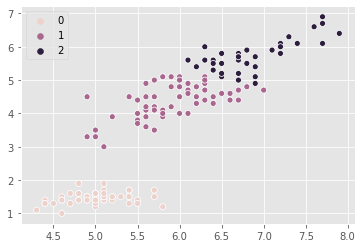

In [8]:
xs_iris = samples[:,0]
ys_iris = samples[:,2]
_ = sns.scatterplot(xs_iris, ys_iris, hue=labels_iris)
plt.show()

In [9]:
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

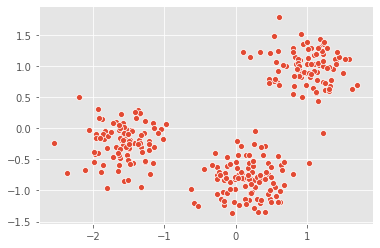

In [10]:
xs_points = points[:,0]
ys_points = points[:,1]
_ = sns.scatterplot(xs_points, ys_points)
plt.show()

There are three clusters

### Clustering 2D points

From the scatter plot we saw that the points seem to separate into 3 clusters. we'll now create a KMeans model to find 3 clusters, and fit it to the data points. After the model has been fit, we'll obtain the cluster labels for some new points using the `.predict()` method.

In [11]:
new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

In [12]:
# Create a KMeans instance with 3 clusters: model
model_points = KMeans(n_clusters=3)

# Fit model to points
model_points.fit(points)

# Determine the cluster labels of new_points: labels
labels_points = model_points.predict(new_points)

# Print cluster labels of new_points
print(labels_points)

[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


We've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. We'll inspect the clustering with a scatter plot!

### Inspect clustering


Let's now inspect the clustering we performed!

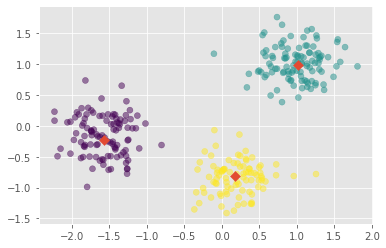

In [13]:
# Assign the columns of new_points: xs and ys
xs_np = new_points[:,0]
ys_np = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
_ = plt.scatter(xs_np, ys_np, c=labels_points, alpha=.5)

# Assign the cluster centers: centroids
centroids_p = model_points.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x_p = centroids_p[:,0]
centroids_y_p = centroids_p[:,1]

# Make a scatter plot of centroids_x and centroids_y
_ = plt.scatter(centroids_x_p, centroids_y_p, marker="D", s=50)
plt.show()


The clustering looks great! But how can we be sure that 3 clusters is the correct choice? In other words, how can we evaluate the quality of a clustering?

## Evaluating a clustering


- Can check correspondence with e.g. iris species 
- ... but what if there are no species to check against? 
- Measure quality of a clustering 
- Informs choice of how many clusters to look for


> ### Iris: clusters vs species
- k-means found 3 clusters amongst the iris samples 

> ### Cross tabulation with pandas
- Clusters vs species is a "cross-tabulation" 

In [14]:
iris_ct = pd.DataFrame({'labels':labels_iris, 'species':iris.target})
iris_ct.head()

,labels,species
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
np.unique(iris.target)

array([0, 1, 2])

In [16]:
iris_ct.species.unique()

array([0, 1, 2])

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
iris_ct['species'] = iris_ct.species.map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_ct.head()

,labels,species
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


### Crosstab of labels and species

In [19]:
pd.crosstab(iris_ct.labels, iris_ct.species)

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


### Measuring clustering quality

- Using only samples and their cluster labels 
- A good clustering has tight clusters 
- ... and samples in each cluster bunched together


> ### Inertia measures clustering quality
- Measures how spread out the clusters are (lower is better) 
- Distance from each sample to centroid of its cluster 
- After `fit()`, available as attribute `inertia_` 
- k-means attempts to minimize the inertia when choosing clusters

In [20]:
model.inertia_

78.851441426146

### The number of clusters
- Clusterings of the iris dataset with different numbers of clusters 
- More clusters means lower inertia 
- What is the best number of clusters?


### How many clusters to choose?

- A good clustering has tight clusters (so low inertia) 
- ... but not too many clusters! 
- Choose an "elbow" in the inertia plot 
- Where inertia begins to decrease more slowly 
- E.g. for iris dataset, 3 is a good choice


### How many clusters of grain?



In [21]:
samples_grain = np.array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ],
       [16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ],
       [16.44  , 15.25  ,  0.888 ,  5.884 ,  3.505 ,  1.969 ,  5.533 ],
       [15.26  , 14.85  ,  0.8696,  5.714 ,  3.242 ,  4.543 ,  5.314 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.89  , 14.02  ,  0.888 ,  5.439 ,  3.199 ,  3.986 ,  4.738 ],
       [13.78  , 14.06  ,  0.8759,  5.479 ,  3.156 ,  3.136 ,  4.872 ],
       [13.74  , 14.05  ,  0.8744,  5.482 ,  3.114 ,  2.932 ,  4.825 ],
       [14.59  , 14.28  ,  0.8993,  5.351 ,  3.333 ,  4.185 ,  4.781 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [15.69  , 14.75  ,  0.9058,  5.527 ,  3.514 ,  1.599 ,  5.046 ],
       [14.7   , 14.21  ,  0.9153,  5.205 ,  3.466 ,  1.767 ,  4.649 ],
       [12.72  , 13.57  ,  0.8686,  5.226 ,  3.049 ,  4.102 ,  4.914 ],
       [14.16  , 14.4   ,  0.8584,  5.658 ,  3.129 ,  3.072 ,  5.176 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [15.88  , 14.9   ,  0.8988,  5.618 ,  3.507 ,  0.7651,  5.091 ],
       [12.08  , 13.23  ,  0.8664,  5.099 ,  2.936 ,  1.415 ,  4.961 ],
       [15.01  , 14.76  ,  0.8657,  5.789 ,  3.245 ,  1.791 ,  5.001 ],
       [16.19  , 15.16  ,  0.8849,  5.833 ,  3.421 ,  0.903 ,  5.307 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [12.74  , 13.67  ,  0.8564,  5.395 ,  2.956 ,  2.504 ,  4.869 ],
       [14.11  , 14.18  ,  0.882 ,  5.541 ,  3.221 ,  2.754 ,  5.038 ],
       [13.45  , 14.02  ,  0.8604,  5.516 ,  3.065 ,  3.531 ,  5.097 ],
       [13.16  , 13.82  ,  0.8662,  5.454 ,  2.975 ,  0.8551,  5.056 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [14.09  , 14.41  ,  0.8529,  5.717 ,  3.186 ,  3.92  ,  5.299 ],
       [13.94  , 14.17  ,  0.8728,  5.585 ,  3.15  ,  2.124 ,  5.012 ],
       [15.05  , 14.68  ,  0.8779,  5.712 ,  3.328 ,  2.129 ,  5.36  ],
       [16.12  , 15.    ,  0.9   ,  5.709 ,  3.485 ,  2.27  ,  5.443 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [17.08  , 15.38  ,  0.9079,  5.832 ,  3.683 ,  2.956 ,  5.484 ],
       [14.8   , 14.52  ,  0.8823,  5.656 ,  3.288 ,  3.112 ,  5.309 ],
       [14.28  , 14.17  ,  0.8944,  5.397 ,  3.298 ,  6.685 ,  5.001 ],
       [13.54  , 13.85  ,  0.8871,  5.348 ,  3.156 ,  2.587 ,  5.178 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [13.16  , 13.55  ,  0.9009,  5.138 ,  3.201 ,  2.461 ,  4.783 ],
       [15.5   , 14.86  ,  0.882 ,  5.877 ,  3.396 ,  4.711 ,  5.528 ],
       [15.11  , 14.54  ,  0.8986,  5.579 ,  3.462 ,  3.128 ,  5.18  ],
       [13.8   , 14.04  ,  0.8794,  5.376 ,  3.155 ,  1.56  ,  4.961 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [14.99  , 14.56  ,  0.8883,  5.57  ,  3.377 ,  2.958 ,  5.175 ],
       [14.79  , 14.52  ,  0.8819,  5.545 ,  3.291 ,  2.704 ,  5.111 ],
       [14.86  , 14.67  ,  0.8676,  5.678 ,  3.258 ,  2.129 ,  5.351 ],
       [14.43  , 14.4   ,  0.8751,  5.585 ,  3.272 ,  3.975 ,  5.144 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.49  , 14.61  ,  0.8538,  5.715 ,  3.113 ,  4.116 ,  5.396 ],
       [14.33  , 14.28  ,  0.8831,  5.504 ,  3.199 ,  3.328 ,  5.224 ],
       [14.52  , 14.6   ,  0.8557,  5.741 ,  3.113 ,  1.481 ,  5.487 ],
       [15.03  , 14.77  ,  0.8658,  5.702 ,  3.212 ,  1.933 ,  5.439 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [14.92  , 14.43  ,  0.9006,  5.384 ,  3.412 ,  1.142 ,  5.088 ],
       [15.38  , 14.77  ,  0.8857,  5.662 ,  3.419 ,  1.999 ,  5.222 ],
       [12.11  , 13.47  ,  0.8392,  5.159 ,  3.032 ,  1.502 ,  4.519 ],
       [11.42  , 12.86  ,  0.8683,  5.008 ,  2.85  ,  2.7   ,  4.607 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [12.36  , 13.19  ,  0.8923,  5.076 ,  3.042 ,  3.22  ,  4.605 ],
       [13.22  , 13.84  ,  0.868 ,  5.395 ,  3.07  ,  4.157 ,  5.088 ],
       [12.78  , 13.57  ,  0.8716,  5.262 ,  3.026 ,  1.176 ,  4.782 ],
       [12.88  , 13.5   ,  0.8879,  5.139 ,  3.119 ,  2.352 ,  4.607 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [14.01  , 14.29  ,  0.8625,  5.609 ,  3.158 ,  2.217 ,  5.132 ],
       [14.37  , 14.39  ,  0.8726,  5.569 ,  3.153 ,  1.464 ,  5.3   ],
       [12.73  , 13.75  ,  0.8458,  5.412 ,  2.882 ,  3.533 ,  5.067 ],
       [17.63  , 15.98  ,  0.8673,  6.191 ,  3.561 ,  4.076 ,  6.06  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.26  , 15.73  ,  0.8763,  5.978 ,  3.594 ,  4.539 ,  5.791 ],
       [19.11  , 16.26  ,  0.9081,  6.154 ,  3.93  ,  2.936 ,  6.079 ],
       [16.82  , 15.51  ,  0.8786,  6.017 ,  3.486 ,  4.004 ,  5.841 ],
       [16.77  , 15.62  ,  0.8638,  5.927 ,  3.438 ,  4.92  ,  5.795 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [20.71  , 17.23  ,  0.8763,  6.579 ,  3.814 ,  4.451 ,  6.451 ],
       [18.94  , 16.49  ,  0.875 ,  6.445 ,  3.639 ,  5.064 ,  6.362 ],
       [17.12  , 15.55  ,  0.8892,  5.85  ,  3.566 ,  2.858 ,  5.746 ],
       [16.53  , 15.34  ,  0.8823,  5.875 ,  3.467 ,  5.532 ,  5.88  ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [20.2   , 16.89  ,  0.8894,  6.285 ,  3.864 ,  5.173 ,  6.187 ],
       [19.57  , 16.74  ,  0.8779,  6.384 ,  3.772 ,  1.472 ,  6.273 ],
       [19.51  , 16.71  ,  0.878 ,  6.366 ,  3.801 ,  2.962 ,  6.185 ],
       [18.27  , 16.09  ,  0.887 ,  6.173 ,  3.651 ,  2.443 ,  6.197 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.98  , 16.66  ,  0.859 ,  6.549 ,  3.67  ,  3.691 ,  6.498 ],
       [21.18  , 17.21  ,  0.8989,  6.573 ,  4.033 ,  5.78  ,  6.231 ],
       [20.88  , 17.05  ,  0.9031,  6.45  ,  4.032 ,  5.016 ,  6.321 ],
       [20.1   , 16.99  ,  0.8746,  6.581 ,  3.785 ,  1.955 ,  6.449 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [18.81  , 16.29  ,  0.8906,  6.272 ,  3.693 ,  3.237 ,  6.053 ],
       [18.59  , 16.05  ,  0.9066,  6.037 ,  3.86  ,  6.001 ,  5.877 ],
       [18.36  , 16.52  ,  0.8452,  6.666 ,  3.485 ,  4.933 ,  6.448 ],
       [16.87  , 15.65  ,  0.8648,  6.139 ,  3.463 ,  3.696 ,  5.967 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [18.98  , 16.57  ,  0.8687,  6.449 ,  3.552 ,  2.144 ,  6.453 ],
       [18.17  , 16.26  ,  0.8637,  6.271 ,  3.512 ,  2.853 ,  6.273 ],
       [18.72  , 16.34  ,  0.881 ,  6.219 ,  3.684 ,  2.188 ,  6.097 ],
       [16.41  , 15.25  ,  0.8866,  5.718 ,  3.525 ,  4.217 ,  5.618 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [19.46  , 16.5   ,  0.8985,  6.113 ,  3.892 ,  4.308 ,  6.009 ],
       [19.18  , 16.63  ,  0.8717,  6.369 ,  3.681 ,  3.357 ,  6.229 ],
       [18.95  , 16.42  ,  0.8829,  6.248 ,  3.755 ,  3.368 ,  6.148 ],
       [18.83  , 16.29  ,  0.8917,  6.037 ,  3.786 ,  2.553 ,  5.879 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [17.63  , 15.86  ,  0.88  ,  6.033 ,  3.573 ,  3.747 ,  5.929 ],
       [19.94  , 16.92  ,  0.8752,  6.675 ,  3.763 ,  3.252 ,  6.55  ],
       [18.55  , 16.22  ,  0.8865,  6.153 ,  3.674 ,  1.738 ,  5.894 ],
       [18.45  , 16.12  ,  0.8921,  6.107 ,  3.769 ,  2.235 ,  5.794 ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [19.13  , 16.31  ,  0.9035,  6.183 ,  3.902 ,  2.109 ,  5.924 ],
       [19.14  , 16.61  ,  0.8722,  6.259 ,  3.737 ,  6.682 ,  6.053 ],
       [20.97  , 17.25  ,  0.8859,  6.563 ,  3.991 ,  4.677 ,  6.316 ],
       [19.06  , 16.45  ,  0.8854,  6.416 ,  3.719 ,  2.248 ,  6.163 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [19.15  , 16.45  ,  0.889 ,  6.245 ,  3.815 ,  3.084 ,  6.185 ],
       [18.89  , 16.23  ,  0.9008,  6.227 ,  3.769 ,  3.639 ,  5.966 ],
       [20.03  , 16.9   ,  0.8811,  6.493 ,  3.857 ,  3.063 ,  6.32  ],
       [20.24  , 16.91  ,  0.8897,  6.315 ,  3.962 ,  5.901 ,  6.188 ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [16.17  , 15.38  ,  0.8588,  5.762 ,  3.387 ,  4.286 ,  5.703 ],
       [18.43  , 15.97  ,  0.9077,  5.98  ,  3.771 ,  2.984 ,  5.905 ],
       [15.99  , 14.89  ,  0.9064,  5.363 ,  3.582 ,  3.336 ,  5.144 ],
       [18.75  , 16.18  ,  0.8999,  6.111 ,  3.869 ,  4.188 ,  5.992 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [17.98  , 15.85  ,  0.8993,  5.979 ,  3.687 ,  2.257 ,  5.919 ],
       [20.16  , 17.03  ,  0.8735,  6.513 ,  3.773 ,  1.91  ,  6.185 ],
       [17.55  , 15.66  ,  0.8991,  5.791 ,  3.69  ,  5.366 ,  5.661 ],
       [18.3   , 15.89  ,  0.9108,  5.979 ,  3.755 ,  2.837 ,  5.962 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [15.38  , 14.9   ,  0.8706,  5.884 ,  3.268 ,  4.462 ,  5.795 ],
       [16.16  , 15.33  ,  0.8644,  5.845 ,  3.395 ,  4.266 ,  5.795 ],
       [15.56  , 14.89  ,  0.8823,  5.776 ,  3.408 ,  4.972 ,  5.847 ],
       [15.38  , 14.66  ,  0.899 ,  5.477 ,  3.465 ,  3.6   ,  5.439 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [15.57  , 15.15  ,  0.8527,  5.92  ,  3.231 ,  2.64  ,  5.879 ],
       [15.6   , 15.11  ,  0.858 ,  5.832 ,  3.286 ,  2.725 ,  5.752 ],
       [16.23  , 15.18  ,  0.885 ,  5.872 ,  3.472 ,  3.769 ,  5.922 ],
       [13.07  , 13.92  ,  0.848 ,  5.472 ,  2.994 ,  5.304 ,  5.395 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [13.34  , 13.95  ,  0.862 ,  5.389 ,  3.074 ,  5.995 ,  5.307 ],
       [12.22  , 13.32  ,  0.8652,  5.224 ,  2.967 ,  5.469 ,  5.221 ],
       [11.82  , 13.4   ,  0.8274,  5.314 ,  2.777 ,  4.471 ,  5.178 ],
       [11.21  , 13.13  ,  0.8167,  5.279 ,  2.687 ,  6.169 ,  5.275 ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.49  , 13.46  ,  0.8658,  5.267 ,  2.967 ,  4.421 ,  5.002 ],
       [12.7   , 13.71  ,  0.8491,  5.386 ,  2.911 ,  3.26  ,  5.316 ],
       [10.79  , 12.93  ,  0.8107,  5.317 ,  2.648 ,  5.462 ,  5.194 ],
       [11.83  , 13.23  ,  0.8496,  5.263 ,  2.84  ,  5.195 ,  5.307 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [12.26  , 13.6   ,  0.8333,  5.408 ,  2.833 ,  4.756 ,  5.36  ],
       [11.18  , 13.04  ,  0.8266,  5.22  ,  2.693 ,  3.332 ,  5.001 ],
       [11.36  , 13.05  ,  0.8382,  5.175 ,  2.755 ,  4.048 ,  5.263 ],
       [11.19  , 13.05  ,  0.8253,  5.25  ,  2.675 ,  5.813 ,  5.219 ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.13  , 13.73  ,  0.8081,  5.394 ,  2.745 ,  4.825 ,  5.22  ],
       [11.75  , 13.52  ,  0.8082,  5.444 ,  2.678 ,  4.378 ,  5.31  ],
       [11.49  , 13.22  ,  0.8263,  5.304 ,  2.695 ,  5.388 ,  5.31  ],
       [12.54  , 13.67  ,  0.8425,  5.451 ,  2.879 ,  3.082 ,  5.491 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.05  , 13.41  ,  0.8416,  5.267 ,  2.847 ,  4.988 ,  5.046 ],
       [12.55  , 13.57  ,  0.8558,  5.333 ,  2.968 ,  4.419 ,  5.176 ],
       [11.14  , 12.79  ,  0.8558,  5.011 ,  2.794 ,  6.388 ,  5.049 ],
       [12.1   , 13.15  ,  0.8793,  5.105 ,  2.941 ,  2.201 ,  5.056 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [12.15  , 13.45  ,  0.8443,  5.417 ,  2.837 ,  3.638 ,  5.338 ],
       [11.35  , 13.12  ,  0.8291,  5.176 ,  2.668 ,  4.337 ,  5.132 ],
       [11.24  , 13.    ,  0.8359,  5.09  ,  2.715 ,  3.521 ,  5.088 ],
       [11.02  , 13.    ,  0.8189,  5.325 ,  2.701 ,  6.735 ,  5.163 ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.27  , 12.97  ,  0.8419,  5.088 ,  2.763 ,  4.309 ,  5.    ],
       [11.4   , 13.08  ,  0.8375,  5.136 ,  2.763 ,  5.588 ,  5.089 ],
       [10.83  , 12.96  ,  0.8099,  5.278 ,  2.641 ,  5.182 ,  5.185 ],
       [10.8   , 12.57  ,  0.859 ,  4.981 ,  2.821 ,  4.773 ,  5.063 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [10.74  , 12.73  ,  0.8329,  5.145 ,  2.642 ,  4.702 ,  4.963 ],
       [11.48  , 13.05  ,  0.8473,  5.18  ,  2.758 ,  5.876 ,  5.002 ],
       [12.21  , 13.47  ,  0.8453,  5.357 ,  2.893 ,  1.661 ,  5.178 ],
       [11.41  , 12.95  ,  0.856 ,  5.09  ,  2.775 ,  4.957 ,  4.825 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [12.19  , 13.36  ,  0.8579,  5.24  ,  2.909 ,  4.857 ,  5.158 ],
       [11.65  , 13.07  ,  0.8575,  5.108 ,  2.85  ,  5.209 ,  5.135 ],
       [12.89  , 13.77  ,  0.8541,  5.495 ,  3.026 ,  6.185 ,  5.316 ],
       [11.56  , 13.31  ,  0.8198,  5.363 ,  2.683 ,  4.062 ,  5.182 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [10.91  , 12.8   ,  0.8372,  5.088 ,  2.675 ,  4.179 ,  4.956 ],
       [11.23  , 12.82  ,  0.8594,  5.089 ,  2.821 ,  7.524 ,  4.957 ],
       [10.59  , 12.41  ,  0.8648,  4.899 ,  2.787 ,  4.975 ,  4.794 ],
       [10.93  , 12.8   ,  0.839 ,  5.046 ,  2.717 ,  5.398 ,  5.045 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [11.87  , 13.02  ,  0.8795,  5.132 ,  2.953 ,  3.597 ,  5.132 ],
       [10.82  , 12.83  ,  0.8256,  5.18  ,  2.63  ,  4.853 ,  5.089 ],
       [12.11  , 13.27  ,  0.8639,  5.236 ,  2.975 ,  4.132 ,  5.012 ],
       [12.8   , 13.47  ,  0.886 ,  5.16  ,  3.126 ,  4.873 ,  4.914 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [13.37  , 13.78  ,  0.8849,  5.32  ,  3.128 ,  4.67  ,  5.091 ],
       [12.62  , 13.67  ,  0.8481,  5.41  ,  2.911 ,  3.306 ,  5.231 ],
       [12.76  , 13.38  ,  0.8964,  5.073 ,  3.155 ,  2.828 ,  4.83  ],
       [12.38  , 13.44  ,  0.8609,  5.219 ,  2.989 ,  5.472 ,  5.045 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.18  , 12.72  ,  0.868 ,  5.009 ,  2.81  ,  4.051 ,  4.828 ],
       [12.7   , 13.41  ,  0.8874,  5.183 ,  3.091 ,  8.456 ,  5.    ],
       [12.37  , 13.47  ,  0.8567,  5.204 ,  2.96  ,  3.919 ,  5.001 ],
       [12.19  , 13.2   ,  0.8783,  5.137 ,  2.981 ,  3.631 ,  4.87  ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ],
       [13.2   , 13.66  ,  0.8883,  5.236 ,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521,  5.175 ,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684,  5.243 ,  2.974 ,  5.637 ,  5.063 ]])

an array `samples` contains the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

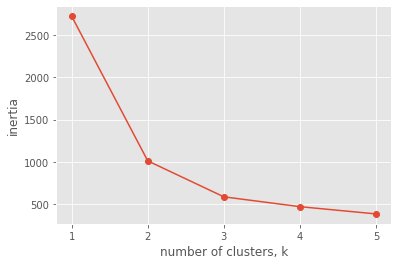

In [22]:
ks_grain = range(1, 6)
inertias_grain = []

for k in ks_grain:
    # Create a KMeans instance with k clusters: model
    model_grain = KMeans(n_clusters=k)
    
    # Fit model to samples
    model_grain.fit(samples_grain)
    
    # Append the inertia to the list of inertias
    inertias_grain.append(model_grain.inertia_)
    
# Plot ks vs inertias
plt.plot(ks_grain, inertias_grain, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks_grain)
plt.show()


The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

### Evaluating the grain clustering


In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". We will cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [23]:
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

list `varieties` gives the grain variety for each sample.

In [25]:
# Create a KMeans model with 3 clusters: model
model_grain = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels_grain = model_grain.fit_predict(samples_grain)

# Create a DataFrame with labels and varieties as columns: df
grain_df = pd.DataFrame({'labels': labels_grain, 'varieties': varieties})

# Create crosstab: ct
ct_grain = pd.crosstab(grain_df.labels, grain_df.varieties)

# Display ct
ct_grain


varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,2,60,10
2,68,9,0


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything we can do in such situations to improve the clustering?

## Transforming features for better clusterings


> ### Piedmont wines dataset {% fn 2%}
- 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
- Features measure chemical composition e.g. alcohol content 
- ... also visual properties like “color intensity”


> ### Feature variancesfeature
- The wine features have very different variances! 
- Variance of a feature measures spread of its values


> ### StandardScaler
- In kmeans: feature variance = feature influence 
- StandardScaler transforms each feature to have mean 0 and variance 1
- Features are said to be "standardized"


> ### Similar methods
- `StandardScaler` and `KMeans` have similar methods 
- Use `fit()` / `transform()` with `StandardScaler`
- Use `fit()` / `predict()` with `KMeans`


> ### `StandardScaler`, then `KMeans`
- Need to perform two steps: `StandardScaler`, then `KMeans`
- Use sklearn pipeline to combine multiple steps 
- Data flows from one step into the next


> ### sklearn preprocessing steps
- `StandardScaler` is a "preprocessing" step 
- `MaxAbsScaler` and `Normalizer` are other examples

### Scaling fish data for clustering




In [26]:
samples_fish = np.array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
       [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
       [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
       [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
       [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
       [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
       [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
       [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
       [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
       [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
       [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
       [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
       [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
       [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
       [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
       [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
       [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
       [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
       [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
       [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
       [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
       [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
       [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
       [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
       [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
       [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
       [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
       [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
       [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
       [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
       [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
       [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
       [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
       [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
       [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
       [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
       [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
       [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
       [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
       [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
       [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
       [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
       [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
       [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
       [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
       [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
       [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
       [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
       [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
       [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
       [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
       [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
       [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
       [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
       [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
       [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
       [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
       [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
       [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
       [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]])

an array `samples_fish` {% fn 3%} gives measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we'll need to standardize these features first. We'll build a pipeline to standardize and cluster the data.

In [28]:
# Create scaler: scaler_fish
scaler_fish = StandardScaler()

# Create KMeans instance: kmeans_fish
kmeans_fish = KMeans(n_clusters=4)

# Create pipeline: pipeline_fish
pipeline_fish = make_pipeline(scaler_fish, kmeans_fish)


Now that We've built the pipeline, we'll use it to cluster the fish by their measurements.

### Clustering the fish data

In [29]:
species_fish = ['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike']

We'll now use the standardization and clustering pipeline to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [30]:
# Fit the pipeline to samples
pipeline_fish.fit(samples_fish)

# Calculate the cluster labels: labels_fish
labels_fish = pipeline_fish.predict(samples_fish)

# Create a DataFrame with labels and species as columns: df
fish_df = pd.DataFrame({'labels':labels_fish, 'species':species_fish})

# Create crosstab: ct
ct_fish = pd.crosstab(fish_df.labels, fish_df.species)

# Display ct
ct_fish


species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,0,0,13
2,1,0,19,1
3,0,17,0,0


It looks like the fish data separates really well into 4 clusters!

### Clustering stocks using KMeans

We'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). 

In [31]:
movements = np.array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, -1.1700000e+00,
         1.6800110e+00, -2.6899940e+00, -1.4699940e+00,  2.7799970e+00,
        -6.8000300e-01, -4.9999950e+00,  6.7099930e+00, -3.1800060e+00,
        -4.0099980e+00, -9.0300060e+00,  5.6000000e-01, -1.0000000e-02,
         1.0300100e+00, -5.6400090e+00, -9.0199930e+00,  2.3600010e+00,
        -5.0001000e-02,  4.0600000e+00, -4.6800000e+00,  2.8299980e+00,
        -1.5700090e+00, -2.2999200e-01, -7.6999000e-01,  3.7899930e+00,
         2.2699980e+00,  1.4599940e+00, -1.6399980e+00,  1.3000030e+00,
        -1.9000500e-01, -1.9200040e+00, -2.9400000e+00,  2.4300020e+00,
         4.6199990e+00,  2.2399980e+00,  3.2400080e+00, -1.0799980e+00,
         3.8999600e-01,  1.4300060e+00,  4.0099990e+00, -9.3000800e-01,
         4.7100010e+00,  1.0099970e+00,  1.5900100e+00, -7.7000400e-01,
        -1.5400090e+00,  2.6999300e-01, -7.7999100e-01,  5.5000000e-01,
        -2.5400050e+00,  4.2800050e+00,  2.7199820e+00,  1.7300000e+00,
        -4.2700040e+00,  1.9500050e+00, -6.1000000e-01, -7.5000400e-01,
        -4.8999800e-01, -1.4400060e+00,  3.5099870e+00,  1.3400040e+00,
         1.0500110e+00, -4.8999700e-01,  3.5998100e-01,  9.0016000e-02,
         5.7000000e-01,  4.0999600e-01,  3.1400190e+00, -1.1699860e+00,
         4.0001000e-02, -3.9499970e+00,  4.2001000e-01,  8.2299880e+00,
         2.8399850e+00, -2.3800010e+00, -5.2300000e+00, -1.6499980e+00,
         5.6199950e+00, -8.2200010e+00,  2.5099910e+00, -4.2100030e+00,
         2.9599880e+00, -7.5800130e+00, -7.8500070e+00,  3.7400050e+00,
         4.6800010e+00,  2.8499990e+00, -4.8599780e+00, -1.3400040e+00,
        -4.8001100e-01, -4.6199990e+00, -1.1600000e+00, -4.1200140e+00,
         9.5000040e+00, -5.2001200e-01,  5.8700140e+00, -5.9700160e+00,
         2.7499960e+00, -2.5099910e+00,  1.1400000e+00, -5.9000000e-01,
        -2.0600210e+00, -2.2499840e+00, -7.3499950e+00, -3.9099960e+00,
        -8.2699890e+00,  5.6700100e+00,  5.2799880e+00, -1.6800120e+00,
         4.0499990e+00,  6.1499940e+00,  1.2699890e+00,  1.8200150e+00,
        -7.5199850e+00,  1.6899990e+00, -3.6100150e+00, -2.0000190e+00,
        -3.3600240e+00,  1.3699910e+00, -7.9500080e+00, -5.1799850e+00,
        -5.8199990e+00, -3.5500140e+00, -2.3700140e+00,  8.1800010e+00,
        -4.3900070e+00,  2.7299950e+00, -1.2400020e+00, -4.5199970e+00,
         3.3500100e+00,  3.2199940e+00, -3.2799950e+00, -4.2999920e+00,
         8.9900060e+00, -1.0849995e+01,  1.3400040e+00,  2.8499990e+00,
        -7.1999000e-01,  3.2100060e+00, -2.7099960e+00, -2.6000060e+00,
         1.3600040e+00,  1.4099920e+00,  9.1999400e-01,  1.4000300e-01,
        -2.9988000e-02,  3.1002100e-01,  2.6999300e-01, -4.4001000e-01,
        -5.2099990e+00,  5.1000100e+00, -2.5500180e+00,  6.0001000e-02,
         1.8900040e+00,  7.1000300e-01, -2.9599880e+00,  2.4999200e-01,
        -5.9900170e+00, -2.7399830e+00,  4.8499910e+00, -5.1699980e+00,
        -1.2998900e-01,  1.7399860e+00,  1.2500150e+00,  2.8600120e+00,
         9.0998100e-01,  3.6800040e+00,  1.1700140e+00,  3.1400190e+00,
        -1.9700050e+00,  2.2000500e-01,  1.2200010e+00,  1.8500030e+00,
         2.0499800e+00,  6.3299980e+00, -2.3200000e+00,  7.1500170e+00,
        -9.0015000e-02,  5.0400090e+00,  2.5899930e+00,  2.1997800e-01,
        -2.8200120e+00, -4.9099920e+00,  1.4000300e-01, -5.2500000e+00,
        -3.6299900e+00, -2.9600140e+00,  6.9399990e+00, -3.9998300e-01,
        -1.1199990e+00,  2.3600000e+00,  6.2001400e-01,  3.1300050e+00,
        -6.0001000e-02,  6.1998800e-01,  7.3000070e+00, -4.7002400e-01,
         6.0899920e+00,  1.5299950e+00, -2.8399850e+00, -1.6000100e+00,
        -2.5001900e-01,  1.1800010e+00,  1.8000400e-01, -2.7100220e+00,
        -3.2500070e+00,  1.9599920e+00,  2.3600000e+00,  1.4299930e+00,
         2.8200110e+00, -8.5999300e-01,  1.4200060e+00, -4.9699940e+00,
         1.3899920e+00,  1.6499980e+00, -7.9700090e+00, -1.4200060e+00,
        -4.1300010e+00, -7.0001600e-01,  3.2300070e+00, -1.2400020e+00,
         6.6799930e+00, -1.7199860e+00,  2.7999840e+00,  1.2600020e+00,
         1.3699920e+00, -2.3899880e+00,  1.1300120e+00,  6.2001400e-01,
         4.2999600e-01,  1.5099950e+00, -5.5899810e+00,  1.3799780e+00,
        -2.3699880e+00,  9.0998100e-01, -2.6999810e+00, -1.4400060e+00,
         3.5998100e-01,  1.6000300e-01, -1.0199970e+00,  6.1000000e-01,
         1.2000010e+00,  7.9999100e-01, -1.3999790e+00,  1.8300020e+00,
        -4.3998300e-01, -9.2998100e-01, -1.8199890e+00, -3.8999500e-01,
         3.9299970e+00, -1.1499870e+00,  4.4500090e+00, -9.9000900e-01,
         2.1300090e+00,  3.6200030e+00, -3.2399940e+00,  1.1700140e+00,
         5.2001200e-01,  2.5899930e+00,  1.1130001e+01, -9.5099900e+00,
        -3.7499920e+00, -7.0499880e+00,  1.0580002e+01,  5.0699960e+00,
         8.9000700e-01, -5.7000000e-01, -8.0699850e+00,  3.5200010e+00,
         3.7300180e+00, -1.2998900e-01, -3.5998200e-01,  2.8600120e+00,
         3.9899980e+00,  1.5200080e+00,  2.9700010e+00, -2.8499990e+00,
         2.1000210e+00,  2.3899870e+00,  7.1000300e-01,  2.3299860e+00,
         1.0500110e+00, -8.1499860e+00, -3.5400010e+00,  3.8499940e+00,
        -1.1400000e+00,  2.9000130e+00,  1.9700050e+00, -6.1600070e+00,
         2.1599960e+00,  2.3700140e+00, -7.0015000e-02, -6.0400050e+00,
         8.5000600e-01, -2.2199970e+00, -2.4500160e+00,  6.6599920e+00,
         3.8000800e-01,  3.3299830e+00, -1.1989994e+01, -2.1900100e+00,
        -6.4600150e+00,  3.3099820e+00, -1.3599780e+00, -8.9989000e-02,
         3.1200180e+00,  3.4700130e+00, -2.7099950e+00,  3.2999950e+00,
        -2.0099790e+00,  2.1500090e+00, -6.5500030e+00, -3.1199910e+00,
         1.8999900e+00, -3.1800200e+00, -2.0001000e-02, -4.8600050e+00,
        -3.2600210e+00,  1.9100040e+00,  1.1099860e+00, -2.3800010e+00,
        -5.8400010e+00,  5.7500110e+00,  4.7600020e+00, -1.0999980e+00,
        -4.3000190e+00,  2.6699940e+00, -3.1999930e+00, -2.0900080e+00,
         5.5998600e-01,  3.3499840e+00, -3.4599990e+00,  2.1001800e-01,
         1.3100170e+00, -1.6499980e+00, -3.0300020e+00, -2.6000600e-01,
         5.6001300e-01, -1.7900010e+00,  4.4999700e-01, -5.1600110e+00,
        -5.9000010e+00,  4.1400140e+00,  3.3999980e+00, -1.5499960e+00,
        -4.3399920e+00,  4.4299810e+00, -3.3099830e+00,  3.3499830e+00,
        -9.7000900e-01,  2.6099930e+00,  6.7299800e+00, -3.3599960e+00,
        -4.0000900e-01,  2.6000600e-01, -7.6600150e+00, -6.1300210e+00,
         4.5998400e-01, -1.7600140e+00, -4.6499860e+00, -6.0001400e-01,
         2.4400030e+00, -3.0000150e+00, -1.7400130e+00, -8.7300260e+00,
        -2.0399940e+00,  8.6199830e+00, -2.5499910e+00,  1.2290001e+01,
        -5.0199810e+00,  4.4499810e+00,  1.6099970e+00, -1.9999920e+00,
         9.7000900e-01,  7.3099940e+00,  6.4300000e+00,  2.8099980e+00,
         2.5300180e+00,  6.3699990e+00, -2.3400010e+00,  2.2000500e-01,
        -3.0999300e-01, -3.2399940e+00,  3.7499920e+00,  8.3700180e+00,
        -1.1500130e+00, -9.2199970e+00,  3.4000700e-01,  4.9800070e+00,
         8.1499870e+00,  3.4100110e+00, -7.9999960e+00,  2.0000500e-01,
         2.8399850e+00, -1.0300100e+00, -8.7400130e+00,  1.5899970e+00,
        -1.2040008e+01, -6.8199950e+00, -8.4799800e+00,  1.2710010e+01,
        -7.4599840e+00,  3.1800190e+00, -1.0799980e+00,  3.7800070e+00,
        -1.0399970e+00, -1.8700030e+00, -4.7899890e+00, -6.1400070e+00,
        -8.0700110e+00,  1.3300011e+01,  2.7100220e+00,  8.6400110e+00,
         1.2410003e+01,  1.7900010e+00,  1.7399860e+00, -5.7399980e+00,
        -4.7899890e+00, -6.9000200e-01,  1.2370003e+01, -1.6300240e+00,
         1.7400130e+00, -6.4500010e+00,  6.9399990e+00,  2.4800030e+00,
         2.2799990e+00,  1.5299950e+00,  4.9600070e+00,  1.4630001e+01,
        -1.8000140e+00, -7.4999850e+00,  7.9000500e-01,  4.0199850e+00,
         3.3100090e+00, -9.4699900e+00, -3.1799920e+00, -1.1349980e+01,
        -5.7999990e+00, -5.7699850e+00, -2.0699800e+00,  1.0389984e+01,
         4.0399860e+00, -5.9800040e+00,  9.7199820e+00,  7.7199890e+00,
        -5.1499980e+00,  3.4499860e+00,  5.1699980e+00, -1.7500000e+00,
         4.8001100e-01, -2.7299960e+00, -4.6899870e+00, -5.2299990e+00,
         9.5900190e+00, -7.2599790e+00, -1.1600000e+00, -2.8699990e+00,
         1.9499780e+00,  2.3600010e+00, -8.9999400e-01, -2.6800080e+00,
         4.0000120e+00, -1.7900010e+00, -1.8000400e-01,  4.0199850e+00,
        -1.6899990e+00, -1.1809990e+01, -1.9900060e+00, -4.2599910e+00,
         8.0299830e+00, -4.4799960e+00, -6.5700030e+00, -3.9799840e+00,
        -1.3900180e+00,  5.4900060e+00, -7.5199850e+00, -4.8499900e+00,
         3.7700190e+00, -2.6400070e+00,  9.0998000e-01,  5.3900030e+00,
        -1.2998900e-01, -4.7998400e-01, -1.5600090e+00, -8.3999300e-01,
        -7.9000500e-01,  7.7000400e-01,  1.6000300e-01, -4.1900020e+00,
        -6.5100020e+00, -4.3900070e+00,  6.5998800e-01, -2.6000600e-01,
         8.1899870e+00, -2.3997900e-01,  1.5499950e+00,  3.6400040e+00,
         3.4300120e+00, -4.2500040e+00,  1.7200130e+00,  1.4899940e+00,
         1.8300020e+00,  3.4399990e+00,  3.0799900e+00,  2.6299940e+00,
        -3.7699920e+00, -2.6699940e+00, -1.3001600e-01, -8.9000700e-01,
         1.1001600e-01,  5.0001200e-01,  2.1500090e+00, -2.4000010e+00,
        -7.1899910e+00,  4.7400020e+00, -4.6900140e+00, -7.7799910e+00,
        -3.7300180e+00,  2.9400140e+00,  7.3000070e+00,  8.9000700e-01,
        -2.2200240e+00, -7.7999100e-01,  2.3799740e+00,  5.5899810e+00,
         3.5800010e+00,  6.1800080e+00,  1.2410004e+01,  2.4599760e+00,
         3.0700300e+00,  4.8000030e+00, -1.6590020e+01,  1.0709991e+01,
        -9.8998300e-01,  7.9700080e+00, -4.0001000e-02,  1.3099900e+00,
         2.7399830e+00,  4.4500350e+00,  7.4499970e+00,  8.8002000e-01,
        -3.7000050e+00,  9.3999500e-01, -1.2259986e+01,  6.5999910e+00,
        -6.1099930e+00,  7.2999800e+00,  9.6002200e-01,  3.0199890e+00,
         1.0559974e+01,  1.1529983e+01, -1.4049987e+01,  8.5000600e-01,
         2.7299960e+00,  6.4499740e+00, -2.4000500e-01,  1.5600350e+00,
        -4.4399940e+00,  7.1899640e+00,  8.3000030e+00, -7.5996400e-01,
        -2.9200130e+00, -9.2199700e+00,  1.6800011e+01,  2.0199660e+00,
        -4.0001000e-02,  6.6999660e+00,  1.0099991e+01, -1.1489982e+01,
        -9.9999620e+00, -2.2300110e+00, -1.8880005e+01, -2.9929978e+01,
         3.0760009e+01, -5.3799890e+00, -1.2779999e+01, -1.8399994e+01,
         1.0899580e+00, -2.3299870e+00, -5.6399690e+00, -6.5699770e+00,
        -2.0699540e+00, -1.3820023e+01, -2.7699960e+00,  5.7399970e+00,
        -8.6799850e+00, -1.1830017e+01,  7.9799950e+00, -1.3999790e+00,
         5.4800180e+00, -4.0600130e+00,  1.7099990e+00, -4.3500060e+00,
        -8.2800290e+00, -7.9700090e+00, -1.5189988e+01, -3.5800010e+00,
         2.6779999e+01, -1.2579994e+01,  1.3059952e+01, -1.0549988e+01,
        -2.3000260e+00,  1.3699650e+00,  9.9700010e+00, -3.0100020e+00,
        -8.1700130e+00,  2.7899700e+00,  1.5600360e+00,  3.6900180e+00,
        -5.5700080e+00,  8.7199860e+00, -1.6550019e+01,  1.7000120e+00,
        -2.3600010e+00,  2.8999400e-01,  3.1300050e+00,  1.4819992e+01,
         4.0100250e+00, -2.4700160e+00, -7.7700040e+00,  3.0599890e+00,
        -6.5299750e+00,  7.0004300e-01, -5.0003800e-01, -2.6200330e+00,
         6.0000300e+00,  7.7899780e+00,  4.5299840e+00,  9.3799750e+00,
        -1.2100140e+00,  8.5899970e+00, -9.7599560e+00, -1.6899710e+00,
        -1.3400040e+00,  2.0200190e+00,  1.7900010e+00, -3.8500210e+00,
        -3.2999500e-01,  3.0400160e+00, -8.7299730e+00,  9.4300160e+00,
        -6.4600150e+00,  5.1002500e-01, -4.8800050e+00,  1.0149978e+01,
         4.1100010e+00,  7.5299990e+00, -9.1000210e+00,  4.9499670e+00,
         2.0700070e+00,  5.2599870e+00, -1.8599620e+00,  4.7002400e-01,
         2.8800120e+00,  2.9899750e+00,  6.6099780e+00, -1.7997800e-01,
        -4.7002400e-01,  5.1299980e+00,  8.1099860e+00,  1.5140000e+01,
        -1.4760018e+01,  1.4449997e+01, -3.4799720e+00,  3.7099910e+00,
        -4.3100060e+00, -1.7997700e-01, -1.7800140e+00, -6.7700350e+00,
        -2.0099800e+00,  9.2099840e+00, -5.3399890e+00,  3.0999910e+00,
         2.3899620e+00, -1.7710045e+01, -4.5199970e+00,  2.9400400e+00,
         5.6100080e+00,  1.3200300e+00,  4.3002400e-01,  2.0300070e+00,
         1.8400420e+00, -4.5998400e-01, -2.3199990e+00,  3.9300230e+00,
        -1.4720016e+01, -3.5600280e+00,  1.7029976e+01, -1.1649987e+01,
        -1.1769989e+01, -5.0003800e-01,  6.5899510e+00, -4.4500350e+00,
        -1.2610009e+01, -8.7100000e+00, -2.8000100e+00,  1.1700130e+00,
        -1.8399994e+01,  1.5001700e-01,  2.4099880e+00,  1.4419983e+01,
        -4.2600170e+00, -6.9500120e+00, -2.1209992e+01,  2.1610001e+01,
        -1.7640030e+01, -4.6100390e+00, -1.0459999e+01, -5.4300310e+00,
         4.4001000e-01, -1.6799850e+00, -1.9089996e+01,  1.0999990e+00,
        -7.3800350e+00, -1.5839988e+01, -2.2879989e+01,  6.6399920e+00,
        -1.1319992e+01,  3.9899980e+00, -8.6200100e+00, -1.1910019e+01,
         2.4800030e+00,  2.5020012e+01, -1.1000038e+01, -2.5499650e+00,
         4.3300320e+00,  1.3630005e+01, -4.7699890e+00,  5.6700370e+00,
        -8.6004600e-01, -1.5099950e+00, -7.4599840e+00, -5.9500420e+00,
        -3.0119995e+01,  1.8299965e+01, -2.0149994e+01,  4.8199770e+00,
         1.6200110e+00, -8.7699740e+00, -1.4600070e+00, -4.9600060e+00,
         9.8999860e+00,  8.9000170e+00, -5.1600110e+00, -8.2699890e+00,
         6.8600230e+00, -1.8003100e-01, -6.0000310e+00,  1.5200350e+00,
        -7.0004300e-01,  2.1640015e+01, -4.7900160e+00, -5.7799990e+00,
        -9.9700020e+00,  1.9000170e+00, -3.8999560e+00, -5.4000170e+00,
        -5.0400090e+00, -6.9998900e-01, -9.3000800e-01, -1.2379990e+01,
         1.1449982e+01, -7.6299750e+00,  1.4800340e+00,  2.0999100e-01,
         5.2000120e+00, -9.5000310e+00, -1.1810017e+01,  1.2000008e+01,
        -2.3001900e-01, -1.6999000e-01, -1.4900210e+00, -5.4900060e+00,
        -1.1589984e+01,  1.3790009e+01,  8.8002000e-01,  4.9699940e+00,
         9.7999500e-01,  3.4300380e+00, -1.1609985e+01, -2.0000400e-01,
         2.0700080e+00, -8.6899720e+00, -1.1099850e+00, -8.8399890e+00,
         6.0001000e-02,  1.5599830e+00, -1.1050026e+01,  5.1499980e+00,
        -3.8600350e+00, -2.6499940e+00, -7.5299980e+00, -7.7500040e+00,
         9.6599810e+00, -8.8500020e+00,  6.0800060e+00,  1.9199900e+00,
         8.1199990e+00, -7.1700170e+00, -1.0000200e-01, -3.3002100e-01,
         5.7300110e+00,  1.4270019e+01, -5.0100480e+00, -5.3399880e+00,
         2.5099640e+00,  7.3299940e+00, -1.1099860e+00, -4.3000180e+00,
        -4.3800200e+00, -7.1600040e+00, -1.2989990e+01,  2.1900100e+00,
         6.1998700e-01, -6.0400050e+00, -1.3000030e+00,  1.3600040e+00,
         6.1998800e-01,  7.5900010e+00,  6.1000000e-01, -4.3499790e+00,
        -7.1499900e+00,  4.6700130e+00, -1.7469986e+01, -1.2940002e+01,
         2.5600050e+00,  6.0300180e+00,  2.1399960e+00,  1.1919979e+01,
        -2.8499990e+00,  7.3899950e+00,  9.6699940e+00,  7.6799890e+00,
        -5.1699980e+00,  3.7400060e+00, -1.3299630e+00,  5.0000080e+00,
        -6.3099970e+00,  4.8000030e+00, -3.0400160e+00, -5.0000070e+00,
         3.2300340e+00, -9.9900020e+00, -1.0310009e+01,  1.1340019e+01,
        -5.7899850e+00,  1.1020012e+01,  1.5099940e+00, -2.7000080e+00,
         6.1899940e+00,  4.2999920e+00, -8.4600070e+00,  4.9499930e+00,
         5.9299890e+00, -2.7699970e+00, -9.9870000e-03, -3.9099960e+00,
        -5.4001200e-01, -7.0100140e+00,  5.3100010e+00, -5.8400000e+00,
         1.8599890e+00, -7.3099930e+00,  3.4599990e+00, -5.3500020e+00,
         5.6001300e-01,  2.0999100e-01, -8.4000050e+00, -2.4600030e+00,
        -4.9899940e+00, -4.8600040e+00, -3.0700030e+00, -5.8300130e+00,
        -5.4700050e+00,  5.1699980e+00,  6.5300030e+00,  8.5299940e+00,
        -6.0001000e-02, -2.9700020e+00, -5.0599820e+00,  8.7500000e+00,
         1.1300120e+00,  4.3399920e+00, -1.1400000e+00,  2.4300150e+00,
         3.6800040e+00,  6.1000100e-01, -1.6200110e+00, -8.1500130e+00,
        -3.1500050e+00, -7.0100140e+00,  1.5800090e+00, -2.1999970e+00,
         5.6900100e+00,  6.9900140e+00,  3.3600240e+00, -2.4600290e+00,
         9.3000800e-01,  4.5299840e+00,  4.7600020e+00, -2.7699960e+00,
         1.1800000e+00, -2.8499990e+00, -4.1900030e+00,  1.0500000e+01,
         1.8629959e+01,  6.1998800e-01,  1.4899680e+00,  2.1800230e+00,
         3.4000240e+00, -8.6399840e+00, -1.2299880e+00, -2.0200200e+00,
        -2.2499850e+00,  2.2200240e+00, -9.4100420e+00,  4.8999790e+00,
         4.9988000e-02, -4.7799760e+00, -4.5199970e+00, -8.6998000e-01,
        -4.9800340e+00, -2.1997900e-01,  1.1699600e+00, -1.1559998e+01,
         6.9998900e-01,  4.1900030e+00, -4.4399950e+00, -1.0879982e+01,
         7.3600080e+00,  1.5000080e+00,  1.5999830e+00, -1.0589988e+01,
        -5.4599910e+00, -5.7799990e+00, -7.6699760e+00,  2.1997900e-01,
        -1.0299830e+00, -5.0003800e-01,  9.5100180e+00,  3.9299700e+00,
        -7.1000290e+00, -8.2997900e-01,  1.1900400e+00, -9.0000450e+00,
         1.9500050e+00, -1.6799850e+00,  5.8200000e+00,  6.2099690e+00,
         1.1699600e+00,  3.2000800e-01,  4.5199970e+00,  2.8999870e+00,
         9.5900190e+00, -6.5400160e+00,  5.9599760e+00,  6.9100110e+00,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, -4.2000000e-01,
         7.1000100e-01, -2.0000100e-01, -1.1300010e+00,  6.9999000e-02,
        -1.1999900e-01, -5.0000000e-01,  2.0000100e-01, -1.0000000e-01,
        -4.6000100e-01, -1.1900010e+00, -6.5000000e-01, -1.3000010e+00,
         4.3000000e-01, -1.6900000e+00, -3.0000100e-01, -4.2000000e-01,
        -2.0001000e-02, -9.9998000e-02, -9.4000100e-01, -9.0000000e-02,
        -2.5000000e-01,  7.6000000e-01,  3.7100010e+00, -2.0000100e-01,
         1.0000000e+00,  0.0000000e+00, -6.3000100e-01,  2.9999900e-01,
        -1.0000000e-02,  1.5400010e+00, -1.4599990e+00,  8.3000000e-01,
         6.9999000e-02, -9.0000000e-01, -2.1799980e+00, -8.9999900e-01,
        -2.3000200e-01,  1.6199990e+00,  1.1399990e+00, -3.3000000e-01,
         4.3800010e+00,  2.3400000e+00, -2.5000000e+00, -1.8699980e+00,
        -1.8999800e-01, -1.1800000e+00, -7.0000000e-02, -2.0000100e-01,
         0.0000000e+00, -4.3000100e-01, -3.7000300e-01,  1.6000000e-01,
         7.9999900e-01, -6.2000300e-01, -2.0000100e-01, -6.7000200e-01,
         1.8999800e-01, -1.3999900e-01,  6.3000100e-01,  4.1999800e-01,
         3.1699990e+00, -2.3299980e+00, -2.0001000e-02,  2.0900000e+00,
        -1.1599990e+00, -6.4999700e-01,  0.0000000e+00, -9.0999900e-01,
         3.4999800e-01,  2.0100020e+00, -8.6999800e-01,  2.5099980e+00,
         6.5000100e-01, -3.1000200e-01, -4.8100010e+00,  9.4999700e-01,
        -2.7000000e-01, -1.5499990e+00,  1.0002000e-02, -4.5000100e-01,
         7.0000100e-01, -1.0299990e+00,  6.3000100e-01, -2.9000000e-01,
         2.2799980e+00, -2.4199980e+00, -8.9999700e-01, -2.5000000e-01,
        -6.1999900e-01, -1.6700020e+00,  1.0000200e-01, -1.4899980e+00,
         1.7099990e+00, -1.7200010e+00,  1.4600030e+00, -1.0700000e+00,
         1.4500010e+00, -1.6100010e+00, -4.9000200e-01,  7.5000000e-01,
         1.0002000e-02,  2.9999900e-01, -6.7999600e-01,  2.4000100e-01,
        -2.7999900e-01,  5.5999700e-01,  3.2000400e-01,  1.8699990e+00,
         6.1000100e-01,  4.3999900e-01, -2.7000100e-01,  1.4000000e-01,
         3.8999900e-01, -3.0000000e-01, -2.0999900e-01, -9.3000100e-01,
         3.0003000e-02, -8.4999900e-01, -1.0999990e+00, -9.0000000e-02,
        -5.2999900e-01, -9.9000200e-01,  0.0000000e+00,  1.5000000e+00,
        -1.6000000e-01,  4.1000000e-01, -1.5000100e-01,  1.4300010e+00,
        -8.0002000e-02, -1.2999700e-01, -1.0500000e+00, -3.3000200e-01,
         1.5900000e+00, -1.3599970e+00,  5.4000100e-01,  3.1000100e-01,
         2.0300030e+00,  3.1000200e-01,  1.2999700e-01, -4.1999800e-01,
         1.3999900e-01,  9.4000300e-01, -4.5999900e-01,  1.5000100e-01,
         1.2000300e-01,  4.1000000e-01,  7.2000100e-01, -8.4000000e-01,
        -1.2799990e+00,  1.9996000e-02, -5.3000300e-01, -3.5000200e-01,
        -1.7000200e-01,  4.6000300e-01, -1.2900010e+00, -6.0002000e-02,
        -2.2999900e-01, -3.6999900e-01, -1.1999800e-01,  1.7000200e-01,
         9.7000100e-01, -1.1500020e+00,  9.0000000e-02,  9.7000100e-01,
         3.5999700e-01,  1.8000100e-01, -9.0000100e-01,  7.3000000e-01,
        -6.1000100e-01,  9.9998000e-02, -4.0001000e-02, -7.0999900e-01,
         4.0001000e-02, -4.1000000e-01, -2.2000200e-01,  9.4999600e-01,
        -4.9999000e-02, -8.3000200e-01, -4.3999800e-01,  9.3000000e-01,
         2.2999900e-01,  5.0000000e-02,  2.0999900e-01, -8.5000300e-01,
        -1.3000100e-01,  4.6999800e-01,  4.6999800e-01,  9.3000100e-01,
        -1.4000000e-01,  1.6000000e-01, -1.1999900e-01,  9.1999800e-01,
         7.3999800e-01, -7.8000200e-01, -8.2999800e-01,  6.2999700e-01,
        -7.9000100e-01,  2.7999900e-01, -5.1000200e-01, -3.5999700e-01,
        -8.5000300e-01,  1.1899990e+00, -4.0001000e-02, -2.0000000e-02,
         5.9997000e-02, -2.0001000e-02,  2.0001000e-02,  1.3900000e+00,
         6.8000100e-01,  2.4200020e+00, -7.7999900e-01, -1.6800000e+00,
         1.7000200e-01,  9.9980000e-03, -3.7999800e-01,  4.2999600e-01,
        -3.5000200e-01,  1.4000000e-01,  3.0000300e-01,  4.3000100e-01,
        -5.0000000e-01, -7.6000300e-01,  4.8999800e-01,  0.0000000e+00,
         4.5999900e-01,  2.9999900e-01,  5.2000100e-01,  6.3999900e-01,
         1.1699980e+00,  9.9998000e-02, -2.0000000e-02, -1.5000000e+00,
         5.3400000e+00,  1.4400030e+00, -7.2000200e-01,  3.1899980e+00,
        -2.6000200e-01,  6.3999900e-01,  5.8000100e-01,  8.5999700e-01,
         1.0999980e+00,  9.9980000e-03, -1.5899960e+00,  4.9900020e+00,
        -2.5299990e+00, -1.6400000e+00,  5.7999800e-01,  1.1999900e-01,
        -2.9000100e-01, -1.2100030e+00,  4.4900020e+00, -6.1000000e-01,
        -6.8999900e-01, -3.5299990e+00,  1.0700000e+00, -1.7699960e+00,
        -7.8000200e-01, -2.9000020e+00,  2.8999700e-01, -1.8999980e+00,
        -1.9700020e+00, -1.2599980e+00, -1.0599970e+00, -9.7999900e-01,
         5.0000000e-02, -1.4999800e-01, -1.9400030e+00, -7.0000000e-02,
         3.3000100e-01,  3.9997000e-02, -5.0999800e-01, -6.6000000e-01,
         1.7000000e+00, -1.6000000e-01, -8.1999900e-01,  3.9999800e-01,
         6.1000100e-01, -4.8000000e-01, -4.5000100e-01, -2.6000200e-01,
         8.4000000e-01, -8.4000000e-01, -7.9000100e-01, -3.1000100e-01,
         5.1000200e-01, -1.7299990e+00, -1.4199990e+00, -6.3999900e-01,
         4.6999700e-01, -2.7000100e-01, -2.6000300e-01, -3.9000400e-01,
        -9.0001000e-02, -6.3999900e-01, -4.3999800e-01,  1.2500000e+00,
         9.7000100e-01,  8.4000000e-01, -1.4100000e+00, -2.9999900e-01,
        -1.2900010e+00,  1.5499990e+00, -6.9999000e-02, -3.6999900e-01,
        -3.6999900e-01,  9.9990000e-03, -5.9997000e-02, -3.2999800e-01,
        -3.2000000e-01, -6.9000300e-01, -2.0000100e-01, -1.2100030e+00,
         7.7999900e-01, -4.0999900e-01, -2.0000100e-01, -2.3999800e-01,
        -1.8999900e-01, -4.9999000e-02, -3.6999900e-01, -1.6000000e-01,
        -2.7000100e-01, -4.1999800e-01, -6.0000200e-01, -1.2000300e-01,
        -2.9999900e-01, -7.3000200e-01,  3.0000100e-01, -3.0999700e-01,
         1.0999800e-01, -7.2999900e-01, -5.3999900e-01,  2.9999000e-02,
         3.3000000e-01, -5.9999800e-01, -9.0000000e-02, -1.1799980e+00,
         3.0001000e-02,  1.0399990e+00, -1.8000000e-01, -9.8000000e-01,
         4.4000100e-01, -1.5000200e-01, -9.0000000e-02, -1.6000000e-01,
        -1.6000000e-01, -4.7999900e-01, -4.7000100e-01,  1.0001000e-02,
         2.6000000e-01,  4.9999000e-02, -4.4000100e-01, -3.2000200e-01,
        -9.0000000e-02, -1.4999900e-01, -3.7000000e-01,  3.0001000e-02,
         6.0000000e-02,  4.0999900e-01,  8.4999800e-01,  1.7000100e-01,
        -6.0000100e-01, -2.8000100e-01,  8.0002000e-02, -3.1999900e-01,
         1.2000000e-01,  6.3000100e-01,  9.9998000e-02,  2.4000000e-01,
        -1.8999800e-01,  4.0999900e-01, -9.9998000e-02,  9.0000000e-02,
         8.0000000e-02,  7.3000000e-01, -5.2000100e-01, -1.7000000e-01,
         5.1999800e-01,  1.2000100e-01, -5.0000000e-01, -5.0001000e-02,
        -8.0000000e-02, -4.3000000e-01, -3.9000100e-01, -4.6000100e-01,
         1.7000000e-01,  3.2999900e-01,  5.5000100e-01,  1.1000000e-01,
        -9.9980000e-03,  5.6999900e-01, -1.7000000e-01, -1.1999800e-01,
         5.0001000e-02, -4.9000000e-01, -5.0000000e-01,  5.0000000e-01,
        -1.4799990e+00, -9.1000000e-01, -1.1600000e+00,  1.0100010e+00,
        -1.5200010e+00,  1.0399990e+00, -3.6000100e-01,  1.1300010e+00,
         3.1999900e-01,  2.1000100e-01, -1.3099990e+00, -1.6000000e-01,
        -1.0299990e+00,  1.1000000e+00,  6.6000000e-01, -1.0700000e+00,
         5.5999900e-01,  1.3400000e+00,  5.0000000e-02,  2.6000000e-01,
        -4.1000000e-01, -5.3000100e-01,  5.9000000e-01,  1.6299990e+00,
        -3.2000000e-01, -8.0999900e-01,  7.0000100e-01,  3.7999900e-01,
         1.6000000e-01,  2.2000100e-01,  2.2000200e-01, -1.3000100e-01,
        -1.0001000e-02, -1.6499990e+00, -7.3999900e-01,  7.8000100e-01,
         9.3999900e-01, -5.4000100e-01, -6.8000000e-01, -4.0000200e-01,
        -5.8000000e-01, -1.2600000e+00,  5.0999800e-01,  8.9000200e-01,
         6.9000000e-01, -1.1900010e+00,  5.5000200e-01,  3.7000100e-01,
         1.0200000e+00, -3.9999900e-01, -5.9999000e-02, -1.0300000e+00,
         1.1500000e+00, -7.1000100e-01,  3.1000000e-01,  7.9000100e-01,
         1.1899980e+00, -6.5000000e-01,  6.9999900e-01,  2.2999900e-01,
         2.9000100e-01, -1.1299990e+00, -1.0000000e-02,  1.7000100e-01,
         1.9999900e-01,  4.4000100e-01, -9.0000000e-02,  1.5999900e-01,
        -7.1999900e-01,  1.9000100e-01,  3.9000100e-01, -2.2999900e-01,
        -4.3999800e-01, -4.7999900e-01, -6.2000100e-01, -1.6000200e-01,
        -4.5999900e-01,  1.1000000e-01, -6.5000000e-01,  1.1000100e-01,
        -1.9999900e-01,  2.2999900e-01,  1.3199990e+00, -1.5000000e-01,
        -1.4000000e-01, -6.9999000e-02,  6.0999800e-01,  4.3999900e-01,
        -1.0599990e+00,  7.5000000e-01, -3.0999900e-01, -7.0000100e-01,
         2.6000100e-01,  1.9998000e-02, -9.0000000e-02, -1.0199980e+00,
         9.8000000e-01,  2.7000100e-01,  2.0000000e-02, -1.7000000e-01,
        -3.2000000e-01, -8.9000200e-01,  2.6000000e-01, -2.9999000e-02,
         3.0000000e-01, -3.9999000e-02,  1.1999900e-01, -5.0999800e-01,
         3.3000000e-01,  6.2999900e-01,  4.2000000e-01, -9.0000000e-02,
        -9.0000000e-02, -6.2000100e-01,  7.7000100e-01,  1.3999900e-01,
         1.8000100e-01, -2.5000000e-01,  2.3000000e-01,  1.2999900e-01,
        -2.4000000e-01,  2.6000000e-01,  2.3000200e-01, -3.3000000e-01,
         9.4000000e-01, -4.2000100e-01,  4.1000000e-01, -2.0000100e-01,
        -2.6999800e-01,  2.9000100e-01,  2.3999900e-01, -2.7000000e-01,
        -2.3999900e-01, -1.0999900e-01, -2.4000000e-01,  7.2000200e-01,
        -1.1000000e-01,  3.0001000e-02,  2.2999900e-01,  1.7000000e-01,
        -1.4100000e+00,  3.1000000e-01,  2.8999900e-01,  9.0000000e-02,
         6.0002000e-02,  1.3999900e-01,  7.3999900e-01, -5.8000000e-01,
         1.9000100e-01, -2.8000100e-01, -2.0000100e-01, -2.2000100e-01,
         1.1999900e-01, -9.0000000e-02, -2.1999900e-01, -6.9999000e-02,
        -1.9000100e-01,  6.2999900e-01,  3.0001000e-02, -1.9000000e-01,
         2.0000000e-02,  3.0999900e-01,  2.9999900e-01, -2.9999000e-02,
         5.5000200e-01,  6.1000100e-01,  3.2000000e-01, -5.3999900e-01,
         1.3900010e+00,  4.8999700e-01, -4.1000200e-01, -1.3300000e+00,
         1.0000100e-01,  1.2100000e+00, -5.4999900e-01, -9.9990000e-03,
        -3.2999800e-01, -5.2999900e-01, -2.3999800e-01, -5.2000100e-01,
         5.2000000e-01,  3.3000200e-01,  1.0000200e-01,  1.0299990e+00,
         5.9999800e-01, -4.1000000e-01,  9.0000000e-02,  5.4999900e-01,
        -9.0000200e-01, -4.9999000e-02,  1.3400000e+00, -4.8999800e-01,
         3.7000100e-01, -2.5000000e-01,  1.0000000e-01, -4.0000200e-01,
        -2.4000200e-01, -6.9999900e-01, -1.4900000e+00, -2.6000000e-01,
         7.4000000e-01, -1.2999900e-01,  2.4000000e-01,  0.0000000e+00,
        -1.4999900e-01,  5.4000100e-01, -9.3000100e-01,  2.1000100e-01,
        -9.5000100e-01,  2.8000100e-01,  1.2899990e+00,  7.7000100e-01,
        -3.0000100e-01,  6.0000100e-01, -1.3200000e+00,  5.4000100e-01,
         2.4000000e-01,  7.1000100e-01,  8.0000000e-02,  3.9999900e-01,
         1.4000200e-01,  0.0000000e+00, -9.4999900e-01,  1.0000100e-01,
        -2.8000100e-01, -2.2000100e-01, -2.2999900e-01,  3.6000000e-01,
         6.3000100e-01, -5.4000100e-01,  6.8000000e-01, -2.2000000e-01,
         7.0000000e-02, -4.6999900e-01, -3.1000200e-01, -1.7000000e-01,
        -6.0002000e-02,  8.0000200e-01, -1.3999900e-01,  9.3000000e-01,
        -2.9999900e-01, -2.4000000e-01, -3.4000000e-01,  5.1000000e-01,
        -2.5000000e-01, -6.4000100e-01, -7.9999000e-02,  6.8000100e-01,
         2.3999900e-01, -1.1999900e-01, -5.2000100e-01,  1.2000100e-01,
         5.9999000e-02,  7.1000100e-01,  0.0000000e+00,  2.0000100e-01,
         1.1999900e-01,  2.1999700e-01,  6.0000300e-01,  2.7999900e-01,
         3.9000000e-01,  4.4000300e-01,  1.8000000e-01,  9.9980000e-03,
        -5.9999900e-01, -4.8000000e-01,  1.4999700e-01,  9.4000200e-01,
        -2.9999000e-02, -2.2000200e-01, -4.3000000e-01,  1.8000000e-01,
         2.7000100e-01,  1.9000200e-01,  1.3000100e-01,  4.4000200e-01,
        -3.9999700e-01, -4.9999000e-02,  8.6000100e-01, -2.3000000e-01,
         4.4999700e-01,  1.8999800e-01, -1.5000200e-01, -4.5999900e-01,
        -3.2000400e-01, -1.7000200e-01, -4.5999900e-01,  5.5000400e-01,
        -1.0599970e+00, -9.0000000e-02,  1.8000100e-01, -1.1999900e-01,
         2.3999800e-01, -9.9990000e-03,  6.1000100e-01,  4.4000300e-01,
         2.9999000e-02,  9.1000000e-01, -5.4999900e-01, -4.9999000e-02,
        -2.5999900e-01,  1.4999800e-01,  5.8000200e-01, -3.4000100e-01,
         2.2000200e-01,  3.4999800e-01, -1.3099970e+00, -2.5000000e-01,
        -2.7999900e-01, -7.0000000e-02, -2.4000100e-01, -2.3000000e-01,
         7.5000000e-01,  4.9999000e-02, -1.2700010e+00, -1.0000300e-01,
         2.3000000e-01, -7.0999900e-01, -6.1999900e-01,  8.1999800e-01,
        -1.5999900e-01, -3.1000000e-01, -8.3000000e-01,  2.7000100e-01,
         4.2999800e-01,  2.7000000e-01,  7.0000000e-02,  4.9999000e-02,
         8.0002000e-02,  2.6000200e-01, -3.6999900e-01,  3.8999900e-01,
         5.9999800e-01, -2.7000100e-01, -2.2000100e-01,  9.9999000e-02,
         2.5999900e-01, -5.8000200e-01,  3.1000100e-01, -3.8999900e-01,
         9.7999900e-01, -7.3000400e-01, -5.9999800e-01, -1.2000200e-01,
         3.3000200e-01,  2.9999900e-01, -6.6000000e-01,  5.9000000e-01,
        -1.7999600e-01,  5.7000000e-01,  3.9997000e-02, -5.2999900e-01,
        -1.9996000e-02,  5.4000100e-01,  1.8999900e-01, -3.4999900e-01,
        -6.0002000e-02, -1.6999800e-01, -1.9999600e-01, -4.0001000e-02,
         9.9980000e-03, -6.8999800e-01, -1.5000200e-01,  2.9999000e-02,
         9.3000000e-01, -3.6000100e-01, -2.0000100e-01,  8.2999800e-01,
         5.4000100e-01,  5.9997000e-02, -4.9999000e-02,  2.0999900e-01,
         3.9000000e-01, -1.3000100e-01,  2.8000300e-01,  6.7000200e-01,
        -3.6000000e-01,  2.7000000e-01,  2.5999800e-01, -2.0000100e-01,
         3.0003000e-02,  5.6000200e-01, -8.6999900e-01, -6.0001000e-02,
         5.7000000e-01, -9.6000300e-01,  2.3999700e-01, -1.0299980e+00,
        -8.0002000e-02, -8.4000000e-01, -1.8299980e+00,  2.3000000e-01,
         2.9998000e-02,  1.6000000e-01,  3.8999900e-01,  2.9000100e-01,
        -2.9999000e-02, -7.9998000e-02,  3.9999700e-01,  3.0000300e-01,
        -1.6000000e-01, -1.6999800e-01, -3.3000200e-01,  0.0000000e+00,
         1.9000200e-01,  2.3999700e-01, -2.8999700e-01, -3.2000000e-01,
        -2.3000000e-01, -1.1000100e-01, -2.9999900e-01,  3.7999800e-01,
         9.9998000e-02,  5.5000000e-01, -5.6999900e-01,  6.3000100e-01,
        -1.1800000e+00, -2.2000100e-01,  1.5499990e+00,  1.3600000e+00,
        -3.2000000e-01,  3.6999800e-01,  3.2999800e-01, -3.9997000e-02,
        -1.2199970e+00,  4.2000200e-01, -5.3999700e-01, -4.0000200e-01,
         1.6000000e-01, -2.7000000e-01,  1.3299980e+00,  9.3999800e-01,
         5.3999700e-01, -7.2000100e-01,  2.0000000e-02,  7.9998000e-02,
        -8.1000100e-01,  4.9000200e-01,  8.8999900e-01,  8.2999800e-01,
         2.9998000e-02,  1.0999600e-01, -2.9999900e-01,  6.9999000e-02,
        -1.7000200e-01,  1.2500000e+00, -7.8999700e-01, -4.9000200e-01,
         3.6000100e-01, -2.7999900e-01, -8.0002000e-02, -4.6999800e-01,
         1.1999970e+00,  5.3999700e-01, -4.3000000e-01,  1.0100020e+00,
         7.1999700e-01, -3.1000100e-01,  7.0000000e-02, -8.6000100e-01,
        -1.5299980e+00,  1.1500020e+00,  2.1999800e-01,  5.2000100e-01,
        -4.3000000e-01, -6.1000000e-01,  1.4499970e+00, -5.2000100e-01,
        -3.5999600e-01,  5.6999900e-01, -2.8999700e-01, -3.0000000e-01,
        -9.0999900e-01, -6.8999800e-01,  5.0000000e-01, -2.2000100e-01,
         5.2999900e-01,  3.2000000e-01,  2.7000000e-01, -6.0002000e-02,
        -3.9000000e-01,  4.8999800e-01,  4.9999000e-02, -6.9999000e-02,
        -3.9997000e-02, -3.4000000e-01,  7.5000000e-01, -2.9000100e-01,
        -5.9000000e-01,  1.7000200e-01,  2.0001000e-02, -2.0999900e-01,
         5.1000200e-01, -1.0300030e+00, -7.6000200e-01,  5.7000000e-01,
         3.2000000e-01, -1.4999800e-01, -5.8000200e-01, -4.4000300e-01,
         1.0500000e+00, -1.1299970e+00,  2.7999900e-01, -4.3999900e-01,
         1.0002000e-02,  2.5000000e-01, -3.8000100e-01, -2.9999000e-02,
         3.2999800e-01, -1.8000100e-01, -5.7999800e-01,  1.4999700e-01,
        -7.0000000e-01,  6.3999900e-01, -7.9998000e-02,  1.6000000e-01,
         4.9999000e-02,  0.0000000e+00, -5.2999900e-01,  2.9000100e-01,
         2.7000100e-01, -1.8000000e-01,  5.7000000e-01,  6.8000000e-01,
         2.2999900e-01, -7.2000200e-01,  8.2999800e-01, -1.3000100e-01,
         3.4000000e-01, -6.2000300e-01,  3.2000000e-01, -4.7000100e-01,
         7.9000100e-01,  2.7999900e-01, -9.3000000e-01, -2.0000000e-02,
        -4.3999800e-01,  1.0000300e-01,  1.9000300e-01, -2.3999800e-01,
        -2.9998000e-02,  2.0000000e-02,  5.7999800e-01,  3.5000200e-01,
        -2.1000300e-01,  6.6000000e-01, -3.1000100e-01, -1.0999980e+00,
         5.0000000e-02,  1.2900010e+00,  3.3000200e-01,  5.9999900e-01,
        -1.6000000e-01,  9.1999800e-01,  7.0999900e-01,  1.1999900e-01,
        -4.8000000e-01,  1.0002000e-02, -2.7999800e-01, -1.9000300e-01,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, -2.0099950e+00,
         2.9600060e+00, -2.3099970e+00, -1.6400070e+00,  1.2099990e+00,
        -1.7900010e+00, -2.0399940e+00,  1.3000030e+00, -1.3499980e+00,
        -6.3999900e-01, -4.1699980e+00, -1.7900000e+00, -1.0799950e+00,
         1.7200010e+00,  1.5999990e+00, -4.3600000e+00, -4.3099970e+00,
        -6.6999800e-01,  1.9799950e+00, -2.6999970e+00,  1.5100020e+00,
        -2.5499950e+00, -1.6999800e-01, -6.3999900e-01,  2.8799970e+00,
         6.7000600e-01, -2.5299990e+00, -7.6000200e-01,  2.2400060e+00,
        -3.9000700e-01,  6.3999900e-01, -7.7000400e-01,  1.7600020e+00,
         2.9999000e-02,  5.2000500e-01,  5.8400040e+00,  5.1999700e-01,
         4.8999700e-01,  2.5499960e+00, -2.2000100e-01,  1.8099980e+00,
        -7.6998900e-01,  1.3999940e+00,  3.1300050e+00, -2.3799900e+00,
        -5.6999200e-01,  5.4998800e-01, -1.0700080e+00,  1.7399910e+00,
        -3.3600010e+00,  2.7000400e-01, -1.6300040e+00, -6.0000600e-01,
         5.5899970e+00,  1.6000400e-01, -2.5000000e-01,  8.3999700e-01,
        -2.2999600e-01, -3.9900050e+00, -1.3600010e+00,  4.3300020e+00,
        -1.0900120e+00,  6.2500000e+00, -6.6000300e-01,  1.1999970e+00,
        -1.0699920e+00,  3.9400030e+00,  1.2700040e+00, -2.7100070e+00,
         7.9987000e-02,  3.6999500e-01,  1.2599950e+00,  3.0800010e+00,
        -1.7500000e+00,  3.9100040e+00, -3.5299990e+00, -3.2399900e+00,
         1.6400000e+00, -4.2999880e+00,  2.9000800e-01, -5.7899930e+00,
         2.9299930e+00, -1.2899930e+00, -2.9899980e+00,  1.5599970e+00,
         5.1001000e-01,  2.4599910e+00, -2.4599920e+00, -1.8300020e+00,
         6.6999900e-01, -3.8600000e+00, -9.2000600e-01, -2.9300000e+00,
         4.8199990e+00, -4.4999700e-01,  6.3200000e+00, -1.8400040e+00,
         1.7199940e+00, -6.1000100e-01, -1.7300030e+00,  2.2900010e+00,
         2.5099950e+00, -3.5600050e+00, -3.8299940e+00, -3.1600040e+00,
        -2.3999940e+00,  3.2099990e+00,  1.6400000e+00, -4.0999600e-01,
         3.6399990e+00,  1.5100030e+00, -8.4999900e-01, -6.5000100e-01,
        -4.2399980e+00, -3.4000400e-01, -6.6000400e-01, -2.2799990e+00,
         2.8600010e+00, -1.0499950e+00, -7.6500010e+00,  6.8000000e-01,
         2.0599970e+00, -1.7799990e+00, -5.9000400e-01,  3.5900040e+00,
         1.2000040e+00,  7.0999900e-01,  1.7000040e+00,  2.9600000e+00,
         2.7000400e-01,  1.9300010e+00, -2.7900010e+00,  1.5600050e+00,
        -5.1000300e-01, -3.1900030e+00,  1.3600010e+00,  1.2940003e+01,
         1.4000000e-01, -1.3000030e+00,  1.2999700e-01, -1.1299970e+00,
         2.3600000e+00,  9.1999800e-01,  2.4199980e+00,  4.5200040e+00,
         1.0600050e+00,  1.6000060e+00,  3.6999500e-01,  2.0500030e+00,
        -2.2100070e+00,  2.7999960e+00, -1.3699960e+00,  2.4599990e+00,
         1.5200050e+00,  3.9999400e-01, -1.6500010e+00,  5.6000500e-01,
        -1.2600030e+00, -8.8000500e-01,  3.0000000e+00, -2.2900010e+00,
         1.1800000e+00, -2.2399980e+00,  1.9800040e+00,  6.1300040e+00,
         3.0400090e+00,  1.8999940e+00, -3.3999700e-01,  1.2100060e+00,
        -9.9940000e-03,  1.6900020e+00,  1.0000000e+00,  1.2500000e+00,
         5.6999200e-01,  2.7300110e+00, -5.7998700e-01,  2.6000060e+00,
        -2.9999000e-02,  1.9900060e+00,  1.6500090e+00,  5.3000030e+00,
        -8.5000600e-01, -1.3999900e-01, -3.9994000e-02, -2.9499970e+00,
        -3.3699950e+00,  1.4400020e+00,  3.7899930e+00, -5.2000120e+00,
        -2.3999100e-01,  3.7001000e-01, -1.8600000e+00,  3.9700010e+00,
        -1.5200040e+00,  3.6999500e-01,  6.2200010e+00, -1.4400020e+00,
        -2.0099950e+00, -1.1000100e-01,  2.3000030e+00,  6.6800080e+00,
        -2.5700070e+00,  2.3799900e+00, -1.4000090e+00, -1.4700020e+00,
        -5.7000700e-01, -1.8699950e+00,  8.6000100e-01,  3.0700070e+00,
        -9.3000800e-01,  1.4199980e+00,  1.1500090e+00, -2.3999940e+00,
         2.7400060e+00, -6.3000500e-01, -4.4400020e+00, -6.2600100e+00,
        -9.6000600e-01,  5.1001000e-01,  3.4299930e+00,  8.7001000e-01,
         5.2899930e+00, -4.1000400e-01,  5.7200010e+00, -1.6000400e-01,
        -5.0000000e-01, -1.5500030e+00, -2.6100010e+00, -3.3000200e-01,
         1.7999300e-01,  2.5299990e+00, -3.7299960e+00, -1.2000120e+00,
        -2.9199980e+00,  7.3999000e-01, -2.0800020e+00, -3.3999700e-01,
         1.8500060e+00,  2.4599910e+00, -8.3000200e-01,  4.0199890e+00,
         8.6999500e-01, -2.4000500e-01, -1.7500000e+00,  2.4000500e-01,
        -1.0100100e+00,  1.5699920e+00, -1.1699980e+00, -1.9600070e+00,
         2.8500060e+00, -1.1399990e+00,  3.3199920e+00, -6.3999900e-01,
        -2.3900000e+00, -3.6000000e-01, -1.0800020e+00, -1.2799990e+00,
         1.9299930e+00,  3.2500000e+00,  2.5899960e+00, -4.0299990e+00,
        -3.3299860e+00, -5.5800020e+00, -1.0999910e+00,  1.1999970e+00,
        -2.1199960e+00,  6.9700010e+00, -3.0999800e-01, -5.2000500e-01,
         1.5899970e+00,  2.1100010e+00,  2.1000700e-01,  1.9299930e+00,
         2.7999900e-01,  6.3999940e+00,  2.1500090e+00,  1.8200080e+00,
         3.6900020e+00,  1.1699980e+00,  3.0000300e-01, -3.1500090e+00,
         1.9899910e+00, -1.0399930e+00, -3.2599950e+00, -3.5700070e+00,
         8.8999900e-01, -1.7099920e+00, -6.2001100e-01, -4.0899970e+00,
         2.9300080e+00, -9.2001400e-01, -9.4999700e-01, -2.8399960e+00,
        -2.5000000e+00,  2.3800050e+00, -9.3000800e-01,  2.5700070e+00,
         1.2999000e-01,  3.6900030e+00,  0.0000000e+00, -4.9400030e+00,
         6.3000500e-01,  1.1500090e+00, -1.4700010e+00,  3.0200040e+00,
         2.8899990e+00, -6.6000300e-01, -2.4499970e+00,  3.8899990e+00,
         1.6399990e+00,  8.2000700e-01, -1.4499970e+00,  2.0500030e+00,
         3.1899870e+00, -3.3899990e+00,  2.1300050e+00, -5.4998800e-01,
        -8.2000800e-01, -2.5800020e+00,  1.4599910e+00,  4.3000800e-01,
        -9.9000500e-01, -4.0009000e-02,  4.7000100e-01,  2.2500000e+00,
         1.3300010e+00, -2.2999600e-01, -3.9700010e+00,  1.3430008e+01,
        -8.9000000e-01,  1.4299930e+00,  4.6199950e+00, -2.5500030e+00,
         1.7200010e+00, -1.5500030e+00, -1.5000000e+00,  2.4600070e+00,
         2.0000000e+00,  1.2600100e+00,  1.8500060e+00, -3.1399990e+00,
        -8.0299980e+00,  2.9899910e+00,  2.9599910e+00,  4.7000100e-01,
         6.9999700e-01,  6.6000300e-01, -3.7299960e+00, -1.3100120e+00,
         3.7599950e+00, -6.2999000e-01,  7.5000000e-01, -3.6600040e+00,
         1.3699950e+00, -2.9099890e+00, -2.3199930e+00,  1.8300020e+00,
         6.0000600e-01, -6.0012000e-02, -2.7200010e+00, -5.2000500e-01,
         9.7000200e-01, -2.0599970e+00, -2.0900110e+00, -1.4000000e-01,
         1.7599940e+00,  5.9299930e+00, -2.3300020e+00,  4.6600040e+00,
        -1.3300020e+00,  6.7500000e+00,  4.3000800e-01,  1.5099950e+00,
         3.7100060e+00,  3.9400020e+00,  4.4300070e+00,  2.0700070e+00,
         1.6500090e+00,  3.9799960e+00, -4.1900020e+00, -3.4100030e+00,
        -1.1999970e+00, -3.1999970e+00, -2.1000700e-01, -1.0000000e+00,
         4.2899940e+00, -4.5000000e+00, -3.5299980e+00,  2.6600030e+00,
        -2.0000000e+00, -8.1001200e-01, -1.8699950e+00,  6.2999000e-01,
         1.2300110e+00, -3.6799930e+00, -8.6200100e+00, -3.0099940e+00,
        -5.2500000e+00, -1.9700010e+00, -2.6999970e+00,  8.3899990e+00,
        -6.6299900e+00,  1.3500060e+00,  2.0200040e+00,  8.8999900e-01,
        -3.4600060e+00, -2.6000060e+00, -8.6900030e+00, -1.3600000e+00,
        -5.2900090e+00,  1.4630005e+01, -1.6000300e-01, -2.3800050e+00,
         8.0299990e+00,  3.7099920e+00,  5.1399990e+00,  2.9599920e+00,
        -2.7400060e+00,  1.0599980e+00,  1.1409989e+01,  1.0999910e+00,
        -1.0400080e+00, -3.6600040e+00,  7.8099980e+00,  1.7400060e+00,
         2.3500060e+00,  2.7899940e+00,  1.1729996e+01,  4.5800010e+00,
        -7.5500030e+00, -2.6400000e+00, -1.4900050e+00,  3.1000060e+00,
         2.3700100e+00, -1.0009994e+01,  3.3600010e+00, -1.1729996e+01,
        -1.9600060e+00, -5.0299990e+00,  2.8800050e+00,  6.9700010e+00,
         1.2299960e+00,  2.2600090e+00,  5.0900110e+00,  4.8799900e+00,
         1.6999900e-01, -8.5000600e-01,  5.8400120e+00, -1.9599910e+00,
         1.5700070e+00, -9.1399990e+00,  1.4799960e+00, -2.1300050e+00,
         1.5899970e+00, -1.1440002e+01, -5.2900080e+00,  2.5200040e+00,
         1.0790008e+01, -2.2799980e+00,  3.9900050e+00,  6.9992000e-02,
         1.9899900e+00, -1.1699980e+00,  1.6000400e-01, -1.2099920e+00,
        -3.7299960e+00, -2.7100070e+00,  4.8699950e+00,  3.2799990e+00,
        -1.6999800e-01, -4.2799990e+00, -7.9899910e+00, -8.1900030e+00,
        -4.0399930e+00,  5.3899990e+00, -4.0699930e+00, -8.0100100e+00,
         2.5000000e+00, -6.3900000e+00, -2.4700020e+00,  5.2799990e+00,
        -1.0400080e+00, -2.6199960e+00, -3.9899910e+00,  4.2900080e+00,
        -3.0900110e+00,  1.8199920e+00, -5.0999500e-01, -8.0500030e+00,
         1.2100070e+00, -7.9000800e-01, -1.1600030e+00, -2.6699980e+00,
        -1.6999800e-01, -7.5699920e+00,  3.9400030e+00, -1.9400020e+00,
        -1.4599920e+00, -2.5000000e+00,  4.2400060e+00, -2.5999500e-01,
         3.1400000e+00, -1.7000120e+00,  1.6699990e+00,  4.5399940e+00,
        -4.1999970e+00, -1.7600100e+00, -7.4000500e-01, -3.4900050e+00,
         2.6100000e+00,  1.5100100e+00,  7.5000000e+00,  3.5699920e+00,
         2.1998600e-01, -4.6999970e+00,  2.0000000e+00,  8.0999800e-01,
         4.0200040e+00,  2.2799990e+00, -1.5299990e+00,  4.4000200e-01,
         5.6500090e+00,  2.0700070e+00,  4.8499910e+00, -3.1400000e+00,
         1.5400080e+00,  5.2999900e-01,  4.7999600e-01,  2.1199950e+00,
         4.4199980e+00,  2.2000100e-01, -6.8199920e+00,  2.1400000e+00,
         2.4100040e+00, -3.8999900e-01, -1.3699950e+00, -7.5000000e-01,
        -5.6999200e-01,  9.9000600e-01,  4.9000090e+00, -4.1999970e+00,
         1.4999400e-01, -1.7999300e-01,  1.2599950e+00,  2.4100030e+00,
         1.1200100e+00,  3.4700010e+00, -2.4699860e+00, -7.4000600e-01,
         6.6999800e-01, -1.3899990e+00,  2.4099890e+00,  1.7700040e+00,
         2.0700070e+00,  7.4499970e+00, -7.7000400e-01,  1.8600010e+00,
         3.0299980e+00,  6.3899990e+00,  1.8500060e+00, -4.9799950e+00,
         3.3300020e+00, -2.5100090e+00,  2.9999000e-02,  1.4199990e+00,
        -2.9599920e+00,  8.3999600e-01, -1.5000900e-01, -5.7700040e+00,
        -1.6600040e+00,  2.6300040e+00, -1.4399870e+00, -3.5099950e+00,
         1.1799920e+00,  2.2500000e+00, -1.8299870e+00, -2.3600000e+00,
        -7.5000000e-01,  1.6500090e+00,  2.7500000e+00,  2.4199980e+00,
         2.0200040e+00,  7.9499970e+00,  6.3999900e-01,  2.4299930e+00,
        -2.9000800e-01, -3.8099980e+00,  2.8000030e+00,  7.5000000e-01,
         2.3900000e+00,  2.7799980e+00,  1.7299960e+00, -2.6700130e+00,
        -2.1100010e+00, -9.4000200e-01, -6.6900020e+00, -5.5599980e+00,
         4.0800020e+00, -2.9799960e+00,  2.5699920e+00, -1.7399910e+00,
        -2.1000060e+00,  4.4999700e-01, -2.9100030e+00,  3.4300080e+00,
        -2.2000100e-01,  7.1700130e+00, -6.3999900e-01,  3.0099940e+00,
        -8.4999100e-01, -1.3000500e-01, -9.9000500e-01, -1.2299960e+00,
        -7.9000800e-01, -8.0999800e-01,  3.0600130e+00,  5.3800050e+00,
         7.7000400e-01, -1.4899910e+00, -3.2699890e+00,  3.3000200e-01,
        -2.2999600e-01,  4.1600040e+00,  6.1000000e-01, -2.6100000e+00,
         3.6500090e+00,  2.0004000e-02,  3.9000000e-01, -1.5599970e+00,
        -1.3000030e+00,  5.0003000e-02, -6.7500000e+00, -5.8000200e-01,
        -1.2500000e+00,  2.7599940e+00, -5.9001100e-01, -5.2000400e-01,
         1.3200070e+00,  5.4400020e+00,  2.9299920e+00,  1.2899940e+00,
        -3.2300110e+00, -4.9499970e+00,  9.9950000e-03,  1.2070007e+01,
        -9.1000400e-01, -1.8000030e+00, -2.0500030e+00,  2.5000000e-01,
         9.4000200e-01, -1.5699930e+00,  2.4299930e+00, -9.0998800e-01,
         1.3000500e-01, -3.3000200e-01,  2.1000600e-01, -1.5200050e+00,
         5.1600030e+00,  3.8300020e+00,  5.6999200e-01, -1.0199890e+00,
        -1.4300080e+00,  3.7000120e+00, -9.4000200e-01,  4.0600120e+00,
        -1.8699950e+00,  2.1400000e+00,  3.3999600e-01, -7.7000400e-01,
         1.9999700e-01, -3.8999900e-01, -1.3900000e+00,  3.1500090e+00,
         5.2900090e+00, -1.9100040e+00, -1.9300080e+00, -8.6999500e-01,
         5.2999880e+00, -1.3000500e-01, -3.2500000e+00,  2.6998900e-01,
         2.2299810e+00,  7.7999900e-01, -4.2699890e+00, -4.1999800e-01,
        -3.8699800e+00, -2.7299960e+00,  6.0500030e+00, -1.8200080e+00,
        -3.3899990e+00, -2.1999970e+00,  4.7099910e+00,  4.4599910e+00,
        -2.6900020e+00,  1.3899850e+00, -7.7100060e+00, -7.0099950e+00,
        -3.7799990e+00, -8.1999200e-01,  1.3299870e+00, -9.2999300e-01,
         4.1200100e+00, -2.9199980e+00, -5.1600040e+00, -5.0299990e+00,
         3.2599950e+00, -7.3900000e+00, -8.0000000e+00,  9.6399990e+00,
        -3.4300080e+00, -2.0899970e+00, -1.5899970e+00,  2.2900090e+00,
         2.1499940e+00, -3.5899960e+00, -4.8699950e+00,  5.0003000e-02,
        -1.1999500e-01,  1.4800110e+00, -3.5500030e+00, -1.6999970e+00,
         3.9199980e+00,  1.3900000e+00,  3.7799990e+00,  4.1900030e+00,
        -9.9940000e-03,  3.2299960e+00,  1.7999300e-01,  4.6600040e+00,
         3.2200010e+00,  1.6699980e+00, -2.2099910e+00,  2.5500030e+00,
         1.5200050e+00,  3.6999500e-01, -8.6999500e-01, -5.3300020e+00,
         2.1900020e+00,  6.8998800e-01,  1.3999900e-01, -9.1999900e-01,
         4.0500030e+00,  5.8299870e+00, -3.3099980e+00,  3.1400150e+00,
        -8.9999400e-01,  1.3200070e+00, -8.5199890e+00,  2.9999000e-02,
        -6.7001300e-01,  7.1199950e+00,  1.2300110e+00,  1.2100220e+00,
         1.5700070e+00,  5.4899900e+00, -6.9000200e-01, -1.8200070e+00,
        -3.2000130e+00,  2.8399960e+00,  4.7300110e+00,  1.2200010e+00,
        -1.6000060e+00, -1.0199890e+00,  1.2900080e+00, -1.4299930e+00,
        -2.4600220e+00,  4.0899960e+00,  8.9899900e+00, -7.7399900e+00,
        -1.5000000e+01, -1.0239990e+01, -5.5400090e+00, -3.9299930e+00,
        -2.7999880e+00,  4.8900150e+00, -2.9400030e+00, -3.8699950e+00,
         5.5001800e-01, -5.9900210e+00, -4.8999000e-01,  7.9400020e+00,
         1.8699950e+00, -2.5400090e+00,  3.8399960e+00, -3.7900080e+00,
         8.2000700e-01, -1.1999820e+00, -7.0700070e+00, -1.5300300e+00,
         3.8500060e+00,  2.4599910e+00,  2.4700010e+00,  7.7500000e+00,
         1.5899960e+00, -1.9700010e+00, -2.2000100e-01, -8.0999800e-01,
        -2.1900030e+00,  3.1300050e+00, -1.3998400e-01, -3.9300230e+00,
        -3.1600040e+00, -1.4099730e+00, -1.9899900e+00, -7.6998900e-01,
        -2.7199860e+00,  3.1999970e+00, -2.5599980e+00,  3.2600100e+00,
         6.5499880e+00,  6.6998300e-01, -5.3700260e+00,  9.2001300e-01,
        -3.0899960e+00, -1.5002400e-01, -2.4000500e-01,  3.0300140e+00,
         2.2900090e+00,  2.9899900e+00,  5.1100160e+00,  2.7500000e+00,
        -3.3599860e+00,  3.0299980e+00, -3.3999940e+00, -7.3899850e+00,
         2.1600030e+00,  4.1999820e+00,  4.3999940e+00, -7.2000100e-01,
         3.1700130e+00, -1.5160003e+01, -5.1599890e+00,  4.4400030e+00,
        -5.6699980e+00,  3.6100010e+00,  1.9099730e+00, -2.3699950e+00,
         1.4200130e+00,  1.8099980e+00,  1.4299930e+00,  2.7500000e+00,
         1.7400210e+00,  3.8299870e+00, -5.1000900e-01, -1.8399960e+00,
         4.0700070e+00, -1.3699950e+00,  1.1999500e-01, -4.4300240e+00,
         1.3099980e+00,  1.8899840e+00,  8.0999800e-01,  7.0008000e-02,
         1.1199960e+00,  3.2000120e+00, -2.0799860e+00, -1.2999880e+00,
         1.3600150e+00,  7.9987000e-02,  7.1300050e+00,  4.3900140e+00,
        -1.2200010e+00, -4.9299930e+00,  4.2900090e+00, -1.0100100e+00,
         1.7099920e+00,  2.6800230e+00, -3.1000060e+00, -1.7000130e+00,
        -1.2100220e+00, -6.8002400e-01, -2.0999200e-01,  3.5899960e+00,
        -1.6300050e+00,  1.5000000e+00,  3.1000060e+00,  2.6900020e+00,
         2.0299990e+00,  8.8000500e-01,  4.1699830e+00,  5.2999900e-01,
         9.1998300e-01,  4.6700140e+00,  8.8599860e+00, -6.9998200e-01,
        -4.2999300e-01,  1.7200010e+00, -2.1600040e+00,  8.3999600e-01,
        -5.7699890e+00, -2.1000060e+00, -4.0799870e+00,  4.3999940e+00,
         1.2460022e+01, -4.9700010e+00, -5.3099970e+00, -2.6900030e+00,
         2.4900200e+00, -4.2001400e-01, -2.4100040e+00,  2.3999000e-01,
        -3.2399900e+00, -2.7799990e+00,  1.5800170e+00,  8.9999300e-01,
        -1.9100040e+00, -2.9500130e+00, -2.3200080e+00, -1.7299810e+00,
         3.8000500e-01,  1.2099910e+00, -5.1998900e-01,  4.9300230e+00,
        -1.1999810e+00, -4.2200020e+00, -2.9400020e+00,  1.2200020e+00,
         2.5299990e+00, -3.6099850e+00,  4.0699770e+00,  5.3100280e+00,
         4.7000100e-01,  5.2999800e-01,  2.4899900e+00, -1.9000300e-01,
         7.3001100e-01, -5.3003000e-01, -2.2200020e+00, -3.7600090e+00,
         6.5400080e+00,  7.9700010e+00, -1.7099910e+00,  3.7999870e+00,
        -2.5200200e+00,  1.7000120e+00, -1.8800050e+00,  4.2200010e+00,
        -9.1000300e-01, -7.6998900e-01,  6.7300110e+00,  2.4700010e+00,
        -5.6300050e+00,  3.9100040e+00, -5.2099910e+00, -8.2699890e+00,
        -5.1900020e+00,  5.4000800e-01,  6.1200260e+00,  1.4800110e+00,
        -3.4700010e+00,  2.1099850e+00,  3.6999820e+00,  9.5700080e+00,
        -3.4500130e+00,  4.8200080e+00, -4.0799860e+00,  2.5799860e+00,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       [ 1.0999700e-01,  0.0000000e+00,  2.6000200e-01,  7.2000200e-01,
         1.9000300e-01, -2.7000100e-01,  7.5000000e-01,  3.0000400e-01,
         6.3999900e-01, -1.3000100e-01,  7.1999700e-01,  5.0000000e-02,
        -8.3000200e-01, -2.7700010e+00, -1.3099970e+00,  5.5999700e-01,
         7.0999900e-01, -1.2399980e+00,  6.0002000e-02,  3.6999900e-01,
         3.4000000e-01, -5.7999800e-01, -5.0000000e-01,  1.8999800e-01,
        -9.6999700e-01,  2.7000100e-01,  1.6999800e-01,  4.8000000e-01,
         6.2999700e-01,  8.0999800e-01, -4.8000000e-01,  8.0002000e-02,
         1.7000200e-01, -1.6999800e-01, -8.1000200e-01,  3.1000200e-01,
         3.7000300e-01,  3.9997000e-02, -7.0000000e-02,  2.7000000e-01,
        -1.8000000e-01,  6.3999900e-01,  1.1000030e+00, -5.1000200e-01,
         1.6000000e-01, -2.1999800e-01,  5.4000100e-01,  2.7999800e-01,
         8.0002000e-02,  4.9999000e-02, -1.7000200e-01,  9.9998000e-02,
         0.0000000e+00,  1.1800000e+00,  1.4000400e-01, -3.0003000e-02,
         4.9999000e-02, -4.5000100e-01,  2.1000000e-01, -2.0000000e-02,
         2.5000000e-01,  2.0001000e-02,  8.3999600e-01,  7.3000000e-01,
        -5.1000200e-01,  1.4699980e+00,  1.9000200e-01,  5.3000300e-01,
         6.0000300e-01,  1.0000000e+00,  4.4999700e-01, -1.3900040e+00,
         9.4999700e-01,  9.0000000e-02, -1.6999800e-01,  1.1100000e+00,
         1.3000100e-01,  2.0000000e-02, -9.1999800e-01, -1.4999800e-01,
         9.6999700e-01, -1.4000010e+00,  9.9000200e-01, -8.4000000e-01,
        -9.8000000e-01, -1.8499980e+00, -1.6400040e+00,  9.9998000e-02,
         5.4000100e-01,  5.3999700e-01, -1.0399970e+00, -1.3900000e+00,
        -2.9999000e-02, -1.7200010e+00,  8.2000000e-01, -1.0499990e+00,
         2.2500000e+00, -8.6999900e-01,  1.0400010e+00, -1.2900010e+00,
         1.3000030e+00, -2.9999900e-01,  9.9990000e-03,  1.5100020e+00,
        -7.7000000e-01, -1.0600010e+00, -9.8000000e-01,  4.9000100e-01,
        -7.2000100e-01,  1.3299980e+00,  6.3999900e-01, -5.8000200e-01,
         1.1300010e+00,  9.0000100e-01, -6.4000000e-01, -1.1000000e-01,
        -1.6000000e-01, -7.0000000e-01,  1.7999600e-01, -7.5999900e-01,
         1.1600000e+00, -4.0999900e-01, -1.4000020e+00, -1.1999900e-01,
        -6.9999000e-02, -3.9000300e-01, -9.5000100e-01,  2.0800020e+00,
         4.1999800e-01,  4.7000100e-01,  4.3000000e-01,  8.9999800e-01,
        -2.5000000e-01, -5.4000100e-01, -1.7199970e+00,  8.0002000e-02,
         1.1900020e+00, -1.1599990e+00,  1.3200000e+00,  1.6500020e+00,
         6.1999900e-01, -1.0400010e+00, -1.9996000e-02, -1.9999700e-01,
         8.9999700e-01, -1.9996000e-02, -2.4000200e-01, -6.3999900e-01,
        -5.4999900e-01,  9.3999900e-01, -6.0001000e-02,  9.0000100e-01,
        -3.5000200e-01, -3.5999600e-01, -3.6999800e-01,  1.0002000e-02,
        -1.3999900e-01, -4.0001000e-02, -4.9000200e-01, -2.4000200e-01,
        -7.5000000e-01, -1.5000100e-01,  4.1000000e-01, -2.9000000e-01,
         9.1000000e-01, -8.0000000e-01,  1.3999900e-01,  5.2000100e-01,
        -3.8999900e-01,  5.0000000e-01, -1.3900000e+00, -2.6000200e-01,
        -6.0001000e-02, -5.3000200e-01,  4.7000100e-01, -5.7999800e-01,
         7.5000000e-01,  1.6999800e-01,  3.2999800e-01,  1.5599980e+00,
        -3.8000100e-01,  2.8000300e-01,  0.0000000e+00,  2.2000100e-01,
         1.8999900e-01,  1.8999900e-01, -4.9000200e-01, -1.3199990e+00,
        -5.9000000e-01, -2.5400010e+00, -1.0200000e+00, -4.3999900e-01,
        -3.6000000e-01,  1.1000100e-01, -2.2999900e-01,  6.0000200e-01,
         3.4000000e-01,  3.2000000e-01, -6.6000000e-01,  5.4000100e-01,
        -7.9998000e-02,  2.3000000e-01,  5.1000200e-01, -1.3700030e+00,
         2.0999900e-01,  9.5999900e-01,  9.9000100e-01,  3.1000100e-01,
         3.6999900e-01,  6.9999000e-02,  4.3999800e-01, -3.1999900e-01,
         1.0999990e+00,  4.5999900e-01,  2.2000200e-01, -6.1999900e-01,
         3.0002000e-02,  1.9996000e-02, -2.2999900e-01, -2.5000000e-01,
        -3.6999900e-01, -4.9000200e-01,  3.6000100e-01,  5.9000000e-01,
        -2.5000000e-01,  2.8000300e-01,  4.9000200e-01, -2.3000000e-01,
         1.2500000e+00,  4.7000100e-01,  4.5999900e-01,  5.7000000e-01,
         2.2000100e-01,  3.4000000e-01, -6.8000000e-01,  7.2999900e-01,
         2.0000000e-02,  5.0000000e-01, -1.0000200e-01, -9.0000000e-02,
         2.9999000e-02, -1.5100020e+00, -4.8000400e-01, -1.0800020e+00,
         2.5999900e-01, -4.5999900e-01, -2.5999900e-01,  3.2999800e-01,
        -2.0999900e-01,  6.0002000e-02, -2.5000000e-01,  4.1000000e-01,
         1.0000300e-01, -4.5999900e-01,  9.5000100e-01, -6.5000100e-01,
        -5.6999900e-01,  2.5999800e-01,  6.0001000e-02, -4.3999900e-01,
         2.5000000e-01,  1.3200000e+00,  3.4000000e-01,  4.0001000e-02,
         5.2999800e-01,  2.4000200e-01, -2.5999800e-01, -7.0000000e-02,
        -4.5000100e-01,  4.9999000e-02, -6.8999800e-01, -7.5000000e-01,
         5.9997000e-02,  3.3000200e-01, -1.2000300e-01,  2.9000100e-01,
         8.6000100e-01,  1.2200010e+00,  1.2000300e-01,  9.1000000e-01,
         4.8000000e-01,  1.0000200e-01, -3.1000100e-01,  4.4000300e-01,
        -7.7000000e-01, -6.9999000e-02, -6.4999800e-01, -7.6000200e-01,
         2.8000200e-01, -6.0001000e-02, -1.6000000e-01, -5.4999900e-01,
        -4.0001000e-02,  8.6999900e-01, -6.4000000e-01, -1.5000200e-01,
         1.2800030e+00, -1.5000200e-01, -5.7999800e-01,  5.0000000e-01,
         4.9999000e-02,  6.8999800e-01, -1.0099980e+00,  3.9999800e-01,
         9.9998000e-02, -4.3000000e-01,  3.8999900e-01,  4.0000100e-01,
         3.4000000e-01,  2.9999000e-02,  1.8000000e-01, -3.9997000e-02,
        -1.5000100e-01, -6.3000100e-01, -3.4000000e-01, -1.9000300e-01,
         1.7999600e-01,  6.8999900e-01, -4.0001000e-02,  3.9997000e-02,
         2.0000000e-02, -2.0000100e-01, -2.2000200e-01, -3.9997000e-02,
         1.5000200e-01,  2.1000300e-01,  5.4000100e-01,  1.1000100e-01,
         6.4000000e-01, -1.4000000e-01,  0.0000000e+00,  4.6999700e-01,
         9.7000100e-01,  7.5000000e-01,  2.8000300e-01,  2.4000200e-01,
        -2.5000000e-01, -9.9990000e-03,  2.9999900e-01,  1.2999800e-01,
        -2.5000000e-01, -3.0999700e-01, -2.5000000e-01, -2.7999800e-01,
         6.5000200e-01,  8.1999900e-01,  2.7000000e-01,  6.3000100e-01,
        -5.6000100e-01,  3.7999700e-01, -5.9000100e-01, -2.9999000e-02,
         5.2999800e-01,  2.9999900e-01,  2.0999900e-01, -1.4000010e+00,
         9.9998000e-02, -1.7000200e-01, -3.5000200e-01, -1.6000000e-01,
        -7.3000400e-01,  3.1000200e-01, -4.5999900e-01,  2.8000300e-01,
        -3.8999900e-01, -6.6000000e-01,  1.1600000e+00, -1.8000000e-01,
         5.3000300e-01,  5.2999900e-01,  2.9999900e-01, -1.3999900e-01,
        -9.5999900e-01,  1.0499990e+00,  1.5000200e-01,  1.0799980e+00,
         7.3000000e-01,  6.5000100e-01,  6.0002000e-02,  5.4999900e-01,
         8.1000100e-01,  1.1999900e-01, -2.3000000e-01, -5.1999600e-01,
        -6.1999900e-01, -8.6000100e-01,  2.1000300e-01, -1.6999800e-01,
         6.9999000e-02, -7.9998000e-02,  3.5000200e-01, -7.5000000e-01,
         1.5000100e-01, -1.3999900e-01, -7.6000200e-01, -4.9999000e-02,
        -9.0000000e-02, -4.7000200e-01, -8.6999900e-01,  3.6999900e-01,
        -1.2099990e+00, -2.0999900e-01, -2.8099970e+00,  2.5199960e+00,
        -1.9000020e+00,  1.8499990e+00, -1.0299990e+00,  6.6000000e-01,
        -3.0000000e-01,  5.9000100e-01, -2.0000000e-02,  6.1000000e-01,
        -6.0000300e-01,  1.7199970e+00,  1.6600040e+00, -6.5000200e-01,
         5.5000000e-01, -6.6000000e-01,  2.9000100e-01,  7.0999900e-01,
        -1.3999900e-01, -1.6000000e-01,  8.1000100e-01,  1.2500000e+00,
         3.0999800e-01, -1.8000030e+00,  1.1199990e+00,  3.4000100e-01,
         8.3000200e-01, -2.5999800e-01,  4.8999800e-01, -5.7999800e-01,
         2.9000000e-01, -1.1599990e+00, -6.1999900e-01,  2.6000200e-01,
         7.1000300e-01, -1.5700000e+00, -9.8000000e-01, -8.6999900e-01,
        -1.1800000e+00, -1.0400000e+00,  9.2000200e-01, -4.0001000e-02,
         1.1300010e+00, -1.2399980e+00,  1.0000000e+00,  4.8999800e-01,
         9.1999800e-01, -7.0000000e-02, -1.0800020e+00, -7.5000000e-01,
         1.4700010e+00, -5.7999800e-01,  6.8999900e-01,  1.5999980e+00,
         1.5999980e+00, -9.0000000e-02,  4.5000100e-01,  4.9000100e-01,
         6.1999800e-01, -7.0000100e-01, -5.9000000e-01,  4.5000100e-01,
         9.0000100e-01, -9.0000000e-02,  3.8000100e-01, -2.2000100e-01,
        -1.1800000e+00, -7.5999800e-01,  3.9999800e-01, -3.4000000e-01,
         7.2000100e-01, -1.1700020e+00, -1.3299980e+00, -7.0000000e-02,
        -9.0001000e-02, -9.9980000e-03, -4.0000200e-01,  1.3999900e-01,
        -6.0002000e-02, -6.0000300e-01,  9.3000000e-01,  9.0000000e-02,
        -1.1000000e-01, -3.8000100e-01, -3.2000000e-01,  9.9000200e-01,
        -1.0200010e+00,  2.5999800e-01, -3.0000000e-01, -1.1800010e+00,
         2.4000200e-01, -1.2000010e+00,  4.0001000e-02, -8.2999800e-01,
         1.2299990e+00, -6.2999700e-01, -1.1000100e-01,  2.2000100e-01,
        -2.9999900e-01, -7.5999900e-01,  3.5000200e-01, -4.8000400e-01,
         9.0000000e-02,  2.2000200e-01,  9.5999900e-01, -5.9999900e-01,
         6.9999000e-02, -2.9000100e-01,  5.0000000e-01,  4.6000300e-01,
         6.2999700e-01,  6.3000100e-01,  4.3000000e-01,  2.4000200e-01,
         9.1000000e-01, -5.8000100e-01,  1.3000200e-01,  7.6999600e-01,
        -3.8999900e-01,  1.8000000e-01, -3.1000100e-01,  6.3999900e-01,
         2.5000000e-01,  4.3999900e-01,  4.0000200e-01, -7.0000000e-02,
         6.0000200e-01, -2.0000100e-01,  4.6000300e-01, -9.9990000e-03,
        -1.7000200e-01, -6.0001000e-02, -8.9999800e-01,  1.3299980e+00,
        -4.5000000e-01,  1.2999700e-01,  2.0001000e-02, -1.2000300e-01,
         4.0000200e-01,  1.2500000e+00,  1.8999800e-01, -5.7000000e-01,
         5.4000100e-01, -5.6999900e-01,  3.1999900e-01, -6.7999600e-01,
         4.3000000e-01,  2.0999900e-01,  1.7000200e-01, -4.3000100e-01,
         1.0800020e+00,  1.4900020e+00,  6.6000000e-01, -7.6000200e-01,
         6.7000200e-01,  1.8999900e-01, -3.0003000e-02,  5.1000200e-01,
        -2.9999000e-02,  9.1000000e-01, -7.7999900e-01,  6.8000000e-01,
        -3.9000000e-01, -3.1999900e-01,  1.0999600e-01,  5.0000000e-01,
        -6.1000100e-01,  8.6999800e-01, -6.0001000e-02, -9.1999800e-01,
         1.5000200e-01,  1.0000000e+00, -7.2999900e-01,  1.0000200e-01,
         2.2000100e-01, -1.1999900e-01, -1.5000100e-01, -6.9999000e-02,
         3.6000100e-01,  3.8999900e-01,  9.7000100e-01,  7.4000200e-01,
         3.2000000e-01,  1.6000000e-01,  1.0200000e+00,  5.4999900e-01,
        -2.7000000e-01, -5.8000200e-01,  3.9997000e-02,  2.9998000e-02,
         2.9000100e-01, -4.5000100e-01,  4.7000100e-01, -6.0000200e-01,
        -4.7999900e-01, -9.5000100e-01, -1.7199970e+00, -3.4000000e-01,
         5.1000200e-01, -1.3000200e-01,  1.5000100e-01,  3.4999800e-01,
        -4.6999800e-01,  3.1000100e-01, -3.8000100e-01,  2.5000000e-01,
        -1.1899990e+00,  3.9997000e-02,  5.2000100e-01,  7.7000000e-01,
        -8.1999900e-01,  7.3000000e-01, -1.3600010e+00,  1.3200000e+00,
        -1.0500040e+00, -6.0002000e-02,  7.9999900e-01, -2.4000200e-01,
         7.5000000e-01,  3.2000000e-01, -1.2700000e+00, -2.0000000e-02,
        -2.4000200e-01,  1.0000300e-01,  5.4000100e-01,  2.8999700e-01,
         5.5999700e-01,  5.4000100e-01,  6.8999900e-01,  1.1000100e-01,
         9.0000000e-02, -8.0002000e-02, -6.5000200e-01, -2.0999900e-01,
        -5.4000100e-01,  9.1000000e-01,  5.7999800e-01, -5.4000100e-01,
         0.0000000e+00, -1.4300000e+00, -1.0999700e-01,  1.0000000e+00,
        -7.9998000e-02,  2.2999900e-01,  8.8999900e-01,  4.6999800e-01,
        -2.3999800e-01, -4.8000000e-01, -7.2000100e-01,  1.1000100e-01,
         4.1000000e-01, -7.1000300e-01,  2.5999800e-01,  3.8000100e-01,
        -1.0799980e+00, -3.7000300e-01,  3.6000100e-01, -2.8999700e-01,
         5.9000000e-01,  6.2999700e-01,  8.0002000e-02, -4.6999700e-01,
        -4.0000200e-01,  2.7999900e-01, -1.8000000e-01,  1.0700040e+00,
        -1.8000000e-01,  3.8000100e-01, -1.7000200e-01, -4.0001000e-02,
         7.5000000e-01,  3.0000000e-01, -1.2200010e+00, -1.1000000e-01,
         3.6999900e-01, -3.6999900e-01, -6.0001000e-02,  9.0000000e-02,
         1.6600000e+00,  2.9998000e-02, -7.0000000e-02, -2.6000200e-01,
         3.9997000e-02, -6.0002000e-02, -5.9000000e-01,  1.0999700e-01,
        -6.6999800e-01, -1.0000000e+00, -9.0000000e-02,  4.0000200e-01,
         5.5000000e-01, -8.1000200e-01,  2.4000200e-01,  5.7000000e-01,
        -9.9999000e-02,  3.2999800e-01, -6.3999900e-01, -4.3999900e-01,
         1.7000200e-01, -4.5000100e-01, -1.8999900e-01,  7.4000200e-01,
         4.5999900e-01, -1.2200010e+00, -7.9000100e-01, -1.9996000e-02,
        -8.0999800e-01, -3.8000100e-01, -1.1000000e-01,  2.7000000e-01,
         1.0002000e-02,  6.9999600e-01, -6.8000000e-01,  1.5000200e-01,
         6.4999800e-01, -1.0600010e+00, -3.9997000e-02,  2.3000400e-01,
        -4.8000000e-01, -3.1999900e-01, -1.1099960e+00,  4.9999000e-02,
         7.0999900e-01,  4.1999900e-01,  7.7000100e-01,  9.9990000e-03,
         3.1999900e-01, -5.6000100e-01, -1.0200000e+00,  1.3499980e+00,
         1.6999800e-01,  4.0001000e-02, -9.9998000e-02, -6.0002000e-02,
         5.1000300e-01, -1.8000000e-01,  3.6000100e-01,  8.0002000e-02,
         6.0001000e-02,  3.2000000e-01,  6.0001000e-02, -8.5999600e-01,
         3.6999800e-01,  7.0000000e-02, -6.2999700e-01,  5.1000300e-01,
         4.6000300e-01, -2.0000000e-02, -4.8999800e-01, -4.7000100e-01,
         2.2999900e-01,  1.0099990e+00,  4.1999800e-01,  2.0000100e-01,
         5.2999900e-01,  5.8000200e-01,  5.2000100e-01, -1.6000000e-01,
         3.5000200e-01,  7.4000200e-01,  4.3000000e-01,  6.0999600e-01,
        -2.0000100e-01, -3.5999600e-01, -9.0000000e-02, -2.1999700e-01,
        -2.9000100e-01,  1.6000000e-01, -7.0000000e-02, -2.9000100e-01,
         3.6999900e-01,  9.0000000e-02, -5.5999800e-01,  5.7999800e-01,
        -4.9999000e-02,  8.8000100e-01,  6.3000100e-01,  1.5799980e+00,
        -2.6000200e-01,  2.7999900e-01,  1.1000100e-01, -3.5000300e-01,
         2.5999800e-01, -8.8000100e-01,  6.1000100e-01, -1.5000100e-01,
        -3.2999800e-01,  7.0999900e-01, -7.5000000e-01, -1.4000300e-01,
         7.7000000e-01, -2.7999800e-01,  5.2999900e-01,  6.6999800e-01,
         8.6000500e-01,  2.3999800e-01, -1.7000500e-01,  3.9993000e-02,
         7.6999700e-01, -3.3999600e-01,  6.0005000e-02, -4.0001000e-02,
         4.4999700e-01,  7.2000100e-01, -8.6000100e-01,  5.5000300e-01,
        -4.1999800e-01,  6.3000500e-01, -4.8999800e-01,  7.6999600e-01,
         5.5000400e-01,  1.5000100e-01, -1.5999600e-01,  2.6000200e-01,
        -1.4100040e+00,  3.1000500e-01, -4.6999400e-01,  4.0000000e-02,
        -4.1999800e-01, -4.9995000e-02,  2.6999700e-01,  2.2000100e-01,
        -1.4300010e+00,  8.9996000e-02,  9.9940000e-03,  1.0000000e+00,
         1.9099960e+00, -4.5999900e-01,  6.3999900e-01,  9.9940000e-03,
         3.7999700e-01, -3.7000300e-01, -3.8000500e-01,  5.3000700e-01,
         2.9999000e-02,  9.4999700e-01,  3.1000500e-01, -1.6000300e-01,
         1.6999800e-01,  3.9000000e-01, -4.0001000e-02, -8.0002000e-02,
        -2.9999500e-01,  1.5600050e+00,  1.4499970e+00, -3.7999800e-01,
         1.0400010e+00,  1.0900040e+00,  6.4000000e-01, -9.8999800e-01,
         8.1000500e-01,  1.1800010e+00,  2.5000000e-01,  2.9999000e-02,
         1.2000200e-01, -4.1999800e-01,  5.8000200e-01, -4.4000200e-01,
        -1.2200010e+00,  1.4899980e+00,  1.3600010e+00,  2.9999600e-01,
        -1.0900040e+00, -2.2200010e+00,  7.5000000e-01, -1.8200000e+00,
         1.4999400e-01,  9.0000100e-01, -6.8999500e-01, -8.4000400e-01,
        -6.9999000e-02, -5.5999800e-01,  6.0000600e-01,  2.6000300e-01,
         7.4000600e-01, -2.5000000e-01,  1.1000000e-01, -8.0999700e-01,
         5.6000500e-01,  1.0000000e+00,  1.2999700e-01, -1.2999700e-01,
        -1.0599970e+00, -5.9999900e-01,  1.0000000e+00, -7.6000300e-01,
         1.8000100e-01,  1.4500050e+00, -1.4300000e+00,  4.3999500e-01,
         2.9000100e-01, -6.1999500e-01,  5.1000300e-01,  7.0999900e-01,
        -1.6000400e-01, -1.0000600e-01, -2.9000100e-01, -1.3800050e+00,
         1.0999980e+00,  6.9999000e-02,  4.5999900e-01, -6.0005000e-02,
        -3.2000000e-01,  4.0000100e-01, -6.8000000e-01,  3.7999700e-01,
         7.4000500e-01, -1.6000400e-01, -3.9000000e-01,  3.0999700e-01,
        -7.8000700e-01, -1.4000700e-01, -5.7000000e-01,  1.9999700e-01,
        -2.2000100e-01, -1.5000100e-01, -8.8999900e-01,  3.1000500e-01,
         4.1000300e-01, -2.3999800e-01, -1.5999600e-01,  6.2000200e-01,
         6.3999900e-01, -5.7000000e-01,  7.0008000e-02,  3.7999700e-01,
         4.8000300e-01,  0.0000000e+00, -2.7999900e-01, -7.3999800e-01,
         1.3200000e+00,  6.5000100e-01, -2.3999800e-01, -3.0000300e-01,
        -8.4999900e-01, -3.1999900e-01, -1.3999900e-01,  3.2000000e-01,
        -1.6999900e-01,  5.4999600e-01,  2.9000100e-01, -5.4999500e-01,
        -9.0004000e-02,  4.3000100e-01, -5.5999800e-01, -8.0999800e-01,
        -1.5999600e-01,  1.4700020e+00,  7.3000400e-01,  7.3999800e-01,
        -3.7999700e-01,  6.8000100e-01,  2.2900010e+00,  4.0999600e-01,
        -6.9999000e-02,  1.0000600e-01,  6.9999000e-02,  1.3000500e-01,
         1.8499990e+00,  4.0001000e-02,  5.4000100e-01],
       [ 4.5999900e-01,  1.7700000e+00,  1.5499990e+00,  2.6900030e+00,
         5.9997000e-02, -1.0800020e+00,  3.6000000e-01,  5.4999900e-01,
         5.3000200e-01, -7.0999900e-01,  5.0004000e-02, -1.3000100e-01,
        -1.0999980e+00, -8.4999900e-01, -5.6999900e-01,  1.6999800e-01,
         3.0900000e+00,  4.0999900e-01, -2.2000010e+00,  9.5999900e-01,
         6.4999800e-01, -6.0001000e-02, -1.6300010e+00, -8.0999700e-01,
        -4.4000300e-01,  1.1200030e+00, -1.6999800e-01,  8.4000000e-01,
        -2.1999700e-01,  8.4000000e-01,  4.3000100e-01,  1.1100000e+00,
         9.3999800e-01,  3.8999900e-01, -1.0400010e+00,  4.8000000e-01,
         1.4999800e-01,  7.0000000e-02,  9.5000100e-01, -1.9999700e-01,
        -1.3000500e-01,  4.6000700e-01,  1.8700020e+00, -7.7000400e-01,
         2.2000100e-01,  1.8700030e+00, -1.0002000e-02, -6.5000100e-01,
         2.9999000e-02, -5.1999700e-01,  4.0999600e-01,  1.5200050e+00,
         0.0000000e+00,  2.5000000e-01, -3.6000100e-01, -9.9998000e-02,
        -4.5999900e-01, -7.0008000e-02,  1.0299990e+00, -3.0999700e-01,
        -3.0999700e-01, -2.5000000e-01, -9.4999700e-01,  5.2000500e-01,
        -6.0006000e-02,  3.9000000e-01,  1.5999600e-01, -2.3000400e-01,
        -3.4999900e-01,  8.6999500e-01,  7.5000000e-01, -1.3099970e+00,
         6.9000200e-01, -1.2999700e-01,  2.6500020e+00,  1.1299970e+00,
         8.9996000e-02, -2.4000600e-01, -2.1699990e+00, -5.7999400e-01,
         7.9000100e-01, -1.3700030e+00,  1.7699960e+00, -5.1999700e-01,
        -9.0000200e-01, -2.6900030e+00, -1.5700000e+00,  1.0400010e+00,
         1.1100000e+00,  8.3000200e-01, -9.0000200e-01, -1.2600020e+00,
        -6.8000100e-01, -2.1699980e+00, -6.3999900e-01, -2.0000000e+00,
         2.5699960e+00, -5.0999800e-01,  1.7799990e+00, -3.4000000e-01,
         2.6999600e-01, -9.7000200e-01, -1.3199960e+00,  9.4999700e-01,
        -5.2999800e-01, -2.0999980e+00, -1.5799980e+00,  6.8999800e-01,
         2.2999900e-01,  1.0799980e+00,  2.2199970e+00, -1.4000010e+00,
         1.8100050e+00,  9.9999000e-02, -2.2000100e-01,  5.8000200e-01,
        -9.7999600e-01, -1.6900020e+00,  1.0299990e+00,  2.6000200e-01,
         1.4599990e+00, -1.1299970e+00, -3.0700000e+00, -2.9999900e-01,
        -2.2000200e-01, -3.8000100e-01, -1.3499980e+00,  1.8199990e+00,
         6.4000700e-01, -5.3999300e-01, -2.1000700e-01, -7.2000200e-01,
         4.5999900e-01, -1.2799990e+00, -2.0599970e+00,  4.5999900e-01,
         1.6200030e+00, -1.2200020e+00,  2.5800010e+00,  1.4400020e+00,
         6.9999600e-01, -6.2999700e-01, -3.0000300e-01, -6.2999700e-01,
         1.5299980e+00,  6.8000000e-01,  2.3000300e-01, -1.6999800e-01,
        -2.0004000e-02,  6.6999800e-01, -1.8000000e-01,  3.3000200e-01,
        -1.5800020e+00,  4.9995000e-02,  2.5000000e-01,  1.3000500e-01,
         8.2999400e-01, -5.0003000e-02, -1.1199950e+00,  4.0000100e-01,
        -1.7899970e+00, -1.6199990e+00,  2.6999600e-01, -4.0001000e-02,
         2.0299990e+00, -9.0000200e-01, -8.6999900e-01,  5.0000000e-01,
         1.0499990e+00,  1.6999800e-01, -8.3000200e-01,  9.0000200e-01,
        -2.0700030e+00,  4.5999900e-01, -5.4000100e-01, -1.2599990e+00,
         2.3999800e-01,  1.9000300e-01, -3.0999700e-01,  7.2999900e-01,
         4.3000400e-01, -4.7999500e-01, -6.5999900e-01,  1.0799980e+00,
        -7.2000200e-01,  6.6999900e-01,  1.2600020e+00, -5.4999500e-01,
        -7.0999900e-01, -2.3999800e-01,  1.5800010e+00, -2.9999000e-02,
        -5.1000200e-01,  7.6000200e-01,  4.7999600e-01,  5.9997000e-02,
         7.3999800e-01, -3.7000200e-01, -1.7399970e+00,  4.0001000e-02,
        -5.1999700e-01,  1.3600010e+00, -1.1000100e-01, -1.1999500e-01,
        -1.9996000e-02,  2.0000500e-01, -1.0002000e-02, -3.0006000e-02,
        -5.1000300e-01, -2.2999600e-01, -1.0699990e+00, -7.2000200e-01,
         8.4999800e-01,  4.1999900e-01,  1.5000100e-01, -1.0199970e+00,
        -6.2000200e-01, -1.1800000e+00, -1.9200020e+00,  2.6000300e-01,
        -5.6999900e-01, -1.6999800e-01,  1.2600030e+00, -9.3999900e-01,
         1.0099990e+00,  1.6999800e-01,  1.0300070e+00, -2.8999300e-01,
         2.9999000e-02,  4.0000000e-02,  1.0599970e+00,  9.6999300e-01,
        -4.0001000e-02,  1.7999200e-01, -8.0999800e-01, -1.0100020e+00,
        -1.0000000e+00, -4.6999300e-01, -4.4000200e-01,  6.4000000e-01,
        -5.0003000e-02,  7.0000000e-02,  1.4000000e-01, -1.4699980e+00,
         5.8000100e-01,  1.6000400e-01,  5.0000000e-01,  1.9997000e-02,
         5.0003000e-02,  5.0003000e-02, -9.9999000e-02,  3.6000000e-01,
         2.5000000e-01,  1.5000100e-01,  9.3000000e-01,  1.3400040e+00,
         2.1999300e-01, -3.3000200e-01, -5.1000200e-01,  5.5000400e-01,
        -4.5999900e-01,  5.1999700e-01,  1.6100000e+00, -9.4999700e-01,
        -2.2999500e-01, -2.3000400e-01,  1.2100060e+00, -2.5000000e-01,
         2.9999000e-02,  5.4999600e-01, -1.5700000e+00,  2.2000100e-01,
         2.9000100e-01,  1.1699980e+00, -1.9997000e-02,  4.7999500e-01,
         5.0000000e-01,  5.4000100e-01,  2.3999800e-01,  2.3000400e-01,
        -9.9999000e-02, -4.3999500e-01, -5.1999600e-01,  7.7000400e-01,
        -1.8000000e-01,  9.1000400e-01, -1.4199980e+00, -7.0999900e-01,
         4.1000400e-01, -1.6399990e+00, -4.5999900e-01, -1.8099970e+00,
        -5.4000100e-01,  1.5800020e+00,  0.0000000e+00, -7.2000100e-01,
         5.5999800e-01,  7.9994000e-02, -1.9997000e-02,  1.3499980e+00,
        -4.3000000e-01,  1.3500060e+00, -1.5400010e+00, -2.7999900e-01,
        -1.1000100e-01,  9.0999600e-01,  6.6999800e-01,  1.0999980e+00,
        -4.7999600e-01,  3.9999400e-01, -1.9999700e-01,  5.5000300e-01,
        -1.2999700e-01,  1.2000200e-01, -2.7999900e-01,  5.7000000e-01,
        -2.7999900e-01,  3.8999900e-01,  5.5000300e-01, -1.1900030e+00,
         1.1000000e-01, -1.3999900e-01, -1.2000050e+00,  4.7000100e-01,
         1.5000100e-01,  7.0000000e-02,  1.8000100e-01,  8.6000100e-01,
         1.0002000e-02, -6.1000000e-01,  2.4000500e-01,  9.0004000e-02,
         2.5200040e+00,  9.3000100e-01, -8.1999900e-01,  2.7000400e-01,
        -8.6000100e-01, -7.0000000e-02,  1.6999900e-01,  3.3000100e-01,
         1.8999500e-01, -5.5999700e-01,  3.7000300e-01, -5.8000200e-01,
        -8.9000700e-01, -9.3000100e-01,  3.6000000e-01,  6.0999300e-01,
        -3.7000200e-01, -2.7000400e-01, -8.8999900e-01,  1.0599980e+00,
         1.2000300e-01, -4.0001000e-02,  2.2999600e-01, -2.5999990e+00,
         2.5000000e-01,  1.2999700e-01, -1.8000000e-01, -6.1000100e-01,
        -2.7999900e-01,  3.4999800e-01, -1.1199960e+00, -1.1999600e-01,
         1.3000030e+00, -2.2000200e-01,  2.7000400e-01, -4.5999900e-01,
         5.5999800e-01, -1.0399940e+00, -1.4699930e+00,  8.0002000e-02,
        -1.1000100e-01,  1.8000100e-01,  2.6999600e-01,  5.0000000e-01,
         9.3000000e-01,  4.5999900e-01, -1.9996000e-02,  6.1000100e-01,
         6.5999600e-01, -5.1000200e-01, -8.2000000e-01, -1.6900030e+00,
        -3.9000000e-01, -7.5000000e-01, -4.1999800e-01, -1.1100010e+00,
         4.1999800e-01,  9.4999700e-01,  3.0999700e-01, -5.2000400e-01,
        -6.9999000e-02, -1.2199930e+00, -1.1000060e+00, -3.3999600e-01,
         4.7000100e-01, -1.2799990e+00, -1.8600010e+00, -5.5000300e-01,
        -3.2700010e+00, -1.3399960e+00, -2.3899990e+00,  2.2999990e+00,
        -3.5099980e+00,  1.1999960e+00,  1.7999990e+00,  6.4000000e-01,
         5.0000000e-01, -2.5999900e-01, -1.4700020e+00, -7.5999800e-01,
        -7.5999800e-01,  2.0699990e+00,  1.0999990e+00, -9.5000100e-01,
         2.1600000e+00,  6.0999600e-01,  7.9999600e-01,  1.6999900e-01,
        -9.0999600e-01, -9.8000300e-01,  8.6000000e-01,  9.6000300e-01,
        -1.5299950e+00, -3.2000000e-01,  1.5599970e+00,  5.4999900e-01,
        -2.0000000e-02,  6.6999800e-01,  5.9999800e-01,  7.0000000e-02,
        -8.0000000e-01, -2.5200010e+00, -6.1000100e-01,  9.3999800e-01,
         1.2099990e+00, -1.3499980e+00, -1.3600010e+00, -8.3000200e-01,
        -9.9000200e-01, -1.8499980e+00,  1.6100000e+00,  1.0599970e+00,
         1.4700020e+00, -9.9999000e-02,  1.1600000e+00,  3.1000100e-01,
        -1.3999900e-01, -2.5000000e-01, -1.1000100e-01, -1.5600010e+00,
         1.5400010e+00,  5.0000000e-01, -5.1999600e-01,  1.2799950e+00,
         3.3999600e-01, -1.0899970e+00, -1.0000000e+00, -1.0999980e+00,
         6.1999500e-01, -1.3300020e+00, -1.0600050e+00,  4.3000100e-01,
         1.0299980e+00,  2.1000700e-01,  5.8000200e-01,  2.1000000e-01,
        -6.1999500e-01, -2.5999400e-01,  1.4899980e+00, -9.4999700e-01,
         4.0000000e-02, -7.9000100e-01, -1.1100010e+00,  5.2999900e-01,
        -7.6000200e-01, -9.5000500e-01, -1.2599980e+00,  6.1999900e-01,
         4.5999900e-01,  2.4000500e-01,  1.6100000e+00,  2.2800060e+00,
        -3.9999400e-01, -1.1900030e+00, -4.9995000e-02,  2.9999500e-01,
        -2.9000100e-01,  1.1200020e+00, -6.1000000e-01, -7.6999600e-01,
        -4.0999600e-01, -1.9999700e-01, -9.9999000e-02, -1.0399930e+00,
         1.2099990e+00,  8.5999300e-01,  4.5999900e-01, -5.5999800e-01,
         5.8999700e-01, -1.2200010e+00,  6.6999900e-01, -5.1000300e-01,
        -4.7999600e-01,  2.3000400e-01, -2.3999800e-01,  2.5000000e-01,
        -2.7999900e-01, -1.2999700e-01, -4.0001000e-02,  7.0000400e-01,
        -4.4000300e-01, -6.0005000e-02,  1.1000100e-01,  2.9000100e-01,
        -1.6000300e-01, -1.5000200e-01,  3.0000300e-01,  1.8499990e+00,
        -5.2999800e-01, -2.5000000e-01,  1.7000600e-01, -3.3000200e-01,
         4.1000400e-01,  2.0004000e-02,  2.5000000e-01,  1.9999700e-01,
         1.5999600e-01,  7.5000000e-01,  1.2000300e-01, -5.0000000e-01,
        -6.5000200e-01,  4.9996000e-02, -6.5000200e-01,  2.2999600e-01,
        -1.8000100e-01,  5.0003000e-02,  5.0000000e-01,  8.9996000e-02,
         3.0999800e-01, -4.8000300e-01, -1.9996000e-02, -3.3000200e-01,
         1.2000300e-01, -1.6999800e-01, -8.2000000e-01, -6.8000000e-01,
         9.3999500e-01, -9.9999000e-02, -8.4999800e-01,  4.0000100e-01,
         4.3000100e-01,  9.1000300e-01, -7.0000000e-02, -5.6000500e-01,
         4.0000200e-01,  5.0003000e-02, -4.0001000e-02, -7.0000500e-01,
        -8.0002000e-02,  6.6000300e-01, -3.0000300e-01, -6.5999600e-01,
         3.1000500e-01,  5.0003000e-02,  1.1699980e+00, -3.4999800e-01,
        -3.0000300e-01,  1.6999800e-01, -1.9999700e-01, -1.6500020e+00,
         1.4000000e-01,  1.8099980e+00, -2.6000200e-01, -3.0000300e-01,
         9.5999900e-01,  1.2999700e-01, -6.3000500e-01,  2.8000600e-01,
         1.6999900e-01,  0.0000000e+00,  2.0299990e+00,  2.7999900e-01,
        -1.0002000e-02,  2.9000100e-01,  6.6000400e-01,  4.9000500e-01,
        -2.9999500e-01, -5.1000200e-01,  1.6999800e-01,  2.0005000e-02,
        -1.9999700e-01, -6.5999600e-01, -2.9998000e-02,  2.3000400e-01,
        -4.1999800e-01, -4.7000200e-01, -2.5799950e+00, -7.9999500e-01,
         1.3200000e+00, -1.6999900e-01,  8.7999800e-01, -2.5000000e-01,
        -1.2099990e+00,  1.2000300e-01, -4.8999800e-01,  7.0000000e-02,
        -1.4300000e+00, -6.5000200e-01,  2.7000400e-01,  1.0499960e+00,
         3.7999700e-01,  2.7999800e-01, -5.0000000e-01,  1.6500020e+00,
        -3.5000600e-01, -2.3000400e-01, -9.9998000e-02,  2.1000000e-01,
         5.5999700e-01,  3.1000500e-01, -1.9799950e+00,  4.0999600e-01,
        -7.5999500e-01, -3.7000300e-01,  8.9000000e-01,  4.3000000e-01,
         1.2400050e+00, -1.0299990e+00,  1.1899950e+00,  6.0005000e-02,
        -8.9997000e-02, -2.3999800e-01, -1.4099960e+00, -1.1700050e+00,
         5.1000200e-01,  1.5800020e+00, -1.5999600e-01, -1.3999900e-01,
         1.1800000e+00,  8.7000300e-01, -6.1000100e-01,  6.0000600e-01,
        -8.4000400e-01, -1.6999800e-01, -2.1999300e-01, -7.0000000e-02,
         2.6000300e-01, -9.0999600e-01, -1.5500030e+00, -4.0000100e-01,
        -3.1999900e-01, -3.2000000e-01,  1.1900020e+00,  5.6999900e-01,
        -3.3000200e-01,  3.3999600e-01,  4.8000300e-01, -4.9000500e-01,
        -2.6999600e-01,  5.4000100e-01,  2.2000200e-01,  2.2000100e-01,
        -8.1999900e-01, -5.3999300e-01, -1.7299950e+00,  7.6999600e-01,
         4.3000000e-01,  3.3999700e-01, -1.9999700e-01, -2.3000300e-01,
         1.3000500e-01, -6.2999700e-01,  5.4000100e-01,  4.4999700e-01,
         1.9996000e-02, -1.2299960e+00,  7.9995000e-02, -4.7000100e-01,
         9.0000200e-01, -7.3999800e-01, -8.4999900e-01,  5.8999600e-01,
        -8.3999600e-01,  5.0000000e-01, -1.1999500e-01,  5.8000200e-01,
        -9.1000400e-01,  9.1000400e-01, -3.0000400e-01, -1.5000200e-01,
         1.5000100e-01, -5.8000200e-01, -4.0001000e-02, -2.9999600e-01,
         6.2999700e-01, -1.5000100e-01, -5.9998000e-02, -4.6000700e-01,
        -7.0000000e-02,  7.6999600e-01,  4.0000200e-01,  7.2000100e-01,
        -1.1000100e-01,  7.4000500e-01, -1.9997000e-02, -1.0000600e-01,
        -1.6999800e-01, -2.2399980e+00, -1.5100020e+00, -5.0003000e-02,
        -9.0999600e-01,  2.0000500e-01, -9.4999700e-01,  5.4000100e-01,
         1.5499960e+00, -5.8000100e-01,  8.5000600e-01,  2.4899980e+00,
         2.7999800e-01,  3.4000400e-01, -2.0499950e+00, -1.8000000e-01,
        -4.2000500e-01,  4.7000100e-01,  6.6999800e-01,  6.1000100e-01,
         3.9000000e-01,  8.6999500e-01,  3.6999500e-01,  8.9996000e-02,
        -2.3999800e-01, -8.0002000e-02, -3.9000700e-01,  1.6000400e-01,
        -6.9999000e-02,  1.8000000e-01,  5.5000300e-01,  9.0999600e-01,
         1.9999700e-01, -3.6999500e-01, -1.0999980e+00, -3.1000500e-01,
         4.5000500e-01,  1.2199940e+00, -9.9999000e-02,  4.4999700e-01,
         1.0899960e+00,  8.0002000e-02,  4.9996000e-02, -1.8000000e-01,
        -5.1999700e-01,  7.5000000e-01,  5.1999700e-01,  4.8000300e-01,
        -9.9999000e-02, -1.4100040e+00, -1.1100010e+00,  1.8400040e+00,
         1.5999600e-01, -5.4999500e-01,  1.3200000e+00,  7.3000300e-01,
         4.8999800e-01,  2.4800030e+00, -1.2000300e-01,  4.0001000e-02,
         3.0000300e-01,  9.0999600e-01, -2.6000200e-01,  9.9998000e-02,
        -5.8999600e-01,  1.6999800e-01, -6.2999700e-01,  3.8000500e-01,
         9.1999800e-01,  1.9999700e-01,  8.2000000e-01,  1.1100000e+00,
        -6.8000000e-01, -5.4999500e-01, -7.0000000e-02, -8.8999900e-01,
         2.3999800e-01, -2.3000300e-01, -3.3999600e-01, -8.6000000e-01,
         1.0500030e+00, -3.9993000e-02, -1.8000030e+00,  2.2000200e-01,
         1.8300020e+00, -3.3999600e-01,  5.8000200e-01,  1.3999900e-01,
         1.2100070e+00,  4.1000400e-01,  1.6800000e+00,  6.9999000e-02,
         1.9300000e+00,  1.0600060e+00,  3.7000300e-01,  0.0000000e+00,
         1.6800000e+00,  1.1000000e-01, -1.9997000e-02, -4.7999500e-01,
        -8.6999500e-01,  3.0000300e-01, -1.8000100e-01,  1.1900030e+00,
         4.4999700e-01, -5.6000600e-01, -3.4999800e-01, -1.3000030e+00,
         5.9998000e-02,  1.5999600e-01,  2.0999980e+00,  7.0999900e-01,
         8.9996000e-02,  4.8000400e-01,  5.7000000e-01,  5.9999800e-01,
        -1.6700050e+00, -5.5999800e-01,  2.2000100e-01, -9.3999500e-01,
         3.8999900e-01, -1.1400000e+00,  8.3000200e-01, -1.1199950e+00,
         3.2000000e-01,  9.5999900e-01,  5.0000000e-01,  6.0006000e-02,
         9.9998000e-02,  9.7000100e-01,  8.9000000e-01,  7.5000000e-01,
         4.8000300e-01, -2.6999700e-01,  5.4000100e-01, -5.1000200e-01,
         6.3999900e-01,  1.1900030e+00,  1.3299950e+00, -3.0999700e-01,
         1.9000010e+00, -4.0000200e-01,  1.6000400e-01, -9.3000100e-01,
         2.5700000e+00,  2.5000000e-01, -7.3999700e-01, -4.7000200e-01,
         1.2500000e+00, -1.1900020e+00,  1.3799970e+00, -8.7000200e-01,
        -8.4999800e-01,  1.1100000e+00,  2.2399980e+00, -2.7000400e-01,
         1.3999900e-01, -1.3100050e+00,  1.2000050e+00, -3.3000200e-01,
         3.3999700e-01,  8.6000100e-01, -1.5800020e+00, -1.8200000e+00,
        -9.9999000e-02, -1.2100000e+00, -5.2999900e-01,  1.0999980e+00,
         7.3999800e-01, -4.1999900e-01,  3.0999800e-01, -1.7500000e+00,
         1.8799970e+00,  5.0000000e-01,  3.7000300e-01, -5.8999700e-01,
         1.0000000e+00,  4.4999700e-01, -4.9899980e+00,  1.8300020e+00,
        -1.4599990e+00,  3.4000400e-01,  2.6699980e+00, -1.6999800e-01,
        -4.0999600e-01,  6.1000100e-01, -2.2900010e+00,  3.3999600e-01,
        -6.2000300e-01,  1.2900010e+00,  7.9000100e-01, -8.2000000e-01,
         7.0999900e-01,  1.9000020e+00,  3.6000100e-01, -3.0999700e-01,
         2.0999900e-01, -8.4000400e-01, -4.0001000e-02, -6.2000300e-01,
         1.9200050e+00, -2.0000000e+00, -4.5999900e-01,  6.5000100e-01,
         1.7200010e+00, -6.0005000e-02, -5.5999700e-01,  1.2600020e+00,
        -1.9997000e-02, -2.2000100e-01, -1.1900030e+00,  1.6999900e-01,
         1.6500010e+00, -1.0000000e+00, -1.1999500e-01,  1.3200000e+00,
         4.8999800e-01, -9.3000000e-01,  6.1000000e-01,  5.2999900e-01,
         9.8000300e-01,  6.1000100e-01,  1.4000020e+00,  1.9399950e+00,
         1.3300020e+00,  1.1200030e+00, -1.8000000e-01, -2.5200050e+00,
         3.6000000e-01,  1.8099980e+00, -8.0999800e-01,  6.6999800e-01,
         2.2999600e-01,  1.5000200e-01, -2.2000100e-01,  4.5999900e-01,
        -2.1100000e+00,  1.9300000e+00,  1.1800000e+00, -1.2299960e+00,
        -9.3000100e-01,  2.8000040e+00, -6.1999500e-01,  2.0400010e+00,
        -1.2399980e+00,  1.5599970e+00,  2.4800030e+00,  1.9997000e-02,
        -1.2200010e+00,  4.8000300e-01,  3.0200040e+00, -2.9999000e-02,
         1.9400020e+00,  1.1300050e+00,  3.0999800e-01],
       [ 4.5000000e-01,  4.6000100e-01,  1.8000000e-01,  2.5000000e-01,
        -1.9999900e-01, -6.0000000e-02, -3.5999800e-01,  1.9000100e-01,
         1.9000100e-01, -3.7999900e-01,  2.6000100e-01,  2.7000100e-01,
        -9.8999900e-01, -3.6000000e-01, -1.8000000e-01, -1.7000000e-01,
         4.8000000e-01, -3.0000000e-02, -3.1000000e-01,  1.6000000e-01,
         1.5000000e-01, -4.0000000e-02, -6.0000000e-01,  1.6000000e-01,
        -4.6000000e-01, -2.0000000e-01,  1.6000000e-01, -4.0000000e-02,
        -2.0000000e-02,  5.0000000e-01,  3.1000000e-01,  3.6000000e-01,
         1.5000000e-01,  2.4999900e-01, -1.8000100e-01,  3.5000000e-01,
         5.0000000e-01,  9.0000000e-02, -3.0001000e-02, -2.4000200e-01,
        -9.9998000e-02, -5.0001000e-02,  1.8000100e-01, -1.0000000e-02,
         1.7000000e-01,  1.0000100e-01, -5.9999000e-02, -4.1000000e-01,
         1.1000000e-01,  6.0002000e-02,  1.0000000e-01, -2.1000100e-01,
         0.0000000e+00,  3.3999800e-01,  4.9999000e-02,  4.4999900e-01,
        -1.0000000e-01, -8.0000000e-02, -1.2999900e-01, -2.9999900e-01,
         1.5999900e-01,  2.0001000e-02, -3.0001000e-02,  3.3000000e-01,
         4.0001000e-02,  6.0000000e-02, -2.3000000e-01, -2.0000000e-02,
         5.9999000e-02,  4.2000000e-01, -1.4999900e-01, -1.0599990e+00,
         2.8999900e-01, -1.8000000e-01, -3.8999900e-01,  5.1000000e-01,
         3.0000000e-02, -3.6000100e-01, -4.4000100e-01,  1.3000100e-01,
         2.5999800e-01, -4.5000100e-01,  1.8000000e-01, -2.1000100e-01,
         3.3000000e-01, -1.1999990e+00, -3.0000000e-01,  6.9999000e-02,
         8.0000000e-02, -2.0000000e-01, -1.6000000e-01, -3.6999900e-01,
        -3.9999000e-02, -7.5999900e-01,  5.0999900e-01, -6.6000000e-01,
         1.0300000e+00, -5.8000000e-01,  5.8000000e-01, -4.4000000e-01,
         3.7000000e-01, -4.3000000e-01, -1.4000000e-01,  3.1000000e-01,
        -1.5000000e-01, -1.5000000e-01, -5.3000000e-01,  4.5000000e-01,
        -4.2000000e-01,  1.9000000e-01,  2.7000000e-01, -2.9000000e-01,
         2.4000000e-01,  1.7000000e-01, -1.4000000e-01, -6.0000000e-02,
        -2.4000100e-01, -2.0000000e-01, -1.7000000e-01, -2.5000000e-01,
         1.6000000e-01, -2.6000000e-01, -4.4000000e-01, -2.5000000e-01,
        -3.0000000e-01, -2.6000000e-01, -7.0000000e-02,  5.9000000e-01,
        -2.0000000e-02,  2.5000000e-01,  1.4000000e-01,  1.9000000e-01,
         7.0000000e-02, -2.7000000e-01, -6.5000000e-01, -3.6000000e-01,
         4.1000000e-01, -6.0000000e-01,  1.1000000e-01,  6.0000000e-02,
         3.0000000e-01, -3.3000000e-01, -1.3000000e-01, -1.2000000e-01,
         1.6000000e-01,  6.0000000e-02, -2.0000000e-02, -1.7000000e-01,
        -7.0000000e-02,  5.0000000e-02, -1.5000000e-01, -1.4000000e-01,
        -3.1000000e-01,  1.0000000e-02,  1.2000000e-01,  6.0000000e-02,
        -2.0000000e-01,  7.0000000e-02, -2.6000000e-01, -1.1000000e-01,
        -2.0000000e-01, -1.1000000e-01,  1.0000000e-01, -2.7000000e-01,
         7.0000000e-02, -2.2000000e-01,  1.3000000e-01,  5.7000000e-01,
         1.3000000e-01,  0.0000000e+00, -1.7000000e-01,  1.1000000e-01,
        -8.0000000e-02, -5.0000000e-02,  1.0000000e-02, -2.8000000e-01,
         9.0000000e-02, -7.0000000e-02, -2.9000000e-01,  2.8000000e-01,
        -3.0000000e-01, -2.1000000e-01, -1.4000000e-01,  2.3000000e-01,
        -3.7000000e-01, -4.0000000e-02, -1.3000000e-01, -1.1000000e-01,
         8.0000000e-02, -1.2000000e-01,  2.4000000e-01, -2.4000000e-01,
        -1.6000000e-01, -1.6000000e-01, -5.0000000e-02,  4.2000000e-01,
        -3.1000000e-01, -4.0000000e-01, -6.8000000e-01,  3.8000000e-01,
        -5.4000000e-01,  1.5000000e-01, -4.8000000e-01, -3.0000000e-02,
        -4.0000000e-01,  2.2000000e-01,  2.2000000e-01, -1.9000000e-01,
        -5.0000000e-02,  0.0000000e+00, -1.6000000e-01,  6.0000000e-02,
         3.4000000e-01,  1.9000000e-01, -2.0000000e-02, -4.6000000e-01,
         2.2000000e-01, -1.3000000e-01, -1.7000000e-01, -1.2000000e-01,
        -5.0000000e-02, -2.8000000e-01, -8.0000000e-02,  2.0000000e-02,
        -2.6000000e-01, -9.0000000e-02,  1.0000000e-01, -5.0000000e-02,
         1.7000000e-01, -2.5000000e-01,  1.2000000e-01,  3.1000000e-01,
         2.7000000e-01, -1.4000000e-01, -2.7000000e-01,  3.9000000e-01,
         3.9000000e-01,  1.5000000e-01, -3.2000000e-01, -1.7000000e-01,
        -9.0000000e-02,  5.0000000e-02,  2.0000000e-02,  3.0000000e-02,
         2.5000000e-01,  3.7000000e-01, -2.0000000e-01,  2.9000000e-01,
        -4.0000000e-02, -8.0000000e-02, -4.0000000e-02,  1.1000000e-01,
         3.4000000e-01,  1.0000000e-02,  3.1000000e-01, -1.0000000e-01,
        -2.9000000e-01,  2.3000000e-01,  8.0000000e-02,  1.0000000e-01,
        -2.4000000e-01,  5.1000000e-01, -8.0000000e-02, -4.8000000e-01,
         2.7000000e-01, -1.6000000e-01, -3.3000000e-01, -1.5000000e-01,
        -1.6000000e-01,  9.0000000e-02, -2.3000000e-01,  2.0000000e-02,
         4.1000000e-01, -9.0000000e-02,  2.7000000e-01, -1.4000000e-01,
         1.6000000e-01, -3.0000000e-02,  1.8000000e-01, -2.0000000e-02,
         4.0000000e-01,  1.1000000e-01, -3.0000000e-02,  3.0000000e-02,
         6.0000000e-02, -9.0000000e-02, -2.0000000e-01,  0.0000000e+00,
        -1.4000000e-01,  4.0000000e-02,  2.0000000e-02, -3.9000000e-01,
        -9.0000000e-02,  2.2000000e-01, -1.8000000e-01, -1.5000000e-01,
         4.2000000e-01, -7.0000000e-02, -1.6000000e-01,  2.7000000e-01,
        -3.0000000e-02,  1.9000000e-01, -3.2000000e-01,  9.0000000e-02,
        -1.6000000e-01, -1.5000000e-01, -1.6000000e-01, -7.0000000e-02,
        -8.0000000e-02, -1.5000000e-01, -5.0000000e-02, -6.0000000e-02,
         5.0000000e-02, -2.0000000e-02, -8.0000000e-02,  4.0000000e-02,
         4.0000000e-02,  1.2000000e-01, -1.8000000e-01, -1.5000000e-01,
        -1.0000000e-02,  7.0000000e-02, -3.4000000e-01, -3.0000000e-02,
        -4.0000000e-01, -1.7000000e-01, -1.9000000e-01, -1.6000000e-01,
        -2.0000000e-02,  1.1000000e-01, -2.6000000e-01,  9.0000000e-02,
         1.1000000e-01, -1.1000000e-01, -2.0000000e-02,  2.5000000e-01,
        -1.5000000e-01, -1.1000000e-01, -1.0000000e-01, -1.0000000e-01,
         7.0000000e-02, -3.0000000e-02,  0.0000000e+00, -2.7000000e-01,
        -3.0000000e-02,  9.0000000e-02, -1.1000000e-01, -1.9000000e-01,
        -6.0000000e-02, -5.0000000e-02,  1.0000000e-02,  3.0000000e-02,
         7.0000000e-02,  1.2000000e-01, -1.2000000e-01, -4.7000000e-01,
         0.0000000e+00,  8.0000000e-02, -3.5000000e-01, -3.1000000e-01,
        -5.0000000e-02,  7.0000000e-02,  1.8000000e-01,  8.0000000e-02,
        -3.2000000e-01, -1.0000000e-01,  1.5000000e-01, -7.0000000e-02,
         1.0000000e-02,  1.5000000e-01,  0.0000000e+00,  6.0000000e-02,
        -2.1000000e-01,  3.3000000e-01, -9.0000000e-02, -3.0000000e-02,
        -2.1000000e-01,  1.1000000e-01, -6.0000000e-02, -9.0000000e-02,
         2.0000000e-02, -5.0000000e-02, -1.8000000e-01, -6.0000000e-02,
        -7.0000000e-02, -2.3000000e-01, -1.2000000e-01, -1.6000000e-01,
        -1.8000000e-01,  1.9000000e-01,  2.0000000e-01, -1.3000000e-01,
         4.0000000e-02,  3.0000000e-02, -2.4000000e-01,  7.0000000e-02,
         7.0000000e-02, -2.3000000e-01, -2.7000000e-01,  5.0000000e-02,
        -5.4000000e-01, -8.0000000e-01, -8.9000000e-01,  5.8000000e-01,
        -7.6000000e-01,  1.5000000e-01, -3.0000000e-01,  3.0000000e-01,
        -2.1000000e-01,  0.0000000e+00, -4.0000000e-02,  1.7000000e-01,
        -7.8000000e-01, -7.0000000e-02,  6.3000000e-01, -6.4000000e-01,
         1.4000000e-01,  2.9000000e-01, -1.7000000e-01, -1.1000000e-01,
        -2.7000000e-01, -6.0000000e-02,  8.0000000e-02,  2.5000000e-01,
        -1.8000000e-01, -1.3000000e-01,  2.0000000e-01, -9.0000000e-02,
        -4.0000000e-02,  1.5000000e-01, -1.5000000e-01, -7.0000000e-02,
        -1.4000000e-01, -5.7000000e-01, -1.8000000e-01,  2.2000000e-01,
         1.2000000e-01, -3.6000000e-01, -3.5000000e-01, -5.0000000e-02,
        -6.0000000e-02, -5.5000000e-01,  2.8000000e-01,  6.0000000e-02,
         5.1000000e-01, -4.2000000e-01,  1.4000000e-01,  1.9000000e-01,
         7.0000000e-02, -2.2000000e-01, -1.2000000e-01, -1.5000000e-01,
         3.7000000e-01, -2.8000000e-01,  4.0000000e-02, -1.3000000e-01,
         1.3000000e-01, -1.9000000e-01,  1.0000000e-02,  1.1000000e-01,
         2.7000000e-01, -2.6000000e-01,  2.0000000e-02,  0.0000000e+00,
         0.0000000e+00, -2.4000000e-01,  1.0000000e-02, -1.0000000e-02,
        -1.5000000e-01, -2.9000000e-01,  9.0000000e-02, -1.1000000e-01,
         1.2000000e-01, -1.9000000e-01, -1.8000000e-01, -8.0000000e-02,
        -1.7000000e-01, -1.5000000e-01, -1.6000000e-01,  1.0000000e-02,
        -2.5000000e-01, -1.1000000e-01,  4.0000000e-02,  1.6000000e-01,
        -3.0000000e-02, -7.0000000e-02,  4.0000000e-02,  1.6000000e-01,
        -2.5000000e-01,  5.0000000e-02, -1.4000000e-01, -2.4000000e-01,
        -1.0000000e-02, -7.0000000e-02, -1.1000000e-01, -2.1000000e-01,
         6.0000000e-02,  5.0000000e-02,  2.1000000e-01,  6.0000000e-02,
        -7.0000000e-02, -1.6000000e-01,  1.7000000e-01,  1.7000000e-01,
         5.0000000e-02,  1.0000000e-01,  5.6000000e-01, -3.0000000e-02,
         1.0000000e-02,  1.9000000e-01,  2.7000000e-01, -2.0000000e-01,
         1.2000000e-01, -1.5000000e-01,  3.0000000e-01, -2.5000000e-01,
         1.2000000e-01,  1.2000000e-01,  1.8000000e-01,  1.5000000e-01,
        -1.5000000e-01,  8.0000000e-02, -6.0000000e-02, -4.0000000e-02,
         1.1000000e-01,  2.0000000e-02,  1.8000000e-01,  1.8000000e-01,
        -1.0000000e-01,  1.7000000e-01, -1.3000000e-01,  2.0000000e-02,
        -2.0000000e-02, -1.7000000e-01, -2.3000000e-01,  3.8000000e-01,
        -2.0000000e-02,  8.0000000e-02, -1.1000000e-01,  5.0000000e-02,
        -1.7000000e-01,  2.5000000e-01,  7.0000000e-02, -1.9000000e-01,
         3.0000000e-02,  2.0000000e-02, -1.2000000e-01, -7.0000000e-02,
         2.1000000e-01, -1.0000000e-02, -7.0000000e-02, -2.0000000e-02,
         4.2000000e-01,  1.8000000e-01,  2.6000000e-01,  3.9000000e-01,
        -2.5000000e-01,  1.8000000e-01, -1.4000000e-01, -6.0000000e-02,
         3.8000000e-01, -8.0000000e-02, -2.7000000e-01,  1.3000000e-01,
        -1.0000000e-01, -4.0000000e-02,  1.4000000e-01, -1.8000000e-01,
        -1.5000000e-01,  9.0000000e-02, -1.1000000e-01, -4.3000000e-01,
         8.0000000e-02,  2.4000000e-01, -4.0000000e-01, -8.0000000e-02,
        -5.0000000e-02,  4.0000000e-02, -3.9000000e-01, -4.2000000e-01,
         1.6000000e-01, -4.0000000e-02, -4.0000000e-02,  8.0000000e-02,
        -9.0000000e-02, -1.1000000e-01,  2.0000000e-01, -5.0000000e-02,
        -1.8000000e-01, -1.6000000e-01,  2.5000000e-01, -8.0000000e-02,
         6.0000000e-02, -2.1000000e-01,  7.0000000e-02, -2.0000000e-02,
        -7.0000000e-02, -2.9000000e-01, -1.2000000e-01,  1.0000000e-02,
        -2.0000000e-01,  6.0000000e-02,  2.7000000e-01, -1.2000000e-01,
         8.0000000e-02,  1.6000000e-01, -1.3000000e-01,  1.4000000e-01,
        -1.0000000e-01, -2.0000000e-01,  1.9000000e-01,  4.0000000e-01,
        -3.9000000e-01,  2.1000000e-01, -4.4000000e-01,  1.7000000e-01,
         1.0000000e-01,  1.4000000e-01,  1.8000000e-01, -1.0000000e-02,
         2.3000000e-01, -2.0000000e-02, -2.9000000e-01, -3.0000000e-02,
        -1.4000000e-01, -3.0000000e-02,  9.0000000e-02,  1.2000000e-01,
         1.8000000e-01, -1.5000000e-01,  0.0000000e+00, -2.1000000e-01,
        -3.0000000e-02, -7.0000000e-02, -1.7000000e-01,  1.4000000e-01,
        -5.0000000e-02,  2.6000000e-01, -1.2000000e-01,  0.0000000e+00,
        -3.5000000e-01, -3.0000000e-01, -1.4000000e-01,  1.5000000e-01,
        -1.2000000e-01, -4.0000000e-02, -5.0000000e-02,  1.1000000e-01,
         0.0000000e+00,  6.0000000e-02, -1.3000000e-01,  6.0000000e-02,
         1.3000000e-01,  1.9000000e-01, -4.0000000e-02,  9.0000000e-02,
         4.0000000e-02,  8.0000000e-02,  0.0000000e+00,  0.0000000e+00,
         1.2000000e-01,  4.0000000e-02,  3.0000000e-02,  1.7000000e-01,
        -6.0000000e-02,  8.0000000e-02, -7.0000000e-02,  4.0000000e-02,
        -1.3000000e-01, -8.0000000e-02,  2.0000000e-02, -4.0000000e-02,
        -1.0000000e-02,  0.0000000e+00, -4.0000000e-02,  3.1000000e-01,
         3.3000000e-01, -2.6000000e-01,  4.0000000e-01, -1.8000000e-01,
         5.1000000e-01, -5.0000000e-02, -9.0000000e-02,  7.0000000e-02,
        -4.0000000e-02,  5.0000000e-02, -2.4000000e-01,  1.1000000e-01,
        -2.4000000e-01, -4.0000000e-02,  3.0000000e-02, -6.0000000e-02,
         9.0000000e-02, -1.7000000e-01,  1.3000000e-01,  2.1000000e-01,
        -2.4000000e-01,  1.2000000e-01, -1.2000000e-01,  2.0000000e-02,
        -5.0000000e-02, -4.0000000e-02,  2.0000000e-01, -7.0000000e-02,
         2.0000000e-02,  9.0000000e-02,  2.0000000e-02,  8.0000000e-02,
        -8.0000000e-02, -1.4000000e-01, -1.3000000e-01, -5.0000000e-02,
         1.2000000e-01,  4.0000000e-01, -2.0000000e-02, -8.0000000e-02,
         1.1000000e-01, -4.0000000e-01, -1.0000000e-01,  1.3000000e-01,
        -1.1000000e-01,  2.0000000e-02, -3.9000000e-01,  6.0000000e-02,
         0.0000000e+00,  1.3000000e-01,  1.6000000e-01,  1.0000000e-01,
         6.0000000e-02,  2.0000000e-02, -2.3000000e-01,  2.0000000e-01,
        -1.0000000e-02,  8.0000000e-02, -1.3000000e-01,  1.2000000e-01,
         4.9000000e-01, -5.0000000e-02,  8.0000000e-02, -3.0000000e-02,
        -1.3000000e-01,  2.0000000e-02, -5.0000000e-02,  3.0000000e-02,
         3.5000000e-01,  1.2000000e-01, -2.1000000e-01,  4.2000000e-01,
         9.0000000e-02, -2.0000000e-02,  2.5000000e-01, -1.9000000e-01,
         4.0000000e-02,  2.4000000e-01, -2.0000000e-02, -5.0000000e-02,
         1.4000000e-01, -6.0000000e-02, -1.1000000e-01, -4.4000000e-01,
         1.7000000e-01, -7.0000000e-02, -1.4000000e-01,  1.7000000e-01,
         2.0000000e-01, -4.1000000e-01, -1.2000000e-01,  2.3000000e-01,
         4.0000000e-02,  8.0000000e-02, -7.0000000e-02, -1.6000000e-01,
         7.0000000e-02, -1.1000000e-01,  0.0000000e+00,  3.0000000e-01,
        -1.0000000e-01,  2.9000000e-01,  2.0000000e-01, -1.3000000e-01,
        -1.0000000e-01,  1.3000000e-01,  3.8000000e-01, -1.8000000e-01,
         4.0000000e-02, -1.8000000e-01,  9.0000000e-02, -3.8000000e-01,
        -3.1000000e-01, -1.8000000e-01, -5.7000000e-01,  1.0000000e-02,
         1.5000000e-01, -1.0000000e-01,  2.1000000e-01,  1.4000000e-01,
        -1.0000000e-02,  1.5000000e-01,  2.6000000e-01, -3.5000000e-01,
         7.0000000e-02, -1.0000000e-01,  2.0000000e-02, -1.0000000e-02,
         5.0000000e-02,  2.7000000e-01, -8.0000000e-02, -1.0000000e-02,
        -1.4000000e-01, -6.0000000e-02, -2.8000000e-01, -1.7000000e-01,
         9.0000000e-02, -6.0000000e-02,  0.0000000e+00, -9.0000000e-02,
        -3.1000000e-01,  1.3000000e-01,  3.0000000e-01,  2.1000000e-01,
         0.0000000e+00,  1.0000000e-02, -4.0000000e-02,  2.0000000e-02,
        -2.1000000e-01,  7.0000000e-02, -2.1000000e-01, -1.7000000e-01,
         1.0000000e-01,  4.0000000e-02,  1.5000000e-01,  1.7000000e-01,
         5.0000000e-02,  8.0000000e-02, -7.0000000e-02, -8.0000000e-02,
        -6.0000000e-02,  2.0000000e-02, -1.2000000e-01,  4.9000000e-01,
        -2.0000000e-02,  1.7000000e-01, -1.4000000e-01,  8.0000000e-02,
         0.0000000e+00,  3.0000000e-01,  1.5000000e-01, -5.0000000e-02,
        -7.0000000e-02,  1.2000000e-01, -9.0000000e-02, -1.8000000e-01,
         2.8000000e-01,  7.0000000e-02, -1.4000000e-01,  1.7000000e-01,
         3.3000000e-01, -2.5000000e-01, -1.4000000e-01, -1.5000000e-01,
        -2.0000000e-01,  1.2000000e-01,  5.0000000e-02, -1.9000000e-01,
         1.0000000e-02, -1.8000000e-01,  2.1000000e-01, -1.6000000e-01,
         4.0000000e-02,  5.0000000e-02, -1.0000000e-01, -1.9000000e-01,
        -3.0000000e-01, -1.0000000e-01,  6.0000000e-02, -8.0000000e-02,
         1.7000000e-01, -1.1000000e-01, -2.0000000e-02, -5.0000000e-02,
         1.0000000e-02,  7.0000000e-02,  1.7000000e-01,  1.6000000e-01,
        -1.4000000e-01, -3.0000000e-02,  2.4000000e-01, -5.0000000e-02,
        -1.0000000e-02,  2.5000000e-01,  3.6000000e-01, -1.0000000e-02,
         1.8000000e-01, -4.0000000e-02, -2.9000000e-01,  2.1000000e-01,
         3.0000000e-02, -1.3000000e-01, -6.0000000e-02,  2.0000000e-02,
         1.0000000e-01, -4.0000000e-02,  3.0000000e-02, -1.0000000e-01,
         1.0000000e-01, -7.0000000e-02, -1.1000000e-01,  5.0000000e-02,
         4.0000000e-02,  5.0000000e-02, -1.4000000e-01,  1.3000000e-01,
        -2.2000000e-01,  1.1000000e-01,  8.0000000e-02,  1.0000000e-01,
        -2.0000000e-02, -4.0000000e-02, -1.5000000e-01,  5.0000000e-02,
         3.0000000e-02, -1.1000000e-01, -5.0000000e-02,  1.1000000e-01,
        -4.0000000e-02, -1.1000000e-01,  7.0000000e-02,  9.0000000e-02,
         9.0000000e-02, -1.7000000e-01,  3.0000000e-02, -8.0000000e-02,
         2.0000000e-02,  1.8000000e-01, -1.9000000e-01, -2.1000000e-01,
        -1.7000000e-01, -9.0000000e-02,  2.0000000e-02, -1.1000000e-01,
        -9.0000000e-02,  1.1000000e-01,  5.0000000e-02,  2.5000000e-01,
        -7.0000000e-02,  3.0000000e-02, -1.0000000e-01, -1.4000000e-01,
         1.2000000e-01,  2.0000000e-01, -5.0000000e-02,  2.9000000e-01,
        -1.5000000e-01,  2.4000000e-01,  2.1000000e-01, -5.0000000e-02,
        -1.0000000e-02, -3.0000000e-02, -2.4000000e-01,  5.0000000e-02,
         1.1000000e-01, -6.0000000e-02, -1.1000000e-01],
       [ 1.8000000e-01,  2.2000100e-01,  4.0001000e-02,  2.5000000e-01,
        -3.6000100e-01, -9.9999000e-02,  5.7000000e-01, -1.3999900e-01,
         2.6000200e-01, -1.5000200e-01,  2.4000500e-01,  8.9996000e-02,
        -7.0999900e-01, -3.2000000e-01,  4.1999800e-01,  3.3999600e-01,
         3.1000500e-01, -9.0999600e-01, -1.5000100e-01,  2.3000400e-01,
         9.5999900e-01,  1.8999500e-01, -1.2699970e+00,  1.0002000e-02,
        -2.7999900e-01,  5.5999700e-01,  7.0000000e-02,  1.6299970e+00,
        -5.9998000e-02,  6.9999600e-01,  1.0002000e-02,  5.7000000e-01,
         8.1000500e-01,  1.5000200e-01,  2.6999700e-01, -7.0000000e-02,
         9.3000100e-01,  4.8999800e-01,  2.2000200e-01,  3.7999700e-01,
        -1.3000500e-01,  1.6000400e-01,  1.0799940e+00, -6.0005000e-02,
         5.0003000e-02,  7.5000000e-01,  1.8000000e-01,  6.9999000e-02,
         1.8000000e-01,  4.9000600e-01, -6.2999700e-01,  2.7999900e-01,
         0.0000000e+00,  1.0899960e+00,  6.4000000e-01,  1.9000200e-01,
        -4.6999400e-01,  1.1000100e-01, -4.4000300e-01, -2.6000200e-01,
        -6.9999000e-02,  9.0000100e-01,  1.9000200e-01,  4.4999700e-01,
         7.9994000e-02,  1.5999600e-01,  1.7000600e-01,  5.2999900e-01,
        -1.2999700e-01, -2.0000500e-01,  4.0000000e-02, -5.2999900e-01,
         1.0800010e+00,  2.1999400e-01, -2.6000300e-01,  2.7999900e-01,
         2.9000100e-01, -1.1000100e-01, -1.1199950e+00, -6.8999500e-01,
         6.2999700e-01,  1.7000200e-01, -1.3000200e-01, -4.8999800e-01,
        -2.9999900e-01, -1.2099990e+00, -6.2000300e-01,  4.5000100e-01,
         8.8999900e-01, -2.2000200e-01, -6.3999900e-01, -5.2000000e-01,
        -4.9999000e-02, -1.0400010e+00,  5.0999800e-01, -3.6000100e-01,
         1.3699990e+00, -5.7000000e-01,  1.6999800e-01, -1.2000010e+00,
         6.7000200e-01, -7.6000200e-01,  8.1999900e-01,  7.9000100e-01,
        -4.1999800e-01, -7.0000100e-01, -6.0999600e-01,  1.0999980e+00,
        -1.8999900e-01,  8.4999900e-01,  5.2000100e-01, -9.9999000e-02,
         1.8000000e-01,  4.0000200e-01,  8.8000500e-01, -3.2000000e-01,
        -7.6000200e-01, -8.4000000e-01, -3.3000200e-01, -4.9999600e-01,
         1.0002000e-02,  9.2000200e-01, -5.2000000e-01, -2.6000200e-01,
         2.0000000e-02,  4.0001000e-02, -2.0000500e-01,  6.2000300e-01,
         6.5000100e-01,  2.0999900e-01,  5.1000200e-01,  1.0002000e-02,
         5.0003000e-02,  8.7000300e-01, -1.0999980e+00, -4.0001000e-02,
         1.3000030e+00, -9.4999700e-01,  1.1699980e+00,  1.0299990e+00,
         1.0002000e-02,  8.0002000e-02, -3.7000200e-01, -2.5000000e-01,
         4.8999800e-01,  4.0001000e-02,  3.7000300e-01,  2.0999900e-01,
         7.0000000e-02,  8.0999800e-01, -1.0000600e-01,  6.9000200e-01,
        -2.4000500e-01,  4.5999900e-01,  1.9999700e-01,  4.6999300e-01,
         1.9999700e-01, -3.8999900e-01, -1.2099990e+00,  7.0008000e-02,
        -8.0001000e-02,  1.4000700e-01,  6.2000300e-01, -5.0000000e-01,
        -1.1000000e-01, -4.4999700e-01, -2.9999000e-02,  4.7000100e-01,
         1.2799990e+00,  3.7999700e-01,  2.0000500e-01,  2.7000500e-01,
         0.0000000e+00,  1.9997000e-02, -2.2999600e-01,  3.9000000e-01,
         7.3000400e-01,  7.9995000e-02, -1.8999400e-01,  7.9000100e-01,
         1.9997000e-02, -3.5000600e-01,  6.3999900e-01,  2.7999900e-01,
        -2.7999900e-01,  6.3999900e-01, -2.7000400e-01, -1.0999990e+00,
        -3.4999900e-01, -4.3000000e-01,  4.6000000e-01, -5.4999600e-01,
        -5.9999900e-01,  3.0000300e-01, -4.1999800e-01, -1.0002000e-02,
         3.9000000e-01,  3.6999500e-01, -4.4000300e-01,  8.3000200e-01,
         2.3999800e-01,  3.9999400e-01, -2.3999800e-01, -2.6999700e-01,
        -1.3000500e-01,  3.6000100e-01, -3.3000200e-01,  1.3999900e-01,
        -2.2999600e-01,  1.9000200e-01, -2.4000500e-01,  2.6000200e-01,
        -5.3000600e-01, -5.9998000e-02,  1.5000200e-01, -1.1399990e+00,
         0.0000000e+00, -4.9995000e-02, -2.9000100e-01, -3.6000100e-01,
        -7.5000000e-01, -4.0001000e-02,  6.5000100e-01,  8.8999900e-01,
        -1.0000600e-01, -5.4999600e-01,  2.4000500e-01, -1.1000000e-01,
        -1.5999600e-01,  9.9999000e-02,  2.6999600e-01,  9.3000000e-01,
         4.3000000e-01, -3.9000000e-01, -4.3000000e-01, -5.9997000e-02,
        -1.5999600e-01,  1.9000200e-01, -2.2999600e-01,  7.1000000e-01,
        -6.0006000e-02,  1.4999400e-01,  6.9999000e-02,  2.6999600e-01,
        -2.2999600e-01,  2.9000100e-01,  1.5000200e-01, -8.7000300e-01,
        -4.8000300e-01, -1.3999900e-01, -1.3000500e-01,  8.7999700e-01,
        -4.5999900e-01, -5.4000100e-01,  5.2000400e-01, -2.4000500e-01,
        -5.6000500e-01,  3.6000100e-01, -5.5000300e-01,  5.1000200e-01,
        -1.0900040e+00,  1.0599970e+00, -1.4999400e-01, -9.4000300e-01,
         4.7000200e-01,  1.5999600e-01,  1.0299990e+00,  5.4999500e-01,
        -1.0000600e-01,  0.0000000e+00, -4.4999600e-01,  1.3700030e+00,
         8.6000100e-01,  1.2000300e-01,  3.7000200e-01, -1.1000100e-01,
         5.7000000e-01,  5.0003000e-02,  2.6000200e-01,  3.8000500e-01,
         1.1999970e+00, -2.8000600e-01, -1.0002000e-02,  1.3000500e-01,
         7.6000300e-01,  3.7000200e-01,  1.0002000e-02, -6.3000500e-01,
         2.9000100e-01,  6.3999900e-01,  8.9996000e-02, -3.3999600e-01,
        -3.0006000e-02,  9.0004000e-02, -1.2000300e-01, -5.7000000e-01,
         7.2000100e-01,  5.6999900e-01,  6.0006000e-02,  5.0999500e-01,
         8.0000300e-01,  1.4300000e+00, -1.5999980e+00,  1.2500000e+00,
        -2.9999000e-02,  1.8000000e-01,  6.5000200e-01,  1.8399970e+00,
         6.6000400e-01,  0.0000000e+00, -1.1000100e-01,  1.1999600e-01,
         1.0800010e+00, -7.2000100e-01,  5.1999700e-01, -2.5000000e-01,
         1.1000000e-01, -5.9997000e-02, -5.9997000e-02,  0.0000000e+00,
        -3.1000500e-01, -3.3999600e-01, -2.0000500e-01,  4.8999800e-01,
         6.9999000e-02, -3.1000500e-01,  3.4000400e-01, -3.4000400e-01,
        -4.9995000e-02,  2.8000700e-01,  2.3000400e-01,  7.0999900e-01,
         7.6999700e-01,  2.9999000e-02, -4.1000400e-01,  5.0000000e-01,
        -1.6999800e-01, -8.4999800e-01, -7.5000000e-01,  4.8000300e-01,
         5.7000000e-01, -7.0999900e-01,  7.6999700e-01,  2.9999000e-02,
         3.3999600e-01,  1.8000000e-01,  5.7999500e-01,  4.8999800e-01,
         1.6999800e-01,  5.9997000e-02,  1.8999500e-01,  4.7000100e-01,
         1.0199960e+00,  2.3000400e-01,  1.1000000e-01, -5.8000100e-01,
        -3.9000700e-01,  1.2399980e+00, -6.1999500e-01, -6.6999800e-01,
        -2.2000100e-01,  6.3999900e-01, -7.5999500e-01, -5.9998000e-02,
         6.9000200e-01, -8.4999800e-01,  5.7999500e-01,  3.3000100e-01,
         3.5000600e-01,  6.6999800e-01, -5.9998000e-02,  5.4999500e-01,
         2.0004000e-02,  3.4999800e-01,  0.0000000e+00,  2.5000000e-01,
         1.2600020e+00,  6.3999900e-01, -4.8000400e-01,  2.0999900e-01,
         1.8000100e-01,  1.3999900e-01, -7.0000500e-01,  0.0000000e+00,
         5.4000100e-01, -4.1999800e-01,  7.1999300e-01, -9.0004000e-02,
         4.7999600e-01,  6.2999800e-01,  2.0500030e+00,  1.0400010e+00,
        -2.8999300e-01, -1.9000200e-01, -1.5500030e+00,  3.9000700e-01,
        -1.0600050e+00, -7.6000200e-01,  2.7000500e-01,  9.9998000e-02,
        -3.0400010e+00,  1.3500060e+00, -2.9400020e+00,  2.9700010e+00,
        -1.2299960e+00,  3.7900010e+00,  9.6999400e-01,  7.8000700e-01,
         1.6500010e+00,  1.9999700e-01, -2.9999600e-01,  7.5000000e-01,
        -1.1000060e+00,  1.9099960e+00,  9.0000200e-01, -1.0299990e+00,
         1.9700010e+00,  6.8000100e-01,  8.0999800e-01,  1.0500030e+00,
        -6.9999000e-02,  7.5000000e-01,  9.9000600e-01,  1.0400010e+00,
        -4.9995000e-02, -1.4399950e+00,  1.0800020e+00,  3.4000400e-01,
         2.0999900e-01,  2.9999000e-02,  4.7999500e-01,  8.1999900e-01,
         7.7000500e-01, -2.4599990e+00,  4.1000400e-01,  1.2500000e+00,
        -2.3999700e-01, -2.7000500e-01, -2.2699970e+00, -6.8000100e-01,
        -5.0000000e-01,  4.3000000e-01,  2.1600030e+00,  6.4000000e-01,
         2.0599970e+00, -2.0999900e-01,  2.9000100e-01, -5.4000100e-01,
        -2.6999700e-01,  1.4700010e+00, -4.9000500e-01, -5.1000300e-01,
         1.0000000e+00, -9.8999800e-01,  8.1999900e-01,  1.2700040e+00,
         4.4999700e-01, -4.4000200e-01,  6.4000700e-01, -2.2000100e-01,
         2.0999900e-01, -2.1500020e+00,  5.1000200e-01, -3.3000200e-01,
         4.2000600e-01,  3.4999900e-01,  5.9000400e-01,  4.0000200e-01,
        -9.3000000e-01, -9.7000100e-01,  6.2000300e-01,  5.0003000e-02,
         1.0499960e+00, -2.3000400e-01, -6.5000100e-01,  1.9000200e-01,
         3.6999500e-01, -2.9998000e-02, -4.1999900e-01,  3.9993000e-02,
         4.5999900e-01,  1.0100020e+00,  8.7000300e-01, -1.0400010e+00,
        -1.2600020e+00, -6.5000100e-01,  5.8000200e-01,  1.3200000e+00,
        -7.0999900e-01,  1.8000000e-01, -9.1999800e-01, -1.0800010e+00,
        -9.1000300e-01,  1.3000400e-01, -9.9000500e-01, -3.8000500e-01,
         9.8000400e-01,  4.5999900e-01,  1.3000500e-01,  2.4000600e-01,
         2.5000000e-01, -7.3999800e-01,  1.5999600e-01,  2.9999500e-01,
         7.2000200e-01, -1.9999600e-01,  1.4000000e-01, -1.0299990e+00,
        -2.0004000e-02, -1.2999800e-01, -4.1999800e-01,  9.9940000e-03,
         8.7999800e-01, -6.1000100e-01,  1.9996000e-02,  5.9997000e-02,
         1.6999800e-01,  3.0000300e-01, -2.3000300e-01,  9.5999900e-01,
        -1.3999900e-01, -6.1999500e-01,  5.9000400e-01, -6.1000100e-01,
        -7.0000000e-02, -2.9999500e-01,  3.6000100e-01,  1.5000200e-01,
        -2.3999800e-01, -6.6999800e-01,  2.0999900e-01, -3.6000100e-01,
         2.1000000e-01,  3.1999900e-01, -4.9996000e-02,  7.9000100e-01,
         5.6999900e-01, -1.9999600e-01,  1.0199970e+00,  1.3099970e+00,
         6.9999700e-01,  4.0000200e-01,  2.7000400e-01, -6.9000200e-01,
         5.0000000e-01, -3.3000200e-01, -5.0000000e-01, -6.5000200e-01,
         5.5000300e-01,  5.4000100e-01, -3.3000200e-01,  5.5999800e-01,
         2.3000400e-01, -4.3000000e-01, -1.1000000e-01, -4.8000300e-01,
        -1.5999600e-01, -1.4000000e-01,  3.6999500e-01,  3.2999400e-01,
         9.5999900e-01,  3.4999900e-01, -4.4000200e-01, -9.7000100e-01,
         1.2999700e-01, -2.5000000e-01,  1.6199950e+00, -6.1999500e-01,
        -6.8999400e-01,  5.8999600e-01, -1.3999900e-01, -1.6399990e+00,
         3.6000100e-01,  1.0099950e+00, -8.0002000e-02,  9.9999000e-02,
         3.4999900e-01,  5.9999900e-01, -1.7999200e-01, -9.9999000e-02,
        -8.9997000e-02, -2.7000400e-01,  1.0700000e+00,  1.5100030e+00,
         4.3000000e-01,  3.4999800e-01,  1.4000000e-01,  4.1000400e-01,
        -1.8999500e-01, -5.9999800e-01,  1.6200030e+00, -4.7999600e-01,
         8.2000800e-01,  2.6999700e-01,  1.3499980e+00,  0.0000000e+00,
         2.9000100e-01, -2.9000100e-01, -2.6000200e-01,  4.0000000e-02,
         3.4999800e-01,  6.4999400e-01,  3.7000200e-01,  5.0000000e-01,
         4.7999600e-01, -2.9999000e-02, -2.0000400e-01, -4.3000000e-01,
        -9.8999800e-01, -2.7999900e-01,  3.0999800e-01,  1.1399990e+00,
        -9.5999900e-01,  6.0999300e-01, -5.2000400e-01,  9.8999800e-01,
        -8.9996000e-02,  6.0005000e-02,  9.4999700e-01,  4.3999400e-01,
         6.6999800e-01, -1.1999500e-01, -1.7900010e+00, -1.3000500e-01,
        -8.9000000e-01,  5.8999600e-01,  2.9000100e-01,  5.7000000e-01,
        -5.7999400e-01,  1.4399940e+00,  9.7999500e-01, -1.1000000e-01,
         6.1000000e-01, -7.0000000e-02, -5.9999900e-01, -3.0000300e-01,
         2.9999500e-01,  1.2700040e+00, -1.2999700e-01,  5.7000000e-01,
         6.0999300e-01,  2.0999900e-01, -6.5000200e-01,  2.5000000e-01,
        -3.5999300e-01, -5.9999900e-01, -3.1999900e-01,  2.5000000e-01,
         4.1999900e-01, -1.2399980e+00,  9.0004000e-02,  9.5999900e-01,
         9.8999800e-01,  2.0000500e-01, -5.5000300e-01,  1.5000200e-01,
         5.0003000e-02,  1.3400040e+00,  4.3000000e-01,  6.0005000e-02,
         1.4000000e-01,  4.1999800e-01,  7.6000200e-01, -4.3000000e-01,
        -8.9000000e-01, -7.5000000e-01, -3.7000200e-01,  9.0004000e-02,
        -6.7000600e-01,  7.9000100e-01, -2.2000100e-01, -6.3999900e-01,
        -1.3700030e+00, -4.0001000e-02, -4.5999900e-01,  4.5999900e-01,
         1.1000000e-01, -1.8999400e-01,  7.0000000e-02, -6.1999500e-01,
         1.8000030e+00, -4.3000000e-01, -1.5999600e-01,  2.6999700e-01,
        -1.1999500e-01,  1.9000300e-01,  5.9000400e-01,  2.3999800e-01,
        -6.1000100e-01, -1.5000100e-01,  9.9998000e-02, -9.1999900e-01,
        -4.7000100e-01,  7.9994000e-02,  2.9000100e-01,  2.6000200e-01,
        -9.3000000e-01,  5.5000300e-01, -2.3999800e-01, -7.9999500e-01,
         2.2999600e-01, -4.0999600e-01,  5.9998000e-02,  3.6000100e-01,
        -5.0003000e-02, -7.0000400e-01, -9.6999300e-01, -3.2999400e-01,
        -2.9000100e-01,  2.6000200e-01, -3.0999800e-01, -3.6000000e-01,
        -6.3999900e-01, -1.4000000e-01, -7.0999900e-01, -2.0000500e-01,
         6.9999000e-02, -1.0499960e+00, -9.1999800e-01, -1.9000300e-01,
        -5.3000600e-01,  1.6000400e-01, -1.6299970e+00, -4.0001000e-02,
         2.3999700e-01,  1.6100010e+00,  6.5000100e-01, -2.5000000e-01,
         2.2000100e-01,  4.6000700e-01, -1.6999800e-01,  5.0003000e-02,
         1.1999500e-01,  8.0000300e-01,  2.2000200e-01,  4.9995000e-02,
        -2.3000400e-01, -6.5000200e-01,  2.5000000e-01, -3.7999700e-01,
        -8.3000200e-01, -5.9997000e-02, -3.3000200e-01, -4.5999900e-01,
         1.2000300e-01, -9.1000400e-01, -1.2400060e+00,  8.0002000e-02,
        -1.8000100e-01,  5.2999900e-01,  6.0999300e-01, -1.1999500e-01,
        -4.7000100e-01,  2.5000000e-01,  1.0000600e-01, -3.4000400e-01,
         2.7999800e-01, -4.6000600e-01,  9.9998000e-02, -4.3000100e-01,
         6.8000000e-01,  3.0007000e-02,  2.0000400e-01,  1.9999700e-01,
        -5.0999500e-01,  1.5000100e-01, -3.4999900e-01,  3.0999700e-01,
        -2.9999000e-02,  5.5999800e-01,  5.5999800e-01, -4.9996000e-02,
         5.9999900e-01,  3.4000400e-01,  9.0004000e-02, -4.7000100e-01,
        -3.6000100e-01, -6.8000100e-01, -2.3999800e-01, -1.1999500e-01,
         1.0599970e+00, -7.6999600e-01,  2.0004000e-02,  2.1000700e-01,
        -3.3999600e-01,  8.0002000e-02,  7.3999800e-01, -7.0000000e-02,
         5.9000400e-01,  1.9000200e-01, -7.3999800e-01, -5.7000000e-01,
         7.6000300e-01,  4.0999600e-01,  2.3999800e-01,  4.4999700e-01,
        -4.1999800e-01, -2.7000400e-01,  1.6999800e-01, -1.8000000e-01,
         6.6999800e-01,  6.0006000e-02, -1.5999600e-01,  2.3000300e-01,
         3.4999900e-01, -5.5000300e-01,  1.6000400e-01, -7.1999300e-01,
         5.4000100e-01,  1.6000400e-01, -1.5000100e-01,  3.3000200e-01,
         5.9999900e-01, -3.0999800e-01,  2.3999800e-01, -4.1000400e-01,
        -7.3999800e-01,  9.0000200e-01,  7.6999700e-01, -5.9998000e-02,
         2.1000700e-01,  5.2999900e-01, -4.0001000e-02,  1.8000000e-01,
        -5.5999700e-01, -6.9999000e-02, -3.0000300e-01, -3.3000200e-01,
         7.0000400e-01,  3.1000500e-01,  8.9996000e-02,  4.5999900e-01,
        -1.4700010e+00,  2.3000400e-01,  3.7999700e-01, -8.0001000e-02,
        -2.4000500e-01,  6.1999500e-01,  1.8000100e-01, -6.2999700e-01,
        -1.4000000e-01,  8.7999700e-01, -7.7999800e-01, -1.2000300e-01,
        -1.9999700e-01, -4.0001000e-02,  5.4000100e-01, -9.0004000e-02,
         6.1000000e-01,  4.3999500e-01,  6.2999700e-01, -6.5000100e-01,
         7.0999900e-01,  1.1999970e+00, -8.9000000e-01,  1.3000400e-01,
         1.1600040e+00, -1.1200020e+00,  5.4000100e-01, -3.2000000e-01,
        -8.2000000e-01,  4.5000500e-01,  1.6100010e+00, -1.0999300e-01,
         1.0699990e+00, -1.1400070e+00,  1.1800000e+00,  8.8000500e-01,
        -2.6999700e-01,  5.9999900e-01, -1.9400020e+00, -1.2400050e+00,
        -1.2900010e+00,  7.7999800e-01,  1.7000500e-01,  2.7999900e-01,
        -2.0000500e-01, -1.5000000e+00,  1.9000200e-01, -4.2000600e-01,
         9.9000600e-01, -4.3000000e-01,  0.0000000e+00, -7.0000000e-02,
         5.9999900e-01,  8.7000200e-01, -5.0003000e-02,  2.6000200e-01,
        -5.9998000e-02, -5.2999800e-01,  6.8000000e-01,  1.8000000e-01,
         1.2999800e-01, -6.1000100e-01, -6.6999800e-01,  1.5699990e+00,
         4.6000600e-01,  2.9998000e-02, -5.7000000e-01, -3.7999700e-01,
         1.4000000e-01,  8.3000100e-01, -2.3999800e-01,  2.5999400e-01,
         3.3000200e-01,  1.1999500e-01,  5.7000000e-01,  3.0999800e-01,
         1.6999900e-01, -8.4999800e-01,  3.7999700e-01, -2.7999900e-01,
        -2.2999600e-01,  5.7000000e-01, -1.0299990e+00,  1.1000100e-01,
         1.0400010e+00, -3.0999700e-01, -1.6999800e-01,  1.6000300e-01,
         5.1999600e-01, -4.3000000e-01, -2.8999400e-01,  4.3000000e-01,
        -6.4000000e-01,  3.1999900e-01,  1.0002000e-02, -3.2000000e-01,
         1.3000500e-01, -4.5999900e-01,  5.4000100e-01, -2.7000400e-01,
         1.9999700e-01,  1.8799970e+00, -6.7000500e-01, -1.6999800e-01,
        -8.2999400e-01, -1.1000100e-01, -4.0000100e-01,  3.1999900e-01,
         5.7000000e-01, -6.1000000e-01, -7.6000200e-01, -2.7000400e-01,
        -3.5000600e-01, -3.7000200e-01,  5.8999600e-01, -6.9000200e-01,
        -8.0002000e-02,  1.7500000e+00,  4.4999700e-01,  7.3999800e-01,
        -6.8000000e-01,  2.2000100e-01,  2.2500000e+00,  4.7000100e-01,
         3.2000000e-01, -4.0001000e-02, -4.3000000e-01, -1.9997000e-02,
        -1.2999800e-01,  3.3000200e-01,  1.1500010e+00],
       [ 7.3000000e-01,  3.6999900e-01, -9.9999000e-02, -1.6999900e-01,
         3.0003000e-02,  1.1000100e-01, -7.9998000e-02,  1.4000000e-01,
         3.8999900e-01, -1.3000100e-01,  9.0000100e-01, -1.6000000e-01,
        -1.0000300e-01, -2.5000000e-01,  3.0000300e-01,  8.9996000e-02,
         2.3999700e-01, -5.9000000e-01, -3.8999900e-01,  1.4999700e-01,
         7.6999600e-01,  3.4999800e-01, -1.6999800e-01,  9.0000000e-02,
        -3.5000200e-01,  1.6999800e-01, -1.1000100e-01,  4.6000300e-01,
         5.6000100e-01,  1.1000100e-01,  3.4999900e-01,  1.5000100e-01,
         2.0000100e-01,  1.9999700e-01, -5.2000000e-01,  9.0000000e-02,
         5.4000100e-01,  0.0000000e+00,  4.5000000e-01,  9.0000000e-02,
         0.0000000e+00, -1.5000100e-01,  7.2999900e-01, -1.0003000e-02,
        -2.0001000e-02,  3.4000100e-01,  3.0999700e-01,  9.9980000e-03,
         5.7999800e-01,  9.0000000e-02, -4.0001000e-02, -1.5000100e-01,
         0.0000000e+00,  8.5000200e-01,  3.9000300e-01, -1.0003000e-02,
        -2.3000400e-01,  1.1999900e-01,  3.9997000e-02,  9.9998000e-02,
        -3.3000200e-01,  9.0000000e-02,  4.7999900e-01,  1.8999800e-01,
        -3.6000000e-01, -1.6999800e-01, -6.0002000e-02,  2.0000100e-01,
         9.0000000e-02,  2.9999900e-01,  3.6000100e-01, -7.4000200e-01,
         3.0999800e-01, -7.9998000e-02, -2.9999000e-02,  4.2000200e-01,
         7.5000000e-01,  5.5999700e-01, -8.4999800e-01, -3.9999800e-01,
         4.6999800e-01, -4.3000100e-01,  4.3999800e-01, -1.0100030e+00,
         5.2000000e-01, -3.6999900e-01, -2.5999800e-01, -1.7000200e-01,
         1.1999900e-01,  4.5000100e-01, -3.6000000e-01, -4.0001000e-02,
         2.9999000e-02, -6.7000200e-01,  9.0000000e-02, -5.7000000e-01,
         1.5200000e+00, -2.2000100e-01,  4.2000200e-01, -5.6000200e-01,
         7.2999900e-01, -4.8999800e-01,  9.9990000e-03,  8.5000300e-01,
         4.5999900e-01, -9.0001000e-02, -4.7999900e-01,  2.7000100e-01,
        -4.9999000e-02,  2.5000000e-01,  8.2999800e-01, -2.7000100e-01,
         4.7000200e-01,  2.5000000e-01, -9.0000000e-02,  1.3000100e-01,
        -2.0000000e-02, -4.1000000e-01, -1.6000000e-01, -6.6000000e-01,
         5.0000000e-02,  1.1999900e-01, -8.0000000e-01,  2.0000000e-01,
         1.9999700e-01, -1.5000200e-01, -9.0000000e-02,  5.0000000e-01,
         1.1000100e-01,  2.3000400e-01,  1.6000000e-01,  2.6000200e-01,
         8.0002000e-02,  1.3999900e-01, -1.0699990e+00,  3.8999900e-01,
         7.3999800e-01, -6.4000000e-01,  2.6000200e-01,  4.8000400e-01,
         3.1000200e-01,  5.9999800e-01, -2.0999900e-01, -2.9999900e-01,
         4.0000200e-01,  2.2999900e-01,  1.1000100e-01, -1.3000100e-01,
        -9.9980000e-03,  3.6000000e-01,  3.2999800e-01,  1.3999900e-01,
        -5.0000000e-01,  2.9999900e-01, -9.0001000e-02,  1.3999900e-01,
         2.7999900e-01, -4.9999000e-02, -2.3000400e-01,  7.0000000e-02,
        -5.7999800e-01, -2.0000100e-01,  1.6999800e-01, -2.3999800e-01,
         1.6999800e-01, -1.3999900e-01,  4.1999800e-01,  5.0000000e-01,
         3.2000000e-01,  2.9000100e-01, -3.8999900e-01, -6.9999000e-02,
        -1.0002000e-02,  1.6999800e-01,  1.8000100e-01, -2.9999000e-02,
         6.3000100e-01,  3.6000000e-01, -2.8999700e-01,  2.5999900e-01,
        -6.0002000e-02, -1.1999900e-01,  3.2999800e-01,  1.5999900e-01,
        -2.3999800e-01, -3.2000000e-01,  1.0003000e-02, -2.7999900e-01,
        -9.0000000e-02, -3.4000000e-01,  5.2999800e-01, -1.5000100e-01,
        -4.3999800e-01,  3.4999800e-01,  0.0000000e+00,  4.3000000e-01,
         8.0002000e-02, -3.0003000e-02, -2.8000200e-01,  2.9000100e-01,
        -4.2000200e-01,  3.4000000e-01,  4.0001000e-02,  2.2000200e-01,
        -5.9997000e-02,  1.9996000e-02,  7.5000000e-01,  3.4999800e-01,
        -2.5999800e-01, -2.0001000e-02, -2.7000100e-01,  2.0999900e-01,
         3.3000200e-01,  1.2000300e-01, -6.9999000e-02, -4.8999800e-01,
         0.0000000e+00,  3.0000000e-01, -3.3000200e-01, -4.9000200e-01,
        -4.5000100e-01,  1.1999900e-01,  3.4999900e-01,  3.2999800e-01,
        -2.0001000e-02, -1.1999900e-01,  5.4999900e-01,  9.0000000e-02,
         2.0999900e-01,  3.1000100e-01,  2.1999700e-01,  7.2000100e-01,
         3.7999700e-01, -1.0999600e-01, -4.1000000e-01,  1.2000300e-01,
        -1.3999900e-01,  9.0000000e-02, -2.0000100e-01, -4.0001000e-02,
        -6.0001000e-02,  6.8999900e-01,  2.5000000e-01,  1.1000100e-01,
         2.5999800e-01, -9.0001000e-02,  9.0000000e-02,  5.3999700e-01,
        -1.5000200e-01, -8.0002000e-02, -2.1999700e-01,  2.0000100e-01,
         2.5000000e-01, -1.8000000e-01,  5.6000100e-01, -2.9999900e-01,
        -4.5000100e-01, -2.0000000e-02, -1.0000300e-01,  2.5999800e-01,
        -1.7000200e-01,  7.3999800e-01, -1.1999900e-01, -2.2000200e-01,
        -4.9999000e-02, -2.3000000e-01,  4.6000000e-01,  2.2999900e-01,
         2.9999000e-02,  9.0000000e-02, -9.2000200e-01, -1.3000100e-01,
         1.0000200e-01, -1.3000100e-01,  2.4000200e-01, -1.0002000e-02,
        -8.0002000e-02, -1.5999900e-01,  1.3000100e-01,  3.9000000e-01,
         3.8000200e-01, -1.4999700e-01, -1.2999700e-01,  9.9980000e-03,
         3.3000200e-01,  1.1000000e-01, -2.2999900e-01, -1.8000100e-01,
        -4.9999000e-02, -4.0001000e-02, -2.0000000e-02, -5.0000000e-01,
        -3.0003000e-02,  2.7000100e-01, -1.1999900e-01, -5.9000000e-01,
         2.7999900e-01,  1.9000300e-01, -6.9999000e-02,  4.9999000e-02,
         8.6000100e-01,  3.1699990e+00, -1.3000030e+00,  1.8000000e-01,
         1.3699990e+00, -2.5000000e-01, -1.3000100e-01,  4.0001000e-02,
         5.5999700e-01, -1.5999900e-01, -3.2000000e-01,  2.1999700e-01,
         6.0001000e-02, -2.6000300e-01,  1.5999900e-01, -1.4000000e-01,
         1.6000000e-01, -1.5000200e-01, -3.1000100e-01, -3.8999900e-01,
        -3.6000100e-01,  2.0000100e-01, -1.8000100e-01,  2.9999000e-02,
        -1.3000100e-01,  2.9000100e-01,  2.0001000e-02,  1.9996000e-02,
        -3.0999700e-01, -3.3000100e-01,  6.3000100e-01,  3.0000300e-01,
         1.3000100e-01,  2.7999900e-01,  4.0001000e-02, -3.5000300e-01,
         2.0000000e-02, -2.5000000e-01, -2.0999900e-01,  6.9999000e-02,
         1.0000200e-01, -1.1999900e-01,  2.3999800e-01, -4.3000000e-01,
         1.1999900e-01,  2.2000100e-01,  1.3000100e-01,  1.9999600e-01,
        -3.2000000e-01,  2.0999900e-01, -4.9999000e-02,  5.8000100e-01,
         1.7000200e-01,  4.9999000e-02,  0.0000000e+00, -6.1000100e-01,
        -1.6000000e-01,  1.4999800e-01, -2.0000100e-01, -4.2000200e-01,
        -1.1000100e-01,  2.0999900e-01, -4.8000000e-01, -9.9990000e-03,
         2.5000000e-01, -1.0000300e-01, -4.9999000e-02, -1.6999800e-01,
         2.2000100e-01,  1.1000100e-01, -1.6000000e-01,  4.4999700e-01,
        -2.7000100e-01,  2.7000000e-01,  2.1999700e-01,  3.4000000e-01,
         1.3999900e-01,  4.3999900e-01,  1.4000000e-01,  4.0001000e-02,
         4.0001000e-02,  2.8000300e-01, -4.1000000e-01,  1.3000100e-01,
         9.9980000e-03, -4.4999700e-01,  4.9999000e-02, -2.3999800e-01,
         1.2999700e-01, -8.9996000e-02,  5.0000000e-01, -4.0001000e-02,
         6.7000200e-01,  1.4000000e-01, -6.6000000e-01, -2.8999700e-01,
         9.0000000e-02, -4.5000100e-01, -4.7000200e-01,  1.3000100e-01,
        -1.2400010e+00, -5.0000000e-01, -1.3699990e+00,  5.5999700e-01,
        -1.1999970e+00,  1.1300010e+00, -2.3999800e-01,  1.4000000e-01,
         1.1000100e-01,  1.0000300e-01, -4.7999900e-01, -6.9999000e-02,
        -7.0999900e-01,  8.6000000e-01,  4.3999800e-01, -8.4999800e-01,
         3.1000100e-01,  1.1999900e-01,  1.6000000e-01,  1.4000400e-01,
        -8.0002000e-02, -6.9999000e-02,  2.2999900e-01,  2.4000200e-01,
        -7.9998000e-02, -5.5999700e-01,  5.0000000e-01,  2.7000100e-01,
        -1.8999900e-01,  2.5000000e-01, -2.0000000e-02,  2.2000100e-01,
        -1.1999900e-01, -7.6000200e-01, -2.4000200e-01,  6.2999700e-01,
         1.7000200e-01, -3.4999800e-01, -6.6999800e-01, -5.1000200e-01,
        -2.8000300e-01, -5.4999900e-01,  6.3000100e-01,  6.6999800e-01,
         5.3999700e-01, -5.0000000e-01,  6.8000000e-01,  4.9999000e-02,
         4.0001000e-02, -6.0002000e-02,  9.0000000e-02, -3.8999900e-01,
         5.0999900e-01, -4.9999000e-02,  1.3999900e-01,  3.4999800e-01,
         5.4999900e-01, -1.2200010e+00,  6.9999000e-02,  2.2000100e-01,
         1.1999900e-01, -5.3000300e-01,  1.2999700e-01, -4.0001000e-02,
         1.3999900e-01, -1.4000400e-01,  1.1999800e-01,  2.0999900e-01,
        -4.7999900e-01, -1.3999900e-01,  5.5999700e-01, -9.0000000e-02,
        -1.1000000e-01, -3.9000400e-01, -4.5000000e-01, -5.9998000e-02,
        -1.6000000e-01, -7.9998000e-02, -5.5999700e-01,  9.0000000e-02,
        -1.6999800e-01,  1.0999600e-01,  1.9996000e-02, -2.8000300e-01,
        -4.3999900e-01, -1.1000000e-01,  2.7999800e-01,  5.0000000e-01,
        -5.6000200e-01,  5.4999900e-01,  2.0000000e-01, -5.3999700e-01,
        -2.2999900e-01, -2.2000100e-01, -3.2000000e-01, -3.6999900e-01,
         1.1999800e-01,  9.9999000e-02, -9.9980000e-03,  2.7000000e-01,
        -2.2000100e-01, -4.4999600e-01,  4.4000200e-01,  1.9000300e-01,
         3.9000300e-01, -2.7000000e-01, -2.9999000e-02, -3.3000200e-01,
        -2.0999900e-01, -2.5999800e-01,  2.0999900e-01, -1.3999900e-01,
         2.1000300e-01, -3.2000000e-01,  4.3999900e-01,  1.8999800e-01,
         3.1000100e-01,  1.7000200e-01,  9.0001000e-02,  4.7999900e-01,
        -7.0000000e-02,  1.3000100e-01, -1.1699980e+00, -5.8000200e-01,
         4.0001000e-02, -1.9996000e-02,  3.2000000e-01, -1.5000100e-01,
         4.9000200e-01, -4.0001000e-02,  1.5000200e-01, -3.1000100e-01,
         9.0000000e-02,  2.0999900e-01, -3.8000100e-01,  6.2999700e-01,
        -2.5000000e-01, -8.0002000e-02, -5.9997000e-02,  3.1000100e-01,
         1.5000200e-01,  2.2999900e-01,  2.5000000e-01, -4.8000000e-01,
         2.5000000e-01,  9.0001000e-02, -2.3000000e-01, -1.4000400e-01,
         6.9999000e-02,  1.9000300e-01,  2.1999700e-01, -4.0001000e-02,
         4.7999900e-01, -2.5999800e-01,  6.9999000e-02, -2.0999900e-01,
         2.0000000e-02,  8.0002000e-02, -1.1000100e-01,  2.5999800e-01,
         2.3000400e-01,  2.0000100e-01, -1.0000300e-01, -2.4000200e-01,
         4.9999000e-02, -2.9999000e-02,  4.1000000e-01, -2.7000100e-01,
        -1.3000100e-01,  2.0999900e-01,  9.9980000e-03, -5.7999800e-01,
         2.2000100e-01,  4.4999600e-01, -2.7999900e-01, -4.0000100e-01,
         3.2000000e-01,  1.8000000e-01, -1.8999900e-01,  1.8000100e-01,
        -1.0003000e-02,  5.9997000e-02,  3.0000300e-01,  2.4000100e-01,
        -5.0003000e-02, -9.9998000e-02,  1.5000200e-01,  1.4000000e-01,
        -2.7000100e-01, -1.0002000e-02,  2.9000100e-01, -2.9999000e-02,
         6.0002000e-02, -2.8000300e-01, -2.9999000e-02, -9.9999000e-02,
        -2.9000100e-01, -1.0999700e-01, -1.3000100e-01, -5.7000000e-01,
         5.0000000e-01, -2.0000000e-02,  1.0002000e-02, -1.6999800e-01,
        -5.0000000e-02,  3.0003000e-02, -2.9999900e-01, -7.0000000e-02,
        -1.0200000e+00,  5.9999800e-01,  1.8000100e-01,  6.2999800e-01,
        -4.5999900e-01,  9.0000000e-02, -6.0000200e-01,  1.1999900e-01,
         5.0003000e-02,  1.0000200e-01,  2.2999900e-01, -1.0000300e-01,
         4.9999000e-02, -4.0001000e-02, -7.7999800e-01,  1.4999800e-01,
        -4.1999800e-01, -1.0000200e-01,  2.7000100e-01, -6.9999000e-02,
         2.9999000e-02,  2.0001000e-02,  2.8000200e-01, -1.1999900e-01,
        -2.9999900e-01, -1.8000100e-01, -3.4999900e-01, -2.0001000e-02,
        -3.6999900e-01,  3.6000100e-01, -3.9997000e-02, -4.0001000e-02,
         2.3000000e-01,  1.6000000e-01, -3.4000000e-01,  1.4000000e-01,
        -4.2000200e-01, -2.2999990e+00, -5.0001000e-02,  4.1000000e-01,
         2.0001000e-02, -3.9999700e-01, -2.7999800e-01, -3.2000000e-01,
        -9.0000000e-02, -8.0002000e-02,  0.0000000e+00, -8.0001000e-02,
        -2.7999900e-01,  2.3999800e-01,  5.0000000e-02, -1.5999900e-01,
        -4.9999000e-02,  3.5000300e-01, -1.8999900e-01, -3.9997000e-02,
        -3.5999700e-01, -2.0001000e-02, -1.9000300e-01,  3.2999800e-01,
        -2.9999900e-01,  2.2999900e-01, -2.7999900e-01, -2.9000100e-01,
        -7.0000000e-02, -9.9998000e-02,  1.4000100e-01,  5.1000200e-01,
         9.0000000e-02, -3.1000200e-01,  7.0000000e-02,  1.3000200e-01,
         7.6999600e-01,  3.2999800e-01, -8.2999800e-01,  9.9980000e-03,
        -9.9980000e-03, -7.9998000e-02, -2.5000000e-01,  1.1000100e-01,
        -2.9000100e-01,  0.0000000e+00,  3.0000000e-01,  9.9980000e-03,
        -9.0000000e-02, -1.9000300e-01, -9.8999800e-01,  2.9999900e-01,
        -7.0002000e-02, -9.9980000e-03, -3.9999900e-01, -2.1000100e-01,
         1.2000100e-01, -3.6999900e-01,  8.0000000e-02,  2.3999700e-01,
         0.0000000e+00, -2.0000000e-02, -5.0000000e-01, -3.4000000e-01,
        -2.9999000e-02, -1.3999900e-01, -7.6000100e-01,  9.0000000e-02,
        -1.4999700e-01,  2.7000000e-01, -6.0999800e-01,  3.9999000e-02,
         1.6000000e-01, -3.8000100e-01, -2.6000000e-01, -2.0000000e-02,
        -1.9999900e-01,  1.9999900e-01, -3.3000000e-01,  6.6000200e-01,
        -9.0000000e-02,  1.5999900e-01, -3.0003000e-02,  1.3000100e-01,
         4.0000100e-01, -3.2000000e-01, -2.0000100e-01,  4.9000200e-01,
         8.0002000e-02,  8.0002000e-02, -7.9998000e-02,  4.9999000e-02,
         2.4000100e-01,  0.0000000e+00,  1.3000100e-01,  7.9998000e-02,
         7.3000000e-01,  2.9999900e-01,  1.8999900e-01,  1.1999800e-01,
         3.1000100e-01,  7.5000000e-01, -3.0000300e-01,  3.1000200e-01,
         1.3800010e+00,  2.0001000e-02, -1.0002000e-02,  1.1000100e-01,
         1.8999900e-01,  4.3999900e-01,  1.1000000e-01,  9.9980000e-03,
         1.8999900e-01, -4.5999900e-01, -1.1999900e-01,  7.9998000e-02,
         2.6000300e-01, -1.9999600e-01, -2.7000000e-01,  1.4999800e-01,
         2.8999700e-01,  6.1000000e-01, -2.0000000e-02, -1.0000200e-01,
         9.9980000e-03, -2.9998000e-02, -3.6999900e-01, -2.7999900e-01,
         7.9998000e-02,  8.6999900e-01, -2.9000100e-01,  4.5999900e-01,
        -3.9000000e-01,  1.2999700e-01, -1.4000300e-01, -3.2000000e-01,
         7.9998000e-02, -1.3000100e-01, -1.9000300e-01,  1.0002000e-02,
         3.9997000e-02,  1.4000400e-01,  2.2000200e-01, -6.1999900e-01,
        -1.2000300e-01,  1.4000400e-01, -7.5000000e-01, -2.2999900e-01,
         4.6999700e-01,  4.9999000e-02,  2.5999800e-01, -9.0000000e-02,
         1.4000300e-01, -9.0000000e-02, -6.0002000e-02, -1.0000200e-01,
         5.9000000e-01, -1.8999800e-01,  2.9998000e-02,  1.9000200e-01,
         2.2000100e-01,  9.9980000e-03, -6.9999000e-02,  1.8000000e-01,
        -2.2999900e-01,  1.4999800e-01, -3.1000100e-01,  1.1999900e-01,
         1.8999900e-01, -1.0002000e-02, -3.6000100e-01, -4.0001000e-02,
        -4.2000200e-01,  6.0000200e-01,  6.1000100e-01,  4.1000000e-01,
         1.3000100e-01,  2.5000000e-01,  3.6000100e-01, -2.2000100e-01,
        -2.7999900e-01,  2.9999000e-02,  7.9000100e-01, -2.0000100e-01,
         1.7000200e-01,  1.3000100e-01,  3.8000100e-01, -1.4100000e+00,
         2.0999900e-01,  6.9999000e-02,  2.0999900e-01,  1.3999900e-01,
        -3.4999900e-01, -9.9999000e-02,  9.9999000e-02, -4.0001000e-02,
         1.7000200e-01,  3.1000200e-01,  1.1999900e-01,  1.3000100e-01,
         2.0001000e-02,  3.0000300e-01,  1.2999700e-01, -2.2999900e-01,
         9.9998000e-02, -7.0000000e-02,  1.1000000e-01, -2.9000100e-01,
         7.5000000e-01,  7.9998000e-02, -9.0000000e-02,  7.0000000e-02,
         1.6000000e-01, -3.3000200e-01, -1.8000000e-01, -1.8000000e-01,
        -2.2000200e-01,  2.0001000e-02,  4.6000000e-01, -5.4000100e-01,
        -2.9999000e-02, -3.7999700e-01,  3.2999800e-01, -3.8000100e-01,
        -5.0000000e-02, -1.1999900e-01, -6.3999900e-01, -4.3000000e-01,
         5.0003000e-02,  6.9999000e-02,  6.0002000e-02,  0.0000000e+00,
        -2.0000100e-01,  2.5999800e-01, -2.0001000e-02, -9.0000000e-02,
         6.0001000e-02, -8.0002000e-02,  0.0000000e+00, -5.9997000e-02,
         2.9999000e-02,  1.3000100e-01,  1.1000100e-01,  0.0000000e+00,
        -9.9990000e-03, -1.7000200e-01,  0.0000000e+00,  1.3999900e-01,
         1.4999800e-01,  2.0999900e-01, -7.3000100e-01,  1.8999900e-01,
        -2.0001000e-02, -5.0001000e-02, -5.0000000e-02,  0.0000000e+00,
        -1.2999900e-01,  2.7000100e-01,  9.9998000e-02,  1.1999900e-01,
        -2.1000300e-01, -2.0999900e-01, -3.0999700e-01,  7.0000000e-02,
         4.0001000e-02, -2.0001000e-02,  2.0000000e-02, -1.1000100e-01,
        -1.8999800e-01,  5.0002000e-02, -2.4000000e-01, -1.5000000e-01,
        -1.0001000e-02, -9.0000000e-02,  1.1999900e-01,  7.0000000e-02,
         1.9998000e-02, -1.3000100e-01, -7.0000000e-02,  1.3999900e-01,
         0.0000000e+00, -1.0999800e-01,  7.9999000e-02,  2.9999000e-02,
         1.3999900e-01, -7.0002000e-02, -1.4000000e-01,  2.0001000e-02,
         2.5000000e-01,  6.4999800e-01, -4.5999900e-01, -2.0000100e-01,
        -1.0002000e-02, -4.9999000e-02, -2.1000100e-01,  7.0000000e-02,
        -1.0000000e-02,  7.0000000e-02, -1.0000000e-01,  0.0000000e+00,
        -5.0001000e-02,  8.0000000e-02,  1.0000000e-02, -2.0000100e-01,
         2.9999700e-01, -9.3000000e-01,  3.4000000e-01,  3.0001000e-02,
        -3.0001000e-02,  2.0999900e-01,  5.6000200e-01,  6.9999000e-02,
         1.1999900e-01,  5.0003000e-02, -4.5999900e-01,  2.5999800e-01,
        -1.0999900e-01,  9.0001000e-02, -1.1000100e-01],
       [ 8.9999700e-01,  7.0000100e-01,  2.5000000e-01,  3.6999900e-01,
         1.0900000e+00,  3.1799960e+00, -7.6999600e-01,  2.3000400e-01,
        -1.1999800e-01, -1.3300020e+00,  1.1700020e+00, -4.1000000e-01,
        -2.6500020e+00, -2.3300020e+00, -2.0001000e-02,  8.5999600e-01,
         4.8000000e-01, -1.9599990e+00, -5.3999700e-01,  1.1999900e-01,
         6.9999000e-02,  1.8999800e-01, -1.3999970e+00,  5.4000100e-01,
        -8.6000000e-01,  8.2999800e-01, -5.0000000e-01,  3.0500040e+00,
         1.1100010e+00,  3.4999900e-01, -5.4999900e-01,  6.5999900e-01,
         6.6000000e-01, -7.0000100e-01, -1.2299990e+00,  2.9000100e-01,
         1.4599990e+00,  1.1000000e-01,  5.1999600e-01, -1.2999700e-01,
         1.1999900e-01, -3.4000000e-01, -1.8000000e-01, -5.6000100e-01,
         7.2000100e-01, -3.3000200e-01,  1.1000100e-01,  8.3000200e-01,
        -5.7000000e-01, -2.0000100e-01,  5.6999900e-01,  1.5999900e-01,
         0.0000000e+00,  1.2500000e+00,  2.3100020e+00,  1.0000200e-01,
        -5.4000100e-01,  3.9997000e-02,  7.2000200e-01, -2.2000100e-01,
         9.0000000e-02,  7.0000100e-01,  6.2999700e-01,  4.8000300e-01,
        -7.7999900e-01,  4.3000000e-01,  3.6999500e-01,  8.0000300e-01,
        -5.0999500e-01,  9.0999600e-01,  1.0599970e+00, -1.1700060e+00,
         3.9000000e-01, -2.0999900e-01,  1.0002000e-02,  8.4000400e-01,
         1.5800020e+00,  7.7000500e-01, -2.7200010e+00, -4.5999900e-01,
         7.9000100e-01, -2.9000020e+00,  1.5699990e+00, -1.8600010e+00,
         9.9998000e-02, -2.3499980e+00, -9.5000100e-01,  8.1000500e-01,
         8.9000000e-01,  1.4899980e+00, -1.2399980e+00, -1.0800020e+00,
        -1.2300030e+00, -1.7200050e+00, -1.5000000e+00, -4.0000200e-01,
         2.7900010e+00, -8.4000000e-01,  2.8600010e+00,  9.9999000e-02,
         7.0000000e-01, -1.6600000e+00, -7.7000100e-01,  9.5999900e-01,
        -1.1800000e+00, -1.7300040e+00, -2.1799960e+00,  6.0000300e-01,
        -6.8000100e-01,  1.6400000e+00,  1.0099990e+00, -4.1999800e-01,
         1.6600000e+00,  1.4799990e+00,  3.2000000e-01,  7.2000100e-01,
        -1.4899980e+00, -2.1900020e+00,  2.7000400e-01, -4.4000200e-01,
         1.1699980e+00, -4.9995000e-02, -1.8900040e+00, -9.5000000e-01,
         3.0000300e-01, -1.1199990e+00, -7.8999700e-01,  2.3300020e+00,
         8.9996000e-02,  1.6000020e+00, -2.2000100e-01,  9.1000400e-01,
         3.4999900e-01,  1.3000500e-01, -1.8200030e+00,  4.4000200e-01,
         2.8699990e+00, -1.1999500e-01,  5.8999600e-01,  1.8099980e+00,
         5.7999400e-01, -1.0000000e+00,  1.0200040e+00, -4.3999400e-01,
         1.3600010e+00,  3.1000500e-01, -1.9999700e-01,  8.4000400e-01,
         1.1399990e+00,  5.4999600e-01,  1.0002000e-02,  5.4000100e-01,
        -1.3000030e+00,  0.0000000e+00,  2.7000400e-01,  8.6999500e-01,
         2.9999600e-01, -7.0000000e-02, -5.8000200e-01, -5.4000100e-01,
        -1.8600010e+00, -5.4999500e-01,  4.0999600e-01, -8.8000100e-01,
         1.1400000e+00, -1.6699980e+00,  1.0200050e+00,  1.1100010e+00,
         1.9000300e-01,  1.3000500e-01, -8.0002000e-02,  7.5999500e-01,
        -9.1999900e-01,  3.3000200e-01,  2.7999900e-01, -4.4999700e-01,
         7.5000000e-01,  8.0002000e-02,  9.5999900e-01,  1.4899980e+00,
         1.5999980e+00, -7.0000000e-02,  8.4000400e-01,  1.9300000e+00,
        -1.5999600e-01,  2.2999600e-01,  3.9000000e-01, -1.3600010e+00,
        -7.0000000e-02, -7.5000000e-01,  9.1999900e-01, -5.1999600e-01,
        -7.2000100e-01,  9.5999900e-01, -4.9996000e-02, -4.1000400e-01,
        -7.0000000e-02, -5.7999400e-01, -5.2999900e-01,  2.9000100e-01,
        -4.1999800e-01,  1.4199980e+00, -2.0999990e+00, -4.3000000e-01,
         3.4000400e-01,  5.4000100e-01,  2.0004000e-02, -1.1300050e+00,
         9.8999700e-01,  2.9999600e-01, -2.3999800e-01,  5.9997000e-02,
         2.3600000e+00,  2.9000100e-01, -1.2999700e-01, -1.2899930e+00,
         2.9999500e-01,  7.0999900e-01, -7.9999500e-01,  1.9300010e+00,
        -1.5099940e+00,  6.1000000e-01,  6.1000100e-01,  8.8000500e-01,
         1.2000300e-01, -6.5000200e-01,  1.4400020e+00,  2.9999500e-01,
        -4.0001000e-02,  1.7699960e+00,  2.4199980e+00,  1.1700060e+00,
         1.0199960e+00, -8.0002000e-02,  4.0000100e-01, -6.3999900e-01,
        -4.5999900e-01,  1.5000100e-01,  9.7999500e-01, -1.0000600e-01,
         3.7000300e-01,  9.9950000e-03, -8.1000600e-01, -7.0000000e-02,
         9.3000000e-01, -2.0999900e-01,  1.5999600e-01,  2.2000200e-01,
        -5.8999700e-01,  2.9999000e-02,  3.1000500e-01, -1.6999800e-01,
        -2.2999500e-01, -9.3000000e-01,  1.2500000e+00, -1.1699980e+00,
        -1.2999800e-01,  1.8000000e-01, -1.3000500e-01, -1.0999980e+00,
         5.0003000e-02,  7.0000000e-02,  2.0699990e+00, -7.9999500e-01,
        -1.2900010e+00, -2.0000000e+00,  1.8600010e+00,  0.0000000e+00,
         8.2000000e-01, -4.7000100e-01, -1.3300020e+00,  8.8000500e-01,
         6.6000400e-01,  1.3499980e+00, -3.0999800e-01,  5.7999400e-01,
         8.4999800e-01,  4.0001000e-02, -3.2000000e-01,  1.3199990e+00,
         3.2500000e+00, -2.9999600e-01,  4.0001000e-02, -3.4999900e-01,
         4.0001000e-02,  2.0000000e+00, -2.8499990e+00, -1.8900070e+00,
         6.4000000e-01,  5.5000300e-01,  2.0999900e-01, -3.5100020e+00,
         1.1200030e+00,  2.3099980e+00, -9.7000100e-01, -1.2900010e+00,
         2.2399980e+00, -1.2299950e+00, -2.1600040e+00,  2.2799990e+00,
        -4.8999800e-01,  1.7300030e+00, -1.2999950e+00,  1.2300040e+00,
         7.0000000e-02,  6.8999400e-01, -2.6999700e-01,  6.8000000e-01,
         4.7000100e-01,  3.3999600e-01, -1.3999900e-01,  9.0000200e-01,
        -1.8000000e-01,  5.2999800e-01,  1.0300070e+00, -3.7000300e-01,
        -6.6000300e-01, -1.8499980e+00, -8.7000300e-01, -7.2000100e-01,
        -9.4999700e-01, -2.0400010e+00, -1.3000500e-01,  7.6000200e-01,
        -8.7000300e-01, -1.6800000e+00,  9.1999800e-01,  3.3999700e-01,
         4.1999800e-01, -3.9000000e-01,  1.7900000e+00, -5.0003000e-02,
         3.6000000e-01,  1.0002000e-02, -1.8699950e+00, -8.5000600e-01,
        -2.4500040e+00, -6.9000300e-01, -1.1800010e+00,  8.6000100e-01,
         1.1000100e-01, -2.3599930e+00, -5.7000000e-01, -3.1399990e+00,
         2.1999300e-01, -3.0000000e+00,  2.4000020e+00, -1.3099980e+00,
        -9.0999600e-01,  5.8000100e-01, -8.2000000e-01,  2.2200010e+00,
         1.1200020e+00, -1.2000300e-01, -6.1000100e-01, -3.7300030e+00,
         3.7000200e-01,  6.1000000e-01, -3.8999900e-01, -1.3600010e+00,
        -1.1699980e+00,  9.7000100e-01, -2.0100020e+00, -1.4899980e+00,
         1.0100030e+00, -9.3000000e-01,  7.0000000e-02, -5.1000200e-01,
         1.6900020e+00,  1.9700010e+00, -1.0199960e+00,  2.6500010e+00,
        -1.0400010e+00,  8.4000400e-01,  2.3999940e+00, -1.0899960e+00,
         3.0999980e+00,  2.4700010e+00,  5.1000200e-01,  1.9700010e+00,
         5.9997000e-02,  1.8900070e+00, -2.5000000e-01, -6.9999700e-01,
         1.5999600e-01, -1.2500000e+00,  5.9000400e-01, -6.5999600e-01,
         7.5000000e-01, -4.0000100e-01,  5.4999500e-01,  5.2999900e-01,
         1.5000000e+00, -7.1000700e-01, -3.0900040e+00, -1.8700030e+00,
         4.7000100e-01, -1.7099990e+00, -2.3700030e+00, -1.6399990e+00,
        -4.8499990e+00, -1.1399990e+00, -3.6300050e+00,  2.0800010e+00,
        -3.2099990e+00,  2.1100010e+00, -1.2500000e+00, -7.9994000e-02,
        -6.6999900e-01, -2.4700020e+00, -1.1199950e+00, -1.9499970e+00,
        -3.0500030e+00,  2.4400020e+00,  2.1600040e+00, -2.9899980e+00,
         2.9700020e+00,  1.0400010e+00,  1.8300020e+00, -7.5000000e-01,
        -2.6399990e+00,  1.2999700e-01,  3.4599990e+00,  8.8999900e-01,
        -2.7999900e-01, -2.0700000e+00,  1.9400030e+00,  1.1699990e+00,
        -1.6000400e-01, -5.0004000e-02, -1.5599970e+00,  6.8000000e-01,
        -1.9799950e+00, -3.7500000e+00, -2.3899990e+00,  4.1999900e-01,
         2.1399990e+00, -1.5800020e+00, -3.0499950e+00, -1.5000000e+00,
         3.7999700e-01, -2.2299960e+00,  3.7900010e+00,  1.4200060e+00,
         2.5199960e+00, -2.2500000e+00,  1.8600000e+00,  2.5800020e+00,
        -3.1000500e-01,  2.2000100e-01,  1.2399980e+00, -3.3100050e+00,
         3.2700040e+00, -1.1100000e+00,  3.6000000e-01,  1.9700010e+00,
         9.9950000e-03, -1.4700020e+00, -2.5000000e-01,  1.3300020e+00,
         1.1500010e+00, -5.8000200e-01,  1.6299970e+00,  9.1000300e-01,
         5.4000100e-01,  4.3999500e-01, -5.9999800e-01, -7.0000000e-02,
        -1.8600010e+00, -7.8000600e-01,  2.5599970e+00, -9.4000200e-01,
         8.6000100e-01, -4.8999800e-01, -1.8899990e+00, -6.1000100e-01,
        -9.4999700e-01, -8.1000500e-01, -1.6299970e+00, -5.8000200e-01,
         1.1300050e+00, -1.0999980e+00,  3.2299950e+00, -4.1000300e-01,
        -1.4599990e+00, -8.8000500e-01, -6.6000400e-01, -9.0004000e-02,
        -1.4199980e+00,  2.3400040e+00, -1.1200030e+00, -3.0599980e+00,
        -2.5899960e+00, -1.0900040e+00, -1.6200030e+00, -8.3999600e-01,
         2.4700010e+00, -1.5000200e-01, -2.2000100e-01,  5.0003000e-02,
        -1.4999400e-01, -2.3899990e+00,  1.1200030e+00, -1.2000300e-01,
         1.2100060e+00,  1.4399940e+00,  6.8000100e-01, -2.6999700e-01,
         1.0100020e+00,  1.5100020e+00, -1.9000300e-01,  1.9500040e+00,
         1.7600020e+00, -4.4999700e-01,  1.5999980e+00,  1.0999980e+00,
         2.9000100e-01,  4.5999900e-01,  8.6000100e-01,  3.0500030e+00,
        -9.0000100e-01,  7.5000000e-01,  3.9000700e-01, -2.1699980e+00,
        -2.3000300e-01, -4.7000100e-01,  1.7700040e+00,  5.4000100e-01,
         7.5999500e-01,  2.2000100e-01, -1.5599970e+00,  7.3999800e-01,
         1.0000000e+00,  1.1299970e+00, -1.9599990e+00,  1.2399980e+00,
        -4.3000000e-01,  5.0000000e-01,  1.0499960e+00,  3.2000000e-01,
        -2.9000100e-01,  7.9000100e-01, -4.9996000e-02, -1.9199980e+00,
        -1.2799990e+00, -6.7000600e-01, -1.4600070e+00, -6.4000000e-01,
         1.6199950e+00,  6.9000300e-01, -6.5999600e-01, -1.1699990e+00,
         3.5700000e+00, -9.4000200e-01,  5.7000000e-01, -4.3999500e-01,
         2.3000300e-01, -1.2299960e+00, -1.8499980e+00, -8.4999900e-01,
         1.2400060e+00, -5.0003000e-02, -6.2000200e-01, -3.6999970e+00,
         2.3999940e+00, -1.8000000e-01,  1.2600020e+00, -1.4300000e+00,
         1.4900050e+00,  1.6000400e-01,  0.0000000e+00, -3.1100010e+00,
        -1.9997000e-02,  4.2700040e+00, -2.7000500e-01, -1.1800000e+00,
         5.1000200e-01,  1.5599970e+00, -1.8499980e+00, -3.9994000e-02,
         5.7000000e-01,  1.1500020e+00, -3.4099960e+00,  4.1999800e-01,
        -4.3000000e-01, -1.2200010e+00, -6.9999700e-01,  1.0499950e+00,
        -2.2300040e+00, -1.5599980e+00, -4.7999600e-01, -3.4999800e-01,
         1.1500020e+00, -1.7100000e+00,  1.0000000e+00, -7.3000400e-01,
        -1.1699980e+00, -1.5699990e+00, -3.2199940e+00,  4.1999800e-01,
         2.4500040e+00, -1.2700040e+00,  1.9599990e+00, -1.5299990e+00,
        -1.4499970e+00,  1.3200000e+00, -8.0999800e-01, -7.9999500e-01,
         4.3999500e-01, -2.6800000e+00,  6.3000500e-01,  1.9400030e+00,
        -1.6800010e+00,  7.6999600e-01, -4.0099950e+00,  1.2300030e+00,
        -9.5999900e-01,  5.8000100e-01,  5.2999800e-01,  3.9000000e-01,
         1.2699960e+00, -9.7000100e-01, -2.1099930e+00, -5.4000100e-01,
        -1.0599980e+00, -5.7999500e-01, -3.7999700e-01,  9.6999300e-01,
         5.9000400e-01, -1.6699980e+00,  2.5599970e+00,  1.6000400e-01,
        -6.3999900e-01, -8.0000300e-01, -3.2900010e+00, -7.7999900e-01,
         6.5999600e-01,  2.1200030e+00, -6.9999600e-01,  2.0005000e-02,
         1.9899980e+00, -3.3000200e-01, -9.8000300e-01,  1.9199980e+00,
        -1.3200000e+00, -2.5299990e+00, -5.3999300e-01,  2.9800040e+00,
        -9.3000100e-01, -1.5599980e+00, -2.3499980e+00,  6.6000400e-01,
         4.8999800e-01,  6.1999500e-01,  2.2000100e-01,  7.3000300e-01,
         9.8999800e-01,  6.8000000e-01, -2.2999500e-01, -1.6199950e+00,
         3.6000100e-01,  8.4999800e-01,  1.5000100e-01,  7.0000400e-01,
        -7.0999900e-01, -1.3200000e+00, -1.0100020e+00,  5.5000300e-01,
        -1.0200050e+00, -3.6000100e-01,  5.0999400e-01, -1.0899970e+00,
         1.5000200e-01, -2.3699950e+00,  1.5000200e-01,  1.2399980e+00,
         8.3999600e-01, -8.4000400e-01,  9.0000100e-01, -3.6999500e-01,
         2.0500030e+00,  9.5999900e-01, -9.5000400e-01,  1.3000030e+00,
         6.3999900e-01, -4.4999700e-01, -1.6999970e+00,  4.2000600e-01,
        -1.6500020e+00,  4.9995000e-02, -9.1999800e-01, -3.2000000e-01,
        -1.2500000e+00, -1.5999600e-01, -2.3000300e-01,  4.4000200e-01,
        -1.4199980e+00,  5.0000000e-01, -9.7000100e-01, -7.2999500e-01,
        -5.4000100e-01, -1.8000000e-01, -1.0000600e-01,  1.3700030e+00,
         1.0099940e+00,  2.4000600e-01, -1.4700010e+00,  2.1400000e+00,
        -3.2000000e-01, -1.3399970e+00,  1.4000000e-01,  7.6999700e-01,
        -7.2000100e-01,  2.4300010e+00, -2.6999970e+00,  9.1999900e-01,
         7.3000400e-01, -1.7100060e+00, -1.5000000e+00,  1.9499970e+00,
         7.3999800e-01, -1.4599990e+00, -2.8000040e+00, -4.9995000e-02,
         5.5999700e-01,  2.5000000e-01, -3.6999500e-01,  1.0000600e-01,
         5.4000100e-01,  8.4000400e-01, -4.8999800e-01,  1.3100050e+00,
         6.9999700e-01, -1.0900040e+00, -1.4300000e+00,  1.1000100e-01,
         1.4300000e+00,  1.1999500e-01,  2.9000100e-01,  4.2000500e-01,
        -2.6999600e-01,  5.9998000e-02,  5.1000300e-01,  6.5000200e-01,
         3.8999900e-01,  1.0999990e+00, -1.2000300e-01, -4.0000200e-01,
         4.0000200e-01, -2.9999000e-02,  0.0000000e+00, -2.0999900e-01,
        -2.7999800e-01,  2.8000030e+00,  5.5000300e-01,  1.1800010e+00,
         3.4999800e-01,  6.3999900e-01, -6.6999800e-01,  3.4000400e-01,
        -2.9999000e-02,  6.3000400e-01, -6.9000300e-01,  1.4599990e+00,
         9.0004000e-02, -1.0002000e-02,  1.1900030e+00,  1.3300020e+00,
        -6.3000500e-01,  5.9999800e-01, -3.3999600e-01, -6.1000100e-01,
         6.8000000e-01, -1.8000000e-01,  4.0000100e-01,  4.8999800e-01,
        -5.0000000e-01, -1.4000000e-01, -1.7000600e-01, -1.3099970e+00,
         7.5000000e-01, -3.6000100e-01,  5.5000300e-01, -7.0999900e-01,
         1.0002000e-02, -6.5000100e-01, -1.4000000e-01, -1.7799990e+00,
        -1.2300030e+00, -4.4999700e-01, -2.6499940e+00,  3.6000100e-01,
         2.1900020e+00, -1.1999500e-01, -1.8000000e-01, -8.6000100e-01,
        -2.7999900e-01, -1.3300020e+00, -2.5000000e-01,  8.0002000e-02,
         6.9000200e-01, -1.4200060e+00, -5.2000400e-01, -7.7000400e-01,
         2.2000100e-01,  1.4700020e+00, -1.1300050e+00, -6.6999900e-01,
         4.0000200e-01,  4.7000100e-01, -1.2900010e+00, -5.9998000e-02,
         4.7000200e-01, -8.0002000e-02, -1.2200020e+00, -1.1400000e+00,
         2.0999900e-01,  4.5999900e-01,  1.1899940e+00, -5.0000000e-01,
         1.5200050e+00,  1.9000300e-01, -1.1900020e+00,  6.0005000e-02,
        -1.9700010e+00, -1.0199960e+00, -7.0000000e-02, -8.7999700e-01,
        -5.1999700e-01,  1.4700010e+00,  1.8999400e-01, -5.0000000e-01,
        -1.8999500e-01,  3.3000200e-01, -3.0999800e-01, -1.4000000e-01,
        -9.8999800e-01,  9.2000600e-01,  1.3900070e+00,  4.5999900e-01,
         1.6800000e+00,  5.4999600e-01, -3.0006000e-02, -1.3399960e+00,
        -1.2000200e-01, -2.6999700e-01,  2.9999000e-02,  2.2999600e-01,
         2.7999900e-01,  7.6000200e-01, -5.5000400e-01, -3.8999900e-01,
         9.1999800e-01, -5.0003000e-02, -8.4999900e-01,  7.5999500e-01,
        -5.9997000e-02, -4.3000000e-01,  2.1999300e-01, -2.9999000e-02,
        -1.0500030e+00, -3.0000300e-01,  0.0000000e+00, -9.0999600e-01,
         4.8999800e-01, -9.5999900e-01,  1.8199990e+00, -1.1399990e+00,
         3.6999500e-01,  4.6000700e-01, -2.5000000e-01,  9.9950000e-03,
        -8.9999400e-01, -5.4000100e-01, -9.9940000e-03, -8.2000000e-01,
         4.0999600e-01, -2.7000400e-01, -3.2000000e-01, -2.8999400e-01,
        -3.0000400e-01, -3.9000000e-01,  7.9999500e-01,  1.2600020e+00,
        -4.5999900e-01,  2.3999800e-01,  5.4000100e-01,  1.6000400e-01,
         4.4999700e-01, -1.7799990e+00, -1.5999600e-01,  2.0000500e-01,
         6.2000300e-01,  2.9999000e-02, -1.1400000e+00,  8.9996000e-02,
         1.8000100e-01,  5.9999900e-01, -2.7999900e-01, -6.6999800e-01,
         8.1999900e-01,  1.0002000e-02, -5.5000300e-01, -7.7999900e-01,
         5.0003000e-02,  1.0100020e+00,  7.0999900e-01,  2.1299980e+00,
        -5.0003000e-02, -1.0400010e+00,  9.0000200e-01, -6.8999400e-01,
        -9.5000500e-01,  5.9998000e-02, -5.7999500e-01,  8.6000000e-01,
        -4.8999800e-01, -4.2000500e-01, -1.8000000e-01,  6.3999900e-01,
         2.9999000e-02, -4.9995000e-02, -6.4000000e-01,  7.9000100e-01,
        -4.2000600e-01,  1.6999800e-01,  1.5499950e+00, -1.9999700e-01,
         6.2999700e-01, -1.0000600e-01, -8.9996000e-02, -7.7999900e-01,
        -2.9000100e-01,  1.5299980e+00, -2.9000100e-01, -2.8600010e+00,
         2.9999000e-02, -1.9996000e-02, -6.3999900e-01, -3.8999900e-01,
         1.8000000e-01,  4.5000500e-01,  2.0000400e-01,  5.5000300e-01,
         8.0002000e-02,  2.2999600e-01,  7.0000000e-02, -6.9000300e-01,
         4.6999400e-01,  2.9000100e-01,  9.7000200e-01,  1.1800000e+00,
        -4.8999800e-01,  2.0999900e-01,  5.1999600e-01,  1.0299980e+00,
        -2.0004000e-02,  1.2900010e+00, -3.9000000e-01,  1.2099990e+00,
         4.4999700e-01, -2.2000100e-01,  1.5999600e-01],
       [ 3.6000000e-01,  9.0999600e-01, -2.9000100e-01, -5.9998000e-02,
         1.3000030e+00,  5.1000300e-01,  1.0500030e+00,  5.2999900e-01,
        -3.6000100e-01, -5.4000100e-01,  5.5999700e-01, -9.1000400e-01,
        -1.1699980e+00,  1.6599960e+00, -6.5999600e-01,  5.1999600e-01,
         0.0000000e+00, -7.2000100e-01, -4.4000200e-01, -4.7999600e-01,
         1.2100070e+00, -1.2999700e-01, -7.9000100e-01, -3.7999700e-01,
        -4.4000300e-01,  6.5999600e-01, -4.5999900e-01,  7.6000200e-01,
        -4.4999700e-01,  7.0000500e-01,  3.7999700e-01,  1.3899990e+00,
        -6.6999800e-01,  2.3000400e-01, -2.3999800e-01,  8.7999700e-01,
         1.3700030e+00, -4.3999500e-01,  5.7000000e-01, -2.9000100e-01,
         9.9999000e-02,  2.4000600e-01, -1.6999800e-01, -1.1000100e-01,
         8.7999700e-01, -1.1100000e+00,  8.3000200e-01,  4.0000200e-01,
         3.9000000e-01,  1.8000100e-01, -1.0000600e-01,  2.5999500e-01,
         0.0000000e+00,  5.7999400e-01,  3.8999900e-01, -8.2000800e-01,
        -1.0599970e+00,  9.5000400e-01,  6.3000500e-01,  5.4000100e-01,
         7.0000000e-02,  4.6000000e-01, -3.6999500e-01, -3.6000100e-01,
         3.0999800e-01, -5.1000200e-01, -2.8000600e-01,  3.0000300e-01,
        -2.2999600e-01,  2.5000000e-01, -3.0000300e-01,  2.6000200e-01,
         9.0000200e-01,  2.0999900e-01,  7.9994000e-02,  1.4000700e-01,
        -6.2000200e-01,  6.5999600e-01, -2.1000700e-01,  1.0400010e+00,
         3.0000300e-01, -1.1400000e+00, -3.0006000e-02, -9.6999300e-01,
        -1.9000300e-01, -9.6000600e-01, -1.3899990e+00,  1.3799970e+00,
         2.3000400e-01,  7.5000000e-01, -8.8000500e-01, -6.4000000e-01,
         8.2999500e-01, -9.3999400e-01, -6.9999600e-01, -7.5999500e-01,
        -2.8000700e-01, -5.0000000e-01,  1.1900030e+00, -7.5000000e-01,
        -4.0001000e-02, -4.0001000e-02, -8.3999700e-01,  9.5000400e-01,
         1.1000000e-01, -7.5000000e-01,  4.3000000e-01,  1.1200030e+00,
        -1.1000100e-01,  2.9000100e-01,  2.2000200e-01,  5.0003000e-02,
         1.0700000e+00,  4.4999700e-01,  8.0002000e-02, -3.7000300e-01,
         1.0002000e-02, -2.2999600e-01, -3.7999700e-01,  1.9997000e-02,
        -1.4700010e+00,  1.1999500e-01, -6.9999700e-01,  7.5000000e-01,
         2.1999300e-01, -6.1999500e-01, -4.3000000e-01,  1.8400040e+00,
         6.9000200e-01,  3.9000000e-01,  9.7999500e-01, -1.5000100e-01,
         3.3999700e-01, -6.0006000e-02, -4.9995000e-02, -4.0001000e-02,
         1.3400040e+00, -1.0800020e+00, -5.1999600e-01,  9.1999800e-01,
         3.4999900e-01,  7.3999800e-01, -7.2999500e-01, -8.7999700e-01,
         1.1600030e+00, -1.3200000e+00,  2.3999700e-01, -4.0000000e-02,
        -9.2000600e-01, -1.2000300e-01, -5.8000100e-01,  2.1600030e+00,
        -7.2999600e-01,  9.4999700e-01, -3.4999900e-01,  2.5999400e-01,
         9.9950000e-03,  5.1000200e-01,  9.9998000e-02, -3.8999900e-01,
        -6.6000300e-01,  8.1999900e-01,  2.5000000e-01, -1.6200030e+00,
         7.0000000e-02, -2.6000200e-01,  6.9999000e-02,  1.8000000e-01,
        -4.9995000e-02, -1.6000400e-01,  6.0005000e-02, -3.8000500e-01,
        -4.9000500e-01,  4.4000200e-01, -4.4999700e-01,  4.0000100e-01,
         8.2999500e-01,  2.6000200e-01,  6.9000300e-01,  1.0700000e+00,
         4.0000100e-01, -5.0003000e-02,  1.1999600e-01, -1.2000200e-01,
         6.8000000e-01, -3.5000600e-01, -4.3000000e-01,  5.9998000e-02,
        -5.4000100e-01, -4.0001000e-02, -9.8000400e-01, -7.7000400e-01,
        -6.9000200e-01,  1.1300050e+00, -3.0000400e-01,  0.0000000e+00,
         3.8000500e-01,  1.2999700e-01, -2.6000300e-01,  5.3000600e-01,
        -5.0003000e-02,  7.0999900e-01, -6.3000500e-01, -1.0000600e-01,
        -2.6999600e-01, -9.0004000e-02, -4.1999800e-01, -9.8000400e-01,
         1.7600020e+00,  3.3000200e-01,  6.8000000e-01,  1.9999700e-01,
        -5.5999800e-01, -7.3000300e-01,  3.5999300e-01, -2.9000100e-01,
        -2.3999800e-01,  1.9997000e-02,  2.7999900e-01,  2.6000200e-01,
        -1.5900040e+00,  7.7000500e-01,  2.9000100e-01,  1.9999700e-01,
        -5.0003000e-02, -4.9996000e-02, -4.0001000e-02, -1.6999900e-01,
        -2.9999000e-02, -1.5999600e-01,  1.5000100e-01,  4.5000400e-01,
         3.2000000e-01, -3.3000200e-01,  2.9999000e-02,  6.2000300e-01,
        -6.8999500e-01,  1.9997000e-02,  1.0999980e+00,  1.0999990e+00,
         1.9999700e-01,  4.3000000e-01, -2.9999000e-02, -8.4999900e-01,
        -6.6999800e-01,  8.7999700e-01, -1.6000300e-01, -3.9993000e-02,
         1.0002000e-02, -2.3999800e-01, -1.1999500e-01,  2.0999900e-01,
        -5.4999500e-01,  1.5000100e-01,  7.0999900e-01, -2.0000500e-01,
        -3.6000000e-01, -7.0000000e-02,  1.5000100e-01, -1.5999600e-01,
        -4.9000500e-01,  1.5999600e-01,  5.0004000e-02,  4.1000400e-01,
         1.9997000e-02,  4.0000200e-01,  9.7999500e-01,  2.4000600e-01,
         1.0002000e-02, -9.0004000e-02, -2.7999900e-01,  9.9950000e-03,
        -3.0000300e-01, -1.8000000e-01, -1.2000300e-01,  3.0999800e-01,
        -1.5000100e-01,  1.2999960e+00, -1.9996000e-02, -5.2999900e-01,
         1.3600000e+00,  1.7000600e-01, -7.3000300e-01,  3.8999900e-01,
         1.6000400e-01, -1.6999800e-01,  4.8999700e-01, -2.7999900e-01,
        -6.0999300e-01,  1.4000000e-01,  2.6999700e-01, -6.6000400e-01,
        -5.2999900e-01,  2.7999900e-01, -5.5000300e-01,  2.9999000e-02,
         3.1000500e-01,  1.0899960e+00,  2.9000100e-01,  5.9000400e-01,
        -4.4000200e-01, -2.0004000e-02, -4.0999600e-01, -6.5000100e-01,
        -3.0000300e-01,  1.0800020e+00,  4.0001000e-02, -1.2999700e-01,
         1.6100010e+00,  7.0000500e-01,  3.4999900e-01,  1.5000100e-01,
         7.5000000e-01, -2.9999600e-01, -4.8000300e-01,  4.0999600e-01,
         9.9940000e-03,  5.2999900e-01, -8.0001000e-02, -3.0999700e-01,
         5.1000300e-01,  9.1999800e-01, -9.7000100e-01,  3.9999400e-01,
         9.9950000e-03, -5.0004000e-02,  1.1000000e-01, -8.6000000e-01,
        -1.8000000e-01, -4.0999600e-01,  4.9000500e-01,  9.9999000e-02,
         2.2000040e+00,  6.8000000e-01,  1.3999900e-01,  5.0000000e-01,
         1.0900040e+00, -5.1999600e-01, -4.5000500e-01,  6.9999000e-02,
         4.3000000e-01, -1.9996000e-02,  2.1900020e+00, -3.2999400e-01,
        -6.3000500e-01,  5.7000000e-01, -9.0004000e-02,  5.5000400e-01,
        -2.2999600e-01, -1.2000200e-01, -4.0000200e-01,  2.9999000e-02,
         4.5999900e-01,  1.5000100e-01,  1.3499990e+00, -1.3999900e-01,
        -1.3699950e+00, -5.2999800e-01,  3.1999900e-01, -4.8000400e-01,
         2.5000000e-01,  6.5999600e-01,  5.9999900e-01,  5.7999400e-01,
         1.0699990e+00, -4.0999600e-01,  5.1000200e-01,  9.7999500e-01,
         1.1800010e+00, -4.4000300e-01, -1.2099990e+00, -7.5000000e-01,
        -6.2999700e-01, -2.1999300e-01,  2.9999000e-02,  6.8000000e-01,
         7.2000200e-01,  1.1500010e+00, -5.9999900e-01,  7.2999600e-01,
        -8.0002000e-02,  8.0002000e-02,  4.3000000e-01, -5.4000100e-01,
        -4.4999600e-01, -7.9999500e-01,  2.0000000e+00, -4.5999900e-01,
         2.8999400e-01,  8.9997000e-02, -1.0002000e-02, -6.5999600e-01,
        -1.6999800e-01,  1.1000000e-01, -9.0000100e-01, -2.0000500e-01,
        -3.0000300e-01, -9.5000400e-01,  9.4999700e-01, -1.3999900e-01,
        -9.1999800e-01,  8.4000400e-01,  2.0004000e-02, -1.2999700e-01,
        -2.0100020e+00,  3.2200010e+00,  7.9999500e-01,  3.7000300e-01,
         5.6999900e-01, -1.9000200e-01,  5.9998000e-02,  6.8999500e-01,
        -8.6000100e-01,  1.7900010e+00,  3.8999900e-01, -8.6000100e-01,
         1.2199930e+00,  1.3499990e+00,  8.6000000e-01, -6.8000100e-01,
        -9.9998000e-02, -8.3000100e-01,  2.0700000e+00,  1.9799960e+00,
        -7.5000000e-01, -1.0200040e+00, -7.9000100e-01,  1.5100020e+00,
         1.8799970e+00,  3.0000300e-01,  1.8700020e+00,  7.9000100e-01,
         5.2999900e-01, -3.9000010e+00, -1.4199980e+00,  1.5499950e+00,
         1.3000030e+00, -9.8999800e-01, -1.5099950e+00, -5.9997000e-02,
        -3.4999900e-01, -5.9998000e-02,  9.7999600e-01,  1.1100010e+00,
         5.0000000e-01, -2.2999500e-01,  5.2999900e-01, -1.2399980e+00,
         7.3000300e-01, -8.9996000e-02,  4.7999500e-01, -9.6000000e-01,
         1.7399980e+00,  1.2000200e-01, -5.5999700e-01,  2.0700000e+00,
        -2.3899990e+00, -1.2699970e+00, -2.6000200e-01, -2.0999900e-01,
         8.0999700e-01, -4.0999600e-01, -8.4000400e-01, -1.0599980e+00,
         2.9999600e-01,  4.0001000e-02, -1.0002000e-02,  5.2000400e-01,
        -6.5000100e-01,  1.2000200e-01,  6.3999900e-01, -1.9996000e-02,
         2.9999000e-02,  3.0999700e-01, -2.2999600e-01,  1.5000200e-01,
        -7.9995000e-02,  4.3000000e-01, -9.7999600e-01,  1.4000700e-01,
         1.8000100e-01,  1.0299990e+00,  8.7000300e-01, -1.0999980e+00,
        -6.9999700e-01, -4.3000000e-01, -1.2999700e-01,  6.1999500e-01,
        -3.0999800e-01, -2.0004000e-02, -2.3000300e-01, -5.0000000e-01,
        -5.0999500e-01,  8.0000300e-01, -1.1100010e+00, -5.4999500e-01,
         1.0700000e+00,  1.2200010e+00, -4.7999500e-01,  7.2999500e-01,
         2.5000000e-01, -7.1999400e-01,  4.7000100e-01, -4.1000400e-01,
        -3.0999700e-01, -4.0000200e-01, -2.0005000e-02, -6.1000100e-01,
        -3.6000000e-01, -5.6000500e-01, -8.6000100e-01, -1.9999700e-01,
         2.5000000e-01,  7.0000400e-01,  5.5999800e-01, -1.0002000e-02,
        -6.1000100e-01, -2.0999900e-01,  5.1999700e-01,  1.5200040e+00,
         1.4899970e+00, -3.7999700e-01, -1.0700000e+00,  9.4000200e-01,
         4.0001000e-02, -7.9000100e-01,  0.0000000e+00, -2.9999000e-02,
         5.1000200e-01, -3.6999500e-01,  3.2000000e-01, -1.4000000e-01,
         1.3999900e-01,  4.1000400e-01,  2.4000600e-01,  9.4000300e-01,
        -3.4999800e-01, -1.9999700e-01,  5.9997000e-02,  4.8000400e-01,
        -4.3000000e-01, -5.9999900e-01,  3.0000300e-01,  1.9999700e-01,
        -1.5000200e-01,  3.8999900e-01,  3.4999800e-01, -9.0004000e-02,
        -4.3999500e-01,  5.4000000e-01,  2.0000400e-01,  1.5000100e-01,
         4.3000000e-01,  0.0000000e+00,  5.8000200e-01, -6.9000200e-01,
        -9.9940000e-03,  7.7000500e-01,  6.5999600e-01,  4.5999900e-01,
        -2.5999500e-01,  5.7999500e-01, -2.9000100e-01, -3.9999400e-01,
         1.0400000e+00,  7.7999900e-01,  7.6000200e-01, -2.5999500e-01,
         2.6999600e-01,  3.6000100e-01, -6.2000300e-01, -5.9999900e-01,
        -4.3000000e-01,  1.0100020e+00, -2.5000000e-01,  1.3999900e-01,
         5.3999300e-01,  2.7999900e-01, -5.1000200e-01,  1.0599970e+00,
        -4.4999700e-01,  4.3000000e-01,  9.3000000e-01, -8.9997000e-02,
        -3.8000500e-01,  7.9000000e-01,  1.2999700e-01,  1.1599960e+00,
        -1.5000100e-01, -1.0300070e+00,  3.6000000e-01, -1.2000300e-01,
         5.0000000e-01,  1.2000300e-01, -1.9000200e-01,  2.5000000e-01,
         1.3600010e+00,  1.6999800e-01, -1.4000010e+00, -1.3300020e+00,
        -4.0001000e-02,  6.0005000e-02, -4.3000100e-01,  6.8999500e-01,
        -5.2999900e-01,  1.9999700e-01, -1.5999600e-01, -7.0999900e-01,
        -1.2299960e+00,  6.8000000e-01,  1.9999700e-01,  8.6000100e-01,
         1.0002000e-02,  1.3699950e+00, -5.6000500e-01,  6.0005000e-02,
         6.1000100e-01,  8.4999900e-01, -6.9999000e-02,  2.6999600e-01,
        -3.3999600e-01,  5.6000500e-01, -1.4500050e+00, -1.9996000e-02,
         1.5000200e-01,  4.3999400e-01,  1.2200010e+00,  8.6999500e-01,
         1.3600000e+00,  3.0999700e-01,  9.1000400e-01,  2.3000400e-01,
         1.9000300e-01, -3.0999800e-01, -5.8000100e-01, -3.3000200e-01,
        -6.9999000e-02,  1.7500000e+00, -7.0999900e-01,  3.9000700e-01,
         2.9000100e-01,  3.4000400e-01, -9.8999700e-01, -4.3000000e-01,
        -6.9000300e-01, -1.1000100e-01,  1.6100000e+00,  2.3600000e+00,
         2.0000400e-01,  1.1000100e-01, -1.2100000e+00, -5.0000000e-01,
        -8.0002000e-02, -2.0005000e-02, -1.7200010e+00,  4.1999900e-01,
        -1.1000100e-01,  6.1000100e-01,  5.5000300e-01, -4.0001000e-02,
         4.3000000e-01,  4.5000500e-01,  8.0002000e-02, -2.3000300e-01,
        -1.8000000e-01,  5.0003000e-02, -6.1000100e-01,  8.5999300e-01,
         2.8000600e-01,  9.3000000e-01, -3.2000000e-01, -1.6000300e-01,
         1.5999600e-01,  1.0599970e+00, -1.9997000e-02,  4.0000200e-01,
        -1.3600010e+00, -2.1200030e+00, -4.8000300e-01, -2.3999800e-01,
         1.5100020e+00, -6.8000000e-01,  2.4600000e+00,  1.3400040e+00,
        -1.2000300e-01,  1.0599980e+00, -4.7000100e-01,  6.7000500e-01,
        -6.5999600e-01, -2.9999000e-02,  2.9999500e-01, -2.0999900e-01,
         1.1500020e+00, -3.4999900e-01, -1.0002000e-02, -4.0001000e-02,
        -1.3999900e-01,  1.2999700e-01, -9.4999700e-01,  2.3000300e-01,
        -4.0000100e-01, -5.2000500e-01,  4.4000200e-01, -1.6000400e-01,
         2.0000000e+00,  7.0000000e-02, -2.0200040e+00,  1.7000500e-01,
        -5.9999800e-01, -4.5999900e-01, -2.4000020e+00, -8.2999400e-01,
         1.0000000e+00,  1.1900030e+00, -1.0800020e+00,  6.9000200e-01,
         1.5000100e-01, -6.2999700e-01, -7.9000100e-01,  5.0003000e-02,
         3.2000000e-01,  3.3999700e-01, -9.5999900e-01,  4.3000100e-01,
         1.2700050e+00,  1.0000000e+00,  3.0000300e-01, -3.9993000e-02,
         1.4899980e+00,  5.5000300e-01, -2.0999900e-01,  3.8000500e-01,
         7.0000000e-02,  3.6000100e-01, -5.4000100e-01, -4.1999800e-01,
        -4.8999800e-01, -3.6000000e-01,  1.2400060e+00, -8.6000100e-01,
         8.0999700e-01, -1.0100020e+00, -1.0699990e+00, -3.2000800e-01,
         2.5000000e-01,  8.4000400e-01, -1.1200030e+00, -2.5000000e-01,
        -8.0002000e-02,  4.2000600e-01, -3.4000400e-01,  7.0999900e-01,
        -7.5000000e-01,  7.7000400e-01,  6.9999700e-01,  4.7000200e-01,
         1.2100000e+00, -1.1899950e+00,  4.0999600e-01, -2.2000100e-01,
         1.0899960e+00, -4.7000200e-01,  6.2000200e-01,  4.3999500e-01,
         4.3000000e-01,  5.9000400e-01,  2.5000000e-01,  4.1999800e-01,
         5.8999700e-01,  4.7999600e-01,  1.3000500e-01, -4.0000000e-02,
         9.5000500e-01, -1.2000300e-01, -7.6999600e-01,  1.0000000e+00,
        -1.0999300e-01, -1.0002000e-02,  6.4000000e-01,  3.7000200e-01,
        -1.5600050e+00,  1.2999700e-01, -3.4999900e-01, -3.6999500e-01,
         7.0999900e-01,  1.3200000e+00,  1.7500000e+00,  1.1000100e-01,
         1.3399960e+00,  8.7000300e-01, -2.3999800e-01,  1.0100020e+00,
         9.0999600e-01, -2.3000400e-01,  2.0005000e-02,  7.5999400e-01,
         4.7999600e-01, -5.0000000e-01, -1.2999950e+00, -9.0004000e-02,
        -1.9000300e-01, -6.3000400e-01, -1.5999600e-01, -1.1100010e+00,
        -8.6000000e-01,  6.2000300e-01,  4.3000000e-01,  1.7399970e+00,
        -4.0000200e-01,  6.6000400e-01, -3.6999500e-01,  2.5199970e+00,
         2.2000100e-01,  9.1999800e-01, -1.6000400e-01,  8.4999900e-01,
        -1.6900020e+00, -4.5999900e-01,  3.1999900e-01,  6.2000300e-01,
        -7.5000000e-01,  8.0999800e-01,  5.4999500e-01, -2.0999900e-01,
        -1.1299970e+00,  1.8700030e+00, -1.1600040e+00,  5.1999700e-01,
         1.0599970e+00,  7.7000500e-01,  8.7000200e-01, -3.1500010e+00,
        -1.1800000e+00, -8.8999900e-01,  1.2000300e-01,  3.5000600e-01,
        -3.0000300e-01,  1.5699990e+00, -1.1999500e-01, -9.5000500e-01,
        -4.0001000e-02,  3.6999500e-01, -1.4999400e-01,  2.2000100e-01,
         1.1000100e-01,  2.3499980e+00,  1.7100070e+00,  7.0000000e-02,
        -9.9998000e-02, -4.9000200e-01, -1.9996000e-02, -9.0000000e-02,
        -9.9999000e-02,  2.9999900e-01, -2.3000000e-01, -1.5099980e+00,
        -1.1999900e-01, -1.5799980e+00,  6.8999800e-01,  7.0000000e-02,
        -8.2999800e-01,  2.4000200e-01,  5.9000000e-01, -4.5999900e-01,
         1.6999800e-01, -8.3000200e-01,  3.4000000e-01,  3.1000200e-01,
         5.4000100e-01,  0.0000000e+00, -1.6699980e+00, -1.7299990e+00,
         4.2000200e-01, -1.2999700e-01, -2.7000100e-01,  2.2000100e-01,
        -1.1999900e-01,  1.9000300e-01,  3.5000300e-01, -2.1999800e-01,
         2.7999900e-01, -1.3999900e-01,  6.0000200e-01, -4.9999000e-02,
        -3.7000300e-01, -2.9000100e-01,  1.5999900e-01, -4.2000200e-01,
        -2.2999900e-01, -2.3999700e-01,  4.6999700e-01,  4.1000000e-01,
        -1.0999600e-01, -2.0000100e-01, -2.9999000e-02,  9.1999800e-01,
         7.9000100e-01,  9.0000000e-02, -1.6000000e-01, -4.7000100e-01,
         2.9000100e-01,  2.7000100e-01,  4.8999800e-01,  1.7000200e-01,
         1.4000000e-01, -3.6000000e-01, -1.5000200e-01,  6.6000000e-01,
         8.0002000e-02, -3.3000200e-01, -4.8999800e-01, -4.9999000e-02,
        -1.2999700e-01, -1.5000200e-01, -4.9000200e-01, -2.0000000e-02,
         5.2000100e-01, -8.6000100e-01,  7.9998000e-02, -2.3999800e-01,
         1.6000000e-01,  4.3999800e-01, -8.9999700e-01,  3.4999800e-01,
        -1.5000100e-01,  2.4000200e-01,  5.7000000e-01, -2.0000100e-01,
         7.5999800e-01,  1.6999800e-01,  0.0000000e+00,  2.4000100e-01,
         1.3000100e-01,  1.1299980e+00, -2.7000100e-01, -4.0000100e-01,
        -2.5000000e-01, -1.5000100e-01, -6.8000000e-01,  7.5999800e-01,
        -1.4000000e-01, -8.6000100e-01,  8.6000000e-01, -2.7000100e-01,
         1.0000200e-01,  1.1000100e-01,  2.0000100e-01, -3.4000000e-01,
         7.6000200e-01,  1.3999900e-01,  7.6000200e-01,  3.7999700e-01,
        -2.7999800e-01,  9.4999700e-01,  1.5200010e+00, -3.2000000e-01,
        -5.0000000e-01,  1.0800020e+00,  2.8000200e-01,  6.2000300e-01,
         3.5999600e-01,  1.0700030e+00,  1.0500030e+00],
       [ 8.0999100e-01, -2.0006000e-02,  3.4000300e-01,  8.9988000e-02,
         6.5000600e-01,  2.9999000e-02, -5.6999500e-01,  5.4999400e-01,
         3.2000100e-01,  1.9000000e-01,  1.2599980e+00,  2.5000300e-01,
        -7.8999900e-01, -1.3999970e+00, -2.0999200e-01,  9.9996000e-02,
        -6.1999000e-01, -1.6899930e+00, -6.5000500e-01,  6.1999600e-01,
         7.8999900e-01,  1.6000000e-01, -1.4299960e+00,  9.0004000e-02,
        -5.4000100e-01,  5.3999600e-01, -2.5000400e-01,  6.2000000e-01,
         3.1000300e-01,  8.3999000e-01, -6.0999200e-01,  2.4999900e-01,
         1.9999300e-01, -5.8999100e-01, -5.7999800e-01,  4.9000500e-01,
         6.9999600e-01, -3.8001000e-01,  5.4000000e-01,  3.8000000e-01,
        -5.0000300e-01, -3.0000000e-02,  5.6000200e-01,  1.6999900e-01,
         3.9000800e-01,  6.0000000e-01, -1.6999900e-01,  1.3999400e-01,
         2.1999900e-01,  2.3999100e-01,  5.9999900e-01, -1.9000000e-01,
         0.0000000e+00,  6.6000300e-01,  4.3999900e-01, -3.8000000e-01,
        -1.2699950e+00, -7.6999300e-01, -2.5999700e-01,  1.7000800e-01,
        -3.9997000e-02,  4.2000700e-01,  9.2001000e-01,  1.2999600e-01,
        -2.6999000e-01,  1.2900020e+00,  1.0999970e+00,  5.4999400e-01,
        -7.1000500e-01,  9.8000000e-01,  1.6999300e-01, -7.7000800e-01,
         1.1199940e+00,  3.2999400e-01, -3.1999600e-01,  2.4000100e-01,
         1.1900050e+00,  1.4001000e-01,  3.9998000e-02,  9.5999400e-01,
         9.9996000e-02, -9.9996000e-02,  1.8000200e-01, -1.0600050e+00,
         1.0008000e-02, -1.1799930e+00,  1.2000300e-01,  3.0001000e-01,
         1.2099920e+00,  4.7999700e-01, -4.8001200e-01, -6.0999300e-01,
        -9.0000400e-01, -1.1799920e+00, -3.8000000e-01, -1.1999990e+00,
         1.5399920e+00, -1.2500050e+00,  8.8999600e-01, -6.8000900e-01,
         1.3100030e+00, -5.9999900e-01, -1.4400040e+00,  1.2500050e+00,
        -7.7000800e-01, -8.7999800e-01, -7.3000100e-01,  1.2899880e+00,
        -5.9999900e-01,  1.2999950e+00,  6.2999800e-01, -1.3500070e+00,
         9.3000900e-01,  5.7000000e-01,  4.2000800e-01,  5.3000300e-01,
        -9.9001300e-01, -1.2399970e+00, -9.2999300e-01, -7.5000200e-01,
        -7.3999300e-01, -7.3001100e-01, -5.8999100e-01, -6.3000400e-01,
        -3.7000200e-01, -3.5001100e-01, -7.7000800e-01,  1.8899970e+00,
        -6.0999200e-01,  6.5000600e-01,  5.9998000e-02,  3.3000900e-01,
        -2.9001200e-01,  1.1999300e-01, -7.5000100e-01, -3.5999400e-01,
         1.6600040e+00, -9.5999300e-01,  4.7999700e-01,  5.6000200e-01,
         4.3999900e-01, -2.9000700e-01, -5.8000800e-01, -1.2000300e-01,
         1.1199930e+00,  1.5299930e+00,  6.9000300e-01, -1.2999600e-01,
         7.0000600e-01, -1.1000500e-01,  5.9999000e-02,  3.5000000e-01,
        -4.4999700e-01,  4.0999900e-01,  1.6000000e-01,  1.3000100e-01,
         4.9000500e-01, -4.3999900e-01, -4.0000200e-01, -4.0000200e-01,
        -3.9000800e-01,  3.3999200e-01,  4.5999500e-01, -1.3399930e+00,
         4.6000500e-01, -5.2000500e-01,  1.7000900e-01,  2.0999100e-01,
         3.4000200e-01,  3.9000800e-01, -9.6999100e-01,  4.9999800e-01,
        -2.4998900e-01, -4.6999800e-01,  1.0999500e-01,  2.2000000e-01,
         4.9000500e-01, -8.0005000e-02, -2.0999100e-01,  1.2800040e+00,
        -4.0000600e-01, -5.5999100e-01, -2.8999700e-01,  7.5000200e-01,
        -2.5999200e-01,  5.8999200e-01,  3.3000400e-01, -4.6000500e-01,
        -1.0999400e-01, -3.0998800e-01,  1.0600040e+00,  8.8000300e-01,
        -2.7999800e-01, -1.3999400e-01,  9.9997000e-02,  6.9997000e-02,
         1.9000000e-01,  4.9991000e-02,  9.9996000e-02,  4.9999800e-01,
        -4.0000200e-01,  1.0900090e+00, -2.3999600e-01,  1.9999300e-01,
        -7.6999300e-01,  5.0000300e-01,  3.7999900e-01, -7.9999700e-01,
         9.9930000e-03, -1.0099990e+00,  3.9993000e-02,  2.0006000e-02,
         1.1700000e+00,  4.3999900e-01,  9.1000200e-01, -7.1999200e-01,
         1.2300040e+00, -9.9980000e-03,  1.3999400e-01, -3.7000100e-01,
        -3.5000000e-01, -1.3999400e-01,  9.0004000e-02,  2.2999700e-01,
        -2.5999700e-01, -1.9999900e-01,  6.6999700e-01, -1.6000000e-01,
         2.4000600e-01,  6.0004000e-02,  1.0499970e+00,  1.3099930e+00,
         2.5999200e-01,  3.0000500e-01, -3.6999200e-01,  1.0999400e-01,
        -2.7999900e-01, -2.0000800e-01,  5.9000600e-01,  2.2000500e-01,
        -3.0999800e-01,  3.4999500e-01, -6.0999200e-01,  6.2000600e-01,
         2.8000300e-01,  1.8000100e-01,  2.3999100e-01,  3.0000400e-01,
         2.5999800e-01,  3.8000000e-01,  0.0000000e+00,  1.7000800e-01,
        -5.3000300e-01, -7.2999500e-01, -9.0003000e-02, -7.2999600e-01,
        -1.0008000e-02,  1.5000200e-01,  5.9999900e-01,  5.9989000e-02,
        -1.1099950e+00,  4.4000400e-01,  1.6999900e-01, -5.0999600e-01,
        -2.9000200e-01, -2.2000500e-01,  3.4000200e-01, -4.9000500e-01,
         1.2099970e+00, -1.9997000e-02,  8.4000500e-01,  1.6999400e-01,
         9.0004000e-02,  4.7000300e-01, -9.9996000e-02, -3.4999600e-01,
         5.7999300e-01, -2.4999900e-01, -1.0599900e+00, -2.0002000e-02,
         1.7099950e+00,  1.8099960e+00, -1.6999300e-01,  8.7001000e-01,
         1.0000000e+00,  6.6999700e-01, -1.0000050e+00,  1.6299890e+00,
        -1.6300050e+00, -2.9999000e-02,  5.9000600e-01, -4.6999800e-01,
         7.0000100e-01,  1.0499970e+00,  3.5000000e-01, -1.4199980e+00,
        -5.2000400e-01, -1.4000900e-01, -1.8099960e+00,  2.5499850e+00,
         3.4000200e-01,  2.5000090e+00, -1.3599990e+00,  1.6600040e+00,
        -2.5200000e+00,  3.8999300e-01, -5.3000200e-01,  1.6700020e+00,
         6.3999700e-01,  3.8999800e-01, -4.5999000e-01, -1.2999600e-01,
         1.1699940e+00, -9.5999400e-01, -8.0000700e-01, -3.2000100e-01,
         3.1000300e-01, -3.8999400e-01,  7.9990000e-02,  3.9998000e-02,
        -5.9999900e-01, -1.8799940e+00, -1.0001200e-01,  8.8000300e-01,
         3.3000900e-01,  2.0000800e-01,  6.6999700e-01,  5.0999500e-01,
         4.6000500e-01, -5.1000100e-01,  6.2000600e-01, -5.6000700e-01,
        -1.6099980e+00,  1.4199980e+00, -1.4000070e+00, -2.4400100e+00,
        -1.0200070e+00, -8.7000900e-01,  1.2000300e-01,  2.1999900e-01,
         7.1000400e-01, -1.5500000e+00, -8.4000000e-01, -2.5999700e-01,
         6.0004000e-02,  8.4999800e-01,  9.8999300e-01,  9.9980000e-03,
         1.0008000e-02, -2.1000100e-01, -2.9999000e-02,  6.1999100e-01,
         4.1000000e-01, -3.5001600e-01, -6.3000400e-01, -8.4000500e-01,
        -1.2999600e-01,  1.5799980e+00, -9.7999500e-01, -4.3999800e-01,
         5.6000200e-01,  5.5999100e-01, -7.3000100e-01, -8.0999000e-01,
         3.4999500e-01, -5.7000000e-01,  9.2999300e-01, -2.9999000e-01,
         8.8000300e-01,  7.3000000e-01, -1.6000000e-01,  1.0399980e+00,
        -1.3299950e+00,  4.5999500e-01,  1.0499960e+00,  3.2999400e-01,
         8.3999000e-01,  6.0999700e-01, -6.0004000e-02,  1.2000200e-01,
        -8.9988000e-02,  5.7000000e-01, -1.3000100e-01,  8.9998000e-02,
        -2.0006000e-02, -4.5000050e+00, -1.9000000e-01, -9.1000200e-01,
        -5.6000200e-01, -6.7999500e-01,  9.9001300e-01, -4.5000700e-01,
        -2.0007000e-02, -9.4999900e-01, -1.0600050e+00, -3.2999500e-01,
        -3.0000000e-02, -1.4699940e+00, -8.8000300e-01, -7.9995000e-02,
        -2.4900010e+00,  6.2999900e-01, -3.2499960e+00,  1.6600040e+00,
        -1.7699980e+00,  2.4799930e+00, -5.0000300e-01,  4.1999700e-01,
        -2.9001100e-01, -4.7000300e-01, -1.7099940e+00,  5.1000100e-01,
        -2.0499980e+00,  2.1899920e+00,  7.5000200e-01, -1.8299980e+00,
         1.2300040e+00,  1.1000020e+00,  1.0000060e+00, -2.2999700e-01,
        -6.8998800e-01,  3.0004000e-02,  1.4900010e+00,  6.5000500e-01,
        -1.1200090e+00, -7.3000000e-01,  8.1999900e-01,  2.9999000e-01,
         9.3999200e-01,  4.2999100e-01, -9.9997000e-02,  8.8000200e-01,
        -8.0010000e-02, -1.8800080e+00, -1.1999800e-01,  6.5000600e-01,
         1.1900010e+00, -1.1699940e+00, -5.4999300e-01, -2.8999600e-01,
         3.3998700e-01, -1.7199930e+00,  2.2100030e+00,  8.1000600e-01,
         1.1499930e+00, -6.0000000e-01,  1.4199980e+00,  6.7001100e-01,
         1.4000400e-01,  8.2999700e-01,  9.8999700e-01, -3.8000000e-01,
         1.1099960e+00,  2.1000600e-01,  7.8999900e-01,  8.1999900e-01,
         2.9999500e-01, -1.5100010e+00, -2.3999000e-01, -3.8000000e-01,
        -1.0300050e+00, -1.0199970e+00,  9.9930000e-03, -1.2000300e-01,
         7.2000200e-01,  8.7998800e-01,  7.5000200e-01,  7.7000800e-01,
        -6.0000000e-01,  2.4998400e-01, -1.3999500e-01, -1.0999400e-01,
         4.1999700e-01, -1.4300120e+00, -5.9999000e-02, -6.3999200e-01,
         5.5000900e-01, -5.4000000e-01, -3.4999500e-01, -6.1999100e-01,
        -8.1000600e-01,  6.3999200e-01,  1.2900030e+00,  6.0000000e-01,
         1.4000400e-01, -4.0000100e-01, -3.7000700e-01,  2.3999100e-01,
        -1.0399980e+00,  5.6000200e-01, -6.6999700e-01, -1.0900040e+00,
        -9.0000900e-01, -7.2000200e-01, -7.0000100e-01, -1.9000000e-01,
         5.4999400e-01,  6.6000400e-01,  1.0099990e+00,  5.5000400e-01,
         7.5000200e-01, -1.1199940e+00,  9.6000800e-01, -4.9991000e-02,
         2.4999900e-01, -7.9990000e-02, -2.9999000e-02, -7.9999700e-01,
         1.8000700e-01, -2.6999100e-01, -8.6999000e-01, -6.9000300e-01,
        -4.9991000e-02, -2.0000900e-01,  6.0999700e-01, -4.4999700e-01,
         1.6999400e-01, -2.2000400e-01,  4.7000400e-01, -1.5300080e+00,
        -9.4999900e-01,  3.1999600e-01, -1.9000000e-01, -8.0001200e-01,
         4.1999700e-01,  6.9999600e-01, -1.4000900e-01,  1.0799960e+00,
         4.3999900e-01, -3.9998000e-02, -6.9000300e-01,  5.7000000e-01,
         1.2000300e-01,  9.7999900e-01, -5.5000900e-01, -1.3999400e-01,
         2.0999200e-01, -1.1000500e-01,  1.0000700e-01,  4.3999900e-01,
         8.6999400e-01,  5.4000100e-01,  5.1000100e-01, -7.8000100e-01,
         1.1099960e+00, -2.7001000e-01,  3.1000200e-01,  1.5000200e-01,
         5.7000000e-01, -2.4000600e-01, -6.9997000e-02,  1.3999400e-01,
         8.0006000e-02, -2.8000300e-01, -8.5999600e-01,  2.8000300e-01,
         8.3999000e-01,  6.0004000e-02, -4.7999700e-01, -9.7000100e-01,
         5.0000300e-01,  2.7999800e-01, -6.4000700e-01, -6.3999700e-01,
         6.0000000e-01, -1.5000200e-01,  8.7998800e-01, -3.5000000e-01,
         4.5001200e-01, -6.9999600e-01,  3.9000800e-01, -1.2600030e+00,
        -8.4000500e-01,  1.0499970e+00, -5.3999500e-01,  1.9991000e-02,
        -1.3999400e-01, -3.0004000e-02, -3.0000500e-01, -2.2999800e-01,
         5.9000100e-01, -2.6000700e-01, -1.1999990e+00,  1.1199930e+00,
        -3.8999300e-01, -3.1999700e-01,  5.9000000e-01, -1.2400020e+00,
        -4.1000000e-01, -6.3000100e-01,  1.1099960e+00,  1.4700010e+00,
        -2.0999900e-01,  1.3000100e-01, -5.0999800e-01,  2.7000000e-01,
        -4.7000100e-01, -4.3000000e-01, -6.1000000e-01, -5.1000200e-01,
         9.5000000e-01, -3.2000400e-01,  7.9000100e-01, -2.2000200e-01,
        -1.1000000e-01,  3.6000000e-01, -6.4999800e-01, -2.9999000e-02,
        -2.1000300e-01, -1.0000300e-01,  9.0000000e-02,  1.1800000e+00,
        -4.3000100e-01,  2.0000100e-01, -6.2999700e-01,  4.3999900e-01,
        -5.3000300e-01,  6.5000100e-01,  7.0000100e-01,  4.0001000e-02,
         1.3999900e-01, -9.0000100e-01, -1.5700040e+00,  2.2000100e-01,
         1.3999900e-01,  2.9000100e-01,  5.6000200e-01,  4.5999900e-01,
         2.0000100e-01, -2.4000100e-01,  4.0000200e-01, -9.5000100e-01,
        -2.0000000e-02, -3.3999600e-01, -1.1300010e+00,  8.6000100e-01,
         1.3000200e-01,  7.3999800e-01,  5.4999900e-01,  5.0999900e-01,
         5.6000100e-01, -4.9999000e-02, -7.9998000e-02,  2.2999900e-01,
        -4.0000200e-01, -1.0199960e+00,  3.7000300e-01,  1.0000200e-01,
        -7.9998000e-02, -4.0999900e-01,  5.8000200e-01,  3.0003000e-02,
         1.4999800e-01, -4.0001000e-02,  1.1000100e-01,  1.1399990e+00,
        -7.9998000e-02,  4.8000000e-01, -1.4999800e-01, -3.2000000e-01,
        -1.1999900e-01,  2.5999800e-01, -3.5000300e-01, -3.1000100e-01,
        -4.8000000e-01,  1.8999800e-01, -4.9000200e-01,  2.9000100e-01,
        -3.9997000e-02,  2.0000000e-02, -3.0003000e-02, -2.0000000e-02,
         2.2000100e-01, -7.5000000e-01, -1.2900010e+00,  5.2000100e-01,
         6.1000000e-01, -4.8999800e-01, -4.9999000e-02, -1.8999900e-01,
         9.8000400e-01,  3.2000000e-01,  2.0000100e-01, -5.4000100e-01,
        -3.9999800e-01,  4.7999900e-01, -3.9999700e-01,  8.6000100e-01,
        -6.5000100e-01, -3.1000200e-01,  9.0000000e-02,  1.0002000e-02,
        -7.0000000e-02, -3.3000200e-01, -5.5000000e-01,  2.8000300e-01,
        -2.9999000e-02,  2.5000000e-01,  9.0000000e-02, -4.5999900e-01,
        -4.5000100e-01, -6.3000100e-01,  6.2000300e-01,  4.6999700e-01,
         6.4999800e-01,  2.0000000e-02, -7.5000000e-01, -4.7999900e-01,
        -1.9999700e-01, -1.3000100e-01,  4.5000100e-01,  3.0000300e-01,
         2.3999700e-01,  4.1999800e-01, -9.5999900e-01,  3.9997000e-02,
         6.8000000e-01, -6.6000000e-01, -8.6999900e-01, -1.0002000e-02,
        -1.9000300e-01,  3.9997000e-02, -5.9999900e-01, -6.0002000e-02,
         4.5999900e-01,  4.0001000e-02,  0.0000000e+00,  2.2999900e-01,
         3.5999700e-01,  5.6999900e-01, -4.8999800e-01,  1.1200020e+00,
        -3.3000100e-01, -1.9000200e-01, -1.6000400e-01, -2.3000000e-01,
         3.4000000e-01,  1.6999800e-01,  4.4999700e-01,  2.9000100e-01,
         1.1000100e-01, -1.6000000e-01, -2.1999700e-01,  9.9999000e-02,
         2.9999900e-01,  1.0799980e+00, -1.3999900e-01, -2.0000000e-02,
         7.0000000e-02, -1.2000200e-01, -6.6999800e-01, -9.9998000e-02,
        -5.6000100e-01,  1.0100020e+00,  5.9997000e-02,  2.9999000e-02,
         5.4000100e-01, -4.6000300e-01, -6.2000300e-01, -3.4000000e-01,
        -2.9999000e-02, -6.0002000e-02,  2.7000000e-01,  6.2999700e-01,
        -5.9998000e-02,  2.9998000e-02,  2.0999900e-01,  6.8000100e-01,
        -2.9000100e-01,  7.4000200e-01,  5.9000000e-01, -1.3000100e-01,
         6.6000000e-01, -5.7999800e-01, -1.2000010e+00,  3.4999900e-01,
        -4.4000200e-01, -7.1999800e-01,  9.0000000e-02, -3.9997000e-02,
         4.9999000e-02, -3.4999900e-01,  4.1000000e-01,  2.6000300e-01,
         1.1999900e-01, -8.8000200e-01,  9.5999900e-01, -9.3000000e-01,
         5.5000000e-01, -9.9998000e-02, -1.5800020e+00,  4.5000100e-01,
         4.8000000e-01,  4.9999000e-02,  3.4999900e-01, -5.2000000e-01,
        -2.7999900e-01,  7.0000000e-02, -1.3999900e-01,  4.1999800e-01,
         2.9999000e-02,  1.6999900e-01,  2.0001000e-02,  5.2000000e-01,
        -2.9998000e-02,  4.8000400e-01,  1.0000200e-01,  4.3999900e-01,
         7.7000100e-01, -2.0000100e-01, -7.9000100e-01, -6.0001000e-02,
         1.8000000e-01, -3.0000400e-01,  2.7999900e-01, -5.4000100e-01,
        -8.6000000e-01, -3.4000000e-01,  1.6000000e-01,  7.1000300e-01,
         2.7000100e-01,  2.7000000e-01, -2.4000200e-01, -2.7000000e-01,
        -1.4799990e+00, -5.6999900e-01, -3.5999700e-01,  3.6000100e-01,
        -1.4999700e-01, -1.9000300e-01,  1.6999800e-01,  3.6999900e-01,
         0.0000000e+00,  4.9000200e-01,  6.1000100e-01,  6.1000100e-01,
        -1.4000400e-01,  8.6000100e-01,  5.0999800e-01,  2.6000200e-01,
         4.5999900e-01, -2.0999900e-01,  2.0001000e-02, -2.0999900e-01,
        -1.1000100e-01,  1.0400010e+00, -4.2000200e-01,  6.0001000e-02,
         9.2000200e-01,  7.3000000e-01,  5.9998000e-02, -7.9999900e-01,
         7.6000200e-01, -1.0002000e-02, -4.0000200e-01,  2.8999700e-01,
        -3.0000300e-01, -7.7999900e-01,  5.0999800e-01, -2.0999900e-01,
        -3.4000000e-01,  4.0000200e-01,  1.5000200e-01, -1.6000000e-01,
         1.8999900e-01, -1.3899990e+00,  9.8000400e-01, -6.3999900e-01,
         4.8999800e-01,  1.5999900e-01, -4.4000300e-01, -8.5000200e-01,
        -4.0999900e-01, -4.3000100e-01,  2.0001000e-02, -3.9997000e-02,
        -2.7999900e-01,  2.0000100e-01,  5.0000000e-01,  5.8000200e-01,
         3.6999900e-01,  2.0000000e-01,  5.3000300e-01,  1.8999900e-01,
        -9.0000000e-02,  2.0999900e-01,  5.7999400e-01,  4.7000100e-01,
        -2.9000100e-01,  3.2000000e-01, -7.0000000e-02,  4.1000400e-01,
        -2.5000000e-01,  1.5000200e-01, -6.6000400e-01,  2.9999500e-01,
         3.0999700e-01, -3.6000100e-01, -6.1999500e-01, -5.9997000e-02,
         3.6999500e-01,  1.2700040e+00,  1.9000200e-01, -3.0007000e-02,
        -4.1000300e-01,  4.9995000e-02, -1.8000000e-01, -2.2000200e-01,
         4.7000200e-01,  1.0002000e-02,  8.6000100e-01,  9.9940000e-03,
        -1.5800020e+00,  1.6000300e-01, -4.5000400e-01,  5.7000000e-01,
         2.9000100e-01, -2.7999800e-01,  7.0000000e-02,  5.8999700e-01,
        -3.4999800e-01,  2.0004000e-02, -1.6999800e-01,  7.9000100e-01,
         1.0999300e-01,  3.2000000e-01,  6.2000300e-01, -2.3999800e-01,
         4.3000100e-01, -4.1000300e-01,  5.0003000e-02, -4.3000100e-01,
         3.8999900e-01,  9.7000200e-01,  2.3999800e-01,  1.5000200e-01,
        -8.0002000e-02, -2.2999500e-01, -1.6999800e-01, -1.0999300e-01,
         1.4999400e-01, -1.8000000e-01,  5.8000200e-01,  3.4000400e-01,
        -2.0004000e-02,  7.9000100e-01,  4.7999500e-01, -5.9999900e-01,
        -4.7000100e-01,  1.2799990e+00,  8.8999900e-01,  6.5999600e-01,
        -1.0003000e-02,  6.3999900e-01,  7.3000400e-01, -1.5000200e-01,
        -4.7999600e-01,  0.0000000e+00, -5.2999900e-01,  7.2000100e-01,
         5.2999900e-01, -2.0005000e-02,  1.3999900e-01],
       [ 5.8000000e-01, -2.0000000e-02, -1.2000100e-01,  2.3000200e-01,
         2.8000100e-01, -4.9999000e-02, -2.4000000e-01,  3.5999800e-01,
         3.7000100e-01, -6.0000000e-01,  3.0999900e-01, -2.1000100e-01,
        -5.3000000e-01, -8.7000100e-01, -1.1000000e-01,  1.0000100e-01,
         2.6000100e-01, -6.6000000e-01, -4.8000200e-01,  8.0000000e-02,
         2.1000100e-01, -9.0000000e-02, -2.5000000e-01,  4.0000200e-01,
        -2.8000100e-01,  9.0000000e-02, -1.0000100e-01,  2.6000000e-01,
         4.0001000e-02,  4.0001000e-02,  8.0000000e-02,  2.3000200e-01,
         2.3000200e-01, -9.0000000e-02, -1.1000100e-01,  2.5000000e-01,
         3.3000000e-01, -3.0001000e-02,  2.7000000e-01, -4.9999000e-02,
         1.3999900e-01,  1.1000100e-01,  2.4000000e-01,  8.2000000e-01,
        -2.0000100e-01,  2.0001000e-02,  1.7999800e-01, -1.2000100e-01,
         3.2000000e-01,  1.1999900e-01,  5.9999000e-02,  1.0000000e-01,
        -2.2000100e-01,  3.6000100e-01,  4.4999800e-01, -1.0999800e-01,
        -2.3000000e-01,  2.9998000e-02, -1.0000100e-01,  1.0001000e-02,
        -4.8999900e-01, -3.7000100e-01,  2.9999900e-01,  9.0000000e-02,
         2.4000000e-01,  0.0000000e+00,  3.1999900e-01, -3.9999000e-02,
        -1.0000000e-02,  2.5000000e-01,  2.0999900e-01, -1.7000000e-01,
         1.4000000e-01, -1.0001000e-02,  7.0000000e-02,  2.4000000e-01,
         9.0000000e-02, -1.0000000e-02, -4.0000000e-01, -7.0000000e-02,
         4.3000100e-01, -7.5000000e-01,  5.1000000e-01, -6.8000100e-01,
         2.4000000e-01, -9.1000000e-01, -8.1000100e-01,  9.9980000e-03,
        -1.0000000e-01,  5.2000100e-01, -5.5999900e-01, -3.1999900e-01,
        -9.9998000e-02, -6.3999900e-01,  3.0000000e-02, -2.5000000e-01,
         7.8999900e-01, -8.9998000e-02,  5.7999900e-01, -6.7000000e-01,
         2.8000100e-01, -3.6000000e-01,  5.9999000e-02,  2.8000000e-01,
         2.2999900e-01, -3.6000100e-01, -2.5000000e-01,  4.9999000e-02,
        -2.3999900e-01, -2.3000000e-01,  3.7999900e-01, -3.2000000e-01,
         5.1000000e-01,  1.8000000e-01, -3.2000000e-01,  2.0999900e-01,
        -5.0000000e-01, -3.5000100e-01, -2.5000000e-01, -1.1000000e-01,
        -4.1000000e-01,  1.2000100e-01, -5.2999900e-01, -2.1000100e-01,
         5.9999000e-02, -8.0000000e-02, -8.0000000e-02,  9.9000000e-01,
        -1.2000100e-01,  1.5000200e-01,  2.5000000e-01,  4.9999000e-02,
         3.1000000e-01,  2.1999900e-01, -1.1200010e+00, -1.4000100e-01,
         7.7999900e-01, -5.0000000e-01,  5.4000000e-01,  1.9000000e-01,
         2.9000100e-01, -3.8000100e-01,  9.9998000e-02, -3.2000200e-01,
         5.0000000e-02,  3.6999900e-01, -2.0000000e-02,  3.4999800e-01,
         1.3999900e-01,  1.5000000e-01,  5.6000100e-01, -1.5000000e-01,
        -1.3000100e-01, -5.9999000e-02, -1.4999900e-01,  6.7000000e-01,
        -2.0001000e-02,  3.6999900e-01, -1.2000100e-01,  3.9999000e-02,
        -7.8999900e-01, -3.0000100e-01,  2.1999900e-01, -4.7999900e-01,
        -3.0001000e-02, -4.7999900e-01, -1.2000100e-01, -9.0000000e-02,
         4.0000000e-02,  7.0002000e-02, -3.2000000e-01, -4.0001000e-02,
        -3.4999800e-01, -9.9980000e-03,  3.4000000e-01,  9.0000000e-02,
         4.9999000e-02,  3.5000000e-01, -2.0999900e-01, -2.1999900e-01,
        -1.4000200e-01,  0.0000000e+00, -1.9998000e-02,  2.5000000e-01,
         1.0000100e-01, -1.3999900e-01,  2.4000200e-01, -1.4999900e-01,
        -2.1000100e-01, -4.9999000e-02, -3.0000000e-02,  2.6999800e-01,
        -8.0000000e-02,  1.0999900e-01, -1.0001000e-02,  2.4000200e-01,
         2.5000000e-01, -1.9000000e-01,  1.2000100e-01, -5.0001000e-02,
        -1.3000100e-01,  4.9000000e-01, -2.2000000e-01,  2.3000000e-01,
        -1.9998000e-02, -9.0000000e-02,  4.0001000e-02, -2.3999900e-01,
        -2.6000000e-01, -3.0001000e-02,  0.0000000e+00,  4.1999800e-01,
         2.8999900e-01,  0.0000000e+00,  3.9999000e-02, -1.4000000e-01,
         1.9999900e-01,  6.0001000e-02, -4.7000100e-01, -4.2000000e-01,
        -4.3999800e-01, -2.1000100e-01, -1.1999900e-01, -2.1999900e-01,
        -9.0001000e-02, -2.4000000e-01,  1.2999900e-01,  0.0000000e+00,
        -2.9998000e-02, -8.0000000e-02, -2.0000000e-02, -1.4000200e-01,
        -9.0000000e-02,  1.2000100e-01, -3.1000200e-01, -2.0001000e-02,
         2.1000100e-01, -4.9999000e-02, -2.7000000e-01, -1.0999900e-01,
        -1.1000100e-01,  3.0999900e-01, -1.5000200e-01,  4.0001000e-02,
        -1.0999800e-01,  1.9998000e-02,  1.5000000e-01,  3.2000000e-01,
        -2.0001000e-02, -2.4000000e-01, -9.0000000e-02, -1.0000000e-02,
         3.9999000e-02,  1.0000000e-02,  1.9000000e-01,  4.0001000e-02,
         1.0999800e-01, -1.5000000e-01, -2.0001000e-02,  1.2000100e-01,
        -1.0000000e-01,  8.0000000e-02,  0.0000000e+00, -5.0000000e-01,
         1.5999900e-01, -2.3999900e-01,  3.3000000e-01,  3.8000100e-01,
        -6.0000000e-02,  7.0000000e-02, -5.6000000e-01,  2.2000000e-01,
         1.9999900e-01,  1.0000100e-01,  2.0999900e-01,  1.4999900e-01,
        -8.0000000e-02,  3.9999000e-02,  1.2000100e-01, -7.3000000e-01,
        -4.1000000e-01, -3.0001000e-02, -2.1999900e-01, -1.9000000e-01,
         5.0001000e-02,  1.1000000e-01, -1.4000000e-01, -1.7000000e-01,
        -2.9998000e-02,  1.2999900e-01, -6.0002000e-02, -1.1000100e-01,
         1.0000000e-02, -9.9998000e-02, -1.3000100e-01, -1.6000000e-01,
         4.9999000e-02,  1.0000000e-02, -1.2000100e-01,  1.4000200e-01,
         4.0001000e-02,  8.0000000e-02, -2.8000100e-01, -1.2999900e-01,
        -2.1000100e-01,  4.9999000e-02,  3.0001000e-02,  1.6000000e-01,
        -2.6000000e-01, -9.9998000e-02, -1.7000000e-01,  2.3000200e-01,
        -2.5000000e-01, -1.7000000e-01, -2.5000000e-01,  4.9999000e-02,
         5.9999000e-02,  6.2999900e-01, -2.5000000e-01, -3.1999900e-01,
        -2.4000000e-01, -5.9999000e-02, -2.5000000e-01,  2.0000000e-02,
        -1.6000000e-01, -1.4999900e-01, -3.9999000e-02,  3.0000000e-02,
         0.0000000e+00,  1.7000000e-01,  3.1000100e-01, -4.0999900e-01,
         9.0000000e-02,  2.0000000e-01,  7.0000000e-02, -1.2000100e-01,
         9.9998000e-02,  0.0000000e+00, -7.0000000e-02,  6.9999000e-02,
         1.4000100e-01, -3.9999000e-02, -2.9999000e-02,  1.9998000e-02,
        -2.2000000e-01,  1.3999900e-01,  1.0001000e-02, -9.0000000e-02,
        -1.4999900e-01, -6.0000000e-02, -1.3000000e-01,  4.0001000e-02,
         9.0000000e-02,  2.1999900e-01,  2.0999900e-01, -3.8000100e-01,
        -5.9999000e-02, -1.2999900e-01, -3.0000000e-02, -5.3000100e-01,
        -1.1000000e-01, -1.0000000e-02, -1.9000000e-01, -8.0000000e-02,
        -3.0000000e-02, -1.2000000e-01,  2.1000000e-01, -2.1000000e-01,
         2.0000000e-01,  3.1000000e-01, -1.2000000e-01,  2.9000000e-01,
        -5.1000000e-01,  1.1000000e-01,  5.0000000e-02,  1.6000000e-01,
         2.5000000e-01,  2.3000000e-01, -2.0000000e-01, -6.0000000e-02,
         2.6000000e-01, -2.0000000e-02, -1.2000000e-01,  1.7000000e-01,
        -1.3000000e-01, -1.3000000e-01,  7.0000000e-02, -5.0000000e-02,
         1.1000000e-01,  1.8000000e-01,  5.3000000e-01,  1.9998000e-02,
        -5.9999000e-02,  3.0001000e-02, -2.3000000e-01,  5.0000000e-02,
         7.0000000e-02, -2.5000000e-01, -1.5000000e-01,  1.0000000e-02,
        -4.5000000e-01,  3.0000000e-02, -4.7000000e-01, -1.0000000e-02,
        -2.0000000e-01,  4.7000000e-01,  5.0000000e-02,  2.0001000e-02,
         1.4000000e-01, -1.2000000e-01, -3.8000000e-01,  1.6000000e-01,
        -2.2000000e-01,  4.3000000e-01,  1.0000000e-01, -4.4000000e-01,
         2.4000000e-01,  2.3000000e-01, -4.0000000e-02, -6.0000000e-02,
         1.3000000e-01, -1.0000000e-01,  1.8000000e-01,  4.6000000e-01,
         4.4000100e-01, -3.3000000e-01,  5.4000000e-01,  2.7000000e-01,
        -5.9999000e-02,  2.0000100e-01, -9.9998000e-02,  5.9999000e-02,
         8.0000000e-02, -6.9000100e-01, -1.6000000e-01,  4.5000000e-01,
         3.4000000e-01, -9.0000000e-02, -3.4000000e-01, -2.4000000e-01,
        -1.3000000e-01, -1.1000000e-01,  6.3000000e-01,  5.9000000e-01,
         5.4000100e-01, -1.0000000e-01,  1.8000000e-01, -1.0000000e-02,
         1.2000100e-01,  2.5000000e-01,  9.9980000e-03, -2.0000100e-01,
         3.3000000e-01, -2.4000000e-01, -1.0000000e-02,  4.9999000e-02,
         1.6000200e-01,  8.0000000e-02, -1.4999900e-01,  4.0000000e-01,
         2.7999800e-01,  1.9000100e-01, -4.5999900e-01,  1.1000000e-01,
         2.0000000e-01, -4.9999000e-02,  1.0000000e-02,  1.5999900e-01,
        -4.3000000e-01, -8.0000000e-02,  2.2999900e-01, -1.0000000e-02,
         3.1000200e-01, -1.5000200e-01, -3.1999900e-01, -3.9999000e-02,
        -1.2999900e-01,  2.0000000e-02, -3.0999900e-01,  2.5000000e-01,
         9.0000000e-02, -3.3000000e-01,  3.9999900e-01, -1.0000000e-01,
        -1.3000100e-01, -4.9999000e-02, -5.0001000e-02,  2.3000000e-01,
        -3.0000100e-01,  2.9999900e-01, -9.0000000e-02, -1.0000100e-01,
        -4.7999900e-01, -1.2999900e-01, -2.5000000e-01, -2.6999800e-01,
         4.9000000e-01, -3.1000000e-01,  1.1999900e-01,  3.1999900e-01,
         1.0000000e-01, -3.6000000e-01,  1.0000000e-01, -1.1000100e-01,
         8.0000000e-02,  5.4999900e-01, -1.0000000e-02, -1.0000100e-01,
         9.9998000e-02, -2.5000000e-01,  1.2999900e-01,  2.9999000e-02,
         4.9999000e-02,  7.9999000e-02,  1.7000000e-01,  1.1000100e-01,
         1.7000000e-01, -2.0000000e-02,  7.0000000e-02,  3.0001000e-02,
        -1.3999900e-01, -2.0001000e-02,  1.5999900e-01, -4.0001000e-02,
        -4.0001000e-02, -3.0001000e-02,  1.0000000e-01,  1.5000000e-01,
         1.1000100e-01,  2.1000100e-01, -2.3000000e-01,  1.0999900e-01,
         2.0001000e-02,  1.7000000e-01, -1.8000000e-01,  2.1000100e-01,
         9.0000000e-02,  6.0002000e-02, -2.8999900e-01,  1.5000000e-01,
        -1.3000100e-01,  1.8000000e-01,  4.0001000e-02, -3.0000100e-01,
        -3.0001000e-02, -8.0000000e-02, -1.3000000e-01,  5.0000000e-02,
        -9.0000000e-02,  1.1000000e-01,  6.9999000e-02,  1.0000000e-02,
         3.1999900e-01,  4.0001000e-02, -1.4999900e-01,  2.0001000e-02,
         1.9999800e-01,  5.2999900e-01, -5.9999000e-02,  2.9999000e-02,
         1.9000100e-01,  1.3999900e-01, -2.0000000e-02,  2.3000000e-01,
         7.0002000e-02,  2.9999000e-02,  5.0002000e-02, -2.9000100e-01,
        -2.7999800e-01,  3.9999000e-02, -1.0000000e-02, -3.9000200e-01,
         3.4000000e-01, -3.0001000e-02, -1.7000000e-01, -1.9000000e-01,
         2.7000100e-01,  1.0999800e-01, -1.1000000e-01, -2.0000000e-02,
        -9.0000000e-02, -3.4000000e-01, -1.0000000e-01,  1.2000000e-01,
         3.4000100e-01,  3.1000000e-01, -1.3000100e-01, -7.0000000e-02,
        -2.0000100e-01, -3.9999900e-01,  6.0000000e-02, -1.9000100e-01,
         2.0000100e-01, -3.6000100e-01, -2.5000000e-01,  3.0999900e-01,
        -1.9999900e-01, -1.3999900e-01, -1.4000200e-01, -1.4000200e-01,
         1.6000000e-01,  7.0000000e-02,  1.3000200e-01, -3.0000200e-01,
        -1.2999900e-01,  8.0000000e-02, -7.0000000e-02, -3.0001000e-02,
        -1.2000000e-01,  1.3000100e-01,  6.0002000e-02,  4.0000000e-01,
        -2.9999900e-01,  1.7000100e-01, -3.9000100e-01,  2.2000100e-01,
        -8.0000000e-02,  2.4000000e-01,  1.3000100e-01,  5.9999000e-02,
        -1.0000100e-01,  1.3999900e-01, -5.8000000e-01,  1.4999900e-01,
        -6.9999000e-02, -1.4999900e-01, -1.4000100e-01, -1.4999900e-01,
         3.7999900e-01, -3.0001000e-02,  1.3000000e-01, -4.9999000e-02,
        -1.0999900e-01, -8.0000000e-02, -3.5000000e-01, -2.0001000e-02,
        -1.8000000e-01,  3.1999900e-01, -1.9998000e-02, -1.4000100e-01,
         4.5000100e-01, -5.0000000e-02, -2.1999900e-01,  1.0001000e-02,
        -6.3000000e-01,  2.2000000e-01, -3.2000000e-01,  1.8000000e-01,
         1.6000000e-01,  8.0000000e-02, -3.0000000e-02, -6.0000000e-02,
         2.7000000e-01,  2.0000100e-01,  2.9999900e-01,  1.1999900e-01,
         9.0000000e-02,  5.0001000e-02, -2.0000100e-01, -2.3000000e-01,
         2.0000000e-01,  3.9000100e-01,  2.9998000e-02, -5.9999000e-02,
         1.6000000e-01,  1.4999900e-01, -2.0001000e-02,  1.6000000e-01,
         1.2000100e-01, -9.0000000e-02, -1.9998000e-02, -1.8000000e-01,
        -2.0000000e-02,  1.0000000e-02, -1.0000000e-01,  6.6000000e-01,
         1.0000000e-02, -2.8000000e-01, -8.0000000e-02, -3.0001000e-02,
         3.0000200e-01,  1.2999900e-01,  0.0000000e+00, -1.0000000e-02,
        -5.9999000e-02,  8.0000000e-02, -2.5000000e-01, -5.0002000e-02,
        -2.8000100e-01, -1.1000100e-01,  1.1999900e-01,  1.0000000e-01,
        -1.8999900e-01, -2.1999900e-01, -2.9999000e-02, -1.1000000e-01,
        -1.8000000e-01,  1.0001000e-02, -1.3000100e-01, -4.9000000e-01,
        -2.0999900e-01,  1.5000000e-01,  5.9999000e-02,  2.2000100e-01,
         1.3999900e-01,  0.0000000e+00, -5.3999900e-01,  7.0000000e-02,
         1.0000000e-02, -6.5000200e-01, -3.3000000e-01,  9.0000000e-02,
        -2.2999900e-01,  3.4000000e-01, -2.8999900e-01,  7.0000000e-02,
         3.9999000e-02, -2.4000200e-01, -3.8999900e-01,  1.1999900e-01,
         0.0000000e+00,  1.4000100e-01, -3.8999900e-01,  1.9000100e-01,
         6.0000000e-02,  2.9999000e-02,  4.9999000e-02,  1.0999900e-01,
         2.4000000e-01,  2.6999800e-01,  5.9999000e-02, -5.9999000e-02,
         3.0000000e-02, -1.3000100e-01,  1.0001000e-02,  9.0000000e-02,
         4.9999000e-02,  2.6000100e-01, -2.6000000e-01,  4.4000100e-01,
        -6.9999000e-02, -1.1000000e-01,  4.9999000e-02,  1.2000100e-01,
         2.3000200e-01,  2.7999900e-01, -1.5000000e-01, -3.0000000e-02,
         9.9980000e-03, -4.0001000e-02,  9.0000000e-02, -2.3999900e-01,
        -3.9999000e-02,  2.7000100e-01,  2.1999900e-01, -9.9980000e-03,
         7.0000000e-02, -8.9998000e-02,  1.2999900e-01,  3.9999000e-02,
         9.0001000e-02,  8.0000000e-02,  2.8999900e-01,  6.0000000e-02,
         1.2000100e-01,  1.6000000e-01,  1.7000000e-01, -8.0000000e-02,
        -2.6999800e-01,  1.7000000e-01,  5.0000000e-02, -1.5000000e-01,
        -1.9999900e-01, -2.8000100e-01, -5.0001000e-02,  1.0000000e-01,
        -5.0001000e-02,  2.0000100e-01,  1.4000200e-01, -1.0999900e-01,
        -1.0000000e-02,  3.0000000e-02, -2.8000100e-01,  1.3999900e-01,
         1.1000100e-01,  4.9999000e-02,  4.4999900e-01, -3.7999900e-01,
        -2.4000000e-01,  9.0001000e-02, -3.4000000e-01,  7.0000000e-02,
         2.8999900e-01, -2.9998000e-02,  1.2000100e-01,  0.0000000e+00,
         3.8999900e-01,  4.2000000e-01,  8.0000000e-02, -1.0000000e-02,
         1.0999900e-01, -5.9999000e-02, -7.0000000e-02, -1.1000100e-01,
         3.6000000e-01, -7.0000000e-02, -1.8999900e-01,  4.0001000e-02,
        -1.6000000e-01, -1.8000000e-01, -2.9999000e-02, -9.0001000e-02,
         1.5000000e-01,  6.0000000e-02, -2.1000100e-01,  2.6000000e-01,
        -8.0000000e-02,  3.0001000e-02,  3.6000100e-01, -1.2000100e-01,
         3.3000000e-01,  3.9999900e-01,  3.6000100e-01, -1.2999900e-01,
        -4.0000200e-01,  1.0000000e-02, -3.2000200e-01, -1.6000000e-01,
         2.5999800e-01,  5.9999000e-02,  1.6000000e-01, -8.0000000e-02,
         1.3999900e-01,  5.9999000e-02,  3.3000000e-01, -7.0000000e-02,
        -4.5000100e-01,  2.6000100e-01, -1.0000000e-01, -6.0002000e-02,
        -3.0000100e-01,  3.1999900e-01,  1.1000100e-01,  2.7000000e-01,
         1.3000100e-01,  6.0001000e-02, -4.0001000e-02,  3.7999900e-01,
         3.9000000e-01,  5.0001000e-02,  1.2000100e-01, -6.6000000e-01,
         3.8999900e-01,  1.4000200e-01,  8.0000000e-02,  4.1000200e-01,
         2.2000100e-01, -8.0000000e-02,  1.1999900e-01,  9.0001000e-02,
         5.0000000e-02,  6.9999000e-02, -1.3000100e-01, -2.0999900e-01,
        -5.9999000e-02, -2.2999900e-01,  4.2000000e-01, -2.1999900e-01,
         4.4000100e-01,  1.0000100e-01, -1.0000100e-01, -3.9999000e-02,
         1.0000100e-01, -2.6000100e-01, -2.9999900e-01,  9.0000000e-02,
         1.6000000e-01, -9.0000000e-02, -8.0000000e-02,  8.0000000e-02,
         2.2999900e-01, -6.9999000e-02, -3.0001000e-02,  4.0000000e-01,
         3.4000000e-01,  2.5000000e-01,  9.0001000e-02,  1.4999900e-01,
        -1.5000200e-01, -8.0000000e-02, -1.0000000e-02, -4.0001000e-02,
        -2.8000100e-01, -1.4000200e-01, -2.5000000e-01, -1.0000000e-01,
         2.5000000e-01, -3.0001000e-02,  2.1000100e-01, -2.0999900e-01,
         9.9998000e-02,  3.9000200e-01,  1.9999800e-01, -2.0000100e-01,
        -1.8999800e-01, -1.0000000e-02, -2.5000000e-01,  4.7999900e-01,
        -1.3000100e-01, -7.0002000e-02,  9.0001000e-02, -2.6000100e-01,
        -5.0000000e-02,  3.9999000e-02, -2.9000100e-01, -6.0000000e-02,
        -2.0999900e-01, -1.0000000e-02, -2.3999900e-01, -9.9998000e-02,
        -1.9998000e-02, -1.5000000e-01, -1.0000000e-01,  2.5000000e-01,
        -1.1999800e-01, -2.7000100e-01,  3.0999900e-01,  1.2999900e-01,
         1.7999800e-01, -1.2999900e-01, -1.0000000e-02, -5.0001000e-02,
        -1.9998000e-02,  4.6999900e-01,  1.1000100e-01, -2.2000000e-01,
        -1.0999900e-01,  0.0000000e+00,  2.3999900e-01, -5.2999900e-01,
        -2.0000000e-02,  3.0999900e-01, -9.0000000e-02,  2.2000000e-01,
        -2.3000000e-01,  6.0001000e-02,  1.2999900e-01, -3.3000000e-01,
        -1.6000000e-01,  3.0999900e-01,  2.6000100e-01,  1.8000000e-01,
        -1.8000100e-01, -2.1999900e-01, -1.9998000e-02,  9.9998000e-02,
        -1.8000100e-01, -3.4000000e-01, -3.5000100e-01,  3.0001000e-02,
        -1.3000100e-01,  1.4999900e-01,  1.7000000e-01],
       [ 8.6000100e-01,  4.0000200e-01,  1.8999500e-01, -2.9999000e-02,
         3.4999800e-01,  7.0999900e-01,  8.9000700e-01, -4.6999400e-01,
        -7.9994000e-02, -3.0999800e-01,  7.2000100e-01, -5.5999700e-01,
        -1.9100040e+00, -1.3900070e+00, -5.9999900e-01,  7.0000000e-02,
        -2.4000500e-01, -7.3000300e-01, -1.4099960e+00,  8.8000500e-01,
         7.0999900e-01, -9.7000100e-01, -1.1899950e+00,  1.8000000e-01,
        -1.1100010e+00,  4.1999900e-01, -2.6999700e-01,  1.0100020e+00,
         4.7000100e-01,  1.0000000e+00, -3.8000500e-01,  9.3000100e-01,
         6.1000100e-01, -1.2099990e+00, -5.5999700e-01,  2.1999300e-01,
         9.1999900e-01,  1.1000100e-01,  1.8000100e-01,  1.4000000e-01,
        -5.0000000e-01,  1.0002000e-02,  7.5000000e-01,  1.5000100e-01,
         0.0000000e+00, -1.8000000e-01, -8.0002000e-02, -4.4999700e-01,
         5.9998000e-02,  8.0001000e-02,  4.8999800e-01, -8.9996000e-02,
         0.0000000e+00,  2.9000100e-01,  3.3999700e-01, -3.3999700e-01,
        -5.9999900e-01,  4.3000000e-01,  6.2000200e-01,  3.0006000e-02,
         3.6000100e-01,  2.9000000e-01,  6.9000300e-01,  3.0999700e-01,
        -2.9999500e-01,  7.3000400e-01,  1.4599990e+00,  9.3000000e-01,
        -2.0999900e-01,  1.2000300e-01,  9.7999500e-01, -7.0999900e-01,
         1.0700000e+00,  2.3000300e-01, -3.8000500e-01,  8.9996000e-02,
         1.6299970e+00,  6.9999000e-02, -1.8499990e+00,  0.0000000e+00,
         1.0999990e+00, -9.3000100e-01,  8.7000300e-01, -1.2500000e+00,
         5.0000000e-01, -2.2100070e+00, -1.2000300e-01,  5.1999600e-01,
         5.9998000e-02,  2.9000100e-01, -8.8000500e-01, -5.8999600e-01,
         3.4000400e-01, -1.4600000e+00,  2.5000000e-01, -1.4400030e+00,
         2.1300050e+00, -7.7999900e-01,  8.3000200e-01, -1.6399990e+00,
         1.2300040e+00, -1.2999700e-01, -1.2699970e+00,  1.4699930e+00,
        -7.5000000e-01, -8.7000300e-01, -3.1000600e-01, -6.6000300e-01,
        -3.7999700e-01,  1.2999950e+00,  5.7999500e-01, -5.0003000e-02,
         6.6000300e-01,  3.3999600e-01,  3.0000300e-01,  4.9996000e-02,
        -1.0899970e+00, -1.4499970e+00, -1.5799940e+00, -9.7000100e-01,
        -1.0699990e+00, -5.9999900e-01, -8.3999600e-01, -3.6000000e-01,
        -7.0999900e-01, -4.8000300e-01, -7.2000100e-01,  1.6299970e+00,
         2.3000400e-01,  1.3799970e+00,  3.1999900e-01,  2.4000500e-01,
         4.0001000e-02, -1.9000200e-01, -1.1500020e+00,  1.6000400e-01,
         2.0999980e+00, -1.1600040e+00,  6.3999900e-01,  2.3999800e-01,
         8.0000300e-01,  4.4000200e-01,  4.3000100e-01,  1.2999800e-01,
         1.0599970e+00,  1.8000000e-01,  7.4000600e-01,  2.3999800e-01,
         5.5999800e-01,  5.0000000e-01, -1.0002000e-02,  5.0000000e-01,
        -8.4000400e-01,  6.5999600e-01,  3.6000100e-01,  5.9999800e-01,
         1.9999700e-01, -5.7000000e-01, -8.8000500e-01, -4.0999600e-01,
        -2.8999300e-01, -4.8999800e-01,  7.5000000e-01, -1.0400010e+00,
         1.0400010e+00, -8.4999800e-01,  5.7000000e-01,  1.4099960e+00,
         6.9999700e-01,  6.1000100e-01, -6.2999700e-01,  8.9996000e-02,
        -5.2999800e-01,  4.8999800e-01, -1.2000300e-01,  2.6000200e-01,
         1.5000100e-01,  6.0005000e-02, -9.5999900e-01,  1.3600010e+00,
        -2.9000100e-01, -6.8000000e-01,  2.0004000e-02,  8.6000100e-01,
        -2.2000100e-01,  4.3000000e-01,  5.4000100e-01, -6.3999900e-01,
         5.9998000e-02, -5.8000100e-01,  1.2099990e+00,  5.9999800e-01,
        -9.0000100e-01,  4.7000100e-01, -1.3999900e-01,  4.7999500e-01,
         2.2000100e-01,  2.5000000e-01, -7.7999800e-01,  1.0000000e+00,
        -5.8999600e-01,  8.7999800e-01, -2.6000200e-01, -2.3999800e-01,
        -2.5999400e-01,  5.0000000e-01, -3.3000100e-01, -8.2999500e-01,
        -2.9000100e-01, -1.7000050e+00, -2.0999900e-01,  3.9993000e-02,
         9.7999500e-01,  2.7000400e-01,  1.8000000e-01, -3.5000600e-01,
         1.3899990e+00,  1.0899960e+00, -1.9997000e-02, -8.7999700e-01,
        -1.0700000e+00,  4.9995000e-02,  7.7999900e-01,  2.5000000e-01,
        -2.0004000e-02, -7.2000100e-01,  7.7999800e-01, -3.8999900e-01,
         3.8999900e-01,  3.3000200e-01,  5.4999500e-01,  1.8000030e+00,
         4.0000100e-01,  1.5999600e-01,  3.8000500e-01, -3.7000300e-01,
        -1.3999900e-01,  7.0000000e-02,  6.5000200e-01, -2.0000500e-01,
        -9.9950000e-03,  9.7999600e-01, -3.6000000e-01, -1.5999600e-01,
        -1.0999300e-01,  2.9999500e-01,  7.9000100e-01, -3.6999500e-01,
         8.7000200e-01, -1.6999800e-01,  2.7999800e-01, -3.3000200e-01,
         2.7999800e-01, -6.8000100e-01,  5.2000400e-01, -1.0700000e+00,
         2.0999900e-01, -5.3999300e-01,  9.5999900e-01,  8.9996000e-02,
         1.6999800e-01,  7.0999900e-01,  4.0999600e-01, -6.5999600e-01,
         5.7000000e-01,  4.0999600e-01,  2.0999900e-01,  3.0000300e-01,
         2.6000200e-01,  1.9000200e-01, -1.1199950e+00,  1.0800020e+00,
         5.9000400e-01,  1.1100000e+00,  7.3999800e-01,  1.8000100e-01,
         3.8000500e-01, -1.3000500e-01, -1.0100020e+00,  8.2000000e-01,
         3.6000100e-01,  1.4499970e+00, -2.4000600e-01, -5.9997000e-02,
         6.1000000e-01,  1.3099970e+00,  1.0899970e+00,  1.7399980e+00,
        -1.0599970e+00,  3.8999900e-01,  1.4700010e+00, -1.1699980e+00,
         4.1999800e-01,  3.5000600e-01, -3.7999700e-01, -1.1100010e+00,
         3.5999300e-01, -1.0400010e+00, -2.4000010e+00,  1.8300020e+00,
         1.6399990e+00,  3.0500030e+00, -2.1400000e+00,  1.3600010e+00,
        -5.7000000e-01,  1.3300010e+00, -1.2999800e-01,  7.5000000e-01,
        -4.9000600e-01,  1.0599980e+00, -3.6000100e-01,  1.3300020e+00,
         4.0000100e-01, -1.8200000e+00,  2.9999000e-02, -2.8999400e-01,
         1.0800020e+00, -1.1699980e+00, -7.9995000e-02,  3.1000600e-01,
        -1.9599990e+00, -2.2900010e+00, -1.0100020e+00,  1.5599970e+00,
         7.2000100e-01, -4.4999700e-01,  9.1000400e-01,  9.9999000e-02,
        -1.2000300e-01,  4.9995000e-02,  9.0000200e-01, -1.4000000e-01,
        -2.7000400e-01,  9.5999900e-01, -1.3000030e+00, -1.4100040e+00,
        -1.3399970e+00, -7.3999800e-01, -4.5999900e-01,  8.3999600e-01,
         4.0001000e-02, -1.0099950e+00,  1.1300050e+00, -1.0599980e+00,
        -3.7999700e-01,  1.0000600e-01,  1.9400030e+00,  1.8000100e-01,
        -9.8000300e-01,  2.4000600e-01,  4.1999900e-01,  1.2500000e+00,
         3.7000300e-01, -4.3000000e-01,  3.0000300e-01, -2.2400050e+00,
        -1.2299950e+00,  1.2699970e+00, -1.2200020e+00, -7.6000200e-01,
         4.3999500e-01,  7.2000100e-01, -1.2700040e+00, -1.1100010e+00,
         5.8000100e-01, -7.8999300e-01,  1.3700020e+00, -1.0600050e+00,
         1.0300070e+00,  1.0499950e+00, -1.9999700e-01,  4.5999900e-01,
        -1.6399990e+00,  9.6000000e-01,  8.1999900e-01,  5.8999700e-01,
         1.0499950e+00,  1.3799970e+00,  1.0100020e+00,  2.6000200e-01,
         5.0999400e-01,  4.4000200e-01, -1.9996000e-02,  4.0000100e-01,
         3.4999800e-01, -1.0299990e+00,  5.1000200e-01,  6.5000100e-01,
         9.9000500e-01, -4.1000400e-01,  1.5500030e+00, -4.1999800e-01,
         5.4999500e-01, -3.4000400e-01, -1.3400040e+00, -1.2000300e-01,
         2.9999600e-01, -7.0000500e-01, -1.2700040e+00, -7.6999700e-01,
        -3.9400030e+00, -4.1999800e-01, -4.0299990e+00,  1.8000040e+00,
        -2.1399990e+00,  2.0000000e+00,  2.2000200e-01,  2.0999980e+00,
         1.5000100e-01, -7.3000400e-01, -1.9000010e+00,  1.2000050e+00,
        -3.2500000e+00,  3.4100040e+00,  7.5999400e-01, -2.0900040e+00,
         2.1699980e+00,  4.5999900e-01,  4.3000100e-01, -1.0002000e-02,
        -4.9000500e-01,  1.0000600e-01,  2.0299990e+00,  1.0200040e+00,
        -4.7999500e-01, -1.8200000e+00,  1.9700020e+00, -8.3000200e-01,
         1.0000000e+00,  5.4000100e-01, -3.7000300e-01,  1.5199970e+00,
        -1.4899980e+00, -2.9400020e+00, -7.4000600e-01, -1.1999500e-01,
         8.3999600e-01, -6.2000300e-01, -2.2500000e+00,  1.9999700e-01,
        -3.7000300e-01, -2.0500030e+00,  2.7600020e+00,  2.5200050e+00,
         1.2300040e+00, -1.2699960e+00,  2.0700000e+00,  3.8999900e-01,
        -3.3000200e-01,  1.1699980e+00,  1.5000000e+00, -1.3000030e+00,
         3.9199980e+00, -4.5000400e-01,  7.0999900e-01,  1.0299990e+00,
         7.6999700e-01, -2.1200030e+00,  6.8999500e-01,  1.1300050e+00,
         7.9000100e-01, -2.6699980e+00,  6.1000100e-01,  5.8000200e-01,
         2.9000100e-01,  6.8000000e-01,  1.0699990e+00,  5.9000400e-01,
        -1.5200040e+00,  1.8000000e-01,  3.6000100e-01, -2.9999000e-02,
        -2.9600060e+00, -1.4599990e+00, -6.6999800e-01, -2.6400000e+00,
        -1.2599940e+00,  7.3999800e-01, -1.6699980e+00, -1.7399980e+00,
        -2.6000200e-01,  1.4300000e+00,  2.3200000e+00, -9.8999800e-01,
        -1.3499990e+00, -7.6000200e-01,  1.2600030e+00,  2.9999600e-01,
        -1.7500000e+00,  1.5100020e+00, -9.4999700e-01, -5.9999800e-01,
        -2.2200010e+00, -1.5600050e+00,  5.4000100e-01, -1.4400030e+00,
         1.7299960e+00,  1.7500000e+00,  7.9999600e-01,  8.7000300e-01,
         7.2000100e-01, -1.9000020e+00,  1.0900040e+00, -3.8999900e-01,
         1.6300050e+00,  3.4999800e-01, -2.9000100e-01, -1.1000060e+00,
         1.2500000e+00, -1.0600050e+00, -7.4000500e-01,  4.5000400e-01,
         1.4699930e+00, -5.4999600e-01,  8.3000200e-01, -2.7999900e-01,
        -5.9998000e-02,  2.0004000e-02,  2.7000400e-01,  1.3600000e+00,
        -1.4400030e+00, -4.3000000e-01,  1.0002000e-02, -1.4899980e+00,
        -1.6299970e+00,  6.6000300e-01,  5.8999600e-01,  2.0499950e+00,
         8.1000500e-01, -5.0999500e-01, -8.0999700e-01,  8.9997000e-02,
         2.1999300e-01,  2.3999800e-01, -1.2399980e+00,  1.0000000e+00,
        -3.5999300e-01,  9.0000200e-01, -6.6000400e-01,  8.0999700e-01,
         2.7999900e-01,  1.3399960e+00, -6.9999000e-02, -1.2799990e+00,
         5.9000400e-01,  1.1000100e-01,  1.8000100e-01,  7.0999900e-01,
         4.5999900e-01,  2.2999600e-01, -3.1999900e-01,  3.4999800e-01,
         9.7000100e-01, -3.6000100e-01, -4.8000300e-01, -1.5000100e-01,
         1.8000000e-01, -8.4999800e-01, -1.0399930e+00, -1.5000000e+00,
         6.8000100e-01,  6.0999300e-01, -8.3999600e-01, -6.8000100e-01,
         1.7699960e+00,  1.6999800e-01,  1.4500050e+00, -7.9000100e-01,
        -6.5000200e-01, -4.1999800e-01,  1.8999500e-01, -1.8000030e+00,
        -1.3600010e+00,  1.6999970e+00, -1.5100020e+00, -1.1000100e-01,
         1.1600040e+00, -2.9999000e-02, -7.5999500e-01, -5.9000400e-01,
         1.2500000e+00,  2.6000200e-01,  2.9000000e-01,  2.2200010e+00,
        -5.8000200e-01,  3.9999400e-01,  1.5299990e+00, -4.8000300e-01,
        -1.0500030e+00, -1.5499960e+00,  2.2999600e-01,  8.9996000e-02,
         1.6999800e-01,  5.2999900e-01, -2.5999500e-01,  2.0000400e-01,
        -1.1399990e+00, -6.6999900e-01, -5.9998000e-02, -2.0200040e+00,
         8.8000400e-01, -6.1000000e-01,  6.6999800e-01,  7.9999600e-01,
        -1.1800000e+00,  4.3000000e-01, -1.4800040e+00,  2.5000000e-01,
        -2.3999800e-01,  9.9999000e-02,  9.9999000e-02,  1.9100040e+00,
        -5.9000400e-01,  9.4999700e-01, -2.0799940e+00,  5.4000100e-01,
        -5.5000300e-01,  1.7500000e+00,  1.3300020e+00,  3.2000000e-01,
         7.0000000e-02, -4.1000400e-01, -3.4400020e+00, -2.1000000e-01,
        -2.5999400e-01,  1.9799960e+00,  1.1100010e+00,  1.6100010e+00,
         1.8000000e-01,  2.7000500e-01,  1.0800020e+00, -2.3999800e-01,
         8.0002000e-02, -5.1000200e-01, -9.9000600e-01,  5.4000000e-01,
         7.2000100e-01,  6.7000600e-01,  1.0700000e+00,  4.4000200e-01,
         1.0899960e+00,  9.1999800e-01,  1.0299980e+00,  6.9999700e-01,
        -1.8600010e+00, -4.5999900e-01,  6.8000100e-01, -1.1999500e-01,
         9.4999700e-01,  2.9999000e-02,  7.7999900e-01, -2.0999900e-01,
        -1.9996000e-02,  5.5999800e-01,  3.4999900e-01,  6.3999900e-01,
         3.6999500e-01,  1.5900040e+00, -4.0001000e-02, -3.7999700e-01,
         4.4000300e-01,  5.9999900e-01, -6.4999400e-01, -1.7000500e-01,
        -8.2999500e-01,  2.5000000e-01, -7.9000100e-01,  1.2400050e+00,
        -4.4999700e-01,  5.1000200e-01, -5.2999900e-01, -5.5999800e-01,
         4.9000600e-01, -8.0999800e-01, -8.3000100e-01,  1.4599990e+00,
         1.0299990e+00, -2.3999800e-01,  1.1000000e-01,  2.5000000e-01,
         1.8299950e+00,  3.2000000e-01, -2.9999000e-02, -1.9997000e-02,
        -4.8999800e-01,  1.7099990e+00, -7.2999600e-01,  2.2999600e-01,
        -1.2500000e+00, -5.1999700e-01,  4.1999800e-01, -3.1999900e-01,
         3.3000200e-01,  3.0999700e-01, -1.5100030e+00,  5.1000300e-01,
         8.0002000e-02,  4.3000100e-01, -1.5999600e-01, -2.1900020e+00,
        -3.1000500e-01, -1.0100020e+00,  6.5999600e-01,  6.0999300e-01,
         8.1999900e-01,  9.9999000e-02, -1.5200050e+00, -8.7000300e-01,
        -2.2000050e+00,  2.9000100e-01,  3.3000200e-01,  5.1000200e-01,
        -1.6900020e+00,  1.4400020e+00, -2.3299940e+00,  1.4500040e+00,
         7.0999900e-01, -1.7299960e+00, -1.3600000e+00,  5.7999400e-01,
        -5.1999700e-01, -9.0004000e-02, -2.4899980e+00, -3.6999500e-01,
         8.4000400e-01,  6.8000000e-01, -4.5000400e-01,  1.5000100e-01,
         5.9999800e-01,  2.3999800e-01, -1.6200030e+00,  2.5999990e+00,
        -9.9998000e-02, -4.0999600e-01, -1.3399960e+00, -4.4000300e-01,
         7.9000100e-01,  9.5999900e-01,  2.5999500e-01, -1.3999900e-01,
         4.4999700e-01, -8.9996000e-02, -6.2999700e-01,  2.0999900e-01,
         7.0999900e-01,  1.5599970e+00, -5.5999700e-01,  3.7999700e-01,
         1.3999900e-01, -6.7000600e-01, -6.3999900e-01,  5.9998000e-02,
        -1.2300030e+00,  2.3899990e+00,  1.2000200e-01, -2.2000100e-01,
         5.1000200e-01, -2.6999700e-01, -2.2000100e-01, -1.8000000e-01,
         2.7999900e-01,  5.3000600e-01,  1.4700010e+00,  1.1800000e+00,
         6.6000300e-01,  9.9950000e-03,  9.9950000e-03,  8.0000300e-01,
        -3.3999600e-01,  1.0002000e-02,  6.8000000e-01, -5.1999700e-01,
         9.3000000e-01, -6.2000300e-01, -1.0699990e+00,  6.6000400e-01,
         1.8000000e-01,  7.0000000e-02,  4.8000400e-01, -9.7000100e-01,
         7.0999900e-01, -4.0001000e-02,  7.7999900e-01,  9.9999000e-02,
         5.4999500e-01, -5.4000100e-01,  7.2999600e-01, -9.4000200e-01,
         1.9999700e-01,  4.4999700e-01, -2.9599990e+00,  4.8999800e-01,
         1.9400030e+00,  5.8000200e-01,  1.6999900e-01,  7.0999900e-01,
        -4.0001000e-02,  1.6999800e-01, -6.0005000e-02, -3.7999700e-01,
         1.0000600e-01, -6.2999700e-01, -1.9996000e-02,  1.2699970e+00,
         9.0004000e-02,  3.4999800e-01,  7.0000000e-02,  3.6999500e-01,
         3.3999600e-01,  5.1999600e-01, -1.3200000e+00,  2.4000500e-01,
        -3.0999800e-01, -1.6200020e+00,  6.2000300e-01, -8.3999600e-01,
        -1.4000010e+00,  1.4000000e-01,  8.7999800e-01,  3.6000100e-01,
         6.5000100e-01,  7.5000000e-01,  9.8999800e-01, -5.1999700e-01,
        -2.2399980e+00, -3.2999400e-01, -1.5900040e+00,  7.0999900e-01,
        -4.5999900e-01,  1.8000100e-01,  4.9000500e-01,  2.3999800e-01,
        -5.5999800e-01,  1.0400010e+00,  8.7999800e-01,  9.5999900e-01,
        -9.8000300e-01,  1.0400010e+00,  7.9999600e-01, -7.0000000e-02,
        -3.0999700e-01,  3.7999800e-01,  1.8000000e-01, -1.4999400e-01,
        -5.0004000e-02,  2.0800020e+00, -7.2000100e-01,  2.0004000e-02,
         6.8000000e-01,  1.3499990e+00,  1.1000060e+00, -9.8000400e-01,
         1.1900030e+00,  9.4999700e-01,  4.0001000e-02, -5.8000200e-01,
        -1.2000200e-01, -1.8899990e+00,  1.7399980e+00,  1.3999900e-01,
        -7.6999600e-01, -6.8000100e-01,  4.7999600e-01, -2.5000000e-01,
        -4.2000600e-01, -2.3499990e+00,  1.7600020e+00, -8.4999800e-01,
         7.7000400e-01,  4.8999800e-01, -1.3000030e+00, -1.5900040e+00,
        -3.0999800e-01, -8.8999900e-01, -3.0000300e-01, -1.8999400e-01,
         1.9000200e-01, -4.5000500e-01,  7.3000400e-01,  6.0006000e-02,
        -1.5999600e-01,  8.2000000e-01, -5.0003000e-02,  8.7999800e-01,
        -5.4999500e-01, -1.8000000e-01,  5.4000100e-01,  5.6999900e-01,
        -5.8999600e-01, -3.0000400e-01,  7.9000100e-01,  1.1200030e+00,
         3.2000000e-01,  1.9000200e-01, -8.7999700e-01,  1.6200030e+00,
         5.2999900e-01, -1.2000050e+00, -4.1999800e-01, -1.2999800e-01,
        -4.9996000e-02,  7.9994000e-02, -7.3000300e-01, -8.3000200e-01,
         3.0000300e-01, -8.0999700e-01, -6.2000300e-01, -1.9999700e-01,
         5.7000000e-01, -7.0999900e-01, -4.3000000e-01, -1.0002000e-02,
        -1.0299980e+00, -2.9999500e-01, -6.8000000e-01,  3.4999900e-01,
         8.3999700e-01, -9.0000200e-01,  5.7000000e-01,  2.3499990e+00,
        -7.7999900e-01, -8.9997000e-02, -7.8999300e-01,  5.1000300e-01,
         2.9000100e-01, -3.2000000e-01,  1.0100020e+00,  1.9000200e-01,
         8.6999500e-01, -1.6000400e-01,  1.5999600e-01, -9.0000100e-01,
         2.3999800e-01,  1.4599990e+00, -4.1999900e-01, -7.4000600e-01,
         8.9999400e-01, -8.4999800e-01, -6.9999700e-01, -6.1000000e-01,
        -5.9000400e-01, -9.9998000e-02,  5.0003000e-02, -2.0999900e-01,
        -2.3700030e+00, -3.7000300e-01,  4.4000300e-01, -1.1599960e+00,
        -4.2000600e-01,  1.1399990e+00,  1.0999980e+00,  1.2500000e+00,
        -4.0999600e-01, -2.5999400e-01,  4.1999900e-01,  4.0001000e-02,
         1.9000300e-01,  5.0000000e-01, -1.6000400e-01, -1.1000000e-01,
         0.0000000e+00,  3.5000600e-01,  1.6999800e-01],
       [ 2.7999700e-01, -4.2000100e-01,  1.9000200e-01,  5.0000100e-01,
        -3.4000100e-01, -5.0002000e-02,  0.0000000e+00,  2.0999900e-01,
        -2.7000300e-01,  0.0000000e+00,  9.0000100e-01, -1.8999800e-01,
        -1.3599980e+00, -5.0000100e-01, -1.8000000e-01,  2.5999900e-01,
         8.0000000e-02, -7.0000100e-01,  1.6000100e-01,  5.4000300e-01,
         2.0000000e-02, -2.8999400e-01, -5.6999900e-01,  2.3999900e-01,
        -5.2000100e-01,  2.2000200e-01,  7.0000000e-02,  1.8000000e-01,
         5.9998000e-02,  1.5000200e-01,  2.9000200e-01,  5.9999900e-01,
         5.4999800e-01, -1.0000000e-01, -1.6000000e-01,  3.0002000e-02,
        -4.0000000e-02,  3.0002000e-02,  1.9999600e-01, -1.7000300e-01,
         1.2999800e-01,  1.6000000e-01,  1.7000300e-01,  2.3999600e-01,
         9.0002000e-02,  0.0000000e+00,  2.5999600e-01, -1.0000000e-01,
         6.9998000e-02,  3.5999700e-01,  4.9000300e-01, -5.0000100e-01,
         0.0000000e+00,  1.2200010e+00,  1.0000000e-01,  5.0000100e-01,
        -1.1700000e+00, -4.2999900e-01, -7.9996000e-02,  9.9980000e-03,
        -3.2000000e-01,  4.0999800e-01,  2.5000200e-01,  2.2999900e-01,
         1.5000300e-01,  6.1000300e-01,  6.9998000e-02, -2.8000000e-01,
        -1.8000100e-01,  2.7999700e-01,  5.7000200e-01, -7.0000100e-01,
         8.8999900e-01, -5.6999900e-01, -2.2000400e-01,  4.3000200e-01,
         6.8000000e-01,  5.2000000e-01, -1.9800030e+00, -5.6999900e-01,
         7.3999700e-01, -7.0999900e-01,  6.9998000e-02, -1.1100000e+00,
        -4.2000100e-01, -1.0100030e+00, -4.6000100e-01,  1.2000400e-01,
         2.2999900e-01,  1.0099990e+00, -5.7999700e-01, -6.6999900e-01,
        -1.8999800e-01, -9.1999800e-01,  6.0004000e-02, -3.9000200e-01,
         1.0800010e+00, -5.1999700e-01,  1.1399970e+00, -6.2999500e-01,
         9.2999900e-01, -6.2000100e-01, -5.7999700e-01,  6.6000100e-01,
        -7.1000300e-01, -5.8000100e-01, -5.0000100e-01,  1.3200010e+00,
        -9.9997000e-02,  7.8000500e-01,  7.0000100e-01, -1.0899990e+00,
         5.2000000e-01,  1.9999600e-01, -2.0000100e-01,  3.5000200e-01,
        -3.5999600e-01, -9.4000100e-01, -2.1000200e-01, -4.3999600e-01,
        -6.9998000e-02, -7.0000100e-01, -3.4000000e-01, -6.5000300e-01,
         2.0000000e-02, -6.6999900e-01, -5.1000300e-01,  1.2200020e+00,
         6.9000300e-01,  6.4000100e-01, -1.6000000e-01,  4.2999900e-01,
        -2.0000000e-02, -7.0003000e-02, -1.0200010e+00, -9.0002000e-02,
         1.2000020e+00, -5.3999600e-01,  5.8999900e-01,  6.4999900e-01,
         4.4000500e-01, -4.6999800e-01,  2.2000100e-01, -2.0000000e-02,
         5.7000300e-01,  3.8999800e-01,  1.8000000e-01,  7.7999700e-01,
         3.0000000e-01, -3.6000000e-01, -1.2000000e-01,  2.0999800e-01,
        -2.7999600e-01,  7.7999700e-01, -1.1999600e-01,  3.0000100e-01,
         4.2000100e-01, -1.0002000e-02, -7.0999900e-01,  1.8000100e-01,
        -1.4000000e-01, -1.8999800e-01,  4.4999900e-01, -4.3999600e-01,
         1.0799970e+00, -5.6000000e-01,  5.8000100e-01,  7.2999900e-01,
         9.0002000e-02,  1.0000000e-01, -3.6999800e-01,  2.4999800e-01,
        -5.8999900e-01, -1.8000000e-01,  8.0000000e-02, -2.1000200e-01,
         3.2000000e-01,  5.4999900e-01,  4.2000000e-01,  6.1000300e-01,
        -5.9997000e-02, -1.1000200e-01,  2.6000000e-01,  6.4000000e-01,
        -2.4999800e-01,  2.0999900e-01, -9.4000500e-01, -2.6999900e-01,
        -1.0000500e-01, -4.2999800e-01,  7.6999900e-01,  2.3999600e-01,
         3.2999800e-01,  3.0999900e-01, -6.8000100e-01, -3.4999900e-01,
         1.4000000e-01, -4.1000200e-01, -1.6999800e-01,  4.9000200e-01,
        -5.2999900e-01,  1.0300030e+00, -2.2999900e-01, -2.8999800e-01,
         3.3000200e-01, -7.9996000e-02,  7.9996000e-02, -2.0000000e-02,
         4.6999900e-01, -3.5999700e-01,  1.2999800e-01, -3.0999500e-01,
         6.5000300e-01,  1.0002000e-02,  3.6000000e-01, -9.2999900e-01,
        -3.0006000e-02,  3.8999900e-01, -2.7999600e-01,  1.4000000e-01,
        -2.0000000e-01, -6.9998000e-02,  3.2000100e-01, -5.0002000e-02,
         6.9998000e-02, -2.0000000e-01,  6.1000200e-01, -3.0000100e-01,
         7.8999900e-01,  4.2000000e-01,  6.4999900e-01,  1.8000000e-01,
         4.4999800e-01, -2.0000000e-02, -4.4000400e-01,  4.0000000e-02,
        -4.9998000e-02,  7.0002000e-02, -2.4000100e-01,  4.0000000e-01,
         7.0002000e-02,  1.2999800e-01,  5.1000300e-01,  1.0002000e-02,
         6.0000000e-02, -1.5000200e-01,  4.0000000e-02, -9.0002000e-02,
        -1.0002000e-02,  2.2000000e-01, -1.4000000e-01,  3.2000000e-01,
        -2.0000000e-02, -3.8000100e-01,  6.0000500e-01, -3.8000100e-01,
        -3.4000000e-01,  6.4999900e-01, -1.3999600e-01, -3.3000200e-01,
         1.6000000e-01,  5.0999900e-01,  1.7000200e-01, -9.0999900e-01,
        -6.0000100e-01, -1.0000400e-01,  4.4999900e-01,  2.0000000e-01,
         1.0799980e+00,  8.3000400e-01,  1.4000100e-01,  5.2999900e-01,
         8.1000300e-01,  2.0999900e-01,  2.4000100e-01,  6.6000100e-01,
         7.1000300e-01,  4.0000000e-02,  1.9000200e-01,  6.7000300e-01,
         8.8000100e-01,  8.0000000e-02, -2.6999800e-01,  4.2000000e-01,
         9.2000100e-01,  3.2999800e-01, -5.6999900e-01, -3.3000200e-01,
        -5.4999900e-01,  8.8000200e-01,  6.4999900e-01, -1.5199980e+00,
        -2.0000000e-02,  7.6999900e-01, -5.4999900e-01, -8.4000200e-01,
         7.8999900e-01, -3.2000000e-01, -5.8999800e-01,  5.1000300e-01,
        -1.6000000e-01,  7.0000100e-01, -5.6999900e-01,  5.0006000e-02,
        -7.0002000e-02,  3.0002000e-02, -1.7000200e-01, -1.2000400e-01,
        -1.8999800e-01,  2.4000100e-01, -1.8000100e-01,  5.8999900e-01,
         4.6000000e-01, -1.1999600e-01,  0.0000000e+00,  8.9998000e-02,
         5.7000300e-01, -3.2000000e-01, -2.8000100e-01, -5.1999700e-01,
        -6.0000000e-01, -7.4999900e-01, -2.4000100e-01,  5.7000300e-01,
         7.0000100e-01, -4.8000100e-01,  8.6999900e-01,  3.0000000e-01,
        -8.0000000e-02, -5.7000300e-01, -3.4000000e-01,  5.2999900e-01,
         9.8000100e-01, -2.0000000e-02, -2.3000300e-01, -6.2000100e-01,
        -8.1000300e-01, -2.1000300e-01,  1.5000200e-01,  4.7000200e-01,
         3.6999900e-01, -1.3899990e+00, -2.2000500e-01, -1.1099990e+00,
         1.7999600e-01, -5.5000300e-01,  7.6000100e-01, -2.9998000e-02,
        -5.8999900e-01, -1.5000200e-01, -4.6000000e-01,  1.2400020e+00,
         1.0002000e-02,  2.1000300e-01,  1.2000100e-01, -1.5400020e+00,
        -4.9000200e-01, -1.6000000e-01, -4.4999900e-01,  2.0999900e-01,
        -3.9999600e-01,  4.1999700e-01, -5.6000100e-01, -5.2999800e-01,
         1.1000300e-01, -1.8000000e-01, -1.1999600e-01, -2.2000000e-01,
         8.8999900e-01,  9.2999900e-01, -1.6000000e-01,  7.0000100e-01,
         2.5000300e-01, -1.0000100e-01,  6.0999900e-01,  3.0000100e-01,
         5.2000000e-01,  8.7000300e-01,  9.0002000e-02,  7.4999900e-01,
         3.0999900e-01,  3.8999800e-01, -3.0003000e-02, -2.4999800e-01,
        -3.0006000e-02, -8.8000100e-01, -1.1999600e-01, -3.0999800e-01,
         3.4000100e-01, -3.0002000e-02,  2.2000400e-01, -2.0000000e-01,
        -1.2999800e-01, -4.9000300e-01, -1.2300000e+00, -4.2000500e-01,
        -5.5000700e-01, -1.8300050e+00, -1.0199980e+00,  3.1000300e-01,
        -2.4899970e+00, -8.2999900e-01, -1.6699970e+00,  1.5599980e+00,
        -5.9999700e-01,  2.1599990e+00,  1.0000000e-01,  1.5999600e-01,
        -2.8999900e-01, -8.0999900e-01, -1.3199980e+00, -1.8000000e-01,
        -9.8000100e-01,  1.3099950e+00,  7.9999700e-01, -9.5999800e-01,
         9.6999900e-01,  9.2999900e-01,  8.8000100e-01, -3.1999600e-01,
        -2.0999900e-01,  8.9998000e-02,  1.1100030e+00,  6.0000100e-01,
        -8.0000100e-01, -7.5999700e-01, -6.0999900e-01,  1.6000000e-01,
         6.6000000e-01,  3.2999500e-01,  3.4999800e-01,  2.9000200e-01,
        -4.9000300e-01, -1.3600020e+00, -1.5300000e+00, -8.4000100e-01,
         6.2999900e-01, -5.5000300e-01, -1.6500000e+00, -3.8000400e-01,
        -7.5999700e-01, -1.0700000e+00,  2.2999990e+00,  5.2000100e-01,
         2.6999900e-01, -6.0999800e-01,  5.8999800e-01,  3.7999700e-01,
         2.5999600e-01,  2.9998000e-02,  5.2999900e-01, -1.2400020e+00,
         1.1700000e+00, -1.1200020e+00,  6.0001000e-02,  5.0000100e-01,
         8.4999900e-01, -2.2499970e+00,  3.2000000e-01,  3.4999900e-01,
         9.6000100e-01, -5.8000400e-01,  4.2000400e-01,  8.0000000e-02,
         2.6999900e-01,  1.2000100e-01,  4.3000300e-01,  7.4000100e-01,
        -1.1799980e+00, -2.7000200e-01,  2.0000000e-01, -1.5000200e-01,
         3.2999800e-01, -4.0999900e-01, -8.1000300e-01,  4.9999000e-02,
        -1.0002000e-02, -1.8000000e-01, -8.0999600e-01, -2.0000000e-01,
        -2.5000200e-01,  7.0002000e-02,  9.8999900e-01, -2.0999800e-01,
        -8.1000300e-01,  4.0999900e-01,  0.0000000e+00,  4.4999900e-01,
        -1.0199970e+00,  9.0000100e-01, -1.5000200e-01, -1.4400020e+00,
        -1.0000100e-01, -3.6000000e-01, -4.0000000e-02, -1.0000020e+00,
         8.4999900e-01, -2.9998000e-02,  1.8000000e-01,  6.2999900e-01,
         2.0000000e-01, -7.0999900e-01,  3.6999900e-01,  4.6999500e-01,
        -7.0002000e-02,  1.1799970e+00,  5.3000300e-01,  0.0000000e+00,
         1.0999900e-01, -9.0003000e-02,  2.2999900e-01,  5.8000100e-01,
         3.7000200e-01, -2.7000300e-01,  8.4000100e-01, -7.9997000e-02,
         1.9996000e-02, -1.8000100e-01,  4.0999800e-01,  8.8999900e-01,
         2.0000000e-02, -5.0002000e-02,  7.2000000e-01, -6.5000300e-01,
         4.0000000e-02, -4.0000000e-02,  9.9980000e-03,  1.8000100e-01,
         2.9998000e-02, -9.9980000e-03,  3.4000100e-01, -3.2999800e-01,
        -4.9000300e-01, -7.6000100e-01, -4.5000300e-01,  9.9999700e-01,
         5.2000100e-01, -9.0002000e-02, -2.4000000e-01,  1.0999800e-01,
        -4.3999600e-01,  2.6000100e-01,  1.6000000e-01, -5.5000300e-01,
         4.4000500e-01,  9.0002000e-02, -6.5000300e-01, -2.1000300e-01,
         2.0001000e-02,  2.3000300e-01,  2.2000000e-01, -1.3000200e-01,
         1.1100040e+00, -8.0004000e-02,  7.0000100e-01, -4.5999600e-01,
         9.9980000e-03, -6.0000000e-02, -2.9998000e-02, -9.9980000e-03,
         1.2999900e-01,  1.8999800e-01,  2.0000000e-02, -2.9000200e-01,
         2.2999800e-01, -1.0999400e-01,  7.0999900e-01,  0.0000000e+00,
        -1.2999800e-01,  2.0000100e-01,  2.2000100e-01, -8.8000100e-01,
        -2.2999800e-01,  8.4999900e-01, -3.1000200e-01,  4.3000300e-01,
         3.7000300e-01,  8.0004000e-02, -3.2999800e-01, -2.6000400e-01,
        -2.6000000e-01,  7.6000500e-01,  5.2000100e-01,  2.4000400e-01,
        -1.4999800e-01, -2.4000000e-01,  3.6000000e-01,  1.2999800e-01,
        -4.2000100e-01, -2.2000000e-01,  1.5000200e-01,  2.9000300e-01,
         8.0000000e-02, -5.4000100e-01, -2.9998000e-02, -1.8000100e-01,
        -6.6999900e-01, -4.6000100e-01, -1.0799970e+00, -9.7999700e-01,
         7.8999900e-01, -5.1999700e-01,  4.2999900e-01, -6.0001000e-02,
        -2.3000200e-01,  2.8999800e-01, -3.9000300e-01, -1.9000200e-01,
        -3.1999600e-01, -1.6999900e-01,  4.3999700e-01,  8.6000100e-01,
        -8.0000000e-02,  7.4000500e-01, -1.3800020e+00,  7.6000100e-01,
        -5.4999900e-01,  3.8000100e-01,  3.8000100e-01,  2.7999700e-01,
         4.0000100e-01, -1.2999800e-01, -1.6799980e+00,  9.9996000e-02,
        -9.9980000e-03, -6.1999600e-01,  3.2000100e-01,  4.3000300e-01,
         0.0000000e+00, -4.9999000e-02,  6.9998000e-02,  8.9998000e-02,
        -1.9999600e-01, -1.2700000e+00, -8.0000000e-02, -2.9000300e-01,
         2.3000200e-01,  6.6000100e-01,  1.8999800e-01,  6.4000100e-01,
         6.6999900e-01,  3.3000200e-01,  1.1000200e-01,  8.7000000e-01,
        -9.6999600e-01,  1.6000000e-01, -2.2000400e-01,  4.8999900e-01,
         1.2999800e-01,  2.3000200e-01,  0.0000000e+00, -5.4000100e-01,
        -2.7000200e-01,  4.5999600e-01, -1.0000000e-01, -1.0002000e-02,
         2.2999800e-01,  7.3000300e-01, -4.4999800e-01, -2.0999900e-01,
         2.8000100e-01,  2.7000200e-01,  1.8000000e-01,  2.0004000e-02,
        -1.8999800e-01,  6.5000300e-01, -2.8999400e-01,  9.9996000e-02,
        -5.4000100e-01, -1.0002000e-02,  5.9996000e-02, -4.1999600e-01,
        -1.8000000e-01, -6.7999700e-01,  1.2999500e-01,  6.0999900e-01,
         5.9000300e-01, -2.0000000e-02,  3.0999500e-01, -9.5999700e-01,
         8.7000300e-01,  1.1099990e+00, -3.0000500e-01, -2.0999800e-01,
         2.1000200e-01,  6.6999900e-01, -5.3000200e-01, -1.0002000e-02,
        -9.8999900e-01, -2.9998000e-02,  6.0000000e-02, -3.2000000e-01,
         1.8000100e-01, -9.1999700e-01, -1.6000100e-01,  0.0000000e+00,
         2.0999900e-01,  1.2999900e-01, -7.4999900e-01, -4.2000500e-01,
        -6.4000000e-01, -1.1000300e-01,  3.2999900e-01,  4.8000500e-01,
        -2.0000000e-02,  6.2000100e-01, -1.0199980e+00,  5.2999900e-01,
        -1.0400010e+00, -4.0000000e-01,  7.9996000e-02, -8.0000000e-02,
        -7.0999900e-01,  4.1999700e-01, -1.1899990e+00,  2.8999900e-01,
         1.1000200e-01, -3.9000300e-01, -6.2000500e-01,  1.7000300e-01,
        -3.0000100e-01,  1.8000000e-01, -6.8999900e-01, -1.2999800e-01,
        -2.0000000e-01,  4.0999900e-01,  3.0002000e-02, -4.2000500e-01,
         2.9999600e-01,  3.4000100e-01,  2.4999900e-01,  1.5000200e-01,
        -7.9996000e-02, -3.1999700e-01, -1.0400020e+00,  4.0000000e-02,
         1.4000100e-01,  1.6000000e-01,  1.8000000e-01,  1.5000200e-01,
         2.8999800e-01, -5.6000100e-01, -2.5000300e-01,  1.0000100e-01,
         4.0000000e-01,  2.4999900e-01, -1.0000500e-01,  3.7000200e-01,
        -4.0000000e-02,  1.4000000e-01,  2.8000100e-01,  2.0000000e-02,
        -1.0002000e-02,  8.4999900e-01, -8.0000000e-02, -9.5999700e-01,
         3.4000100e-01,  1.6999800e-01,  2.9998000e-02,  2.5999700e-01,
        -4.3999700e-01, -8.9998000e-02, -2.0000100e-01,  8.0000000e-02,
        -2.0000000e-02,  9.0002000e-02,  4.8999800e-01,  6.1999600e-01,
        -5.0002000e-02,  4.5999700e-01,  1.4000400e-01, -1.0999800e-01,
        -4.9998000e-02, -2.0999800e-01, -4.0000000e-02,  3.0000100e-01,
        -1.6000000e-01, -1.2000000e-01, -4.0000000e-02, -1.4999800e-01,
         2.0000000e-02,  2.6000000e-01,  4.4000100e-01, -4.9998000e-02,
        -2.2999800e-01, -5.0000100e-01,  6.9999000e-02, -6.8999900e-01,
         1.2000000e-01,  5.3000300e-01, -9.8999900e-01,  4.8000000e-01,
         6.0999500e-01,  3.0000000e-01,  5.2999900e-01,  2.9000200e-01,
        -4.0001000e-02, -2.5000200e-01, -1.3000300e-01,  1.5000200e-01,
         1.1000200e-01,  5.2000100e-01, -1.1000200e-01,  1.4000000e-01,
        -3.9996000e-02,  3.4999900e-01, -1.0999800e-01,  8.0000000e-02,
        -1.8999900e-01, -2.5000300e-01, -1.6999800e-01, -1.1999600e-01,
         1.2000000e-01,  2.6000000e-01,  1.2999800e-01, -2.9000200e-01,
        -1.4999400e-01,  1.6000000e-01,  1.8999800e-01,  1.3000300e-01,
         3.2000000e-01,  3.3000300e-01,  5.1000300e-01, -3.3000200e-01,
        -7.6000500e-01,  3.6999900e-01, -6.9998000e-02, -6.4000100e-01,
         2.8999800e-01,  1.0000020e+00,  1.7900000e+00,  2.4999900e-01,
         5.4000100e-01, -2.0999800e-01,  1.0300000e+00,  5.0999900e-01,
        -7.5000300e-01,  3.4000100e-01, -2.0000100e-01, -4.0004000e-02,
         6.4000500e-01,  1.3000200e-01,  6.6000100e-01,  3.1999600e-01,
        -5.4999900e-01,  6.6000100e-01,  5.4000000e-01, -2.0000000e-02,
         2.5000200e-01,  4.9998000e-02,  3.1000300e-01, -7.2000100e-01,
         9.6999900e-01,  2.8000000e-01, -1.0999800e-01,  4.2000000e-01,
         2.1999600e-01, -2.7000200e-01,  2.9000200e-01, -3.4000000e-01,
        -1.0099960e+00,  1.3000200e-01,  2.5999600e-01, -1.3999700e-01,
        -1.3000200e-01, -1.2000010e+00,  4.2000000e-01, -4.0999800e-01,
         7.2000100e-01,  4.9998000e-02, -5.0000000e-01, -1.6999800e-01,
        -1.4000000e-01,  1.3999600e-01, -2.1999600e-01,  2.6999900e-01,
        -2.7999600e-01, -9.7000000e-01,  4.8000100e-01, -1.4999800e-01,
        -1.6999900e-01,  3.6000000e-01,  2.6999800e-01,  2.0004000e-02,
        -5.0002000e-02, -8.0000000e-02, -1.6000000e-01,  1.6000000e-01,
        -3.0000000e-01,  2.5400000e+00,  5.3000300e-01, -2.4999800e-01,
         1.8999900e-01, -2.6000000e+00,  4.4999900e-01,  5.6000100e-01,
         2.7000200e-01,  2.0999800e-01, -2.9998000e-02, -1.6000000e-01,
         2.2000000e-01,  8.0000000e-02, -1.2999800e-01, -3.8000100e-01,
         4.6000100e-01, -1.5000200e-01,  8.0004000e-02,  3.1999600e-01,
        -1.4000000e-01, -3.6000100e-01, -1.4999800e-01, -3.8000000e-01,
        -6.0000100e-01,  1.1000200e-01, -2.4999800e-01,  2.2999800e-01,
         3.4000100e-01, -2.8000000e-01, -1.6999800e-01,  2.0999800e-01,
         2.0000000e-02, -6.9998000e-02, -6.7999600e-01,  9.9999800e-01,
        -4.0000000e-02, -5.8999900e-01,  1.5000200e-01,  8.0000000e-02,
         6.2999900e-01, -8.6999900e-01,  6.4000100e-01, -4.0004000e-02,
        -2.0000000e-02,  9.6000100e-01, -1.0999800e-01, -9.6000200e-01,
        -8.0001000e-02, -9.0002000e-02,  8.9998000e-02,  1.8999900e-01,
        -2.2000400e-01,  1.9000200e-01,  1.2000100e-01,  6.4999900e-01,
        -9.4000600e-01,  9.0000100e-01,  1.0002000e-02, -9.3000400e-01,
        -2.0000100e-01,  7.0999900e-01, -4.3000200e-01,  8.8000100e-01,
        -6.0000000e-02,  4.9000300e-01,  5.2999900e-01, -2.0000000e-01,
         0.0000000e+00,  3.4999800e-01, -1.8000000e-01,  1.1500030e+00,
        -6.6999900e-01, -3.2999900e-01, -1.2000000e-01],
       [-8.0000000e-02,  1.0000000e-01, -1.7000000e-01,  1.5000000e-01,
         5.0000000e-02,  0.0000000e+00,  2.3000000e-01, -4.0000000e-02,
        -2.5000000e-01, -4.7000000e-01,  4.2000000e-01, -2.2000000e-01,
        -1.7000000e-01, -6.4500000e-01,  1.5000000e-01, -2.3000000e-01,
         2.0000000e-02, -2.9000000e-01, -4.5000000e-01,  2.4000000e-01,
        -3.0000000e-02,  1.3000000e-01, -1.8000000e-01,  1.6000000e-01,
         1.1000000e-01, -7.0000000e-02, -4.0000000e-02,  1.8000000e-01,
         5.0000000e-02,  1.1000000e-01, -1.6000000e-01,  2.2900000e-01,
        -2.3000000e-01, -1.1000000e-01, -1.3000000e-01,  7.0000000e-02,
         9.0000000e-02, -1.0000000e-02,  2.3000000e-01, -6.0000000e-02,
         1.0000000e-02, -7.0000000e-02,  2.4000000e-01,  2.0000000e-02,
         2.5000000e-01,  6.0000000e-02,  3.0000000e-02,  6.0000000e-02,
         2.0000000e-02,  5.0000000e-02,  3.1000000e-01, -3.0000000e-02,
        -2.0000000e-01,  3.6000000e-01,  6.0000000e-01,  1.0000000e-02,
        -2.3000000e-01,  9.0000000e-02, -1.2000000e-01,  6.0000000e-02,
         5.0000000e-02,  3.0000000e-02,  2.0000000e-01,  4.7000000e-01,
         1.3000000e-01,  2.4000000e-01,  1.7000000e-01,  1.5000000e-01,
        -1.6000000e-01,  5.9000000e-01,  3.6000000e-01, -1.7000000e-01,
         2.1800000e-01,  8.0000000e-02,  7.0000000e-02,  5.1000000e-01,
         1.2000000e-01, -3.3000000e-01, -3.3000000e-01,  2.3000000e-01,
         8.0000000e-02, -4.0000000e-01,  1.0000000e-01, -5.6000000e-01,
         2.3000000e-01, -4.6000000e-01, -9.0000000e-02, -1.2000000e-01,
         3.1000000e-01,  1.6000000e-01, -1.7000000e-01, -1.8000000e-01,
         1.0000000e-02, -3.3000000e-01, -5.0000000e-02, -3.1000000e-01,
        -1.8000000e-01,  6.0000000e-02,  2.8000000e-01, -1.8000000e-01,
        -1.2000000e-01, -1.5000000e-01, -1.5000000e-01, -1.0000000e-02,
         5.2250000e-01, -1.2000000e-01, -2.7000000e-01, -2.6000000e-01,
        -4.0000000e-02,  4.0000000e-02,  3.4000000e-01, -2.2000000e-01,
         7.6000000e-01,  1.2000000e-01,  2.0000000e-02, -2.3000000e-01,
        -2.2000000e-01, -1.9750000e-01,  0.0000000e+00, -8.8000000e-01,
        -1.0750000e-01, -7.0000000e-02, -3.8000000e-01, -1.7000000e-01,
        -1.1000000e-01, -3.0000000e-02, -3.6000000e-01,  6.0750000e-01,
         2.1000000e-01,  5.0000000e-02,  7.0000000e-02,  3.4000000e-01,
         1.2000000e-01,  5.0000000e-02, -5.7500000e-01,  3.4000000e-01,
         2.1000000e-01, -1.9000000e-01,  1.1000000e-01,  1.7000000e-01,
         2.6000000e-01, -1.7000000e-01, -9.0000000e-02, -3.4000000e-01,
         2.0000000e-01,  1.8000000e-01, -1.8000000e-01, -2.4000000e-01,
         7.0000000e-02,  1.1000000e-01, -2.3000000e-01, -3.1000000e-01,
        -1.3000000e-01,  2.1000000e-01, -2.0000000e-02,  6.0000000e-02,
        -2.0000000e-02,  1.0000000e-01, -6.0000000e-02,  2.3000000e-01,
        -2.9000000e-01, -1.1500000e-01,  3.4500000e-01, -1.3000000e-01,
         1.3700000e-01,  1.7000000e-01, -1.6000000e-01,  1.7000000e-01,
         3.2000000e-01,  9.0000000e-02, -1.1000000e-01,  1.6000000e-01,
        -3.2000000e-01, -1.4000000e-01,  9.0000000e-02,  3.0000000e-02,
        -8.0000000e-02,  8.0000000e-02, -2.9000000e-02,  2.6990000e-01,
        -4.9000000e-02, -1.7000000e-01, -1.1000000e-01,  2.7000000e-01,
        -1.0000000e-02,  2.5000000e-03,  3.3000000e-01, -1.0000000e-01,
         3.7500000e-02, -5.0000000e-02,  2.8000000e-01, -7.0000000e-02,
        -3.0000000e-02,  3.9000000e-01,  3.0000000e-02,  2.8000000e-01,
         1.4100000e-01,  7.0000000e-02,  2.6000000e-01,  1.1100000e-01,
        -2.0000000e-02,  8.0000000e-02, -2.8000000e-01, -1.2500000e-01,
         1.0000000e-02, -1.6000000e-01,  1.6000000e-01, -1.8000000e-01,
        -1.5500000e-01, -1.4000000e-01, -2.2500000e-01,  1.1000000e-01,
        -9.0000000e-02, -6.0000000e-02, -9.0000000e-02,  1.2000000e-01,
         1.4000000e-01, -7.0000000e-02, -3.8000000e-01, -1.0000000e-02,
        -4.5000000e-02, -1.2000000e-01,  2.0500000e-01, -2.2500000e-01,
         1.0000000e-01,  4.0000000e-02, -5.5000000e-02, -7.0000000e-02,
         3.0000000e-02, -1.5000000e-01, -6.0000000e-02,  1.9000000e-01,
         1.8000000e-01,  7.0000000e-02, -1.9000000e-01,  9.0000000e-02,
        -1.1100000e-01,  2.1000000e-01, -3.6500000e-01, -3.7500000e-02,
         2.0000000e-02,  5.0000000e-02,  3.4000000e-01, -2.7000000e-01,
         3.7000000e-01,  8.7500000e-02, -3.0000000e-02,  5.0000000e-02,
        -7.0000000e-02, -3.0000000e-02,  1.0000000e-02, -4.0000000e-02,
         5.0000000e-02, -1.8250000e-01,  1.7000000e-01,  3.9000000e-01,
        -2.1900000e-01,  8.1000000e-02, -3.0000000e-02,  1.9100000e-01,
        -1.8000000e-01, -1.0000000e-01, -1.0000000e-02, -2.8000000e-01,
        -1.9000000e-01, -2.4000000e-01,  2.3000000e-01,  3.9000000e-02,
         5.0000000e-02, -3.6900000e-01, -3.1000000e-01,  1.0000000e-02,
         2.2000000e-01,  3.3150000e-01,  1.7000000e-01,  7.0000000e-02,
         5.0000000e-02, -8.0000000e-02,  1.1500000e-01,  3.0000000e-02,
         1.9000000e-01,  9.0000000e-02, -4.0000000e-02,  7.6000000e-01,
        -7.0000000e-02,  5.0000000e-02, -2.5000000e-02,  1.0000000e-02,
         0.0000000e+00,  1.0000000e-02,  6.3000000e-01, -4.7750000e-01,
         6.0000000e-02,  1.5000000e-01, -1.7250000e-01, -3.3000000e-01,
         9.1000000e-02, -2.0000000e-02,  1.7000000e-01,  1.9000000e-01,
        -1.3000000e-01,  2.6000000e-01, -3.8500000e-01, -2.9000000e-01,
         2.6000000e-01,  2.0000000e-02,  2.5000000e-03,  3.2000000e-01,
         1.0000000e-02,  6.0000000e-02, -3.2000000e-01,  6.0000000e-02,
         3.0000000e-02, -7.0000000e-02, -3.4000000e-01, -1.0000000e-01,
         1.9000000e-01,  2.1000000e-01,  9.0000000e-02, -2.8000000e-01,
         3.0000000e-02,  2.7000000e-01,  5.7000000e-01, -2.4000000e-01,
        -7.0000000e-02,  2.0000000e-02,  1.7000000e-01,  1.1000000e-01,
         2.0000000e-02,  1.4000000e-01,  3.0000000e-01, -8.0000000e-02,
         1.4000000e-01, -2.4500000e-01, -1.0000000e-01,  4.4000000e-01,
         7.0000000e-02,  1.6000000e-01, -8.0000000e-02,  2.3000000e-01,
         2.1000000e-01,  3.2000000e-01,  2.0000000e-02, -1.7000000e-01,
        -3.7000000e-01,  9.0000000e-02, -5.0000000e-02, -3.5000000e-01,
        -3.2000000e-01, -2.8000000e-01, -4.0000000e-02,  3.0000000e-02,
         3.5000000e-01,  0.0000000e+00,  1.7000000e-01, -3.7500000e-01,
         1.7500000e-01,  4.0000000e-02,  3.7500000e-01, -9.0000000e-02,
        -1.1000000e-01,  4.0000000e-02, -1.8500000e-01,  3.1000000e-01,
         2.4500000e-01,  3.0000000e-02,  0.0000000e+00, -1.7500000e-01,
         2.5000000e-01,  1.0000000e-01, -1.0000000e-01,  2.3000000e-01,
        -2.9000000e-01,  7.0000000e-02,  2.0000000e-02,  3.2000000e-01,
         1.7000000e-01,  2.8000000e-01,  4.0000000e-02, -6.0000000e-02,
         1.5000000e-01,  1.6000000e-01, -3.3000000e-01, -1.0000000e-02,
        -1.6000000e-01,  8.0000000e-02,  2.7000000e-01,  0.0000000e+00,
         4.4000000e-01,  8.0000000e-02, -3.7000000e-01, -1.2000000e-01,
         1.6000000e-01,  1.5000000e-02, -5.0500000e-01,  1.5000000e-01,
        -1.5000000e-01, -1.3000000e-01, -2.7000000e-01,  1.3000000e-01,
        -6.2500000e-01, -8.0000000e-02, -6.0000000e-01,  2.0000000e-01,
        -5.2000000e-01,  9.4000000e-01,  1.7000000e-01,  4.8000000e-01,
         2.8000000e-01, -3.8000000e-01, -7.9000000e-02,  2.1000000e-01,
        -2.8000000e-01,  5.7000000e-01,  8.0000000e-02, -5.1000000e-01,
         4.8000000e-01,  1.1000000e-01, -1.0000000e-02, -1.0500000e-01,
        -2.3000000e-01, -1.6000000e-01,  4.0000000e-01,  7.0000000e-02,
        -1.3000000e-01, -2.3000000e-01,  4.4000000e-01,  1.2000000e-01,
         2.2000000e-01,  2.9000000e-01, -1.2000000e-01, -1.1000000e-01,
        -9.0000000e-02, -1.9000000e-01, -2.5000000e-01,  4.9000000e-01,
         3.1000000e-01,  1.2000000e-01, -3.0000000e-01, -2.4000000e-01,
        -5.6000000e-01, -1.0000000e-01,  8.0000000e-01,  8.0000000e-01,
         2.6000000e-01, -2.7000000e-01,  6.1000000e-01,  2.2000000e-01,
        -4.0000000e-02,  3.5000000e-01,  1.6000000e-01, -3.6000000e-01,
         4.6000000e-01, -4.7000000e-01, -5.7000000e-01, -1.0000000e-01,
         4.2000000e-01, -6.0000000e-02,  1.3000000e-01,  9.0000000e-02,
         8.0000000e-02, -2.7000000e-01, -2.3000000e-01,  1.7000000e-01,
         1.0000000e-01, -1.9000000e-01,  1.7000000e-01, -7.0000000e-02,
        -4.5000000e-01,  4.0000000e-02,  2.1000000e-01,  3.0000000e-02,
         3.8000000e-01, -2.0000000e-01, -1.3000000e-01, -1.0000000e-02,
         1.2000000e-01,  3.0000000e-02, -3.9000000e-01,  2.0000000e-02,
         4.4000000e-01, -4.0000000e-02,  5.0000000e-01,  1.7000000e-01,
        -1.9000000e-01, -7.0000000e-02, -6.0000000e-02,  1.4000000e-01,
        -2.9000000e-01,  4.3000000e-01, -7.0000000e-02, -3.7000000e-01,
        -8.0000000e-02, -1.6000000e-01, -1.2000000e-01, -3.5000000e-01,
         2.0000000e-01, -3.0000000e-01, -3.5000000e-02,  6.0000000e-02,
         0.0000000e+00, -1.8500000e-01,  8.0000000e-02, -1.3000000e-01,
        -5.0000000e-03,  6.0000000e-02,  1.5000000e-01,  1.8000000e-01,
         2.0500000e-01,  1.0000000e-01,  1.1000000e-01,  8.0000000e-02,
         2.0000000e-02,  8.0000000e-02,  2.5000000e-01,  1.4000000e-01,
         1.2000000e-01,  2.0000000e-01,  3.0000000e-02,  4.0000000e-02,
        -2.3000000e-01,  1.6000000e-01,  4.4000000e-01,  1.4000000e-01,
         8.0000000e-02, -5.0000000e-02, -1.4000000e-01,  1.0000000e-02,
         2.0000000e-01,  2.9000000e-01, -3.0000000e-02, -1.2000000e-01,
         5.0000000e-02, -1.0000000e-02,  2.3000000e-01,  4.1000000e-01,
         3.0000000e-02,  1.0000000e-02,  1.5000000e-01,  3.2000000e-01,
        -4.0000000e-02,  1.5000000e-01,  8.0000000e-02, -3.1000000e-01,
        -5.0000000e-02,  3.0000000e-02, -1.8000000e-01, -5.0000000e-02,
         1.5000000e-01,  1.2000000e-01, -3.1000000e-01,  1.0000000e-01,
         1.5000000e-01,  2.1000000e-01,  2.0000000e-02,  0.0000000e+00,
         9.0000000e-02, -9.0000000e-02,  4.0000000e-02, -1.0000000e-01,
        -3.2500000e-01,  2.0000000e-02, -6.0000000e-02, -1.1500000e-01,
         6.0000000e-02, -1.0500000e-01,  2.5000000e-01,  6.0000000e-02,
        -5.0000000e-02,  1.5000000e-01, -3.0000000e-02, -2.0000000e-01,
        -1.0500000e-01,  1.5000000e-02, -6.0000000e-02, -3.0000000e-02,
         1.5000000e-01, -8.0000000e-02,  9.5000000e-02, -1.2000000e-01,
         3.0000000e-02,  2.0000000e-02,  1.1000000e-01,  2.1000000e-01,
        -1.7000000e-01,  0.0000000e+00,  1.0000000e-02, -9.5000000e-02,
         0.0000000e+00, -2.6000000e-01,  1.7000000e-01,  4.0000000e-02,
         1.2000000e-01, -1.4000000e-01, -1.0000000e-01,  1.9000000e-01,
        -1.2000000e-01, -3.3500000e-01, -9.0000000e-02, -2.8000000e-01,
         1.7000000e-01,  9.0000000e-02, -3.9000000e-01, -5.0000000e-02,
         0.0000000e+00,  8.0000000e-02, -3.0000000e-02, -2.0000000e-01,
        -8.0000000e-02, -1.1000000e-01,  2.1000000e-01,  5.0000000e-03,
        -1.9000000e-01, -1.0000000e-02, -2.9000000e-01,  6.0000000e-02,
        -8.5000000e-02,  5.0000000e-02, -1.0000000e-01,  1.4000000e-01,
        -2.5000000e-01,  1.0000000e-01, -2.7000000e-01,  1.9000000e-01,
        -1.4500000e-01, -4.5000000e-02,  3.7000000e-01, -2.3000000e-01,
         3.3000000e-01, -1.9500000e-01,  2.6000000e-01, -4.0000000e-02,
        -2.0000000e-02, -2.4000000e-01, -1.0000000e-02, -3.0000000e-02,
        -3.0000000e-02,  2.1000000e-01, -8.0000000e-02, -1.2000000e-01,
        -2.0000000e-02,  8.0000000e-02, -2.3500000e-01,  2.0000000e-02,
        -2.8500000e-01, -5.0000000e-02,  1.4000000e-01,  7.5000000e-02,
        -1.8000000e-01,  3.0000000e-02, -1.3000000e-01, -1.9000000e-01,
         9.0000000e-02,  8.0000000e-02,  3.4000000e-01,  5.0000000e-02,
         8.0000000e-02,  1.1000000e-01, -6.0000000e-02, -2.2000000e-01,
         8.0000000e-02,  3.0000000e-02, -4.0000000e-02,  3.6000000e-01,
        -3.1000000e-01,  6.0000000e-02, -3.1000000e-01,  4.0000000e-02,
        -1.6000000e-01, -1.7900000e-01, -7.0000000e-02, -1.7000000e-01,
        -1.5000000e-01,  0.0000000e+00, -1.0000000e-02, -4.0000000e-02,
         1.0000000e-01, -6.6000000e-02,  4.0000000e-02, -6.0000000e-02,
         2.0000000e-02,  2.1000000e-01, -1.0000000e-01, -6.5000000e-02,
        -1.6200000e-01,  8.0000000e-02, -1.5500000e-01, -1.8000000e-01,
        -2.2000000e-01,  3.5000000e-02,  7.0000000e-02, -1.4500000e-01,
        -7.5000000e-02,  9.0000000e-02, -4.4000000e-01, -5.0000000e-03,
         1.5000000e-01,  1.5000000e-01, -1.8000000e-01, -1.3000000e-01,
        -1.5000000e-01,  2.8000000e-01,  8.0000000e-02,  1.2760000e-01,
         1.5000000e-02, -6.0000000e-02, -2.7000000e-01,  1.0000000e-02,
        -1.3000000e-01, -1.3000000e-01, -7.0000000e-02, -1.0000000e-02,
        -1.0000000e-02,  7.5000000e-02, -1.8000000e-01,  2.3000000e-01,
         1.6000000e-01, -2.9000000e-01,  2.6000000e-01,  0.0000000e+00,
        -7.5000000e-02,  1.3000000e-01,  1.6000000e-01, -3.0000000e-02,
        -4.6100000e-01,  1.8000000e-01, -4.5000000e-02,  6.0000000e-02,
         4.1000000e-01,  4.5500000e-01, -8.0000000e-02, -2.0000000e-02,
        -3.0000000e-02, -1.4000000e-01, -3.3000000e-01,  1.3000000e-01,
         6.0000000e-02,  1.2000000e-01, -8.5000000e-02,  1.7000000e-01,
        -2.0400000e-02, -1.7000000e-01, -6.0000000e-02, -5.0000000e-02,
        -1.9500000e-01,  2.6000000e-01, -7.0000000e-02,  9.9000000e-03,
         8.0000000e-02, -1.6000000e-01, -1.0000000e-02, -1.0000000e-01,
        -8.0000000e-02,  2.1000000e-01,  3.5500000e-01,  3.2000000e-01,
         4.0000000e-02,  1.5000000e-01, -3.0000000e-01,  3.0000000e-02,
        -1.0000000e-02, -1.2000000e-01,  1.4000000e+00,  4.6000000e-01,
        -1.1000000e-01,  1.7000000e-01,  2.0000000e-02,  2.6000000e-01,
        -1.0000000e-01, -1.0000000e-01,  6.0000000e-02, -6.0000000e-02,
         2.5700000e-01,  1.7000000e-01, -1.0000000e-01, -3.7000000e-01,
        -3.0000000e-01,  6.0000000e-02,  1.1000000e-01,  6.0000000e-02,
         1.3000000e-01,  1.0000000e-01,  2.0000000e-02,  1.0000000e-02,
        -1.0000000e-01,  1.1000000e-01,  5.0000000e-03,  6.0000000e-02,
         2.0000000e-02,  9.0000000e-02,  0.0000000e+00,  3.0000000e-02,
         7.0000000e-02,  5.0000000e-02,  1.0000000e-01,  3.0000000e-02,
         6.0000000e-02,  3.2000000e-01, -1.0000000e-01, -1.3000000e-01,
         9.0000000e-02,  2.0000000e-02, -3.0000000e-02, -1.0000000e-02,
         1.2000000e-01,  4.0000000e-02,  2.0000000e-02,  0.0000000e+00,
        -2.3000000e-01, -5.0000000e-02, -8.0000000e-02, -5.0000000e-03,
        -3.0000000e-02,  3.0000000e-02,  1.0000000e-01, -3.5000000e-02,
         0.0000000e+00,  3.0000000e-02,  3.0000000e-02,  1.0000000e-02,
        -1.0000000e-02, -1.0000000e-02, -1.3500000e-01,  0.0000000e+00,
         3.0000000e-02, -5.0000000e-02, -5.0000000e-02,  0.0000000e+00,
        -4.0000000e-02, -1.6000000e-01, -1.5500000e-01,  1.8000000e-01,
         4.0000000e-02,  1.0000000e-02, -5.0000000e-02,  5.0000000e-02,
        -4.0000000e-02, -1.0000000e-02, -2.0000000e-02, -5.0000000e-02,
        -4.0000000e-02, -6.0000000e-02,  9.0000000e-02,  7.0000000e-02,
         8.0000000e-02, -1.0000000e-02,  0.0000000e+00,  0.0000000e+00,
        -1.0000000e-02,  1.0000000e-02, -1.0000000e-02, -1.0000000e-02,
        -4.0000000e-02, -2.0000000e-02, -1.0000000e-02,  2.0000000e-02,
        -6.0000000e-02,  4.5000000e-02,  1.0000000e-01, -1.0000000e-02,
        -1.0000000e-02,  6.0000000e-02, -1.0000000e-02, -4.0000000e-02,
        -2.0000000e-02, -2.0000000e-02,  8.0000000e-02, -3.0000000e-02,
         2.0000000e-02,  7.0000000e-02, -6.0000000e-02, -1.5000000e-02,
        -3.0000000e-02, -1.0000000e-02,  4.0000000e-02,  4.0000000e-02,
        -4.0000000e-02, -5.0000000e-03, -6.0000000e-02,  6.0000000e-02,
         0.0000000e+00, -2.2000000e-01,  7.5000000e-02, -6.0000000e-02,
        -3.0000000e-02, -1.5000000e-02, -6.0000000e-02, -1.4400000e-01,
        -1.6000000e-01,  8.0000000e-02,  1.0000000e-02, -2.0000000e-02,
         2.0000000e-02, -1.6000000e-01,  6.5000000e-02,  1.4000000e-01,
        -1.0000000e-02, -3.0000000e-02, -3.0000000e-02,  1.0000000e-02,
         1.0500000e-01,  7.0000000e-02,  2.0000000e-02,  7.0000000e-02,
         1.0000000e-02,  2.0000000e-02,  2.0000000e-02,  0.0000000e+00,
        -1.0000000e-02, -5.0000000e-03, -2.5000000e-02,  1.3000000e-01,
        -1.0000000e-02, -2.0000000e-02,  2.0000000e-02,  1.5000000e-02,
         3.0000000e-02,  0.0000000e+00, -1.5000000e-02,  0.0000000e+00,
        -5.0000000e-02,  2.0000000e-02, -1.0000000e-02,  4.0000000e-02,
         1.5000000e-02,  1.0000000e-02,  2.0000000e-02,  0.0000000e+00,
         0.0000000e+00,  1.0000000e-02,  0.0000000e+00,  0.0000000e+00,
        -1.0000000e-02,  5.0000000e-03,  5.0000000e-03,  0.0000000e+00,
         5.0000000e-03,  5.0000000e-03, -1.0000000e-02,  0.0000000e+00,
        -1.0000000e-02, -2.9000000e-02,  2.0000000e-02, -5.0000000e-03,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -1.0000000e-02,
        -1.0000000e-02,  0.0000000e+00,  1.5000000e-02,  5.0000000e-03,
        -1.0000000e-02,  9.0000000e-03,  1.0000000e-02, -2.0000000e-02,
         1.0000000e-02, -5.0000000e-03, -5.0000000e-03,  1.0000000e-02,
        -1.0000000e-02, -1.0000000e-02,  2.0000000e-02],
       [ 1.1000000e-01,  5.1000000e-01,  1.6000000e-01,  2.0000000e-01,
         2.0000000e-02,  2.1000000e-01, -1.1000000e-01, -2.3000000e-01,
         1.1000000e-01, -1.4000000e-01,  2.4000000e-01, -1.7000000e-01,
        -3.5000000e-01, -4.9000000e-01,  3.0000000e-01,  2.0000000e-02,
        -2.0000000e-02, -4.9000000e-01, -7.6000000e-01, -2.0000000e-02,
         1.3000000e-01,  1.5000000e-01, -4.3000000e-01, -6.0000000e-02,
        -1.2000000e-01, -3.0000000e-02, -1.8000000e-01,  1.8000000e-01,
         2.0000000e-01,  1.1000000e-01,  6.0000000e-02, -3.0000000e-02,
        -6.0000000e-02, -1.5000000e-01,  4.2000000e-01,  1.0000000e-02,
         2.5000000e-01, -9.0000000e-02,  6.0000000e-01, -4.0000000e-01,
         2.3000000e-01,  1.0000000e-02,  8.0000000e-02, -1.0000000e-02,
        -3.0000000e-02, -6.0000000e-02,  1.2000000e-01,  3.2000000e-01,
        -6.0000000e-02,  0.0000000e+00,  5.5000000e-01, -5.0000000e-01,
         0.0000000e+00,  1.0100000e+00, -2.7000000e-01,  1.3000000e-01,
        -2.5000000e-01, -3.0000000e-02, -1.3000000e-01, -2.7000000e-01,
        -2.5000000e-01, -2.1000000e-01, -1.2000000e-01, -8.0000000e-02,
        -1.1000000e-01,  8.0000000e-02, -1.0000000e-02,  5.0000000e-02,
         4.0000000e-02,  4.3000000e-01,  3.4000000e-01, -4.2000000e-01,
         2.2000000e-01,  1.9000000e-01,  1.1000000e-01,  2.0000000e-01,
        -1.0000000e-02,  7.0000000e-02, -8.7000000e-01, -1.4000000e-01,
         1.3000000e-01, -6.2000000e-01,  1.2000000e-01, -2.2000000e-01,
         2.0000000e-02, -3.9000000e-01, -4.4000000e-01, -3.9000000e-01,
         3.2000000e-01,  1.1000000e-01, -4.5000000e-01, -1.4000000e-01,
        -1.3000000e-01, -6.0000000e-01,  2.5000000e-01, -2.4000000e-01,
         1.0100000e+00, -2.8000000e-01,  5.5000000e-01, -6.0000000e-02,
         1.4000000e-01, -3.2000000e-01, -9.0000000e-02,  1.9000000e-01,
        -5.0000000e-02, -1.9000000e-01, -3.6000000e-01,  8.0000000e-02,
        -3.1000000e-01,  1.8000000e-01,  1.7000000e-01, -2.0000000e-02,
         1.5000000e-01, -2.0000000e-02, -2.1000000e-01, -1.0000000e-01,
        -1.5000000e-01, -3.2000000e-01, -2.0000000e-01, -2.1000000e-01,
         0.0000000e+00, -2.9000000e-01, -2.4000000e-01, -2.0000000e-02,
         3.4000000e-01, -3.0000000e-01, -2.6000000e-01,  3.8000000e-01,
        -1.0000000e-01,  2.7000000e-01,  2.6000000e-01,  1.9000000e-01,
         1.9000000e-01,  0.0000000e+00, -4.1000000e-01,  4.0000000e-02,
         4.5000000e-01, -2.7000000e-01,  3.3000000e-01,  1.7000000e-01,
         1.2000000e-01, -1.3000000e-01, -8.0000000e-02, -6.0000000e-02,
        -4.0000000e-02,  1.0000000e-01, -1.7000000e-01,  1.1000000e-01,
        -7.0000000e-02,  2.1000000e-01, -7.0000000e-02, -2.0000000e-02,
        -2.4000000e-01,  2.4000000e-01, -1.0000000e-01,  3.0000000e-02,
        -4.0000000e-02,  3.0000000e-02, -2.4000000e-01, -8.0000000e-02,
        -2.3000000e-01, -4.0000000e-02,  2.8000000e-01, -2.3000000e-01,
         3.0000000e-01, -2.3000000e-01,  2.0000000e-02,  8.0000000e-02,
         3.0000000e-02,  1.9000000e-01, -2.1000000e-01, -1.0000000e-02,
        -2.1000000e-01, -2.0000000e-02,  6.0000000e-02,  2.0000000e-02,
        -6.0000000e-02,  3.2000000e-01, -4.0000000e-02,  2.0000000e-02,
         2.0000000e-02, -5.0000000e-02,  5.0000000e-02,  1.4000000e-01,
        -9.0000000e-02,  4.0000000e-02, -1.2000000e-01, -2.0000000e-01,
         2.0000000e-02,  2.7000000e-01,  1.0000000e-02,  1.8000000e-01,
         0.0000000e+00,  3.6000000e-01,  6.0000000e-02,  7.0000000e-02,
        -2.6000000e-01,  3.0000000e-02, -2.0000000e-01,  1.3000000e-01,
        -3.1000000e-01,  1.9000000e-01,  3.0000000e-02,  9.0000000e-02,
         1.0000000e-01,  3.9000000e-01, -1.1000000e-01, -7.0000000e-02,
        -5.0000000e-02, -9.0000000e-02,  1.1000000e-01,  7.0000000e-01,
         3.5000000e-01,  2.2999900e-01,  4.9999000e-02, -4.6000100e-01,
         3.0999900e-01,  7.0000000e-02, -1.6000000e-01,  1.9000100e-01,
        -6.8000100e-01, -8.0000000e-02, -6.4999900e-01,  2.6000100e-01,
        -5.9999000e-02, -3.1000000e-01,  0.0000000e+00,  2.9000000e-01,
        -6.0002000e-02,  2.0000000e-02,  2.1999900e-01,  6.0002000e-02,
         1.7000000e-01, -1.0000000e-02, -3.5000100e-01,  3.0001000e-02,
        -6.0000000e-02,  5.0000000e-02, -1.8000100e-01, -8.0000000e-02,
         1.7999800e-01,  2.5000000e-01,  3.9999000e-02,  0.0000000e+00,
         1.0000100e-01, -1.0000000e-02, -1.1999900e-01,  1.5000200e-01,
        -1.0000000e-01,  7.0000000e-02, -2.9998000e-02,  1.4000100e-01,
         2.3000000e-01, -1.0000000e-02,  5.8000000e-01,  1.8999800e-01,
        -1.5000000e-01, -1.2000100e-01, -1.9999900e-01,  3.4999800e-01,
        -1.2999900e-01,  3.9999000e-02,  4.0001000e-02, -8.0999900e-01,
         1.0001000e-02, -3.9999000e-02, -1.0000100e-01,  2.9998000e-02,
         4.0000200e-01,  2.7000100e-01, -1.5200010e+00, -6.0999900e-01,
        -2.4999900e-01, -5.1000000e-01,  3.8000000e-01, -1.9000000e-01,
         2.7000100e-01,  7.0000000e-02, -3.9999000e-02, -4.0000000e-02,
         3.2000000e-01, -2.8999900e-01,  6.9999000e-02, -1.1000100e-01,
        -4.0000000e-02, -1.8000000e-01, -1.3000000e-01, -1.6000000e-01,
         1.3000000e-01,  1.3000000e-01, -2.4000000e-01, -4.4000000e-01,
         0.0000000e+00, -1.4000000e-01, -3.7000000e-01, -3.3000000e-01,
         4.5000000e-01, -3.0000000e-01, -4.0000000e-02,  4.6000000e-01,
        -1.7000000e-01,  8.7000000e-01, -5.5000000e-01, -3.0000000e-01,
        -9.0000000e-02, -1.1000000e-01, -1.8000000e-01,  5.0000000e-02,
         6.4000000e-01, -1.9000000e-01, -1.3000000e-01,  1.0000000e-02,
        -2.0000000e-02,  9.0000000e-02,  1.3000000e-01,  1.6000000e-01,
         1.4000000e-01, -1.8000000e-01, -1.8000000e-01, -3.2000000e-01,
        -4.1000000e-01,  3.2000000e-01, -6.0000000e-02,  7.0000000e-02,
        -1.5000000e-01,  1.1000000e-01,  1.0000000e-02,  1.4000000e-01,
         2.0000000e-01,  3.0000000e-02, -3.8000100e-01, -2.7000000e-01,
         3.0000000e-02, -2.0000000e-02, -7.0000000e-02, -4.0000000e-02,
        -2.7000000e-01,  1.1000000e-01, -1.5000000e-01, -4.0000000e-02,
         2.0000000e-02,  4.0000000e-02,  1.2000000e-01, -1.4000000e-01,
        -8.0000000e-02, -9.0000000e-02,  1.1000000e-01,  2.0000000e-02,
        -5.0000000e-02,  9.0000000e-02, -1.8000000e-01,  4.0000000e-02,
         5.0000000e-02,  5.0000000e-02,  1.7000000e-01, -5.5000000e-01,
        -8.0000000e-02,  1.3000000e-01, -8.0000000e-02, -2.2000000e-01,
        -2.6000000e-01,  6.0000000e-02, -3.3000000e-01,  0.0000000e+00,
         1.4000000e-01, -1.5000000e-01, -2.2000000e-01, -1.7000000e-01,
         2.8000000e-01,  2.4000000e-01, -3.0000000e-02,  3.5000000e-01,
        -2.8000000e-01,  1.1000000e-01, -2.2000000e-01,  1.0000000e-02,
         3.3000000e-01,  1.0000000e-01,  3.0000000e-02, -1.7000000e-01,
        -1.0000000e-02,  2.0000000e-02, -3.2000000e-01, -1.0000000e-02,
        -3.0000000e-02, -2.4000000e-01, -5.0000000e-02, -1.2000000e-01,
         9.0000000e-02, -1.1000000e-01,  1.2000000e-01,  2.0000000e-02,
         1.3000000e-01, -3.6000000e-01, -4.3000000e-01, -8.0000000e-02,
         1.0000000e-01, -4.0000000e-01, -4.3000000e-01, -2.7000000e-01,
        -6.3000000e-01, -2.1000000e-01, -9.0000000e-02,  4.1000000e-01,
        -4.1000000e-01,  4.6000000e-01, -2.3000000e-01,  6.0000000e-02,
        -1.0000000e-02, -2.3000000e-01, -2.9000000e-01, -6.0000000e-02,
        -3.8000000e-01,  1.5000000e-01,  1.4000000e-01, -2.5000000e-01,
         2.2000000e-01,  2.9000000e-01,  0.0000000e+00,  9.0000000e-02,
        -2.9000000e-01, -1.1000000e-01,  2.0000000e-01,  1.2000000e-01,
        -1.5000000e-01, -6.0000000e-02,  2.5000000e-01,  1.0000000e-02,
         7.0000000e-02,  1.8000000e-01,  0.0000000e+00,  2.0000000e-01,
        -1.9000000e-01, -4.3000000e-01, -1.7000000e-01,  4.0000000e-01,
         1.2000000e-01, -2.0000000e-01, -2.5000000e-01, -1.4000000e-01,
        -2.2000000e-01, -2.9000000e-01,  8.6000000e-01,  4.9000000e-01,
         3.8000000e-01, -3.5000000e-01,  2.8000000e-01,  7.0000000e-02,
        -2.0000000e-02, -5.0000000e-02, -2.0000000e-02, -3.1000000e-01,
         3.7000000e-01, -2.1000000e-01,  4.0000000e-02,  4.0000000e-01,
         2.0000000e-01, -1.5000000e-01, -2.2000000e-01, -2.1000000e-01,
         3.0000000e-02, -1.2000000e-01, -2.5000000e-01, -1.1000000e-01,
         3.0000000e-02, -1.0000000e-02,  2.0000000e-02,  3.4000000e-01,
        -1.6000000e-01, -1.8000000e-01, -1.0000000e-02, -1.0000000e-01,
        -6.0000000e-02, -2.4000000e-01, -3.7000000e-01, -1.8000000e-01,
         6.0000000e-02,  7.0000000e-02, -1.4000000e-01, -6.0000000e-02,
        -1.5000000e-01, -4.0000000e-02,  2.7000000e-01,  8.0000000e-02,
         1.1000000e-01, -5.0000000e-02, -5.0000000e-02,  8.0000000e-02,
        -2.1000000e-01,  9.0000000e-02, -2.0000000e-02, -4.4000000e-01,
        -1.8000000e-01, -6.0000000e-02, -7.0000000e-02, -2.3000000e-01,
         1.2000000e-01,  2.8000000e-01,  1.6000000e-01, -4.0000000e-02,
        -6.0000000e-02, -3.0000000e-01,  1.2000000e-01,  1.2000000e-01,
         1.3000000e-01,  1.5000000e-01,  2.6000000e-01, -3.0000000e-02,
        -3.0000000e-02, -2.0000000e-01,  3.3000000e-01, -2.0000000e-02,
         3.0000000e-02, -1.8000000e-01,  3.1000000e-01,  1.3000000e-01,
         4.0000000e-02, -3.0000000e-02,  2.6000000e-01,  1.3000000e-01,
        -2.4000000e-01,  2.5000000e-01,  2.3000000e-01, -5.0000000e-02,
        -4.0000000e-01, -1.4000000e-01,  3.2000000e-01,  1.1000000e-01,
        -5.0000000e-02, -7.0000000e-02, -2.0000000e-01, -8.0000000e-02,
        -2.0000000e-01,  2.0000000e-02, -9.0000000e-02,  3.6000000e-01,
        -9.0000000e-02, -2.1000000e-01, -2.1000000e-01,  1.3000000e-01,
        -2.0000000e-01,  1.9000000e-01, -9.0000000e-02,  1.0000000e-01,
         1.8000000e-01, -2.0000000e-02, -2.1000000e-01, -1.4000000e-01,
         3.0000000e-02,  5.0000000e-02,  5.0000000e-02, -1.4000000e-01,
         2.2000000e-01,  2.4000000e-01,  0.0000000e+00, -3.5000000e-01,
         1.1000000e-01,  6.0000000e-02, -2.0000000e-02, -1.6000000e-01,
         1.0000000e-02,  3.0000000e-02, -1.9000000e-01, -3.0000000e-02,
         1.7000000e-01, -7.0000000e-02,  1.2000000e-01, -7.0000000e-02,
         5.0000000e-02,  9.0000000e-02, -4.0000000e-02, -4.0000000e-01,
        -8.0000000e-02,  1.3000000e-01, -6.0000000e-02, -1.3000000e-01,
        -7.0000000e-02, -2.0000000e-02, -1.5000000e-01, -3.0000000e-01,
         2.0000000e-01, -2.2000000e-01,  2.2000000e-01,  1.6000000e-01,
        -4.3000000e-01, -1.4000000e-01, -2.0000000e-02, -6.0000000e-02,
        -2.1000000e-01, -1.7000000e-01,  1.3000000e-01,  1.0000000e-02,
         2.1000000e-01, -1.2000000e-01, -3.0000000e-02, -9.0000000e-02,
        -1.9000000e-01, -7.0000000e-02, -1.5000000e-01, -7.0000000e-02,
         1.8000000e-01, -6.0000000e-02,  9.0000000e-02,  9.0000000e-02,
        -1.0000000e-02,  1.5000000e-01, -7.0000000e-02, -6.0000000e-02,
        -2.1000000e-01, -1.1000000e-01,  1.8000000e-01,  2.8000000e-01,
        -1.8000000e-01,  1.8000000e-01, -3.2000000e-01,  3.0000000e-02,
        -9.0000000e-02,  1.4000000e-01, -5.0000000e-02, -1.0000000e-02,
         1.9000000e-01,  7.0000000e-02, -3.8000000e-01, -1.6000000e-01,
        -1.2000000e-01, -5.0000000e-02, -3.0000000e-02,  1.6000000e-01,
        -3.6000000e-01, -1.1000000e-01,  7.0000000e-02, -1.0000000e-01,
         3.0000000e-02, -1.0000000e-02, -1.5000000e-01,  0.0000000e+00,
        -1.3000000e-01,  1.1000000e-01,  4.0000000e-02,  6.0000000e-02,
         0.0000000e+00, -1.0000000e-01, -7.0000000e-02,  9.0000000e-02,
        -1.1000000e-01, -2.0000000e-01, -9.0000000e-02,  1.0000000e-02,
         6.0000000e-02,  1.1000000e-01, -2.5000000e-01, -7.0000000e-02,
         7.0000000e-02,  2.0000000e-02,  1.3000000e-01,  1.0000000e-01,
         3.0000000e-02,  5.0000000e-02,  5.0000000e-02, -1.0000000e-02,
         5.0000000e-02,  9.0000000e-02, -2.0000000e-02,  5.0000000e-02,
        -1.2000000e-01, -1.0000000e-02,  0.0000000e+00,  7.0000000e-02,
        -1.2000000e-01, -3.0000000e-02, -1.0000000e-02,  1.0000000e-02,
        -5.0000000e-02,  4.0000000e-02,  1.2000000e-01,  2.6000000e-01,
         1.9000000e-01,  3.0000000e-02, -3.0000000e-02, -4.0000000e-02,
         1.4000000e-01,  1.2000000e-01,  1.2000000e-01,  1.2000000e-01,
         1.0000000e-01, -4.0000000e-02, -1.3000000e-01,  2.0000000e-02,
        -2.6000000e-01,  3.0000000e-02, -1.1000000e-01, -1.3000000e-01,
         4.0000000e-02, -2.2000000e-01,  1.2000000e-01,  5.0000000e-02,
        -1.0000000e-02, -1.0000000e-02, -1.1000000e-01, -1.4000000e-01,
         8.0000000e-02, -2.0000000e-02,  1.1000000e-01,  4.0000000e-02,
         1.0000000e-01,  7.0000000e-02, -2.4000000e-01,  3.0000000e-02,
        -2.0000000e-02,  9.0000000e-02, -3.0000000e-02,  1.0000000e-02,
         4.6000000e-01,  6.0000000e-02, -1.4000000e-01,  1.0000000e-01,
         9.0000000e-02, -1.9000000e-01, -1.7000000e-01,  1.7000000e-01,
        -6.0000000e-02,  1.1000000e-01, -3.5000000e-01,  0.0000000e+00,
        -8.0000000e-02,  1.8000000e-01,  0.0000000e+00,  8.0000000e-02,
         1.2000000e-01,  6.0000000e-02,  0.0000000e+00,  2.0000000e-01,
         2.1000000e-01, -7.0000000e-02, -1.5000000e-01, -9.0000000e-02,
        -1.0000000e-02, -2.0000000e-02,  2.1000000e-01,  6.0000000e-02,
        -2.0000000e-02, -5.0000000e-02, -1.9000000e-01, -1.7000000e-01,
         2.3000000e-01,  1.9000000e-01, -6.0000000e-02,  3.0000000e-02,
         3.1000000e-01,  7.3000000e-01,  4.8000000e-01, -3.0000000e-02,
         3.2000000e-01,  7.0000000e-02, -3.0000000e-02,  2.2000000e-01,
         6.0000000e-02, -9.0000000e-02, -3.0000000e-02,  7.0000000e-02,
         5.0000000e-02,  0.0000000e+00, -5.0000000e-02,  3.9000000e-01,
         6.0000000e-02, -5.0000000e-02,  1.0000000e-02,  1.1000000e-01,
        -1.2000000e-01,  5.0000000e-02, -1.5000000e-01,  2.9000000e-01,
        -4.2000000e-01, -8.0000000e-02,  9.0000000e-02, -8.0000000e-02,
        -6.0000000e-02,  2.1000000e-01,  7.0000000e-02, -1.9000000e-01,
         0.0000000e+00,  5.0000000e-02, -4.0000000e-02, -7.0000000e-02,
         1.1000000e-01, -1.2000000e-01, -5.0000000e-02, -3.5000000e-01,
        -1.2000000e-01,  4.0000000e-02, -4.0000000e-01,  1.0000000e-01,
         4.1000000e-01, -1.7000000e-01,  5.0000000e-02,  2.0000000e-01,
         0.0000000e+00, -8.0000000e-02, -6.0000000e-02,  4.0000000e-02,
         3.7000000e-01,  2.0000000e-02,  3.0000000e-02,  0.0000000e+00,
         1.4000000e-01,  1.0000000e-01, -1.1000000e-01,  1.4000000e-01,
         1.0000000e-02,  2.0000000e-02, -2.0000000e-02, -4.0000000e-02,
        -1.0000000e-02, -9.0000000e-02, -1.1000000e-01,  1.0000000e-02,
        -3.7000000e-01, -3.0000000e-02,  1.0000000e-02,  3.2000000e-01,
        -5.0000000e-02,  2.5000000e-01,  4.0000000e-01,  1.0000000e-01,
        -4.1000000e-01, -5.0000000e-02, -4.0000000e-02, -1.9000000e-01,
         5.0000000e-02,  9.0000000e-02,  2.4000000e-01, -1.5000000e-01,
         7.0000000e-02,  1.5000000e-01, -7.0000000e-02,  5.0000000e-02,
        -2.6000000e-01, -1.3000000e-01,  2.5000000e-01,  2.3000000e-01,
        -1.0000000e-02,  6.0000000e-02,  1.0000000e-02, -1.0000000e-01,
        -9.0000000e-02,  2.7000000e-01,  3.9000000e-01, -1.3000000e-01,
         2.9000000e-01,  4.0000000e-02, -1.2000000e-01, -1.1000000e-01,
         3.1000000e-01,  8.0000000e-02,  6.0000000e-02,  3.6000000e-01,
         1.4000000e-01, -2.0000000e-01, -4.0000000e-02, -2.0000000e-01,
        -4.5000000e-01,  1.9000000e-01,  1.5000000e-01, -1.5000000e-01,
        -1.0000000e-02, -2.6000000e-01,  2.7000000e-01, -1.5000000e-01,
         2.0000000e-02,  1.1000000e-01, -2.8000000e-01, -3.7000000e-01,
        -2.0000000e-02,  0.0000000e+00,  1.2000000e-01,  1.3000000e-01,
         2.2000000e-01, -9.0000000e-02,  1.3000000e-01,  4.2000000e-01,
         2.8000000e-01,  1.7000000e-01, -4.0001000e-02, -2.0001000e-02,
        -4.0001000e-02,  2.9999000e-02,  1.3000100e-01, -1.1999900e-01,
        -3.5000100e-01,  1.4000200e-01,  1.1000000e-01, -1.2999900e-01,
         1.7000000e-01, -2.1999900e-01, -1.0999900e-01, -3.0000100e-01,
         1.0000000e-01,  0.0000000e+00, -1.1000100e-01, -2.1000100e-01,
         1.5000000e-01,  3.5000000e-01, -2.5000000e-01, -1.4999900e-01,
        -1.8000100e-01,  3.9999000e-02,  6.9999000e-02,  1.6000000e-01,
        -9.0001000e-02, -1.5000200e-01, -2.7999900e-01, -1.5000200e-01,
        -1.7000000e-01,  2.5000000e-01, -5.9999000e-02,  1.1999900e-01,
        -1.9998000e-02, -3.0001000e-02, -2.8000000e-01,  1.6000000e-01,
         2.9000100e-01, -3.8999900e-01, -8.0000000e-02,  5.3000100e-01,
         1.9999900e-01, -3.3000000e-01,  1.9999800e-01,  5.9999000e-02,
         4.0001000e-02, -1.6000000e-01, -1.0000100e-01, -1.8000100e-01,
         9.0001000e-02,  2.6999800e-01, -9.0000000e-02, -3.2000000e-01,
        -6.9999000e-02,  3.0000000e-02, -5.9999000e-02,  1.0000000e-02,
        -1.2000100e-01,  1.0000100e-01,  2.6000100e-01,  1.1999900e-01,
        -1.6000000e-01,  1.2000100e-01, -5.0002000e-02, -3.3000000e-01,
         1.1000100e-01,  5.9999000e-02,  9.0001000e-02,  2.5000000e-01,
        -2.1000100e-01,  2.1000100e-01,  2.1999900e-01,  1.0001000e-02,
        -9.0000000e-02,  5.0001000e-02, -1.4000000e-01, -2.5000000e-01,
        -2.4000000e-01, -9.0000000e-02,  4.0001000e-02],
       [ 2.3000000e-01,  7.0000000e-02, -8.0000000e-02,  7.7000000e-01,
         2.9000100e-01, -7.0000000e-02,  1.9000000e-01,  7.0000000e-02,
        -9.0000000e-02, -2.3999900e-01,  1.9000100e-01,  0.0000000e+00,
        -4.4999900e-01, -4.3999800e-01, -8.9998000e-02,  2.0000000e-02,
         9.9980000e-03, -2.7000000e-01, -1.3999900e-01,  4.9999000e-02,
         5.8000000e-01, -1.1000100e-01, -4.3999900e-01, -2.5000100e-01,
        -2.3000000e-01, -1.6000000e-01,  1.2000000e-01,  1.5000000e-01,
        -4.0000000e-02,  3.4000100e-01, -4.0001000e-02,  1.4000000e-01,
         3.0001000e-02,  2.0000000e-02, -2.4000100e-01,  1.4000100e-01,
         1.6000000e-01,  5.9999000e-02, -2.0000000e-01, -2.0000000e-02,
         5.0001000e-02,  4.0001000e-02,  1.5999900e-01, -1.0000100e-01,
         1.9000100e-01,  2.0000000e-02, -1.0000000e-02,  4.5000100e-01,
         2.7000100e-01,  5.8000000e-01, -2.7999900e-01,  1.0000100e-01,
         0.0000000e+00,  2.0999900e-01,  1.7000000e-01,  9.0000000e-02,
        -4.1000000e-01,  2.0000000e-02, -1.2000000e-01, -1.7000000e-01,
        -9.9980000e-03,  6.0000000e-02,  1.1000100e-01,  1.4999900e-01,
        -7.0000000e-02,  1.7000000e-01, -7.0000000e-02,  1.5000000e-01,
         2.0000100e-01,  1.4000100e-01,  4.9999000e-02, -4.7000200e-01,
         3.0000200e-01, -4.0001000e-02, -6.9999000e-02,  4.0001000e-02,
         2.0999900e-01,  1.0999800e-01, -5.3999900e-01,  2.8000100e-01,
         4.4999900e-01, -5.9999800e-01,  2.9000100e-01, -4.7999900e-01,
        -1.1999900e-01, -6.9000100e-01, -6.3000100e-01,  0.0000000e+00,
         1.5000000e-01,  3.5000100e-01, -3.6000100e-01, -3.3000000e-01,
        -5.0002000e-02, -4.8999900e-01,  1.9000000e-01, -5.4999900e-01,
         7.2000000e-01, -3.1000000e-01,  4.5000000e-01, -3.4000000e-01,
         2.4000000e-01, -3.1000000e-01, -2.6000000e-01,  1.9000000e-01,
         4.0001000e-02, -3.7000000e-01, -3.2000000e-01,  2.0000000e-02,
        -2.6000000e-01,  9.0000000e-02,  3.0000000e-02, -3.8000000e-01,
         2.7000000e-01,  1.4000000e-01,  4.0000000e-02, -5.0000000e-02,
        -1.0999900e-01, -3.0000000e-01, -3.7000000e-01, -3.0000000e-01,
        -2.1000000e-01,  4.0000000e-02, -2.7000000e-01, -5.0000000e-02,
        -2.1000000e-01, -2.8000000e-01, -1.4000000e-01,  6.3000000e-01,
        -4.0000000e-02,  0.0000000e+00,  3.0000000e-02, -1.0000000e-02,
        -6.0000000e-02,  9.0000000e-02, -4.5000000e-01, -2.0000000e-02,
         5.8000000e-01, -2.7000000e-01,  1.3000000e-01,  5.0000000e-01,
         2.2999900e-01, -1.1999900e-01, -5.0001000e-02,  0.0000000e+00,
         2.0000100e-01,  9.0000000e-02,  1.0001000e-02,  7.0000000e-02,
         1.7000000e-01,  1.3000100e-01, -4.0001000e-02,  5.9999000e-02,
        -2.8000000e-01,  8.0000000e-02,  4.0000000e-02,  1.7000000e-01,
        -8.0000000e-02,  1.2000000e-01, -3.1000000e-01, -1.5000000e-01,
        -3.3000000e-01, -1.7000000e-01,  1.1000000e-01, -1.6000000e-01,
         1.0000000e-01, -1.5000000e-01,  1.2000000e-01,  2.8000000e-01,
         5.0000000e-02,  0.0000000e+00,  1.6000000e-01,  3.1000000e-01,
         0.0000000e+00,  2.0000000e-02,  5.9999000e-02, -2.0000000e-02,
         2.7000000e-01,  5.0000000e-02, -1.9998000e-02,  2.7999900e-01,
         0.0000000e+00, -1.0000000e-02, -1.3000100e-01,  3.3000000e-01,
        -2.2000000e-01,  1.0001000e-02,  2.0001000e-02, -2.0999900e-01,
        -3.9999000e-02, -2.0999900e-01,  2.6000000e-01,  4.1000000e-01,
         4.9999000e-02, -9.9980000e-03, -2.8000100e-01,  2.2000200e-01,
        -1.9998000e-02, -2.2999900e-01, -4.8000200e-01, -5.9999000e-02,
        -3.0000000e-02, -1.4000200e-01,  1.0000000e-02, -5.0002000e-02,
        -2.0000100e-01,  1.0000100e-01,  5.0002000e-02, -1.3999900e-01,
        -5.0000000e-02, -1.4000000e-01, -6.0000000e-02,  9.9999000e-02,
         3.0999900e-01,  2.1000000e-01,  8.9998000e-02, -1.9999900e-01,
        -9.0000000e-02, -9.0001000e-02,  0.0000000e+00, -2.9999000e-02,
        -2.7999900e-01, -6.0000000e-02,  4.0001000e-02,  1.6000000e-01,
        -1.0999800e-01, -7.0000000e-02,  1.3000000e-01,  2.0000000e-02,
         2.4000000e-01,  8.0000000e-02,  2.6999800e-01,  3.8999900e-01,
         2.9000100e-01,  0.0000000e+00,  1.1000100e-01,  3.0001000e-02,
        -8.0000000e-02,  5.0000000e-01, -2.6999800e-01,  3.0001000e-02,
        -1.4999900e-01,  2.3999900e-01, -2.9999000e-02, -6.9999000e-02,
         1.1999900e-01,  2.2999900e-01,  4.0001000e-02,  2.7000100e-01,
         1.1000100e-01, -1.0000100e-01, -9.0000000e-02,  1.4000100e-01,
        -2.0999900e-01,  2.7000100e-01,  1.1999900e-01, -1.3000200e-01,
        -1.5000000e-01, -1.0000100e-01, -8.0000000e-02,  1.0000000e-01,
        -1.3000000e-01,  2.0999900e-01, -3.8000000e-01, -2.8000100e-01,
        -2.9999000e-02,  4.3000100e-01,  1.1000100e-01,  0.0000000e+00,
        -2.6000000e-01,  3.2000200e-01, -1.8999800e-01,  1.0000000e-02,
         4.2000000e-01, -1.3000100e-01,  1.0000000e-01, -2.3000200e-01,
         1.0000100e-01,  3.2000200e-01,  1.0000000e-02,  1.0000000e-01,
         2.8999900e-01, -1.0000000e-02,  9.9980000e-03,  2.0001000e-02,
         2.3999900e-01, -1.0000000e-01, -5.9999000e-02, -1.4999900e-01,
         4.5999900e-01,  1.1000100e-01, -3.0001000e-02, -8.7000100e-01,
         1.4000000e-01, -1.2999900e-01, -4.7999900e-01, -2.0001000e-02,
         1.9999900e-01,  4.9999000e-02, -1.6000000e-01,  4.1000000e-01,
        -3.9999000e-02,  7.7000100e-01, -4.2999800e-01, -5.0001000e-02,
        -3.8999900e-01,  3.9999000e-02, -2.8000000e-01,  8.0000000e-02,
         1.0000100e-01, -1.0000000e-01, -5.9999000e-02,  2.0000100e-01,
         1.3000100e-01, -3.0001000e-02,  2.0000100e-01, -1.9999900e-01,
        -1.5000000e-01, -2.0001000e-02, -1.4000000e-01, -2.9999900e-01,
        -6.0000000e-02, -1.0000000e-02, -1.0999800e-01,  1.5000000e-01,
        -9.9980000e-03,  2.1000000e-01,  2.8000000e-01, -1.2000000e-01,
        -8.3000000e-01, -2.5000000e-01,  5.9999000e-02,  4.5999900e-01,
        -9.0001000e-02, -2.6999800e-01, -2.2000100e-01,  2.7999800e-01,
        -2.8999900e-01, -3.3000000e-01, -1.8000100e-01,  1.0000100e-01,
         1.6000000e-01, -1.1999900e-01,  1.3999900e-01, -2.3000200e-01,
        -9.0000000e-02, -3.0001000e-02,  1.7000000e-01,  8.9998000e-02,
        -3.0999900e-01,  6.9999000e-02, -3.3000000e-01,  2.1999900e-01,
         2.9000100e-01, -4.9999000e-02, -4.0001000e-02, -3.4000000e-01,
        -7.0000000e-02, -1.0000000e-02, -2.5000000e-01, -6.0001000e-02,
         2.0000000e-02,  3.0001000e-02, -1.9000000e-01,  8.0000000e-02,
         6.9999000e-02, -8.0000000e-02,  2.3000200e-01, -1.3999900e-01,
         1.4000000e-01,  2.0999900e-01, -1.3000200e-01,  3.9999000e-02,
        -4.5000100e-01,  2.7000100e-01,  1.1000100e-01,  1.9998000e-02,
         2.7000100e-01,  3.4000000e-01, -1.7999800e-01,  8.0000000e-02,
         6.9999000e-02, -9.0000000e-02, -9.0000000e-02, -5.0001000e-02,
        -2.0001000e-02, -1.1999900e-01, -1.3999900e-01, -3.9999000e-02,
         1.8000000e-01,  4.0001000e-02,  1.8000000e-01, -3.8999900e-01,
        -1.0000000e-02, -4.4000100e-01, -3.5999800e-01, -2.9998000e-02,
        -8.0000000e-02, -4.2000000e-01, -5.3000100e-01,  2.1999900e-01,
        -7.2000200e-01, -1.5000000e-01, -2.4000000e-01,  3.7000000e-01,
        -7.6000000e-01,  5.3000000e-01, -1.6000100e-01,  2.1999900e-01,
        -9.0000000e-02, -6.9999000e-02, -4.0000000e-01, -1.0000000e-02,
        -4.4000000e-01,  3.7000000e-01,  2.4000000e-01, -4.9000000e-01,
         1.4000000e-01,  2.5000100e-01,  1.7000100e-01,  6.9999000e-02,
        -1.0999800e-01, -9.0000000e-02,  0.0000000e+00,  3.0000000e-01,
        -1.0000000e-01, -2.9000000e-01,  0.0000000e+00,  3.9000000e-01,
         3.1000000e-01,  1.8000000e-01,  1.1000100e-01,  2.0000000e-01,
        -2.0999900e-01, -5.9000000e-01,  8.0000000e-02,  3.1000000e-01,
         1.7000000e-01, -5.0000000e-02, -3.0000000e-01,  4.0000000e-02,
        -4.3000000e-01, -4.1000000e-01,  3.7000000e-01,  3.3000000e-01,
         2.6000000e-01, -2.0000000e-01,  3.4999900e-01,  1.5999900e-01,
         1.5000000e-01, -1.0001000e-02,  1.8000000e-01, -2.6000000e-01,
         4.5999900e-01, -1.8999900e-01,  5.9999000e-02, -6.0002000e-02,
         8.0000000e-02, -2.4000000e-01, -6.0000000e-02,  4.1000200e-01,
         5.9999000e-02, -2.7000100e-01, -1.0999900e-01, -1.2000100e-01,
         1.5000000e-01, -1.6000000e-01,  1.9998000e-02,  3.9999000e-02,
        -3.0000000e-01, -2.0001000e-02,  5.9999000e-02, -1.1999900e-01,
         1.7000000e-01, -1.2000000e-01, -3.4000000e-01, -1.2000000e-01,
        -2.4000000e-01, -3.0000000e-01, -1.8000000e-01, -6.0000000e-02,
        -4.3000000e-01,  1.0000000e-02,  6.0000000e-01,  2.0000000e-02,
         4.9999000e-02, -2.0000000e-02,  2.1999900e-01,  6.0000000e-02,
        -2.7000100e-01,  4.6000100e-01, -2.5000000e-01, -1.3999900e-01,
         2.7000100e-01, -2.9999000e-02,  6.9999000e-02, -1.0999800e-01,
         2.3000200e-01,  3.7000100e-01,  3.4999800e-01,  2.1000000e-01,
        -1.7000000e-01, -1.7000000e-01,  2.6000100e-01, -1.2000100e-01,
         1.3000100e-01,  2.5000000e-01,  9.0000000e-02, -8.0000000e-02,
         1.2000100e-01, -2.9000100e-01,  3.3000000e-01, -2.9999000e-02,
         5.9999000e-02, -2.5000000e-01,  4.4000000e-01,  1.1999900e-01,
         3.4000100e-01, -1.4999900e-01,  0.0000000e+00,  2.9999900e-01,
        -1.9000000e-01,  3.0001000e-02,  7.0000000e-02, -2.7000100e-01,
        -1.7000100e-01, -1.0000000e-01,  2.0000000e-02,  5.9999000e-02,
         1.6000000e-01,  4.9999000e-02, -1.8000000e-01, -1.1000100e-01,
         3.9999000e-02,  1.0001000e-02, -2.5000000e-01,  1.4999900e-01,
         1.0000100e-01, -1.0000000e-02, -4.0001000e-02,  2.3999900e-01,
        -1.2000100e-01,  5.0000000e-02,  3.9999000e-02, -1.3000100e-01,
        -2.9999000e-02, -1.7000000e-01, -1.0000100e-01, -1.8000000e-01,
         1.9000000e-01,  5.0001000e-02,  2.0001000e-02,  3.9999000e-02,
         3.8999900e-01,  1.6000200e-01,  2.8999900e-01, -5.9999000e-02,
         1.2999900e-01,  5.0000000e-02, -9.0000000e-02, -1.0000100e-01,
        -1.0000000e-02,  6.9999000e-02, -8.0000000e-02, -1.0000000e-02,
         1.3000100e-01,  0.0000000e+00, -1.0001000e-02, -1.0000000e-02,
         9.0000000e-02, -1.2000100e-01,  1.0000100e-01, -3.8000100e-01,
        -1.0000000e-02,  2.8999900e-01, -3.0000100e-01, -8.0000000e-02,
         3.0999900e-01, -1.3000000e-01, -3.0001000e-02, -6.9999000e-02,
         1.0001000e-02,  3.5000000e-01, -3.1999900e-01,  1.9000100e-01,
         9.0000000e-02, -1.0000000e-01,  2.1999900e-01,  5.0001000e-02,
        -1.8999800e-01, -2.1999900e-01,  1.7000000e-01,  2.0000000e-02,
        -9.0000000e-02, -3.0001000e-02,  9.0000000e-02, -2.2000000e-01,
        -1.4999900e-01,  1.1000100e-01, -7.0002000e-02,  0.0000000e+00,
         1.3000100e-01,  2.0000000e-02,  5.9999000e-02,  1.0000000e-01,
        -9.0000000e-02,  5.9999000e-02, -1.5000000e-01,  8.0000000e-02,
        -2.7999900e-01, -2.9000100e-01,  1.6000000e-01,  4.9000000e-01,
        -9.0000000e-02,  2.2000100e-01, -2.3999900e-01,  3.2000000e-01,
         1.2000100e-01,  3.5999800e-01,  1.2999900e-01, -1.2999900e-01,
         1.2999900e-01,  1.0000000e-01, -4.5999900e-01,  1.2999900e-01,
         4.0000000e-02,  2.5999800e-01,  2.1999900e-01,  2.8000100e-01,
         4.2000000e-01, -2.5000000e-01,  5.0001000e-02, -1.0000000e-02,
        -1.6000000e-01,  5.0001000e-02, -4.2000000e-01,  0.0000000e+00,
        -5.9999000e-02,  2.6000000e-01,  8.0000000e-02,  8.0000000e-02,
         1.9000000e-01, -1.4000200e-01, -1.9998000e-02,  5.3000100e-01,
        -9.0000000e-02, -5.9999000e-02,  3.5999800e-01,  2.9000100e-01,
         9.9980000e-03,  0.0000000e+00, -1.3000100e-01,  0.0000000e+00,
         1.3999900e-01,  0.0000000e+00, -1.9998000e-02, -3.9999000e-02,
         1.1999800e-01,  1.0000000e-01, -5.0001000e-02, -1.3999900e-01,
         9.9998000e-02,  1.7999800e-01, -2.0000000e-02, -2.0001000e-02,
        -1.1999900e-01,  1.0001000e-02, -1.0000100e-01,  2.0999900e-01,
         3.0000000e-02,  4.9999000e-02,  0.0000000e+00, -8.0000000e-02,
        -5.0001000e-02, -1.1999900e-01,  1.0000100e-01,  4.3999800e-01,
         2.7000000e-01,  0.0000000e+00,  1.0000000e-01,  2.1999900e-01,
         2.5000000e-01, -9.0000000e-02,  1.1999900e-01,  2.5000000e-01,
         1.3000100e-01,  2.3999900e-01, -1.9998000e-02, -3.9999000e-02,
        -8.0000000e-02, -6.0000000e-02,  4.9000000e-01, -6.0001000e-02,
         7.9999000e-02, -1.3999900e-01,  4.9999000e-02,  0.0000000e+00,
         8.0000000e-02,  4.9999000e-02, -3.2000000e-01, -1.8000100e-01,
        -8.0000000e-02, -1.0000000e-01,  9.9998000e-02, -1.5000200e-01,
         1.4000000e-01,  0.0000000e+00, -4.7999900e-01, -1.6000000e-01,
        -6.9999000e-02, -1.7000000e-01, -2.4000000e-01, -8.0000000e-02,
        -2.0000100e-01,  3.0999900e-01, -2.2000200e-01,  2.0999900e-01,
         8.0000000e-02, -2.3000200e-01, -2.7000100e-01,  2.4000000e-01,
        -1.5000200e-01,  8.0000000e-02, -7.2000000e-01,  1.5999900e-01,
         5.0000000e-02,  2.5000000e-01, -4.9999000e-02, -2.0001000e-02,
         2.3000200e-01,  1.8000000e-01, -1.7000000e-01,  3.8999900e-01,
        -1.1000100e-01, -1.0000000e-02, -3.6000000e-01, -1.0000000e-02,
         3.2000000e-01,  1.7000000e-01,  1.9998000e-02, -4.0001000e-02,
         3.0000000e-02,  1.7000000e-01, -1.1999900e-01,  1.0000000e-02,
         2.3999900e-01, -1.5999900e-01, -6.2999900e-01,  1.3999900e-01,
         3.9999000e-02,  2.9999000e-02, -3.9999000e-02, -1.0999800e-01,
        -1.0000000e-02,  6.9999900e-01, -1.7000000e-01, -3.8000000e-01,
        -9.9980000e-03, -3.0001000e-02, -2.0000000e-01, -9.0000000e-02,
         1.2999900e-01, -9.0000000e-02, -5.9999000e-02,  1.6000000e-01,
        -2.9999000e-02,  8.0000000e-02,  1.0000000e-01, -1.7000000e-01,
        -3.9999000e-02,  9.0000000e-02,  1.0000000e-02,  5.9999000e-02,
         1.0000000e-02, -2.9000000e-01,  7.0002000e-02,  1.9000100e-01,
        -1.0000100e-01,  6.0001000e-02, -2.9998000e-02, -2.0000000e-02,
         0.0000000e+00, -3.9999000e-02,  1.0000000e-01,  2.7999800e-01,
         1.6000000e-01, -1.8999900e-01,  3.3000000e-01, -2.9999900e-01,
         8.0000000e-02,  3.9999000e-02, -6.9000100e-01,  8.0000000e-02,
         3.5000100e-01, -1.5000200e-01,  1.7000100e-01,  1.2000000e-01,
         1.3000100e-01, -1.7000000e-01, -2.0001000e-02, -9.0001000e-02,
        -7.0000000e-02, -1.8000000e-01,  4.9999000e-02,  1.4000200e-01,
         0.0000000e+00,  8.0000000e-02,  2.0001000e-02, -2.7000100e-01,
        -1.2999900e-01,  5.0001000e-02, -2.1000100e-01, -1.4999900e-01,
         8.0000000e-02, -1.9998000e-02,  4.9999000e-02,  1.7000000e-01,
        -3.7999900e-01,  7.0000000e-02,  1.3000100e-01,  7.0002000e-02,
        -1.9000100e-01,  4.8000000e-01,  4.0001000e-02, -3.0001000e-02,
        -4.7000200e-01,  3.0000000e-02, -1.9999900e-01, -9.0000000e-02,
        -1.9000100e-01, -3.2000000e-01, -4.9999000e-02,  2.6999800e-01,
        -2.5999800e-01,  2.2999900e-01, -3.9999000e-02,  0.0000000e+00,
         5.0000000e-02,  7.0000000e-02,  0.0000000e+00,  2.0001000e-02,
        -1.0001000e-02,  3.3000000e-01, -2.0999900e-01,  1.3000000e-01,
        -1.0001000e-02,  1.6000000e-01,  1.9999900e-01,  1.7000000e-01,
         1.8999900e-01,  1.1000100e-01,  7.0000000e-02,  8.0000000e-02,
         1.4000000e-01,  3.0001000e-02, -1.7000000e-01,  2.1999900e-01,
         2.0000000e-02, -2.7000000e-01,  2.6999800e-01,  7.0000000e-02,
        -2.2999900e-01,  1.2999900e-01,  3.2000000e-01, -9.9998000e-02,
         9.0000000e-02, -2.0000100e-01,  2.2999900e-01, -1.6000000e-01,
         2.0000000e-02,  5.0000000e-01, -2.2000100e-01, -3.7999900e-01,
        -2.1999900e-01, -1.9000100e-01, -5.9999000e-02, -1.8000000e-01,
        -9.0000000e-02, -1.2999900e-01,  1.3000100e-01, -3.7000000e-01,
         8.0000000e-02,  7.0000000e-02, -4.0001000e-02,  1.0000100e-01,
        -1.7999800e-01,  3.0001000e-02, -2.3000000e-01, -1.0000100e-01,
        -2.3000000e-01,  0.0000000e+00,  2.9999000e-02,  5.1000000e-01,
         9.0001000e-02, -1.6000200e-01, -1.7000000e-01,  8.0000000e-02,
         0.0000000e+00, -4.0001000e-02, -9.0000000e-02, -1.9999900e-01,
         2.0001000e-02,  1.8000100e-01, -5.0000000e-02, -1.8000100e-01,
         1.3000100e-01, -1.3999900e-01, -9.0000000e-02,  1.3000100e-01,
        -9.9998000e-02, -1.3000100e-01,  3.0001000e-02,  7.0002000e-02,
        -5.0000000e-02, -5.0001000e-02, -1.0999800e-01,  1.2000100e-01,
        -4.9999000e-02, -1.2999900e-01, -1.8000100e-01,  4.0001000e-02,
        -4.9999000e-02, -3.0000200e-01, -2.5000000e-01,  1.8000000e-01,
        -1.8000000e-01,  1.0000000e-02,  1.3999900e-01,  2.0000100e-01,
         1.3999900e-01, -3.1000000e-01,  1.0001000e-02,  8.0000000e-02,
         3.2000200e-01,  3.9000200e-01, -3.4000000e-01, -5.3999900e-01,
         8.0000000e-02,  1.0000100e-01, -6.9999000e-02, -4.9999000e-02,
        -5.0001000e-02,  1.0000000e-02,  2.2999900e-01,  1.9000100e-01,
        -1.1999900e-01, -1.3000100e-01,  1.0000100e-01, -2.5000000e-01,
        -2.7000000e-01,  3.5000000e-01,  8.0000000e-02,  1.7000000e-01,
        -7.9999000e-02,  1.0001000e-02,  3.0000100e-01,  3.4000000e-01,
         2.6999800e-01, -1.7000100e-01, -2.8999900e-01,  1.0000100e-01,
        -1.9000100e-01,  2.1000100e-01,  1.9998000e-02],
       [-1.9999500e-01, -3.1899840e+00, -1.7599998e+01, -1.5299993e+01,
         1.0020000e+01, -3.3499790e+00, -7.1700080e+00,  1.0599985e+01,
         5.9499770e+00, -1.3340041e+01,  6.4199650e+00, -5.5700470e+00,
        -4.6004900e-01, -1.4490013e+01, -6.5900220e+00,  4.4500140e+00,
         8.2998000e-01, -1.0199995e+01, -8.5500360e+00, -1.5800230e+00,
        -3.8399670e+00,  1.2150009e+01, -1.0219995e+01,  2.8899900e+00,
         9.7003700e-01, -3.0999850e+00,  3.7999000e-01,  3.0799860e+00,
         1.4999700e-01,  4.4300140e+00, -3.7900300e+00,  5.6800440e+00,
         2.3005500e-01, -4.5500110e+00, -7.9299900e+00, -2.5100000e+00,
        -6.8998300e-01, -6.1998500e-01,  3.4899760e+00,  5.5800470e+00,
         2.9599890e+00,  8.0899860e+00,  2.8599910e+00, -2.3000050e+00,
         3.3999200e-01,  1.2689995e+01,  6.8800150e+00, -8.5999730e+00,
        -3.5000360e+00,  3.3699790e+00, -2.7400550e+00,  1.6800200e+00,
         0.0000000e+00,  1.3899670e+00, -8.0399870e+00,  1.1820017e+01,
         3.8599670e+00, -2.5799980e+00, -5.4998600e-01,  3.8800280e+00,
         2.0700110e+00, -2.5499980e+00,  1.0999800e-01, -1.2399700e+00,
        -3.7599690e+00,  4.1699600e+00, -1.2699690e+00,  5.3799910e+00,
         1.4240018e+01, -1.0599740e+00,  3.1299850e+00, -1.2849991e+01,
         1.3499670e+00,  8.6997900e-01, -2.1600080e+00, -4.9400020e+00,
        -2.2600060e+00, -1.3329979e+01,  1.0999700e-01, -2.9099900e+00,
        -1.3700280e+00, -5.4300500e+00,  4.0999610e+00, -2.0149996e+01,
         8.7799990e+00, -1.0079998e+01, -6.8299860e+00,  7.6799960e+00,
        -6.6199610e+00, -6.6499900e+00, -5.6200150e+00, -2.2400070e+00,
         1.1900010e+00, -1.1629990e+01, -1.8299860e+00, -1.0059999e+01,
         2.9899880e+00, -3.5700040e+00,  8.9199960e+00, -6.5999910e+00,
         5.5100180e+00, -7.1100090e+00,  1.9399840e+00,  6.6899900e+00,
         1.0490018e+01, -1.0000060e+00, -1.3540005e+01, -3.0700160e+00,
        -1.3199983e+01,  6.6399900e+00,  6.0000060e+00, -1.1289999e+01,
         1.4910002e+01,  5.0999980e+00, -3.3700100e+00, -2.4800000e+00,
        -1.1339998e+01, -3.6500030e+00, -4.8400040e+00, -4.5600110e+00,
        -4.3799840e+00, -5.0998700e-01, -9.1799890e+00, -1.0010000e+01,
        -5.8000110e+00, -5.0699980e+00, -7.9300200e+00,  1.1890014e+01,
         3.0100180e+00, -4.4700130e+00,  3.4600070e+00,  6.9500130e+00,
         1.4599950e+00,  2.2900050e+00, -9.5100120e+00,  5.1699950e+00,
         2.0560017e+01, -6.5000250e+00,  1.5799920e+00,  9.2899870e+00,
        -1.1999800e-01,  2.0499800e+00, -1.0589986e+01, -9.6000700e-01,
         5.1999950e+00,  1.4199960e+00, -6.7001400e-01,  1.4139990e+01,
         2.2100070e+00, -5.1799960e+00,  3.1000160e+00,  1.3599970e+00,
        -5.9900060e+00,  8.0699860e+00, -2.6500270e+00,  1.9100140e+00,
         1.9900120e+00, -8.2900110e+00, -1.3039986e+01, -5.9500080e+00,
         2.5699980e+00, -6.3100290e+00,  4.6200090e+00, -5.0799980e+00,
         6.2700000e+00, -6.4599940e+00, -8.9998000e-02,  5.3500220e+00,
         3.3999200e-01, -2.1999400e-01, -9.9998000e-02,  5.3899910e+00,
        -1.6500210e+00, -2.8800210e+00,  1.3699970e+00, -1.5799920e+00,
         6.9001300e-01,  1.1100030e+00,  6.4000270e+00,  1.5780012e+01,
         3.7800300e+00,  3.1400460e+00, -1.1299730e+00,  5.5499860e+00,
         1.5599620e+00, -6.3100290e+00, -1.5999600e-01, -3.3699780e+00,
        -4.3800150e+00, -2.5999970e+00,  9.8500040e+00, -4.9100020e+00,
        -6.2000310e+00,  3.5800350e+00,  3.5999100e-01,  1.2700300e+00,
        -3.6999710e+00, -3.2499820e+00,  2.1800080e+00,  1.7160008e+01,
        -1.0200360e+00, -1.5999600e-01,  4.7998800e-01,  6.0998500e-01,
         9.1003800e-01,  5.5000490e+00,  6.9998300e-01, -1.4699640e+00,
        -3.3699780e+00, -7.3004300e-01, -3.0700470e+00,  2.6799950e+00,
        -3.6999100e-01,  1.8999540e+00,  2.7499940e+00, -5.1799960e+00,
         7.9998100e-01, -2.5100000e+00, -1.0699983e+01, -7.6099970e+00,
        -9.0399630e+00, -1.4499640e+00,  7.5599980e+00, -6.1699710e+00,
         3.7500300e+00, -4.0000240e+00,  7.6599960e+00, -4.5998900e-01,
        -7.0600100e+00, -1.8609973e+01,  1.3500280e+00,  3.1599840e+00,
         3.5499740e+00, -2.2099460e+00, -4.1300210e+00, -1.4300260e+00,
        -2.3800020e+00, -9.2997800e-01, -2.5000000e+00, -2.1800080e+00,
        -3.9000270e+00, -1.1399730e+00, -1.9999500e-01,  4.0999000e-01,
         4.4999510e+00,  1.4899640e+00, -1.1099730e+00, -3.5999100e-01,
        -3.1299850e+00, -9.9997500e-01,  8.6004000e-01, -2.7699940e+00,
         7.8699910e+00, -3.4999760e+00,  9.0000250e+00,  2.8199930e+00,
         5.2998700e-01, -5.8998600e-01, -1.6999590e+00, -2.4800010e+00,
        -2.7999300e-01,  6.7800180e+00,  1.3569974e+01, -1.0369991e+01,
        -5.4399890e+00, -2.7749994e+01,  3.5100370e+00,  1.1709958e+01,
        -3.8299680e+00, -1.0999730e+00, -1.8079986e+01, -3.2400430e+00,
         6.5500240e+00,  9.9997500e-01,  6.6998300e-01,  8.3004100e-01,
         4.1300210e+00,  3.4500370e+00, -3.6999100e-01,  2.5399990e+00,
         1.0709983e+01,  4.8100050e+00, -3.1699830e+00, -1.4100260e+00,
         4.0099630e+00,  4.0799620e+00, -9.8200040e+00,  9.9003700e-01,
        -2.5699980e+00, -1.8200170e+00,  3.4000390e+00, -1.7019950e+01,
         9.9003700e-01,  3.1799840e+00, -7.7100560e+00, -8.8899660e+00,
        -6.1998500e-01,  7.6998100e-01, -5.1399970e+00, -1.5100240e+00,
        -2.8099920e+00,  1.2060010e+01, -1.0909978e+01, -3.1199850e+00,
        -3.5799730e+00,  6.2800300e+00,  4.9999000e-02,  6.9700130e+00,
         1.4600250e+00, -7.1400080e+00, -6.7100190e+00,  5.7299820e+00,
        -2.5399990e+00,  3.7600300e+00,  3.0399870e+00, -5.3199920e+00,
        -1.1990012e+01,  2.0000120e+00,  4.2699560e+00, -6.7300190e+00,
         1.1699720e+00, -4.3900140e+00,  7.7004200e-01,  3.3200410e+00,
        -1.4590010e+01,  4.1999000e-01, -8.4199770e+00, -1.6999600e-01,
        -2.3900020e+00, -1.9999500e-01,  6.2999680e+00, -2.3999500e-01,
        -8.9998000e-02,  4.1000220e+00, -7.1399480e+00, -3.2399820e+00,
         6.2004600e-01,  4.0999000e-01, -2.8499910e+00,  2.6799950e+00,
         2.6599960e+00, -4.6900070e+00, -1.8999500e-01, -5.0599980e+00,
        -7.8899900e+00,  1.5029999e+01,  2.6999400e-01, -1.4799640e+00,
        -7.7699930e+00,  1.7900170e+00, -2.1099490e+00,  2.3400040e+00,
         4.2999000e-01,  2.4200020e+00,  4.0200240e+00, -2.4400020e+00,
         4.8998800e-01,  1.0799740e+00, -2.4800010e+00, -3.8599660e+00,
         2.6399960e+00, -3.2699810e+00, -4.5700110e+00, -5.2699930e+00,
         2.1999400e-01, -2.0799790e+00, -2.4400010e+00, -2.1160002e+01,
        -4.1998900e-01,  5.8100110e+00, -4.4400140e+00, -1.9099830e+00,
        -5.8000110e+00,  8.7999990e+00,  9.6299790e+00,  1.0299750e+00,
         4.3900140e+00,  1.4290017e+01,  7.1400080e+00,  1.8599550e+00,
         5.5999860e+00, -9.5997700e-01, -8.9997800e-01,  5.8500400e+00,
         1.2600300e+00, -1.0179995e+01,  1.1999700e-01,  2.4500020e+00,
         6.4099660e+00, -6.8300160e+00,  1.2959988e+01,  1.2840052e+01,
         5.6199850e+00,  4.4700130e+00, -9.9600010e+00,  5.7500430e+00,
        -5.3998700e-01, -4.4500130e+00, -1.3600034e+01,  6.9000150e+00,
        -1.6980012e+01, -3.4999750e+00, -1.6959952e+01,  1.2410002e+01,
        -1.2370003e+01,  8.3099810e+00, -5.7299820e+00,  3.7999680e+00,
        -1.3429977e+01, -6.8800150e+00, -1.8590034e+01, -8.4200080e+00,
        -5.8300110e+00,  1.5320023e+01,  3.9600260e+00, -1.0339992e+01,
         6.8700160e+00,  4.5200110e+00,  2.5100000e+00, -3.7799690e+00,
        -8.2500420e+00,  3.6999100e-01,  1.1379997e+01,  3.5800350e+00,
         1.1599720e+00, -6.5500230e+00,  1.2160008e+01, -2.4800000e+00,
        -5.1998800e-01,  7.0600100e+00,  1.8800150e+00,  6.3200290e+00,
        -2.7699930e+00, -8.4899760e+00, -5.5900460e+00,  8.9499650e+00,
         4.6400090e+00,  1.1400330e+00, -1.2659996e+01, -8.5400350e+00,
        -5.1699960e+00, -1.4329986e+01,  1.1870015e+01,  8.3500090e+00,
         7.2100070e+00, -1.7100190e+00,  1.1990012e+01,  9.7199460e+00,
         3.7005200e-01,  8.9600250e+00, -7.7899930e+00, -1.3100290e+00,
         1.0319992e+01, -6.6399600e+00,  1.7700180e+00,  9.7997600e-01,
         9.7000070e+00, -9.9400020e+00, -3.2399820e+00,  2.4999400e-01,
         5.6199850e+00, -2.4500010e+00, -1.4499650e+00, -7.9998000e-02,
         1.0499988e+01,  2.6399960e+00,  1.5010000e+01,  3.3399800e+00,
        -3.3099800e+00, -1.0850040e+01,  7.0500110e+00,  5.0000000e+00,
         3.7600300e+00, -6.0998500e-01, -9.1799590e+00, -7.1200090e+00,
        -6.8199560e+00,  0.0000000e+00, -5.2399940e+00, -2.1900080e+00,
         8.8200280e+00, -4.9500010e+00,  1.4400260e+00,  1.3770030e+01,
         3.3099800e+00, -1.9899510e+00,  7.8004200e-01,  1.7100190e+00,
        -4.9900000e+00,  9.4200140e+00,  3.5099750e+00, -3.1299850e+00,
        -3.7800300e+00, -2.9799880e+00,  1.6400210e+00, -6.1799710e+00,
         2.3700030e+00, -4.1899580e+00,  1.7500180e+00,  1.1400330e+00,
         8.1999830e+00, -3.0499860e+00,  9.0997800e-01,  3.8800280e+00,
         1.2470000e+01,  3.2500420e+00, -3.1199840e+00, -9.1300210e+00,
        -2.4040023e+01, -6.6099610e+00,  2.4600010e+00, -1.5800220e+00,
        -1.2700300e+00, -3.3999780e+00,  6.2799690e+00, -1.4200260e+00,
        -4.5399500e+00, -4.8004900e-01, -5.3899900e+00, -8.0199870e+00,
        -3.8800270e+00,  9.1999590e+00, -3.5999100e-01, -2.8899900e+00,
        -4.1099610e+00,  2.3999500e-01,  5.6699840e+00,  1.4080022e+01,
        -3.7999100e-01,  1.2099710e+00, -5.5998700e-01, -1.9699520e+00,
         1.7000190e+00, -1.7800170e+00, -7.3700030e+00,  3.7000320e+00,
        -3.2999200e-01,  1.0129996e+01, -4.0200240e+00, -8.8997800e-01,
         2.5499980e+00,  2.7199950e+00,  8.3900390e+00, -3.4999100e-01,
         1.3999600e-01, -7.4998200e-01, -6.1799710e+00, -3.0899860e+00,
        -2.2500060e+00, -2.8999900e+00, -7.6999950e+00,  5.1499960e+00,
         9.0299630e+00,  9.9003700e-01,  4.5300110e+00,  4.1499600e+00,
         1.0860040e+01,  2.5699990e+00,  5.3699910e+00,  7.5499990e+00,
        -4.0100240e+00,  4.3300160e+00, -1.0000000e-02,  3.7300310e+00,
        -5.0300000e+00, -1.0509988e+01,  6.1499720e+00, -2.7899930e+00,
        -3.3000410e+00,  7.9998000e-02,  2.3600030e+00, -6.6600210e+00,
         1.9900120e+00,  8.6600330e+00, -2.2949988e+01, -1.6929953e+01,
         1.0099750e+00, -5.9998600e-01, -6.3900270e+00, -8.1899830e+00,
         4.7000080e+00,  3.0299870e+00,  5.7199830e+00,  4.5599490e+00,
        -3.9999000e-02, -8.1399840e+00,  6.3998400e-01,  6.0599740e+00,
         1.4000270e+00, -8.9500260e+00,  1.2549999e+01,  7.2600060e+00,
         2.3300040e+00,  7.0004400e-01, -5.1199970e+00,  3.2199820e+00,
         5.7600430e+00,  1.0970037e+01, -1.0780042e+01, -2.4700007e+01,
         1.3600034e+01, -1.2639996e+01,  7.8099920e+00, -5.4999870e+00,
        -9.4700130e+00, -1.4700250e+00,  7.0059000e-02, -7.8599910e+00,
        -8.0998100e-01,  8.3700400e+00, -5.0399990e+00,  4.0899610e+00,
        -9.3699540e+00,  4.5999480e+00, -1.5709983e+01, -4.6700080e+00,
        -6.2998500e-01, -2.2500060e+00,  4.1700200e+00,  8.2300430e+00,
         7.9399890e+00, -2.3000050e+00, -1.4630009e+01,  3.4800370e+00,
        -6.6299610e+00,  1.9200140e+00,  1.6000220e+00, -1.5900230e+00,
         5.1099980e+00, -1.3500280e+00,  7.8199920e+00,  7.1600090e+00,
        -6.4699640e+00,  1.0600360e+00, -8.4899760e+00, -5.1099980e+00,
         3.3599790e+00,  4.3700150e+00, -1.4500260e+00, -1.7000200e+00,
         3.7800300e+00,  6.9199540e+00,  2.0600110e+00,  1.5029999e+01,
        -7.4300020e+00, -3.3005300e-01, -1.6399600e+00,  1.6069974e+01,
        -3.7500300e+00,  4.7099460e+00, -4.6200100e+00,  3.2400430e+00,
         1.3300280e+00,  3.2099830e+00, -1.2500310e+00,  3.1799830e+00,
        -2.1600090e+00,  3.4099780e+00,  1.2589998e+01,  9.4100140e+00,
        -2.7399940e+00,  5.3599910e+00,  3.0199870e+00,  3.9999000e-02,
        -3.6000340e+00,  9.8000050e+00,  2.5299990e+00,  3.0299870e+00,
         6.2300310e+00,  1.2250006e+01,  1.0639985e+01, -2.5599990e+00,
         1.0899730e+00, -3.5099750e+00,  7.2004400e-01,  1.3439977e+01,
         6.1500330e+00, -8.9899640e+00, -5.7699810e+00,  1.4700260e+00,
         1.2949988e+01,  7.9998000e-02,  1.8699540e+00,  1.0500049e+01,
         1.0000000e+01,  3.6500320e+00,  1.7800170e+00,  1.8379978e+01,
        -3.8900270e+00,  3.6100340e+00, -3.4499760e+00,  3.4999100e-01,
         2.7299950e+00, -8.2099820e+00,  6.7799560e+00,  5.3000540e+00,
        -3.0600480e+00, -3.1600450e+00, -1.5579985e+01,  2.6999950e+00,
        -1.4199660e+00, -7.1000090e+00, -9.5997600e-01,  4.5700110e+00,
         1.1539962e+01, -6.0540047e+01, -2.3790030e+01, -2.3400030e+00,
         8.3399800e+00, -9.5000120e+00, -2.2400060e+00, -1.3500280e+00,
         4.3998900e-01,  8.0899860e+00, -6.8700150e+00, -1.5400230e+00,
        -3.7599690e+00, -7.8799900e+00, -1.7909989e+01,  8.3799780e+00,
         2.1500080e+00, -3.9499640e+00, -8.1100460e+00, -2.7399950e+00,
         1.1899710e+00,  1.2510000e+01,  4.5998900e-01, -3.1199850e+00,
        -2.0000120e+00, -5.2899930e+00,  1.0540048e+01,  1.5660045e+01,
         4.1100220e+00,  7.0600110e+00, -6.9900120e+00, -3.9699640e+00,
        -4.3300170e+00,  3.5400350e+00, -1.0789981e+01,  2.9999000e-02,
         6.8800150e+00, -1.6700210e+00, -1.3220043e+01,  2.7899930e+00,
         1.5280054e+01,  4.4700130e+00, -6.0004600e-01, -9.0003900e-01,
         1.6600200e+00, -5.0100000e+00,  7.9998000e-01, -8.4998000e-01,
        -1.6800200e+00,  7.3800030e+00,  3.8300280e+00, -1.2599690e+00,
         8.6299720e+00, -6.9998300e-01, -2.2400060e+00,  5.8500400e+00,
        -1.3499670e+00, -2.0100120e+00, -1.3749970e+01,  5.5999850e+00,
        -7.2100070e+00, -6.3899660e+00, -5.8499790e+00, -1.7900170e+00,
         5.5099880e+00,  1.2969989e+01,  2.8999900e+00, -1.0299740e+00,
         6.9300140e+00,  8.9998000e-02,  5.1799950e+00,  1.7400002e+01,
        -8.6699720e+00,  4.6100090e+00,  1.1099973e+01,  4.2500190e+00,
         5.2399940e+00,  4.0199630e+00, -1.0499740e+00,  2.7299940e+00,
         8.0899850e+00,  5.4899880e+00,  1.0859979e+01, -1.2839991e+01,
        -2.4700010e+00,  4.4998900e-01, -1.1529963e+01, -4.8700030e+00,
         4.9800000e+00,  9.9997000e-02,  8.3900400e+00,  1.6200032e+01,
         9.6700070e+00, -9.6500080e+00, -1.4600250e+00, -2.9799890e+00,
         3.1299850e+00, -3.1000460e+00, -2.5899980e+00, -5.4499890e+00,
        -4.2000190e+00,  2.7899930e+00,  7.9998000e-02, -2.1200090e+00,
        -2.9999000e-02, -4.4300140e+00, -2.7699940e+00, -1.0800340e+00,
        -4.0200240e+00, -9.8000040e+00,  6.1800320e+00,  8.5000360e+00,
        -7.2600060e+00, -9.1800200e+00, -3.0099870e+00, -3.9000270e+00,
         2.1499470e+00,  7.2600060e+00, -2.4900010e+00, -1.9400130e+00,
        -4.0200240e+00,  6.7800180e+00, -4.1900190e+00, -1.9439952e+01,
         3.0709982e+01, -4.9004900e-01,  6.8999540e+00,  5.3399910e+00,
        -7.1500080e+00, -6.1799710e+00,  1.5809980e+01,  5.5699860e+00,
        -2.8299920e+00,  9.5100120e+00,  8.7600300e+00,  1.3289980e+01,
        -5.7800420e+00,  1.6630021e+01,  6.3998500e-01,  4.9200020e+00,
        -1.3600280e+00,  9.6000100e+00,  2.0389991e+01, -1.5129997e+01,
        -8.3997900e-01,  3.5300350e+00, -1.0500360e+00, -1.3139984e+01,
         5.7899810e+00, -1.9399530e+00, -2.2300060e+00, -7.4000030e+00,
         8.4004000e-01,  3.0999850e+00, -5.3700520e+00, -8.7499690e+00,
        -2.8099930e+00,  3.3999200e-01,  9.3099550e+00,  8.1199840e+00,
        -4.1600210e+00, -1.3480037e+01,  8.0199870e+00, -5.0599980e+00,
         7.0200110e+00,  1.1970012e+01, -6.8998300e-01, -9.2500180e+00,
        -7.4100020e+00, -2.0900100e+00, -1.1059974e+01, -9.9997000e-02,
        -1.7300190e+00,  5.4700500e+00,  1.4300260e+00, -7.8899910e+00,
         6.5300240e+00,  3.4800380e+00,  5.8799780e+00, -5.7600420e+00,
         2.5399990e+00,  7.2399460e+00,  3.0000490e+00,  3.8999100e-01,
        -7.5199990e+00, -2.4500010e+00, -8.3099800e+00,  9.9900010e+00,
         8.7000310e+00, -6.9000140e+00, -4.3599540e+00, -6.1700320e+00,
        -1.6400210e+00, -2.6299970e+00,  5.4599880e+00, -5.2400550e+00,
         9.2200190e+00,  3.1299840e+00, -3.9005100e-01, -8.1199850e+00,
        -4.3899540e+00, -2.8300530e+00, -1.4999600e-01, -1.3899660e+00,
        -5.5799860e+00, -8.5600350e+00, -4.7800060e+00, -4.3700150e+00,
         7.9400500e+00, -2.9299890e+00, -1.3200290e+00,  1.0100360e+00,
        -7.6199970e+00, -3.6099730e+00, -9.4700120e+00, -1.6999580e+00,
         6.3600280e+00, -8.8600280e+00,  6.0199750e+00,  1.1280029e+01,
         6.0599740e+00, -2.8599910e+00,  4.3200160e+00, -1.3499670e+00,
         7.6499970e+00, -4.3399550e+00, -5.4299900e+00, -8.4400380e+00,
        -1.2999680e+00,  1.6970013e+01, -7.5999970e+00,  4.7200070e+00,
        -9.6500090e+00,  3.3999200e-01, -9.3200170e+00, -1.2999600e-01,
         1.5700230e+00,  6.8300170e+00,  6.7500180e+00,  5.2600550e+00,
        -1.1910015e+01, -2.6499960e+00, -1.7099580e+00, -1.1649959e+01,
        -4.1999000e-01,  4.4000150e+00,  5.9599760e+00,  9.4500140e+00,
         6.2499700e+00,  1.2160008e+01, -4.2000200e+00,  3.4830004e+01,
        -8.1599840e+00,  2.0000130e+00,  3.0409929e+01, -6.3200890e+00,
        -1.3620034e+01, -1.9999500e-01,  1.7139948e+01],
       [ 3.0299990e+00,  3.1399990e+00, -1.1200100e+00,  3.3499910e+00,
        -2.0200040e+00, -3.5000000e+00, -2.1899880e+00,  1.0600120e+00,
         5.2999900e-01, -2.3899990e+00,  1.8500060e+00,  1.9899900e+00,
        -8.4199980e+00, -4.5700070e+00, -1.1500090e+00, -4.0299990e+00,
         7.5000000e-01, -9.4000300e-01, -5.7200010e+00,  3.3099980e+00,
         3.2900080e+00, -6.9000200e-01, -4.5900110e+00,  3.3399970e+00,
        -3.1699980e+00, -2.0999200e-01,  8.6000100e-01, -3.4999100e-01,
         1.5599980e+00,  2.0999910e+00, -7.4000500e-01,  1.1999500e-01,
         1.6699980e+00, -4.8999000e-01, -1.1000100e-01,  9.9000600e-01,
         2.1000600e-01,  9.0011000e-02,  2.9998000e-02,  1.5700070e+00,
        -1.3199920e+00,  5.3600010e+00,  2.0699920e+00,  1.9599910e+00,
        -3.6999500e-01,  1.6800070e+00,  2.1100010e+00, -4.9988000e-02,
        -4.1999800e-01,  1.8600000e+00, -2.2000200e-01,  1.2500000e+00,
         0.0000000e+00, -5.0003000e-02, -1.4199980e+00,  7.7000500e-01,
        -3.4001100e-01, -2.5100100e+00,  1.8000800e-01, -2.8799900e+00,
         6.3000500e-01, -1.5000000e+00,  2.4800110e+00,  2.8999300e-01,
         3.4700020e+00,  3.3999940e+00, -1.1600040e+00, -1.5200050e+00,
         1.6900020e+00,  1.0099940e+00, -1.2699890e+00, -2.2919998e+01,
         7.7200010e+00, -6.4600060e+00, -2.7400050e+00,  1.1200100e+00,
        -2.7900080e+00, -4.6900020e+00,  2.7899930e+00,  3.4999100e-01,
         6.9000200e-01, -6.6999970e+00,  1.6600040e+00,  4.1999800e-01,
         8.9996000e-02, -5.1599890e+00, -2.3900000e+00, -5.2599940e+00,
        -4.2999300e-01,  2.9599920e+00, -3.7100070e+00, -1.8000800e-01,
        -8.3000200e-01, -6.3300010e+00,  2.1500090e+00, -2.0999910e+00,
         3.5399930e+00, -5.3099980e+00,  7.8300020e+00, -3.9899900e+00,
         2.0200040e+00, -1.6000300e-01, -2.3999940e+00,  2.8300020e+00,
        -8.7001100e-01,  8.0002000e-02, -3.6000060e+00, -1.3600000e+00,
        -1.7899930e+00, -3.8300020e+00,  2.3099970e+00, -3.6699990e+00,
         2.2699890e+00,  1.0000000e+00,  3.7001000e-01,  3.5998600e-01,
        -1.9099890e+00, -2.7500000e+00,  1.1700130e+00,  8.3999700e-01,
         2.6699990e+00, -3.7200010e+00, -1.2200010e+00, -2.4099890e+00,
        -5.5000300e-01, -1.0299990e+00, -1.4800100e+00,  3.3900000e+00,
        -1.4599910e+00,  2.6999970e+00, -3.6000100e-01,  1.7500000e+00,
        -2.2999500e-01,  5.1999970e+00, -5.3000030e+00, -1.9900050e+00,
         6.7300110e+00, -3.0599980e+00, -2.3300020e+00,  7.3001100e-01,
         8.0999800e-01, -1.8600000e+00,  1.9999700e-01,  4.3099980e+00,
        -5.2999900e-01, -8.0002000e-02,  1.0700070e+00,  2.7900090e+00,
         2.8999300e-01,  6.4000000e-01, -5.2999900e-01, -1.2001000e-01,
        -2.4700010e+00,  1.6100000e+00, -1.3000030e+00,  1.7999300e-01,
        -8.9997000e-02,  6.6000400e-01, -1.6199950e+00,  8.0000300e-01,
        -1.3799900e+00, -8.5000600e-01,  1.8699950e+00, -3.1300040e+00,
        -1.3800050e+00, -2.1699980e+00,  6.7999300e-01,  7.3001000e-01,
        -1.4999400e-01,  5.6699980e+00, -9.3998700e-01,  2.1599880e+00,
        -6.4999400e-01,  9.2999200e-01,  2.0499880e+00, -1.0099940e+00,
         8.9000000e-01, -5.0003000e-02, -1.1300050e+00,  9.1999800e-01,
        -7.1000700e-01, -1.8799900e+00, -1.4499970e+00,  1.0299990e+00,
        -1.0099950e+00, -1.5000000e+00, -6.0000600e-01, -6.6999800e-01,
         2.5000000e+00, -1.1299900e+00,  2.0100090e+00,  1.0899960e+00,
        -1.0000000e+00,  1.5100100e+00, -4.7000100e-01,  3.9100040e+00,
        -1.5700070e+00, -2.6400000e+00, -2.0000000e+00,  2.7700040e+00,
         1.5800020e+00,  3.3899990e+00, -2.7999900e-01, -2.1300040e+00,
        -1.9700020e+00,  1.5699920e+00,  2.9599920e+00,  2.3800040e+00,
        -1.0199890e+00, -1.9999700e-01,  7.6000900e-01, -5.4998800e-01,
         2.7700040e+00,  5.0800020e+00, -7.5000000e-01, -3.7500000e+00,
         9.1000300e-01,  1.9200140e+00, -5.5999700e-01,  1.5400080e+00,
        -6.9999700e-01, -2.2999600e-01,  1.6600040e+00, -8.3000200e-01,
        -3.2500000e+00, -1.3200070e+00,  1.2999880e+00, -2.4000600e-01,
         1.7899940e+00, -1.9300080e+00,  0.0000000e+00,  3.3399960e+00,
         1.0000000e+00,  9.8999000e-01, -2.9300080e+00,  4.1799920e+00,
        -5.5000300e-01,  2.0599970e+00,  1.2299960e+00, -2.3399960e+00,
        -1.4299920e+00, -1.2299950e+00,  1.1999500e-01,  2.3099980e+00,
         1.6900030e+00,  9.3000800e-01, -1.5000000e+00,  3.0400090e+00,
        -8.0999800e-01, -1.7699890e+00, -4.4999700e-01,  5.8000200e-01,
         2.5000000e+00, -7.8999300e-01,  1.9499970e+00, -2.2999880e+00,
        -2.0099950e+00, -2.4000500e-01, -1.1399990e+00,  2.2799990e+00,
        -4.6998600e-01,  3.8099980e+00, -7.0007000e-02, -2.9700020e+00,
        -8.6000100e-01,  3.1999200e-01,  3.0999800e-01, -1.0700070e+00,
        -3.8999900e-01,  2.8999940e+00, -2.3900000e+00,  2.2399900e+00,
         1.4700010e+00, -9.9991000e-02, -3.5000600e-01, -5.0003000e-02,
         2.3400120e+00,  1.5299990e+00, -2.2200010e+00,  1.9000200e-01,
         1.5500030e+00,  1.3700100e+00,  5.8999700e-01,  2.5000000e-01,
        -1.3799890e+00,  1.0000000e+00, -2.7299960e+00,  4.5999100e-01,
         1.2400050e+00,  1.0699920e+00, -1.7500000e+00, -2.2400050e+00,
         1.1000000e-01,  1.7799980e+00, -1.8800050e+00, -2.2600100e+00,
         1.8700100e+00,  5.0000000e-01, -5.2999900e-01,  8.2998700e-01,
        -1.5100090e+00,  1.1900020e+00, -2.8499910e+00, -1.7999300e-01,
         3.3600010e+00, -1.4099880e+00,  1.4999400e-01, -4.9000500e-01,
        -4.4000200e-01, -2.5399940e+00, -1.7299960e+00,  1.8699950e+00,
         4.0008000e-02,  1.2200010e+00,  4.5999200e-01, -1.8600010e+00,
         4.4999700e-01,  2.0000000e+00,  4.0998900e-01, -2.5299980e+00,
         9.3000800e-01,  1.6999800e-01, -2.3300020e+00, -1.7200020e+00,
        -1.0499880e+00, -2.7000400e-01, -4.2299950e+00, -4.7000100e-01,
         4.1999900e-01, -3.9000000e-01,  1.3800050e+00, -7.4000500e-01,
        -1.9499970e+00,  7.2999600e-01, -8.9999400e-01,  8.9999400e-01,
        -7.2999600e-01, -4.5999100e-01, -1.3699950e+00, -5.8000200e-01,
         1.3799900e+00, -2.1199950e+00, -3.2400050e+00, -9.2999200e-01,
        -2.8999300e-01,  5.5000300e-01, -8.9997000e-02, -1.8900000e+00,
        -3.1899880e+00,  2.1999970e+00,  6.9992000e-02,  5.7000700e-01,
         5.9998000e-02,  2.4100040e+00, -9.0011000e-02, -3.7799990e+00,
        -2.2699890e+00,  2.3500060e+00, -8.5000600e-01, -1.3900000e+00,
        -1.0400090e+00,  1.5399940e+00,  2.7099910e+00,  1.3999940e+00,
        -1.0999910e+00, -1.2200010e+00,  1.4599910e+00, -6.0000600e-01,
        -1.2799990e+00,  4.6000700e-01, -1.0699920e+00, -7.4000500e-01,
        -1.8999940e+00, -3.9993000e-02, -2.0800010e+00,  2.8000030e+00,
         3.9993000e-02,  3.2200010e+00, -1.3999940e+00,  1.1000000e-01,
        -8.0001000e-02,  7.5999500e-01, -7.2999600e-01, -1.1100000e+00,
        -8.2000700e-01, -1.8099980e+00, -1.1499940e+00, -2.5000000e-01,
         2.7600020e+00,  4.7500000e+00,  2.0599980e+00,  4.6000600e-01,
         2.6800080e+00,  9.9000500e-01, -2.0699920e+00,  8.6999500e-01,
         8.6999500e-01, -2.7700040e+00, -8.5000600e-01,  7.2999600e-01,
        -4.6099930e+00, -2.5700000e+00, -4.4199980e+00,  2.2200010e+00,
        -9.2400060e+00,  5.1599960e+00, -3.3499990e+00,  1.5599970e+00,
        -7.2999500e-01, -1.1000100e-01,  9.8999700e-01, -1.1000100e-01,
        -7.6599960e+00,  8.4000400e-01,  3.4099960e+00, -4.6700060e+00,
         3.1200030e+00,  2.4199980e+00, -1.5000200e-01,  8.1999900e-01,
        -3.3899990e+00, -1.5200040e+00,  8.9000000e-01,  2.3399960e+00,
        -2.3399960e+00, -2.1299970e+00,  2.1299970e+00,  6.7999200e-01,
        -3.7000300e-01,  2.8000030e+00, -1.5800020e+00, -5.1000200e-01,
        -2.3899990e+00, -4.9499970e+00, -1.9799960e+00,  2.3400040e+00,
         2.9499970e+00, -1.6499940e+00, -3.6600030e+00,  1.2200010e+00,
        -3.7299960e+00, -3.6599960e+00,  6.2600020e+00,  4.1999800e-01,
         3.9300000e+00, -5.3799980e+00,  1.2200010e+00,  2.1399990e+00,
         9.1000400e-01, -1.7200010e+00, -5.9998000e-02,  1.3900000e+00,
         4.0599980e+00, -7.6000200e-01, -8.3000100e-01,  3.4999800e-01,
         1.3300010e+00, -2.6100010e+00,  4.4300000e+00,  6.0700000e+00,
         1.5200050e+00, -3.2399980e+00,  5.0003000e-02, -3.2000000e-01,
        -3.4999900e-01, -1.2900010e+00,  6.2000300e-01,  2.1699980e+00,
        -5.3200000e+00, -2.3700030e+00,  7.7000500e-01, -1.2299960e+00,
         1.4499970e+00, -3.2700050e+00, -3.6400000e+00, -5.5999700e-01,
         1.1200030e+00, -1.3099970e+00, -1.0900040e+00,  6.9000200e-01,
        -1.9400020e+00, -1.5400000e+00,  3.4599990e+00, -1.5000200e-01,
         1.7200010e+00,  2.6000200e-01,  1.5200050e+00,  4.8600000e+00,
        -3.7600020e+00,  3.2999400e-01, -1.3099970e+00, -4.1500010e+00,
        -5.2999900e-01, -2.8399960e+00, -2.6100010e+00, -2.9200060e+00,
         1.1600030e+00,  9.5999900e-01,  2.2999950e+00, -1.0100020e+00,
        -1.5999980e+00, -1.5400010e+00,  4.2000600e-01, -9.9999000e-02,
         2.3900000e+00,  9.9950000e-03,  6.3000500e-01, -3.8000500e-01,
         1.2000040e+00,  9.7000100e-01,  1.8200000e+00,  6.5000100e-01,
         9.5999900e-01, -9.4000300e-01,  5.3099980e+00,  1.4300000e+00,
         1.4199980e+00, -2.9999600e-01,  2.0800020e+00,  2.0399940e+00,
        -5.0003000e-02,  4.0000000e+00, -6.4000000e-01,  7.7999900e-01,
         8.3999600e-01, -9.4999700e-01,  1.9199980e+00,  1.0000000e+00,
        -7.8999400e-01, -4.5999900e-01, -1.3100050e+00, -3.9999400e-01,
        -1.3300020e+00, -7.9000100e-01, -1.1000100e-01,  2.2900010e+00,
         4.5000500e-01,  4.0999600e-01, -1.8600000e+00,  1.1800000e+00,
        -4.4999700e-01,  1.7100060e+00,  1.1100010e+00, -1.3700030e+00,
         5.1599960e+00, -1.4500050e+00, -9.7000100e-01, -2.4500050e+00,
         1.7399980e+00, -5.6000500e-01, -3.3000200e-01, -7.0999900e-01,
         6.1399990e+00, -4.1499940e+00,  1.3299950e+00, -1.6999800e-01,
         1.3700030e+00,  2.5299990e+00, -6.9000200e-01, -5.0003000e-02,
         3.1999900e-01,  8.1000500e-01, -2.2599940e+00,  2.6000300e-01,
        -1.9000020e+00, -3.1999900e-01,  7.6000300e-01, -1.6100010e+00,
        -8.6000100e-01, -1.4499970e+00,  9.5999900e-01, -2.7200010e+00,
        -4.4000300e-01,  3.8199990e+00, -4.9000020e+00,  6.1000000e-01,
        -2.5100020e+00,  5.7000000e-01, -1.5000000e+00, -1.4700020e+00,
         1.2300030e+00,  2.5500030e+00, -1.1299980e+00,  1.1299980e+00,
         1.8000100e-01,  9.6000000e-01,  4.9000600e-01, -3.3000100e-01,
        -2.4500040e+00, -1.7900010e+00,  1.5100020e+00,  3.8000500e-01,
        -1.0002000e-02, -2.2399980e+00, -1.2900010e+00, -1.0900040e+00,
        -2.6999600e-01, -2.3500060e+00, -1.4899980e+00, -2.0400010e+00,
         1.7099990e+00,  6.5000200e-01,  1.2900010e+00, -1.4599990e+00,
         1.5999600e-01,  8.4999900e-01, -2.0699990e+00,  7.9999500e-01,
        -1.4300010e+00, -1.7600020e+00,  1.2500000e+00,  1.9199980e+00,
        -2.6399990e+00,  9.1000400e-01, -3.2099990e+00,  1.1299970e+00,
        -5.9999900e-01,  8.7999800e-01,  1.9800040e+00, -1.6100010e+00,
         2.0700000e+00, -4.5999900e-01, -2.9000010e+00, -1.6900030e+00,
        -1.1400000e+00, -4.5999900e-01,  2.0799950e+00,  1.4000020e+00,
        -1.5000100e-01,  5.6999900e-01,  1.4700010e+00, -2.2900010e+00,
         8.3000200e-01, -3.6999500e-01, -6.1000100e-01,  1.2500000e+00,
        -3.1999900e-01,  2.5100020e+00, -5.0003000e-02, -2.2599950e+00,
        -8.3999600e-01, -1.5999980e+00, -3.0999700e-01,  1.2200020e+00,
         1.0900040e+00,  9.0000100e-01,  6.1999600e-01,  3.2299950e+00,
        -2.7000500e-01,  6.4000000e-01, -1.1800010e+00, -6.9000200e-01,
         1.6300050e+00,  7.6999700e-01,  8.6000100e-01,  0.0000000e+00,
         1.1899940e+00, -3.5000600e-01,  1.0599980e+00, -8.9000000e-01,
        -2.2000100e-01,  2.2999600e-01,  1.5000100e-01,  1.9599990e+00,
        -3.7000200e-01, -9.9999000e-02, -5.0999400e-01,  1.4000010e+00,
         0.0000000e+00,  5.7000000e-01,  1.6999800e-01, -1.9997000e-02,
         3.0999700e-01,  8.6000100e-01,  3.0400000e+00,  2.9300000e+00,
         2.5299990e+00, -1.3799980e+00,  1.4599990e+00,  8.3999600e-01,
         2.6800000e+00,  9.9999000e-02, -4.1999800e-01,  4.4999700e-01,
        -1.3500060e+00, -1.0002000e-02, -1.6400000e+00,  2.6000200e-01,
        -3.6299970e+00, -1.3999900e-01,  1.4900050e+00, -1.3300020e+00,
         1.9000300e-01, -3.0000300e-01,  2.9000100e-01,  1.2399980e+00,
        -1.5200040e+00,  1.1800000e+00,  2.3999800e-01,  5.8000200e-01,
         1.0400010e+00, -1.4200060e+00,  2.8000030e+00, -1.0100020e+00,
         1.5999980e+00,  1.3499990e+00, -8.3999600e-01,  7.5000000e-01,
        -1.4700010e+00, -6.0005000e-02, -1.1100010e+00,  2.0000400e-01,
         2.6599960e+00,  2.0299980e+00, -2.0999980e+00,  8.9000000e-01,
         1.9199980e+00, -4.8200000e+00, -3.9400020e+00,  1.4400030e+00,
         4.4999700e-01,  5.8000200e-01, -2.4100040e+00,  9.3000000e-01,
         3.0999700e-01,  1.1000060e+00,  1.5999600e-01, -4.8000300e-01,
         1.6400000e+00,  1.7799980e+00, -2.0899960e+00,  2.0800020e+00,
        -1.2699970e+00, -1.6999800e-01, -1.9996000e-02, -1.5400010e+00,
         1.1000000e-01, -2.0004000e-02, -1.1999970e+00,  4.0000100e-01,
         1.3000030e+00, -1.2000050e+00,  6.9000200e-01,  9.1000400e-01,
         3.2999960e+00,  2.9499970e+00, -1.4199980e+00,  2.3700030e+00,
         1.8100050e+00, -3.3000200e-01, -1.0000000e+00, -8.8000500e-01,
        -2.1000600e-01,  2.1400000e+00,  3.6000100e-01, -7.5999500e-01,
         3.5800020e+00,  1.4000000e-01, -6.6000400e-01,  9.2001300e-01,
         2.2999880e+00,  1.1000100e-01, -1.0599970e+00,  3.9993000e-02,
         2.1499940e+00,  1.1999600e-01,  3.0999910e+00,  1.9400020e+00,
        -2.2000100e-01, -3.9993000e-02,  2.8001400e-01, -2.7999900e-01,
         3.0000000e+00,  3.3999600e-01,  1.6000060e+00,  1.3899990e+00,
        -7.2999600e-01,  2.0999910e+00,  1.3699950e+00, -5.0000000e-01,
         8.2000700e-01,  8.2000700e-01,  1.6300050e+00,  4.1000300e-01,
         2.0899970e+00, -1.4099890e+00,  2.9599920e+00, -3.0400080e+00,
        -2.8399960e+00,  1.7200010e+00, -7.5400080e+00, -1.1000100e-01,
         3.7799990e+00, -1.5900110e+00,  2.4100040e+00,  2.1699980e+00,
        -4.8999000e-01,  7.0007000e-02,  1.9199980e+00, -2.9100030e+00,
         8.5000600e-01, -1.4499970e+00, -1.1999500e-01,  1.7500000e+00,
         3.4899900e+00, -5.8000200e-01, -3.7700050e+00,  1.1000100e-01,
        -3.9099880e+00,  9.0011000e-02, -1.8800040e+00, -1.7500000e+00,
         1.9599910e+00, -9.7000100e-01, -6.3000500e-01,  1.4099890e+00,
        -3.3499910e+00, -5.2999900e-01,  3.0800010e+00, -9.9950000e-03,
         2.1999970e+00,  2.1600040e+00, -3.9000000e-01,  7.2000100e-01,
        -2.2899930e+00, -4.0299990e+00, -2.3899990e+00, -1.4899900e+00,
        -5.8999700e-01,  5.1000900e-01,  2.5000000e+00,  6.5998900e-01,
         6.4999400e-01, -3.8999900e-01,  5.7000800e-01,  8.8000500e-01,
        -3.2200010e+00,  9.9000500e-01,  5.9997000e-02,  2.5299990e+00,
        -8.9997000e-02,  1.1299900e+00, -1.5600130e+00,  5.2999900e-01,
         1.9600070e+00,  5.0200040e+00,  1.5700080e+00, -2.5999500e-01,
         2.7699890e+00,  1.3199920e+00,  2.0599980e+00, -1.2700050e+00,
         1.0500030e+00,  3.1499940e+00, -2.2000100e-01,  3.1299900e+00,
         1.6900020e+00, -1.8699950e+00,  2.0000000e+00, -1.7800140e+00,
        -3.1299900e+00,  1.3799900e+00,  5.0399940e+00,  7.9000800e-01,
        -2.0400080e+00, -3.1199950e+00,  4.6200100e+00, -2.8200070e+00,
         2.9999000e-02,  0.0000000e+00, -2.6000060e+00, -3.7399900e+00,
        -2.7500000e+00, -1.2100060e+00,  6.1000100e-01, -2.8199920e+00,
         4.7999600e-01, -1.4400020e+00, -1.0299990e+00, -2.4000600e-01,
         8.0999800e-01,  9.4000200e-01, -7.7000400e-01,  1.9499970e+00,
        -7.4000500e-01, -7.8999300e-01,  1.4900060e+00,  1.9999700e-01,
        -3.6799930e+00,  1.6600040e+00,  2.4799960e+00,  6.1000100e-01,
         2.3000030e+00, -2.4000500e-01, -1.7100070e+00,  1.6300050e+00,
         2.0999200e-01, -1.4600070e+00, -1.0600120e+00,  1.5000000e+00,
         1.7500000e+00,  7.8999300e-01,  1.0400080e+00, -3.2900080e+00,
        -5.5000300e-01, -1.9100040e+00, -2.6998900e-01, -3.9994000e-02,
         1.7200020e+00, -5.1001000e-01, -1.1600040e+00,  3.8000500e-01,
        -1.5399930e+00,  8.3999700e-01, -1.6699980e+00,  1.6000060e+00,
        -9.4000200e-01, -5.1001000e-01, -2.4900050e+00, -2.9999000e-02,
         1.2600100e+00, -1.6399990e+00,  2.7999900e-01,  9.8001000e-01,
         1.7999300e-01, -3.1999200e-01,  2.0800010e+00,  2.1600030e+00,
         1.3000500e-01, -1.4899900e+00, -3.8000500e-01,  7.2000100e-01,
         2.2999600e-01,  1.5599980e+00, -1.9100030e+00,  1.7500000e+00,
        -2.9299930e+00, -2.5500030e+00, -9.4999700e-01, -6.1000100e-01,
        -8.3999600e-01,  4.9000600e-01,  1.3999900e-01,  9.7999600e-01,
        -1.7799990e+00, -5.2999900e-01, -9.1999800e-01, -1.5699920e+00,
         8.8000400e-01,  1.1799930e+00,  1.5099950e+00,  1.2400060e+00,
        -2.1799930e+00,  3.6699980e+00,  1.8400110e+00, -1.4999400e-01,
         1.1000060e+00, -1.3899990e+00, -2.7999900e-01,  5.1001000e-01,
         2.0899960e+00, -5.5000300e-01,  3.9994000e-02],
       [-1.1000100e-01, -1.6000000e-01, -2.2000100e-01,  7.9998000e-02,
         3.9997000e-02,  1.5000100e-01,  2.3999800e-01,  7.9998000e-02,
         9.0001000e-02, -2.2999900e-01,  4.6999700e-01, -5.9998000e-02,
        -7.4000100e-01, -3.8000100e-01, -1.3000100e-01,  1.8000000e-01,
        -1.7000200e-01, -6.7000200e-01, -2.5000000e-01,  1.6000000e-01,
         4.1000000e-01, -7.0004000e-02, -7.2999900e-01, -1.0999700e-01,
        -8.0002000e-02,  2.1000300e-01, -4.0001000e-02,  5.5000300e-01,
         2.9999000e-02,  3.8000100e-01, -2.9998000e-02, -1.3000100e-01,
         1.2999700e-01, -8.0002000e-02,  4.9999000e-02, -2.9999000e-02,
         3.3000200e-01,  1.8000000e-01,  2.7999900e-01,  1.1000100e-01,
         5.0000000e-02, -1.5000100e-01,  5.0000000e-01, -1.0002000e-02,
         1.7000200e-01,  1.6999800e-01,  1.8999800e-01, -6.0001000e-02,
         7.0000000e-02,  1.6000000e-01, -1.4000000e-01,  5.6000100e-01,
         0.0000000e+00,  1.7999600e-01,  3.1000200e-01, -7.0000000e-02,
        -3.7000300e-01, -5.0000000e-02,  9.0000000e-02, -9.0000000e-02,
         3.6999800e-01,  7.9998000e-02, -1.8000000e-01,  6.5000200e-01,
        -9.0000000e-02,  2.9999000e-02, -9.9998000e-02,  1.0002000e-02,
         4.0001000e-02, -1.2999700e-01,  4.9999000e-02, -1.5000100e-01,
         2.9000100e-01, -2.0001000e-02, -1.6999800e-01, -1.6999800e-01,
         4.0000200e-01, -2.9999000e-02, -2.3999800e-01, -1.7000200e-01,
         4.0001000e-02, -2.0000100e-01, -2.0001000e-02, -9.9998000e-02,
         5.9998000e-02, -9.6999700e-01, -3.4000000e-01, -7.0000000e-02,
         3.2000000e-01,  6.0002000e-02, -1.6999800e-01, -5.1999600e-01,
         3.2000000e-01, -4.9000200e-01,  6.2999700e-01, -2.1999700e-01,
         7.9999900e-01,  2.9998000e-02,  5.8999600e-01, -2.7999900e-01,
         5.4000100e-01, -4.4000300e-01, -2.0000100e-01,  4.0000100e-01,
        -1.1999900e-01, -5.2000100e-01, -2.2999900e-01, -1.0003000e-02,
        -1.1999900e-01,  4.9999000e-02,  4.2000200e-01, -1.8999800e-01,
         1.8000000e-01,  2.4000200e-01, -9.9980000e-03, -9.0000000e-02,
        -3.4999800e-01, -1.4000000e-01, -1.9999700e-01, -2.7999900e-01,
         0.0000000e+00, -1.6000000e-01, -5.8999600e-01, -7.0004000e-02,
        -2.2000100e-01,  1.1999900e-01,  3.2000000e-01,  5.3999700e-01,
         4.9000200e-01,  7.0000100e-01,  3.7999700e-01,  1.2000300e-01,
         4.7999900e-01,  1.4999800e-01, -5.7000400e-01, -1.1000100e-01,
         6.4999800e-01,  2.3000000e-01,  2.5999800e-01, -1.6000000e-01,
         5.0000000e-01,  4.0001000e-02, -4.3000000e-01, -2.0000100e-01,
         3.0999700e-01,  3.6999900e-01,  2.5999800e-01,  4.0001000e-02,
         1.6999800e-01,  2.2999900e-01,  4.9999000e-02,  4.2000200e-01,
        -3.6000100e-01,  3.0003000e-02,  1.6999800e-01,  2.9999000e-02,
         0.0000000e+00, -1.9000300e-01, -5.0000000e-01,  9.0000000e-02,
        -2.0001000e-02, -7.9998000e-02,  2.7000000e-01, -5.0000000e-02,
         1.4000000e-01, -3.0000000e-01,  1.0000300e-01,  1.4999800e-01,
         1.0000300e-01,  1.6000000e-01,  4.5000100e-01, -3.0003000e-02,
         2.7999900e-01,  5.9998000e-02, -1.8000000e-01,  2.0000000e-01,
         2.9000100e-01, -8.0002000e-02, -3.1000100e-01,  2.2000100e-01,
         1.0999600e-01,  2.7000100e-01, -2.0001000e-02,  6.1000000e-01,
        -9.9999000e-02,  1.0000200e-01,  9.0000000e-02, -4.8000000e-01,
        -1.8999900e-01,  3.0003000e-02,  2.5999800e-01,  2.4000100e-01,
        -3.3000100e-01,  2.7000100e-01, -2.7000000e-01,  0.0000000e+00,
         2.0999900e-01, -3.6999800e-01, -2.5000000e-01,  1.4999800e-01,
         8.0002000e-02,  3.4999800e-01,  3.6000100e-01, -1.1999900e-01,
        -4.3000100e-01, -3.7000300e-01, -9.9980000e-03, -2.1999700e-01,
        -3.4000000e-01, -1.4999800e-01, -3.1000200e-01,  6.9999000e-02,
         3.6999900e-01, -1.0003000e-02, -2.0999900e-01, -4.7000100e-01,
         3.0003000e-02,  9.9980000e-03,  9.9999000e-02, -1.3999900e-01,
        -5.5999700e-01,  4.1000000e-01,  1.3999900e-01,  2.2000100e-01,
         1.4000000e-01, -2.0000100e-01,  4.1000000e-01,  1.2999700e-01,
        -1.6000000e-01,  2.9999900e-01,  2.5999800e-01,  6.1999900e-01,
         1.8000100e-01,  3.5000200e-01, -1.3000200e-01,  1.0000300e-01,
        -9.9980000e-03,  1.3999900e-01,  3.6000100e-01,  2.7999900e-01,
         4.0001000e-02,  2.3000000e-01,  9.9980000e-03, -2.0000100e-01,
        -9.0000000e-02,  1.5000200e-01,  8.0002000e-02,  5.0004000e-02,
        -2.0000100e-01,  1.1000100e-01, -1.5000200e-01,  1.5000100e-01,
         8.0002000e-02,  4.0001000e-02,  9.9990000e-03, -7.0000000e-02,
         2.9998000e-02,  1.3000100e-01,  2.0999900e-01,  3.0999800e-01,
        -2.0999900e-01,  1.3000100e-01,  3.6000000e-01, -4.7000200e-01,
        -8.0002000e-02, -5.0004000e-02,  1.2999700e-01,  2.5000000e-01,
        -2.0999900e-01, -2.3000000e-01, -2.8999700e-01,  3.0003000e-02,
         5.2000000e-01,  9.9999000e-02,  9.9980000e-03,  1.6999800e-01,
         7.4000200e-01,  2.7000100e-01,  2.5999800e-01,  2.9000100e-01,
        -3.2000000e-01,  4.8000400e-01,  6.0001000e-02,  2.7999800e-01,
         2.5000000e-01,  2.5000000e-01, -2.9999900e-01, -1.8000100e-01,
         2.0000000e-02,  3.2000000e-01,  0.0000000e+00, -3.1000100e-01,
        -7.0000000e-02,  2.1000300e-01, -2.0000000e-01, -4.7000100e-01,
         9.9999000e-02, -2.9999000e-02, -2.7999800e-01,  3.1000200e-01,
        -2.9999000e-02,  3.1000200e-01, -5.7000000e-01,  2.5999800e-01,
        -2.9999000e-02,  2.0000000e-02, -9.0000000e-02,  3.9997000e-02,
         1.6000000e-01, -9.9999000e-02, -2.7000100e-01,  3.4000000e-01,
         5.0000000e-02, -2.4000200e-01,  2.8999700e-01, -2.6000200e-01,
        -3.0003000e-02,  1.6000000e-01,  2.9999000e-02, -2.6000200e-01,
        -1.8999900e-01, -2.9998000e-02, -1.6000000e-01,  7.0000000e-02,
        -3.9997000e-02, -1.1999800e-01,  5.9997000e-02,  3.9997000e-02,
        -2.3000000e-01,  1.5000200e-01,  6.5000100e-01,  8.6000100e-01,
         0.0000000e+00,  2.7000100e-01,  3.2999800e-01,  1.9000200e-01,
        -3.8999900e-01, -4.0001000e-02, -1.6999800e-01, -2.0000000e-02,
         1.4999700e-01,  3.0003000e-02,  3.9999800e-01, -3.1999900e-01,
         6.0001000e-02,  1.5000200e-01,  3.2999800e-01,  2.9999900e-01,
        -2.0000100e-01, -7.0004000e-02, -7.0000000e-02,  2.9999900e-01,
         2.9999000e-02,  4.7000200e-01,  7.9998000e-02, -8.4999900e-01,
        -2.0999900e-01,  5.0999800e-01, -2.7000100e-01, -3.2999800e-01,
        -2.0999900e-01, -4.1000000e-01, -3.6000000e-01,  4.0001000e-02,
        -9.0000000e-02, -3.8000100e-01,  1.3999900e-01,  1.0003000e-02,
         1.5000200e-01,  1.3000100e-01, -5.9998000e-02,  4.1000000e-01,
        -2.5000000e-01, -6.0002000e-02,  8.0002000e-02,  2.7000100e-01,
         3.4000100e-01,  4.5000100e-01, -6.0002000e-02,  2.0000100e-01,
         9.0000000e-02,  2.0999900e-01, -3.7000300e-01,  1.4000000e-01,
         1.4999800e-01, -6.3999900e-01, -4.0001000e-02, -1.8999900e-01,
         9.9980000e-03,  4.0001000e-02,  1.1000000e-01,  9.9980000e-03,
        -1.1999900e-01, -1.9000300e-01, -1.0100020e+00,  2.2000100e-01,
        -4.0000200e-01, -3.2000000e-01, -6.9999000e-02, -5.9998000e-02,
        -1.3400000e+00, -6.9999000e-02, -1.2800020e+00,  9.6999700e-01,
        -1.3299980e+00,  1.8300010e+00,  2.0000000e-02,  8.0002000e-02,
        -1.5000200e-01,  2.4000200e-01, -7.6000200e-01, -8.0002000e-02,
        -1.2399980e+00,  8.2000400e-01,  4.5000100e-01, -6.6000000e-01,
         4.1999800e-01,  4.3999800e-01,  5.0000000e-01,  2.0000100e-01,
        -2.7000000e-01, -9.9998000e-02,  4.1999800e-01,  5.0999900e-01,
        -9.9990000e-03, -7.0999900e-01,  6.6999800e-01, -4.9999000e-02,
         2.7999900e-01,  6.0001000e-02,  2.0999900e-01,  9.6999700e-01,
         2.9999900e-01, -6.3000100e-01,  2.0000000e-01,  4.5999900e-01,
         3.3000100e-01,  1.0999700e-01, -6.0000300e-01, -7.1999700e-01,
         2.0001000e-02, -3.0000300e-01,  5.4000100e-01,  6.5000200e-01,
         9.3999900e-01, -2.9999000e-02,  3.1000100e-01,  7.0000000e-02,
        -9.0000000e-02,  9.2000200e-01,  1.4999700e-01, -3.1000100e-01,
         3.0000400e-01, -3.3999600e-01, -7.9998000e-02,  2.7999900e-01,
         5.0000000e-01, -1.9000300e-01, -9.9998000e-02, -1.3999900e-01,
         9.9998000e-02, -2.7000000e-01,  2.1000300e-01,  2.0000000e-02,
         6.1000000e-01, -1.6000000e-01,  3.7999700e-01,  2.7000000e-01,
        -4.6999700e-01,  6.9999000e-02,  2.2999900e-01, -9.9999000e-02,
         0.0000000e+00, -2.7000100e-01, -5.2999900e-01, -5.0999800e-01,
         1.1000100e-01,  9.9980000e-03, -3.0000300e-01, -1.3000100e-01,
         6.0001000e-02,  4.9999000e-02,  4.1999900e-01, -2.2000100e-01,
        -1.1000100e-01, -5.8000200e-01,  2.9000000e-01,  2.0000100e-01,
        -4.5000000e-01,  1.6000000e-01, -5.7000000e-01, -2.5000000e-01,
         6.0002000e-02,  2.9999000e-02, -4.0001000e-02, -1.1999900e-01,
         2.5000000e-01,  9.9999000e-02,  1.6999800e-01,  5.0004000e-02,
         1.4000400e-01, -4.5000100e-01,  2.7000000e-01, -4.9999000e-02,
         2.3000000e-01,  4.9999000e-02,  2.9000100e-01, -6.0002000e-02,
         1.1000100e-01, -2.5000000e-01,  2.7999900e-01,  2.9000100e-01,
         3.2000000e-01, -9.9990000e-03,  6.1999900e-01,  0.0000000e+00,
         1.7000200e-01,  2.4000100e-01, -1.1000000e-01,  6.6999800e-01,
         2.0000100e-01,  0.0000000e+00,  2.1000300e-01, -3.8999900e-01,
         2.0000000e-01,  1.0003000e-02,  4.9999000e-02, -6.0002000e-02,
         5.4999900e-01,  1.6999800e-01,  1.5999900e-01,  2.5999800e-01,
         9.9998000e-02,  9.0000000e-02, -3.8000100e-01,  1.1000100e-01,
        -9.9980000e-03, -1.2000300e-01,  1.2999700e-01,  2.7000100e-01,
        -1.2999700e-01,  3.4999900e-01,  3.8000100e-01, -3.9999800e-01,
         4.2000200e-01, -1.1999800e-01, -6.0001000e-02, -3.8000100e-01,
         1.3000100e-01, -1.3000100e-01, -6.0002000e-02,  2.4000100e-01,
         6.2999700e-01, -2.6000200e-01, -1.0000300e-01, -9.9999000e-02,
         1.7000200e-01,  1.6999800e-01, -3.9997000e-02,  7.0000000e-02,
         1.2999700e-01,  3.5000300e-01, -2.0001000e-02, -3.4000000e-01,
         2.5999800e-01, -1.1999900e-01,  6.3999900e-01, -2.7000100e-01,
        -1.3999900e-01,  2.7000000e-01,  3.3000100e-01, -3.2999800e-01,
         1.1000000e-01,  4.0000100e-01, -1.3000100e-01,  1.0000200e-01,
         2.6000200e-01,  1.6999800e-01, -1.8000000e-01,  3.0003000e-02,
         1.8000100e-01,  1.1999900e-01,  1.6000000e-01,  5.0000000e-01,
         6.9999000e-02, -2.9999900e-01, -1.2999700e-01,  3.5999700e-01,
         1.5000200e-01, -5.9999800e-01,  5.4000100e-01, -6.0001000e-02,
         2.7000000e-01, -2.7999900e-01,  2.1999700e-01,  9.9980000e-03,
        -1.1000100e-01,  3.9997000e-02, -5.4000100e-01, -4.3999900e-01,
         9.0001000e-02, -7.0000000e-02, -1.6999800e-01, -1.9999700e-01,
         7.9998000e-02, -3.4999800e-01, -2.0000100e-01, -1.3999900e-01,
        -3.4999800e-01,  2.0000100e-01,  1.3000100e-01,  4.5000100e-01,
        -6.1000100e-01,  1.4999800e-01, -4.5999900e-01,  3.6000000e-01,
        -2.7999800e-01,  1.5999900e-01, -1.0002000e-02,  3.4999900e-01,
        -1.0000200e-01, -1.1999900e-01, -2.3000400e-01, -1.9000300e-01,
        -6.9999000e-02, -1.9996000e-02, -5.5999700e-01,  1.8999900e-01,
         2.0000100e-01,  7.4000200e-01,  4.9999000e-02,  1.9996000e-02,
        -1.0002000e-02,  2.2000100e-01, -4.8999800e-01,  8.0002000e-02,
        -1.1000100e-01,  4.8000000e-01,  1.4999700e-01,  2.7000100e-01,
         5.4000100e-01,  2.1999800e-01, -2.2000200e-01,  3.0000000e-01,
        -7.9999900e-01,  7.9998000e-02,  9.0001000e-02,  5.9000000e-01,
         2.2000100e-01,  1.1999900e-01, -1.5000100e-01, -1.3999900e-01,
         1.7000200e-01,  5.0999900e-01,  1.9996000e-02,  0.0000000e+00,
         7.9998000e-02,  6.5000100e-01,  2.0000000e-02,  1.3999900e-01,
         2.0000000e-02,  9.0000000e-02,  3.4000000e-01,  1.3000100e-01,
        -1.6000000e-01,  2.0999900e-01, -1.3000200e-01,  1.9999700e-01,
        -9.9980000e-03,  2.0001000e-02, -1.1000100e-01, -4.0000200e-01,
        -2.8999700e-01,  6.0002000e-02, -1.3000100e-01,  3.0000000e-01,
        -2.9999000e-02,  2.5000000e-01,  1.1000100e-01,  5.9998000e-02,
         4.2000200e-01, -7.9998000e-02, -9.9980000e-03,  2.9000100e-01,
        -3.9997000e-02,  1.7000200e-01,  2.0000000e-02,  1.4000000e-01,
        -1.6000000e-01, -3.9000000e-01, -2.0001000e-02, -9.0000000e-02,
        -2.6999600e-01,  4.0001000e-02,  2.0000100e-01,  1.9000300e-01,
        -1.4999800e-01,  2.8999700e-01, -2.0000100e-01, -1.5000100e-01,
        -2.0999900e-01,  0.0000000e+00,  1.2000300e-01,  1.5000200e-01,
        -7.0000000e-02, -3.9997000e-02, -3.4999800e-01, -7.0000000e-02,
        -2.0999900e-01, -1.3999900e-01, -1.9999600e-01, -1.4000400e-01,
        -3.2999800e-01, -1.6999800e-01,  1.8999800e-01, -1.3000100e-01,
         4.9999000e-02, -4.1000000e-01, -2.0000100e-01,  2.5999800e-01,
        -2.9000100e-01,  0.0000000e+00, -5.0000000e-01, -2.0000100e-01,
         7.9998000e-02,  2.0000000e-01,  2.5000000e-01,  1.7000200e-01,
         1.8999800e-01, -1.3999900e-01, -1.1000000e-01,  3.6999900e-01,
         2.7000100e-01, -2.0001000e-02,  2.9999900e-01, -9.0001000e-02,
         2.4000100e-01, -9.0000000e-02,  2.9999000e-02,  2.9000100e-01,
         2.3000000e-01, -2.5000000e-01, -5.0003000e-02,  9.9999000e-02,
         1.6000000e-01, -3.9997000e-02, -4.3000000e-01, -4.0001000e-02,
        -9.0000000e-02,  6.0002000e-02, -1.9999700e-01, -2.9999900e-01,
        -2.6000200e-01,  2.6000200e-01, -1.2999700e-01,  6.0002000e-02,
         2.5999800e-01,  6.0001000e-02,  4.9999000e-02,  1.4000000e-01,
         9.0000000e-02,  9.0000000e-02,  2.3999800e-01,  1.6000000e-01,
         1.6000000e-01,  1.0000200e-01, -9.0000000e-02, -6.0001000e-02,
        -7.9998000e-02, -4.9999000e-02, -2.1000000e-01,  4.0001000e-02,
         4.7000200e-01, -7.0000000e-02, -2.9998000e-02, -1.3000100e-01,
         1.0999600e-01, -5.2999900e-01,  3.4999800e-01,  1.1999900e-01,
         9.9990000e-03, -8.0002000e-02, -9.9980000e-03, -7.0000000e-02,
         2.5999800e-01,  9.9980000e-03,  2.3000000e-01, -8.0002000e-02,
        -6.0002000e-02,  1.6999800e-01, -2.5000000e-01, -2.1000300e-01,
         2.4000100e-01, -4.0001000e-02,  4.6000300e-01,  4.5000000e-01,
        -9.9980000e-03,  1.5000200e-01,  8.0002000e-02,  4.0001000e-02,
         1.5000200e-01,  1.2000300e-01,  7.9998000e-02,  3.1999900e-01,
         4.9999000e-02, -4.9999000e-02,  2.0999900e-01, -1.1999800e-01,
         1.5999900e-01,  0.0000000e+00,  9.0000000e-02,  2.2000100e-01,
         5.2000000e-01,  2.3000000e-01,  2.9000100e-01,  4.0001000e-02,
        -1.1999900e-01,  2.0000100e-01,  1.8000000e-01,  2.7000100e-01,
         7.0000000e-02,  4.9000200e-01,  5.9000000e-01,  1.0002000e-02,
         2.0000100e-01,  6.0001000e-02,  1.4000010e+00, -5.1000300e-01,
         9.9999000e-02,  2.1000300e-01, -4.9999000e-02, -1.2000300e-01,
        -1.4000000e-01,  2.9999900e-01,  1.9999700e-01,  1.4999700e-01,
        -7.0000000e-02,  1.1000000e-01, -3.9997000e-02, -2.2000200e-01,
         1.1000100e-01,  4.9999000e-02,  4.0001000e-02,  5.0000000e-01,
         4.9999000e-02,  1.6000000e-01,  3.4999800e-01, -4.7999900e-01,
         2.7000000e-01,  2.0000000e-02,  6.4000400e-01,  1.2999800e-01,
         1.4999800e-01,  5.5000300e-01, -3.6999900e-01, -4.2000200e-01,
         4.1000000e-01, -1.6999900e-01, -1.8000100e-01, -2.7999900e-01,
        -9.6000300e-01, -1.6000000e-01,  7.0000100e-01, -1.1999900e-01,
         6.0001000e-02, -5.2999900e-01,  2.4000200e-01,  2.0000100e-01,
        -5.0000000e-01,  1.0000200e-01, -8.5000200e-01, -8.4000100e-01,
        -5.7999800e-01,  4.0999900e-01,  6.0002000e-02,  6.0001000e-02,
        -8.0002000e-02, -9.0000000e-02, -3.4000000e-01,  9.9980000e-03,
         1.7000200e-01, -1.4999700e-01,  4.0001000e-02, -1.6000000e-01,
         2.8000300e-01,  2.4000200e-01,  2.7000000e-01, -2.0000100e-01,
        -1.0000200e-01, -3.6999800e-01, -2.5000000e-01,  2.8000300e-01,
        -2.9999000e-02, -3.0003000e-02,  6.0002000e-02,  7.9998000e-02,
         3.4999800e-01, -1.6000000e-01, -6.0999700e-01, -1.9000300e-01,
         1.1000000e-01,  9.0000000e-02, -2.5000000e-01, -2.1999700e-01,
        -2.0001000e-02, -4.1000000e-01, -9.0000000e-02, -2.9000100e-01,
         3.6999900e-01, -4.3000000e-01,  1.8000100e-01, -2.0000100e-01,
        -2.1999800e-01, -1.0003000e-02, -3.0999700e-01,  1.8000000e-01,
         1.1999900e-01,  2.0001000e-02, -1.2000300e-01,  4.9999000e-02,
        -2.9999000e-02, -5.2000100e-01, -3.6000100e-01,  2.9000100e-01,
         4.9999000e-02, -6.0002000e-02, -1.1000020e+00,  2.5999800e-01,
         5.3000200e-01, -2.3000000e-01,  9.9999000e-02, -5.7000000e-01,
        -2.5000000e-01,  2.7999800e-01, -8.8000200e-01, -2.6000200e-01,
         2.3000000e-01,  3.9997000e-02, -3.1000100e-01, -2.3000000e-01,
        -2.0000000e-02, -2.6000200e-01,  2.1000300e-01,  1.9000200e-01,
         2.0000000e-02, -9.9980000e-03,  4.9999000e-02, -3.9999800e-01,
        -1.6000000e-01,  6.8000100e-01,  1.6000000e-01,  5.1999600e-01,
        -1.8000000e-01,  1.3999900e-01,  3.1000200e-01, -1.3000100e-01,
         1.2000300e-01,  1.6000000e-01,  1.2999700e-01,  5.0003000e-02,
        -1.0002000e-02,  3.3000200e-01,  1.4999800e-01],
       [-4.8000000e-01,  1.4999900e-01, -9.9998000e-02,  2.6000000e-01,
        -2.0000000e-02, -8.4000000e-01, -1.7000000e-01,  1.2999900e-01,
         1.7999800e-01,  2.6000100e-01,  4.2000000e-01, -4.0001000e-02,
        -1.4999900e-01, -5.2000100e-01, -3.3000000e-01,  2.3000000e-01,
         2.1999900e-01, -5.9000000e-01,  4.4000000e-01,  3.7999900e-01,
         6.4000200e-01, -4.7000200e-01, -3.1000000e-01,  1.3000000e-01,
         5.9999000e-02,  0.0000000e+00, -1.9000000e-01,  2.8000100e-01,
         2.5000000e-01,  3.2000000e-01,  2.6000000e-01,  2.7999900e-01,
        -5.9999000e-02, -8.0000000e-02,  1.9000100e-01,  5.8000000e-01,
         2.9000100e-01, -1.6000000e-01,  1.9000000e-01, -2.9998000e-02,
         3.9999000e-02, -1.0000000e-01,  2.5000000e-01,  2.7999900e-01,
        -2.0001000e-02,  1.1999900e-01,  5.5000100e-01,  2.2000100e-01,
         1.9999700e-01, -6.0002000e-02,  2.9998000e-02, -4.9999000e-02,
         0.0000000e+00,  5.2999900e-01,  0.0000000e+00, -1.1999900e-01,
         1.1999900e-01,  8.0002000e-02, -1.8000100e-01,  1.2999800e-01,
        -1.9000300e-01, -2.9999000e-02,  3.1000200e-01, -7.0000000e-02,
         1.1000100e-01,  5.1000200e-01,  2.2000100e-01,  2.5999900e-01,
         9.3000000e-01,  6.6000000e-01,  2.0000000e-01,  1.9996000e-02,
         2.5000000e-01, -1.4000000e-01,  1.1999800e-01,  5.6999900e-01,
         6.3000100e-01, -2.9998000e-02, -1.0900000e+00, -2.4000100e-01,
         1.1000000e-01, -4.7000100e-01,  4.8000000e-01, -1.4000300e-01,
         1.0002000e-02, -9.5999900e-01, -3.1000200e-01,  6.5000200e-01,
         5.0000000e-01,  2.2000100e-01, -5.7999800e-01, -5.9997000e-02,
         6.1999900e-01, -1.0800010e+00,  0.0000000e+00, -7.7000100e-01,
         7.6000200e-01,  3.7000300e-01,  1.4399990e+00, -5.0999800e-01,
         4.0001000e-02, -7.0999900e-01,  1.2000300e-01,  2.5000000e-01,
        -4.7000200e-01, -7.2999900e-01, -7.0999900e-01,  2.7999800e-01,
        -1.1000100e-01,  4.7999900e-01, -9.0000000e-02, -4.1999900e-01,
         1.6999800e-01,  1.8000000e-01, -2.7999900e-01, -1.0000000e-02,
        -7.3999800e-01, -8.4999800e-01, -8.0000000e-02, -4.6999900e-01,
         6.2000100e-01, -5.6000000e-01, -5.2000100e-01, -4.6000100e-01,
        -4.9000000e-01, -2.5000000e-01, -6.5000000e-01,  5.2000000e-01,
        -2.0000000e-01,  1.6000000e-01,  7.9999000e-02,  1.4999900e-01,
        -2.6999800e-01,  1.2000100e-01, -1.0399990e+00, -9.0000000e-02,
         1.1800000e+00, -3.1000200e-01,  5.1000000e-01,  1.1000100e-01,
         7.5000000e-01, -6.5000000e-01, -5.0000000e-01, -2.2000100e-01,
         7.6000000e-01,  3.0000100e-01, -6.3999900e-01,  1.0999800e-01,
         1.8999900e-01,  1.4999900e-01, -6.9999000e-02, -1.6000000e-01,
        -2.2000100e-01,  8.0000000e-02, -2.0000100e-01, -1.2000100e-01,
         2.7999800e-01,  5.1000100e-01, -3.4000000e-01,  9.0000000e-02,
        -7.2999900e-01,  2.3000200e-01,  7.4000000e-01, -1.0000000e-02,
         2.2000000e-01, -7.5000000e-01,  1.9000100e-01,  5.9000000e-01,
         6.5000000e-01, -6.0000000e-02, -3.3000000e-01,  1.3000100e-01,
        -3.7000100e-01,  2.0000000e-01,  4.9999000e-02, -6.0002000e-02,
         1.6000000e-01,  7.0002000e-02, -1.6000000e-01,  6.0999900e-01,
         1.1999900e-01,  1.3999900e-01,  2.2999900e-01,  3.6999900e-01,
        -1.0999900e-01,  1.7000000e-01,  6.9999000e-02, -1.9999900e-01,
         1.0001000e-02, -3.9999000e-02,  3.9000000e-01, -3.0000000e-02,
        -1.0000000e-01,  5.9999000e-02, -9.9998000e-02, -3.3000000e-01,
        -6.2999900e-01, -2.6000100e-01, -2.9999900e-01, -1.2999900e-01,
         1.1000100e-01,  2.1000000e-01,  9.2000000e-01, -2.9000000e-01,
        -2.0000000e-02,  2.0001000e-02, -1.4999900e-01,  1.0001000e-02,
        -1.9000000e-01, -2.9000100e-01,  5.1000000e-01, -1.5000200e-01,
         1.1000100e-01, -3.0001000e-02, -1.3999900e-01, -1.0001000e-02,
         2.0000000e-01,  3.3000000e-01, -2.9998000e-02, -4.0001000e-02,
         9.9980000e-03, -8.3000000e-01, -1.1999900e-01,  4.2000000e-01,
         4.0001000e-02, -7.0000000e-02, -2.0000000e-02,  8.0000000e-02,
        -1.8000000e-01,  1.5000000e-01,  1.0100010e+00,  1.7400000e+00,
         3.0000000e-01, -1.1000100e-01, -1.1999900e-01,  5.9000000e-01,
        -2.7999800e-01, -1.9996000e-02,  1.5999900e-01,  1.1000000e-01,
         2.2000100e-01,  2.7999900e-01,  1.0999600e-01, -4.9999000e-02,
        -2.7999900e-01,  2.0000000e-02, -4.0001000e-02,  3.0000300e-01,
        -1.3000100e-01, -1.8000100e-01,  7.0000000e-02,  3.1999900e-01,
         1.1000000e-01, -6.0000200e-01, -5.9998000e-02, -2.1000300e-01,
        -3.9997000e-02,  2.2999900e-01,  2.5000000e-01,  3.0003000e-02,
         4.5999900e-01,  7.7999800e-01,  4.9999000e-02, -3.6999900e-01,
         7.5000000e-01, -3.1000200e-01,  1.9000300e-01,  6.5000200e-01,
         2.5000000e-01,  4.7000200e-01, -1.1899980e+00, -3.6000100e-01,
         5.0003000e-02, -1.4999800e-01,  1.1999900e-01,  4.0001000e-02,
        -2.0000100e-01,  5.2999900e-01,  9.9998000e-02,  1.7000200e-01,
         4.5000100e-01,  1.1000100e-01,  9.9999000e-02,  1.1999900e-01,
         3.4999800e-01,  3.4999900e-01, -1.2099990e+00, -7.0999900e-01,
        -9.0001000e-02, -1.1999900e-01,  3.1999900e-01, -3.8000100e-01,
         6.0002000e-02,  5.2999900e-01, -2.3000000e-01, -3.8999900e-01,
         3.2000000e-01,  5.7999800e-01, -2.7999800e-01,  1.1000000e-01,
        -2.3999800e-01,  3.8999900e-01, -4.5999900e-01, -3.1000200e-01,
        -4.0001000e-02,  1.3999900e-01, -7.0000000e-02,  5.3999700e-01,
         5.1000300e-01,  9.9980000e-03, -8.0999700e-01,  3.3000200e-01,
         9.9990000e-03, -2.3000000e-01,  4.4000200e-01, -9.9990000e-03,
         3.2999800e-01, -2.0000100e-01,  3.9000300e-01, -4.4000300e-01,
         1.4999700e-01,  3.4000000e-01, -1.7000200e-01,  2.4000200e-01,
         2.1999700e-01, -2.0001000e-02, -1.1999900e-01, -3.4000000e-01,
        -2.7000100e-01, -5.0000000e-02, -7.0000000e-02,  2.0001000e-02,
         3.0000300e-01, -3.0999700e-01, -9.0001000e-02,  2.6999600e-01,
        -1.1000000e-01,  9.9980000e-03, -3.4999800e-01,  2.9999000e-02,
         3.8000100e-01,  2.2000200e-01,  1.3999900e-01, -3.0000300e-01,
         2.9000100e-01,  5.0004000e-02,  1.1999900e-01, -6.0002000e-02,
        -2.7000100e-01,  1.3000100e-01, -3.2000000e-01,  8.0002000e-02,
        -2.6000200e-01, -3.6000100e-01,  9.9999000e-02, -7.1999700e-01,
        -1.6000000e-01,  1.0002000e-02, -2.3999800e-01, -1.2999700e-01,
        -1.0000300e-01,  2.0000100e-01, -6.9999700e-01,  4.9999000e-02,
         8.8999900e-01, -4.6999700e-01,  4.3000000e-01, -1.8000000e-01,
         4.7999900e-01,  5.4000100e-01, -3.4000000e-01,  1.0800020e+00,
        -5.3999700e-01,  1.7000200e-01,  7.2000100e-01, -1.7000200e-01,
         3.0002000e-02,  4.3999900e-01, -4.0001000e-02,  1.1999900e-01,
         2.2999900e-01,  9.9980000e-03,  1.0000300e-01, -2.9000100e-01,
        -2.0999900e-01, -2.4000200e-01, -1.8000000e-01, -1.3000100e-01,
         2.6000300e-01,  1.8000000e-01,  1.5000100e-01, -1.8000100e-01,
         2.8000300e-01, -2.0000100e-01, -6.8000000e-01, -4.7999900e-01,
         1.7000200e-01, -8.2000000e-01, -1.0400010e+00,  9.0000000e-02,
        -7.0999900e-01, -1.3300000e+00, -1.1900010e+00,  8.6999900e-01,
        -8.1000000e-01,  1.7199990e+00,  3.4000000e-01,  7.9999900e-01,
         9.0000000e-02, -1.3999900e-01, -2.5999800e-01,  2.9999000e-02,
        -1.2000300e-01,  6.5000200e-01,  1.3899990e+00, -6.1999900e-01,
        -9.9998000e-02, -4.8999800e-01, -1.6000000e-01, -4.5999900e-01,
        -5.9999900e-01, -9.0000000e-02,  8.9999900e-01,  2.7999900e-01,
        -2.4000200e-01, -1.9000000e-01,  1.1599970e+00,  2.9000100e-01,
         8.1000100e-01,  3.9000000e-01, -2.0000000e-02,  2.8999700e-01,
         3.1000100e-01, -1.0400010e+00,  2.5000000e-01,  7.4000100e-01,
         2.5999800e-01, -7.0000100e-01, -4.3000100e-01, -2.5000000e-01,
        -3.8000100e-01, -1.2099990e+00,  1.3400020e+00,  9.9000200e-01,
         8.7000300e-01,  2.7999900e-01,  3.6999900e-01,  1.1000100e-01,
        -1.8999900e-01, -1.1000000e-01,  2.2999900e-01, -1.9999600e-01,
         1.2099990e+00, -3.8999900e-01,  1.3000200e-01,  7.0999900e-01,
        -4.1999800e-01, -4.7999900e-01,  1.4999700e-01, -3.2000000e-01,
        -7.9999900e-01, -4.0001000e-02,  7.9999900e-01, -1.1999900e-01,
         2.0999900e-01,  2.5999800e-01,  6.3000100e-01,  3.7999800e-01,
        -2.9000100e-01, -2.7000000e-01,  5.6000100e-01,  9.9998000e-02,
        -5.1000200e-01,  1.8999800e-01, -2.2000100e-01,  4.9999000e-02,
        -4.3999900e-01,  9.0000000e-02, -2.5999900e-01, -2.0001000e-02,
         1.1000000e-01,  1.5599970e+00, -2.3000000e-01,  4.7999900e-01,
         2.5000000e-01,  9.9999000e-02,  2.3000000e-01,  6.4999800e-01,
        -5.8000200e-01,  1.1000100e-01,  2.0000100e-01, -7.1000300e-01,
        -2.3000000e-01, -2.0000100e-01,  6.6999800e-01, -1.1000000e-01,
         1.1700020e+00,  8.0002000e-02, -1.0002000e-02,  1.1000000e-01,
         2.2999900e-01, -7.0000100e-01,  2.9999900e-01, -1.1000100e-01,
        -2.7000100e-01,  6.8000100e-01,  4.5999900e-01,  2.0000100e-01,
         5.0000000e-02,  0.0000000e+00, -6.0001000e-02, -2.0000100e-01,
         3.9999700e-01,  1.3000100e-01,  1.1600000e+00,  5.4000100e-01,
        -9.4000300e-01,  5.6000100e-01,  2.5999800e-01,  4.2999600e-01,
        -3.9999700e-01,  1.3999900e-01,  1.8999800e-01, -4.8000000e-01,
        -2.1999800e-01, -9.0000000e-02,  3.4999800e-01,  1.5000200e-01,
         3.2999800e-01, -2.9000100e-01,  0.0000000e+00,  3.6000100e-01,
         4.1000000e-01,  2.0000000e-01, -4.9999000e-02,  4.0001000e-02,
         5.5999700e-01, -1.1400030e+00, -2.2999900e-01,  4.1000000e-01,
        -2.0000000e-02,  2.2999900e-01,  4.0001000e-02,  3.6000100e-01,
        -7.0000000e-02, -2.9999000e-02,  1.1000000e-01, -2.5000000e-01,
         9.7999900e-01,  2.9000100e-01,  1.8000000e-01,  5.2000000e-01,
         4.3999800e-01,  5.0003000e-02, -2.0999900e-01, -4.0000200e-01,
        -7.9998000e-02,  8.2000000e-01,  4.1000000e-01,  2.0999900e-01,
         1.6000000e-01,  4.2000200e-01, -9.9980000e-03,  2.0001000e-02,
         4.1000000e-01,  3.1000100e-01, -1.0999600e-01,  1.6999800e-01,
         5.9997000e-02,  9.3000000e-01,  7.1000300e-01, -9.5999900e-01,
         7.0000000e-02,  7.8000300e-01,  3.6000100e-01,  2.5000000e-01,
         2.3999800e-01, -5.0000000e-02, -2.3999800e-01, -3.4000000e-01,
        -5.0004000e-02, -1.0002000e-02,  4.1999800e-01,  7.0000000e-02,
        -5.9997000e-02, -1.1000100e-01,  3.9000000e-01,  5.2000000e-01,
        -2.3000000e-01, -3.3000200e-01, -2.0999900e-01, -6.0000200e-01,
        -7.9998000e-02,  9.9999000e-02,  9.0000000e-02, -2.5999800e-01,
         7.6999600e-01, -1.3000200e-01, -1.6699990e+00,  4.9999000e-02,
         1.1199990e+00,  2.6999600e-01,  7.6000200e-01,  8.7999700e-01,
        -3.1000100e-01,  1.6000000e-01,  1.6000000e-01, -2.7999900e-01,
        -8.8999900e-01,  8.4999800e-01,  4.3999800e-01,  1.0999980e+00,
         1.2000300e-01,  1.1399990e+00, -1.2400020e+00,  7.0000100e-01,
        -8.0999800e-01,  7.0999900e-01, -2.2000100e-01,  3.9000000e-01,
         2.2000100e-01, -2.6999600e-01, -1.5500030e+00,  3.1999900e-01,
        -7.0000000e-02,  2.5000000e-01, -3.5000300e-01,  3.0999800e-01,
         7.3000400e-01,  4.9999000e-02, -2.1999700e-01,  7.5000000e-01,
         3.6000100e-01, -8.0002000e-02, -2.1999800e-01, -5.4000100e-01,
         4.7999900e-01,  2.2999900e-01, -3.6000000e-01, -1.9999700e-01,
         3.2000000e-01, -4.9999000e-02, -1.8000000e-01,  8.4999800e-01,
         2.0999900e-01, -4.2000200e-01,  1.1699980e+00,  7.1999700e-01,
        -2.0999900e-01, -8.0000000e-01, -6.3000100e-01, -1.5000200e-01,
         9.0000000e-02, -4.1000000e-01,  1.5000200e-01,  6.6000000e-01,
         6.1000100e-01,  1.1000000e-01, -3.3000200e-01,  5.5999700e-01,
         2.5000000e-01,  1.3100010e+00,  4.7000200e-01,  0.0000000e+00,
        -3.4999800e-01,  3.4000000e-01, -3.0003000e-02,  5.7000000e-01,
        -4.1000400e-01,  2.8999700e-01,  1.5000100e-01, -9.0000000e-02,
        -6.0001000e-02,  0.0000000e+00, -4.3000000e-01,  1.1500020e+00,
        -5.0000000e-01, -1.8000100e-01, -5.0999900e-01,  2.0000100e-01,
         1.2299990e+00,  7.3999800e-01, -2.9000100e-01, -1.1000000e-01,
         2.9000100e-01,  9.0000000e-02, -1.6000400e-01,  4.0001000e-02,
        -1.1000100e-01, -4.1000400e-01,  4.6000300e-01,  6.8999900e-01,
        -2.0000000e-01, -5.3999700e-01,  1.3199990e+00, -9.9998000e-02,
         1.2300000e+00, -1.0999990e+00, -6.3999900e-01, -7.6999600e-01,
        -9.4000300e-01,  3.1000100e-01,  7.7000100e-01,  0.0000000e+00,
         9.9998000e-02,  4.1000000e-01,  1.3000100e-01,  2.9000100e-01,
         2.0000100e-01, -6.7000200e-01, -1.2200010e+00, -3.4000000e-01,
        -1.3799970e+00,  3.0999700e-01, -5.2999900e-01,  3.6000100e-01,
         2.9999000e-02, -3.4999800e-01, -9.3999800e-01,  2.9999900e-01,
        -8.0002000e-02,  1.0300030e+00, -1.7700010e+00, -2.0000000e-02,
         1.0900000e+00,  8.4000000e-01,  5.9999900e-01,  4.2999600e-01,
         5.4000100e-01,  7.0000000e-02,  1.5000200e-01,  9.6000300e-01,
        -3.2000000e-01,  6.6999800e-01, -1.9997000e-02, -6.9000200e-01,
        -1.5000100e-01,  2.7999800e-01, -1.5000100e-01, -1.2999950e+00,
        -3.8000100e-01, -2.5999900e-01, -6.3000100e-01, -2.7000100e-01,
         1.1599990e+00, -3.8999900e-01, -1.3600010e+00,  5.2000000e-01,
         0.0000000e+00,  5.6000200e-01, -3.8000100e-01,  4.0001000e-02,
         4.0001000e-02,  1.4399980e+00, -9.0000000e-02, -4.8000000e-01,
        -2.9999000e-02,  2.4000200e-01,  4.7000100e-01, -3.4000000e-01,
         2.3999800e-01,  2.3000000e-01, -1.8000000e-01,  4.5000100e-01,
         2.2000200e-01,  8.6000100e-01,  3.1999900e-01,  3.6000100e-01,
         9.8999800e-01,  7.9000000e-01,  2.0999900e-01, -5.7000000e-01,
        -3.0000300e-01,  1.9997000e-02, -3.1000500e-01, -3.2000000e-01,
        -5.0000000e-01, -2.3999800e-01,  6.2999700e-01, -3.4000400e-01,
         4.5999900e-01, -4.9000600e-01,  6.2000300e-01, -7.0000000e-02,
         2.0999900e-01,  0.0000000e+00, -7.9994000e-02, -1.0000000e+00,
        -1.4800040e+00,  7.7999900e-01, -2.0400010e+00,  2.0000000e+00,
         4.7999600e-01,  5.8999600e-01,  6.5000200e-01,  1.3400040e+00,
        -1.1000100e-01,  1.0002000e-02, -1.5000200e-01,  7.8000700e-01,
         0.0000000e+00, -1.5000200e-01, -2.9999000e-02, -6.3000500e-01,
        -9.7999600e-01,  9.0000100e-01, -7.6000200e-01, -5.1000200e-01,
         2.9999500e-01,  3.2999500e-01, -3.3000200e-01,  3.8999900e-01,
         4.4000300e-01,  3.3999700e-01,  1.5999600e-01,  1.1199950e+00,
        -4.8999700e-01,  3.3000100e-01,  5.9998000e-02,  1.4400020e+00,
        -3.0006000e-02,  2.9000000e-01,  7.0000000e-02,  1.2099990e+00,
        -1.1199950e+00, -9.0004000e-02,  5.8000200e-01, -1.8999500e-01,
         1.0800020e+00, -5.9997000e-02, -7.6000200e-01, -2.7000400e-01,
         6.0005000e-02,  1.1000000e-01,  2.2999600e-01, -1.5000200e-01,
        -4.1999800e-01,  5.6000500e-01,  2.3999800e-01,  1.3800050e+00,
        -1.6999800e-01,  2.2999600e-01,  5.1000200e-01, -1.2999700e-01,
         6.5999600e-01,  5.4000100e-01,  2.7999900e-01, -7.5000000e-01,
         5.2000500e-01, -9.9950000e-03, -6.2000300e-01,  4.3000000e-01,
         2.0005000e-02,  4.8999800e-01, -1.2000200e-01,  1.1000100e-01,
        -1.1000100e-01, -8.7999700e-01,  4.3000000e-01, -1.8700030e+00,
        -1.0100030e+00,  2.2400050e+00,  1.0099950e+00, -1.2099990e+00,
         3.7999800e-01, -1.6399990e+00,  1.8000100e-01,  3.6999500e-01,
        -9.4000300e-01,  1.0699990e+00, -1.1400000e+00, -1.5599970e+00,
        -6.6999800e-01,  6.1000000e-01,  6.9999000e-02,  8.7999700e-01,
         2.7999900e-01,  1.3099970e+00, -7.5999400e-01,  1.9997000e-02,
         7.4000500e-01,  3.7999700e-01,  6.6000300e-01,  1.5999600e-01,
        -2.6999600e-01, -4.0999600e-01,  6.2000300e-01, -2.2999500e-01,
        -1.9000300e-01, -3.2000000e-01, -3.1000500e-01, -5.9998000e-02,
         1.9997000e-02,  5.0003000e-02, -1.8000000e-01, -1.0999980e+00,
         3.2000000e-01,  2.9999000e-02, -5.7000000e-01,  3.3999700e-01,
        -8.7999800e-01,  1.5900040e+00, -2.8999300e-01,  4.3000000e-01,
        -7.2999600e-01,  6.1000100e-01, -7.0999900e-01,  5.7999400e-01,
         3.0000300e-01, -1.7100000e+00, -1.3400040e+00,  1.8999500e-01,
        -2.7999900e-01, -2.7500000e+00, -8.6999500e-01,  8.9996000e-02,
        -2.6000300e-01,  1.5999980e+00, -7.2999500e-01,  9.1999800e-01,
         8.0002000e-02, -6.3000500e-01, -9.3000000e-01,  1.5999600e-01,
        -1.0800020e+00, -8.5000600e-01,  5.9999900e-01,  6.3999900e-01,
         3.7999700e-01,  2.2000200e-01, -2.2000100e-01, -5.1000200e-01,
         1.6000400e-01,  1.6000060e+00,  6.7000600e-01, -1.8099980e+00,
        -5.4999500e-01,  2.3999800e-01, -3.6000000e-01,  4.4999700e-01,
         3.0999700e-01,  6.6999800e-01,  3.8000500e-01,  4.5999900e-01,
        -5.2000500e-01, -2.0004000e-02, -2.7000500e-01, -7.5000000e-01,
        -2.0999900e-01,  4.7000100e-01,  8.7000300e-01,  6.1000000e-01,
        -9.5999900e-01, -5.0000000e-01,  1.2299960e+00, -5.7000000e-01,
         2.0005000e-02, -1.8000000e-01,  5.4000100e-01,  1.3600010e+00,
        -3.0000300e-01, -9.0004000e-02,  1.0500030e+00],
       [ 4.3999900e-01,  2.0000100e-01,  1.8000100e-01,  1.8999900e-01,
         2.5000000e-01,  2.7000000e-01, -1.3000100e-01,  3.8000100e-01,
         4.9999000e-02, -1.2999700e-01,  1.2000300e-01, -7.0000100e-01,
        -2.4000100e-01, -3.8000100e-01,  8.0001000e-02,  9.9998000e-02,
         2.7000100e-01, -5.0999900e-01, -6.8000000e-01, -3.0002000e-02,
         2.8999700e-01,  1.3800020e+00, -2.9000100e-01, -7.9998000e-02,
        -1.8000100e-01,  3.4000000e-01, -4.0001000e-02,  1.8999800e-01,
         1.8000000e-01,  6.3000100e-01, -1.3000100e-01,  1.2999700e-01,
         3.9999700e-01, -1.6999800e-01, -4.0999900e-01,  3.6000100e-01,
         3.0000300e-01,  3.6999900e-01,  4.1000000e-01, -4.0001000e-02,
        -5.0000000e-02,  0.0000000e+00,  3.4000100e-01,  3.3000200e-01,
         2.0999900e-01,  5.2000100e-01,  2.3999800e-01,  9.9998000e-02,
         2.0001000e-02, -1.8000000e-01,  1.8000000e-01,  5.0000000e-02,
         0.0000000e+00,  3.1999900e-01,  2.2999900e-01, -8.0002000e-02,
        -2.2000100e-01, -2.1999700e-01,  9.9998000e-02, -3.9997000e-02,
         3.0003000e-02,  1.7000200e-01,  2.0999900e-01, -9.9998000e-02,
        -2.9000100e-01,  1.1999900e-01,  1.1000000e-01,  1.1000100e-01,
         4.0001000e-02,  1.2000300e-01,  2.7000100e-01, -4.1000000e-01,
         5.0000000e-01, -8.0002000e-02,  1.0000200e-01,  4.5999900e-01,
         3.6999900e-01,  2.2000200e-01, -6.0999700e-01, -8.3000200e-01,
         4.2000200e-01, -3.2000000e-01, -1.6999800e-01, -5.2999900e-01,
         3.1999900e-01, -6.0002000e-02, -7.9999900e-01,  1.9000200e-01,
         7.9998000e-02,  9.9990000e-03, -4.1000000e-01, -1.1999900e-01,
         2.0001000e-02, -5.5000000e-01, -3.9997000e-02, -6.0999900e-01,
         1.0399990e+00,  1.9998000e-02,  3.0999900e-01, -4.6000100e-01,
         4.6999900e-01, -2.3000200e-01, -7.0000000e-02,  2.0000100e-01,
        -1.3999900e-01, -1.4999900e-01, -3.9999900e-01,  3.8999900e-01,
        -1.8000000e-01,  2.9000100e-01,  2.7999900e-01,  5.0000000e-02,
         4.2000000e-01, -1.0000000e-02, -2.4000000e-01,  1.0000000e-02,
        -1.2000100e-01, -3.7000100e-01, -1.8000000e-01, -2.5000000e-01,
         1.1000000e-01, -2.7000100e-01, -4.8000200e-01, -3.8999900e-01,
        -5.0001000e-02,  2.0000000e-02, -2.2999900e-01,  5.8999800e-01,
         3.0001000e-02,  2.3000000e-01,  2.3999900e-01,  2.4000000e-01,
         8.0000000e-02, -1.9000000e-01, -7.4000000e-01,  2.9000100e-01,
         5.3999900e-01, -5.5000100e-01,  1.3999900e-01,  2.4000200e-01,
         1.7999800e-01,  1.3000100e-01, -1.6000000e-01, -9.0000000e-02,
        -1.5000000e-01,  4.9000100e-01, -4.0000000e-02,  5.8000200e-01,
         2.2000200e-01,  2.4000200e-01, -3.9997000e-02, -4.0001000e-02,
        -5.7000000e-01,  2.0999900e-01, -1.8000100e-01,  2.6999800e-01,
         2.0000000e-01, -1.1000000e-01, -1.3000100e-01, -2.1000000e-01,
        -3.6999900e-01, -2.2999900e-01,  2.6000100e-01,  2.9998000e-02,
         1.6999800e-01, -2.2999900e-01,  0.0000000e+00,  5.2000000e-01,
         9.9998000e-02, -1.1999900e-01, -3.0000000e-01,  2.0000000e-01,
        -1.4000000e-01,  1.1000100e-01,  1.1000100e-01,  2.0999900e-01,
         6.8000000e-01,  4.8000400e-01, -6.0001000e-02,  2.5999800e-01,
         1.8000100e-01, -4.0000100e-01,  1.3000100e-01,  3.7000300e-01,
        -1.2999800e-01,  1.6000000e-01, -2.9999000e-02, -7.9998000e-02,
         4.0001000e-02, -1.2000300e-01,  4.3000000e-01, -6.0001000e-02,
        -1.6999800e-01,  5.7000000e-01, -2.3000000e-01,  3.4000000e-01,
         1.8999800e-01,  1.8000000e-01,  2.0001000e-02,  2.5000000e-01,
        -1.3999900e-01,  2.6000300e-01, -1.6000000e-01,  1.8999900e-01,
        -7.0000000e-02,  2.5000000e-01,  9.0000000e-02,  1.3999900e-01,
        -4.1000000e-01, -5.8999600e-01,  2.9999900e-01,  4.0000200e-01,
         6.9999000e-02,  2.3000000e-01, -1.1999900e-01, -4.3000000e-01,
         7.0000000e-02,  5.9997000e-02, -9.9999000e-02, -2.0000100e-01,
        -5.0000000e-01,  1.1999900e-01,  1.9000300e-01,  2.9000100e-01,
         1.0003000e-02,  2.0000000e-02,  5.1999600e-01,  1.7000200e-01,
         1.2000300e-01,  4.3000100e-01,  2.2000100e-01,  3.8999900e-01,
         4.5000100e-01,  7.0000000e-02, -3.3000200e-01, -1.3000100e-01,
        -7.9998000e-02,  1.2000300e-01, -5.9998000e-02,  1.0002000e-02,
        -1.0000200e-01,  3.4999800e-01,  1.6000000e-01,  4.0001000e-02,
         1.3000100e-01,  1.9996000e-02, -2.0001000e-02,  2.7000100e-01,
        -1.3999900e-01, -5.9997000e-02, -2.7999900e-01,  4.5000100e-01,
         1.8000000e-01,  1.0999600e-01,  3.9999800e-01, -2.6000200e-01,
         5.0000000e-02,  2.9000100e-01,  0.0000000e+00,  3.6000100e-01,
        -1.5000200e-01,  4.5000100e-01, -1.2000300e-01, -2.5000000e-01,
         1.5999900e-01,  1.7000200e-01,  3.2999800e-01,  3.3000200e-01,
         9.0000000e-02,  5.9999900e-01, -7.4000100e-01,  1.2500000e+00,
         2.0999900e-01,  9.9980000e-03,  2.9999900e-01, -2.0001000e-02,
         1.4000000e-01,  5.1000200e-01,  1.1999900e-01, -2.2000100e-01,
         2.9000100e-01,  2.3999800e-01,  3.0003000e-02,  4.1999800e-01,
         2.7999900e-01,  1.5000200e-01, -3.2000000e-01,  9.9998000e-02,
         5.0004000e-02,  2.3000000e-01,  9.0001000e-02, -5.0999800e-01,
        -2.0001000e-02,  3.3000200e-01,  4.0001000e-02, -6.2000300e-01,
         3.1999900e-01,  0.0000000e+00, -2.7999800e-01, -5.9997000e-02,
         9.1999800e-01,  2.0399970e+00, -1.1500020e+00,  3.8000100e-01,
         1.3499980e+00, -6.0001000e-02, -2.5999900e-01, -9.9998000e-02,
         4.1000000e-01, -5.9998000e-02, -1.8999800e-01,  1.7000200e-01,
         2.1999700e-01, -1.8000100e-01, -2.9998000e-02, -2.0999900e-01,
        -4.0001000e-02,  1.3999900e-01, -3.4999800e-01, -3.5999600e-01,
        -3.4999800e-01, -1.0002000e-02, -4.9999000e-02,  5.9997000e-02,
         1.8999900e-01,  6.0001000e-02,  1.3000200e-01,  8.0002000e-02,
        -1.8000000e-01,  2.4000200e-01, -5.9997000e-02,  1.1000100e-01,
         3.0999800e-01, -1.7000200e-01, -1.6000000e-01, -4.1000400e-01,
        -2.9999000e-02,  2.3999800e-01, -3.9000000e-01,  2.5000000e-01,
         6.9999000e-02, -1.8000000e-01,  2.5000000e-01, -3.5000200e-01,
         9.9980000e-03,  1.7000200e-01, -9.9980000e-03,  2.2000200e-01,
        -2.5999800e-01,  5.0000000e-02, -3.0003000e-02,  2.6000200e-01,
         2.0000100e-01, -7.9998000e-02, -6.0001000e-02, -3.3000200e-01,
        -1.7000200e-01,  1.6000000e-01, -2.0000100e-01, -1.5000200e-01,
        -2.2000100e-01,  1.3000100e-01, -3.4000000e-01, -1.8999900e-01,
        -9.0000000e-02, -2.9999900e-01,  0.0000000e+00, -2.0000000e-02,
         1.4999800e-01,  2.5000000e-01,  0.0000000e+00,  3.1000200e-01,
        -9.9990000e-03,  2.0000100e-01,  1.1000100e-01,  2.9000100e-01,
         1.5000200e-01,  3.9999800e-01,  9.9999000e-02, -2.0001000e-02,
         7.0000000e-02,  2.0001000e-02, -1.8999900e-01,  9.9990000e-03,
         2.0000000e-02, -3.3000200e-01, -3.0999700e-01, -2.2000200e-01,
         1.1000100e-01,  1.6000000e-01,  3.6999900e-01,  0.0000000e+00,
         1.7000200e-01, -4.0001000e-02, -4.1000000e-01, -1.3000100e-01,
         2.3000000e-01, -6.3000100e-01, -4.3000000e-01, -1.2999700e-01,
        -9.2000200e-01, -3.0000400e-01, -1.1399990e+00, -2.2999900e-01,
        -9.0000100e-01,  5.6000100e-01, -1.8000100e-01,  2.2999900e-01,
        -2.0001000e-02, -1.7000200e-01, -6.8999900e-01, -2.8999900e-01,
        -3.6999900e-01,  2.9000100e-01,  2.3000200e-01, -4.4000100e-01,
         3.5000100e-01,  3.7000100e-01,  1.3999900e-01,  9.0000000e-02,
        -1.6000000e-01, -2.9000100e-01,  2.8000000e-01,  2.5000000e-01,
        -7.0000000e-02, -3.7000100e-01,  2.9000100e-01,  2.2999900e-01,
         3.4000000e-01,  4.1000000e-01, -2.7000000e-01,  3.3000000e-01,
        -1.3000200e-01, -7.9000100e-01, -2.6000000e-01,  4.9999000e-02,
         3.6000100e-01, -1.9000100e-01, -4.9000200e-01, -1.0999900e-01,
        -6.1000000e-01, -5.8000000e-01,  5.2000100e-01,  2.9999900e-01,
         3.8000100e-01, -1.3999900e-01,  2.0999900e-01, -2.5999800e-01,
         1.6000000e-01,  1.6000000e-01,  3.8999900e-01, -2.4000000e-01,
         6.7000000e-01, -3.4000000e-01, -4.4000100e-01,  4.2000000e-01,
         3.6999800e-01, -2.8000100e-01, -2.3000000e-01,  4.5999900e-01,
         9.0000000e-02, -1.9000000e-01,  4.0001000e-02,  2.9999900e-01,
         2.0999900e-01,  2.1999900e-01,  3.1999900e-01,  1.2000000e-01,
        -4.3000000e-01, -1.4000000e-01,  1.3000000e-01,  9.0000000e-02,
         9.0000000e-02, -4.2000000e-01, -3.8000100e-01, -2.2999900e-01,
        -3.0999900e-01,  1.4999900e-01, -4.0999900e-01, -1.9999800e-01,
         3.3000000e-01, -9.0000000e-02,  1.4000000e-01, -3.9999000e-02,
        -3.9000100e-01, -1.0000100e-01,  1.0000000e-02,  3.3000000e-01,
        -8.2999900e-01,  4.5999900e-01, -4.9999000e-02, -7.5000000e-01,
        -2.6000100e-01, -1.9000000e-01, -9.0000000e-02, -5.0000000e-01,
         3.7000100e-01, -1.3000100e-01,  3.3000000e-01,  3.1999900e-01,
        -2.7000100e-01, -3.5000000e-01,  2.8999900e-01,  4.6999900e-01,
         1.6000000e-01, -5.0000000e-02,  2.2999900e-01,  1.4000100e-01,
        -4.9999000e-02,  1.1000100e-01,  1.0000200e-01,  1.0999700e-01,
         2.9999000e-02, -2.1999700e-01,  2.2999900e-01,  1.9000200e-01,
         3.7000300e-01,  2.6999600e-01,  2.5000000e-01,  2.0000000e-01,
        -3.4999800e-01, -9.0000000e-02,  2.9999900e-01,  9.0000000e-02,
        -5.0003000e-02,  6.9999000e-02,  1.1999800e-01,  1.3000100e-01,
         1.5999900e-01, -8.0002000e-02, -1.6000000e-01, -1.8000000e-01,
         4.0001000e-02,  7.0000000e-02, -1.1000100e-01,  3.8999900e-01,
        -1.3000100e-01, -2.0999900e-01,  1.4999800e-01,  1.8000000e-01,
        -9.9998000e-02,  3.0000000e-01,  0.0000000e+00, -4.7999900e-01,
         3.2000000e-01, -2.9998000e-02, -2.2999900e-01,  7.0000000e-02,
         2.2000100e-01,  1.5000200e-01,  2.1999700e-01, -1.7000200e-01,
         2.6000200e-01, -2.4000200e-01,  3.0003000e-02, -2.0999900e-01,
        -4.9999000e-02, -6.0002000e-02,  0.0000000e+00, -8.9996000e-02,
         8.0002000e-02,  7.0000000e-02, -7.9998000e-02, -7.0000000e-02,
        -2.9998000e-02, -7.9998000e-02,  4.0000100e-01, -5.7000000e-01,
        -8.0002000e-02,  6.0001000e-02,  1.3000100e-01, -4.6000300e-01,
         7.0000000e-02,  4.0999900e-01, -1.8999900e-01, -1.6999800e-01,
         6.0002000e-02,  1.6000000e-01, -3.6000000e-01, -1.1999900e-01,
         0.0000000e+00,  5.0003000e-02,  4.0001000e-02,  4.3000000e-01,
        -6.9999000e-02, -3.0999700e-01,  2.0999900e-01,  1.2000300e-01,
        -2.7999900e-01, -1.8000000e-01,  5.9997000e-02, -1.0002000e-02,
         2.8999700e-01, -1.3000100e-01, -7.0000000e-02, -1.6000000e-01,
        -2.0999900e-01, -8.0002000e-02, -9.9980000e-03, -3.5000200e-01,
         4.1999800e-01, -6.0002000e-02,  1.6000000e-01, -1.6000000e-01,
        -7.0000000e-02,  7.0000000e-02, -2.0999900e-01, -1.0999900e-01,
        -3.3000000e-01, -1.1999900e-01,  1.8000100e-01,  4.1000000e-01,
        -3.2000100e-01,  2.4000200e-01, -4.4999900e-01,  1.0999900e-01,
        -1.5000000e-01,  2.4000000e-01,  1.7000200e-01, -2.9999000e-02,
         1.5999900e-01, -9.0000000e-02, -7.4000100e-01, -9.0000000e-02,
        -1.1999900e-01, -1.9000300e-01,  1.6000000e-01,  1.8000100e-01,
         9.9999000e-02, -2.0000100e-01,  1.6000000e-01, -7.0000000e-02,
        -2.0000000e-02,  4.0001000e-02, -4.1000000e-01, -9.9990000e-03,
        -1.8000000e-01,  4.5000100e-01,  1.3999900e-01,  2.9999000e-02,
         2.4000000e-01,  2.0001000e-02, -2.0999900e-01,  9.0000000e-02,
        -3.9999900e-01, -1.7000000e-01,  2.7000100e-01,  6.4000200e-01,
         1.5999900e-01, -6.1999900e-01, -7.1000100e-01,  1.2000100e-01,
         3.7000100e-01,  1.5000000e-01,  1.4000400e-01,  1.5000100e-01,
        -9.0000000e-02,  3.1000100e-01, -1.5000200e-01, -2.1999900e-01,
         7.0000000e-02,  4.5000000e-01, -8.0002000e-02, -9.0000000e-02,
        -2.3000400e-01,  1.5000200e-01, -1.7000200e-01,  2.2000100e-01,
        -2.9000100e-01, -4.9999000e-02, -2.9999000e-02, -9.9999000e-02,
         1.3999900e-01,  8.0000000e-02,  1.2999900e-01,  5.0000000e-01,
         3.4000100e-01, -9.0000000e-02, -2.9999000e-02, -8.0002000e-02,
         6.8999800e-01,  1.3000100e-01, -6.9999600e-01,  1.1000100e-01,
         1.8999900e-01, -6.0001000e-02, -1.1000100e-01,  7.9998000e-02,
        -3.6999800e-01, -1.3000100e-01,  1.2000100e-01, -2.0000000e-02,
        -2.3000000e-01, -4.9999000e-02, -1.6000000e-01,  1.1000100e-01,
        -5.3000000e-01,  9.0000000e-02, -2.1000100e-01, -2.2999900e-01,
         1.1999900e-01, -3.9000100e-01,  6.0001000e-02,  3.0000100e-01,
        -6.0000000e-02,  3.0003000e-02, -3.9000100e-01, -1.0002000e-02,
        -5.9997000e-02, -3.4000300e-01,  4.0001000e-02, -3.0001000e-02,
        -3.0001000e-02,  3.7000000e-01, -3.4000000e-01,  2.3999900e-01,
        -3.0001000e-02, -3.4000000e-01, -1.4999900e-01,  1.6000000e-01,
        -2.2000200e-01,  9.9980000e-03, -2.9999900e-01,  4.3000000e-01,
        -1.1000000e-01,  1.4000000e-01,  0.0000000e+00,  1.1999900e-01,
         8.0002000e-02,  8.0001000e-02, -1.5000200e-01,  4.1999900e-01,
         3.2000000e-01,  1.1999900e-01, -1.7000200e-01, -2.0000000e-02,
         7.0000000e-02,  6.9999000e-02,  1.3000100e-01, -8.0002000e-02,
         9.0000000e-02,  3.0000000e-01, -4.0001000e-02,  6.0001000e-02,
         2.9000100e-01,  3.4999900e-01, -2.8000300e-01,  4.3999800e-01,
         2.7000100e-01,  2.9999000e-02, -2.0001000e-02,  2.0000100e-01,
         4.9999000e-02,  5.9000100e-01,  6.7000200e-01, -7.0000000e-02,
         4.3000000e-01,  3.4000000e-01, -2.9999900e-01,  4.9999000e-02,
         1.3999900e-01, -2.0000000e-02,  3.0000000e-01,  2.5000000e-01,
         6.1000100e-01,  4.1000000e-01, -1.0002000e-02,  9.9980000e-03,
        -1.8000100e-01,  7.9998000e-02, -2.9000100e-01, -1.6000000e-01,
         2.0999900e-01, -1.6000000e-01, -2.1000300e-01,  6.1000100e-01,
        -3.4999900e-01, -7.0000000e-02,  4.8000000e-01, -1.5000100e-01,
         6.9999000e-02,  2.8000300e-01, -4.0001000e-02, -6.9999000e-02,
         4.0001000e-02, -5.0000000e-02,  2.0001000e-02, -4.5000100e-01,
        -2.4000200e-01,  2.1000300e-01, -9.3000000e-01,  2.0001000e-02,
         4.7999900e-01,  1.8000100e-01,  2.5999800e-01,  0.0000000e+00,
         2.9999900e-01,  1.3000100e-01, -1.8000000e-01,  3.3000200e-01,
         1.3000200e-01, -1.1000100e-01,  1.0999600e-01,  1.3999900e-01,
         9.9998000e-02, -1.3000100e-01,  1.0002000e-02,  2.7999900e-01,
        -4.3000100e-01,  0.0000000e+00, -3.2000000e-01,  9.9980000e-03,
         3.3000200e-01, -4.0001000e-02, -7.9998000e-02,  2.0001000e-02,
        -5.9999800e-01,  1.8000000e-01,  3.6999800e-01,  4.1000000e-01,
         2.7000000e-01,  2.1999700e-01,  5.2000000e-01,  7.0000000e-02,
        -5.9999800e-01, -7.9998000e-02, -2.6999600e-01, -3.7000300e-01,
         4.8000000e-01,  1.9999700e-01,  3.7000300e-01,  8.0002000e-02,
         4.3999900e-01,  4.0001000e-02,  2.5999800e-01,  1.4999800e-01,
        -2.0000000e-01,  9.0000000e-02,  2.5000000e-01, -1.6999800e-01,
         3.0003000e-02,  3.1999900e-01,  2.3000000e-01,  1.1999900e-01,
        -1.6000000e-01,  3.8000100e-01,  3.4999800e-01, -3.3000200e-01,
         3.4999900e-01,  9.9998000e-02,  1.1000100e-01, -6.1000100e-01,
         6.8000100e-01,  2.2000200e-01,  1.1000000e-01,  9.9998000e-02,
         2.9999000e-02, -2.6000200e-01,  1.8999800e-01, -6.0001000e-02,
        -3.4999800e-01,  1.9999700e-01,  7.9000100e-01, -1.7000200e-01,
         6.0001000e-02, -6.4000300e-01,  6.1999900e-01, -2.0000100e-01,
        -1.8000000e-01, -2.1999800e-01, -6.6000000e-01, -6.3999900e-01,
         1.6000000e-01, -1.4000300e-01,  5.0003000e-02,  4.3000000e-01,
        -2.0000000e-02,  4.9999000e-02,  1.9000300e-01,  2.9999000e-02,
         2.6000200e-01, -7.9998000e-02,  1.3000100e-01,  2.0001000e-02,
         9.9998000e-02,  1.1000000e-01,  7.0000000e-02,  4.0001000e-02,
        -2.2000100e-01, -4.0001000e-02,  9.0000000e-02,  5.9997000e-02,
         2.3000400e-01, -2.2000100e-01, -2.1999700e-01,  1.6000000e-01,
        -5.9997000e-02, -1.4000000e-01, -4.0001000e-02, -1.0003000e-02,
        -1.1000000e-01,  5.9000000e-01, -2.0001000e-02, -1.0002000e-02,
        -4.9999000e-02, -1.3999900e-01, -1.6000000e-01,  3.3000200e-01,
         9.9980000e-03, -1.3000100e-01, -3.4999900e-01,  0.0000000e+00,
        -2.5999800e-01,  0.0000000e+00, -3.1000100e-01,  1.1999900e-01,
         1.3999900e-01, -1.9000300e-01, -2.3999800e-01, -9.9998000e-02,
        -1.3000100e-01, -1.9000200e-01, -5.4999900e-01,  4.2000200e-01,
         2.7999800e-01,  2.0000000e-02,  3.3000200e-01, -4.9999000e-02,
         2.0000000e-01, -1.2000300e-01,  4.9999000e-02,  0.0000000e+00,
         1.7999600e-01,  1.0799980e+00, -1.8000000e-01, -2.9999900e-01,
        -1.1000100e-01, -3.0003000e-02, -1.1000100e-01,  1.1999900e-01,
         3.0002000e-02,  9.0000000e-02, -1.8000100e-01,  1.8000100e-01,
        -2.7000000e-01,  1.8999900e-01, -9.9980000e-03, -3.4000000e-01,
         2.7000100e-01,  3.1000200e-01,  3.4000000e-01,  3.2999800e-01,
        -3.3000200e-01,  3.1000200e-01,  3.4999800e-01,  2.0001000e-02,
         5.0003000e-02,  1.0000200e-01, -9.0000000e-02,  3.9997000e-02,
        -9.0000000e-02, -1.2000300e-01, -2.0001000e-02],
       [ 9.1000200e-01,  5.3000000e-01, -3.4999700e-01,  1.0000000e-02,
         4.8999900e-01, -1.4999800e-01, -6.0001000e-02,  2.0001000e-02,
         2.7999600e-01, -1.1999800e-01,  6.5000100e-01, -4.9997000e-02,
        -1.1200000e+00, -1.7200020e+00,  5.1000400e-01, -3.5999700e-01,
        -3.2000100e-01, -1.6100000e+00, -1.2999990e+00,  4.5999800e-01,
         2.9000100e-01,  2.6000000e-01, -1.1600020e+00,  4.1000200e-01,
         4.4000300e-01,  2.0001000e-02, -5.1000000e-01,  6.2000100e-01,
         1.3000200e-01,  4.9999900e-01,  3.4999700e-01,  4.3000300e-01,
         3.7000100e-01, -1.4999800e-01, -2.5000000e-01,  7.4999900e-01,
         7.1999800e-01, -1.2999800e-01,  8.6000000e-01, -4.3999900e-01,
        -1.0000000e-02,  3.7999800e-01,  3.1000100e-01,  7.9997000e-02,
         3.0000100e-01, -8.0001000e-02,  2.8000100e-01,  2.9000100e-01,
         2.6000000e-01,  5.0000000e-02, -1.7999800e-01,  5.0999900e-01,
         0.0000000e+00,  8.2000000e-01,  1.3999800e-01,  8.9997000e-02,
         1.6000300e-01, -1.5999900e-01, -4.4999800e-01,  3.3000100e-01,
         2.6000000e-01, -1.4999800e-01,  5.8999700e-01,  1.7999900e-01,
        -4.4999800e-01,  4.5999800e-01,  2.2999900e-01,  8.9997000e-02,
        -1.0999700e-01,  5.0000000e-01,  3.0000000e-02, -3.0000100e-01,
         1.8999900e-01, -2.8999600e-01,  3.2000100e-01, -1.0000000e-02,
         5.4000000e-01,  3.3000100e-01, -7.6999900e-01,  1.7000200e-01,
         2.7000000e-01, -1.0300030e+00,  6.7000200e-01, -1.5600030e+00,
         6.2999700e-01, -2.2000000e+00, -1.3700000e+00,  8.0001000e-02,
        -1.5999800e-01,  8.6999700e-01, -8.2000000e-01, -7.2000300e-01,
         7.0001000e-02, -1.4599980e+00, -9.1000200e-01,  1.1000100e-01,
         1.6200000e+00, -5.9000000e-01,  1.3100000e+00, -5.4000000e-01,
         5.7000000e-01, -1.0500000e+00, -2.7000000e-01,  1.1100000e+00,
         3.0000000e-02, -6.3999700e-01, -9.3999800e-01,  5.4000000e-01,
        -6.4999800e-01,  4.7999900e-01,  9.7999900e-01, -9.9000300e-01,
         8.6999700e-01,  3.4000100e-01,  4.9996000e-02, -2.7000000e-01,
        -8.6000000e-01, -7.4999900e-01,  3.9996000e-02, -6.6000100e-01,
         1.3999800e-01,  1.7999800e-01, -1.0499990e+00, -9.4999800e-01,
        -2.6000000e-01, -1.7999800e-01, -1.9999900e-01,  1.7300020e+00,
         6.0001000e-02, -1.9000300e-01,  6.6000100e-01,  6.4000200e-01,
         2.8000000e-01,  1.9999900e-01, -9.1000200e-01,  2.8000000e-01,
         8.1000000e-01, -1.1299960e+00,  2.3999900e-01,  1.6999800e-01,
         4.7000300e-01,  4.5999900e-01, -2.0000300e-01, -1.2000020e+00,
         6.0001000e-02,  9.6999800e-01, -9.9998000e-02, -6.4999700e-01,
        -3.4000100e-01, -4.1200020e+00, -8.7000100e-01, -5.1999900e-01,
        -1.3100000e+00, -8.9997000e-02,  0.0000000e+00,  4.0000000e-02,
        -1.6999900e-01,  2.0999900e-01, -8.6000100e-01, -6.3999700e-01,
        -8.9999700e-01, -1.0000200e-01,  1.0000200e-01, -3.1999600e-01,
        -3.0000100e-01, -3.2000000e-01,  8.0001000e-02,  2.0999900e-01,
         5.1999900e-01,  2.6000000e-01,  1.6999900e-01, -4.7000300e-01,
        -4.8000400e-01, -5.0000400e-01, -1.7000300e-01,  1.1400010e+00,
         3.1999600e-01,  6.4000100e-01, -1.2400030e+00,  1.3999800e-01,
         3.6999800e-01, -1.3999800e-01,  1.0399990e+00, -1.8000200e-01,
         9.9998000e-02,  2.3999900e-01,  5.6000100e-01, -8.9000100e-01,
        -4.4000300e-01, -2.1999900e-01, -2.2999900e-01, -3.1000100e-01,
        -7.0001000e-02,  3.0000000e-01, -4.9997000e-02,  1.6999800e-01,
         6.6000200e-01, -7.0001000e-02,  4.3000200e-01,  6.3000100e-01,
        -4.9997000e-02, -1.7999900e-01, -4.6999900e-01,  5.0000000e-01,
        -8.0001000e-02,  5.8000100e-01, -1.6000200e-01,  9.0002000e-02,
        -4.0000200e-01,  3.2000100e-01,  1.5999800e-01,  9.6000300e-01,
        -6.0000000e-02, -2.0999900e-01,  6.1999700e-01, -5.2000000e-01,
        -3.4999700e-01, -6.8999800e-01, -5.0999900e-01,  2.2000400e-01,
        -4.5000300e-01, -8.1000000e-01,  5.5000000e-01,  7.2000300e-01,
         3.0000000e-01,  2.0999900e-01, -2.0999900e-01,  1.3999800e-01,
         2.0001000e-02,  1.1000200e-01,  6.9997000e-02,  6.5999800e-01,
         5.0999900e-01,  3.0999600e-01, -9.5999800e-01,  3.6000200e-01,
        -2.3999900e-01,  1.7999900e-01, -4.0999800e-01, -1.5000200e-01,
        -2.2000400e-01,  8.2000000e-01,  1.0000000e-02,  1.5999800e-01,
         1.5000200e-01, -2.4000000e-01,  3.9000200e-01,  3.3000100e-01,
         2.6000000e-01,  2.9996000e-02, -1.0999700e-01, -9.0002000e-02,
         5.2000000e-01,  3.6000100e-01,  6.6999700e-01,  6.6000200e-01,
         3.7999800e-01,  0.0000000e+00,  2.0999900e-01,  1.4999800e-01,
         1.7999900e-01,  5.3000000e-01,  1.9999900e-01,  9.0001000e-02,
         7.0000300e-01,  2.8000000e-01,  8.6000100e-01, -6.7999800e-01,
        -8.0001000e-02, -2.4000000e-01, -1.1499970e+00,  2.8000100e-01,
         4.4000300e-01,  4.3999800e-01,  5.5000000e-01,  1.4999800e-01,
         4.3000300e-01,  5.0001000e-02,  8.8000100e-01,  7.9997000e-02,
         2.4999900e-01, -1.4000300e-01,  3.6999800e-01,  5.0000400e-01,
        -5.0001000e-02, -1.2999800e-01,  6.5999700e-01, -8.9998000e-02,
        -9.8999900e-01,  2.6000000e-01,  5.7000000e-01, -7.2999900e-01,
         3.9000200e-01, -4.5999800e-01, -6.5000100e-01, -9.1999700e-01,
         1.8999900e-01, -3.5000200e-01, -2.7000000e-01,  3.1000100e-01,
         1.7999900e-01,  3.1000100e-01, -6.6999800e-01,  7.0000200e-01,
        -6.1000100e-01, -8.0001000e-02,  1.0000000e-02,  5.3000000e-01,
         7.9000400e-01, -3.0999600e-01, -2.8000000e-01, -7.5999900e-01,
         1.1999700e-01, -3.4000100e-01, -1.0000100e-01, -3.1000100e-01,
        -8.0002000e-02,  8.0000000e-01, -2.7000000e-01, -3.0000100e-01,
         3.4000100e-01,  3.9999800e-01,  1.2000200e-01, -1.3999800e-01,
        -1.2000200e-01, -2.0999900e-01,  1.5999800e-01,  2.2999900e-01,
        -2.1000300e-01, -5.3000000e-01,  2.7000000e-01,  1.9999800e-01,
        -6.9000200e-01, -2.7000000e-01, -6.0999700e-01,  4.6999900e-01,
         5.6000000e-01,  1.4999800e-01, -2.4000000e-01,  2.2999900e-01,
         4.8999900e-01, -4.2000200e-01,  0.0000000e+00, -3.8999800e-01,
        -3.9999800e-01, -6.5999800e-01, -1.4000200e-01, -3.0000100e-01,
        -3.0001000e-02,  2.2999900e-01,  3.5000100e-01,  3.3000100e-01,
         5.6000000e-01,  2.1999900e-01,  1.0000100e-01, -5.6999600e-01,
        -1.5000200e-01,  6.0001000e-02, -3.0001000e-02, -5.5999600e-01,
         1.2999800e-01, -5.0000000e-02, -2.5999900e-01, -4.7999900e-01,
        -1.2000000e-01, -2.7000000e-01,  8.8000100e-01, -2.2000100e-01,
         1.9999900e-01,  1.7000200e-01, -1.9999800e-01,  4.1000000e-01,
        -2.8000000e-01, -7.0002000e-02,  2.0000000e-02,  3.8000200e-01,
         9.9997000e-02,  4.9999900e-01, -3.1000000e-01, -2.5999900e-01,
        -2.0001000e-02,  3.0000100e-01, -7.0999900e-01,  1.1000200e-01,
         4.0000000e-02, -4.1000200e-01, -1.9000100e-01,  4.0001000e-02,
         3.6999800e-01, -4.9999900e-01,  8.9000100e-01,  2.8000000e-01,
         8.2000000e-01,  3.7999700e-01, -1.2999700e-01, -4.3999900e-01,
        -6.3000200e-01, -1.9999900e-01, -4.9000100e-01, -2.0000000e-02,
        -1.1900000e+00, -1.9999900e-01, -3.1999800e-01,  5.5000000e-01,
        -1.0399990e+00,  1.3000010e+00,  4.5999900e-01,  8.0000000e-02,
         6.8000000e-01, -5.9000100e-01, -3.5000200e-01,  0.0000000e+00,
         2.9000000e-01,  1.0000000e-02,  6.7000000e-01, -1.0999900e-01,
         1.9999900e-01,  1.1699990e+00,  6.9999000e-02, -2.3999900e-01,
        -5.3000000e-01, -7.0999800e-01,  3.4999900e-01,  1.7000000e-01,
        -4.8000200e-01, -9.0000200e-01,  4.5000000e-01,  7.0001000e-02,
         2.4000000e-01,  5.0001000e-02,  1.1999900e-01, -1.9000100e-01,
        -4.0000000e-01,  1.3999990e+00, -2.4999900e-01, -1.9999800e-01,
         1.1999900e-01,  2.2999900e-01, -7.5000200e-01, -3.0001000e-02,
        -1.1199990e+00, -4.7999900e-01,  1.0900000e+00,  8.7999900e-01,
         9.1000000e-01, -2.1999900e-01,  4.1000000e-01,  3.3000100e-01,
        -2.5000000e-01, -2.9000000e-01,  9.0002000e-02, -9.8000100e-01,
         8.7999900e-01, -3.8000000e-01, -1.5000100e-01,  3.3000100e-01,
         4.2000000e-01, -8.7000100e-01,  6.2999900e-01,  5.1000000e-01,
         2.1999900e-01, -7.9000000e-01, -2.6000000e-01, -2.0000000e-02,
         6.4000000e-01,  2.7000000e-01,  8.2999800e-01, -2.7000100e-01,
        -8.4000100e-01,  2.2000100e-01,  3.5000200e-01, -2.3999900e-01,
         1.0500010e+00, -1.6000000e-01, -5.5000000e-01,  2.1000100e-01,
        -1.8000100e-01,  3.9000200e-01, -5.0999900e-01, -2.0999900e-01,
         5.4000000e-01, -1.0999900e-01,  5.0999900e-01,  7.7999900e-01,
        -8.1000000e-01,  1.4000000e-01,  4.4000000e-01,  5.4000000e-01,
        -5.0999900e-01,  2.9000000e-01,  2.7000000e-01, -6.1000100e-01,
        -2.5000000e-01, -4.8000200e-01, -4.9999900e-01, -8.2000000e-01,
         3.8000000e-01, -3.1999900e-01,  3.2999900e-01, -3.0001000e-02,
        -2.0000000e-02, -3.4000100e-01,  4.8999900e-01,  2.4000000e-01,
         3.0000000e-01,  8.0001000e-02,  1.8000100e-01, -1.7000100e-01,
         5.0001000e-02,  0.0000000e+00,  1.4000000e-01,  2.1999900e-01,
        -2.2000000e-01, -2.8000000e-01,  6.0000100e-01,  1.3000000e-01,
         1.0099990e+00,  7.3999900e-01,  2.9000100e-01, -8.9999000e-02,
        -2.1999900e-01,  2.1999900e-01,  6.1999900e-01, -2.0999900e-01,
         5.3000000e-01, -2.2000000e-01,  1.8999900e-01, -2.1999900e-01,
         2.1999900e-01,  4.9000200e-01, -2.7000000e-01, -2.0000100e-01,
        -1.2000000e-01,  3.8000000e-01, -3.4000200e-01,  9.5000000e-01,
        -3.6000000e-01, -1.7000000e-01, -2.1000100e-01, -5.4999800e-01,
        -3.5999900e-01, -7.0001000e-02, -1.0000000e-02, -9.2000200e-01,
        -9.9999000e-02,  6.9999000e-02, -1.6999900e-01, -4.1000000e-01,
         1.3000000e-01,  1.9999900e-01, -4.1000000e-01,  7.0001000e-02,
         5.0000000e-01,  7.0002000e-02,  2.8000000e-01,  2.3000200e-01,
        -1.8999800e-01, -3.8000200e-01, -6.4000200e-01, -1.3000200e-01,
         5.4000000e-01,  3.0001000e-02, -3.4000100e-01, -1.2000000e-01,
         9.9999000e-02,  2.0000100e-01,  0.0000000e+00, -3.8000200e-01,
         5.0001000e-02, -4.0001000e-02,  2.5000000e-01,  1.0000200e-01,
        -9.9999000e-02,  1.1100010e+00, -3.5999900e-01, -4.6999900e-01,
         3.2000100e-01,  3.6999900e-01, -1.5000000e-01, -2.6000200e-01,
         1.0000000e-02,  1.5000000e-01,  2.0999900e-01,  1.1999900e-01,
        -1.5000000e-01,  1.0000200e-01,  4.4000100e-01,  1.9000100e-01,
        -7.6999900e-01, -1.1000000e-01, -3.2000100e-01, -3.2000100e-01,
         2.2999900e-01,  2.1999900e-01, -1.8999900e-01, -3.0001000e-02,
        -5.7000000e-01, -4.3000100e-01,  3.0001000e-02, -6.4999900e-01,
         4.7000100e-01, -1.1000000e-01, -6.9999000e-02, -8.5000100e-01,
         8.6000100e-01,  4.2000100e-01,  1.8000100e-01, -1.3000000e-01,
        -6.1999900e-01, -2.2999900e-01,  5.8000100e-01,  6.5000200e-01,
        -4.3999800e-01,  1.9000100e-01, -9.4999800e-01,  2.2999900e-01,
        -3.0000000e-02,  1.1000000e-01, -9.0000000e-02, -4.5000000e-01,
        -3.5999900e-01,  3.0999800e-01, -7.7999900e-01, -1.0001000e-02,
        -6.3000200e-01, -1.8999800e-01,  1.5000000e-01,  3.0001000e-02,
         2.6000000e-01,  5.0000000e-02,  4.3999800e-01,  1.0000000e-02,
        -3.7999900e-01, -1.0000100e-01, -2.7000000e-01,  5.8999800e-01,
         5.0000000e-02, -2.0999900e-01, -5.9999000e-02, -9.0002000e-02,
         4.6999900e-01, -1.6999800e-01, -3.6000200e-01, -7.9999000e-02,
        -2.5000000e-01, -2.8999800e-01, -4.0001000e-02,  4.1000000e-01,
        -1.9000100e-01,  1.0000000e-01, -6.5000200e-01, -6.0000000e-02,
         4.3000000e-01,  4.0000000e-01,  4.0000000e-01, -7.0001000e-02,
         9.9980000e-03,  4.0000000e-01, -6.9999000e-02, -3.9999900e-01,
         0.0000000e+00,  9.0001000e-02,  0.0000000e+00,  5.4000000e-01,
        -2.8999800e-01, -3.0000100e-01, -4.1000000e-01, -7.0001000e-02,
        -4.4000000e-01, -2.3000000e-01,  8.0001000e-02, -9.0001000e-02,
         0.0000000e+00,  1.7000000e-01,  3.4000000e-01,  2.2000000e-01,
         1.1000100e-01,  4.0000000e-02,  4.0999900e-01, -4.0001000e-02,
         2.0999900e-01, -1.2000000e-01, -3.0001000e-02,  1.8000100e-01,
        -3.2000100e-01, -1.7999800e-01, -3.3000100e-01, -2.4999900e-01,
        -5.1000000e-01,  4.2000000e-01,  4.1999900e-01, -1.1000000e-01,
         1.0001000e-02, -2.0000000e-01, -2.3200000e+00,  2.4000000e-01,
        -1.7999900e-01, -1.0999900e-01, -3.0001000e-02, -1.0999900e-01,
         3.0001000e-02,  1.5999900e-01,  3.0000000e-02,  5.9999000e-02,
         1.2000000e-01,  7.0000000e-02, -3.0000100e-01,  3.0000000e-01,
        -1.9000000e-01, -2.9999900e-01,  4.0001000e-02, -5.0000000e-02,
        -3.3000000e-01,  1.2000000e-01, -3.6000100e-01,  3.3000000e-01,
         3.8000100e-01, -6.3000100e-01,  3.9999000e-02, -1.9000000e-01,
        -2.4000100e-01, -2.0000000e-01, -2.0000000e-02, -5.0000000e-02,
        -2.2999900e-01,  3.3000000e-01,  7.0000000e-02,  2.9000000e-01,
         4.3000100e-01,  3.4000000e-01, -3.8999900e-01,  3.4999900e-01,
         1.0999900e-01,  7.0000000e-02, -3.0000100e-01,  5.3000000e-01,
         3.0999900e-01, -8.0001000e-02,  4.0000000e-02,  3.0999900e-01,
        -3.9999000e-02,  1.7000100e-01, -7.0000000e-02,  2.5000000e-01,
        -5.1000100e-01,  3.6000100e-01, -2.0000000e-01,  2.9999000e-02,
         1.2000000e-01, -2.8000000e-01,  4.0001000e-02, -9.0000000e-02,
        -2.2000000e-01,  6.0000000e-01,  1.9000000e-01,  9.9990000e-03,
        -1.2000100e-01, -2.0001000e-02,  1.5000100e-01,  2.2000000e-01,
         2.7000000e-01, -3.2000100e-01,  5.0000100e-01, -2.8999900e-01,
         7.1000100e-01, -1.4000000e-01,  2.5000000e-01,  5.0000000e-02,
        -3.1999900e-01,  5.0001000e-02, -1.0000000e-01,  0.0000000e+00,
        -3.9000000e-01, -1.0999900e-01,  1.3000000e-01, -2.1000100e-01,
        -1.3000000e-01,  5.4000000e-01, -3.2000100e-01, -2.0000000e-01,
         4.2000100e-01, -3.0000000e-02,  2.6000000e-01, -7.0000000e-02,
         0.0000000e+00, -3.2000000e-01,  4.0000000e-02, -3.1000100e-01,
         4.8999900e-01,  9.9000100e-01, -1.4000000e-01,  6.6000000e-01,
        -5.9998000e-02,  4.6000100e-01,  9.9999000e-02, -1.0000100e-01,
         2.9000000e-01,  3.7000000e-01, -7.9999000e-02, -1.2000000e-01,
         2.1999900e-01,  4.0000000e-01, -6.0001000e-02,  6.1000100e-01,
         2.2000100e-01,  5.8000100e-01,  3.0000000e-01, -2.1000200e-01,
        -4.2000000e-01,  7.1999800e-01,  2.0000000e-02,  4.6000100e-01,
         1.5999800e-01,  3.3999900e-01, -4.2000000e-01, -2.5000200e-01,
         0.0000000e+00,  4.3000000e-01, -2.0001000e-02, -1.1999900e-01,
         2.4000200e-01,  1.5000100e-01, -1.1000200e-01,  1.1999900e-01,
        -8.9999000e-02,  2.4999900e-01, -3.8000200e-01, -3.2000100e-01,
        -3.0001000e-02,  7.0001000e-02, -9.9999000e-02,  3.1999900e-01,
        -3.3000100e-01,  3.0999900e-01,  4.5999800e-01,  5.0001000e-02,
        -1.3000000e-01,  2.0001000e-02,  0.0000000e+00, -2.0000000e-02,
        -2.3000200e-01,  5.9999900e-01,  1.4000100e-01,  2.6000000e-01,
        -1.0000000e-01,  1.9000100e-01, -4.5999900e-01,  4.5000000e-01,
        -1.2000000e-01, -6.0000000e-02, -1.1999900e-01,  6.0001000e-02,
         1.6500000e+00, -3.6999900e-01,  2.5000000e-01,  8.0000000e-01,
         8.0001000e-02, -7.3000100e-01,  4.4000100e-01, -2.1999900e-01,
        -3.6000000e-01,  4.9999000e-02,  4.7999900e-01, -1.6999800e-01,
        -3.0000000e-02,  2.1999900e-01,  1.5000000e-01, -1.8999900e-01,
         2.8000000e-01,  2.7000000e-01,  2.0001000e-02, -8.9999900e-01,
        -7.8999900e-01, -5.1000200e-01,  1.3000000e-01, -1.8000000e-01,
         6.6000200e-01,  2.4999900e-01, -2.0001000e-02,  1.3000000e-01,
         2.9999800e-01,  2.8999800e-01, -5.4000000e-01, -8.0001000e-02,
        -1.5000000e-01,  1.5000000e-01, -1.9999900e-01,  5.0001000e-02,
         4.0001000e-02,  3.0001000e-02,  8.9999000e-02, -8.9000000e-01,
         2.6000000e-01,  1.1000000e-01,  2.8000000e-01,  2.0000100e-01,
        -2.0000000e-02, -2.9000100e-01,  1.0000000e-02, -1.2000000e-01,
         4.4000100e-01,  7.3000100e-01,  2.8000000e-01, -6.4999900e-01,
         3.2999800e-01, -2.0000000e-02,  4.0001000e-02,  7.0001000e-02,
         2.8000000e-01, -8.9999000e-02, -8.1000000e-01,  4.6999900e-01,
        -4.2000100e-01, -2.9998000e-02, -5.5000000e-01, -9.7999900e-01,
         1.7999900e-01, -8.9999000e-02, -7.0001000e-02,  5.8000100e-01,
        -1.0001000e-02, -8.9999000e-02, -1.2000000e-01, -8.9999000e-02,
        -1.5000100e-01,  1.3000000e-01,  2.9998000e-02,  1.9999900e-01,
        -4.0000000e-02, -2.5000200e-01,  1.1000200e-01, -5.5000000e-01,
        -1.5999800e-01,  2.8000000e-01, -6.0000100e-01, -1.9999900e-01,
        -1.0000000e-02,  0.0000000e+00,  1.3000000e-01,  2.9998000e-02,
        -5.0001000e-02,  5.0001000e-02,  3.5999900e-01,  1.0000200e-01,
        -4.7000100e-01,  3.2000100e-01, -7.0001000e-02, -1.4000000e-01,
         1.8300020e+00, -7.0000000e-01,  4.1000100e-01,  2.7999800e-01,
        -7.0002000e-02,  3.5000100e-01,  2.5999900e-01, -5.0000000e-02,
         3.0001000e-02,  4.7000100e-01, -7.9999000e-02,  1.0000000e-01,
        -8.0002000e-02, -1.3000000e-01, -1.2000200e-01],
       [ 1.2700040e+00, -8.2998700e-01, -6.7999300e-01, -3.1999200e-01,
         1.7799990e+00, -1.5800020e+00,  1.4799960e+00, -1.6000300e-01,
         1.7599950e+00, -2.5000000e-01,  2.5099940e+00, -2.1000700e-01,
        -1.4700010e+00, -3.1699980e+00, -2.0999900e-01, -1.6999800e-01,
         5.1000200e-01, -3.2799990e+00, -1.9300010e+00,  1.4399950e+00,
         7.3999800e-01,  5.0000000e-01, -2.1900020e+00,  4.7999600e-01,
        -1.2700050e+00,  5.5999700e-01, -1.3000400e-01,  1.1500010e+00,
         9.8999800e-01,  3.1999900e-01,  8.3000200e-01,  1.6800010e+00,
        -1.5999600e-01, -4.5000500e-01, -2.0004000e-02,  5.6999900e-01,
         1.0199970e+00,  1.5000200e-01,  1.0700070e+00, -1.2799990e+00,
        -8.5000600e-01, -3.4999900e-01,  8.0002000e-02, -6.4999400e-01,
        -7.1999400e-01, -3.6999500e-01,  1.8899990e+00,  2.9998000e-02,
         4.3000000e-01,  6.6999800e-01, -1.1399920e+00,  9.2000600e-01,
         0.0000000e+00,  8.7000200e-01,  1.4299930e+00, -1.0000600e-01,
        -1.1999600e-01,  3.3000200e-01, -7.1000700e-01, -1.2999000e-01,
         2.0004000e-02, -6.9999700e-01,  9.7000100e-01,  2.5000000e-01,
        -5.0003000e-02, -4.2999200e-01,  8.7999800e-01, -2.1000600e-01,
         7.7000400e-01,  1.5200040e+00,  3.6000000e-01, -4.9988000e-02,
         1.8499910e+00,  4.9000500e-01, -8.7999000e-01,  4.9000600e-01,
         9.1000300e-01,  9.7000100e-01, -1.0799870e+00,  7.0001200e-01,
        -8.9996000e-02, -1.4299930e+00,  2.1000700e-01, -7.7000400e-01,
         3.3999600e-01, -2.3700030e+00, -1.2600030e+00,  0.0000000e+00,
         1.6800000e+00,  5.5199890e+00,  5.5000300e-01,  1.3000400e-01,
        -2.3999100e-01, -1.3099980e+00, -5.0999400e-01, -3.4199980e+00,
         3.2599940e+00, -8.1000500e-01,  3.0499960e+00, -1.6599960e+00,
         1.3399960e+00, -6.9999700e-01, -3.5000600e-01,  2.5600060e+00,
         2.0999900e-01, -1.0900040e+00, -1.4400030e+00, -5.4000100e-01,
        -9.3000000e-01,  1.6900020e+00,  1.7199940e+00,  0.0000000e+00,
         8.6000000e-01,  2.0100100e+00,  9.0998900e-01, -8.7001000e-01,
        -7.7000400e-01, -1.0699920e+00,  8.6000100e-01, -1.3800050e+00,
        -1.2199930e+00,  1.3299940e+00, -2.2600020e+00, -1.3499990e+00,
        -9.8000300e-01, -1.4300000e+00, -1.2000300e-01,  3.5299990e+00,
         5.9999800e-01,  5.9997000e-02,  1.2999950e+00,  1.5099950e+00,
         1.3999940e+00,  8.5000600e-01, -1.9300080e+00,  1.1199950e+00,
         3.5800020e+00, -1.1700050e+00,  1.1500010e+00,  1.0800020e+00,
         2.3001100e-01, -1.4999400e-01, -2.4000500e-01, -1.0399940e+00,
         9.6999400e-01,  1.5099950e+00,  3.3999600e-01,  8.0999700e-01,
         1.1000060e+00, -2.7000500e-01,  1.2100070e+00,  6.6000300e-01,
        -8.6000000e-01,  6.1000100e-01, -8.9996000e-02,  2.9999600e-01,
        -3.8000500e-01,  5.2000400e-01,  2.2999600e-01, -1.2200010e+00,
        -1.0999990e+00, -3.0999700e-01,  6.9999700e-01, -3.0000000e+00,
         9.0000100e-01, -1.6800000e+00, -1.8000100e-01,  4.5999900e-01,
        -9.8999800e-01,  1.3600010e+00, -1.0400010e+00,  6.0005000e-02,
        -9.0999600e-01,  1.0000000e+00,  9.7999600e-01,  4.2001300e-01,
         7.7999900e-01,  4.7000100e-01,  2.7000400e-01,  1.5499880e+00,
         5.2999900e-01,  9.6000600e-01,  2.5000000e-01,  1.6900030e+00,
         1.1399990e+00,  2.2000100e-01,  1.0800020e+00, -1.3600010e+00,
         1.3000400e-01,  2.0004000e-02,  1.4800110e+00,  9.5999100e-01,
         8.0000300e-01,  4.5001200e-01,  8.7001100e-01,  1.4500120e+00,
         4.5999100e-01,  1.1499940e+00, -1.0400080e+00,  1.9300080e+00,
         7.2999600e-01,  7.9000800e-01,  2.0004000e-02, -4.7999600e-01,
        -5.8000200e-01,  1.3800050e+00,  1.9099890e+00, -9.4000200e-01,
         2.7000120e+00, -3.1999200e-01, -1.0010000e-02, -7.0007000e-02,
         1.9699860e+00,  9.7999600e-01,  1.1100010e+00, -5.5999800e-01,
         4.6000700e-01,  7.2999600e-01, -8.4999100e-01, -2.5000000e-01,
        -6.8998800e-01, -5.4000800e-01,  1.3200080e+00,  6.6999800e-01,
         1.3899990e+00, -1.0600120e+00,  1.8600010e+00, -1.4000090e+00,
        -6.4000000e-01, -7.7999800e-01,  8.0000300e-01,  8.4999100e-01,
         1.1300050e+00,  4.5001200e-01, -2.0000000e+00,  6.2999000e-01,
        -1.6399990e+00, -5.9998000e-02, -8.6000000e-01,  1.5600120e+00,
        -4.1000400e-01, -2.8999300e-01,  3.0999800e-01, -8.8000400e-01,
         7.5000000e-01,  2.8999300e-01,  0.0000000e+00,  2.2000100e-01,
         4.0000900e-01,  5.2000400e-01,  3.0999700e-01,  2.9999000e-02,
         2.6998900e-01,  8.0001000e-02, -2.8999300e-01,  1.5299990e+00,
        -8.6000000e-01,  5.9997000e-02, -9.1999800e-01,  1.1100010e+00,
        -4.1999800e-01,  1.1100010e+00,  8.2998700e-01,  2.4300070e+00,
         1.2700040e+00, -8.9999400e-01,  4.2100070e+00,  2.2299950e+00,
        -6.3000500e-01, -3.5998600e-01, -1.8399960e+00,  2.8200070e+00,
         1.4499970e+00, -9.9991000e-02,  3.6999500e-01,  5.2000400e-01,
         7.4000500e-01,  1.2299960e+00, -9.7000100e-01,  1.9000200e-01,
        -1.2999000e-01, -9.5999200e-01, -5.0003000e-02,  6.9992000e-02,
         9.4000200e-01,  3.7998900e-01, -1.6200100e+00, -1.6300050e+00,
         1.1399990e+00,  1.2200010e+00, -4.7999600e-01, -3.1799930e+00,
         7.3001100e-01,  2.0599980e+00, -1.5699920e+00, -1.6700130e+00,
         2.5800020e+00,  2.3900000e+00, -2.6199950e+00,  2.9999000e-02,
         2.2999500e-01,  1.6699980e+00, -3.5200040e+00,  1.7999300e-01,
        -6.1000100e-01,  3.9994000e-02, -5.5999800e-01,  1.5299990e+00,
        -1.9000300e-01,  1.1999970e+00, -1.6999800e-01,  1.5400090e+00,
         5.0003000e-02, -3.2998700e-01,  5.7000700e-01, -1.6999800e-01,
         1.8000700e-01, -3.0000300e-01,  2.7999900e-01, -3.0000300e-01,
         5.0999500e-01, -1.1000100e-01, -2.0004000e-02,  1.1300050e+00,
         1.2100070e+00,  1.3000030e+00, -3.1001300e-01,  1.6499940e+00,
         2.6499940e+00,  2.0004000e-02,  5.0000000e-01,  1.7599940e+00,
         7.8999400e-01, -5.2000400e-01,  3.9993000e-02,  8.6999500e-01,
        -1.7400060e+00, -2.0099940e+00, -1.4000000e-01,  7.1000700e-01,
         1.1300050e+00, -8.0000300e-01,  2.5900110e+00, -1.7799990e+00,
        -9.4999700e-01,  2.6499940e+00,  3.3999600e-01, -2.7000500e-01,
        -2.3999000e-01, -3.2000700e-01, -5.0999500e-01,  1.1999500e-01,
        -2.8001400e-01, -4.1000400e-01,  4.8999100e-01, -2.3399960e+00,
        -3.5000600e-01,  7.5000000e-01, -9.9950000e-03, -1.4199990e+00,
         1.0699920e+00, -1.6999900e-01, -1.3900140e+00, -1.2700040e+00,
         2.5000000e-01, -4.1999800e-01,  6.1000000e-01,  1.9999700e-01,
         1.3200070e+00,  1.0200040e+00,  8.9997000e-02,  2.0599970e+00,
        -7.7999900e-01,  1.8799900e+00,  1.6799930e+00, -7.0008000e-02,
         4.4000200e-01,  2.9299920e+00,  1.9099890e+00,  2.5200050e+00,
        -3.0000300e-01,  1.0000000e+00,  9.0011000e-02, -8.7999000e-01,
        -5.7998700e-01, -1.6999800e-01,  4.5999100e-01,  5.5000300e-01,
         6.4700020e+00, -1.9000200e-01,  1.3099980e+00,  5.3999400e-01,
        -1.9000200e-01, -1.0009000e-02, -6.5998900e-01,  7.4000500e-01,
         1.5900110e+00, -1.8500060e+00, -1.8999940e+00,  1.1600040e+00,
        -5.0200040e+00,  8.7999000e-01, -2.6100010e+00,  3.1499940e+00,
        -5.6400000e+00,  2.6299900e+00, -3.0000300e-01,  1.6699980e+00,
        -9.4999700e-01, -9.0011000e-02, -2.4900050e+00, -4.6300050e+00,
        -2.3700100e+00,  3.6700130e+00,  2.6299900e+00, -1.9400020e+00,
         4.2899930e+00,  2.0399930e+00,  4.4999700e-01, -1.3799890e+00,
        -2.3800050e+00, -7.1000600e-01,  2.0500030e+00,  2.9999000e-02,
        -1.7500000e+00, -3.2000120e+00,  2.3800050e+00, -2.1000600e-01,
         3.2300100e+00,  1.4499970e+00,  1.6600030e+00,  3.6300050e+00,
         1.1499940e+00, -1.9799960e+00,  2.8999300e-01,  2.3499910e+00,
         3.5499880e+00,  8.9000000e-01, -4.1999800e-01, -5.2000400e-01,
        -1.1400000e+00, -1.0700080e+00,  3.2000120e+00,  2.2799990e+00,
         4.8800040e+00,  6.9992000e-02,  3.6199950e+00,  4.1000400e-01,
         3.9993000e-02,  1.8500060e+00,  2.3399970e+00, -3.1200110e+00,
         8.9999400e-01, -2.2899940e+00, -8.8000500e-01,  2.5200040e+00,
         7.4000500e-01, -1.3000030e+00,  2.2999600e-01,  8.9000000e-01,
         1.8799900e+00, -9.5999100e-01, -1.9999700e-01, -8.0002000e-02,
         2.1699980e+00,  1.1000100e-01,  1.1000060e+00, -2.2999600e-01,
        -1.9599920e+00, -2.2999600e-01,  2.1100010e+00, -1.8199920e+00,
         1.2599950e+00, -1.2000120e+00, -1.0800020e+00, -1.4700020e+00,
        -1.8899990e+00, -9.1000300e-01, -2.7200010e+00, -9.4999700e-01,
        -5.0000000e-01, -1.0800020e+00,  3.4299930e+00,  2.4400020e+00,
        -2.5999400e-01, -3.3999700e-01,  2.2900080e+00,  2.0599980e+00,
        -8.9999400e-01,  1.6499940e+00, -1.4600060e+00, -2.3100130e+00,
        -1.1199950e+00, -3.0000000e+00, -4.4399880e+00, -1.6199960e+00,
         1.7400050e+00, -1.7500000e+00, -6.7001400e-01,  1.6399990e+00,
        -2.0004000e-02, -1.1999970e+00,  2.1099860e+00, -2.4499970e+00,
        -4.2999300e-01, -3.0014000e-02, -1.4999400e-01, -1.8500060e+00,
        -6.1000100e-01, -1.9199980e+00,  1.5900110e+00, -1.3099980e+00,
        -3.1999200e-01, -3.6000100e-01,  1.2400050e+00, -1.2699890e+00,
         2.7500000e+00,  2.0699920e+00,  3.2999880e+00,  3.9999400e-01,
        -8.0999700e-01,  4.5001200e-01,  3.1100010e+00, -4.8999000e-01,
        -5.9001200e-01, -1.1900020e+00,  7.1000600e-01,  3.4001100e-01,
         9.0000900e-01,  1.6999800e-01,  1.0000600e-01,  6.6000300e-01,
        -6.9000300e-01,  4.6000600e-01, -5.9998000e-02,  4.1000300e-01,
        -2.9000900e-01, -3.3999700e-01,  8.3999600e-01,  3.7400060e+00,
        -6.2001000e-01,  7.5000000e-01,  2.2999600e-01, -1.1300050e+00,
         3.0000300e-01,  1.7099920e+00,  2.3000030e+00, -1.8800040e+00,
        -3.1999200e-01,  5.6999300e-01,  6.3999900e-01,  7.0007000e-02,
         2.0599980e+00,  9.4000200e-01,  1.0599980e+00, -1.0200040e+00,
         9.9940000e-03, -4.9000500e-01,  3.6999500e-01,  1.4900050e+00,
        -4.1000300e-01,  1.3200070e+00, -1.2800140e+00, -1.5000900e-01,
         2.1800080e+00, -9.0011000e-02,  5.0999400e-01,  1.9000200e-01,
        -1.6999800e-01,  3.2000700e-01,  5.4000800e-01, -2.6100000e+00,
        -1.4100030e+00,  2.5200040e+00, -1.5200040e+00, -2.0200040e+00,
         2.8799900e+00, -2.2999880e+00, -5.2000400e-01, -2.2999600e-01,
         7.2999600e-01,  9.4000200e-01,  1.5500030e+00,  2.1800080e+00,
         3.3999700e-01,  3.6999500e-01,  8.2000700e-01,  1.0899970e+00,
        -1.0299990e+00, -1.4799960e+00, -2.1000700e-01, -9.6000600e-01,
         1.2399910e+00, -3.9999400e-01,  1.2099910e+00, -4.7999600e-01,
        -4.0000900e-01,  3.0999800e-01, -1.7799990e+00, -2.8999940e+00,
         1.7799990e+00, -1.2199860e+00,  5.8999600e-01,  9.9991000e-02,
        -8.0999800e-01,  1.2400060e+00, -2.7000400e-01, -1.2000120e+00,
        -1.0399930e+00,  1.9999700e-01,  1.2799990e+00,  3.2100060e+00,
        -8.3999700e-01,  1.4299920e+00, -4.0900110e+00,  2.4100040e+00,
        -1.2599950e+00,  2.1000060e+00,  3.0200040e+00,  7.1998600e-01,
         9.9991000e-02,  8.0002000e-02, -5.6800080e+00, -1.6999800e-01,
         3.8000500e-01, -1.5899960e+00,  8.6000100e-01,  1.6999800e-01,
         1.0299990e+00, -5.2999900e-01,  4.6998600e-01,  4.0998800e-01,
        -2.5099940e+00, -1.0899970e+00, -4.0400080e+00, -9.7000100e-01,
        -1.1600040e+00,  2.5499880e+00, -7.9000900e-01, -2.0800020e+00,
         4.1000060e+00,  1.9400020e+00, -1.6399990e+00,  1.0500030e+00,
        -5.8000200e-01,  7.7000400e-01,  4.5999200e-01,  1.2899930e+00,
         3.5998600e-01, -5.2000400e-01, -1.7800140e+00,  2.8999300e-01,
         2.0400080e+00,  0.0000000e+00,  5.0000000e-01,  7.5999500e-01,
        -1.9999700e-01,  1.4199980e+00,  1.2999000e-01, -5.9001200e-01,
        -5.0000000e-01,  2.0699920e+00,  1.3999900e-01, -1.9000200e-01,
        -2.3400110e+00, -1.3899990e+00, -1.3399960e+00,  2.8099970e+00,
        -2.2700050e+00, -6.9000300e-01, -5.0003000e-02, -1.4000090e+00,
         5.4000800e-01, -2.0700080e+00,  6.2998900e-01,  2.8400110e+00,
         3.8000500e-01,  1.5599980e+00,  2.7200010e+00,  2.5000000e-01,
         1.9799960e+00,  5.6999300e-01,  1.5999910e+00,  1.9000200e-01,
        -1.1200100e+00,  3.2998700e-01, -1.3800050e+00,  2.6998900e-01,
        -6.2001000e-01, -1.0500030e+00,  1.5400090e+00,  1.7899930e+00,
         2.4600060e+00, -1.1200110e+00,  5.6999300e-01,  1.1000000e-01,
        -5.5999800e-01, -1.9999700e-01, -1.9599920e+00, -2.0000000e+00,
        -8.1001200e-01,  2.1600040e+00,  4.9988000e-02,  1.0599980e+00,
        -5.8000200e-01, -4.9499970e+00, -1.9299920e+00,  6.8998700e-01,
        -2.2799990e+00, -1.7200010e+00,  1.9000200e-01,  1.7799990e+00,
        -2.7000400e-01,  2.4700010e+00, -4.1000060e+00,  1.7799980e+00,
        -1.8998800e-01, -2.1999970e+00, -1.2999880e+00, -2.1000700e-01,
        -7.7999900e-01, -6.9992000e-02, -3.6300040e+00,  2.0004000e-02,
         6.1000000e-01,  1.7300110e+00, -6.8000800e-01,  9.8999000e-01,
         2.4900050e+00,  4.3000800e-01, -8.5000600e-01,  1.0000000e+00,
        -1.2200010e+00, -1.6799930e+00, -1.2799990e+00, -3.5000600e-01,
        -3.6000100e-01,  5.2999900e-01,  1.8099980e+00,  4.4999700e-01,
         1.0200040e+00, -1.6500090e+00, -1.8998800e-01,  6.9993000e-02,
         1.8600000e+00,  1.8399960e+00, -3.8000500e-01,  3.0000300e-01,
         3.1999200e-01, -6.5000900e-01, -2.6001000e-01,  1.1800080e+00,
        -1.2799990e+00,  2.3200070e+00,  2.2600100e+00, -3.9999400e-01,
        -1.9999700e-01, -2.5999500e-01, -5.0003000e-02, -1.1599890e+00,
         2.3001100e-01,  3.0000300e-01, -2.0001200e-01,  1.1900020e+00,
         5.8999600e-01, -2.0001200e-01,  4.4000200e-01,  1.7200010e+00,
         1.2200010e+00,  5.0999400e-01,  5.2000400e-01,  7.9987000e-02,
        -4.4000200e-01, -1.6999800e-01, -2.5000000e-01,  5.2999900e-01,
        -4.0000900e-01, -1.5200050e+00,  6.3000500e-01, -8.7999000e-01,
         1.7099920e+00, -8.1999200e-01,  2.9998000e-02, -5.5999800e-01,
        -8.0002000e-02,  1.0000000e+00, -2.7999900e-01, -1.3099970e+00,
        -3.0000300e-01,  1.8600000e+00, -4.1600030e+00,  5.0999400e-01,
         3.4400030e+00, -1.3499910e+00,  2.2600100e+00,  2.6000060e+00,
         6.6999800e-01,  1.3500060e+00,  1.1300050e+00,  5.2999900e-01,
         4.0009000e-02,  1.1500090e+00,  1.8600010e+00,  3.6500090e+00,
        -4.6000700e-01,  3.1001300e-01, -6.9000300e-01,  3.0000300e-01,
        -7.0001200e-01, -1.3000500e-01, -1.7999880e+00,  5.8999700e-01,
        -7.0008000e-02,  3.4700010e+00, -4.1999800e-01,  1.4400030e+00,
        -1.6600030e+00, -1.4600060e+00,  3.0999800e-01,  2.5000000e-01,
        -3.3999700e-01,  1.3999900e-01,  1.4199980e+00,  5.9001200e-01,
        -1.1800070e+00,  1.1600040e+00, -8.6000100e-01, -2.9600070e+00,
        -5.7400050e+00, -3.3199920e+00,  2.3399970e+00, -4.4999700e-01,
         1.2599950e+00,  1.4999400e-01,  4.3699950e+00,  3.4099880e+00,
        -2.2399900e+00,  2.2700040e+00,  5.6999300e-01, -1.0099940e+00,
         8.2000700e-01,  1.8800050e+00, -1.4499970e+00,  1.1000060e+00,
        -1.7099920e+00,  1.1200110e+00,  1.0700070e+00,  6.9000200e-01,
         3.1900020e+00, -4.1999800e-01,  1.4099890e+00, -1.5099950e+00,
         6.8000800e-01,  1.0299990e+00,  3.3999700e-01,  1.6999970e+00,
         2.3900000e+00, -5.6999200e-01,  6.9999700e-01, -2.4100040e+00,
        -2.4199990e+00,  8.0000300e-01,  1.5000000e+00, -1.9499970e+00,
         8.0999800e-01, -3.3899990e+00,  2.7600090e+00, -1.7700040e+00,
        -4.0000900e-01,  1.8499910e+00, -2.5000000e+00, -3.3199920e+00,
        -3.0399930e+00, -4.5001200e-01, -3.3000200e-01, -1.1100000e+00,
        -4.0000900e-01, -6.1999500e-01, -8.6999500e-01,  7.2000100e-01,
         2.2700040e+00,  4.3998800e-01, -6.2001000e-01, -5.8000200e-01,
         7.4000500e-01, -9.7999600e-01, -1.0000000e+00,  1.5800020e+00,
        -1.8998700e-01, -1.6999800e-01, -2.7999900e-01, -4.3700110e+00,
         6.9000200e-01,  7.6998900e-01,  6.6000400e-01,  9.1999800e-01,
         7.6001000e-01, -6.1999500e-01, -9.8001000e-01,  5.4998800e-01,
        -8.3999600e-01, -3.3999600e-01,  3.3999600e-01, -1.2699900e+00,
        -1.0400080e+00, -1.5200040e+00, -1.7999300e-01,  2.1199950e+00,
        -1.1199950e+00, -1.0500030e+00, -4.4000300e-01, -1.9999700e-01,
        -1.0700070e+00,  1.9000300e-01,  1.9000300e-01, -4.5999200e-01,
         8.0002000e-02, -5.2999900e-01, -8.9000000e-01, -5.1998900e-01,
         6.7999200e-01, -4.7999600e-01,  3.3000200e-01, -4.4999700e-01,
         7.9998800e-01, -1.6199950e+00,  1.3000030e+00, -5.9999100e-01,
         3.8699950e+00, -2.3001100e-01,  9.5999100e-01, -5.5000300e-01,
        -1.2599940e+00,  1.8199920e+00, -7.8999400e-01, -3.9400030e+00,
         9.3000700e-01, -9.5999200e-01, -6.6999800e-01,  1.1999500e-01,
        -1.9499970e+00, -3.8000500e-01,  1.0400090e+00, -5.7998600e-01,
        -8.3999600e-01, -6.9992000e-02,  1.5998900e-01, -3.1699980e+00,
         1.9500120e+00,  1.6000060e+00,  9.1000400e-01,  1.5599970e+00,
        -1.0800010e+00,  1.3099980e+00,  9.9000600e-01, -1.0200040e+00,
        -1.5599970e+00,  1.6199950e+00,  6.8000800e-01,  1.3700100e+00,
        -1.5799870e+00,  3.1001300e-01,  4.5000000e+00],
       [ 8.9998000e-02, -7.0000000e-02, -1.0000000e-02, -1.3000000e-01,
         2.8999900e-01, -1.6000000e-01, -2.6000000e-01,  2.4000000e-01,
         3.6999900e-01, -5.9000000e-01,  1.4999900e-01,  9.0000000e-02,
        -3.1000000e-01, -8.6000000e-01,  8.0000000e-02, -1.8000000e-01,
         2.4000000e-01, -3.7999900e-01, -7.2999900e-01,  1.4000200e-01,
         2.3000000e-01, -1.0000100e-01, -5.5000000e-01,  3.6999900e-01,
        -1.3000000e-01,  1.0001000e-02,  1.0000100e-01,  4.3000000e-01,
         4.7000100e-01,  9.9998000e-02, -2.0000100e-01,  2.0000100e-01,
         1.0000100e-01, -8.0000000e-02, -4.5000100e-01,  1.8000100e-01,
         2.5999800e-01, -6.9999000e-02,  1.9000100e-01, -2.8999900e-01,
        -2.4000000e-01, -6.9999000e-02,  1.3000100e-01, -3.9999000e-02,
         2.6000100e-01,  2.4000000e-01,  1.1000100e-01, -3.9999000e-02,
         1.0000000e-02,  7.8000000e-01,  1.8000100e-01,  1.0000000e-02,
        -2.6000000e-01,  3.6999900e-01,  2.8000100e-01, -1.0000100e-01,
        -3.4000100e-01, -1.9000000e-01, -9.0000000e-02, -6.0000000e-02,
        -2.9999000e-02, -1.0001000e-02,  1.1000000e-01, -3.0000000e-02,
         2.0001000e-02, -7.0000000e-02,  1.4999900e-01, -1.5000000e-01,
         1.2000000e-01, -5.0000000e-02,  3.8999900e-01, -1.3999900e-01,
         9.0000000e-02, -8.0000000e-02, -3.0000100e-01,  4.4000100e-01,
         9.0000000e-02, -2.6000000e-01, -3.8000000e-01, -1.5000000e-01,
         1.6000000e-01, -6.1000100e-01,  2.8000000e-01, -3.7000100e-01,
         7.0000000e-02, -6.4000000e-01,  4.9999000e-02,  2.5999800e-01,
        -3.9999000e-02,  4.9000000e-01, -5.3000100e-01, -3.0000200e-01,
         2.7000000e-01, -7.0999900e-01,  8.0000000e-02, -2.2999900e-01,
         5.0000000e-01, -2.8000100e-01,  7.2999900e-01, -3.9999900e-01,
         6.0000000e-01, -2.6000000e-01, -1.1999900e-01,  4.2000000e-01,
        -5.9999000e-02, -5.9000000e-01, -6.3000200e-01, -3.9999000e-02,
        -4.5999900e-01,  1.9999900e-01,  3.3000000e-01, -6.0002000e-02,
         3.6999900e-01,  8.0000000e-02, -7.0000000e-02, -1.5999900e-01,
        -4.7999900e-01, -1.4999900e-01, -1.3000200e-01, -3.0000100e-01,
        -3.6999900e-01,  2.5000000e-01, -2.0999900e-01, -2.5000000e-01,
        -1.8000000e-01, -9.9980000e-03, -6.9999000e-02,  6.8000000e-01,
        -2.4000000e-01,  1.8000100e-01,  2.6000100e-01,  4.0001000e-02,
        -6.9999800e-01,  1.7000000e-01, -4.1000000e-01,  4.2000000e-01,
         4.9000000e-01, -3.1000000e-01,  4.3000100e-01,  5.0002000e-02,
         2.9999000e-02, -1.0000000e-01, -3.0999900e-01, -3.5999800e-01,
        -1.7000000e-01,  2.5000000e-01, -1.3999900e-01, -7.9999000e-02,
         3.0001000e-02,  1.9999900e-01, -1.4000100e-01, -2.9000100e-01,
        -1.0000100e-01,  2.8000100e-01, -1.8000000e-01,  3.3000000e-01,
        -1.8999800e-01,  5.9999000e-02, -6.9999000e-02, -1.0000000e-02,
        -2.1999900e-01, -1.4999900e-01,  2.2000000e-01, -4.2000000e-01,
         1.4000100e-01, -2.9000100e-01, -2.0999900e-01,  1.9999800e-01,
         5.0001000e-02, -9.0000000e-02, -2.4000000e-01, -1.4000100e-01,
        -4.9999000e-02,  1.9998000e-02,  3.4000000e-01,  2.0999900e-01,
        -1.0001000e-02,  2.6999800e-01, -2.2000200e-01,  4.0001000e-02,
         2.6000000e-01, -3.0001000e-02,  1.3000000e-01,  1.9000000e-01,
        -1.6000000e-01,  2.0000100e-01, -2.4000000e-01, -1.3999900e-01,
        -1.4999900e-01, -3.7999900e-01,  7.0000000e-02,  1.0000000e-01,
         2.9999000e-02,  1.2000000e-01, -3.0001000e-02,  1.2000000e-01,
        -7.4000000e-01,  1.0001000e-02, -1.2000100e-01, -6.9999000e-02,
         1.9999900e-01,  3.4000000e-01,  1.0000000e-02,  4.9999000e-02,
        -8.0000000e-02,  2.5000000e-01,  2.6000100e-01,  1.7999800e-01,
        -4.0000200e-01,  2.2000000e-01, -2.9999900e-01,  1.4000000e-01,
         3.0999900e-01,  2.3000000e-01, -1.1000000e-01, -4.0001000e-02,
        -1.0999900e-01,  5.1999800e-01,  9.0000000e-02, -3.5000100e-01,
        -5.9999000e-02,  6.0000000e-02, -2.9999000e-02,  1.7000000e-01,
         3.3000000e-01,  4.9999000e-02,  1.5999900e-01,  1.0000000e-01,
         1.8000000e-01, -2.0000000e-02,  2.0001000e-02,  2.0000100e-01,
         6.0002000e-02,  9.0000000e-02, -2.6000000e-01,  1.2999900e-01,
        -2.0000100e-01,  0.0000000e+00, -5.1000000e-01,  6.9999000e-02,
        -6.9999000e-02, -5.0001000e-02,  1.5000000e-01, -1.5999900e-01,
        -1.7000000e-01, -6.0002000e-02,  0.0000000e+00,  9.0000000e-02,
         7.0000000e-02,  0.0000000e+00,  6.9999000e-02,  0.0000000e+00,
        -1.6000000e-01,  2.9999000e-02, -2.5000000e-01,  1.0000000e-01,
        -4.9999000e-02, -1.9998000e-02,  2.1999900e-01,  2.9999000e-02,
         3.0001000e-02, -2.7000000e-01,  4.9999000e-02, -6.0000000e-02,
         1.0000000e-02, -1.3000100e-01,  2.0999900e-01,  2.6999800e-01,
        -2.0000000e-02, -1.0000000e-02, -3.0000100e-01, -9.0000000e-02,
        -1.0000000e-02,  7.9999000e-02,  1.6000000e-01,  2.1000100e-01,
        -4.9999000e-02, -1.0001000e-02, -7.0002000e-02,  3.6999900e-01,
         1.3000100e-01, -5.9999000e-02, -2.9999000e-02,  1.8000000e-01,
         2.8999900e-01,  4.9999000e-02, -1.4000200e-01, -5.5000100e-01,
         1.9000100e-01,  3.4000100e-01, -2.8000100e-01, -2.2000200e-01,
         7.0000000e-02,  1.3000100e-01, -3.2000000e-01, -4.8000200e-01,
        -1.3000100e-01,  1.2000100e-01, -1.5000000e-01,  2.4000200e-01,
         1.8000000e-01, -5.0000000e-02, -2.2000200e-01, -1.2000000e-01,
        -5.0000000e-02,  2.9000100e-01, -3.0000000e-02,  2.0000100e-01,
        -1.3000100e-01,  7.0002000e-02, -1.0000100e-01,  1.0001000e-02,
         3.9999000e-02, -1.1000100e-01, -6.6000000e-01, -3.0000100e-01,
         1.1999900e-01,  9.0000000e-02,  1.1000100e-01, -2.0001000e-02,
         5.0001000e-02, -2.5000000e-01, -9.9998000e-02, -5.9999000e-02,
         1.5000000e-01,  9.0000000e-02,  1.9000100e-01,  2.0000100e-01,
         7.0000000e-02,  5.7000000e-01,  6.6000000e-01,  8.9998000e-02,
         3.4999800e-01,  3.5000100e-01, -1.1000000e-01,  4.2000100e-01,
         4.5000100e-01,  1.8000100e-01, -2.0999900e-01, -3.6999900e-01,
         1.8000100e-01,  1.1999900e-01,  4.5999900e-01, -2.5000000e-01,
         3.1999900e-01,  1.7999800e-01,  2.7999900e-01,  2.2000100e-01,
        -2.4000000e-01, -5.9999000e-02, -2.7999800e-01,  1.6000000e-01,
        -1.2000100e-01, -2.5000000e-01,  5.9999000e-02, -4.5000100e-01,
         8.0000000e-02, -6.0001000e-02,  9.0000000e-02,  1.9998000e-02,
        -1.3999900e-01, -1.1000100e-01, -3.5000100e-01, -4.0001000e-02,
         2.2000000e-01, -2.6000000e-01, -3.9999000e-02, -4.8999900e-01,
         1.3999900e-01,  1.9000100e-01, -1.4000100e-01,  5.0999800e-01,
        -4.1000000e-01,  1.7000000e-01,  7.0000000e-02, -1.4000200e-01,
         6.8000000e-01,  3.2000200e-01, -2.5000000e-01,  2.9999900e-01,
         3.4000100e-01,  1.3000100e-01,  1.0000000e-02, -1.7000000e-01,
        -9.0000000e-02, -2.8999900e-01,  1.0000100e-01, -1.0000000e-02,
         6.1999800e-01, -1.1000000e-01,  4.5999900e-01,  1.8999800e-01,
         9.0000000e-02, -1.3000100e-01, -1.1999900e-01,  8.0000000e-02,
        -2.0000000e-02, -3.3000000e-01, -2.9000100e-01,  2.0999900e-01,
        -6.1999900e-01, -2.0999900e-01, -1.2999900e-01,  3.1999900e-01,
        -3.4000000e-01,  6.2000100e-01, -1.3000100e-01,  1.3999900e-01,
         5.0001000e-02,  9.0000000e-02, -3.8000000e-01, -4.2000000e-01,
        -1.7000000e-01,  3.4999800e-01,  2.1999900e-01, -4.1000000e-01,
         3.4000000e-01,  3.5999800e-01,  4.9999000e-02, -1.0000100e-01,
        -2.9000100e-01, -1.6000000e-01,  2.9000100e-01,  6.0000000e-02,
        -1.4999900e-01, -4.9999000e-02,  7.5000000e-01,  4.4000000e-01,
         2.3000200e-01,  2.3000200e-01,  3.1999900e-01,  1.6000000e-01,
         2.1000100e-01, -2.3999900e-01,  7.0002000e-02,  7.7000100e-01,
         8.0000000e-02,  4.0001000e-02, -3.0000200e-01, -1.7000000e-01,
        -5.9000000e-01, -5.5999900e-01,  7.6999800e-01,  6.0000000e-01,
         1.1000100e-01,  2.2000100e-01,  3.9999900e-01,  2.3000000e-01,
         1.2000100e-01,  3.6999900e-01,  5.9999000e-02, -3.9999000e-02,
         2.3000000e-01,  2.3000000e-01, -2.6999800e-01,  1.7000000e-01,
         5.4000100e-01,  1.6000000e-01, -9.9998000e-02,  1.9999900e-01,
         1.0999900e-01, -2.9999000e-02, -2.1000100e-01, -1.7000000e-01,
         4.1000000e-01, -3.0000100e-01,  5.8000000e-01,  2.7000000e-01,
        -4.0000000e-01, -8.0000000e-02,  5.4000100e-01, -1.5000200e-01,
         6.8000000e-01, -1.8999800e-01, -5.6000000e-01,  1.2000100e-01,
        -4.6000100e-01, -1.3999900e-01, -3.4000000e-01,  1.8000100e-01,
         1.7999800e-01,  9.0000000e-02,  6.2999900e-01,  4.9999000e-02,
        -3.7000100e-01, -2.0001000e-02,  2.6000000e-01,  3.3000000e-01,
        -7.4000200e-01,  6.0000000e-01, -1.8000000e-01, -4.9000000e-01,
        -1.7000100e-01, -2.7000100e-01, -2.3999900e-01, -2.8999900e-01,
         3.5000000e-01, -2.7000100e-01,  1.9000000e-01,  2.7000100e-01,
         1.0999800e-01, -2.9000000e-01,  1.8999800e-01, -1.8000000e-01,
        -8.0000000e-02,  5.4000100e-01,  3.4000100e-01,  4.0001000e-02,
         6.9999000e-02, -1.1999900e-01,  3.6999900e-01, -1.0000000e-01,
        -5.5000200e-01, -1.3999900e-01,  2.6000000e-01,  1.0999900e-01,
         5.0999800e-01,  3.5999900e-01,  1.9999900e-01,  6.0000000e-02,
        -2.0000100e-01,  7.0000000e-02,  2.3000000e-01, -3.7000100e-01,
        -1.9000100e-01, -1.0000000e-01,  7.0000000e-02,  1.7000000e-01,
         1.0000000e-02,  1.9000000e-01, -4.9999000e-02, -3.9999000e-02,
        -1.2999900e-01,  2.1000100e-01, -2.9999900e-01,  4.3000000e-01,
         5.1000000e-01, -1.8000000e-01, -3.2999900e-01,  1.0000100e-01,
        -1.9998000e-02,  3.6999900e-01,  3.1000000e-01, -3.7000100e-01,
        -1.9999800e-01,  2.0000000e-02, -3.6999900e-01,  3.6000100e-01,
         3.3000000e-01, -1.6000000e-01,  1.2999900e-01, -1.0000000e-02,
         3.6999900e-01,  9.9980000e-03,  2.5000000e-01, -9.0000000e-02,
         8.0000000e-02,  1.0000000e-01, -1.0000000e-02,  1.7000000e-01,
        -6.0002000e-02,  1.8000100e-01, -4.9999000e-02, -3.3000000e-01,
         4.1000000e-01, -2.6999800e-01,  3.3999800e-01, -1.9999800e-01,
         5.9999000e-02,  1.9999900e-01,  3.0000000e-02, -2.5000000e-01,
         1.7000000e-01,  5.1000100e-01, -2.6000000e-01,  1.5000000e-01,
         1.9998000e-02,  3.7000100e-01, -1.8000000e-01, -1.1999900e-01,
         1.2000100e-01, -4.0001000e-02,  4.3000100e-01,  4.2000000e-01,
         2.6999800e-01, -2.0000000e-02,  4.8000200e-01,  3.6000000e-01,
        -7.0000100e-01, -4.2000000e-01, -7.0000000e-02, -1.0999900e-01,
         1.1000100e-01, -1.0000000e-01,  3.6999900e-01, -3.3000000e-01,
        -1.7000000e-01, -4.1000000e-01, -2.7999800e-01, -1.7000000e-01,
         9.0001000e-02, -2.3999900e-01, -2.9998000e-02,  8.0000000e-02,
         2.0001000e-02,  4.9999000e-02,  2.2999900e-01,  5.9999000e-02,
        -2.6000100e-01, -2.4000000e-01,  3.8999900e-01,  5.6000000e-01,
        -4.3000000e-01,  5.3000100e-01, -5.5999900e-01,  3.9999900e-01,
         8.0002000e-02,  4.0000000e-01,  3.2000000e-01,  1.2999900e-01,
        -8.0000000e-02,  1.5999900e-01, -8.0000100e-01,  6.0002000e-02,
        -5.5000100e-01, -1.5000000e-01,  1.0999800e-01, -1.7000000e-01,
         3.6999900e-01,  1.6000000e-01,  1.4000200e-01, -2.6000000e-01,
        -2.8000100e-01,  1.2000100e-01, -2.9000100e-01, -1.8000100e-01,
        -4.2000000e-01,  4.5000100e-01, -1.0000100e-01,  4.9999000e-02,
         1.0099980e+00, -2.9000100e-01, -3.5000100e-01,  2.1000100e-01,
        -1.8000100e-01,  1.0999900e-01, -9.0000000e-02,  3.4000000e-01,
        -2.2000000e-01, -5.9999000e-02,  1.0000000e-01,  1.7000000e-01,
        -2.0000000e-02,  9.0000000e-02,  4.0001000e-02,  1.2000000e-01,
         6.0002000e-02,  1.7999800e-01, -6.9999000e-02, -3.1999900e-01,
         4.0000000e-02,  1.4999900e-01, -2.4000000e-01,  1.0001000e-02,
        -2.1999900e-01, -1.5999900e-01, -5.3999900e-01, -1.3999900e-01,
        -2.0001000e-02,  2.0999900e-01, -2.6000000e-01, -3.0000000e-01,
         3.3000000e-01, -6.1000100e-01, -1.0001000e-02,  6.3000100e-01,
         6.0002000e-02, -6.9000100e-01,  4.0001000e-02, -1.9999800e-01,
         3.5000100e-01, -8.0000000e-02,  1.9998000e-02,  6.0002000e-02,
        -3.5000000e-01,  9.0000000e-02, -9.0000000e-02, -1.3000100e-01,
        -4.1000000e-01,  8.0000000e-02,  3.3000000e-01, -3.9999900e-01,
         1.0000000e-02, -4.9999000e-02, -3.1000200e-01, -1.1000100e-01,
         2.0000000e-02, -1.1000100e-01, -2.6000000e-01, -1.4000000e-01,
        -1.9000100e-01, -1.0000000e-01,  1.9999900e-01,  3.6000000e-01,
         5.2000100e-01, -1.5000000e-01, -4.0000000e-01,  5.9999000e-02,
         2.7000000e-01, -2.7000100e-01,  1.1000100e-01,  1.8000100e-01,
        -3.8000100e-01,  5.0000000e-01, -3.3000000e-01, -1.8000000e-01,
         0.0000000e+00, -6.3000100e-01, -7.0000000e-02, -1.0000000e-02,
        -1.0999900e-01, -2.8999900e-01, -4.6000100e-01,  2.0001000e-02,
         1.2000100e-01,  2.6000000e-01, -3.6999900e-01, -1.5999900e-01,
         1.8999800e-01,  1.9999800e-01, -2.0001000e-02,  2.0000100e-01,
        -2.9999900e-01, -5.9999000e-02, -3.3999800e-01,  3.4000000e-01,
        -9.0001000e-02,  1.7000000e-01, -1.7000000e-01, -7.0000000e-02,
         4.9000000e-01, -1.9000100e-01, -1.3999900e-01,  1.0001000e-02,
         2.0001000e-02,  2.7999900e-01,  3.0000000e-02, -1.7999800e-01,
         1.1000000e-01, -1.0001000e-02, -9.0000000e-02, -1.9000100e-01,
        -1.2000000e-01,  3.7000100e-01,  2.2999900e-01, -8.0000000e-02,
        -2.0000100e-01, -3.0001000e-02, -1.4000000e-01,  2.3000200e-01,
         1.8999800e-01,  2.0000100e-01,  2.0000000e-02, -7.0002000e-02,
         2.0000100e-01,  5.5999900e-01, -1.1000100e-01, -1.1000100e-01,
        -9.0000000e-02, -1.4999900e-01, -8.0002000e-02,  3.9999000e-02,
         1.9000100e-01,  8.0000000e-02, -2.5999800e-01,  1.7000000e-01,
        -1.3999900e-01,  4.0001000e-02, -1.7000000e-01, -1.6000000e-01,
         1.0000000e-01,  3.0001000e-02,  1.6000000e-01,  3.0001000e-02,
         1.0000100e-01, -1.0999900e-01, -9.0000000e-02, -3.6000000e-01,
        -5.0000000e-01,  1.0000000e-01, -3.4000000e-01,  9.0000000e-02,
         3.3000000e-01, -3.0001000e-02,  2.4000000e-01,  1.1000000e-01,
         1.7000000e-01,  2.1999900e-01,  9.0000000e-02, -3.7000100e-01,
         1.6000000e-01, -2.0001000e-02,  1.0000100e-01, -9.0000000e-02,
        -2.3000200e-01,  2.0000000e-02, -1.2000100e-01, -1.2999900e-01,
         3.0001000e-02,  1.8000000e-01, -2.3999900e-01,  4.8999900e-01,
         2.0999900e-01, -1.0000000e-02, -2.4000000e-01, -6.0001000e-02,
        -4.0000200e-01,  9.0000000e-02,  0.0000000e+00,  2.0000100e-01,
         6.3999900e-01,  5.4000100e-01,  1.0000000e-01, -6.0000000e-02,
        -1.2000100e-01,  4.5000100e-01,  1.3999900e-01,  1.9000100e-01,
         1.7000100e-01,  3.9999900e-01,  3.9999900e-01,  3.7999900e-01,
        -2.7000100e-01,  9.0001000e-02,  3.1999900e-01,  2.3000200e-01,
         1.7000000e-01,  3.8000100e-01, -2.6000000e-01, -2.6000000e-01,
         1.8000100e-01,  2.0999900e-01,  1.6000000e-01,  8.0000000e-02,
        -3.3000000e-01, -2.4000000e-01,  3.1000200e-01, -1.1999800e-01,
        -8.0000000e-02,  0.0000000e+00,  5.0000000e-02, -5.9999000e-02,
         1.7000000e-01,  0.0000000e+00, -8.0000000e-02,  3.1000100e-01,
        -7.0002000e-02,  5.0001000e-02,  3.6000100e-01, -1.9999800e-01,
        -4.1000000e-01, -1.0000000e-01,  1.9000000e-01,  3.0000100e-01,
        -1.2000100e-01, -5.0000000e-01,  5.3000100e-01, -1.0000000e-01,
        -1.0001000e-02,  3.9999900e-01, -4.9000000e-01, -5.3999900e-01,
        -1.0999800e-01, -5.0000000e-01,  4.9999000e-02, -1.9000100e-01,
        -5.0001000e-02,  3.0000000e-01, -4.6000100e-01, -1.5000200e-01,
         5.9999000e-02,  1.0999800e-01, -6.7000000e-01, -1.6000000e-01,
         1.1000100e-01,  4.3000100e-01, -5.0001000e-02,  1.0000100e-01,
         2.5000000e-01, -1.4999900e-01, -2.2999900e-01, -7.0000000e-02,
        -3.0000000e-01, -1.0000000e-01,  0.0000000e+00,  2.0999900e-01,
         3.1999900e-01,  7.0000000e-02,  8.0000000e-02, -3.0001000e-02,
        -2.0999900e-01,  3.9999000e-02, -8.0000000e-02, -8.0000000e-02,
        -9.9980000e-03, -2.9999900e-01,  1.0000000e-01,  1.5999900e-01,
        -1.7000100e-01,  1.7000000e-01, -2.5000000e-01, -1.4999900e-01,
         2.0000100e-01,  2.1000100e-01, -3.7000100e-01,  0.0000000e+00,
         1.0000100e-01, -1.3000000e-01,  7.0000000e-02,  9.0000000e-02,
        -1.8000100e-01, -2.6000000e-01, -1.3999900e-01,  2.6000000e-01,
        -8.0000000e-02, -2.0001000e-02,  1.9000100e-01, -9.0000000e-02,
        -1.0000100e-01, -1.5000200e-01,  3.9000200e-01, -2.4000000e-01,
         4.9999000e-02,  5.0000000e-02, -4.9999000e-02, -1.7000100e-01,
        -8.0000000e-02,  1.2000100e-01, -8.0000000e-02, -3.4000000e-01,
        -2.2999900e-01,  2.0000100e-01, -1.1000100e-01,  1.8000000e-01,
        -2.2000000e-01,  2.0999900e-01,  1.2000100e-01, -3.9000100e-01,
         8.0000000e-02,  1.1000000e-01,  4.3000000e-01,  3.6000100e-01,
        -1.0001000e-02,  4.4000100e-01,  3.4000000e-01,  1.9998000e-02,
         1.9999800e-01, -1.0000000e-01, -1.9000000e-01, -8.0000000e-02,
         1.2999900e-01,  1.8000100e-01,  1.2000000e-01],
       [-2.9999000e-02, -6.5000200e-01,  5.4999500e-01, -2.5999800e-01,
         2.9000100e-01, -5.2999900e-01,  4.3000100e-01,  4.3000000e-01,
        -9.9999000e-02, -5.8000100e-01,  1.2099990e+00, -3.1999900e-01,
        -1.0999990e+00, -7.0999900e-01, -4.4999700e-01,  1.5000200e-01,
         6.6000000e-01,  2.2999900e-01, -1.0900000e+00, -1.6999800e-01,
         7.9000100e-01, -2.3999800e-01, -8.5000300e-01, -5.0000000e-02,
        -1.3000100e-01,  2.0999900e-01, -6.0001000e-02,  2.9000100e-01,
         1.1000000e-01,  3.6000100e-01,  3.4999900e-01,  5.4999900e-01,
        -3.4000100e-01, -3.1999900e-01, -2.5000000e-01, -9.9998000e-02,
         4.8999800e-01, -4.5999900e-01,  1.1999900e-01,  1.2999800e-01,
        -1.8999800e-01,  4.0001000e-02,  3.8000100e-01,  1.1999500e-01,
        -2.8000600e-01, -1.9999700e-01,  6.9999000e-02, -8.0002000e-02,
         4.3000100e-01, -1.6999800e-01, -6.9999000e-02,  4.7999600e-01,
         0.0000000e+00,  2.9998000e-02,  1.8000100e-01, -5.5999800e-01,
        -4.7000100e-01, -3.0000300e-01,  3.6000100e-01, -4.9995000e-02,
         3.6000100e-01,  3.9999400e-01, -3.6999500e-01,  1.8000100e-01,
        -1.9997000e-02, -2.6000200e-01,  2.6000200e-01,  0.0000000e+00,
         6.2000200e-01,  5.9998000e-02,  2.2000100e-01, -3.1999900e-01,
         9.7000100e-01, -4.0001000e-02, -5.9000400e-01, -4.0000100e-01,
         3.3000200e-01, -2.2999600e-01, -2.9000100e-01,  1.9000300e-01,
         1.6000400e-01, -8.2999400e-01,  1.6999800e-01, -3.7000300e-01,
         5.5999700e-01, -1.6399990e+00,  5.0003000e-02, -1.6000400e-01,
         4.3999500e-01,  5.0004000e-02, -1.6999800e-01, -7.3999800e-01,
        -1.7999700e-01, -4.6999800e-01, -4.6999800e-01, -1.2700010e+00,
         1.1000020e+00, -4.9999000e-02,  6.3999900e-01, -1.1700020e+00,
        -7.1000300e-01, -4.2000200e-01,  5.4999900e-01,  6.6000000e-01,
        -1.1999900e-01, -9.5000100e-01, -1.6999800e-01,  4.8999700e-01,
        -6.3000100e-01, -2.2000100e-01,  2.9000100e-01, -2.8000300e-01,
         2.0999900e-01, -9.9980000e-03, -9.9999000e-02,  0.0000000e+00,
        -3.6999900e-01, -9.0000000e-02,  8.0002000e-02,  5.6999900e-01,
        -1.1600000e+00,  4.4000300e-01,  2.6000200e-01,  2.0000000e-02,
         0.0000000e+00, -3.3999600e-01, -4.1999800e-01,  1.2799990e+00,
         4.5000100e-01, -4.3000000e-01, -2.7000100e-01, -9.0000000e-02,
         4.5999900e-01, -3.6000100e-01, -5.6000100e-01, -1.5000100e-01,
         1.3000100e-01, -1.6800000e+00, -4.1000000e-01,  3.5000200e-01,
         9.0000000e-02,  1.4999700e-01, -3.0999700e-01, -2.6999600e-01,
         4.5999900e-01,  2.2000100e-01,  5.9999800e-01,  3.7000300e-01,
         2.2999900e-01,  4.3999900e-01,  4.9999000e-02,  2.0000000e-02,
        -4.1999800e-01,  3.6999800e-01, -3.4000000e-01,  1.9996000e-02,
         2.9000100e-01, -1.1000100e-01, -4.4999700e-01,  4.0001000e-02,
        -1.1000100e-01, -4.9000200e-01, -2.0000000e-02, -4.0000200e-01,
         1.4999700e-01, -2.9999900e-01, -2.3000000e-01,  6.2000300e-01,
         9.0001000e-02,  8.0002000e-02, -9.9998000e-02,  4.3000000e-01,
         4.3000100e-01,  4.0001000e-02,  2.5999900e-01,  1.5000200e-01,
         3.8000100e-01,  4.7000100e-01, -2.0000000e-02,  4.3999800e-01,
         7.9998000e-02, -9.9990000e-03,  1.8000000e-01,  1.5999900e-01,
        -1.9000200e-01,  4.7000100e-01,  0.0000000e+00, -5.3000300e-01,
        -3.4000000e-01,  1.2999700e-01,  7.1999700e-01,  3.2000000e-01,
        -7.0000000e-02, -1.5000100e-01,  4.0001000e-02,  1.6000000e-01,
         1.5000200e-01, -4.9999000e-02, -4.1000000e-01,  1.7000200e-01,
         4.0000200e-01,  2.7999800e-01,  1.3000100e-01, -2.7000100e-01,
        -6.0001000e-02, -9.9980000e-03, -1.0002000e-02, -3.7999800e-01,
         1.0000300e-01, -1.9000200e-01, -5.9998000e-02,  2.0000000e-01,
         4.4000200e-01, -9.9998000e-02, -2.2999600e-01, -1.6000300e-01,
        -2.8999700e-01,  2.1999700e-01, -2.0001000e-02,  2.9998000e-02,
        -5.1000300e-01, -7.0000000e-02,  3.6000100e-01, -5.9997000e-02,
         1.1999900e-01, -1.2000300e-01,  2.6000200e-01, -2.0000100e-01,
         9.9999000e-02,  6.9999000e-02,  2.3999800e-01,  2.0999900e-01,
         5.0003000e-02, -1.1000000e-01, -2.5000000e-01,  2.3000000e-01,
        -3.6999900e-01, -2.7999900e-01,  2.9999000e-02,  7.4000100e-01,
        -3.6000000e-01, -3.4999800e-01,  2.9000100e-01, -4.9999000e-02,
        -4.5000100e-01, -3.1000200e-01,  2.3000000e-01, -2.5999900e-01,
        -1.0002000e-02,  1.0002000e-02, -1.5999900e-01, -5.0004000e-02,
         1.8999900e-01,  2.1999700e-01, -9.9999000e-02, -2.2000100e-01,
        -6.0000300e-01, -1.3000100e-01,  4.9999000e-02,  4.9999000e-02,
         3.4999900e-01, -4.0000200e-01, -1.2000300e-01,  5.1000200e-01,
         1.3000100e-01, -5.9000000e-01, -3.4000000e-01,  1.9000300e-01,
        -5.8000200e-01,  4.0001000e-02, -9.0000200e-01, -3.9000000e-01,
         9.3000000e-01,  1.6000000e-01,  1.3999900e-01, -9.9999000e-02,
        -1.0002000e-02,  0.0000000e+00, -4.9999000e-02,  2.9000100e-01,
        -4.0001000e-02,  1.0002000e-02,  2.0001000e-02, -9.0001000e-02,
         4.2000200e-01,  2.2000200e-01, -2.9998000e-02, -3.6999900e-01,
        -2.2000100e-01, -2.7999900e-01,  1.5099990e+00, -5.4999900e-01,
         3.1000100e-01, -7.0000000e-02, -2.3000000e-01, -6.8999800e-01,
         2.2999900e-01, -3.4000000e-01, -5.2999800e-01,  4.4999700e-01,
        -3.6000100e-01, -3.1000100e-01, -9.1000000e-01, -7.9998000e-02,
         9.9990000e-03,  1.6000400e-01, -9.9980000e-03,  0.0000000e+00,
         4.9999000e-02, -2.9998000e-02,  2.6000200e-01,  2.4000100e-01,
         4.0001000e-02,  4.0001000e-02, -1.3999900e-01,  6.5000200e-01,
         4.9999000e-02, -4.0001000e-02, -2.4000100e-01, -2.7000100e-01,
         3.2000000e-01,  2.7999900e-01, -6.0002000e-02,  4.7000100e-01,
         3.1999900e-01,  9.9980000e-03,  6.8999900e-01,  1.1800000e+00,
         2.5999900e-01,  4.5999900e-01,  8.7999700e-01,  2.1199990e+00,
        -1.0002000e-02,  1.3000500e-01,  2.9000100e-01,  1.5000100e-01,
        -3.3000200e-01, -4.3999500e-01,  1.9997000e-02,  5.1999600e-01,
         1.5000100e-01,  2.5000000e-01,  1.1500010e+00, -4.6999300e-01,
        -4.0001000e-02,  1.6999900e-01,  3.3000200e-01, -1.4000000e-01,
        -5.5999800e-01,  3.6999600e-01,  4.0001000e-02,  0.0000000e+00,
        -7.9994000e-02,  9.7999600e-01, -1.9997000e-02, -5.3999400e-01,
         4.0001000e-02,  2.5000000e-01,  1.8000000e-01, -5.0000000e-01,
         6.5000100e-01,  4.4999700e-01, -4.0000200e-01,  2.6999600e-01,
         1.5000100e-01, -8.3999600e-01,  6.2000300e-01, -3.3999600e-01,
         4.3000000e-01, -2.9999000e-02, -4.0000100e-01,  1.2999700e-01,
        -5.1000200e-01, -4.0001000e-02,  3.2000800e-01,  7.9995000e-02,
         9.9999000e-02,  8.2000000e-01,  3.3000200e-01, -7.9994000e-02,
         9.9998000e-02, -2.3999800e-01,  3.9000000e-01,  1.2999700e-01,
         2.3999800e-01,  6.0006000e-02, -2.8000600e-01, -8.0002000e-02,
        -3.7999700e-01, -3.3000200e-01,  2.0004000e-02,  2.9999000e-02,
         4.0001000e-02, -2.5000000e-01, -5.2999900e-01, -1.5000100e-01,
         5.0003000e-02, -8.6999500e-01, -6.8000100e-01,  4.0001000e-02,
        -7.7000100e-01,  5.9000000e-01, -6.8000000e-01,  4.9000200e-01,
        -1.4199980e+00,  3.2599990e+00, -2.5000000e-01,  7.3999800e-01,
         5.9000100e-01, -2.9999600e-01, -2.9999000e-02,  2.2999900e-01,
        -7.0000100e-01,  1.4500010e+00,  1.5000200e-01, -9.3999500e-01,
         7.3000000e-01,  1.2200020e+00, -5.0003000e-02, -2.2999600e-01,
        -3.3000200e-01, -7.6000200e-01,  1.4700010e+00,  3.8999900e-01,
        -1.0002000e-02, -7.5000000e-01,  4.9000200e-01, -3.8000100e-01,
        -2.2000100e-01,  1.2000300e-01,  6.9999000e-02,  8.9996000e-02,
        -1.9999700e-01, -1.0600010e+00, -2.4000200e-01,  2.9000100e-01,
         6.4000000e-01,  4.5000100e-01, -6.5000200e-01, -1.9996000e-02,
         4.6999800e-01, -1.5700000e+00,  6.1999900e-01,  1.3999900e-01,
         2.9000100e-01,  1.2000300e-01,  5.4000100e-01, -3.0000300e-01,
         2.0000500e-01, -2.1999400e-01,  2.9999000e-02, -6.1000100e-01,
         6.6000000e-01, -1.8700030e+00, -4.3000000e-01,  6.6999800e-01,
         8.3000100e-01, -8.6999900e-01,  2.9999600e-01,  5.1000200e-01,
        -4.0001000e-02, -7.7999900e-01, -2.9999900e-01, -7.5000000e-01,
         2.6999600e-01,  1.2000300e-01,  4.0001000e-02,  7.7000500e-01,
        -5.4000100e-01, -9.9940000e-03,  6.2999700e-01, -5.9997000e-02,
         1.9997000e-02, -1.2999700e-01, -2.2999900e-01, -3.4000400e-01,
        -3.3000100e-01, -4.9999000e-02, -5.9999800e-01, -4.0001000e-02,
         4.8999800e-01, -4.0001000e-02,  8.0000300e-01, -2.3000300e-01,
        -1.4000020e+00, -7.3999700e-01, -1.1999900e-01,  8.7999700e-01,
        -3.6000000e-01,  2.0999900e-01, -3.6000100e-01, -7.2000100e-01,
        -2.0000100e-01,  3.4999800e-01, -5.9998000e-02, -6.5000100e-01,
         5.0000000e-01,  1.5000100e-01,  1.2000200e-01,  7.5000000e-01,
         2.9999000e-02, -5.2000400e-01,  5.6999900e-01, -9.9940000e-03,
         2.9000100e-01, -2.6999700e-01,  8.0002000e-02, -6.1000000e-01,
        -2.9999000e-02,  8.9996000e-02,  1.9996000e-02, -4.9996000e-02,
         2.9000100e-01, -4.1999800e-01,  1.9997000e-02,  2.9998000e-02,
        -1.0002000e-02, -2.3000300e-01,  6.6000400e-01,  3.8999900e-01,
         1.6999800e-01, -6.0005000e-02,  3.7999700e-01,  5.0003000e-02,
        -2.7999900e-01, -3.5000600e-01, -2.6000300e-01, -2.6999700e-01,
         9.9998000e-02,  4.0001000e-02, -2.7000500e-01, -1.1000100e-01,
        -2.2000200e-01, -1.3999900e-01,  1.4000000e-01,  3.2000000e-01,
        -2.3000300e-01, -1.9000200e-01, -8.0002000e-02, -9.0004000e-02,
        -3.3000200e-01,  1.8999500e-01,  5.8000200e-01, -1.3999900e-01,
        -2.7999900e-01,  2.9999000e-02,  2.2000200e-01, -1.1000100e-01,
         3.0006000e-02, -9.9999000e-02, -9.0004000e-02,  5.4999500e-01,
        -8.9996000e-02, -1.2999700e-01,  1.4000000e-01, -7.9994000e-02,
         2.6000200e-01, -4.0001000e-02, -1.9999700e-01, -2.2000100e-01,
         6.0005000e-02,  2.7999900e-01,  7.0000000e-02,  2.2000100e-01,
         2.6000200e-01,  3.3000200e-01,  1.6999800e-01, -2.4000600e-01,
        -2.2000200e-01,  7.9994000e-02, -2.9999000e-02, -6.1000100e-01,
        -5.6000500e-01,  9.9999000e-02, -3.9999800e-01,  2.5999900e-01,
        -1.0002000e-02, -6.4000400e-01, -1.9000200e-01,  4.8999800e-01,
        -1.3000100e-01,  2.2000100e-01,  4.7000100e-01,  3.3999600e-01,
        -1.1000100e-01,  2.5000000e-01,  3.0999700e-01,  1.6000400e-01,
        -6.0006000e-02, -4.5000400e-01,  2.2000100e-01,  3.0000300e-01,
        -3.0999700e-01, -2.3999800e-01, -9.0004000e-02, -9.9999000e-02,
        -9.0000000e-02, -8.0002000e-02, -1.6000000e-01, -5.2000100e-01,
         2.1000300e-01,  1.1999800e-01, -1.3000200e-01,  2.0999900e-01,
        -3.7000300e-01, -2.5000000e-01, -1.3000100e-01,  6.9999000e-02,
        -2.6000200e-01,  2.9999900e-01,  4.9999000e-02,  7.0999900e-01,
        -3.8000100e-01,  4.3999900e-01, -8.5000200e-01,  9.2000200e-01,
         2.0999900e-01,  1.0999990e+00,  1.1000000e-01,  4.8000300e-01,
         3.1999900e-01,  2.2000100e-01, -1.6000400e-01, -3.0007000e-02,
         2.3999800e-01, -1.4000000e-01,  4.1999800e-01,  2.3000300e-01,
         2.5999500e-01,  5.8000200e-01,  8.0002000e-02, -1.3999900e-01,
         1.2999700e-01,  4.0001000e-02, -9.0004000e-02, -1.2999700e-01,
         8.9996000e-02,  8.2000000e-01, -2.0004000e-02,  1.1600040e+00,
         6.3000500e-01,  2.7999900e-01, -7.2000100e-01, -2.9998000e-02,
        -7.5000000e-01, -1.3999900e-01,  4.3999500e-01,  5.7000000e-01,
         7.9994000e-02, -2.9999000e-02, -1.0000600e-01, -3.6000100e-01,
         1.4000000e-01, -3.4000400e-01, -5.1999700e-01,  5.9997000e-02,
        -1.0002000e-02,  5.1999600e-01,  7.0000000e-02, -9.9999000e-02,
        -1.6000400e-01, -2.4000500e-01, -3.2000000e-01, -1.0000600e-01,
         8.9997000e-02,  1.2000300e-01, -6.0005000e-02,  3.7999700e-01,
        -5.0003000e-02,  2.0000400e-01,  9.0004000e-02, -2.0004000e-02,
        -1.9997000e-02, -2.2999600e-01, -1.7000500e-01,  1.2999700e-01,
        -9.0004000e-02,  1.9000200e-01, -1.6000400e-01, -2.2000100e-01,
         9.7999600e-01, -4.4000300e-01, -2.3999800e-01,  4.7000100e-01,
        -1.5000200e-01,  4.8999800e-01,  9.9950000e-03,  1.2000300e-01,
         3.0999800e-01, -5.0000000e-01, -7.9994000e-02,  1.4000700e-01,
         2.0999900e-01, -1.6000400e-01, -1.9000200e-01,  1.6999900e-01,
         1.9000300e-01, -1.5999600e-01, -2.0999900e-01, -1.5999600e-01,
        -2.3999800e-01, -2.0999900e-01,  4.1999800e-01,  2.5000000e-01,
         1.2699970e+00,  1.6499940e+00, -2.5000000e-01, -1.0002000e-02,
        -2.7999900e-01, -2.5000000e-01,  1.2999700e-01, -9.9998000e-02,
        -2.9000100e-01,  4.0000200e-01, -7.9999500e-01, -7.0000000e-02,
         1.0002000e-02, -3.5000600e-01, -5.0000000e-01,  3.1000500e-01,
        -1.1000100e-01, -9.9950000e-03, -3.6000000e-01,  8.0002000e-02,
         3.1999900e-01, -2.9000100e-01,  4.0999600e-01, -4.0001000e-02,
         4.7999600e-01, -3.0007000e-02, -2.0000400e-01,  5.8000200e-01,
        -2.5000000e-01,  3.4000400e-01, -1.5000100e-01,  2.7999900e-01,
         4.0001000e-02, -2.8999300e-01,  4.0999600e-01,  3.3999600e-01,
         1.6999800e-01, -2.5000000e-01, -1.5000200e-01,  6.9999000e-02,
         1.0000600e-01, -1.1000100e-01, -2.8000700e-01,  1.0002000e-02,
        -2.9000100e-01, -3.0000300e-01,  2.2000100e-01, -4.0001000e-02,
        -3.5999300e-01,  8.6000000e-01, -1.8000100e-01, -2.4000500e-01,
         3.1000500e-01, -9.9998000e-02,  1.0000600e-01,  9.0004000e-02,
         3.8000400e-01,  1.5999600e-01, -4.0000000e-02,  1.2000300e-01,
         3.2000000e-01,  2.0005000e-02,  3.3000100e-01, -2.2999600e-01,
         3.3000100e-01,  1.3999900e-01,  7.9000100e-01, -3.3999600e-01,
         7.4000600e-01, -3.6000100e-01, -1.6000400e-01,  4.0001000e-02,
         5.5000300e-01,  1.7000600e-01,  8.1999900e-01,  2.3999800e-01,
         3.1000500e-01,  1.3000500e-01,  3.8000500e-01, -1.2999700e-01,
         3.0999800e-01,  4.4000300e-01,  9.3000000e-01, -1.3999900e-01,
         4.0000200e-01, -1.3999900e-01, -9.0000100e-01, -1.2999700e-01,
         6.4000000e-01, -1.2000200e-01,  9.0999600e-01,  4.6999400e-01,
         1.0000600e-01, -3.0000300e-01,  1.2999700e-01,  3.5000600e-01,
         5.2000400e-01,  5.9998000e-02,  3.0006000e-02,  4.3000000e-01,
         5.6999900e-01,  8.9997000e-02, -1.2000200e-01,  2.6999700e-01,
        -1.1000100e-01,  6.2999700e-01, -1.5000200e-01,  9.1999800e-01,
         7.0999900e-01,  1.5999600e-01,  5.4000100e-01,  6.9000200e-01,
        -6.6999800e-01,  2.1000700e-01,  2.5000000e-01, -1.5999600e-01,
         2.5999500e-01,  1.8999500e-01,  1.8000100e-01,  4.8999800e-01,
        -1.0100020e+00,  1.1100000e+00,  5.4000100e-01, -7.7999900e-01,
         9.7999600e-01,  2.4000600e-01,  4.5999900e-01, -1.2900010e+00,
         6.8000000e-01, -1.8000000e-01,  5.6000500e-01, -1.5999600e-01,
        -2.6999700e-01,  7.2000200e-01,  1.6999800e-01, -1.0999990e+00,
         6.5999600e-01, -2.0004000e-02, -2.9999500e-01,  4.7000100e-01,
         2.9000000e-01,  1.2099990e+00,  6.9999700e-01,  1.1999500e-01,
         6.1999500e-01, -8.9996000e-02,  6.4999400e-01, -2.3999800e-01,
         9.9998000e-02,  1.9997000e-02,  7.0000000e-02, -1.4300000e+00,
         2.7999900e-01, -1.5000000e+00,  4.3000000e-01, -6.2000300e-01,
        -2.3000400e-01,  8.7000300e-01, -4.9995000e-02,  1.2999700e-01,
        -7.0000000e-02, -1.4400020e+00,  1.3100060e+00,  2.0000500e-01,
         2.5999400e-01,  6.1000100e-01, -1.5699990e+00, -1.5899960e+00,
         1.9999700e-01,  1.6900030e+00,  1.8999400e-01,  1.0400010e+00,
        -8.2000000e-01, -8.6000000e-01,  9.0999600e-01, -8.0002000e-02,
         2.3999800e-01,  2.9000100e-01,  5.0000000e-01,  2.2999500e-01,
         3.6000100e-01, -1.4000000e-01,  2.9999600e-01,  4.8999800e-01,
        -6.3999900e-01, -4.5000500e-01, -1.6000400e-01,  1.9900050e+00,
         1.9999700e-01,  2.9999000e-02, -2.9000100e-01,  5.7000000e-01,
         5.1000200e-01,  5.8000200e-01, -3.0000300e-01,  2.6999700e-01,
        -3.9000700e-01,  8.3000100e-01, -2.5000000e-01, -6.9999000e-02,
         6.0006000e-02, -9.3000100e-01, -1.0299980e+00, -8.0002000e-02,
         1.1200030e+00, -2.0900040e+00, -7.6999700e-01,  2.4000600e-01,
         9.7999600e-01, -8.2000000e-01, -6.6999800e-01, -5.0000000e-01,
         4.8000400e-01, -8.3000200e-01, -8.0000300e-01,  1.6999800e-01,
         1.5999600e-01, -3.6999500e-01, -4.7000100e-01,  4.4000300e-01,
         4.0001000e-02, -5.9997000e-02,  1.6999900e-01,  3.9000000e-01,
         6.0000600e-01, -2.9000100e-01, -5.5999700e-01, -4.0000100e-01,
         9.9950000e-03,  1.0000000e+00,  1.9997000e-02, -5.1999700e-01,
        -3.4000400e-01, -7.9999600e-01, -1.3399960e+00, -2.0999900e-01,
        -7.9995000e-02,  3.6000000e-01,  8.8000500e-01,  1.6000400e-01,
        -6.1000000e-01,  4.8999800e-01, -1.1000100e-01, -1.0100020e+00,
         2.9999000e-02,  1.0599980e+00,  8.2999400e-01,  9.7000100e-01,
        -4.0000200e-01,  6.9000300e-01,  1.0999980e+00, -1.2000300e-01,
        -4.3000000e-01,  8.3000200e-01,  2.9998000e-02, -3.0000400e-01,
         4.9995000e-02,  4.3000000e-01,  3.3999600e-01],
       [ 1.0599970e+00,  8.8999900e-01,  4.6999700e-01,  1.0000000e+00,
         3.1000100e-01, -5.9000000e-01, -5.0000000e-01,  7.0000100e-01,
         4.8999800e-01, -6.1999900e-01, -1.2000300e-01,  3.9000400e-01,
        -2.5000000e+00, -1.4900020e+00, -5.4999900e-01, -5.6000100e-01,
         9.8000400e-01, -2.0000000e-01, -7.1000300e-01,  5.3000300e-01,
         7.5000000e-01, -2.9000100e-01, -1.4400030e+00, -3.4000000e-01,
        -5.9000000e-01,  2.0000000e-01,  2.3000000e-01,  1.8000000e-01,
         2.8000300e-01,  7.3999800e-01, -2.1999700e-01,  4.7000100e-01,
        -8.0002000e-02,  4.4999600e-01, -1.0200010e+00,  7.9999900e-01,
         4.7999900e-01,  1.2800020e+00, -1.9999700e-01, -3.6000100e-01,
        -1.2000300e-01,  9.9980000e-03,  4.9000100e-01, -2.5999800e-01,
         2.9999000e-02,  6.0001000e-02,  2.7000000e-01, -1.8999800e-01,
         1.5000200e-01, -1.0999600e-01,  4.8000000e-01, -1.1000100e-01,
         0.0000000e+00,  6.7000200e-01,  7.3000400e-01,  5.0000000e-01,
        -4.0001000e-02, -2.0001000e-02, -3.8999900e-01, -3.2000000e-01,
         4.3999900e-01,  1.5000100e-01,  6.0001000e-02,  6.1000000e-01,
        -5.1000200e-01,  5.9999800e-01,  9.9999000e-02,  1.1000000e-01,
        -1.7000200e-01,  3.2999800e-01,  1.5999900e-01, -2.1199990e+00,
         1.5999900e-01,  1.1000100e-01, -6.9000300e-01, -1.6999800e-01,
         2.0999900e-01, -8.9000000e-01, -1.0700000e+00,  6.1999900e-01,
         1.1000100e-01, -1.4399980e+00,  5.5999800e-01, -5.0000000e-01,
         5.2000000e-01, -1.8200000e+00, -2.7000100e-01, -3.6999900e-01,
         9.0000000e-02, -5.0003000e-02, -6.2999800e-01, -2.0999900e-01,
        -9.0000000e-02, -1.5999990e+00,  8.4000000e-01, -7.1999700e-01,
         3.0299990e+00, -1.5400010e+00,  1.2700010e+00, -4.1000000e-01,
         8.3999600e-01, -7.5000000e-01, -7.7999900e-01,  3.8000100e-01,
        -7.6000300e-01, -8.7000300e-01, -1.0700000e+00,  9.1999800e-01,
        -1.0300030e+00,  6.1000100e-01,  2.9999900e-01, -6.3999900e-01,
         7.0000100e-01,  5.0000000e-01, -1.5999900e-01,  5.8000200e-01,
        -6.8000000e-01, -5.9999800e-01,  5.9999800e-01, -5.2000000e-01,
         6.6000000e-01, -1.0099980e+00, -8.4999900e-01, -4.0999900e-01,
        -4.5999900e-01, -4.7999900e-01, -3.5999700e-01,  1.5100030e+00,
        -6.1999900e-01,  1.0999980e+00,  3.2999800e-01,  6.6999900e-01,
         1.9999600e-01, -2.6000200e-01, -1.2799990e+00,  1.0002000e-02,
         1.3100010e+00, -1.8300020e+00,  3.8999900e-01,  6.6000400e-01,
         5.3000300e-01, -5.0003000e-02, -1.1999900e-01, -5.0000000e-01,
         5.5999800e-01,  6.5999900e-01, -4.1999800e-01,  7.0000000e-02,
         2.9999900e-01, -3.0000300e-01, -7.2999900e-01, -5.0000000e-01,
        -8.8000200e-01,  4.5000000e-01, -2.9999900e-01,  3.6999900e-01,
        -4.9000100e-01,  5.0000000e-01, -5.9000000e-01,  2.9998000e-02,
        -3.2999800e-01, -3.8000100e-01,  2.7999900e-01, -7.3000000e-01,
         7.2999900e-01, -5.5000400e-01,  4.2000200e-01,  1.0000000e+00,
         3.2000000e-01,  6.9999700e-01, -4.5000100e-01,  7.7999900e-01,
         1.6999800e-01, -1.6000000e-01,  4.8000000e-01, -2.5000000e-01,
         4.7000200e-01,  2.7000100e-01, -9.6999800e-01,  9.4999700e-01,
        -7.2000100e-01, -4.9000100e-01, -5.3000300e-01,  2.4000200e-01,
        -4.5999900e-01, -4.1000000e-01, -3.8000100e-01, -4.3000100e-01,
         4.7000100e-01, -2.9999000e-02,  2.7999800e-01,  3.4000100e-01,
        -5.9000100e-01, -3.5999700e-01,  2.1000000e-01,  9.3000100e-01,
        -8.2000000e-01, -5.2999900e-01, -1.7199970e+00,  1.0499990e+00,
        -2.1000300e-01,  9.9998000e-02, -4.8999800e-01,  2.0000100e-01,
        -9.0000100e-01,  2.2000100e-01,  4.8000000e-01, -1.9000300e-01,
         1.8000000e-01, -1.9000300e-01, -5.7000000e-01,  7.4000100e-01,
         1.6600000e+00,  1.0500000e+00, -3.5000300e-01, -5.2999800e-01,
         7.5000000e-01, -2.5000000e-01, -2.5000000e-01,  2.6000200e-01,
        -1.3000100e-01, -4.0000200e-01,  9.0000000e-02,  0.0000000e+00,
        -5.5000300e-01, -3.7999700e-01,  3.2999800e-01, -2.0999900e-01,
         4.3999900e-01, -9.0000000e-02,  2.0000100e-01,  8.8000100e-01,
         5.4000100e-01,  4.2000200e-01, -1.0999980e+00,  8.9999700e-01,
         1.4000300e-01,  5.4000100e-01, -6.0002000e-02, -6.4999800e-01,
        -5.2000100e-01, -4.1000000e-01, -3.9000300e-01,  1.1999900e-01,
         8.4000000e-01,  9.9000200e-01, -7.0000000e-02,  8.4999800e-01,
        -9.0000000e-02, -2.2000100e-01, -8.0001000e-02,  3.0999700e-01,
         5.8000200e-01,  3.8000100e-01,  7.8000300e-01,  7.9998000e-02,
        -9.0000200e-01,  1.3000200e-01, -1.0000300e-01,  2.7000000e-01,
        -4.8999800e-01,  4.0000200e-01, -2.7000000e-01, -8.4000000e-01,
         9.1999800e-01,  2.4000200e-01, -1.8999900e-01,  4.9999000e-02,
        -2.2000100e-01,  1.1999800e-01, -5.0999800e-01,  5.2999900e-01,
         7.2999900e-01, -3.4000000e-01, -2.0001000e-02, -4.1000000e-01,
         7.5000000e-01,  2.5000000e-01, -2.5000000e-01,  4.3000100e-01,
         1.1699980e+00, -5.9997000e-02,  2.5999900e-01,  7.8999700e-01,
         5.0000000e-02,  1.8000000e-01, -1.1900030e+00, -8.0002000e-02,
         2.7999900e-01,  4.3000000e-01, -1.2000200e-01, -8.7000300e-01,
        -1.8000000e-01,  3.6000100e-01, -4.6000000e-01, -4.3000000e-01,
         1.0200010e+00,  2.2999900e-01, -5.5000300e-01,  4.6000300e-01,
        -1.1999900e-01,  6.0002000e-02, -8.2999800e-01,  1.0000200e-01,
         5.0000000e-01, -6.4999800e-01, -1.8999900e-01,  3.0999700e-01,
         2.9999000e-02,  1.6000000e-01, -1.3999900e-01,  1.8999800e-01,
        -7.9998000e-02,  4.9999000e-02, -2.0000100e-01,  2.2000100e-01,
         4.1000400e-01,  8.2999800e-01, -2.3999700e-01, -6.8000000e-01,
        -1.3999900e-01,  9.0000000e-02, -9.9000200e-01, -7.0999900e-01,
        -3.5000300e-01, -3.1000100e-01,  3.9000400e-01, -3.4000100e-01,
         0.0000000e+00, -4.0001000e-02,  2.7000100e-01,  2.0000100e-01,
         2.3999700e-01, -1.8000000e-01, -7.5999900e-01,  9.6999700e-01,
        -4.8000000e-01, -7.0004000e-02, -4.3000000e-01,  2.0999900e-01,
         9.9999000e-02, -7.9000000e-01, -9.9980000e-03, -9.0999900e-01,
        -9.0000000e-02,  1.1300010e+00,  3.6000100e-01, -3.2000000e-01,
        -7.0000100e-01,  1.4999700e-01, -4.3000000e-01,  1.5999900e-01,
         3.3000200e-01,  9.0000000e-02,  0.0000000e+00, -1.1100010e+00,
        -3.1999900e-01,  4.8000000e-01, -5.6999900e-01, -1.9999700e-01,
        -1.9000300e-01,  3.9000000e-01,  4.5999900e-01,  3.7999700e-01,
        -5.2000000e-01, -3.4000000e-01, -2.7000000e-01, -4.9999000e-02,
        -2.0000000e-02,  2.3000000e-01,  2.0001000e-02, -4.9999000e-02,
        -5.5999700e-01,  4.7999900e-01, -5.2999900e-01,  4.1000000e-01,
         2.1999800e-01,  7.7000100e-01, -4.7999900e-01, -2.9999000e-02,
         1.3000100e-01,  4.0001000e-02, -7.5999900e-01,  1.4999700e-01,
        -4.9999000e-02, -8.3000200e-01, -6.3000100e-01,  4.0001000e-02,
         4.7000100e-01,  2.7000000e-01,  7.2000100e-01, -8.0001000e-02,
         1.6999900e-01, -6.0001000e-02, -5.3000300e-01, -9.9990000e-03,
         2.0999900e-01, -7.2000100e-01, -2.5999800e-01,  1.4000400e-01,
        -1.3900030e+00, -7.0000100e-01, -2.1699990e+00,  1.0200010e+00,
        -1.1500010e+00,  2.0599980e+00, -1.2200010e+00,  3.5000200e-01,
        -2.4000100e-01,  1.1000100e-01, -8.0001000e-02, -4.1000000e-01,
        -1.7099990e+00,  1.4899980e+00,  1.0100020e+00, -2.0700000e+00,
         9.3000000e-01,  8.1999900e-01, -3.4000100e-01,  1.4000300e-01,
        -1.3200000e+00, -4.3000000e-01,  3.2999800e-01,  7.2000200e-01,
        -9.3000100e-01, -1.0000000e+00,  1.0699980e+00, -3.1999900e-01,
         6.9999000e-02,  4.4000200e-01, -6.1999900e-01, -1.9999700e-01,
        -5.2000000e-01, -1.8900000e+00, -8.0000000e-02,  6.3000100e-01,
         1.5900010e+00, -1.0499990e+00, -1.1500020e+00, -1.9000100e-01,
        -6.1999900e-01, -1.3800010e+00,  2.0100000e+00,  6.1000000e-01,
         1.6700020e+00, -1.8800010e+00,  6.9999900e-01,  3.1999900e-01,
         4.4000300e-01, -8.5000100e-01,  1.9998000e-02, -5.9999800e-01,
         1.5099980e+00, -5.2000000e-01,  8.1000100e-01, -6.0002000e-02,
         9.5999900e-01, -6.8999800e-01,  6.9999000e-02,  4.5999900e-01,
         7.9998000e-02, -1.1700020e+00,  2.3999800e-01, -7.0000000e-02,
         2.6000200e-01, -2.0001000e-02,  2.1000300e-01,  4.9000100e-01,
        -1.2999990e+00, -1.7999600e-01,  0.0000000e+00, -4.0000200e-01,
         6.1000100e-01, -8.7000100e-01, -9.1000000e-01, -4.9999000e-02,
        -1.1000000e-01, -4.9000000e-01, -7.3000200e-01,  1.9999900e-01,
        -5.4999900e-01, -4.2000100e-01,  8.1999900e-01, -4.0000200e-01,
         1.4500030e+00, -1.3000100e-01, -2.9998000e-02,  1.1800000e+00,
        -1.3299980e+00,  8.1999900e-01, -5.0999800e-01, -1.0799980e+00,
         6.3000100e-01, -3.3999800e-01, -2.7000100e-01, -1.1700000e+00,
         8.0999900e-01,  3.2000000e-01,  7.6000200e-01, -4.9999000e-02,
        -1.9000200e-01, -3.4000000e-01,  7.0999900e-01,  1.3999900e-01,
         9.1999900e-01,  5.1000200e-01,  9.7000100e-01, -3.2999800e-01,
        -1.4000000e-01, -2.0001000e-02,  8.6000100e-01,  2.9998000e-02,
         6.6000000e-01,  6.0002000e-02,  2.0000000e+00,  9.0000000e-02,
         5.8000200e-01,  3.4999900e-01,  4.8000000e-01,  2.3999700e-01,
        -3.8999900e-01, -2.0001000e-02,  3.4999800e-01, -2.3000000e-01,
        -2.9000100e-01, -1.4000000e-01,  9.9990000e-03,  7.9998000e-02,
         9.9980000e-03,  2.5000000e-01, -7.3999700e-01,  3.9000000e-01,
         2.1999700e-01, -3.1000200e-01, -6.8000000e-01,  8.4999800e-01,
        -1.2999700e-01, -1.9000300e-01, -2.2999900e-01,  4.3000100e-01,
        -3.8000100e-01,  9.9000100e-01,  7.9998000e-02, -9.0000000e-02,
         8.6000100e-01,  2.0000100e-01, -2.9999900e-01, -1.3000100e-01,
         4.9000200e-01, -3.0002000e-02,  2.7999900e-01, -3.2000000e-01,
         2.3699990e+00, -3.9997000e-02,  1.0600020e+00, -2.9999900e-01,
         5.6000100e-01,  8.5000200e-01, -4.1000000e-01, -6.9999000e-02,
         7.0999900e-01,  6.8999800e-01, -2.9999000e-02,  5.1000200e-01,
        -2.5000000e-01, -1.0000200e-01,  3.8000100e-01, -3.2000400e-01,
        -2.7000000e-01,  2.0999900e-01,  7.0000000e-01, -9.2000200e-01,
         4.1999800e-01,  7.2000100e-01, -1.7400020e+00, -4.9999000e-02,
         2.1000300e-01, -3.2999800e-01, -2.1999800e-01, -7.8999700e-01,
         9.3000000e-01,  2.9999900e-01, -4.9000200e-01,  5.7999800e-01,
        -5.9999900e-01, -3.5000200e-01,  7.9000100e-01, -2.5999800e-01,
        -3.7000300e-01, -5.8000200e-01,  3.4999900e-01, -1.1999900e-01,
        -8.0002000e-02, -4.8999800e-01, -1.8000000e-01, -3.0999700e-01,
         5.0003000e-02, -1.3300020e+00, -1.1100010e+00, -5.0000000e-01,
        -1.0100020e+00,  6.8999800e-01,  6.3999900e-01, -4.6999800e-01,
        -5.0000000e-01, -3.4999900e-01, -3.4000000e-01,  1.9000300e-01,
        -4.8000000e-01, -1.1600000e+00,  1.1000010e+00,  3.6000100e-01,
        -9.5999900e-01,  9.1000000e-01, -1.5499990e+00,  8.8999900e-01,
         6.1000000e-01,  2.4000200e-01,  1.4000000e-01, -9.0000000e-02,
         3.8999900e-01,  4.2000200e-01, -9.8000400e-01, -2.9998000e-02,
         6.0002000e-02, -3.5000200e-01,  1.1400000e+00,  5.6000100e-01,
        -9.7000100e-01,  9.9990000e-03, -7.9998000e-02, -1.2300000e+00,
        -1.9996000e-02,  1.4999800e-01,  2.9999000e-02,  3.8000100e-01,
        -2.9000100e-01,  1.0099990e+00, -6.6999800e-01, -4.4999700e-01,
         2.0999900e-01, -5.6000100e-01, -1.4999700e-01,  1.1999970e+00,
         1.4999800e-01,  1.8999800e-01,  3.0002000e-02,  8.8000100e-01,
        -3.6000100e-01, -1.1000100e-01, -1.8999900e-01, -4.5000100e-01,
         2.7000000e-01,  5.9997000e-02,  4.3999800e-01,  3.1000200e-01,
         1.9999700e-01,  2.1000300e-01,  1.2000300e-01, -3.2000000e-01,
         0.0000000e+00, -8.0002000e-02, -2.2000100e-01,  4.5000100e-01,
         4.1000000e-01, -4.9999000e-02, -5.8000100e-01,  2.2999900e-01,
        -8.0001000e-02,  3.0003000e-02, -2.0001000e-02, -1.5999900e-01,
         0.0000000e+00,  2.9998000e-02,  2.9999000e-02,  1.1099970e+00,
         2.5999800e-01, -4.7000200e-01,  7.9999900e-01,  3.9997000e-02,
         1.5600020e+00, -3.8999900e-01,  1.8999900e-01,  2.0999900e-01,
         9.9980000e-03,  2.9000100e-01, -6.4999800e-01,  6.1999900e-01,
        -1.0000000e+00,  9.0000000e-02,  2.7999800e-01,  6.0002000e-02,
         9.0000000e-02, -2.2000100e-01,  2.9999000e-02,  6.6000000e-01,
        -3.3000200e-01,  3.2999800e-01, -3.8999900e-01,  2.2000100e-01,
        -2.7000100e-01,  2.0001000e-02,  4.7000100e-01,  4.0001000e-02,
         3.9000000e-01, -8.0002000e-02, -4.7999900e-01, -1.6000000e-01,
        -1.3999900e-01,  2.9999000e-02, -5.7000400e-01, -2.5999800e-01,
         2.2999900e-01,  1.1399990e+00, -6.2000300e-01, -6.0002000e-02,
         3.1000100e-01, -1.5299980e+00, -8.7999700e-01,  3.0999800e-01,
        -2.6999600e-01, -1.3999900e-01, -9.1999800e-01,  3.2999800e-01,
         9.9999000e-02,  5.0000000e-01,  3.6999900e-01, -2.0999900e-01,
        -9.9980000e-03,  9.0000000e-02, -1.1999900e-01,  3.4000000e-01,
         6.9999000e-02,  9.0000000e-02, -4.5999900e-01, -2.0999900e-01,
         5.1000200e-01,  2.2000100e-01,  7.2000100e-01, -2.3000000e-01,
         4.0001000e-02, -2.3000000e-01,  1.2999700e-01,  4.0001000e-02,
         4.8000000e-01,  3.9997000e-02, -4.6000300e-01,  8.4000000e-01,
         1.8000000e-01,  1.9999700e-01,  9.9980000e-03, -3.2999800e-01,
         1.4000400e-01,  8.7000300e-01, -3.2000000e-01, -1.7000200e-01,
         9.1000000e-01,  3.2000000e-01,  9.9998000e-02, -9.0000000e-02,
         2.6000300e-01,  1.6999800e-01, -9.9980000e-03,  8.5999600e-01,
         9.1000000e-01,  3.9997000e-02,  7.9998000e-02,  2.9000100e-01,
         0.0000000e+00,  1.2999700e-01,  4.1999800e-01, -2.0000100e-01,
         8.4000000e-01,  9.0000000e-02,  4.0001000e-02,  4.4999600e-01,
         1.3999900e-01,  8.5000200e-01,  1.9000300e-01, -4.2000200e-01,
         2.9999900e-01,  1.5000200e-01,  3.4000000e-01, -6.6999800e-01,
         8.1999900e-01, -4.6999700e-01,  3.3000200e-01, -7.3999700e-01,
        -1.6000000e-01,  2.7999900e-01, -1.3999970e+00, -6.2000300e-01,
         1.4300010e+00, -2.4000200e-01,  3.1000200e-01,  3.6999800e-01,
         0.0000000e+00,  1.4999800e-01,  5.8000200e-01, -3.8999900e-01,
         2.5000000e-01, -6.9999000e-02, -1.3000100e-01,  7.5000000e-01,
         4.9999000e-02,  3.1999900e-01, -4.5000100e-01, -4.5000100e-01,
        -4.4000300e-01,  1.4999800e-01, -5.2000100e-01, -1.0000300e-01,
        -4.3000100e-01, -3.8000100e-01,  2.8000300e-01,  2.7000100e-01,
        -1.1800010e+00,  5.3000300e-01,  1.1199990e+00,  7.0000100e-01,
        -6.0002000e-02,  3.1000100e-01,  1.0000200e-01,  1.0999600e-01,
        -4.5999900e-01,  6.0002000e-02, -1.3200000e+00, -1.6000000e-01,
         7.9998000e-02, -5.0004000e-02,  4.8999800e-01,  4.0000100e-01,
        -2.0000000e-02,  2.0000000e-02, -1.6000400e-01,  4.9999000e-02,
        -7.5000000e-01, -1.6999800e-01, -1.0600010e+00,  4.7000100e-01,
         5.6999900e-01,  5.3999700e-01, -6.6000000e-01, -9.0000000e-02,
         8.2999800e-01,  4.6000000e-01,  8.8999900e-01,  1.0000200e-01,
         1.0400010e+00,  1.0002000e-02,  4.9000100e-01,  2.0000100e-01,
         5.2999800e-01,  7.5999800e-01,  3.9997000e-02,  5.7999800e-01,
         1.0200010e+00, -1.1199990e+00, -1.0999600e-01, -5.0000000e-01,
        -7.5000000e-01,  6.6000000e-01,  5.0000000e-01, -2.7999800e-01,
         3.0003000e-02, -7.2000200e-01,  1.1699980e+00, -9.1000000e-01,
         1.4999700e-01,  8.0002000e-02, -4.4000300e-01, -6.0000200e-01,
        -1.0000000e+00,  3.9997000e-02,  5.7000400e-01, -1.5000200e-01,
         1.2000300e-01, -3.2999800e-01, -7.2999900e-01,  2.2999900e-01,
         4.5999900e-01,  6.3000100e-01,  1.6000000e-01, -1.8000100e-01,
         6.0002000e-02, -7.0000100e-01, -5.3999700e-01, -6.0000300e-01,
         1.0999600e-01,  2.2000100e-01,  8.6000100e-01, -3.4999800e-01,
         3.9000300e-01, -5.0003000e-02, -2.8999700e-01,  4.9999000e-02,
        -1.0002000e-02, -2.9000100e-01, -5.3999700e-01,  1.4999800e-01,
         1.8000000e-01,  2.2000200e-01, -2.3000400e-01, -5.0000000e-01,
         2.3999800e-01, -5.8999600e-01, -1.6999900e-01,  4.9999000e-02,
         7.0000000e-02, -1.8000000e-01, -2.2999900e-01,  2.2000100e-01,
        -1.0599970e+00,  3.4000000e-01, -2.8999700e-01,  2.0999900e-01,
         5.0000000e-02, -3.6000100e-01, -4.2000200e-01,  2.5000000e-01,
         1.1000100e-01, -2.9000100e-01, -1.1999900e-01,  7.0999900e-01,
         8.0002000e-02,  1.5000100e-01,  8.0002000e-02, -1.6000400e-01,
        -1.1000100e-01, -1.1899980e+00,  2.9999900e-01, -3.1000200e-01,
        -9.9999000e-02,  7.2000100e-01, -8.8000100e-01, -1.5000200e-01,
        -6.2000300e-01, -6.8999800e-01,  1.4800000e+00, -4.0001000e-02,
         7.4000200e-01, -4.0001000e-02,  3.2000000e-01,  7.7000000e-01,
        -6.0001000e-02,  5.9999800e-01, -4.5999900e-01, -9.6000300e-01,
        -4.1999800e-01,  6.8000000e-01, -4.5000100e-01,  7.7000000e-01,
        -5.9999900e-01,  1.3899990e+00,  4.1999800e-01,  4.0001000e-02,
         0.0000000e+00, -1.0300030e+00, -5.6000100e-01, -3.6000000e-01,
         6.1000000e-01, -2.0999900e-01, -1.0000200e-01],
       [-2.0005000e-02,  1.0003000e-02, -8.2000400e-01, -5.7000000e-01,
        -1.5999700e-01, -5.9995000e-02,  4.9000100e-01,  3.5000100e-01,
        -6.5999900e-01, -6.2000100e-01,  4.1999500e-01, -5.1999600e-01,
        -1.1200040e+00,  3.2999500e-01, -3.0000800e-01, -6.4000600e-01,
        -6.1999700e-01, -7.1000000e-01, -9.0003000e-02, -4.1999800e-01,
         1.0100010e+00, -1.9999500e-01, -7.7999800e-01, -2.5999800e-01,
        -2.0999800e-01,  1.5999700e-01, -5.4000100e-01,  8.9998000e-02,
        -9.0002000e-02,  2.6000200e-01, -6.0003000e-02,  1.1000120e+00,
        -1.0000200e-01, -4.8000100e-01,  5.8000300e-01, -2.8000300e-01,
         3.8000900e-01,  1.0000200e-01, -6.9000000e-01,  3.9999700e-01,
         6.9994000e-02, -2.5999800e-01, -1.3000100e-01, -9.0003000e-02,
         0.0000000e+00, -6.1999700e-01,  9.0002000e-02,  2.7000000e-01,
         2.0000300e-01,  7.4999100e-01,  3.2000100e-01,  2.7000100e-01,
         0.0000000e+00,  1.5399990e+00,  2.3000200e-01, -5.9999600e-01,
        -6.9994000e-02, -2.5999800e-01,  3.4001000e-01, -1.9000400e-01,
        -4.0002000e-02, -6.7999200e-01, -5.9000200e-01, -4.9993000e-02,
        -3.0999100e-01, -3.9990000e-02,  3.5999200e-01, -5.4999600e-01,
        -3.0999100e-01,  1.2000700e-01,  4.9001300e-01,  5.0999700e-01,
         4.7000700e-01,  1.1000800e-01,  2.6001000e-01, -5.6000600e-01,
        -1.3499990e+00, -6.0999900e-01, -1.5000600e-01, -1.0002000e-02,
        -3.0008000e-02, -1.6999900e-01, -1.8999200e-01,  4.0999200e-01,
         3.8999900e-01, -2.7000000e-01,  9.0003000e-02,  5.1001000e-01,
         1.5999600e-01, -1.9000400e-01, -6.7000300e-01, -3.5000100e-01,
         4.7999800e-01, -6.5000900e-01,  1.9999500e-01,  2.2000000e-01,
         1.1100020e+00, -4.1000000e-01,  3.1000300e-01, -5.9999700e-01,
         2.9999700e-01, -6.5999900e-01,  6.9999700e-01,  4.5999300e-01,
         3.9990000e-02, -5.4999100e-01,  6.9000700e-01,  7.7999800e-01,
        -2.0005000e-02, -1.1000700e-01,  1.9000400e-01, -5.9995000e-02,
         2.8999300e-01,  5.9991000e-02, -3.9990000e-02, -5.2000800e-01,
        -6.4000600e-01, -3.1999300e-01,  2.0005000e-02, -2.2000000e-01,
        -5.9000200e-01, -6.0007000e-02, -1.5999700e-01, -3.8999900e-01,
         5.9995000e-02, -4.1999500e-01, -8.0000300e-01,  9.6999900e-01,
         3.1000300e-01, -5.9991000e-02,  2.5000700e-01, -6.9993000e-02,
         1.8000100e-01,  1.1999800e-01, -2.1000100e-01,  2.2000000e-01,
         1.2300000e+00, -1.3099970e+00,  1.8000100e-01,  8.9000200e-01,
         2.7000000e-01,  6.7999200e-01, -5.3999300e-01, -6.0000900e-01,
         4.6999500e-01,  5.7999100e-01, -9.9940000e-03,  3.6999400e-01,
         1.8999200e-01,  2.7001300e-01,  5.0000300e-01,  4.3000900e-01,
        -1.9999500e-01,  5.4000100e-01, -2.5999800e-01,  4.6000500e-01,
        -2.4000500e-01,  2.5000700e-01, -2.2999400e-01,  3.3000800e-01,
        -8.0000000e-02,  3.2999600e-01, -1.0999600e-01, -4.3000900e-01,
         2.3999300e-01, -2.7000500e-01,  3.1001100e-01,  6.5999900e-01,
         4.9000000e-01,  6.9994000e-02,  4.0000100e-01,  3.8999900e-01,
        -2.1999200e-01,  9.0011000e-02, -1.5000600e-01,  8.0008000e-02,
         1.2998900e-01,  2.8999800e-01, -2.9000600e-01,  2.0000700e-01,
        -3.6999400e-01,  2.1999600e-01,  2.0005000e-02, -3.7000600e-01,
        -6.8999500e-01, -7.2999800e-01,  3.3999900e-01, -2.4999500e-01,
        -3.9998000e-02,  1.1000400e-01, -7.9984000e-02,  5.6999600e-01,
        -2.5999100e-01,  2.3000200e-01,  1.0000500e-01,  1.9000400e-01,
        -1.0003000e-02, -1.9999500e-01, -2.0000600e-01,  3.3999900e-01,
        -4.1000400e-01,  3.8000800e-01,  2.9999000e-02,  0.0000000e+00,
        -3.9000300e-01, -2.2799980e+00, -4.5000200e-01, -1.2999700e-01,
         8.9000200e-01, -1.1700050e+00,  4.4001200e-01, -1.0003000e-02,
        -2.3000200e-01,  3.0007000e-02, -1.0999600e-01, -5.4999600e-01,
        -3.8999900e-01,  3.9001100e-01,  3.4000600e-01, -1.9000500e-01,
        -5.8999400e-01,  1.9000400e-01,  5.0001000e-02, -2.8999800e-01,
         3.3999800e-01, -5.6000600e-01, -3.4000600e-01,  3.6000300e-01,
         2.4000400e-01,  5.4000500e-01,  1.1000300e-01, -8.5000300e-01,
         3.8999900e-01, -3.4000600e-01, -1.9000400e-01,  6.6000000e-01,
         4.0010000e-02, -1.5999600e-01, -2.9000600e-01,  2.8000300e-01,
        -5.9995000e-02,  1.4999400e-01,  6.0000900e-01,  2.7000000e-01,
        -4.0000200e-01,  1.9999500e-01, -1.2998900e-01, -1.0002000e-02,
         3.3000800e-01, -3.2000100e-01,  3.0008000e-02,  4.0010000e-02,
        -5.4999500e-01,  5.0000000e-02,  1.4000000e-01, -1.5999600e-01,
        -5.0001000e-02,  6.9998000e-02, -1.1000400e-01,  1.0900080e+00,
        -3.5999900e-01, -6.0003000e-02,  9.0003000e-02,  1.8000200e-01,
         4.3001000e-01, -5.3000200e-01, -5.7000100e-01, -3.6000400e-01,
        -8.9999000e-02,  2.7000000e-01, -5.4000500e-01, -2.0000700e-01,
        -3.1999400e-01, -4.6000500e-01,  8.1999700e-01,  1.7999800e-01,
        -9.9993000e-02,  8.9991000e-02,  8.0001000e-02, -2.0005000e-02,
         1.1300070e+00, -4.4001100e-01, -1.1999900e-01,  1.3999200e-01,
         4.2000600e-01,  3.2000100e-01,  0.0000000e+00,  7.9997000e-02,
        -3.0999800e-01,  2.0999800e-01,  8.2000400e-01, -1.3999900e-01,
        -4.0000100e-01,  3.7000200e-01, -5.3000200e-01, -5.8000300e-01,
         1.9999900e-01,  1.5000200e-01,  4.1999500e-01,  4.0002000e-02,
        -9.9994000e-02,  1.9000400e-01, -3.8000800e-01,  3.0003000e-02,
        -1.0000100e-01,  5.7999900e-01, -1.8000200e-01, -6.0003000e-02,
         3.2999600e-01, -7.9996000e-02, -1.0003000e-02,  1.9000400e-01,
         1.8000200e-01, -4.9999100e-01,  3.2999200e-01, -8.0000000e-02,
        -5.5000700e-01,  6.0008000e-02, -6.9994000e-02, -2.2000300e-01,
        -1.5000600e-01,  4.5000200e-01, -5.7999100e-01,  3.7000600e-01,
         1.4999400e-01,  5.5000800e-01,  2.2000000e-01,  2.7000100e-01,
        -2.1000900e-01, -2.3000300e-01,  4.8000200e-01, -1.5000600e-01,
         6.7000300e-01,  4.6000400e-01,  8.0008000e-02,  1.0199870e+00,
         3.3999800e-01,  2.4000500e-01, -3.6000300e-01,  2.5999400e-01,
         5.1999600e-01, -1.8999200e-01,  9.3000400e-01, -4.0010000e-02,
         8.9991000e-02,  2.5000800e-01, -6.0007000e-02,  2.2000000e-01,
        -1.7999700e-01,  9.0007000e-02,  4.1000000e-01, -5.5999900e-01,
         1.1999800e-01, -2.0999700e-01,  2.1000500e-01, -6.4000200e-01,
        -6.8000400e-01, -2.4000500e-01,  1.2001000e-01, -4.1999800e-01,
         5.9995000e-02, -3.2000500e-01, -6.5000100e-01, -2.0005000e-02,
         5.4999200e-01, -6.9994000e-02,  5.7000100e-01,  2.5999800e-01,
         5.2999000e-01, -1.7999800e-01, -3.0999900e-01, -4.9993000e-02,
        -7.5000200e-01,  1.2998900e-01,  0.0000000e+00,  1.4999400e-01,
         2.1999900e-01,  5.5000400e-01, -6.4000700e-01, -2.3000300e-01,
        -4.0003000e-02,  2.3000300e-01,  3.6000300e-01, -8.0001000e-02,
        -1.9000400e-01, -4.6000800e-01,  4.7999700e-01, -5.5000700e-01,
         3.2000500e-01, -5.0005000e-02,  6.8999900e-01,  1.4999100e-01,
        -8.4999200e-01,  2.1000100e-01, -6.5001300e-01, -5.0999800e-01,
        -8.9991000e-02, -7.1000500e-01, -3.2999600e-01, -3.9990000e-02,
        -1.1099900e+00,  1.6999900e-01, -4.5000200e-01,  6.8999500e-01,
        -1.5199940e+00,  1.6499950e+00,  0.0000000e+00,  5.4000500e-01,
         1.7999400e-01, -2.0999700e-01,  2.6998800e-01,  1.0000100e-01,
        -4.2000600e-01,  9.3000000e-01,  8.0999700e-01, -6.8999100e-01,
         7.9000100e-01,  2.2000000e-01,  4.6999100e-01,  5.1000900e-01,
        -2.7000400e-01,  2.3000200e-01,  1.1600070e+00,  2.5000000e-01,
        -2.8000700e-01, -5.7999600e-01,  3.6000400e-01,  2.9000200e-01,
         2.9999600e-01,  2.7999900e-01,  8.6998900e-01,  1.0300060e+00,
         4.6999900e-01, -1.2099960e+00,  9.7999300e-01,  7.1999900e-01,
         6.7001000e-01,  1.1001200e-01, -4.0000500e-01,  6.4000300e-01,
        -4.0002000e-02, -4.2998900e-01,  4.6998300e-01, -3.7000600e-01,
         6.8999100e-01, -1.4000400e-01,  1.6000100e-01,  9.9994000e-02,
         3.9999800e-01, -1.8999200e-01,  1.1999900e-01, -3.9000300e-01,
         7.7999800e-01,  2.0005000e-02, -3.0008000e-02,  7.0000100e-01,
        -1.2400030e+00, -2.0999800e-01,  3.0000000e-02,  6.9994000e-02,
        -5.9999200e-01, -2.8999400e-01, -1.0002000e-02, -2.6000200e-01,
         1.9000000e-01,  3.7000600e-01,  6.8999100e-01,  2.1999200e-01,
        -3.8000900e-01,  4.0002000e-02,  1.8999200e-01,  3.2001000e-01,
         1.4999800e-01, -5.0999300e-01, -1.1999900e-01, -2.7999100e-01,
         2.8999400e-01, -1.5999300e-01, -4.8000200e-01,  3.9000300e-01,
         1.0000100e-01,  1.2999300e-01,  5.2999900e-01,  6.0000000e-02,
        -1.0199950e+00, -1.0500030e+00,  2.6001000e-01,  6.9000700e-01,
        -6.2000500e-01,  2.4999900e-01, -4.9989000e-02,  1.6000800e-01,
         0.0000000e+00,  7.1000400e-01, -2.5000700e-01, -7.9988000e-02,
         9.0000500e-01,  2.3000200e-01, -1.4000300e-01,  5.3001500e-01,
         1.3000100e-01, -5.1000900e-01,  3.3000400e-01,  9.9940000e-03,
        -7.3999600e-01, -3.0001200e-01, -2.0999700e-01, -9.0015000e-02,
        -1.1999800e-01, -2.9999600e-01, -3.3999800e-01,  3.1000700e-01,
         1.9997000e-02,  3.8999500e-01,  2.6999700e-01,  1.6000100e-01,
        -3.1999300e-01, -3.0001200e-01,  3.0998300e-01,  3.2000100e-01,
         1.3000900e-01, -8.5000700e-01,  3.7000600e-01,  8.9999000e-02,
         4.2001100e-01,  4.9997000e-02, -3.5999500e-01,  3.9986000e-02,
        -2.7999900e-01, -2.2000800e-01,  1.7999800e-01, -1.0999600e-01,
        -1.3999600e-01,  7.9996000e-02, -8.9999000e-02, -7.0001000e-02,
        -2.3000300e-01, -1.6999500e-01, -4.8999600e-01,  8.3000300e-01,
        -3.9994000e-02,  3.4999300e-01,  2.5000000e-01,  6.8999100e-01,
        -5.8999700e-01, -6.9994000e-02,  2.9999600e-01,  1.4000400e-01,
        -4.7000000e-01,  3.0000000e-02, -1.4000400e-01,  5.4000100e-01,
         6.8999900e-01, -1.9000000e-01,  1.5000600e-01,  9.9950000e-03,
         1.7999800e-01,  7.4999800e-01,  8.9999000e-02,  5.9992000e-02,
        -3.4000700e-01,  4.0999200e-01, -1.5000600e-01,  3.0001200e-01,
         7.0002000e-02, -4.0002000e-02,  8.1000600e-01, -7.0002000e-02,
        -5.9999000e-02,  2.4999900e-01, -2.9991000e-02, -3.9000300e-01,
        -2.2000000e-01,  2.4999100e-01,  2.6000200e-01,  2.4999900e-01,
         6.3999500e-01,  2.9999700e-01, -3.6000300e-01,  4.4000000e-01,
         7.6000100e-01,  2.0499920e+00,  4.9997000e-02,  5.1001000e-01,
        -3.9999800e-01,  5.7000100e-01,  3.6999000e-01,  6.7999700e-01,
         4.7999300e-01, -3.2000900e-01,  9.8999500e-01,  1.8999200e-01,
         9.8000100e-01, -1.4000400e-01, -3.4001500e-01,  3.5000100e-01,
         7.9997000e-02, -1.1999900e-01, -8.7999900e-01, -2.6998900e-01,
        -2.2000000e-01,  4.0002000e-02,  0.0000000e+00,  7.2999400e-01,
         4.1999400e-01,  1.3000900e-01, -1.1000400e-01,  0.0000000e+00,
        -6.1000300e-01,  5.2999900e-01,  4.8000200e-01,  1.3800070e+00,
         9.9986000e-02,  6.4999700e-01, -3.2000100e-01,  2.3000300e-01,
         3.7000600e-01,  6.9000700e-01, -2.2998600e-01,  3.5000100e-01,
         2.4999900e-01, -1.0799940e+00, -1.0299890e+00,  7.0010000e-02,
         0.0000000e+00,  4.0999200e-01, -1.1000300e-01,  8.9999600e-01,
         7.7999800e-01,  4.5001000e-01,  0.0000000e+00, -1.0003000e-02,
         1.6000900e-01,  3.8999500e-01,  2.6999600e-01, -3.5000000e-01,
         3.0000000e-02,  7.3999600e-01,  2.8999300e-01,  1.0001000e-01,
         3.5000100e-01, -2.0000300e-01, -4.9999100e-01,  3.0000400e-01,
        -1.1499960e+00, -9.0007000e-02,  1.7199960e+00,  1.5399990e+00,
         8.0999700e-01, -8.2998700e-01,  6.9994000e-02, -4.4000000e-01,
        -2.2499950e+00, -1.7399940e+00, -1.2900070e+00,  7.5000600e-01,
        -1.5000600e-01,  7.0002000e-02, -2.0001000e-01,  1.1000400e-01,
         1.5000700e-01,  5.4999500e-01,  4.6999100e-01,  2.6001000e-01,
        -7.0010000e-02, -1.7998900e-01, -3.1001400e-01,  3.6000300e-01,
         2.0005000e-02,  2.3000200e-01, -1.7999800e-01,  9.0007000e-02,
        -1.0001000e-01, -4.9989000e-02, -2.8999400e-01,  7.4999800e-01,
        -8.2999500e-01, -5.2999100e-01, -1.1999800e-01, -8.9999000e-02,
         1.2199970e+00, -6.0999500e-01,  3.6999800e-01,  7.1999100e-01,
         7.4001200e-01,  6.2001400e-01,  1.4000400e-01,  4.0000600e-01,
        -3.0001200e-01, -1.3999600e-01,  1.7001100e-01,  1.9999500e-01,
         6.4999700e-01, -3.3999900e-01, -2.0000300e-01,  2.8000700e-01,
        -1.9999500e-01, -1.7999700e-01, -6.1000300e-01, -2.0999700e-01,
        -4.2000300e-01, -4.6999900e-01,  6.4998100e-01,  2.8999400e-01,
         6.8999900e-01,  3.8000000e-01, -6.1999700e-01, -1.4999800e-01,
        -3.0008000e-02, -2.2100010e+00, -1.6200120e+00, -1.1999900e-01,
         6.8999100e-01,  3.7000600e-01, -9.2001000e-01,  8.9999000e-02,
         1.1999800e-01,  2.0005000e-02, -1.9000100e-01,  6.3000800e-01,
         5.1998800e-01,  1.0100010e+00, -6.8999900e-01, -2.0005000e-02,
         9.6000300e-01,  5.0000700e-01,  3.3000300e-01, -1.6000800e-01,
         8.6999700e-01, -6.2000500e-01, -9.8999500e-01,  3.3001200e-01,
        -3.5000100e-01, -1.0003000e-02, -1.4000300e-01,  2.9000900e-01,
        -3.6000300e-01,  1.0000100e-01,  8.5999500e-01, -3.0008000e-02,
        -1.1999800e-01, -5.0000700e-01,  2.8000700e-01, -5.2999900e-01,
         3.3999900e-01,  6.4001800e-01, -1.1600060e+00, -1.0001700e-01,
        -6.8000400e-01,  1.1999800e-01, -2.7999100e-01,  4.4000000e-01,
        -5.0999300e-01,  1.6400000e+00,  1.0099920e+00, -4.8998800e-01,
         1.8000600e-01, -1.4599860e+00, -2.5000800e-01,  2.9999600e-01,
         1.4000400e-01,  0.0000000e+00,  4.1000000e-01,  3.9986000e-02,
        -1.9000800e-01,  6.0000800e-01,  3.3999100e-01,  3.6000300e-01,
         1.4000300e-01, -4.1999400e-01, -1.3499900e+00,  3.4000700e-01,
         1.5500100e+00,  5.0004000e-02,  1.3099970e+00,  1.3000900e-01,
        -1.1999900e-01,  5.3000700e-01,  1.0400080e+00,  2.0000300e-01,
        -7.9997000e-02,  1.6000100e-01, -6.4000200e-01,  4.0002000e-02,
         3.2000100e-01,  7.6999600e-01,  8.7999900e-01, -4.7000700e-01,
         3.5000100e-01,  2.6200010e+00, -3.7000600e-01, -1.4000400e-01,
         1.1899990e+00, -8.9999600e-01,  8.0005000e-02,  7.4000300e-01,
         5.1000100e-01, -6.1001100e-01, -8.3000300e-01, -1.3000100e-01,
        -3.5000100e-01,  3.9999800e-01, -6.0000000e-01,  1.4000400e-01,
        -2.5999400e-01,  7.0000200e-01,  9.9999800e-01,  1.5000040e+00,
        -3.8000000e-01,  6.6000800e-01, -1.3600010e+00,  2.3300070e+00,
         1.6000000e-01,  1.3100050e+00,  3.5999500e-01,  1.5000040e+00,
        -1.9899930e+00,  3.2000100e-01,  1.7000000e+00,  3.2999600e-01,
        -8.9998000e-02,  6.7999700e-01,  7.6000100e-01,  3.6000300e-01,
        -6.8999900e-01,  7.7001200e-01, -6.1999800e-01,  7.2000700e-01,
         1.0999990e+00,  3.5998800e-01, -3.1000700e-01, -1.7599990e+00,
        -6.7000200e-01, -4.2999700e-01,  2.3999700e-01,  1.9999500e-01,
         3.9994000e-02,  1.0900050e+00,  3.2999500e-01, -6.4001100e-01,
        -8.9998000e-02, -1.6000800e-01, -1.2600070e+00,  4.9000400e-01,
         2.4999200e-01,  1.1199960e+00, -1.9997000e-02, -5.2999800e-01,
         5.0000700e-01, -1.2600000e+00, -1.1000000e+00,  3.9999700e-01,
         1.2300000e+00,  9.9999800e-01,  2.7000500e-01, -4.3300030e+00,
         5.4999500e-01, -3.1700050e+00, -3.0001200e-01,  9.7000600e-01,
        -9.7000600e-01,  9.4000700e-01, -5.9999000e-02,  4.8001000e-01,
         9.6999000e-01, -1.9600010e+00,  6.4001100e-01,  2.8999300e-01,
         1.2300000e+00, -2.3999700e-01, -2.4900000e+00, -1.2199980e+00,
         4.9996000e-02,  4.5000200e-01, -9.9985000e-02,  5.7999600e-01,
        -1.5999300e-01,  1.4000400e-01,  2.9000100e-01, -3.3999900e-01,
         1.9000100e-01, -4.0002000e-02,  1.4000400e-01, -1.6000900e-01,
        -1.3000900e-01,  1.6999500e-01,  4.5999700e-01,  2.3000200e-01,
         3.0000400e-01, -1.0299980e+00, -8.3998900e-01,  5.4999500e-01,
         2.2000000e-01,  5.1999600e-01, -3.3000400e-01,  6.5001300e-01,
         4.9997000e-02, -4.9997000e-02, -5.8000300e-01,  8.8999400e-01,
        -6.5000500e-01,  9.3999900e-01,  5.0005000e-02,  4.7998600e-01,
        -3.7000600e-01, -5.6999200e-01,  1.1000300e-01,  2.1000500e-01,
        -2.4999200e-01, -1.1599990e+00, -7.0999700e-01, -6.1999800e-01,
        -3.0001200e-01,  3.9000300e-01, -7.7000300e-01,  1.4899940e+00,
        -1.0000200e-01, -1.3999950e+00, -1.3999600e-01, -7.9000100e-01,
         7.4999900e-01,  2.7000400e-01, -1.5200100e+00,  3.9994000e-02,
        -1.2000700e-01,  5.4000100e-01,  5.7999500e-01, -2.0000300e-01,
         8.6999700e-01,  2.7999900e-01,  5.3000600e-01, -1.1999900e-01,
        -8.0012000e-02,  1.3099960e+00, -7.1001200e-01, -8.8999400e-01,
        -3.6999800e-01, -3.7999300e-01, -9.7999200e-01,  5.4999600e-01,
        -3.7999300e-01, -1.7999800e-01,  8.9000200e-01,  2.9991000e-02,
         1.8000600e-01, -1.1999900e-01,  5.0005000e-02, -3.1999300e-01,
         7.2999400e-01,  9.3999800e-01,  1.0999990e+00,  5.1000200e-01,
        -3.6000300e-01,  9.7000600e-01,  1.3900090e+00, -4.5000200e-01,
         0.0000000e+00,  5.3999300e-01,  2.7400000e+00, -5.1000200e-01,
         1.5099990e+00,  1.7999930e+00,  7.4999900e-01],
       [-1.1999900e-01, -5.0000000e-01, -1.9996000e-02, -1.4000300e-01,
        -3.0999700e-01,  1.1199980e+00,  7.9000100e-01,  1.6999800e-01,
         9.0000000e-02, -6.6000000e-01,  1.9999700e-01, -6.6000000e-01,
        -1.1800000e+00, -1.0999600e-01, -1.4000400e-01,  6.9999000e-02,
         5.0999800e-01, -5.2999900e-01, -1.8999900e-01, -1.2999700e-01,
         5.2000000e-01, -4.9999000e-02, -1.1199990e+00, -1.5000200e-01,
        -6.1999800e-01,  3.1999900e-01, -8.0999700e-01,  6.2000300e-01,
         6.0002000e-02,  3.1000200e-01,  5.2000100e-01,  7.5999800e-01,
        -7.9998000e-02, -4.1999800e-01, -5.7999800e-01,  1.6000000e-01,
        -2.0000000e-02, -3.6999900e-01,  4.9999000e-02, -8.0002000e-02,
         6.3000100e-01, -2.3000000e-01,  1.0002000e-02, -2.6000200e-01,
        -1.6000000e-01, -5.9997000e-02, -1.8000100e-01, -3.4000100e-01,
        -7.9998000e-02, -9.9998000e-02,  2.0000000e-02,  4.9999000e-02,
         0.0000000e+00,  4.9999000e-02,  5.9000000e-01, -6.0000200e-01,
        -1.1000100e-01, -1.3999900e-01, -2.9999000e-02, -3.0003000e-02,
         2.0999900e-01, -6.0002000e-02, -7.0000000e-01, -5.4999900e-01,
        -4.7999900e-01, -2.0001000e-02,  6.8000000e-01,  1.0999600e-01,
         3.4000000e-01, -7.9998000e-02, -5.0000000e-01,  7.4000100e-01,
         3.4000000e-01, -7.5000000e-01, -3.8000100e-01,  1.7000200e-01,
        -5.7999800e-01, -2.7000000e-01, -7.9000100e-01,  3.5000300e-01,
         1.2000300e-01, -1.6999800e-01,  4.9999000e-02, -2.0999900e-01,
         2.3000000e-01, -1.3699990e+00,  4.7999900e-01,  1.9000300e-01,
        -9.9980000e-03,  2.2000100e-01, -4.5999900e-01, -2.0001000e-02,
        -7.0000000e-02, -6.0000300e-01,  1.1999900e-01, -9.5999900e-01,
         7.5000000e-01,  2.5000000e-01,  2.5000000e-01, -7.5000000e-01,
         6.1999900e-01,  2.2000200e-01,  1.7000200e-01,  8.6999900e-01,
         8.0002000e-02, -8.6999900e-01, -4.3000100e-01,  7.7000000e-01,
        -2.1000300e-01,  5.9000000e-01, -5.9997000e-02, -4.3000100e-01,
         3.4999800e-01,  5.7000000e-01, -1.3999900e-01, -7.9998000e-02,
        -3.4000000e-01,  0.0000000e+00, -3.1999900e-01, -3.1000200e-01,
        -1.5300030e+00,  3.5000200e-01, -2.5000000e-01, -2.6000200e-01,
        -2.7000000e-01, -1.7000200e-01, -1.6000000e-01,  9.3000000e-01,
         7.3999800e-01,  4.0001000e-02,  2.9000100e-01, -2.0001000e-02,
         2.5999900e-01,  1.2999700e-01, -4.0000100e-01, -2.7000100e-01,
         1.2700010e+00,  5.8000200e-01,  2.5000000e-01,  5.4999900e-01,
         1.0999700e-01,  1.3999900e-01, -1.6999800e-01, -9.0000000e-02,
         4.0000200e-01,  5.9000000e-01,  1.1000100e-01,  2.9999000e-02,
        -4.0001000e-02,  6.5000200e-01,  7.4000200e-01,  3.4000100e-01,
        -2.0000100e-01,  1.6000000e-01,  9.0001000e-02,  3.7000300e-01,
         9.9999000e-02, -2.7000100e-01, -4.5000100e-01,  3.8000100e-01,
         9.0000000e-02,  5.0999800e-01, -2.9999000e-02, -2.7000000e-01,
         7.2000100e-01, -6.5000200e-01,  6.8000000e-01,  9.3000000e-01,
        -3.9997000e-02,  2.0000000e-01,  1.1000100e-01,  1.0000200e-01,
         6.0001000e-02,  2.4000100e-01, -4.5000100e-01, -2.5999800e-01,
         4.9999000e-02,  1.0999600e-01, -9.0001000e-02,  3.5000200e-01,
         3.0000000e-01,  7.9998000e-02, -1.5000100e-01,  2.9999900e-01,
        -1.5000200e-01,  5.0999800e-01, -2.4000200e-01, -3.4000100e-01,
         7.9998000e-02, -4.9999000e-02,  5.0999800e-01,  1.6999800e-01,
        -2.2999900e-01, -7.0000000e-02,  0.0000000e+00,  2.5999800e-01,
         2.1999800e-01, -2.9999000e-02, -2.0000000e-02,  1.8999900e-01,
         3.8000100e-01,  7.8000300e-01,  4.6000300e-01,  1.1999900e-01,
        -2.8000300e-01,  4.5000100e-01,  1.6999900e-01, -7.0000000e-02,
         1.6999800e-01,  3.4000000e-01,  6.0002000e-02,  1.1999900e-01,
         5.1000200e-01,  1.6000400e-01, -4.0001000e-02,  1.4999700e-01,
        -1.0002000e-02,  3.0999700e-01,  1.9999700e-01,  7.0000000e-02,
        -8.2999800e-01,  3.8000100e-01,  9.5999900e-01,  7.2000200e-01,
         2.0999900e-01, -3.1000100e-01,  7.7000100e-01, -1.0002000e-02,
        -1.6000000e-01,  2.1999700e-01,  7.5999800e-01,  2.5000000e-01,
        -3.0000300e-01, -3.8000100e-01, -2.5000000e-01,  3.1999900e-01,
         2.2000100e-01, -2.2000100e-01,  4.5999900e-01, -9.3000000e-01,
         8.3999600e-01,  4.8999800e-01,  6.8000000e-01, -1.5000100e-01,
         1.4000000e-01,  1.7999200e-01,  6.0005000e-02, -4.8000300e-01,
         2.3999800e-01,  5.9998000e-02,  7.0000000e-02,  4.0999600e-01,
        -6.5999600e-01, -1.1499980e+00, -2.9999900e-01, -5.9000000e-01,
         1.3999900e-01,  3.6000000e-01, -6.5000100e-01, -1.6999800e-01,
         1.5000200e-01, -2.3999800e-01,  2.7000100e-01, -2.6000200e-01,
        -6.8999900e-01, -4.1000000e-01,  3.8000100e-01, -2.6000200e-01,
        -2.0999900e-01, -4.8999800e-01, -6.3999900e-01,  5.2999800e-01,
         1.6999800e-01, -2.9000100e-01, -1.3000100e-01, -9.0001000e-02,
        -1.4999800e-01,  4.3999900e-01, -9.4999600e-01,  3.8000100e-01,
         3.4000000e-01, -5.2999900e-01,  2.7999900e-01,  3.2000000e-01,
         1.1700020e+00, -4.9995000e-02,  3.9999700e-01,  1.3000100e-01,
        -3.1999600e-01,  5.3999800e-01, -2.5000000e-01,  6.3000500e-01,
        -1.5999600e-01,  7.7999900e-01, -1.8000000e-01, -9.9999000e-02,
         2.3999700e-01,  9.0004000e-02,  4.0001000e-02, -1.1000000e-01,
        -3.9999700e-01,  7.9998000e-02, -1.0900010e+00, -1.5000100e-01,
        -2.7000000e-01,  4.3999900e-01, -1.7000200e-01,  9.7999600e-01,
         1.1000000e-01,  3.4999800e-01, -1.6999800e-01,  5.2000400e-01,
         3.2000000e-01,  3.7999700e-01,  3.3000200e-01,  4.4000300e-01,
        -2.9999000e-02,  7.9994000e-02,  1.0002000e-02, -1.2000200e-01,
         1.4000000e-01, -8.0001000e-02,  4.9996000e-02,  9.7000200e-01,
        -3.2000000e-01, -2.6000200e-01, -1.2000300e-01, -4.0001000e-02,
        -1.0002000e-02, -2.0999900e-01,  2.9000100e-01, -3.7000300e-01,
         4.7000200e-01, -9.9999000e-02, -4.0001000e-02,  1.5999600e-01,
        -4.0000200e-01, -1.0000000e+00, -5.4000000e-01,  8.9996000e-02,
         3.3999600e-01,  2.9999000e-02,  9.4999700e-01, -8.9997000e-02,
        -2.6999600e-01,  2.5999500e-01,  3.0000300e-01,  4.9995000e-02,
        -1.9997000e-02, -9.9998000e-02, -1.9000300e-01, -3.6999500e-01,
        -4.0001000e-02, -3.6000100e-01, -1.3000400e-01,  1.6000400e-01,
        -6.1000100e-01,  2.6000200e-01, -9.0004000e-02, -3.2000000e-01,
         1.6999900e-01,  4.4999700e-01, -2.9000100e-01,  2.0005000e-02,
         2.0999900e-01, -4.4000300e-01,  5.1999700e-01, -2.5999400e-01,
         4.5999900e-01,  1.5000100e-01,  1.1000100e-01, -9.4999700e-01,
        -1.4000000e-01,  3.6000100e-01,  5.1000200e-01,  5.1999700e-01,
         3.0999800e-01,  1.0699990e+00,  2.2000100e-01,  2.2000100e-01,
        -7.0000000e-02,  3.3000200e-01,  3.4999800e-01, -1.2000300e-01,
        -1.1000000e-01, -3.0000300e-01, -3.1999900e-01, -1.3999900e-01,
         1.6200030e+00, -3.7999700e-01,  5.1999600e-01,  1.8000000e-01,
         1.3999900e-01, -1.5999600e-01, -7.9995000e-02,  1.5999600e-01,
        -3.4999900e-01, -7.6999700e-01, -3.3000200e-01,  1.4000020e+00,
        -1.9499970e+00,  5.0000000e-01, -1.0599970e+00,  8.6000000e-01,
        -2.2799990e+00,  2.4700010e+00,  3.7999700e-01,  7.2999600e-01,
         4.7999600e-01,  8.2000000e-01, -4.8999800e-01, -4.3000100e-01,
        -7.4000500e-01,  1.5899970e+00,  8.4999800e-01, -1.6299970e+00,
         5.7000000e-01,  7.7000400e-01,  8.0002000e-02,  5.7999400e-01,
         3.6000100e-01,  1.9997000e-02,  2.0000000e+00,  7.9000100e-01,
         5.0999400e-01, -1.2399980e+00,  9.3000000e-01,  1.3999900e-01,
         4.3000100e-01,  1.1099930e+00, -1.4999400e-01,  4.1999800e-01,
        -1.3999900e-01, -1.5699990e+00,  4.4999700e-01,  5.9997000e-02,
         7.5000000e-01, -5.5000300e-01, -1.7600020e+00,  1.3999900e-01,
        -8.8999900e-01, -1.1699980e+00,  3.9000700e-01,  5.9998000e-02,
        -5.8000200e-01, -6.1000000e-01,  3.4000400e-01,  7.0000000e-02,
         2.3000300e-01,  9.0004000e-02, -3.4999900e-01, -8.2000000e-01,
        -5.0000000e-01,  4.0001000e-02, -3.6999500e-01,  2.5000000e-01,
        -5.2999900e-01, -9.6000700e-01,  1.8000000e-01, -3.6000000e-01,
         4.1000300e-01, -3.3000200e-01, -8.9996000e-02,  3.4999900e-01,
         5.5000400e-01, -1.8000000e-01,  5.4999500e-01,  3.6000100e-01,
        -8.1999900e-01, -2.2000200e-01,  1.5000200e-01,  0.0000000e+00,
         2.2000100e-01, -6.5999600e-01, -3.1999900e-01,  1.8000000e-01,
        -7.4000500e-01,  3.6000000e-01, -5.8999600e-01, -4.1000400e-01,
        -9.0004000e-02,  1.0200040e+00, -1.0999300e-01, -1.6999800e-01,
        -1.0800020e+00, -6.3000400e-01,  1.9000200e-01,  2.2999600e-01,
         3.0006000e-02,  4.5999900e-01, -3.7000300e-01, -6.0999300e-01,
         1.0002000e-02, -2.0005000e-02, -2.9999000e-02, -8.9996000e-02,
         5.2000500e-01,  1.0500030e+00, -1.4999400e-01,  7.0999900e-01,
         6.9999000e-02, -3.0999800e-01,  5.6000600e-01, -2.9999000e-02,
        -1.0003000e-02, -2.1000700e-01, -3.8999900e-01, -5.4000100e-01,
        -7.0000000e-02, -1.3000500e-01, -3.1000500e-01, -8.4999800e-01,
        -3.4999800e-01, -3.9000000e-01,  1.2999700e-01, -2.0000500e-01,
         5.4999500e-01,  5.2999900e-01, -2.6000200e-01,  5.1999600e-01,
        -6.1000100e-01, -4.7000200e-01,  1.6999800e-01, -4.5000400e-01,
        -2.9999000e-02, -2.3999800e-01, -1.8000000e-01,  1.9000300e-01,
         4.6000700e-01, -5.0999400e-01, -3.9000000e-01,  4.1000300e-01,
         2.0004000e-02,  4.3000100e-01, -8.3000100e-01,  2.5000000e-01,
        -1.9997000e-02, -5.9997000e-02,  6.5000200e-01,  9.0004000e-02,
        -3.4999800e-01,  1.4000000e-01, -9.9999000e-02,  9.5999900e-01,
        -2.7000500e-01, -2.3000400e-01,  2.1000600e-01, -5.9998000e-02,
         4.0001000e-02,  8.9997000e-02,  8.0002000e-02,  6.6999900e-01,
         7.3999800e-01, -4.0001000e-02,  6.0005000e-02, -2.1999300e-01,
         1.9000300e-01,  5.5999700e-01,  6.4000000e-01,  4.0999600e-01,
         8.9996000e-02,  1.6000400e-01,  5.0003000e-02,  7.0000500e-01,
         1.4600000e+00,  3.8999900e-01,  3.0999700e-01,  9.0004000e-02,
         1.6999800e-01,  1.9000200e-01, -8.9996000e-02, -5.6000500e-01,
        -3.0999700e-01,  6.9999000e-02, -2.7999900e-01,  2.2000100e-01,
         7.6999700e-01,  3.4999800e-01, -4.7000100e-01,  1.6999800e-01,
        -2.9000100e-01,  2.0000500e-01,  3.8999900e-01,  7.6000200e-01,
         6.6999800e-01, -9.9998000e-02,  3.8999900e-01,  4.2000600e-01,
         8.0001000e-02, -3.0999800e-01,  3.0999800e-01,  1.2999700e-01,
         1.9000300e-01,  2.0000500e-01,  2.7000400e-01, -2.5000000e-01,
         1.0002000e-02, -3.3000200e-01, -1.0499950e+00, -1.1999970e+00,
         3.0000300e-01, -3.9000000e-01,  5.5000300e-01,  7.6999700e-01,
        -3.9000000e-01, -2.7000400e-01, -1.0002000e-02, -2.2999600e-01,
        -9.0000200e-01,  6.1000000e-01, -9.0004000e-02,  1.2200020e+00,
        -7.0999900e-01,  1.0799940e+00, -1.0599970e+00,  2.1999400e-01,
         8.0001000e-02,  9.4999700e-01, -3.0007000e-02,  2.0004000e-02,
        -5.1000200e-01, -1.3000400e-01, -1.1200030e+00, -9.9950000e-03,
         3.0999800e-01,  9.0004000e-02,  1.0999980e+00,  4.7000200e-01,
         1.0600050e+00,  8.2000000e-01,  2.7000500e-01, -5.7000000e-01,
         1.3000500e-01, -7.9995000e-02, -5.4999600e-01, -4.4000300e-01,
        -3.9000000e-01,  6.5000200e-01, -6.1999500e-01, -3.6999600e-01,
        -1.9999700e-01,  3.0006000e-02, -2.3999800e-01,  3.2999400e-01,
        -2.3999800e-01,  7.0000000e-02,  1.1500010e+00,  9.5999900e-01,
         1.3500060e+00,  1.0000600e-01,  4.0001000e-02, -9.8000300e-01,
         6.4000000e-01, -3.7000300e-01, -1.0699990e+00, -1.5000100e-01,
        -2.3000300e-01, -3.7000300e-01, -1.0002000e-02, -2.1999700e-01,
        -7.0000000e-02,  1.4999700e-01, -1.3000100e-01, -7.0000000e-02,
        -1.5000200e-01, -3.6999900e-01, -7.0000000e-01,  4.0000100e-01,
        -3.9000300e-01, -1.3999900e-01, -5.9000000e-01, -2.4000200e-01,
        -9.9980000e-03, -2.4000100e-01,  1.4999700e-01,  3.7000300e-01,
        -4.7999900e-01, -2.9999900e-01,  1.3999900e-01, -2.4000200e-01,
         6.1999800e-01, -4.3000000e-01,  1.8999800e-01,  2.3999800e-01,
        -1.4000000e-01,  2.5000000e-01, -7.0000100e-01,  3.0999800e-01,
        -5.2999900e-01, -2.0001000e-02,  2.5000000e-01, -2.3999800e-01,
         2.2000100e-01, -2.2000100e-01, -7.9998000e-02, -1.2999700e-01,
         9.0000000e-02,  4.0001000e-02,  6.0001000e-02, -5.6000200e-01,
        -9.0000000e-02, -2.9998000e-02,  4.0001000e-02, -2.7999800e-01,
        -3.1999900e-01,  8.0002000e-02, -5.2999800e-01, -1.3999900e-01,
        -3.4999800e-01,  2.8000300e-01,  9.0000000e-02, -7.9998000e-02,
         2.0000000e-02,  1.8000000e-01, -5.0000000e-01, -1.8000100e-01,
         5.0000000e-01, -5.5999800e-01, -2.9000100e-01,  2.4000200e-01,
        -2.0999900e-01,  1.3000100e-01, -1.8000100e-01,  5.2999800e-01,
         6.9999000e-02,  3.9000400e-01,  2.0000000e-02,  5.9997000e-02,
         3.8000100e-01, -2.2000100e-01, -2.0001000e-02,  5.0000000e-01,
         2.9000100e-01, -2.0001000e-02, -5.2000100e-01, -1.5999900e-01,
         1.1000000e-01,  4.0001000e-02,  2.7000000e-01, -6.0002000e-02,
         2.3000000e-01, -2.5000000e-01, -1.0000300e-01,  1.4000000e-01,
        -2.9000100e-01, -2.5000000e-01, -4.7000100e-01,  3.6000000e-01,
        -1.1000100e-01,  9.9990000e-03, -2.8000300e-01,  7.0000000e-02,
        -2.5000000e-01,  3.6999900e-01,  6.0999600e-01,  1.4999700e-01,
         9.9980000e-03, -2.2000100e-01, -1.4999800e-01, -1.7000200e-01,
        -1.6000000e-01,  7.0000000e-02,  4.0001000e-02,  3.2999800e-01,
         1.1000100e-01,  7.9998000e-02,  2.0999900e-01, -6.1000100e-01,
         4.9999000e-02, -9.0000000e-02, -1.3000100e-01, -6.0002000e-02,
         5.3999700e-01,  9.9998000e-02, -2.8999700e-01,  0.0000000e+00,
        -1.3000200e-01,  5.7999800e-01,  1.8000000e-01,  4.9000200e-01,
        -7.9998000e-02, -9.9998000e-02, -5.5000000e-01, -4.5999900e-01,
        -4.0000200e-01,  4.7999900e-01,  1.6000000e-01,  2.9999000e-02,
         9.0000000e-02,  7.6000200e-01, -8.4000000e-01,  1.6000000e-01,
         4.2000200e-01,  2.5000000e-01,  2.0999900e-01,  2.2000200e-01,
        -3.0000000e-01,  2.2000100e-01,  7.9998000e-02,  5.0003000e-02,
         1.1000000e-01, -3.2000000e-01, -2.3000000e-01,  2.0000000e-01,
         1.0002000e-02,  1.4999700e-01,  4.1000400e-01,  4.6999700e-01,
         2.2000200e-01,  6.0001000e-02,  9.9980000e-03,  5.5999800e-01,
        -2.3000000e-01,  5.9998000e-02,  6.0002000e-02,  2.9000100e-01,
        -6.1000100e-01,  2.7000100e-01, -1.2999700e-01,  8.0000000e-01,
        -1.0000200e-01,  2.9000100e-01,  4.9999000e-02,  1.7000200e-01,
        -7.5999800e-01,  9.6999700e-01,  4.1000000e-01, -3.8000200e-01,
         3.8000100e-01,  2.0000100e-01, -7.9998000e-02, -4.8999700e-01,
         9.0000000e-02, -8.0002000e-02,  0.0000000e+00,  1.8000000e-01,
         5.9997000e-02,  2.9999900e-01,  7.0004000e-02, -2.0999900e-01,
         4.9000200e-01, -8.0002000e-02, -3.8999900e-01,  4.0001000e-02,
         5.0000000e-02,  3.4000000e-01,  4.1999800e-01,  1.8000000e-01,
        -7.9998000e-02, -5.7000000e-01, -1.4000000e-01, -2.9999000e-02,
         0.0000000e+00,  7.0000100e-01, -4.9999000e-02, -9.3999800e-01,
        -7.2000200e-01, -6.6000000e-01,  8.6000000e-01, -1.7000200e-01,
        -7.5000000e-01,  2.4000200e-01,  2.0999900e-01, -3.2000000e-01,
        -9.0000000e-02, -4.0000200e-01,  9.9999000e-02, -4.0001000e-02,
         1.3999900e-01,  2.2999900e-01, -5.9999800e-01, -1.1399990e+00,
         1.2999700e-01,  7.9998000e-02, -9.9999000e-02,  2.5000000e-01,
        -3.9000400e-01, -1.3999900e-01, -4.0001000e-02, -1.0000200e-01,
         2.5000000e-01, -2.0000100e-01, -1.1000100e-01, -2.9999000e-02,
        -2.3999800e-01,  2.9999000e-02,  0.0000000e+00, -4.0001000e-02,
         4.5000100e-01,  2.9000100e-01, -5.0000000e-02,  2.0999900e-01,
        -2.4000200e-01,  9.9980000e-03, -2.5999800e-01,  2.9999000e-02,
        -1.0003000e-02, -3.3000200e-01, -9.9998000e-02, -3.2999800e-01,
         1.6999800e-01,  1.9000200e-01,  1.1000100e-01,  1.3999900e-01,
        -1.5999900e-01, -9.9998000e-02, -9.0000000e-02, -2.0999900e-01,
        -2.7999800e-01, -6.0001000e-02, -2.0999900e-01,  2.0000000e-02,
        -2.7000000e-01, -1.9999600e-01, -3.5000200e-01, -9.9990000e-03,
        -9.0001000e-02, -4.7999900e-01,  1.7000200e-01,  2.8999700e-01,
        -3.7000300e-01,  2.0000000e-02, -3.6999800e-01,  6.6000000e-01,
        -3.8999900e-01, -3.0003000e-02,  0.0000000e+00, -1.3999900e-01,
         9.9999000e-02, -1.5000100e-01,  1.2999800e-01, -1.6999800e-01,
        -2.0000000e-02,  7.7999900e-01, -3.2999800e-01,  7.0000000e-02,
        -5.2999900e-01, -1.9000200e-01, -3.2000000e-01,  2.5000000e-01,
        -1.6999800e-01, -3.0999800e-01, -4.9999000e-02, -3.8000100e-01,
        -2.9999900e-01, -4.9999000e-02, -3.0003000e-02,  1.8000100e-01,
        -2.9999900e-01,  9.9990000e-03, -1.4999800e-01,  3.4999900e-01,
        -5.2000000e-01, -9.9980000e-03,  4.8999800e-01,  1.9999700e-01,
        -1.3000100e-01,  2.2999900e-01,  9.9980000e-03, -3.5000300e-01,
         1.8999900e-01,  5.9000100e-01,  2.2999900e-01],
       [ 9.7999500e-01,  1.0299990e+00,  4.1000400e-01, -1.7599940e+00,
         1.2600030e+00,  2.0999900e-01,  2.0999900e-01,  7.1999300e-01,
         4.9995000e-02, -1.9999700e-01,  1.5099950e+00,  3.0000300e-01,
        -1.0700000e+00, -1.1699980e+00,  5.1000200e-01,  3.6000100e-01,
         4.3999500e-01, -2.2799980e+00, -1.6400070e+00, -4.4999700e-01,
         1.5500030e+00,  5.1000200e-01, -2.5000000e-01, -1.2999700e-01,
        -1.1500010e+00,  2.7999900e-01, -2.3999700e-01,  1.4499960e+00,
        -1.5000100e-01,  1.1000100e-01,  2.2000100e-01,  1.1600040e+00,
         1.9997000e-02, -2.5000000e-01,  6.0006000e-02,  3.9000000e-01,
         9.8999800e-01,  8.7000300e-01,  1.1100010e+00, -1.0002000e-02,
        -8.8000500e-01,  7.9995000e-02,  1.8499990e+00, -1.0000600e-01,
         1.2099990e+00,  9.0004000e-02,  8.3000200e-01,  0.0000000e+00,
         9.8000400e-01,  3.2000000e-01,  9.0004000e-02,  1.2000040e+00,
         0.0000000e+00,  3.2000000e-01, -7.2000100e-01, -8.0000300e-01,
        -4.0000100e-01,  2.9999600e-01,  2.7999900e-01, -6.1000100e-01,
        -6.5999600e-01,  2.6999600e-01, -1.6000400e-01, -1.1000060e+00,
        -2.9999000e-02, -4.0001000e-02,  3.4999900e-01,  1.9999700e-01,
        -2.3999800e-01, -1.9996000e-02,  5.4000100e-01, -3.2000000e-01,
         1.2500000e+00,  4.5000400e-01,  1.4100040e+00,  7.7999900e-01,
         1.8999500e-01, -9.4000300e-01, -1.4899980e+00,  8.0002000e-02,
         9.3000100e-01, -1.3499990e+00,  1.4599990e+00, -8.7999700e-01,
         3.9999400e-01, -1.6500020e+00, -1.0600050e+00, -3.6000000e-01,
         8.9996000e-02, -7.9994000e-02, -1.0999990e+00, -9.8999800e-01,
         3.3999700e-01, -6.1000100e-01, -2.6999700e-01, -1.7699970e+00,
         4.8900070e+00, -9.5999900e-01,  1.8400040e+00, -1.2099990e+00,
        -4.0000000e-02, -5.0000000e-01, -6.8000000e-01,  5.0000000e-01,
        -9.9999000e-02, -1.3700030e+00, -1.6699980e+00,  6.9999700e-01,
         2.9999500e-01,  5.0000000e-01,  9.4000200e-01,  4.1999800e-01,
         6.4999400e-01,  7.3999800e-01, -1.0002000e-02, -3.9999400e-01,
        -1.3799970e+00, -9.9998000e-02, -3.7999800e-01, -1.3199990e+00,
        -7.0000000e-02, -7.6999600e-01, -1.9300000e+00, -5.0000000e-01,
        -4.0001000e-02, -2.9999600e-01, -6.9999700e-01,  1.1300050e+00,
         5.7000000e-01, -6.9000200e-01, -2.0000400e-01,  4.3000100e-01,
         2.7999900e-01,  3.6999500e-01, -1.6800010e+00, -2.8999300e-01,
         7.5000000e-01, -6.1999500e-01, -1.6000400e-01, -4.3000000e-01,
         1.0299990e+00, -4.3000000e-01,  1.6999800e-01, -7.6000200e-01,
         8.9000000e-01,  6.0006000e-02, -3.7999800e-01, -5.6999900e-01,
         5.2999900e-01,  6.6999800e-01,  4.1999800e-01, -1.8999500e-01,
        -9.7999500e-01,  1.1000000e-01,  4.8000300e-01, -4.7999600e-01,
         1.9996000e-02,  1.1600040e+00, -2.5000000e-01,  7.1999400e-01,
        -1.1999970e+00, -6.9000200e-01,  8.7999700e-01, -1.9999700e-01,
         3.3999700e-01, -4.3000100e-01, -4.1000300e-01, -1.5999600e-01,
         5.4000100e-01, -5.9998000e-02, -1.0700080e+00,  1.0003000e-02,
        -3.2999400e-01,  9.8999800e-01, -1.6200030e+00, -9.6999400e-01,
         6.9999000e-02,  1.3000500e-01,  9.4000200e-01,  7.0999900e-01,
         1.0700000e+00,  4.5000500e-01,  2.7999900e-01,  1.4199980e+00,
        -8.6000100e-01, -4.0001000e-02, -2.7000500e-01, -1.0500030e+00,
        -1.9199980e+00, -2.7999900e-01,  6.3999900e-01,  5.2000500e-01,
        -3.6000100e-01, -7.6000300e-01,  3.0000300e-01, -1.2999700e-01,
         1.6000400e-01, -9.5000500e-01, -6.8000000e-01,  1.3999900e-01,
         9.8000300e-01,  3.9000000e-01,  2.0099940e+00,  1.0002000e-02,
        -8.6999500e-01,  7.4000500e-01, -4.1000400e-01, -3.3000100e-01,
         4.8000300e-01, -2.3999800e-01, -3.6000100e-01, -8.3999700e-01,
         4.7000100e-01,  1.3799980e+00, -7.0000000e-02, -7.8999300e-01,
        -5.4000100e-01, -1.1200020e+00, -4.1000400e-01, -3.6000000e-01,
        -4.8000400e-01, -2.6999700e-01,  2.3999800e-01,  2.7999800e-01,
        -6.9000300e-01,  8.0002000e-02,  5.1000200e-01,  2.1000700e-01,
         1.9999700e-01,  3.4000400e-01,  7.5000000e-01,  1.3999900e-01,
        -2.9000100e-01, -4.7000100e-01,  1.1000100e-01, -6.4000000e-01,
        -6.3999900e-01,  4.4999700e-01, -2.3999800e-01,  1.1899950e+00,
         2.9999000e-02,  4.7000100e-01, -2.0999900e-01, -1.3999900e-01,
        -2.3999800e-01, -3.4000400e-01, -1.8000000e-01,  3.0999800e-01,
         2.0999900e-01, -6.0000600e-01, -6.1999600e-01,  1.0800020e+00,
        -3.2999400e-01,  4.8999800e-01,  1.7900010e+00,  7.2000100e-01,
         4.3999500e-01, -1.6000400e-01, -3.4999800e-01,  9.9999000e-02,
        -3.7000300e-01,  8.3999600e-01,  1.5100020e+00,  1.4300010e+00,
         1.7399980e+00, -5.2999900e-01, -8.4999800e-01,  1.2099990e+00,
        -5.5000300e-01, -8.6000100e-01, -1.1399990e+00,  7.2000100e-01,
         9.0999600e-01,  7.6000200e-01, -2.9000100e-01, -1.9000300e-01,
         8.2000000e-01, -8.9996000e-02,  9.5999900e-01,  4.0001000e-02,
         1.2000200e-01, -8.4999900e-01,  7.5000000e-01, -1.1000000e-01,
         8.0000400e-01, -1.3999900e-01, -1.1400000e+00, -1.6000400e-01,
         8.0002000e-02,  4.1999900e-01, -1.3499980e+00, -3.4999800e-01,
         1.5000100e-01,  9.4000300e-01, -8.4999900e-01, -6.3999900e-01,
         9.4999700e-01,  2.8000600e-01, -6.9999700e-01,  1.3899990e+00,
         7.3000300e-01,  2.6000200e-01, -8.6999500e-01,  6.2000300e-01,
        -8.8999900e-01, -8.9997000e-02, -7.9994000e-02,  1.9999700e-01,
        -8.3999600e-01, -7.2999500e-01, -5.0999500e-01,  1.1000000e-01,
        -7.3999800e-01,  5.6000600e-01,  4.8000300e-01,  2.3999800e-01,
         5.5999800e-01,  3.7999700e-01,  5.0000000e-01, -1.3000030e+00,
         1.7000600e-01, -1.4999400e-01, -2.1300040e+00, -1.4000000e-01,
         1.8000000e-01, -5.5999700e-01, -2.2000100e-01,  2.0999900e-01,
        -8.0002000e-02, -4.0001000e-02,  1.0700000e+00,  9.0004000e-02,
        -1.3000400e-01,  1.9000200e-01, -6.1000000e-01,  1.3700020e+00,
        -1.0099940e+00,  1.0000000e+00, -5.2000400e-01, -8.9997000e-02,
        -7.9000100e-01, -1.2000300e-01,  7.3999800e-01, -4.5000500e-01,
         9.4999700e-01, -2.7999800e-01,  4.2000600e-01, -1.2000300e-01,
        -6.2000300e-01,  2.1000600e-01, -5.6000600e-01, -5.9998000e-02,
        -6.1000000e-01,  1.8000000e-01,  6.3000500e-01, -2.0000000e+00,
        -4.9996000e-02,  1.0599980e+00,  1.1800000e+00, -1.5999600e-01,
        -9.9998000e-02,  7.6000200e-01, -3.4999900e-01,  1.1400000e+00,
         2.5000000e-01,  5.4999500e-01,  3.4000400e-01, -4.5999900e-01,
         6.1999500e-01, -5.9997000e-02, -6.2999700e-01, -1.8999500e-01,
        -5.8000200e-01,  2.3999800e-01, -3.4999900e-01,  7.2000100e-01,
         5.6999900e-01,  1.0999980e+00, -6.5999600e-01,  6.5000200e-01,
        -8.7000200e-01, -7.9994000e-02,  2.5000000e-01, -1.6000400e-01,
        -4.0000200e-01, -4.3000000e-01, -1.0899960e+00, -6.8000100e-01,
         8.9000000e-01, -8.0002000e-02,  1.3700030e+00, -2.7999900e-01,
         3.8999900e-01, -5.1999600e-01, -2.8200000e+00, -2.1599960e+00,
         1.1100000e+00, -1.6500020e+00, -2.7999900e-01,  1.9997000e-02,
        -1.5599970e+00,  7.7999900e-01, -2.7500000e+00,  1.4300000e+00,
        -2.6100000e+00,  1.8499980e+00, -5.4000100e-01,  4.3000000e-01,
         7.0000400e-01,  1.9000200e-01, -3.6000100e-01,  1.0599970e+00,
        -4.8000400e-01,  1.6499940e+00,  1.4900050e+00, -1.4899980e+00,
         1.5400010e+00,  2.6000200e-01,  8.8999900e-01, -3.9000000e-01,
        -1.3499990e+00, -7.6999600e-01,  1.5500030e+00,  8.4000400e-01,
        -6.1000100e-01,  4.0999600e-01,  1.7399980e+00,  8.9996000e-02,
         5.1000200e-01,  1.6800000e+00,  7.5000000e-01,  1.6300040e+00,
        -1.5000000e+00, -2.8199990e+00,  2.2699960e+00, -1.3900070e+00,
         7.9999600e-01, -9.0000100e-01, -9.8000300e-01, -1.7600020e+00,
         9.4999700e-01, -1.4199980e+00,  2.2500000e+00, -6.1000000e-01,
         8.6000000e-01,  4.0000200e-01,  5.1000200e-01,  8.6000100e-01,
        -5.0000000e-01,  5.1000200e-01, -1.0200040e+00, -1.0299990e+00,
         1.1800000e+00, -4.3000100e-01, -5.0003000e-02,  9.8999800e-01,
         1.3400040e+00,  2.2999500e-01, -2.5900040e+00, -2.3699950e+00,
        -2.9000100e-01,  6.2000300e-01, -5.7000000e-01, -2.1000600e-01,
         9.2999200e-01,  9.8999800e-01,  1.8300020e+00, -2.9999000e-02,
        -7.0000000e-02, -1.1700060e+00,  4.7999600e-01,  1.9996000e-02,
         7.2999500e-01, -1.1699980e+00, -5.8999600e-01, -5.0000000e-01,
         3.2999400e-01, -4.0001000e-02,  1.8999500e-01,  1.3700020e+00,
         1.1900020e+00, -7.7999900e-01,  1.2000300e-01,  8.4000400e-01,
        -1.7300030e+00, -4.4999700e-01,  1.1000100e-01, -3.7000200e-01,
        -9.5000400e-01,  3.6999500e-01, -5.5000300e-01, -6.4999400e-01,
        -4.3000000e-01, -1.5000200e-01, -5.2000500e-01, -4.5999900e-01,
         5.8999700e-01,  1.1800000e+00,  9.8999800e-01,  4.1000400e-01,
        -1.0002000e-02, -7.3999800e-01,  5.5999800e-01, -7.5000000e-01,
        -1.0000600e-01, -3.9993000e-02, -5.9000400e-01, -4.3000100e-01,
        -3.0999700e-01, -9.9940000e-03,  2.9000100e-01,  5.6999900e-01,
         3.5999300e-01, -4.1000400e-01,  6.9000300e-01,  1.4599990e+00,
        -3.7000300e-01, -2.9000100e-01, -3.1000500e-01, -3.0999800e-01,
         0.0000000e+00,  1.9997000e-02,  6.9000200e-01,  1.2000300e-01,
         9.7999600e-01, -3.9000000e-01,  1.1799920e+00,  8.7000300e-01,
         1.6299970e+00,  1.0699990e+00,  3.4999800e-01,  3.8000500e-01,
         5.9000400e-01,  7.1999400e-01, -7.5000000e-01, -4.4999600e-01,
         1.2699970e+00, -7.0999900e-01,  2.8000700e-01,  4.8000300e-01,
         1.0499960e+00, -1.0999300e-01, -1.5000100e-01, -4.6999300e-01,
        -2.3999800e-01,  9.9998000e-02, -3.3999700e-01, -2.0000400e-01,
         1.5000100e-01, -1.9000300e-01,  9.0004000e-02,  2.9000100e-01,
         2.7000500e-01,  5.5999700e-01, -9.9999000e-02, -9.8000300e-01,
         6.4000000e-01,  4.9995000e-02,  1.3999900e-01,  2.7999900e-01,
         1.6999900e-01,  4.0999600e-01,  2.0999900e-01, -1.0899970e+00,
         1.5999600e-01, -1.3999900e-01,  1.7500000e+00,  5.0003000e-02,
        -5.2000500e-01,  1.1000100e-01, -6.2000300e-01, -8.3000200e-01,
         1.1999500e-01,  1.3699950e+00, -6.2999700e-01,  1.9997000e-02,
         1.0599970e+00,  8.0002000e-02, -3.6000100e-01,  3.8999900e-01,
         5.4000100e-01,  5.0000000e-01, -7.5999500e-01,  2.8999300e-01,
        -7.7999900e-01, -5.5999700e-01, -5.9998000e-02,  3.7000300e-01,
        -3.6000100e-01, -1.4499970e+00, -4.7000100e-01,  1.3999900e-01,
        -5.8000200e-01, -4.6999300e-01, -9.7000100e-01,  5.3999300e-01,
        -4.4000300e-01, -5.9999800e-01, -1.3899990e+00, -3.8000500e-01,
         3.7999700e-01,  9.0004000e-02, -2.0005000e-02, -2.0999900e-01,
        -5.4000100e-01,  3.7000300e-01,  4.0000100e-01,  6.0005000e-02,
        -4.1999800e-01, -1.8000000e-01,  1.0002000e-02,  5.8999600e-01,
         1.1000100e-01,  3.4999900e-01, -1.3300020e+00,  2.9000100e-01,
        -3.0000300e-01,  4.8000400e-01,  7.0000000e-02,  1.2799990e+00,
         2.8000600e-01, -6.2000300e-01, -8.0999700e-01,  6.1999500e-01,
        -4.1999800e-01, -1.1800010e+00,  1.4800040e+00,  4.4000300e-01,
         1.0800020e+00, -1.5999600e-01,  2.9000100e-01, -1.6000400e-01,
         4.3000100e-01,  5.0000000e-01, -6.5000100e-01, -2.6000200e-01,
        -3.9000700e-01,  1.1200030e+00,  1.2999700e-01,  2.9000100e-01,
         1.1999960e+00, -2.9000100e-01, -3.6000100e-01,  1.0002000e-02,
         3.0000300e-01, -4.4000300e-01, -9.9999000e-02,  1.4599990e+00,
        -5.0999400e-01,  8.9997000e-02, -9.0000200e-01, -2.9000100e-01,
        -4.0001000e-02, -6.2000300e-01,  8.7999800e-01,  6.3999900e-01,
         5.9998000e-02,  6.8000100e-01,  4.1000400e-01,  1.5999600e-01,
         5.2000400e-01,  5.3000600e-01,  6.0006000e-02,  1.1999970e+00,
         9.0004000e-02, -4.4000200e-01, -8.0000300e-01,  6.8999500e-01,
        -3.6000000e-01,  6.2000200e-01, -6.3000500e-01, -9.9999000e-02,
        -2.3000400e-01, -6.6000300e-01,  1.0899970e+00,  8.3000200e-01,
        -6.2999800e-01,  2.3999800e-01,  2.3999800e-01, -7.0000000e-02,
         6.9999700e-01, -6.2000200e-01, -8.0002000e-02, -1.6000300e-01,
         5.1999700e-01, -5.5000300e-01, -5.9997000e-02, -3.0999700e-01,
         3.0000300e-01,  4.2000600e-01,  2.7999900e-01,  1.0999980e+00,
         6.9999000e-02, -3.8999900e-01, -1.9000300e-01,  9.3999500e-01,
        -4.3000000e-01, -1.8999500e-01, -3.4999900e-01, -1.1100010e+00,
        -4.7000100e-01, -9.9999000e-02, -2.5000000e-01,  5.1000200e-01,
        -4.9995000e-02,  7.3999800e-01, -1.3200000e+00,  1.1999500e-01,
        -3.3000200e-01,  1.8300020e+00, -9.6999400e-01, -2.0005000e-02,
        -7.7999900e-01,  4.2000500e-01, -7.7999900e-01,  6.1000000e-01,
         7.2000100e-01, -1.3399960e+00,  6.5000100e-01,  4.8000300e-01,
        -1.0002000e-02,  1.1100000e+00, -2.3600000e+00, -4.3999500e-01,
         6.2999700e-01,  1.6500010e+00, -3.0999800e-01,  1.0002000e-02,
         1.0900040e+00,  9.8000300e-01, -2.0005000e-02,  1.1499940e+00,
         5.4000100e-01, -3.9993000e-02, -1.6999970e+00,  1.2000200e-01,
        -9.9998000e-02, -9.9999000e-02,  3.2000000e-01,  6.6000400e-01,
        -7.2000100e-01, -5.0000000e-01, -1.5200040e+00, -1.0400010e+00,
         1.2299960e+00,  2.3899990e+00, -5.9997000e-02,  0.0000000e+00,
         1.9399950e+00, -3.8000500e-01, -7.3999800e-01,  7.4000600e-01,
        -9.4000300e-01,  1.4899980e+00, -5.2000400e-01,  3.0006000e-02,
        -2.9998000e-02,  7.9000100e-01, -8.4000400e-01,  8.2000000e-01,
        -1.6999800e-01, -7.5000000e-01,  8.2000800e-01,  5.2999900e-01,
        -2.1999400e-01,  7.9000100e-01, -7.7999900e-01,  1.3300020e+00,
         1.3499990e+00, -3.2699970e+00, -8.4999900e-01, -3.1699980e+00,
         4.0000100e-01, -1.6699980e+00, -1.1899950e+00, -2.9999600e-01,
         1.5999600e-01, -4.7999600e-01,  9.0000100e-01,  4.0000000e-02,
         5.8000200e-01, -4.5999900e-01, -5.1999700e-01, -2.5000000e-01,
         5.9999900e-01,  7.9000100e-01,  2.8000600e-01, -1.9999700e-01,
        -9.0004000e-02,  2.2000100e-01, -5.5000300e-01, -7.7999900e-01,
         2.4199980e+00, -5.8999600e-01,  4.1999800e-01, -7.3999800e-01,
         7.1000000e-01,  2.6000300e-01,  2.5000000e-01,  8.2999400e-01,
         7.5000000e-01,  1.4000000e-01,  1.6600040e+00,  2.5000000e-01,
         6.5000200e-01,  5.5000300e-01,  1.4000000e-01, -9.9000500e-01,
        -3.2000000e-01,  9.0004000e-02, -3.0000300e-01,  9.4999700e-01,
         1.2300030e+00,  2.1299980e+00, -1.1399990e+00, -4.8999800e-01,
        -1.9000300e-01, -8.9996000e-02, -3.0000300e-01,  5.0999400e-01,
         9.0004000e-02,  1.2000200e-01,  9.6000700e-01,  2.7999800e-01,
        -1.1199960e+00,  1.9000200e-01, -3.3000100e-01, -8.3000100e-01,
         7.7999900e-01, -7.5000000e-01, -1.1900020e+00,  6.0005000e-02,
         2.2299960e+00,  7.0000400e-01,  7.0000000e-02,  4.8999800e-01,
         4.4999600e-01,  1.1399990e+00,  1.0100020e+00,  4.7000100e-01,
         6.2999700e-01, -7.5999500e-01, -6.5000200e-01,  7.0999900e-01,
         1.0002000e-02,  8.7000300e-01,  2.2500000e+00,  8.0002000e-02,
         1.8800050e+00,  6.2999800e-01,  2.0999900e-01, -3.3000200e-01,
         6.2000300e-01,  9.7999600e-01, -1.0002000e-02,  1.5999600e-01,
        -5.9999800e-01, -8.3999600e-01, -5.5999800e-01, -1.6999800e-01,
        -1.2700050e+00,  5.7000000e-01,  2.8000030e+00, -7.7000400e-01,
         0.0000000e+00,  1.3999900e-01,  9.3000000e-01, -5.0003000e-02,
         1.9997000e-02,  2.6999600e-01, -1.8300020e+00, -1.2200010e+00,
        -4.4000200e-01, -8.7999700e-01, -8.3000200e-01,  1.2699970e+00,
         1.2099990e+00,  1.3499980e+00, -4.0000100e-01, -1.5599970e+00,
         9.0999600e-01,  1.0800020e+00,  1.1999500e-01, -1.6000300e-01,
         1.8999940e+00,  7.2000100e-01, -5.9000400e-01,  1.6200030e+00,
        -1.7300040e+00,  1.0900040e+00,  1.2099990e+00,  5.7000000e-01,
        -1.5000100e-01, -2.7999900e-01,  5.5000300e-01,  1.9000020e+00,
         1.0000000e+00,  1.1699980e+00, -4.3000100e-01, -3.1999900e-01,
         1.4099960e+00,  6.4999400e-01,  5.9999900e-01,  2.2000100e-01,
         5.4000100e-01, -3.6000100e-01, -4.9000500e-01, -8.3999600e-01,
         7.9000100e-01, -3.7999700e-01, -6.2000300e-01,  3.6999500e-01,
        -9.9940000e-03,  4.9000600e-01,  5.5999700e-01,  3.8999900e-01,
         2.2799990e+00, -8.0999800e-01, -1.3099980e+00,  4.0001000e-02,
        -9.0004000e-02, -1.6000400e-01,  2.7999900e-01,  9.1999900e-01,
         5.5999700e-01, -8.0999800e-01,  9.9999000e-02,  3.7999800e-01,
         1.6599960e+00,  2.3000300e-01,  2.7999900e-01,  2.5000000e-01,
         1.1699980e+00,  1.1900020e+00, -6.1000100e-01, -2.4400020e+00,
        -4.9999200e-01,  2.6000200e-01,  1.6999900e-01,  1.7000120e+00,
        -3.4999100e-01, -5.2999900e-01, -2.6999700e-01, -2.0299990e+00,
        -2.0800020e+00, -6.5000200e-01,  1.3900000e+00, -1.1699980e+00,
        -5.9000400e-01,  3.9700010e+00, -4.0001000e-02,  1.6600040e+00,
        -1.5699990e+00,  1.1999970e+00,  1.7900010e+00, -7.1000700e-01,
        -3.5999910e+00,  4.6000700e-01,  1.9799960e+00,  5.9999100e-01,
         1.5899960e+00, -5.2999900e-01,  2.6001000e-01],
       [-1.1499980e+00, -1.7600060e+00, -6.8000700e-01,  4.8999700e-01,
         1.6500090e+00, -4.7700120e+00,  7.0000000e-02,  4.3400000e+00,
         4.2300030e+00,  8.3999600e-01,  2.2500040e+00,  3.8000100e-01,
        -5.0399970e+00, -5.5800050e+00, -9.4999400e-01, -3.4099960e+00,
         6.6499900e+00, -6.8499950e+00, -1.2599940e+00,  2.2899820e+00,
        -3.6400030e+00, -4.8700140e+00, -1.2229996e+01, -4.6600150e+00,
         5.3999900e+00, -5.1500130e+00,  5.2000040e+00,  2.0999910e+00,
        -2.2699930e+00, -1.2999910e+00, -7.6999700e-01, -2.2999950e+00,
         7.1001100e-01,  1.3999940e+00, -1.2000080e+00, -2.7000500e-01,
         1.9400030e+00,  1.3900000e+00,  6.8000030e+00, -4.8000300e-01,
         3.1999600e-01,  1.2699890e+00,  5.8800130e+00,  6.5200040e+00,
         1.4300150e+00,  2.5000000e+00,  2.1399880e+00, -1.0900120e+00,
        -9.0000200e-01, -9.0999600e-01, -1.0300060e+00, -2.5300020e+00,
         0.0000000e+00,  4.2900090e+00, -1.4800070e+00, -5.2000100e-01,
        -3.4999800e-01, -1.0099990e+00,  1.0799980e+00,  3.1799890e+00,
         1.8000030e+00, -1.6100120e+00,  1.0500150e+00,  3.8999940e+00,
        -3.2399940e+00,  2.8199960e+00,  1.3000500e-01,  1.2600130e+00,
        -2.0000400e-01,  4.0600010e+00, -1.9699860e+00, -1.5299980e+00,
        -1.5299990e+00,  2.4399940e+00, -2.7599910e+00,  2.8000060e+00,
         3.6100000e+00, -2.3800090e+00, -1.0939999e+01, -3.5400010e+00,
         1.6600040e+00, -9.1699980e+00, -4.5000100e-01, -2.1199990e+00,
        -1.0059986e+01, -5.1099970e+00, -5.2599910e+00, -3.6800010e+00,
        -4.1699980e+00,  7.6199910e+00, -3.8999600e-01, -2.8499990e+00,
        -4.4300080e+00, -1.0130005e+01, -5.9999500e-01,  8.8399880e+00,
         1.1459999e+01, -5.5500030e+00,  2.8000070e+00, -5.3100010e+00,
        -2.4499890e+00, -5.5999950e+00, -6.1000800e-01, -3.1000100e-01,
         6.9000300e-01, -2.8300100e+00,  2.7799990e+00, -3.5799980e+00,
        -2.5399970e+00,  6.8799970e+00,  8.8001300e-01, -2.6700020e+00,
         4.1200060e+00,  3.4700010e+00,  1.8499940e+00, -1.2199970e+00,
         7.6099960e+00, -2.3999970e+00, -1.9100000e+00, -2.8599930e+00,
         3.7200160e+00, -6.4799880e+00, -7.0100020e+00, -3.7900160e+00,
         3.1500060e+00, -2.0899970e+00, -3.9599990e+00,  7.0000080e+00,
         1.4899830e+00,  4.7400090e+00,  6.4001100e-01, -1.7700010e+00,
        -1.8300060e+00, -2.2500030e+00, -9.2199900e+00, -1.8300050e+00,
         1.2300015e+01, -5.4800040e+00,  3.4600070e+00,  4.7400090e+00,
        -8.1998900e-01, -3.1999600e-01, -2.6399990e+00, -1.7499920e+00,
         4.5299910e+00, -4.9599840e+00,  2.3399920e+00,  2.7099990e+00,
        -2.3099900e+00,  7.4200060e+00,  5.2900120e+00,  2.6000020e+00,
        -2.8600120e+00,  3.6300090e+00, -2.2000120e+00,  1.2500000e+00,
         2.7799990e+00, -2.1400070e+00, -3.8500030e+00, -1.9000060e+00,
        -3.1400110e+00, -1.1499970e+00,  4.6899990e+00, -3.8300140e+00,
         2.4100120e+00, -4.9499890e+00, -3.6400040e+00,  8.9989000e-02,
         2.0899970e+00,  4.8000400e-01, -4.1300020e+00, -5.1199920e+00,
        -5.0300020e+00,  5.4099850e+00, -3.6400030e+00,  6.3900000e+00,
         6.0199920e+00, -4.1000400e-01,  2.1700100e+00,  4.7100070e+00,
        -1.3800050e+00,  2.7799990e+00,  2.3100090e+00,  2.7000400e-01,
         1.3699910e+00,  3.8000100e-01,  2.7000400e-01,  1.8999100e-01,
        -2.1999400e-01, -2.9400070e+00, -1.1999100e-01, -2.6499940e+00,
        -3.8099870e+00,  1.4800070e+00,  5.4998400e-01,  4.8999700e-01,
         7.8900150e+00,  1.8400000e+00,  2.0008000e-02,  5.5000300e-01,
         3.4399980e+00,  3.3799930e+00,  2.7499960e+00, -1.3599970e+00,
         1.0499960e+00, -1.4800070e+00,  3.1699940e+00, -5.3899950e+00,
         1.0999700e-01, -3.6199950e+00, -1.5200040e+00,  5.1300050e+00,
         2.3900030e+00, -2.0000500e-01, -2.2400090e+00, -1.5999990e+00,
         1.5600020e+00,  0.0000000e+00, -6.8500140e+00,  1.0999700e-01,
        -7.6399990e+00,  8.3000200e-01,  4.4200130e+00, -3.4999800e-01,
         8.8998800e-01, -5.8699990e+00,  1.2899970e+00, -1.7900080e+00,
         6.6000000e-01,  3.2299990e+00,  6.2700080e+00,  1.0900110e+00,
         1.0900110e+00,  5.9099960e+00, -7.7300070e+00,  3.9499860e+00,
         7.2999900e-01,  3.2299990e+00,  4.7699930e+00, -5.4299920e+00,
        -5.7499880e+00, -2.6509991e+01, -2.9199980e+00,  2.2400090e+00,
        -5.0199890e+00, -2.1999930e+00,  1.0099980e+00,  6.3500030e+00,
        -4.8999800e-01,  1.0599900e+00, -1.2800030e+00,  5.7998700e-01,
        -5.5900000e+00,  2.4700160e+00,  6.5899850e+00, -4.7000900e-01,
        -5.0010000e-02, -1.1499970e+00, -1.8000030e+00,  2.2300140e+00,
         6.6999400e-01,  3.2200050e+00,  1.4100080e+00, -1.3600160e+00,
         1.3599970e+00, -3.4700020e+00,  5.4599950e+00,  2.5499910e+00,
        -3.4200100e+00, -1.4700130e+00, -4.2900090e+00,  2.5099950e+00,
         7.8400040e+00,  9.2998500e-01,  6.3900000e+00,  1.4400100e+00,
         2.7099990e+00, -2.3799900e+00, -3.9997000e-02,  4.6599960e+00,
         2.7400010e+00,  2.4200060e+00,  8.9000700e-01, -2.4699980e+00,
         1.4599990e+00, -1.2600140e+00,  2.0700080e+00, -3.2600020e+00,
        -8.2000700e-01,  9.9940000e-03, -7.0199960e+00, -2.1500020e+00,
         5.0799940e+00,  4.7100070e+00, -1.4999400e-01, -2.6399990e+00,
         1.7799950e+00, -7.2000500e-01, -3.9199830e+00,  6.3999940e+00,
         1.6400150e+00,  1.6399960e+00,  2.4999600e-01, -2.7900120e+00,
        -2.8499980e+00,  4.6299930e+00, -8.1998800e-01,  2.3000700e-01,
         4.5800020e+00, -4.3199920e+00,  1.6099930e+00,  3.2999000e-01,
        -2.8900150e+00, -1.3599970e+00,  1.5399930e+00,  6.3400080e+00,
         2.8999900e+00,  1.5900040e+00, -3.2999000e-01, -3.9299960e+00,
         3.7299920e+00,  2.4099920e+00,  4.7200010e+00,  8.3999600e-01,
        -1.4299970e+00, -1.4400100e+00,  1.1999900e+00,  7.2000500e-01,
         3.2799910e+00, -1.8499950e+00,  5.2400020e+00, -7.0001600e-01,
        -6.3001600e-01,  1.1900140e+00, -1.6800120e+00,  3.8000100e-01,
         2.7400010e+00, -6.0400010e+00, -7.7001600e-01,  4.2500110e+00,
         1.1100010e+00, -2.8700070e+00,  5.0299840e+00, -2.2699930e+00,
         9.4001800e-01,  1.8099970e+00,  1.3299940e+00,  1.5999980e+00,
        -7.1999930e+00, -2.5400170e+00, -3.0699920e+00,  6.4299970e+00,
         8.0999950e+00,  3.0500030e+00,  2.7000400e-01, -5.9399980e+00,
         2.0599940e+00, -1.9499970e+00, -4.8400120e+00,  1.1899950e+00,
        -2.5700000e+00,  3.1800080e+00, -3.3600050e+00,  4.0000900e-01,
         5.1200110e+00, -6.0998900e-01, -3.7900160e+00, -2.1700090e+00,
         3.9599990e+00,  2.9500010e+00, -1.9299890e+00,  4.2300030e+00,
         1.2000090e+00, -4.8000400e-01,  3.4700020e+00,  3.0849991e+01,
        -5.4399870e+00,  1.3990002e+01,  3.5400010e+00, -2.0099830e+00,
         6.5600010e+00,  1.2299920e+00, -5.7299990e+00, -4.2599870e+00,
        -5.9986000e-02,  1.1700060e+00,  9.7999600e-01,  9.0999600e-01,
         2.0400040e+00, -4.2200080e+00,  5.8000500e-01,  3.4300050e+00,
         6.0799980e+00, -3.6000060e+00, -8.2900050e+00,  2.9700090e+00,
         1.2000090e+00, -4.1199870e+00, -4.4299890e+00,  2.6259994e+01,
        -1.1230011e+01, -2.2299960e+00, -2.2910004e+01,  2.2889976e+01,
        -1.0299988e+01,  1.8159981e+01, -9.3002300e-01,  3.9799880e+00,
         1.1800000e+00, -1.0900002e+01, -1.2630005e+01, -1.1299900e+00,
        -1.9400020e+00,  1.3659992e+01,  2.8900150e+00, -3.2400130e+00,
         4.5000070e+00, -2.0999910e+00,  4.3999870e+00, -3.2299800e+00,
        -7.0000000e-02, -1.9699860e+00,  9.9199860e+00,  1.0960006e+01,
         6.6001900e-01, -1.4160003e+01,  2.0899780e+00,  6.5000150e+00,
         7.2000120e+00,  9.1899870e+00, -2.8800200e+00,  6.4300150e+00,
         5.4799660e+00, -1.3590012e+01, -1.0799790e+00,  6.9499970e+00,
        -5.4400260e+00, -9.7000100e-01, -8.2400140e+00, -8.0099870e+00,
        -6.8600080e+00, -3.6200150e+00, -3.1000200e-01,  5.3000070e+00,
         3.7500000e+00, -6.0700040e+00,  1.0280018e+01,  6.3899990e+00,
        -6.4200210e+00,  8.8899990e+00,  3.2799910e+00, -5.7199860e+00,
         4.2799760e+00, -1.6230011e+01, -7.8998600e-01,  3.6700060e+00,
         7.8900140e+00, -1.0620002e+01, -3.5400010e+00,  1.3139992e+01,
         7.9999930e+00, -3.9100270e+00, -2.4399950e+00, -3.3900070e+00,
         1.1240006e+01, -4.7500230e+00,  3.9400100e+00, -5.0011000e-02,
        -4.2499920e+00, -2.0999910e+00,  7.5899890e+00,  1.0000230e+00,
         3.8999940e+00, -7.5200270e+00, -2.5400160e+00, -1.1600110e+00,
        -3.2099920e+00,  2.5000000e+00, -6.2899780e+00,  9.0000100e-01,
         3.3300010e+00, -2.3699950e+00,  6.5300370e+00,  8.5499960e+00,
        -5.3199760e+00, -1.0149994e+01, -7.5000700e-01,  3.1900030e+00,
        -4.0000150e+00,  3.9699940e+00, -2.7000040e+00, -5.6999970e+00,
        -4.9300000e+00, -8.7299730e+00,  2.0299910e+00, -3.9600000e+00,
         1.0599975e+01,  1.0400010e+00, -3.4400180e+00,  4.8399730e+00,
        -4.0400310e+00, -3.1200020e+00,  4.2800140e+00, -5.1699830e+00,
        -1.0000000e+01, -8.7200160e+00, -1.3900000e+00, -1.0439987e+01,
         9.5001200e-01,  7.9994000e-02,  1.4899830e+00,  1.8000030e+00,
        -2.5099950e+00,  4.9000170e+00,  6.3900000e+00, -2.5899890e+00,
        -9.3099970e+00, -8.9000700e-01,  4.2200090e+00,  6.6099930e+00,
        -1.1800010e+00,  1.0400010e+00,  5.0000000e+00,  2.0000500e-01,
        -6.2000300e-01,  1.4410019e+01,  8.2699970e+00, -1.6899870e+00,
         9.1999100e-01,  1.8900300e+00, -3.5700220e+00,  2.1399690e+00,
        -2.8699880e+00, -9.1999100e-01, -5.8399970e+00, -9.5001200e-01,
         1.2799840e+00,  4.1000360e+00,  8.8499840e+00, -6.9000300e-01,
         7.2900010e+00,  9.0699770e+00,  2.5000000e+00, -4.1299820e+00,
        -2.0600120e+00, -3.7200160e+00,  3.1000130e+00, -2.6300050e+00,
         4.2999300e-01,  2.8000260e+00,  1.3499840e+00,  1.7900090e+00,
         1.2199780e+00, -1.0000230e+00, -1.8699650e+00,  1.4799880e+00,
         5.3199770e+00, -4.2000200e+00, -2.1100240e+00, -6.1000800e-01,
         7.7899940e+00,  8.3900070e+00, -4.8499680e+00, -6.2800220e+00,
         3.5999680e+00, -8.0899810e+00,  1.0210037e+01,  6.3099670e+00,
        -3.4499740e+00,  9.3700030e+00,  6.3500220e+00, -1.4560013e+01,
         4.7000900e-01,  3.4700010e+00,  6.8300240e+00, -8.2100300e+00,
         3.6100010e+00, -6.1000800e-01, -3.5999300e-01,  4.2999200e-01,
        -5.7500070e+00,  6.0005000e-02,  1.0380020e+01,  9.4899750e+00,
        -5.3001400e-01, -7.1299740e+00,  5.0011000e-02,  4.7600180e+00,
        -1.0569992e+01,  2.6900100e+00,  1.4699930e+00, -2.3699950e+00,
        -2.9899980e+00, -2.8200150e+00,  2.4000170e+00, -3.7300110e+00,
        -2.5001500e-01, -9.5100020e+00, -1.5219994e+01, -7.4599840e+00,
         1.4580002e+01,  3.2300190e+00,  5.9399790e+00, -2.2998800e-01,
        -2.5899890e+00, -1.2800220e+00,  6.8000700e-01, -5.7899850e+00,
        -6.8299870e+00,  8.5600280e+00,  7.1699910e+00,  5.4100040e+00,
        -8.8000110e+00,  4.0999990e+00, -6.6600030e+00,  3.7500000e+00,
        -5.3300090e+00,  9.4099810e+00,  3.9399720e+00,  6.9000300e-01,
        -1.4199830e+00,  9.7999600e-01, -7.6300050e+00,  1.3499985e+01,
        -4.3299860e+00,  2.4700160e+00, -1.2599950e+00, -7.9899980e+00,
         2.6500320e+00,  4.8300170e+00,  2.2199630e+00,  3.6100010e+00,
         5.9997600e-01, -3.0599980e+00, -1.1549988e+01,  9.3997900e-01,
         8.1999970e+00,  4.3799970e+00, -2.8800200e+00, -2.6399990e+00,
         3.4600070e+00, -1.0300026e+01, -1.7500310e+00, -2.8999300e-01,
        -7.3900220e+00, -6.6997500e-01,  4.9499890e+00,  1.2939987e+01,
         4.9500280e+00, -6.4499660e+00,  3.1100080e+00, -2.3400120e+00,
        -4.3000030e+00, -4.3499760e+00, -4.8900220e+00,  8.4799960e+00,
         1.8900300e+00,  2.6700210e+00,  1.0599900e+00,  1.0299690e+00,
        -9.8999100e-01,  1.2800220e+00, -1.1399840e+00,  1.0002100e-01,
        -3.7199780e+00,  9.9983000e-02, -2.5999830e+00,  3.8499830e+00,
         9.2998600e-01,  1.9799810e+00,  8.3999600e-01, -1.5799720e+00,
         6.0001400e-01,  6.8399810e+00, -1.8400190e+00,  7.5999830e+00,
         3.3099740e+00,  8.7001800e-01,  4.8699950e+00,  4.1999800e-01,
         8.8600160e+00, -8.8001200e-01, -8.2000700e-01, -1.9989000e-02,
        -9.7000100e-01,  6.6500090e+00,  2.0999900e-01, -2.2100070e+00,
        -6.0799790e+00, -5.4800040e+00,  4.5700080e+00,  3.4999800e-01,
         3.7099840e+00,  6.9000300e-01,  1.4759980e+01,  2.1299750e+00,
        -2.7299880e+00, -2.3099900e+00, -7.3800270e+00, -2.9000090e+00,
         5.3900150e+00,  6.5998000e-01,  3.4799950e+00, -2.7000400e-01,
        -2.9899980e+00, -6.6400140e+00, -4.5700080e+00, -6.0499950e+00,
        -2.6900100e+00, -1.0209999e+01, -7.1400070e+00,  3.6199950e+00,
         8.4099960e+00,  5.2799990e+00, -2.0899960e+00, -1.6100310e+00,
         3.2200240e+00, -5.2999880e+00, -2.5199890e+00,  6.1399840e+00,
         4.3199920e+00,  4.1200250e+00, -9.3599700e+00, -5.7699970e+00,
         6.1299890e+00,  9.2800140e+00, -1.4799880e+00,  1.0100170e+00,
         3.9001400e-01, -1.5003200e-01, -1.5999990e+00,  5.7799910e+00,
         2.0100020e+00,  2.9000090e+00, -4.3499760e+00, -4.2100140e+00,
        -5.0000000e+00,  5.1300050e+00, -5.5599970e+00, -7.6000200e-01,
         1.5200040e+00,  1.4400100e+00, -1.4799880e+00,  1.0799790e+00,
         5.9000010e+00,  2.8799820e+00, -5.4100030e+00,  6.3000100e+00,
         5.6999200e-01,  2.1599960e+00, -8.3300020e+00,  1.8599700e+00,
        -1.9200130e+00,  7.9099660e+00,  3.9699930e+00,  5.3997100e-01,
        -1.7002100e-01,  7.0299910e+00, -2.2099690e+00,  7.1899790e+00,
        -4.8200220e+00,  1.1700050e+00, -6.0400010e+00,  5.5999800e-01,
         4.8600000e+00, -1.3200000e+00,  1.4399720e+00, -5.0299840e+00,
        -2.0499800e+00,  4.3300240e+00, -3.3799750e+00, -6.8200310e+00,
         4.3600090e+00, -6.4003000e-01, -1.3600006e+01, -2.1000290e+00,
        -2.0700070e+00,  3.2001500e-01,  3.4000010e+00, -2.3499680e+00,
         6.0099790e+00, -4.7700120e+00, -1.2199780e+00, -2.0399860e+00,
         6.0099790e+00,  6.8199920e+00, -2.1400070e+00, -9.0900040e+00,
         5.5899810e+00,  9.1999000e-01, -1.4440002e+01, -3.8399890e+00,
         4.2300030e+00,  2.6300050e+00,  3.3000180e+00,  5.4299920e+00,
         4.5700070e+00,  2.0600130e+00, -1.0499960e+00, -8.2000800e-01,
         1.3100050e+00, -6.7099760e+00,  5.1499940e+00, -1.3700100e+00,
        -6.6199870e+00, -2.9998700e-01, -4.6200180e+00,  2.6200100e+00,
        -2.4300000e+00,  1.6799930e+00, -2.6001000e-01,  1.2470017e+01,
         5.8200070e+00,  2.7299880e+00, -5.2099990e+00, -1.1001600e-01,
        -7.5999830e+00,  1.4699940e+00,  4.5600120e+00,  3.6800010e+00,
        -6.3600160e+00,  4.7600170e+00,  6.8199920e+00, -1.6600040e+00,
        -8.5199740e+00,  8.4700010e+00, -1.4899830e+00, -4.7500230e+00,
        -8.7001800e-01,  5.9967000e-02,  5.0599670e+00,  5.0011000e-02,
         1.0100170e+00,  1.1100000e+00,  1.5299990e+00,  1.3139992e+01,
         1.0499950e+00,  9.5300290e+00,  1.8099970e+00, -5.8700180e+00,
         3.1800080e+00,  2.5500100e+00, -1.0699850e+00,  1.3399890e+00,
         2.8400040e+00,  1.1819992e+01,  4.0200040e+00, -2.7299880e+00,
         1.0419998e+01,  2.0000400e-01,  3.2001500e-01, -1.0289994e+01,
        -4.0016000e-02,  4.7100070e+00, -4.2599870e+00,  6.9000300e-01,
         2.6100160e+00, -4.9499900e+00,  4.5700070e+00, -7.2600170e+00,
        -5.4299930e+00,  7.1999740e+00, -1.5000150e+00, -1.8199920e+00,
        -1.7300040e+00, -6.7900090e+00,  1.6160011e+01, -2.8499990e+00,
         4.1199870e+00,  2.8600310e+00,  8.3000100e-01, -6.8799970e+00,
        -5.9000010e+00, -7.7003500e-01, -2.6900100e+00,  2.0000080e+00,
        -8.4999100e-01,  5.3300100e+00,  4.5999900e+00,  1.1600120e+00,
         6.3999940e+00,  5.0299840e+00, -7.8899760e+00, -1.3000400e-01,
        -2.6900100e+00,  4.2000200e+00, -1.8899920e+00, -3.3699800e+00,
        -6.4300150e+00,  1.0349999e+01,  8.9000700e-01, -5.4499820e+00,
         8.2600020e+00, -5.8300020e+00, -7.3400120e+00,  4.7800060e+00,
         1.5399930e+00, -1.8500130e+00,  1.7699810e+00, -1.3880005e+01,
         2.7640000e+01,  1.2899780e+00,  1.2300110e+00,  1.1790008e+01,
        -6.6799930e+00, -3.2199860e+00, -9.4099810e+00, -8.8899990e+00,
        -3.4799960e+00, -5.6299970e+00, -5.1200110e+00, -9.0027000e-02,
         7.3997500e-01,  1.2599940e+00, -2.9998700e-01, -1.9199750e+00,
         4.0800100e+00, -1.0569992e+01, -2.6001000e-01,  4.7100060e+00,
         2.0700080e+00, -7.8699880e+00,  1.1450004e+01, -5.0010000e-02,
         6.0000230e+00,  4.6199790e+00,  2.3900220e+00,  7.5199890e+00,
         5.9600070e+00,  5.7699580e+00, -3.9001500e-01, -2.7999880e+00,
         5.8599850e+00,  8.6399840e+00, -5.3800210e+00, -3.9300540e+00,
        -2.3699950e+00,  2.8700260e+00, -1.1739960e+01,  2.3500060e+00,
         4.4200140e+00, -4.8799890e+00,  3.3699800e+00,  8.7997400e-01,
        -4.1200260e+00,  5.2700040e+00, -1.7099760e+00, -1.2429963e+01,
         1.5000160e+00,  1.0250016e+01,  5.3299720e+00,  9.6800240e+00,
        -8.5998600e-01,  6.0400400e+00,  1.1949997e+01,  8.1900030e+00,
         8.1993100e-01, -3.0800630e+00, -5.0299840e+00,  1.0140000e+01,
        -1.2200160e+00,  5.9100340e+00, -9.9998500e-01],
       [ 1.4999800e-01, -3.6000100e-01, -7.5000000e-01,  6.5000200e-01,
        -4.3000000e-01,  3.0000000e-01,  6.3000100e-01, -2.7000100e-01,
         9.0001000e-02, -3.8999900e-01,  5.7999800e-01, -4.8000400e-01,
         2.3000000e-01,  1.5999900e-01, -2.5000000e-01,  1.0600010e+00,
         6.0002000e-02, -1.0199960e+00, -3.9000000e-01,  1.0599970e+00,
         1.6000000e-01,  5.8000200e-01, -1.1300040e+00, -7.0000100e-01,
        -5.6000200e-01,  4.1999800e-01, -2.9000100e-01,  5.4000100e-01,
         3.8000100e-01,  5.1000200e-01,  5.0003000e-02,  3.7000200e-01,
         2.7999900e-01, -1.6000300e-01,  9.0004000e-02,  3.0000300e-01,
         8.9996000e-02, -6.1000100e-01,  0.0000000e+00, -3.4999800e-01,
        -6.1999900e-01, -3.6000100e-01, -5.0003000e-02,  7.0999900e-01,
         1.1000000e-01, -7.9995000e-02,  4.0999600e-01,  7.0000000e-02,
         2.3000300e-01, -1.5000100e-01,  1.4999400e-01,  2.0999900e-01,
         0.0000000e+00,  9.4000200e-01,  2.0999900e-01, -1.8999500e-01,
        -2.2999500e-01,  1.7000600e-01, -3.8999900e-01,  1.2999700e-01,
        -4.3000100e-01,  5.2000400e-01,  2.6999700e-01,  4.0001000e-02,
        -1.0000600e-01,  8.6000000e-01,  1.9996000e-02, -2.3999800e-01,
         2.3999800e-01,  2.3999800e-01, -1.4999400e-01, -8.0002000e-02,
         9.1999800e-01,  3.5999300e-01, -2.6000200e-01,  7.7999900e-01,
        -6.9999000e-02, -2.8000600e-01, -1.8000000e-01, -1.4000700e-01,
         9.3999500e-01, -9.4000300e-01,  5.4000100e-01, -5.1000300e-01,
         2.6000200e-01, -1.0299990e+00, -1.0099950e+00,  5.1000200e-01,
         3.1000500e-01, -6.0005000e-02, -2.0999900e-01, -6.9000300e-01,
         3.1999900e-01, -5.1000200e-01, -2.6000200e-01, -8.7999700e-01,
         7.9000100e-01, -1.7999200e-01,  1.2500000e+00, -1.8799970e+00,
         7.8999300e-01, -3.6999500e-01,  1.2999800e-01,  1.2399980e+00,
         4.9995000e-02, -1.2000300e-01,  1.1000100e-01,  1.2199930e+00,
        -4.1999800e-01,  3.9000000e-01,  6.8000000e-01, -6.4999400e-01,
         4.6000000e-01,  2.3000300e-01, -5.0000000e-01, -3.7000300e-01,
        -3.4999900e-01, -1.3700030e+00, -1.9000300e-01, -6.9999700e-01,
        -2.9000100e-01, -2.5000000e-01, -1.5000200e-01, -4.1999800e-01,
        -1.0002000e-02, -6.1000100e-01, -4.0999600e-01,  1.2200020e+00,
         1.2199940e+00,  1.3999900e-01,  9.8000300e-01,  3.9999400e-01,
         4.0000200e-01,  4.3000000e-01, -1.2200020e+00, -5.9997000e-02,
         1.4000020e+00, -8.1999900e-01,  8.9000000e-01, -8.6000000e-01,
         8.3000200e-01, -6.2999700e-01, -4.4000200e-01, -8.2000000e-01,
         8.1000500e-01, -2.5000000e-01,  2.3999800e-01,  3.1000500e-01,
        -5.0003000e-02,  1.5799940e+00,  5.0999400e-01,  3.3999600e-01,
        -4.4000200e-01,  1.0199970e+00,  1.9999700e-01,  2.9999000e-02,
         1.1399990e+00,  1.9997000e-02, -1.8000100e-01,  2.0999900e-01,
        -1.9000300e-01, -2.9999000e-02,  8.8999900e-01, -5.2999800e-01,
         5.1999700e-01, -5.7000000e-01,  5.0000000e-01,  6.2000300e-01,
         2.6999700e-01,  1.8999400e-01,  8.3000200e-01,  1.4000000e-01,
         3.0007000e-02,  8.2000000e-01, -6.8000000e-01, -5.2999900e-01,
         9.8999800e-01,  1.8000000e-01, -2.7999800e-01,  7.9000100e-01,
         1.9000200e-01, -2.3000400e-01, -5.2000500e-01, -3.0000400e-01,
        -4.7000100e-01, -3.3000200e-01, -1.2000300e-01, -9.9950000e-03,
        -1.2000300e-01,  3.9993000e-02,  4.3000100e-01, -2.3000300e-01,
         3.4999900e-01,  1.8999400e-01, -4.2000600e-01, -1.2999700e-01,
        -1.3999900e-01,  1.2700040e+00,  1.0002000e-02, -2.2000100e-01,
        -9.0004000e-02,  1.4000700e-01,  0.0000000e+00,  5.0000000e-01,
        -2.9000100e-01,  1.7000600e-01, -9.7999600e-01, -2.3999800e-01,
         1.6999900e-01, -1.8000100e-01,  1.0003000e-02,  8.9996000e-02,
         5.9997000e-02, -8.9996000e-02,  3.6999600e-01, -9.0004000e-02,
         4.3000000e-01,  3.3999600e-01, -4.5000500e-01,  8.9997000e-02,
        -1.1800000e+00,  9.4000300e-01,  3.9000000e-01,  5.1999600e-01,
         1.4999400e-01, -4.0001000e-02,  1.1000000e-01, -6.9999700e-01,
         3.2000000e-01,  5.4000100e-01,  1.5000200e-01, -9.0004000e-02,
         4.5000400e-01, -1.1000000e-01,  3.7999700e-01, -9.0004000e-02,
        -1.5899960e+00, -9.0004000e-02, -6.2999700e-01,  5.9998000e-02,
        -2.5000000e-01, -4.8000300e-01,  9.9999000e-02, -2.9999000e-02,
        -2.7999800e-01, -2.9999000e-02, -5.0003000e-02, -3.0000300e-01,
        -1.0002000e-02,  2.3999800e-01, -9.9999000e-02,  5.0003000e-02,
        -5.0000000e-01, -1.4300000e+00, -1.9996000e-02, -6.9000300e-01,
         2.0005000e-02, -6.9000200e-01,  6.0006000e-02, -7.7000500e-01,
        -7.7000400e-01,  1.6599960e+00,  2.9998000e-02,  2.5000000e-01,
        -2.2999500e-01, -7.3999800e-01,  1.1299970e+00, -5.9998000e-02,
        -4.1999800e-01, -1.0800020e+00, -1.0900040e+00, -1.3000500e-01,
        -7.5000000e-01,  1.5000100e-01, -9.9940000e-03,  3.2000000e-01,
        -6.8000000e-01,  9.8999800e-01,  4.3000000e-01, -2.2000100e-01,
         3.3999600e-01,  1.6999800e-01,  2.7999900e-01, -2.6000200e-01,
         6.9999000e-02,  4.9995000e-02, -2.5000000e-01, -7.7999900e-01,
         2.2999600e-01, -4.6000000e-01,  1.1699980e+00, -8.2000000e-01,
         2.9998000e-02,  9.7999600e-01, -8.0002000e-02, -8.9996000e-02,
        -1.9000200e-01,  9.9999000e-02,  1.0400010e+00,  3.7000200e-01,
        -4.3000000e-01,  6.2000300e-01, -1.3600010e+00, -7.2999500e-01,
        -4.9000500e-01,  2.6000200e-01, -1.2999700e-01,  7.7999900e-01,
         3.3000200e-01,  2.5000000e-01, -5.5000300e-01,  5.0000000e-01,
         3.0999800e-01,  2.5000000e-01, -3.1000500e-01,  8.0001000e-02,
         3.3999600e-01, -5.9998000e-02, -3.2999400e-01, -2.0999900e-01,
         8.9996000e-02,  8.3000200e-01, -8.0002000e-02,  3.4999900e-01,
         8.9996000e-02,  1.1000100e-01, -2.7999900e-01,  1.2200020e+00,
        -4.8999800e-01, -2.0005000e-02, -2.5999500e-01,  4.5999900e-01,
         2.9999000e-02,  2.6999700e-01,  2.3999700e-01,  3.1000500e-01,
         1.5999600e-01, -2.3999800e-01, -1.3000500e-01, -1.5000100e-01,
         1.9000200e-01, -1.6999800e-01,  1.3600010e+00,  1.5000200e-01,
         6.9999700e-01,  2.3000300e-01,  5.9999800e-01,  9.1000400e-01,
        -4.5999900e-01,  9.7000100e-01, -1.0003000e-02,  1.5000100e-01,
        -4.4000300e-01, -5.0999400e-01, -5.8999600e-01, -4.8999800e-01,
        -1.9999700e-01,  4.4000300e-01,  9.9999000e-02,  8.9996000e-02,
         9.7000200e-01,  1.1000000e-01, -8.4999800e-01,  3.0000300e-01,
         4.1000300e-01,  1.9997000e-02,  4.3000100e-01,  2.9999600e-01,
         3.7000200e-01,  3.0006000e-02, -1.9999600e-01,  2.3000300e-01,
        -4.5000500e-01,  8.0999800e-01,  1.8899990e+00,  1.5999600e-01,
        -3.7999700e-01,  1.4899980e+00,  2.2999500e-01,  2.2000200e-01,
         5.9998000e-02,  0.0000000e+00,  2.9998000e-02, -2.0999900e-01,
        -2.9000100e-01, -2.0999900e-01, -3.9999400e-01, -8.0001000e-02,
         5.1000200e-01,  4.9996000e-02, -1.2999700e-01,  5.9998000e-02,
         1.6000400e-01, -4.0001000e-02, -8.3000200e-01, -2.0999900e-01,
         3.3000100e-01, -1.0999990e+00, -9.8000300e-01,  4.3000000e-01,
        -1.1100000e+00,  3.7000300e-01, -1.5199960e+00,  2.5000000e+00,
        -8.4999800e-01,  1.5499960e+00, -8.9996000e-02,  0.0000000e+00,
         2.2000100e-01,  3.6000100e-01, -9.4999700e-01,  1.4100030e+00,
        -4.4999700e-01,  1.7699970e+00,  1.0699990e+00, -1.3499990e+00,
         1.2799980e+00,  1.9000300e-01,  5.4000100e-01, -6.4999400e-01,
        -1.9999700e-01, -3.7000300e-01,  1.4000020e+00, -1.9000200e-01,
        -5.5000300e-01, -1.2600020e+00,  1.7500000e+00, -4.9995000e-02,
         4.4999700e-01,  5.1999700e-01,  2.9999000e-02,  1.1999970e+00,
         7.0000000e-02, -1.7400050e+00,  1.5000200e-01,  1.2700050e+00,
         1.3799970e+00, -5.0000000e-01, -1.7099990e+00, -6.6999800e-01,
        -1.6999800e-01, -1.4100030e+00,  1.4200050e+00, -8.3999600e-01,
         6.6000400e-01, -9.0004000e-02,  4.5999900e-01,  5.0999400e-01,
        -1.4700010e+00,  9.1999900e-01, -4.0001000e-02, -7.5000000e-01,
         6.9000200e-01, -2.9999500e-01, -9.8999800e-01,  1.0999990e+00,
        -5.9998000e-02, -9.0004000e-02, -5.9999800e-01,  2.0000400e-01,
        -1.9999700e-01,  6.9999000e-02, -3.9999400e-01,  1.9999700e-01,
         1.6999800e-01,  9.7000200e-01,  7.0000500e-01, -3.6000100e-01,
        -7.6000200e-01, -1.9997000e-02,  8.3000200e-01, -2.9000000e-01,
         5.9999800e-01, -7.6000200e-01, -8.4999800e-01,  1.8000000e-01,
         2.5000000e-01,  7.5000000e-01, -4.4999700e-01,  2.2999500e-01,
         5.7000000e-01, -8.0002000e-02,  6.6999900e-01,  5.9998000e-02,
        -6.7000600e-01, -1.0700000e+00,  5.4000100e-01,  6.1999500e-01,
        -1.1000100e-01,  3.6000100e-01,  8.1000500e-01, -7.3999800e-01,
        -1.5000100e-01, -3.7000300e-01, -1.0500030e+00, -6.8000000e-01,
         7.5000000e-01,  2.1999400e-01, -6.4000000e-01,  1.3100060e+00,
         3.8000500e-01, -1.1500010e+00,  1.0599980e+00, -9.9998000e-02,
        -2.4900060e+00,  2.7999800e-01,  3.6000100e-01,  5.1000200e-01,
        -1.2399980e+00, -5.4000100e-01,  3.0999700e-01,  1.9999700e-01,
         1.6999800e-01, -3.9993000e-02,  6.5999600e-01, -5.0999500e-01,
         3.4999900e-01, -7.6000200e-01, -2.2699970e+00,  8.1999900e-01,
        -3.6000100e-01,  1.2000200e-01,  6.5000100e-01,  1.0002000e-02,
        -1.0599970e+00,  3.6000100e-01,  8.3000200e-01, -4.7000100e-01,
         1.3400040e+00, -1.0700000e+00, -7.0000000e-02, -4.9996000e-02,
        -6.9999000e-02,  4.0001000e-02, -1.0500030e+00,  9.0000100e-01,
         3.2999400e-01,  3.6999500e-01,  5.1000200e-01,  0.0000000e+00,
        -4.4000200e-01,  3.3000200e-01,  1.0002000e-02, -5.8000200e-01,
        -2.9999000e-02,  2.3000300e-01,  5.2000400e-01,  7.0999900e-01,
         1.8000000e-01, -4.0001000e-02, -6.1000100e-01, -3.8999900e-01,
        -2.0999900e-01,  5.9999900e-01,  8.8999900e-01, -7.5999400e-01,
         3.7000200e-01,  1.9000300e-01, -8.0999800e-01, -3.2999400e-01,
        -3.6000100e-01,  8.0999700e-01,  4.9995000e-02, -4.3999500e-01,
         6.9000200e-01,  2.2000100e-01,  5.4000100e-01,  1.0900040e+00,
        -7.6999700e-01,  1.4900060e+00,  1.1399990e+00, -1.1100010e+00,
         2.6999700e-01, -1.0800020e+00, -5.4999600e-01, -5.0999400e-01,
         1.9000300e-01,  3.1999900e-01, -1.8800050e+00, -9.7000200e-01,
        -5.8999700e-01, -4.2000600e-01,  6.9999000e-02,  8.9000000e-01,
         1.1499940e+00, -1.6000400e-01, -3.0006000e-02,  6.1000000e-01,
        -4.3000000e-01, -9.7999500e-01, -2.2000100e-01, -3.4999900e-01,
        -1.0599980e+00, -8.2999400e-01,  2.1000000e-01, -6.6000400e-01,
         2.0004000e-02,  3.0999700e-01, -1.6599960e+00, -3.6000100e-01,
         1.2599950e+00, -6.2000300e-01,  5.1000200e-01, -3.3000200e-01,
        -5.9999900e-01, -5.1000200e-01, -2.9000100e-01, -5.5000300e-01,
        -7.6000200e-01, -2.7999800e-01,  8.6000100e-01,  7.4000600e-01,
        -1.2200010e+00,  1.3499980e+00, -2.3900070e+00,  5.1000200e-01,
         1.0200040e+00,  1.2300030e+00,  3.6000100e-01, -3.6000000e-01,
        -3.7000300e-01, -9.3999400e-01, -1.4499970e+00,  1.5999600e-01,
         1.2000300e-01,  5.2999800e-01, -9.3000000e-01,  1.6000300e-01,
        -5.5000300e-01, -3.3000200e-01,  3.7000300e-01,  5.1000200e-01,
         4.4000300e-01,  1.6000400e-01,  2.2000100e-01, -1.1500010e+00,
         2.6600030e+00,  2.0004000e-02, -5.0000000e-01, -9.9999000e-02,
         7.7999900e-01,  1.7000600e-01, -5.0999400e-01, -2.7999900e-01,
        -1.1000060e+00, -3.2000000e-01, -1.9000200e-01, -1.4999400e-01,
         1.0002000e-02,  2.5000000e-01, -5.9998000e-02,  5.1999600e-01,
        -5.8000200e-01, -7.9995000e-02, -6.9999700e-01,  6.5999600e-01,
        -4.3000000e-01,  9.4999700e-01, -5.5999700e-01,  5.0003000e-02,
        -4.5999900e-01, -4.8000300e-01, -3.1999900e-01,  1.0000000e+00,
         2.5999500e-01, -7.9994000e-02, -4.1000400e-01,  7.0999900e-01,
         4.1000400e-01, -3.0000300e-01,  5.6000600e-01, -1.3999900e-01,
         4.4999700e-01, -4.5999900e-01, -2.4000500e-01,  1.0800020e+00,
        -6.0005000e-02,  3.5000600e-01, -6.7000600e-01, -6.5000100e-01,
         1.0299990e+00, -1.7000600e-01,  3.8999900e-01,  1.0400010e+00,
        -4.0999600e-01,  3.7000300e-01,  8.0002000e-02,  3.7999700e-01,
        -1.0500030e+00,  3.0999800e-01, -1.1000000e-01, -2.6000200e-01,
        -1.2000300e-01, -1.2399980e+00, -7.5000000e-01,  1.2999700e-01,
        -4.8999800e-01,  5.7000000e-01,  6.5000200e-01, -5.4000000e-01,
        -3.0000300e-01, -5.9998000e-02,  7.2000100e-01,  1.1999500e-01,
        -2.7999900e-01, -8.0999700e-01, -1.3499990e+00, -4.1000400e-01,
        -5.9998000e-02, -1.1699980e+00, -4.4999700e-01, -7.5000000e-01,
        -6.8000000e-01, -1.9999700e-01, -4.8999700e-01,  4.8999800e-01,
         2.3000300e-01, -9.4999700e-01, -1.2600020e+00,  2.6999700e-01,
        -7.0000000e-02, -1.2000300e-01, -2.2999500e-01, -3.3999600e-01,
        -4.9995000e-02,  5.0000000e-01,  5.1000200e-01, -4.9996000e-02,
         2.8000600e-01, -2.9000100e-01, -3.2000000e-01,  6.0999300e-01,
         4.9996000e-02,  9.5999900e-01, -3.6000000e-01,  5.5999800e-01,
        -4.5999900e-01,  9.7999500e-01, -6.0999300e-01, -5.5999700e-01,
        -1.3999900e-01, -5.6000500e-01, -9.9999000e-02,  4.0001000e-02,
         7.7000500e-01,  5.2999900e-01, -1.0200040e+00,  7.0000000e-02,
         5.2999800e-01, -2.9999500e-01, -3.8000500e-01, -1.8000100e-01,
        -6.5999600e-01,  7.9000100e-01,  7.2000100e-01,  3.1999900e-01,
        -7.7000500e-01,  1.1400070e+00,  4.0000100e-01,  9.9950000e-03,
         5.0004000e-02, -2.0999900e-01, -2.3000300e-01,  4.0000100e-01,
        -2.9999000e-02,  3.1000500e-01,  1.9000200e-01,  7.9999500e-01,
         3.0006000e-02, -2.7000400e-01,  4.1000300e-01,  4.1999900e-01,
         7.6999600e-01, -2.0999900e-01,  6.9000300e-01,  3.6999500e-01,
        -8.0000400e-01,  3.2000800e-01,  5.8000200e-01, -4.0000200e-01,
         4.8000400e-01,  4.1999800e-01,  4.9995000e-02, -6.3999900e-01,
        -3.0000300e-01,  9.0004000e-02, -2.9000100e-01, -1.9996000e-02,
         6.9999700e-01,  9.8000300e-01,  7.6000200e-01, -1.2999700e-01,
         3.7000200e-01,  1.9000300e-01,  0.0000000e+00, -5.2999800e-01,
         2.6999700e-01,  8.6000100e-01,  4.4999700e-01,  5.8000200e-01,
         4.3000000e-01, -9.9999000e-02,  6.3999900e-01, -5.0003000e-02,
         6.9999700e-01, -3.7999700e-01, -3.7999700e-01,  1.8000100e-01,
         2.9999000e-02,  7.5000000e-01, -1.2200010e+00,  1.5000200e-01,
         7.1000000e-01,  8.1000500e-01, -3.6000100e-01,  8.6000000e-01,
        -9.5999900e-01,  1.0899960e+00,  1.2500000e+00,  4.1999800e-01,
        -4.4000200e-01,  3.6999500e-01,  6.5000200e-01,  2.0899960e+00,
        -9.8999700e-01,  6.3999900e-01, -1.9997000e-02, -1.6999800e-01,
        -6.6000400e-01, -2.9998000e-02,  4.9000500e-01,  9.3000100e-01,
        -3.2999500e-01,  5.9997000e-02,  6.2000200e-01, -1.2999800e-01,
        -6.0000600e-01,  5.9999900e-01,  0.0000000e+00, -6.9000200e-01,
         2.0000500e-01, -1.3300020e+00, -1.0899970e+00,  2.5000000e-01,
         3.6000000e-01,  7.1999400e-01,  6.4999400e-01, -4.5999900e-01,
         4.4000300e-01,  3.0000300e-01,  4.8999700e-01, -4.4000200e-01,
        -1.1000000e-01, -3.7000300e-01,  1.8000000e-01, -1.5899960e+00,
        -1.3499980e+00, -3.1999900e-01,  1.1900020e+00,  3.6000100e-01,
        -1.7099990e+00,  2.9000100e-01,  1.2200010e+00, -2.7000400e-01,
        -7.8999400e-01, -5.0000000e-01,  7.7999900e-01, -4.1000400e-01,
        -5.6000500e-01,  7.6999700e-01, -9.0000100e-01, -1.5800020e+00,
        -1.2999800e-01,  7.5000000e-01, -3.9000700e-01,  4.7999500e-01,
         2.0000500e-01, -5.1000200e-01,  4.7000200e-01,  1.1000000e-01,
         4.0000100e-01, -8.3000100e-01, -4.0000200e-01, -2.5000000e-01,
        -1.6999900e-01,  4.0001000e-02,  9.9000600e-01, -8.4999800e-01,
         6.9999700e-01,  4.9995000e-02, -3.0000300e-01,  7.0000000e-02,
        -1.6999800e-01, -7.9000100e-01, -5.4999500e-01,  8.2000000e-01,
         7.7999900e-01, -8.9996000e-02,  3.7000300e-01, -2.3999800e-01,
         3.7999700e-01,  3.8999900e-01,  2.9999600e-01, -6.4000000e-01,
        -2.6999600e-01, -5.9999800e-01, -2.7999900e-01, -4.4999700e-01,
        -5.7000000e-01, -1.2999700e-01, -1.6000400e-01, -1.6999800e-01,
         3.6000000e-01, -1.0002000e-02, -3.0000300e-01,  8.9996000e-02,
        -4.4000300e-01, -5.0003000e-02, -2.0005000e-02,  1.0800020e+00,
        -7.9000100e-01, -6.3999900e-01, -5.8000100e-01,  6.6000400e-01,
         3.3000200e-01,  3.8999900e-01,  2.2999600e-01, -2.0999900e-01,
         7.9999500e-01, -3.0000300e-01,  1.0002000e-02, -1.6999800e-01,
         3.3999600e-01,  8.2999400e-01, -5.8000200e-01, -7.9999500e-01,
         3.0999800e-01,  6.4000000e-01, -1.8000000e-01,  3.0000300e-01,
        -7.6999600e-01, -2.5000000e-01, -5.0003000e-02, -3.0000300e-01,
        -4.8000400e-01,  8.9996000e-02,  9.9999000e-02, -3.2999500e-01,
        -5.5000300e-01,  2.2000100e-01,  4.9996000e-02,  3.0999700e-01,
        -1.8999500e-01,  9.1999800e-01,  2.7999900e-01, -5.0000000e-01,
         8.8999900e-01,  4.4000300e-01, -8.7000300e-01,  2.6999600e-01,
         0.0000000e+00,  6.8000100e-01,  4.3000000e-01],
       [-6.9999000e-02, -3.0000300e-01, -2.0999900e-01,  4.1000300e-01,
         6.2999800e-01, -3.9999400e-01,  4.7000100e-01, -3.3000200e-01,
        -2.3999800e-01, -1.4999400e-01,  1.3000030e+00, -1.1000100e-01,
        -1.9000010e+00, -9.1999900e-01, -5.0000000e-01,  1.6999800e-01,
         9.7000100e-01, -1.8700030e+00, -8.6000000e-01, -3.9999400e-01,
        -2.6999700e-01,  1.6699980e+00, -1.9199980e+00, -6.2000300e-01,
        -9.5000400e-01,  4.4000200e-01, -1.8000000e-01,  1.0499960e+00,
         4.0001000e-02,  3.8999900e-01, -2.7999900e-01,  1.0500030e+00,
         3.7999800e-01, -1.0299990e+00, -7.0000500e-01,  7.0000000e-02,
         5.7999400e-01,  4.1000400e-01,  1.0002000e-02,  3.8999900e-01,
        -1.6000400e-01, -1.9000200e-01,  1.0900040e+00, -1.1100000e+00,
         8.3999600e-01, -3.6000000e-01,  0.0000000e+00, -1.9000300e-01,
         9.9998000e-02,  4.0000200e-01,  2.5000000e-01,  1.3699950e+00,
         0.0000000e+00,  3.3999600e-01,  2.5000000e-01, -2.5000000e-01,
        -1.0800020e+00, -9.9998000e-02,  1.2000300e-01,  1.9199980e+00,
        -4.8000300e-01, -2.0005000e-02, -2.9999000e-02,  4.4999600e-01,
        -4.4999700e-01, -4.6000700e-01,  5.1999700e-01, -4.8000300e-01,
         9.0000100e-01,  4.7999500e-01,  8.6000100e-01, -9.3999500e-01,
         2.9000100e-01,  8.5999300e-01,  2.5999500e-01,  9.5000500e-01,
         4.0000200e-01,  6.2000200e-01, -1.9499970e+00, -6.5000100e-01,
         3.9000000e-01, -2.9999000e-02,  6.1999600e-01, -1.5400010e+00,
        -4.5000500e-01, -1.8200000e+00, -1.0300070e+00,  3.7000300e-01,
        -1.3999900e-01,  1.0500030e+00, -4.7000200e-01, -3.7999800e-01,
        -1.9999700e-01, -1.0699990e+00, -7.9999500e-01, -1.5899960e+00,
         2.2799990e+00, -1.1400070e+00,  7.7000400e-01, -8.3000200e-01,
         1.0199960e+00, -2.2200010e+00, -6.5000100e-01,  1.4000000e-01,
        -9.5000500e-01, -1.1900030e+00, -1.4200060e+00,  1.8000000e-01,
        -6.8000000e-01,  1.6500010e+00,  1.6399990e+00, -8.4999900e-01,
         6.8000100e-01,  1.5999980e+00, -3.0999700e-01,  3.4000400e-01,
        -4.8999800e-01, -1.6800000e+00, -1.1000000e-01, -1.6299980e+00,
         3.7000300e-01,  3.0006000e-02, -2.3000300e-01,  7.7999900e-01,
        -5.0999500e-01, -1.1300050e+00, -3.0999800e-01,  2.0799950e+00,
         9.9998000e-02,  1.0500030e+00,  3.8999900e-01,  7.1000700e-01,
        -7.9994000e-02, -1.1000000e-01, -1.7600020e+00, -2.6000200e-01,
         1.7099990e+00, -3.3999600e-01,  1.9997000e-02,  1.4700010e+00,
         8.2000000e-01, -3.6000100e-01,  2.5000000e-01, -7.1000700e-01,
         4.0001000e-02,  6.1000100e-01,  2.2999600e-01,  6.9999700e-01,
         4.1000300e-01,  4.8000300e-01,  2.9999600e-01, -3.0000300e-01,
        -1.8000040e+00,  7.0999900e-01,  1.1000000e-01,  9.9998000e-02,
         1.1499940e+00, -1.6999800e-01, -1.5200040e+00, -3.3999600e-01,
         7.0000000e-02,  2.5000000e-01,  7.3999800e-01, -1.4800030e+00,
         8.7999700e-01, -9.0999600e-01, -1.0099950e+00,  1.5000000e+00,
         4.3000100e-01,  9.0000100e-01, -1.0900040e+00,  5.4000100e-01,
        -9.5999900e-01,  1.0699990e+00,  3.0000300e-01, -5.0003000e-02,
         1.1000100e-01,  9.3000000e-01,  7.3000400e-01,  1.1500020e+00,
        -9.9999000e-02,  5.9997000e-02, -3.3000200e-01,  5.4999500e-01,
        -6.6999900e-01,  3.8999900e-01,  5.0999400e-01, -1.0700000e+00,
         2.4000600e-01, -5.9000400e-01,  1.5500030e+00,  1.2299950e+00,
        -9.5999900e-01, -6.5999600e-01, -1.2300030e+00,  2.3000400e-01,
         1.0100020e+00, -8.0002000e-02, -6.1000100e-01,  5.7000800e-01,
        -1.9999700e-01,  7.3999800e-01,  6.8000000e-01, -9.9950000e-03,
         2.7000500e-01, -2.0999900e-01,  3.8000500e-01, -2.7500000e+00,
        -7.9000100e-01, -5.8999700e-01, -9.9950000e-03,  1.5000100e-01,
         7.5000000e-01, -1.1200030e+00,  5.9998000e-02, -1.0299990e+00,
         9.4999700e-01,  7.7999900e-01,  2.2000100e-01, -4.9000500e-01,
        -1.4700010e+00, -1.3000500e-01,  7.1000700e-01, -5.1999700e-01,
         2.3999800e-01, -3.2000800e-01,  1.7000600e-01, -5.9997000e-02,
         5.2000400e-01,  7.3000300e-01,  6.3000500e-01,  2.7000400e-01,
         8.8000400e-01, -1.2000300e-01, -2.4899980e+00,  1.4499970e+00,
        -8.7000200e-01, -2.9998000e-02,  7.6000200e-01,  6.0999300e-01,
        -2.9998000e-02,  5.1000300e-01, -1.9996000e-02,  7.3999800e-01,
        -9.8999800e-01,  3.0999700e-01, -3.2000000e-01,  6.3000500e-01,
        -2.7000400e-01, -7.9994000e-02, -2.3999800e-01, -2.2999600e-01,
         4.0001000e-02, -3.3000200e-01,  3.7999700e-01, -7.2000200e-01,
        -3.2000000e-01,  1.4300010e+00,  4.0999600e-01,  6.4000700e-01,
        -4.3000000e-01,  3.6000000e-01,  3.0000300e-01, -2.9000100e-01,
         1.8000000e-01,  6.2999700e-01,  1.1100010e+00, -9.0000200e-01,
         9.8999800e-01, -9.9950000e-03, -1.9899980e+00, -1.0002000e-02,
        -2.2999600e-01,  7.0000000e-02,  1.2999700e-01,  3.7000300e-01,
         6.2000300e-01,  5.0000000e-01,  1.1100010e+00,  2.2000100e-01,
         1.4600070e+00,  1.8000100e-01,  4.8000300e-01,  8.7000300e-01,
         5.9000400e-01,  2.2999600e-01, -7.3000300e-01, -2.3099980e+00,
        -4.0000100e-01,  5.0000000e-01,  3.3000100e-01, -1.7300030e+00,
         1.0800020e+00,  9.6000000e-01, -5.1999700e-01, -1.8000000e-01,
         1.3799970e+00, -3.4999900e-01, -2.3099980e+00,  1.9000020e+00,
        -1.9000200e-01,  4.4999700e-01, -1.5099950e+00,  1.0000600e-01,
        -7.3999800e-01,  6.8000000e-01, -2.6000200e-01,  1.5199960e+00,
        -2.9999000e-02, -6.0000600e-01, -2.9999500e-01,  5.6999900e-01,
        -3.6999500e-01,  1.0899960e+00, -4.0000200e-01,  9.5999900e-01,
        -1.2000300e-01, -1.2000200e-01, -3.2000000e-01, -3.6999500e-01,
         2.1000700e-01, -8.2999400e-01, -2.0999900e-01,  5.1000200e-01,
        -6.9999000e-02, -4.9000500e-01,  2.0999900e-01,  7.9000100e-01,
        -1.6999800e-01,  2.0999900e-01,  9.3000000e-01,  8.0000300e-01,
         1.1200020e+00,  2.9000100e-01, -6.6000400e-01, -9.9998000e-02,
        -3.5000600e-01, -6.9000300e-01, -1.3000500e-01,  6.8999500e-01,
        -5.2999900e-01, -2.5000000e-01,  1.4700020e+00, -5.9999900e-01,
        -8.0002000e-02, -1.4199980e+00,  2.2000100e-01,  3.7000300e-01,
        -9.9000500e-01,  1.9999700e-01, -9.4999700e-01,  1.1500010e+00,
         1.6999800e-01,  1.0002000e-02,  3.2999400e-01, -2.8900000e+00,
         1.1000100e-01,  5.0999500e-01,  2.4000600e-01, -1.0003000e-02,
        -2.9998000e-02,  5.9999800e-01, -7.0999900e-01,  1.6000400e-01,
         3.0999700e-01, -6.6999800e-01,  5.1000200e-01, -5.2000400e-01,
         1.1400000e+00,  6.2000200e-01, -5.2999900e-01,  2.9999500e-01,
        -1.4499970e+00,  1.1699980e+00,  3.9000000e-01, -3.0999700e-01,
         1.4700010e+00,  1.8399960e+00, -2.6000300e-01,  1.1199950e+00,
         2.3999800e-01,  5.0000000e-01,  1.1000100e-01, -1.2300040e+00,
         1.0000600e-01,  1.6000300e-01,  2.7000400e-01, -5.0000000e-01,
        -6.7000500e-01, -5.8000200e-01,  8.2999400e-01, -7.0999900e-01,
         2.3000400e-01, -1.9899980e+00, -1.6100000e+00, -6.2000200e-01,
         1.9999700e-01, -1.2100060e+00, -4.0000100e-01,  6.2000200e-01,
        -2.8399970e+00, -6.9000200e-01, -2.1600040e+00,  2.4599990e+00,
        -2.7699970e+00,  2.5299990e+00,  6.5000200e-01,  6.4999400e-01,
        -4.0000200e-01, -1.2600020e+00, -2.4100040e+00,  2.2000100e-01,
        -1.3899990e+00,  2.5000000e+00,  8.8999900e-01, -2.2599950e+00,
         2.2799990e+00,  7.9999500e-01,  3.9000000e-01,  2.8000600e-01,
        -1.4099960e+00, -6.6999900e-01,  6.4000000e-01,  1.2099990e+00,
        -6.1999500e-01, -1.4099960e+00,  2.0100020e+00, -4.7000100e-01,
         1.4800030e+00,  4.4999700e-01, -9.0000100e-01, -3.6000100e-01,
        -2.3000300e-01, -2.9900060e+00, -1.9199980e+00,  1.3499990e+00,
         8.0000300e-01, -9.0004000e-02, -2.8200000e+00, -4.4000200e-01,
        -2.1200030e+00, -1.9999700e-01,  1.8800050e+00,  7.9000100e-01,
         1.9300010e+00, -1.3799970e+00,  1.5999980e+00, -1.3000500e-01,
         1.6299980e+00, -4.6999400e-01, -5.0003000e-02, -2.7500000e+00,
         2.1800010e+00, -5.6000500e-01,  9.1000300e-01,  1.1000060e+00,
         1.8600000e+00,  1.6000400e-01, -9.6000600e-01,  1.9000020e+00,
        -5.2999900e-01, -8.6000000e-01, -1.3600000e+00,  6.6999900e-01,
         7.7999800e-01,  3.3000200e-01,  4.2000500e-01,  1.5400010e+00,
        -1.1299970e+00,  1.0002000e-02,  9.8999800e-01,  3.1000500e-01,
         4.3000100e-01,  5.8000200e-01, -1.0999990e+00, -1.5999600e-01,
        -8.9000000e-01,  2.0000500e-01, -1.5400010e+00,  5.7999400e-01,
         5.2000400e-01, -7.6000200e-01,  1.3300020e+00, -9.4999700e-01,
        -1.6299970e+00, -4.0000200e-01,  0.0000000e+00,  3.6000000e-01,
        -1.3700030e+00,  1.2799990e+00, -1.3100060e+00, -1.5899960e+00,
        -6.6999800e-01, -5.6999900e-01, -6.4999400e-01, -1.1999970e+00,
         1.1199960e+00, -4.3000000e-01,  7.0000400e-01,  9.5999900e-01,
         3.6999500e-01, -1.0699990e+00,  7.3999800e-01, -5.0000000e-01,
        -2.7000400e-01,  1.0500030e+00,  2.7000400e-01, -4.0999600e-01,
         2.9000100e-01, -2.8999300e-01,  5.2999900e-01, -9.0004000e-02,
        -1.5000200e-01, -6.1999500e-01,  9.3000100e-01,  7.0000500e-01,
         2.0000500e-01, -8.9996000e-02,  6.6999800e-01,  1.1800000e+00,
         7.0000000e-02,  3.0999700e-01,  8.3999600e-01, -1.1699980e+00,
        -1.6999900e-01,  1.8000000e-01, -3.4999900e-01,  4.0999600e-01,
         5.6999900e-01, -1.5000200e-01,  4.7999600e-01, -5.9998000e-02,
         4.5999900e-01,  3.9000000e-01, -4.0999600e-01,  6.6000400e-01,
        -4.3000000e-01, -1.4000000e-01,  1.1000000e-01,  2.0005000e-02,
         1.5999600e-01,  6.5999600e-01, -6.0005000e-02, -5.4000100e-01,
        -2.3000300e-01,  4.9996000e-02, -3.4000400e-01, -7.7000400e-01,
         2.3000300e-01,  6.5000100e-01, -9.9950000e-03,  4.4000300e-01,
         9.8999800e-01,  2.7000500e-01,  1.0000000e+00, -3.1999900e-01,
         2.2000100e-01,  1.8000000e-01, -5.0999400e-01,  7.0000000e-02,
        -1.6999800e-01,  2.0000500e-01, -2.3999800e-01, -8.4000400e-01,
         8.9000000e-01, -1.0002000e-02,  4.4000200e-01, -4.3000000e-01,
        -1.4000700e-01, -9.0004000e-02,  9.0004000e-02, -1.6100000e+00,
        -1.0003000e-02,  1.1500020e+00, -7.9999600e-01,  3.6000100e-01,
         7.5000000e-01,  2.2999500e-01, -3.8999900e-01,  4.9000500e-01,
         6.1000000e-01, -8.4000400e-01, -1.8000000e-01,  7.2000200e-01,
        -5.0003000e-02,  1.1000100e-01,  4.7000100e-01,  3.5999300e-01,
        -1.1000100e-01, -5.0000000e-01,  3.1000500e-01,  4.3999500e-01,
         6.2999800e-01, -1.0002000e-02,  2.6000200e-01,  3.7000300e-01,
        -1.6999800e-01, -5.6000600e-01, -1.2200020e+00, -1.2699970e+00,
         5.8000200e-01, -5.6000500e-01,  1.4300000e+00,  2.0004000e-02,
        -9.0004000e-02,  3.5000600e-01, -6.1000100e-01, -3.9993000e-02,
        -2.0000500e-01, -1.6999800e-01, -7.9994000e-02,  1.4099960e+00,
        -8.9996000e-02,  8.2000000e-01, -1.3600010e+00,  1.0600050e+00,
        -1.7000600e-01,  5.5000300e-01, -1.2999800e-01,  2.3999800e-01,
         0.0000000e+00, -3.8999900e-01, -1.3099980e+00, -2.7999900e-01,
        -2.0005000e-02,  2.6999600e-01,  7.7000500e-01,  8.0000300e-01,
         9.7999500e-01, -1.0002000e-02,  5.8999600e-01,  3.7000300e-01,
         1.8000000e-01,  9.9998000e-02, -8.3000200e-01, -5.2999900e-01,
        -1.8999400e-01,  1.2699960e+00, -2.0005000e-02,  7.3000300e-01,
         2.1200030e+00, -4.0001000e-02, -1.9000200e-01,  9.1999900e-01,
        -1.0400010e+00,  5.9998000e-02,  5.8999600e-01,  7.6999700e-01,
        -1.3000500e-01,  2.3000300e-01, -4.5000500e-01, -2.9999000e-02,
         6.6999800e-01, -5.8999600e-01,  0.0000000e+00,  1.4999400e-01,
         8.9996000e-02,  9.1999800e-01,  1.1000100e-01, -5.9998000e-02,
         5.4000100e-01,  9.8999800e-01,  3.0999800e-01, -1.1000100e-01,
        -7.7000400e-01,  1.2000200e-01, -6.6999900e-01,  8.0000300e-01,
        -3.3000200e-01, -5.9998000e-02, -7.0000000e-02, -2.9000100e-01,
         1.5999600e-01, -3.4999900e-01, -1.6999800e-01,  9.0999600e-01,
        -5.5999700e-01, -1.5999990e+00,  4.3999500e-01, -7.9000000e-01,
         1.1400000e+00,  1.1200020e+00,  1.1999500e-01, -3.4999900e-01,
         7.5000000e-01,  3.8000500e-01, -8.4999900e-01,  8.8000500e-01,
        -1.1199950e+00, -2.9000100e-01, -6.9999000e-02, -5.0003000e-02,
         3.8999900e-01, -6.9000200e-01, -2.9999000e-02,  3.7999700e-01,
         2.2000100e-01,  8.2000000e-01, -1.3499990e+00, -6.6999800e-01,
        -1.0299990e+00, -1.9999700e-01,  8.0002000e-02,  2.1000600e-01,
        -1.3000400e-01,  5.9998000e-02, -1.6699990e+00,  1.1999500e-01,
        -9.3999500e-01, -6.4000000e-01, -7.6000200e-01,  1.2999700e-01,
        -4.3000100e-01,  1.3099980e+00, -6.4000000e-01,  1.5199960e+00,
         9.1000400e-01, -9.5999900e-01, -5.5999800e-01,  2.1000000e-01,
         2.2000100e-01,  4.8000400e-01, -1.8600000e+00,  1.2799990e+00,
         3.7999700e-01,  3.2000000e-01, -6.0005000e-02, -1.4000000e-01,
         9.8999800e-01,  5.4999500e-01,  1.1999600e-01,  8.3000200e-01,
        -6.9999600e-01,  2.6999700e-01, -1.1100010e+00, -1.8999500e-01,
         4.5999900e-01,  1.4999400e-01,  2.7000400e-01,  5.0000000e-01,
         1.0299980e+00, -5.9999800e-01, -4.4999700e-01,  2.7999900e-01,
         6.4000000e-01,  7.2000100e-01, -9.0000100e-01,  7.7999900e-01,
         3.1999900e-01,  4.9000500e-01, -2.7999800e-01, -4.7000200e-01,
        -2.0000400e-01,  1.2999950e+00,  5.8999700e-01,  3.3000200e-01,
         5.8000200e-01,  4.7000100e-01,  3.3000200e-01,  5.4000100e-01,
         1.8000000e-01,  4.4000300e-01,  6.8000000e-01,  4.5999900e-01,
         5.9999800e-01,  2.9000100e-01,  3.2000000e-01,  9.4000300e-01,
         5.1999700e-01,  2.9000100e-01,  7.9999500e-01, -3.3000100e-01,
         1.4799960e+00, -1.0000000e+00, -1.3999900e-01,  1.1999600e-01,
         0.0000000e+00,  1.8000000e-01,  1.5600050e+00, -4.3000100e-01,
         3.2000800e-01,  2.3000400e-01,  7.9999500e-01, -1.6999800e-01,
         3.4999900e-01,  1.7000500e-01,  7.6000200e-01, -1.0299980e+00,
        -1.5999600e-01,  5.5000300e-01, -2.1600040e+00,  1.9999700e-01,
         1.4700020e+00,  4.0000200e-01,  3.7999800e-01, -2.3000300e-01,
         6.8999500e-01, -6.9999000e-02, -2.6000200e-01,  7.0999900e-01,
         4.7999600e-01, -6.9000300e-01, -4.0001000e-02,  6.8999500e-01,
         5.0000000e-01,  1.8000100e-01, -6.5000200e-01, -2.5000000e-01,
        -4.4999700e-01,  1.3200000e+00, -1.3600010e+00,  6.5999600e-01,
        -5.9997000e-02,  6.4000000e-01, -3.4999800e-01,  7.1999400e-01,
        -9.1999800e-01,  0.0000000e+00,  1.3300020e+00, -1.1000100e-01,
        -5.0003000e-02,  1.6000060e+00,  3.8999900e-01, -2.0999900e-01,
        -1.3900000e+00, -5.4000000e-01,  1.0002000e-02, -8.5999300e-01,
         4.0000100e-01,  9.0004000e-02,  1.1500010e+00,  2.6000200e-01,
         4.1999800e-01, -1.1800000e+00, -8.0002000e-02,  7.2999600e-01,
        -2.2999600e-01,  1.0000000e+00,  8.7000300e-01,  2.0999900e-01,
         4.0000100e-01,  1.6999800e-01,  1.8099970e+00,  4.0000100e-01,
         5.1000200e-01,  2.6999600e-01,  1.0999980e+00, -1.3999900e-01,
         2.2999500e-01,  5.9000400e-01, -9.9999000e-02, -7.9999500e-01,
         3.5000600e-01,  4.0999600e-01,  4.3999400e-01,  8.9996000e-02,
         8.0002000e-02, -5.2000400e-01, -8.9996000e-02, -6.3000500e-01,
        -1.2100070e+00,  2.0999900e-01,  1.7300040e+00, -6.0000600e-01,
         3.1999900e-01, -1.9599990e+00,  2.2500000e+00, -2.7000400e-01,
         6.0006000e-02,  9.0000100e-01, -1.3899990e+00, -1.9300000e+00,
         8.9996000e-02, -1.2799990e+00,  4.0001000e-02,  6.1000000e-01,
        -3.0000300e-01, -5.1000300e-01,  9.3999500e-01, -3.2000000e-01,
         1.1699980e+00,  1.1699980e+00,  1.2999700e-01,  2.6000200e-01,
         5.0003000e-02,  1.6999800e-01,  5.6999900e-01, -2.9000100e-01,
        -6.5000200e-01, -3.3000200e-01,  8.7000200e-01,  8.5000600e-01,
         2.7999900e-01,  3.0999800e-01, -7.3999800e-01,  1.2500000e+00,
         7.4000600e-01,  1.9999700e-01, -6.0006000e-02,  3.0000300e-01,
         3.0007000e-02,  2.7999900e-01, -2.5000000e-01, -3.2000000e-01,
         5.2999900e-01,  4.1000300e-01, -4.2000500e-01,  3.7999700e-01,
         1.5000100e-01, -1.2799990e+00, -1.0700000e+00,  2.2000200e-01,
        -2.2000100e-01, -9.9999000e-02, -1.3700030e+00,  1.0599970e+00,
        -3.6000000e-01, -4.9995000e-02, -6.8000100e-01,  4.8999800e-01,
         4.4999700e-01, -2.9999000e-02, -1.3499990e+00,  1.4700010e+00,
         5.2000500e-01, -4.9995000e-02,  1.1100010e+00,  2.7999800e-01,
         1.0800020e+00, -6.0000600e-01,  1.1000000e-01, -5.5999800e-01,
         8.6000000e-01,  1.0400010e+00,  4.1999800e-01, -1.4899980e+00,
         6.8000100e-01, -4.3999500e-01, -6.9000200e-01,  6.0006000e-02,
         2.5000000e-01,  2.0005000e-02, -6.9999000e-02,  7.0000000e-02,
        -1.5999600e-01,  1.0299990e+00,  1.3000400e-01, -1.5599970e+00,
         3.0000300e-01,  7.3999800e-01,  1.5599970e+00,  1.1400000e+00,
        -1.4599990e+00,  8.0001000e-02,  1.8800050e+00, -3.0007000e-02,
         4.5999900e-01,  4.4000200e-01, -2.3000300e-01,  5.2999900e-01,
         1.3699950e+00,  7.9000100e-01,  1.9999700e-01],
       [ 3.3000000e-01,  1.0999900e-01, -1.0999900e-01, -1.7999800e-01,
         3.7999900e-01, -4.3999900e-01, -8.0000000e-02,  9.0000000e-02,
         6.5000000e-01, -2.1999900e-01,  3.5000000e-01, -2.1999900e-01,
        -6.0000100e-01, -1.0400010e+00,  8.0000000e-02,  2.9999900e-01,
         3.2000000e-01, -6.8000000e-01, -1.7200000e+00,  2.0001000e-02,
         8.9998000e-02,  3.6999900e-01, -5.3999900e-01,  2.0000000e-02,
        -2.9000100e-01,  4.0001000e-02, -4.0001000e-02,  1.9000100e-01,
         1.2000100e-01,  2.2000100e-01,  5.9999000e-02,  3.7999900e-01,
        -2.0001000e-02, -1.1000000e-01, -3.5000000e-01,  1.0999900e-01,
         3.3000000e-01,  2.0000000e-02,  2.5000000e-01, -6.2000100e-01,
        -5.0001000e-02,  1.7000000e-01, -7.0000000e-02,  1.0999900e-01,
         2.4000000e-01,  1.0999800e-01,  2.9000100e-01, -5.0000000e-02,
         1.1000100e-01, -4.9999000e-02,  1.2999900e-01, -1.9998000e-02,
        -1.7000000e-01,  1.0000000e-01,  2.8999900e-01, -6.9999000e-02,
         1.8000000e-01, -4.3000000e-01, -1.1999900e-01,  1.4000100e-01,
        -3.4999800e-01, -1.9000000e-01,  1.4000100e-01,  1.7000000e-01,
         1.9000000e-01,  6.0000000e-01,  3.8999900e-01,  7.0000000e-02,
         3.0000100e-01,  2.9999000e-02,  5.0001000e-02, -1.2000100e-01,
         2.7000100e-01,  1.4000200e-01,  0.0000000e+00,  3.4999800e-01,
        -1.6000200e-01,  1.1000100e-01, -1.0000100e-01, -1.0000000e-02,
         7.0000000e-02, -5.2999900e-01,  1.9000100e-01, -3.9000100e-01,
         8.0000000e-02, -6.1000000e-01, -7.2000100e-01, -6.9999000e-02,
         1.9999900e-01,  4.6000100e-01, -2.0000000e-02, -2.7000100e-01,
        -1.8000000e-01, -2.7000100e-01, -2.8000000e-01, -5.3999900e-01,
         2.1000100e-01, -5.8000000e-01,  4.2000000e-01, -1.2200000e+00,
         2.7000000e-01, -4.0001000e-02,  3.5999800e-01,  4.0000000e-01,
         3.1000200e-01, -3.0999900e-01, -5.2999900e-01, -1.3999900e-01,
        -4.2999800e-01, -1.2999900e-01,  6.1999900e-01, -3.6000100e-01,
         8.3000000e-01, -1.4999900e-01, -1.8999800e-01,  7.0000000e-02,
        -8.3000000e-01, -3.9000000e-01, -4.7000200e-01, -4.5999900e-01,
        -5.1999800e-01, -2.0000100e-01, -8.2000000e-01, -2.8999900e-01,
         7.0000000e-02, -9.0001000e-02,  1.1999900e-01,  4.7999900e-01,
        -1.9000000e-01, -6.0000000e-02,  4.0000000e-01, -1.0000000e-02,
        -5.9999000e-02,  1.0000000e-02, -6.2000100e-01,  2.7000100e-01,
         6.1999900e-01, -4.7999900e-01,  3.3000000e-01, -3.0001000e-02,
         2.3999900e-01,  2.0001000e-02, -1.1999900e-01, -9.9998000e-02,
         5.9999000e-02,  3.4000000e-01, -4.0001000e-02, -4.2000000e-01,
        -1.1999900e-01,  3.6999900e-01,  6.0002000e-02, -2.6000000e-01,
         1.8000100e-01,  7.0000000e-02,  5.0000000e-02,  1.3999900e-01,
         0.0000000e+00,  1.4000000e-01, -1.8000000e-01, -7.9999000e-02,
        -1.6000000e-01, -4.9999000e-02,  1.0000000e-01, -2.7000000e-01,
         5.0001000e-02, -1.0000100e-01, -1.3000100e-01,  2.3000000e-01,
         6.0002000e-02,  5.0001000e-02, -1.4000100e-01, -1.4000000e-01,
        -1.8000100e-01, -1.3000000e-01,  9.1000000e-01, -1.0000000e-02,
         2.0001000e-02,  2.7000100e-01, -1.8000100e-01,  1.4999900e-01,
        -2.7000000e-01, -2.7999800e-01, -8.0000000e-02,  1.4000200e-01,
        -1.2000000e-01, -1.1999900e-01, -1.2999900e-01, -1.2000100e-01,
        -3.9000100e-01, -4.9999000e-02,  2.9000100e-01,  1.1000000e-01,
        -9.0000000e-02, -5.0001000e-02, -1.5000000e-01,  1.8000000e-01,
         3.2000000e-01, -6.0001000e-02,  1.8000000e-01,  2.3000000e-01,
        -1.7000000e-01,  4.9999000e-02,  2.0000000e-02, -1.4000100e-01,
        -4.9999000e-02,  7.7999900e-01,  2.5999800e-01,  7.0002000e-02,
        -4.8000000e-01,  7.0002000e-02,  3.3000000e-01, -4.2999800e-01,
        -2.7000100e-01, -3.2000000e-01,  1.2999900e-01,  1.4000200e-01,
        -6.9999000e-02,  0.0000000e+00, -1.9999900e-01, -1.2999900e-01,
        -2.3000200e-01, -3.3000000e-01,  1.3000100e-01, -1.0999800e-01,
         8.0000000e-02, -4.4999900e-01,  1.7000000e-01,  4.0001000e-02,
         1.1999800e-01,  2.1000100e-01,  4.7000100e-01,  6.4999900e-01,
         2.1000100e-01, -9.0000000e-02, -2.0999900e-01,  4.0000000e-01,
        -2.0000100e-01,  1.4999900e-01, -2.0000000e-02,  3.1000200e-01,
         3.1999900e-01,  2.3000000e-01, -2.0000000e-02, -1.4000200e-01,
         2.2000000e-01,  1.8000100e-01,  3.3000000e-01, -5.0001000e-02,
         4.0001000e-02,  2.9998000e-02, -7.0000000e-02,  1.1000100e-01,
        -6.9999000e-02,  1.4999900e-01,  1.0000000e-01,  7.7999900e-01,
        -3.9999000e-02, -4.0001000e-02, -9.0000000e-02,  4.2999800e-01,
        -1.3999900e-01,  2.1999900e-01,  5.0000000e-01,  1.0000000e-02,
        -1.5000000e-01, -3.8000000e-01,  3.5999900e-01,  3.1000200e-01,
         2.7000100e-01,  1.2000100e-01, -1.1500000e+00, -4.0000000e-02,
         1.9000100e-01,  1.0001000e-02, -3.1999900e-01,  6.9999000e-02,
         4.0000200e-01,  1.8000100e-01, -2.2000200e-01, -4.3000000e-01,
        -5.1000000e-01,  2.0001000e-02, -8.0002000e-02, -2.9999000e-02,
         2.4000000e-01, -7.0000000e-02, -1.9000100e-01,  5.9999000e-02,
         1.3000100e-01, -3.6000100e-01, -1.1000100e-01, -4.4000000e-01,
        -3.0001000e-02, -5.9999000e-02, -2.6999800e-01, -4.1000000e-01,
         1.4000000e-01,  8.0000000e-02, -2.1000100e-01,  2.7000000e-01,
         2.0000100e-01,  3.0999900e-01, -4.2999800e-01, -2.7999800e-01,
        -2.6000000e-01,  1.5000000e-01,  0.0000000e+00,  3.1000100e-01,
         2.0999900e-01, -3.0999900e-01, -2.5000000e-01,  1.5000000e-01,
         1.0001000e-02, -2.1000100e-01, -5.0001000e-02,  9.9998000e-02,
        -3.9999000e-02,  1.7000000e-01,  1.0000000e-02, -1.0000000e-01,
        -2.1000100e-01, -1.9000100e-01, -2.0001000e-02,  0.0000000e+00,
        -8.9998000e-02, -2.0000000e-02,  1.5000000e-01,  2.1999900e-01,
        -2.7000100e-01,  5.0002000e-02,  4.5000100e-01,  8.0000000e-02,
         2.5000000e-01, -6.2999900e-01, -2.8000100e-01,  2.0999900e-01,
         2.0999900e-01, -2.5999800e-01, -1.9999900e-01,  3.0001000e-02,
         2.9000100e-01, -2.8999900e-01, -3.0000000e-02, -2.5000000e-01,
        -3.8999900e-01,  1.2000000e-01,  1.6000000e-01, -1.3000100e-01,
        -2.2999900e-01, -3.9999000e-02, -5.0001000e-02,  2.0001000e-02,
         3.2000000e-01,  8.0000000e-02,  5.0001000e-02, -5.6000000e-01,
        -2.7000100e-01, -1.3999900e-01,  1.2000100e-01, -3.0001000e-02,
         4.0001000e-02, -5.0001000e-02, -3.1000100e-01,  2.5000000e-01,
        -8.0000000e-02, -2.6000000e-01,  2.5000000e-01,  4.0001000e-02,
         2.9999900e-01,  2.4000000e-01,  5.0000000e-02,  1.8999800e-01,
        -2.1000100e-01,  9.7000100e-01,  5.0000000e-01, -8.9998000e-02,
         2.6000000e-01,  9.0000000e-02, -6.9999000e-02,  3.6000100e-01,
         2.8000000e-01,  3.7999900e-01,  9.9980000e-03, -9.9980000e-03,
         2.9999000e-02, -1.5000200e-01,  3.1000200e-01, -3.9999000e-02,
         7.3000200e-01, -2.2000200e-01,  5.9999000e-02,  6.7000000e-01,
         6.5000000e-01,  2.6000000e-01, -5.4999900e-01,  4.2999800e-01,
        -1.2000000e-01, -2.4000000e-01, -1.8000100e-01,  9.0000000e-02,
        -5.9000000e-01, -2.8999900e-01, -5.4000000e-01,  8.7000100e-01,
        -7.5000000e-01,  6.9000100e-01, -2.9999000e-02,  2.7000000e-01,
         1.3000100e-01,  0.0000000e+00,  1.0000000e-01, -3.6000100e-01,
        -4.4000000e-01,  6.8999800e-01,  2.5000000e-01, -5.1000000e-01,
         7.4000000e-01,  3.0999900e-01,  5.0000000e-01,  3.0999900e-01,
        -2.5000000e-01,  1.9998000e-02,  3.0999900e-01,  3.0999900e-01,
         2.1999900e-01, -2.6000000e-01,  4.4999800e-01,  1.2000100e-01,
         3.3000000e-01,  2.6000000e-01,  7.0002000e-02,  4.1000000e-01,
        -3.2999900e-01, -1.0599990e+00, -2.4000000e-01,  1.5999900e-01,
         2.5000000e-01,  1.0000000e-02, -3.5000000e-01, -5.2999900e-01,
        -3.1000200e-01, -1.8999800e-01,  1.0400010e+00,  4.6999900e-01,
         4.4000000e-01, -9.0000000e-02,  3.6000100e-01,  1.3999900e-01,
        -2.2000100e-01,  4.2000000e-01, -3.9999000e-02, -1.3000100e-01,
         3.6999800e-01, -2.4000200e-01, -2.1999900e-01,  1.0000000e-02,
         1.3000200e-01, -2.7000100e-01, -4.4000100e-01,  1.2000100e-01,
        -1.5999900e-01, -1.3000100e-01, -2.0000100e-01, -9.0000000e-02,
         2.9000100e-01, -1.2999900e-01,  5.9000000e-01,  1.5000000e-01,
        -3.8999900e-01, -1.8999800e-01,  3.3000000e-01, -1.1999900e-01,
         1.8000100e-01, -3.9999900e-01, -4.6999900e-01, -1.8000100e-01,
        -2.4000000e-01, -9.9998000e-02, -1.4000200e-01, -8.0000000e-02,
        -7.0000000e-02,  2.0000000e-02,  2.0999900e-01, -2.7999800e-01,
        -3.7000100e-01, -8.0000000e-02, -1.4999900e-01, -7.0000000e-02,
        -8.0000000e-02,  1.8000100e-01,  1.0000000e-01,  1.0000000e-02,
        -1.2999900e-01, -1.6000000e-01,  3.3000000e-01, -4.8999900e-01,
         1.7000000e-01, -2.5000000e-01, -1.0001000e-02,  1.2000100e-01,
         8.0002000e-02, -2.9000100e-01,  6.9999000e-02, -4.0001000e-02,
         2.2000100e-01,  5.8000000e-01,  3.0000100e-01,  5.8000000e-01,
        -3.0999900e-01, -9.0000000e-02,  2.8999900e-01,  1.2999900e-01,
         3.2000000e-01, -1.4000000e-01, -7.9999000e-02, -3.9999000e-02,
         8.8999900e-01,  1.8000100e-01, -1.2999900e-01,  4.8999900e-01,
        -1.1000100e-01, -2.2000100e-01,  6.4000200e-01, -1.2999900e-01,
         9.9998000e-02,  5.0001000e-02,  1.0000100e-01,  1.6000000e-01,
         2.0000000e-01,  4.0000000e-01,  9.0000000e-02, -1.3999900e-01,
        -4.9999000e-02, -8.0000000e-02, -2.8000100e-01,  9.8000200e-01,
         4.9999000e-02,  2.6000100e-01, -1.8000100e-01,  1.7000000e-01,
         0.0000000e+00,  1.1000000e-01,  4.6000100e-01, -1.4999900e-01,
         3.6000100e-01, -2.2999900e-01, -2.0999900e-01,  1.9998000e-02,
         1.7000000e-01, -3.0003000e-02, -1.0999800e-01,  7.0002000e-02,
         4.2999600e-01,  2.4000100e-01,  5.9997000e-02, -3.1000200e-01,
        -3.4000000e-01, -1.0999800e-01, -4.9999000e-02,  1.9000100e-01,
        -9.0000000e-02,  4.0000100e-01, -1.3000200e-01, -3.3000100e-01,
         5.9998000e-02, -1.4000400e-01,  7.0000000e-02, -2.1999900e-01,
        -4.5000100e-01,  3.7000000e-01, -1.1999900e-01, -5.9000000e-01,
        -8.0000000e-02,  5.0000000e-01, -8.0000000e-02,  9.0000000e-02,
         1.7000100e-01, -1.4000200e-01, -1.1999900e-01,  2.6999600e-01,
        -1.9000200e-01, -2.8999900e-01,  2.8000100e-01, -9.9980000e-03,
        -1.3999900e-01,  4.0000000e-02, -4.0001000e-02, -5.0001000e-02,
        -1.1999900e-01, -4.7000100e-01, -5.0001000e-02,  2.0000000e-02,
         5.6999900e-01, -1.2000100e-01,  4.6999900e-01, -1.4000000e-01,
        -4.3000000e-01, -4.0999900e-01, -2.7000100e-01, -5.2000100e-01,
         6.5000000e-01,  6.9999000e-02, -2.3999900e-01, -9.0000000e-02,
        -1.4000200e-01,  1.8000000e-01, -1.0000000e-02, -1.0999800e-01,
        -3.0999900e-01, -7.0002000e-02,  0.0000000e+00,  4.7000100e-01,
        -4.0999900e-01,  4.4000100e-01, -8.3000000e-01,  1.9000100e-01,
        -9.0000000e-02,  1.0000000e-02,  4.3000000e-01, -1.5000000e-01,
         5.1000000e-01,  0.0000000e+00, -8.2000000e-01,  4.0000200e-01,
        -4.2999800e-01,  2.0000000e-02, -2.0001000e-02, -7.0000000e-02,
         1.3999900e-01, -6.0002000e-02,  5.3000000e-01,  1.1000100e-01,
        -4.2000000e-01, -1.2000100e-01, -3.4000000e-01, -4.1000000e-01,
        -5.2000100e-01,  6.2999900e-01, -3.9999000e-02,  2.0001000e-02,
         8.5000100e-01,  1.6000000e-01, -8.7999900e-01, -2.8999900e-01,
        -9.0000000e-02, -4.1000000e-01, -7.0000000e-02,  2.8000000e-01,
        -1.1000100e-01, -1.0001000e-02, -1.8000000e-01, -1.9998000e-02,
         2.1999900e-01, -4.9999000e-02,  1.9000000e-01,  1.2000100e-01,
         1.1000100e-01, -8.0000000e-02,  3.9999000e-02, -1.7000000e-01,
         9.0000000e-02,  4.2000000e-01, -2.0000000e-02, -8.0000000e-02,
         3.9999000e-02, -4.9999000e-02, -1.2999900e-01,  3.0999900e-01,
        -2.3999900e-01, -7.0002000e-02,  0.0000000e+00, -2.1000100e-01,
         2.2000000e-01, -6.0002000e-02,  1.7000000e-01,  8.5000000e-01,
        -9.0000000e-02, -1.1000100e-01,  1.0000000e-01, -1.6000000e-01,
         5.0002000e-02,  1.9999900e-01,  1.9998000e-02,  8.0000000e-02,
        -4.0001000e-02,  5.0000000e-01, -2.3999900e-01, -2.1999900e-01,
        -5.6000200e-01, -1.1000100e-01, -1.0000000e-02, -4.2000000e-01,
        -3.1999900e-01, -2.0000000e-02,  1.1000100e-01,  6.0002000e-02,
        -3.8000000e-01,  1.4000200e-01, -3.9999900e-01, -1.7000000e-01,
        -2.6999800e-01,  2.3000200e-01,  1.3999900e-01,  3.9999000e-02,
         2.9000100e-01, -1.5000000e-01, -4.1000000e-01, -7.3000000e-01,
         2.7999900e-01, -2.6000000e-01, -3.1000200e-01,  3.4999800e-01,
        -9.9980000e-03,  6.8000000e-01, -9.0000000e-02,  9.9980000e-03,
         4.0001000e-02, -4.5000100e-01, -3.1000200e-01, -4.9999000e-02,
        -7.2000200e-01,  7.0000000e-02, -4.0000000e-01, -2.1999900e-01,
        -1.5000000e-01, -6.9999000e-02, -5.0001000e-02,  2.4000200e-01,
         4.7000100e-01, -1.5000200e-01, -2.8000100e-01,  3.5000100e-01,
        -1.6000000e-01, -4.2999800e-01, -3.5000100e-01, -1.2999900e-01,
         2.9000100e-01, -7.9999000e-02, -3.6000100e-01,  3.8000200e-01,
         2.7000100e-01, -2.9000100e-01, -2.0999900e-01, -3.0000200e-01,
         3.0999900e-01,  3.0999900e-01, -3.8000200e-01,  3.1999900e-01,
         0.0000000e+00, -1.4000200e-01, -1.7000000e-01,  7.0000000e-02,
        -1.6000000e-01,  1.1999900e-01,  3.7000100e-01, -3.7999900e-01,
        -5.3000000e-01, -7.9999000e-02, -2.0000100e-01, -1.9998000e-02,
        -1.9000100e-01,  3.4000000e-01, -1.0001000e-02,  3.7999900e-01,
        -1.0999900e-01,  5.9999000e-02,  1.5000000e-01, -1.4999900e-01,
         4.1000000e-01, -7.0002000e-02,  2.9999900e-01, -1.0000000e-01,
         1.9000000e-01, -1.6000000e-01, -3.4000000e-01,  2.6000000e-01,
        -4.3000000e-01, -1.2000100e-01, -3.9999000e-02, -6.9999000e-02,
         1.9999900e-01,  2.1000100e-01,  0.0000000e+00,  1.0000100e-01,
         1.2000100e-01, -3.0001000e-02,  1.7000000e-01, -2.5999800e-01,
        -2.5000000e-01,  8.0000000e-02, -5.9999800e-01, -9.9980000e-03,
         3.8999900e-01, -8.0000000e-02,  2.3000200e-01,  3.0000000e-01,
         5.9999000e-02, -1.1999900e-01,  2.9998000e-02, -2.5000000e-01,
        -7.0000000e-02,  7.0000000e-02,  4.9999000e-02,  1.3999900e-01,
         1.0000000e-02,  2.2000100e-01,  5.9999000e-02, -2.0000000e-02,
         0.0000000e+00,  5.9999000e-02, -1.3999900e-01, -8.0000000e-02,
         2.3000200e-01,  2.9000100e-01, -2.9998000e-02,  2.0999900e-01,
        -1.9000100e-01,  2.1000100e-01,  4.8000200e-01, -1.4000000e-01,
         8.8000100e-01,  7.1000100e-01, -1.5999900e-01, -5.9999000e-02,
         4.0001000e-02,  6.9999000e-02, -2.0000000e-02, -1.6000000e-01,
         1.4999900e-01,  5.3000100e-01, -1.0000100e-01,  1.1399990e+00,
         2.3000200e-01, -1.0999900e-01,  8.1000200e-01,  5.3999700e-01,
        -2.0999900e-01,  5.2999900e-01,  2.6000200e-01,  3.3000200e-01,
        -3.4000100e-01, -7.9998000e-02, -1.8999800e-01,  2.0001000e-02,
         4.1999800e-01,  6.6999800e-01,  3.9999700e-01,  4.4000300e-01,
         7.3999800e-01,  3.5000200e-01, -2.5000000e-01, -1.8000000e-01,
        -7.9998000e-02,  3.5000200e-01,  6.0000200e-01,  1.3999900e-01,
         1.8000100e-01,  8.0002000e-02,  6.7000200e-01, -6.2999700e-01,
         1.8000100e-01,  1.1999900e-01,  4.1999800e-01, -3.9997000e-02,
        -2.0999900e-01, -1.3999900e-01, -2.7000100e-01, -1.4999700e-01,
         3.1000100e-01,  9.9990000e-03, -3.6999900e-01, -7.6999600e-01,
        -3.9000000e-01,  7.8000200e-01, -4.1000400e-01,  2.2999900e-01,
         9.9999000e-02,  1.6000000e-01, -3.8999900e-01, -4.7000100e-01,
         3.4999800e-01,  1.1999900e-01, -1.9996000e-02, -2.3000400e-01,
         3.6000100e-01,  6.8999900e-01,  8.9996000e-02,  5.0999800e-01,
         2.6000200e-01, -5.9999800e-01, -2.8000200e-01, -1.0000020e+00,
         3.0999700e-01, -9.0000000e-02, -8.0002000e-02, -2.3000200e-01,
         3.6000100e-01,  7.0002000e-02,  6.9999000e-02, -1.2999900e-01,
        -3.9000100e-01,  1.9999800e-01, -1.9999900e-01,  3.0001000e-02,
         5.2000000e-01,  6.4999700e-01, -6.9999000e-02,  4.1000000e-01,
        -2.7999800e-01,  2.0999900e-01, -2.0999900e-01,  9.9980000e-03,
        -3.7000100e-01,  1.8000000e-01,  0.0000000e+00,  2.0000000e-01,
        -4.1999800e-01, -2.5000000e-01, -2.6000200e-01, -3.6999900e-01,
         6.1999900e-01,  3.0003000e-02,  1.2999900e-01, -1.8999800e-01,
         1.3000000e-01, -1.5999900e-01,  4.4000100e-01,  4.8999900e-01,
         1.7000200e-01, -3.0002000e-02,  2.5999900e-01, -5.8000200e-01,
        -4.8999800e-01,  3.2999800e-01,  1.5999900e-01, -6.1999900e-01,
         2.0000100e-01, -4.1999800e-01,  1.9996000e-02,  1.3000100e-01,
         3.8999900e-01,  2.7999900e-01,  2.3000400e-01,  5.5999700e-01,
        -2.0000000e-02,  1.9000200e-01, -2.9999900e-01, -3.0000300e-01,
         0.0000000e+00,  4.4999700e-01,  4.5000100e-01,  5.4999900e-01,
        -1.7999600e-01,  4.0001000e-02,  4.6999700e-01,  1.3999900e-01,
         1.0002000e-02, -4.3999800e-01, -5.9000000e-01, -9.9999000e-02,
        -1.5000100e-01, -4.0001000e-02, -1.1000100e-01],
       [ 6.0000000e-02,  2.0000000e-02,  1.0000000e-02,  4.0000000e-02,
         6.0000000e-02, -2.0000000e-02, -1.0000000e-02,  3.0000000e-02,
         9.0000000e-02,  5.0000000e-02,  1.0000000e-02, -1.5000000e-01,
        -1.0000000e-02, -6.0000000e-02,  8.0000000e-02, -9.0000000e-02,
         9.0000000e-02, -1.2000000e-01, -4.0000000e-02,  5.0000000e-02,
         7.0000000e-02, -1.2000000e-01, -1.6000000e-01,  5.0000000e-02,
         1.0000000e-02,  3.0000000e-02, -2.0000000e-02,  7.0000000e-02,
        -7.0000000e-02,  6.0000000e-02, -1.0000000e-02,  7.0000000e-02,
         0.0000000e+00, -4.0000000e-02, -2.0000000e-02,  0.0000000e+00,
         9.0000000e-02,  5.0000000e-02,  5.0000000e-02,  2.0000000e-02,
         5.0000000e-02,  1.0000000e-02,  0.0000000e+00,  1.0000000e-02,
         0.0000000e+00, -1.0000000e-02,  5.0000000e-02,  5.0000000e-02,
         1.0000000e-02,  8.0000000e-02,  2.0000000e-02, -4.0000000e-02,
         0.0000000e+00,  1.0000000e-01, -3.0000000e-02, -2.0000000e-02,
        -3.0000000e-02,  5.0000000e-02,  5.0000000e-02,  0.0000000e+00,
        -7.0000000e-02,  1.0000000e-02,  1.0000000e-02,  1.0000000e-01,
         1.0000000e-02,  9.0000000e-02,  0.0000000e+00,  2.0000000e-02,
        -1.0000000e-02,  5.0000000e-02, -4.0000000e-02, -8.0000000e-02,
         8.0000000e-02,  0.0000000e+00,  3.0000000e-02, -3.0000000e-02,
         1.0000000e-02,  0.0000000e+00, -1.3000000e-01, -1.0000000e-01,
         3.0000000e-02, -8.0000000e-02,  0.0000000e+00, -1.2000000e-01,
        -4.0000000e-02, -3.0000000e-02, -2.0000000e-02,  1.0000000e-02,
        -2.0000000e-02, -1.0000000e-02,  0.0000000e+00, -4.0000000e-02,
        -1.0000000e-02, -8.0000000e-02,  9.0000000e-02,  5.0000000e-02,
         1.4000000e-01, -2.0000000e-02,  8.0000000e-02, -1.2000000e-01,
         8.0000000e-02, -8.0000000e-02, -2.0000000e-02,  0.0000000e+00,
        -9.0000000e-02, -9.0000000e-02,  3.0000000e-02,  5.0000000e-02,
        -8.0000000e-02,  1.0000000e-01,  4.0000000e-02, -3.0000000e-02,
         5.0000000e-02,  5.0000000e-02, -7.0000000e-02, -2.0000000e-02,
        -2.0000000e-02, -1.0000000e-02,  3.0000000e-02, -5.0000000e-02,
         3.0000000e-02, -6.0000000e-02,  0.0000000e+00,  1.0000000e-02,
         4.0000000e-02,  2.0000000e-02, -4.0000000e-02,  9.0000000e-02,
         3.0000000e-02,  1.0000000e-02,  0.0000000e+00,  3.0000000e-02,
        -3.0000000e-02,  5.0000000e-02, -1.7000000e-01,  7.0000000e-02,
         5.0000000e-02, -2.0000000e-02,  0.0000000e+00,  0.0000000e+00,
         6.0000000e-02,  2.0000000e-02,  3.0000000e-02, -6.0000000e-02,
         7.0000000e-02,  2.0000000e-02, -4.0000000e-02,  2.0000000e-02,
         0.0000000e+00,  3.0000000e-02, -2.0000000e-02,  2.0000000e-02,
        -5.0000000e-02,  2.0000000e-02, -1.0000000e-02,  0.0000000e+00,
        -3.0000000e-02,  3.0000000e-02, -3.0000000e-02,  2.0000000e-02,
        -2.0000000e-02,  3.0000000e-02,  1.0000000e-02,  3.0000000e-02,
         3.0000000e-02, -2.0000000e-02,  0.0000000e+00,  4.0000000e-02,
         4.0000000e-02, -3.0000000e-02,  3.0000000e-02, -3.0000000e-02,
        -4.0000000e-02,  0.0000000e+00,  5.0000000e-02,  3.0000000e-02,
         3.0000000e-02,  2.0000000e-02,  0.0000000e+00,  1.3000000e-01,
        -2.0000000e-02, -6.0000000e-02,  3.0000000e-02,  2.0000000e-02,
         0.0000000e+00,  3.0000000e-02,  4.0000000e-02, -6.0000000e-02,
         3.0000000e-02, -2.0000000e-02,  1.0000000e-02,  8.0000000e-02,
         2.0000000e-02,  5.0000000e-02,  3.0000000e-02,  3.0000000e-02,
        -3.0000000e-02, -7.0000000e-02, -1.2000000e-01,  5.0000000e-02,
         1.0000000e-02, -2.0000000e-02, -5.0000000e-02,  0.0000000e+00,
        -2.0000000e-02, -2.0000000e-02, -3.0000000e-02,  1.0000000e-02,
         4.0000000e-02, -4.0000000e-02, -4.0000000e-02,  5.0000000e-02,
         8.0000000e-02, -2.0000000e-02,  4.0000000e-02, -6.0000000e-02,
         8.0000000e-02, -3.0000000e-02, -9.0000000e-02,  2.0000000e-02,
        -8.0000000e-02,  6.0000000e-02, -3.0000000e-02,  4.0000000e-02,
         0.0000000e+00, -1.0000000e-02,  1.0000000e-02,  0.0000000e+00,
        -1.0000000e-02,  4.0000000e-02,  2.0000000e-02,  7.0000000e-02,
         6.0000000e-02,  5.0000000e-02, -4.0000000e-02,  2.0000000e-02,
         3.0000000e-02,  3.0000000e-02, -1.0000000e-02, -3.0000000e-02,
        -4.0000000e-02,  3.0000000e-02, -2.0000000e-02, -1.0000000e-02,
         4.0000000e-02,  3.0000000e-02, -1.0000000e-02,  6.0000000e-02,
        -4.0000000e-02,  4.0000000e-02, -2.0000000e-02,  6.0000000e-02,
         5.0000000e-02,  0.0000000e+00,  1.0000000e-02, -3.0000000e-02,
        -4.0000000e-02, -3.0000000e-02,  3.0000000e-02,  6.0000000e-02,
        -5.0000000e-02,  3.0000000e-02, -2.0000000e-02, -2.0000000e-02,
         0.0000000e+00,  0.0000000e+00,  1.0000000e-02,  4.0000000e-02,
         0.0000000e+00,  4.0000000e-02, -1.0000000e-01,  1.0000000e-02,
        -1.0000000e-02, -7.0000000e-02,  0.0000000e+00, -6.0000000e-02,
         4.0000000e-02,  1.0000000e-02, -3.0000000e-02, -5.0000000e-02,
         0.0000000e+00,  0.0000000e+00, -1.0000000e-02, -1.0000000e-02,
         3.0000000e-02,  3.0000000e-02,  0.0000000e+00,  2.0000000e-02,
         2.0000000e-02,  7.0000000e-02,  3.0000000e-02, -4.0000000e-02,
        -2.0000000e-02,  3.0000000e-02, -1.0000000e-02, -8.0000000e-02,
         4.0000000e-02,  3.0000000e-02, -5.0000000e-02, -6.0000000e-02,
         1.1000000e-01,  2.7000000e-01, -1.8000000e-01,  2.0000000e-02,
         1.5000000e-01, -1.0000000e-02, -5.0000000e-02,  7.0000000e-02,
         1.0000000e-02,  6.0000000e-02, -1.0000000e-02,  2.0000000e-02,
         2.0000000e-02, -1.0000000e-02,  2.0000000e-02, -4.0000000e-02,
         1.0000000e-02,  2.0000000e-02,  1.0000000e-02,  1.0000000e-02,
         0.0000000e+00,  0.0000000e+00, -1.0000000e-02,  5.0000000e-02,
         1.0000000e-02,  6.0000000e-02,  1.0000000e-02, -5.0000000e-02,
        -6.0000000e-02,  4.0000000e-02,  3.0000000e-02,  2.0000000e-02,
         5.0000000e-02,  2.0000000e-02, -3.0000000e-02,  1.0000000e-02,
         2.0000000e-02, -2.0000000e-02,  2.0000000e-02,  5.0000000e-02,
         3.0000000e-02, -2.0000000e-02,  1.0000000e-02, -1.0000000e-01,
         2.0000000e-02,  5.0000000e-02,  2.0000000e-02,  0.0000000e+00,
        -9.0000000e-02,  0.0000000e+00, -2.0000000e-02,  4.0000000e-02,
        -3.0000000e-02,  5.0000000e-02, -3.0000000e-02, -1.0000000e-02,
        -2.0000000e-02,  0.0000000e+00, -8.0000000e-02,  2.0000000e-02,
        -1.0000000e-02,  1.0000000e-02, -5.0000000e-02,  1.0000000e-02,
         3.0000000e-02, -4.0000000e-02,  1.0000000e-02, -2.0000000e-02,
         4.0000000e-02,  3.0000000e-02, -3.0000000e-02,  1.0000000e-02,
        -3.0000000e-02,  4.0000000e-02,  2.0000000e-02,  1.0000000e-02,
         3.0000000e-02,  9.0000000e-02,  1.0000000e-02, -2.0000000e-02,
         5.0000000e-02, -3.0000000e-02, -6.0000000e-02,  2.0000000e-02,
         3.0000000e-02, -2.0000000e-02,  0.0000000e+00, -3.0000000e-02,
         3.0000000e-02,  2.0000000e-02,  1.1000000e-01,  2.0000000e-02,
         3.0000000e-02,  3.0000000e-02, -5.0000000e-02,  0.0000000e+00,
         6.0000000e-02, -6.0000000e-02, -9.0000000e-02,  1.0000000e-02,
        -1.0000000e-01, -2.0000000e-02, -1.5000000e-01,  6.0000000e-02,
        -9.0000000e-02,  9.0000000e-02, -4.0000000e-02,  6.0000000e-02,
        -5.0000000e-02,  5.0000000e-02, -7.0000000e-02,  1.0000000e-02,
        -1.0000000e-01, -2.0000000e-02, -4.0000000e-02, -1.8000000e-01,
         1.0000000e-02,  7.0000000e-02, -3.0000000e-02,  4.0000000e-02,
        -5.0000000e-02, -2.0000000e-02,  0.0000000e+00,  4.0000000e-02,
        -5.0000000e-02, -2.0000000e-02, -2.0000000e-02,  1.0000000e-02,
         6.0000000e-02,  4.0000000e-02, -2.0000000e-02,  3.0000000e-02,
        -3.0000000e-02, -1.2000000e-01, -1.3000000e-01,  3.0000000e-02,
         5.0000000e-02, -3.0000000e-02, -5.0000000e-02, -3.0000000e-02,
        -4.0000000e-02, -9.0000000e-02,  2.0000000e-02,  2.0000000e-02,
         4.0000000e-02, -5.0000000e-02,  7.0000000e-02,  2.0000000e-02,
         1.0000000e-02,  1.0000000e-02,  2.0000000e-02, -5.0000000e-02,
         9.0000000e-02,  1.0000000e-02,  3.0000000e-02,  1.0000000e-02,
         3.0000000e-02, -1.0000000e-02, -3.0000000e-02,  5.0000000e-02,
         8.0000000e-02, -5.0000000e-02, -2.0000000e-02, -5.0000000e-02,
         1.0000000e-02, -2.0000000e-02,  5.0000000e-02,  4.0000000e-02,
        -1.0000000e-02,  1.0000000e-02,  0.0000000e+00,  5.0000000e-02,
         2.0000000e-02, -9.0000000e-02, -2.0000000e-02,  0.0000000e+00,
        -2.0000000e-02, -1.0000000e-02, -4.0000000e-02, -1.0000000e-02,
         0.0000000e+00,  0.0000000e+00,  9.0000000e-02,  0.0000000e+00,
        -4.0000000e-02,  0.0000000e+00,  3.0000000e-02,  7.0000000e-02,
        -7.0000000e-02,  1.0000000e-02,  0.0000000e+00, -6.0000000e-02,
        -5.0000000e-02, -5.0000000e-02, -1.0000000e-02, -1.2000000e-01,
         7.0000000e-02, -1.0000000e-02,  3.0000000e-02,  3.0000000e-02,
        -2.0000000e-02, -9.0000000e-02,  7.0000000e-02,  3.0000000e-02,
         6.0000000e-02,  0.0000000e+00, -2.0000000e-02, -5.0000000e-02,
         5.0000000e-02,  3.0000000e-02,  5.0000000e-02,  0.0000000e+00,
         0.0000000e+00, -1.0000000e-02,  2.0000000e-02,  0.0000000e+00,
         5.0000000e-02,  7.0000000e-02,  1.0000000e-02,  6.0000000e-02,
        -6.0000000e-02,  0.0000000e+00,  5.0000000e-02,  2.0000000e-02,
         9.0000000e-02,  0.0000000e+00,  8.0000000e-02, -1.0000000e-02,
        -1.0000000e-02, -1.0000000e-02, -3.0000000e-02, -4.0000000e-02,
         2.0000000e-02,  1.0000000e-02, -1.0000000e-02,  7.0000000e-02,
         2.0000000e-02, -1.0000000e-02, -1.0000000e-02,  3.0000000e-02,
         5.0000000e-02,  4.0000000e-02,  6.0000000e-02, -1.2000000e-01,
         4.0000000e-02, -1.0000000e-02, -1.0000000e-02, -1.0000000e-02,
        -3.0000000e-02,  1.0000000e-02,  2.0000000e-02, -4.0000000e-02,
         8.0000000e-02, -3.0000000e-02, -3.0000000e-02,  0.0000000e+00,
         4.0000000e-02,  0.0000000e+00, -2.0000000e-02,  4.0000000e-02,
         1.0000000e-02,  0.0000000e+00, -7.0000000e-02, -3.0000000e-02,
        -1.0000000e-02, -5.0000000e-02,  5.0000000e-02, -5.0000000e-02,
         0.0000000e+00, -1.0000000e-02, -1.0000000e-02, -1.0000000e-01,
         6.0000000e-02,  8.0000000e-02, -6.0000000e-02, -5.0000000e-02,
         3.0000000e-02,  5.0000000e-02, -4.0000000e-02, -1.0000000e-02,
         3.0000000e-02,  0.0000000e+00, -3.0000000e-02,  6.0000000e-02,
        -2.0000000e-02, -1.0000000e-02,  7.0000000e-02,  5.0000000e-02,
        -1.0000000e-02, -4.0000000e-02,  4.0000000e-02, -2.0000000e-02,
         1.0000000e-02, -3.0000000e-02, -1.0000000e-02, -1.0000000e-02,
         6.0000000e-02, -4.0000000e-02, -1.0000000e-02, -5.0000000e-02,
         6.0000000e-02,  0.0000000e+00,  1.0000000e-02,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00, -4.0000000e-02,  2.0000000e-02,
        -8.0000000e-02,  2.0000000e-02,  8.0000000e-02,  3.0000000e-02,
        -4.0000000e-02, -2.0000000e-02, -7.0000000e-02,  6.0000000e-02,
         0.0000000e+00,  5.0000000e-02,  3.0000000e-02,  3.0000000e-02,
         5.0000000e-02,  3.0000000e-02, -1.0000000e-01,  0.0000000e+00,
        -3.0000000e-02,  0.0000000e+00,  5.0000000e-02,  2.0000000e-02,
         4.0000000e-02, -1.0000000e-02,  8.0000000e-02,  2.0000000e-02,
        -1.0000000e-02,  1.0000000e-02, -5.0000000e-02,  3.0000000e-02,
        -1.0000000e-02,  9.0000000e-02, -3.0000000e-02,  3.0000000e-02,
         6.0000000e-02,  1.0000000e-02, -8.0000000e-02,  2.0000000e-02,
        -5.0000000e-02, -1.0000000e-02,  1.0000000e-01,  1.2000000e-01,
         5.0000000e-02,  0.0000000e+00, -3.0000000e-02,  0.0000000e+00,
         6.0000000e-02, -1.0000000e-02,  1.0000000e-02,  4.0000000e-02,
        -1.0000000e-02,  5.0000000e-02,  1.0000000e-02, -1.0000000e-02,
         0.0000000e+00,  1.0000000e-02,  0.0000000e+00,  1.0000000e-02,
        -2.0000000e-02,  3.0000000e-02, -2.0000000e-02,  3.0000000e-02,
        -4.0000000e-02,  0.0000000e+00,  1.0000000e-02, -5.0000000e-02,
        -1.0000000e-02,  0.0000000e+00,  0.0000000e+00,  7.0000000e-02,
         2.0000000e-02, -2.0000000e-02,  3.0000000e-02,  5.0000000e-02,
         1.1000000e-01,  1.0000000e-02, -2.0000000e-02,  2.0000000e-02,
        -5.0000000e-02, -1.0000000e-02, -4.0000000e-02,  2.0000000e-02,
        -3.0000000e-02,  1.0000000e-02,  5.0000000e-02, -1.0000000e-02,
        -5.0000000e-02, -8.0000000e-02,  0.0000000e+00,  3.0000000e-02,
        -1.0000000e-02, -1.0000000e-02, -5.0000000e-02,  2.0000000e-02,
        -1.0000000e-02,  0.0000000e+00,  1.0000000e-02,  6.0000000e-02,
         1.0000000e-02,  2.0000000e-02, -7.0000000e-02,  3.0000000e-02,
         0.0000000e+00, -3.0000000e-02,  0.0000000e+00, -1.0000000e-02,
        -1.2000000e-01,  5.0000000e-02, -5.0000000e-02,  0.0000000e+00,
         1.0000000e-02, -6.0000000e-02, -6.0000000e-02, -3.0000000e-02,
        -2.0000000e-02,  1.0000000e-02, -6.0000000e-02,  3.0000000e-02,
         2.0000000e-02,  3.0000000e-02,  4.0000000e-02,  1.0000000e-02,
         5.0000000e-02,  2.0000000e-02, -5.0000000e-02,  4.0000000e-02,
         3.0000000e-02,  4.0000000e-02, -3.0000000e-02, -2.0000000e-02,
         1.0000000e-02,  0.0000000e+00,  4.0000000e-02,  0.0000000e+00,
        -1.0000000e-02, -1.0000000e-02,  0.0000000e+00,  2.0000000e-02,
         4.0000000e-02,  7.0000000e-02,  2.0000000e-02,  5.0000000e-02,
         1.1000000e-01,  5.0000000e-02,  2.0000000e-02,  1.0000000e-02,
         1.0000000e-02,  1.2000000e-01,  5.0000000e-02, -6.0000000e-02,
         1.0000000e-02,  2.0000000e-02, -6.0000000e-02,  3.0000000e-02,
         4.0000000e-02,  2.0000000e-02, -2.0000000e-02,  2.0000000e-02,
         5.0000000e-02,  2.0000000e-02,  1.0000000e-02, -1.0000000e-02,
         2.0000000e-02,  2.0000000e-02, -4.0000000e-02, -3.0000000e-02,
         2.0000000e-02,  5.0000000e-02,  0.0000000e+00, -1.0000000e-02,
        -3.0000000e-02,  0.0000000e+00,  5.0000000e-02,  0.0000000e+00,
         1.0000000e-02,  2.0000000e-02,  2.0000000e-02, -2.0000000e-02,
         0.0000000e+00,  0.0000000e+00,  4.0000000e-02, -9.0000000e-02,
        -6.0000000e-02,  7.0000000e-02, -7.0000000e-02,  1.0000000e-02,
         3.0000000e-02,  0.0000000e+00,  3.0000000e-02, -1.0000000e-02,
         5.0000000e-02,  5.0000000e-02, -6.0000000e-02,  1.0000000e-02,
         9.0000000e-02, -2.0000000e-02,  9.0000000e-02,  7.0000000e-02,
         0.0000000e+00,  3.0000000e-02,  3.0000000e-02,  5.0000000e-02,
        -8.0000000e-02,  4.0000000e-02, -9.0000000e-02,  0.0000000e+00,
         4.0000000e-02,  0.0000000e+00, -2.5000000e-01,  7.0000000e-02,
        -9.0000000e-02,  8.0000000e-02,  2.3000000e-01,  4.0000000e-02,
         4.0000000e-02,  9.0000000e-02,  9.0000000e-02,  5.0000000e-02,
        -4.0000000e-02,  2.0000000e-02, -5.0000000e-02, -3.0000000e-02,
         6.0000000e-02, -5.0000000e-02,  7.0000000e-02, -1.0000000e-02,
         5.0000000e-02,  1.0000000e-01,  5.0000000e-02, -3.0000000e-02,
        -3.0000000e-02,  4.0000000e-02,  5.0000000e-02, -5.0000000e-02,
         1.0000000e-02,  8.0000000e-02, -2.0000000e-02,  1.0000000e-02,
         6.0000000e-02,  3.0000000e-02,  1.2000000e-01, -1.4000000e-01,
         5.0000000e-02, -1.0000000e-02, -5.0000000e-02, -1.1000000e-01,
         1.3000000e-01,  1.0000000e-02, -2.0000000e-02,  4.0000000e-02,
         7.0000000e-02,  6.0000000e-02,  2.0000000e-02, -7.0000000e-02,
        -1.1000000e-01,  6.0000000e-02,  1.2000000e-01, -9.0000000e-02,
         1.0000000e-02, -1.2000000e-01,  1.2000000e-01, -1.0000000e-01,
        -3.0000000e-02, -1.0000000e-02, -1.4000000e-01, -1.3000000e-01,
         1.0000000e-02, -1.0000000e-02,  6.0000000e-02, -4.0000000e-02,
         2.0000000e-02,  4.0000000e-02, -2.0000000e-02, -5.0000000e-02,
         5.0000000e-02, -1.0000000e-02, -2.0000000e-02, -2.0000000e-02,
        -1.0000000e-02,  4.0000000e-02, -5.0000000e-02,  1.0000000e-01,
        -3.0000000e-02,  0.0000000e+00,  3.0000000e-02,  9.0000000e-02,
         5.0000000e-02, -3.0000000e-02, -6.0000000e-02,  2.0000000e-02,
        -2.0000000e-02, -2.0000000e-02,  2.0000000e-02,  8.0000000e-02,
        -1.0000000e-02,  3.0000000e-02,  8.0000000e-02, -2.0000000e-02,
        -3.0000000e-02, -1.0000000e-02,  2.0000000e-02,  0.0000000e+00,
         3.0000000e-02,  1.0000000e-02, -1.0000000e-02,  3.0000000e-02,
        -5.0000000e-02,  5.0000000e-02, -7.0000000e-02,  1.0000000e-02,
         3.0000000e-02, -1.0000000e-02, -2.0000000e-02,  2.0000000e-02,
         1.0000000e-02, -5.0000000e-02,  2.0000000e-02,  1.0000000e-01,
         6.0000000e-02,  3.0000000e-02,  9.0000000e-02,  2.0000000e-02,
         0.0000000e+00,  2.0000000e-02, -2.0000000e-02,  0.0000000e+00,
         5.0000000e-02,  2.0000000e-01,  2.0000000e-02, -6.0000000e-02,
         1.0000000e-02,  0.0000000e+00, -5.0000000e-02,  5.0000000e-02,
         2.0000000e-02,  2.0000000e-02,  1.0000000e-02,  5.0000000e-02,
        -2.0000000e-02,  7.0000000e-02,  2.0000000e-02, -2.0000000e-02,
         6.0000000e-02,  3.0000000e-02,  5.0000000e-02,  8.0000000e-02,
        -1.0000000e-02,  7.0000000e-02,  7.0000000e-02,  2.0000000e-02,
         1.0000000e-02, -1.0000000e-02, -2.0000000e-02,  2.0000000e-02,
         2.0000000e-02, -1.0000000e-02,  4.0000000e-02],
       [ 3.9000400e-01, -5.2000100e-01,  1.1100010e+00,  2.0999900e-01,
        -1.9000300e-01,  2.9998000e-02, -5.1000200e-01,  6.7999600e-01,
         6.3999900e-01, -5.9000000e-01,  2.7599980e+00,  2.4000200e-01,
        -1.4599990e+00, -1.2099990e+00,  1.1000100e-01,  1.0000300e-01,
        -2.2999900e-01, -2.5000000e-01, -6.3999900e-01,  1.3300020e+00,
         1.8199990e+00,  3.8000100e-01, -2.3600000e+00, -2.8999700e-01,
         6.9999000e-02,  1.2999700e-01, -5.0000000e-01,  6.7000200e-01,
         4.4000300e-01,  2.7000000e-01, -1.1699980e+00, -7.0999900e-01,
        -3.3000200e-01, -8.8999900e-01, -9.0000000e-02, -2.0000100e-01,
         5.0000000e-01,  2.5999800e-01,  1.0900010e+00,  9.3000000e-01,
        -7.0000000e-02,  3.8000100e-01,  3.2000000e-01,  8.2000000e-01,
         1.2900010e+00,  6.1999900e-01, -1.7500000e+00,  1.8999900e-01,
        -4.5000100e-01,  2.7000100e-01,  5.9000000e-01,  9.3000000e-01,
         0.0000000e+00,  1.1000030e+00,  3.6999900e-01,  3.6999900e-01,
         2.0000000e-02, -1.8000100e-01,  6.3999900e-01, -2.3999800e-01,
         4.8999800e-01, -9.9980000e-03,  2.7599980e+00,  7.0000000e-02,
        -6.8999900e-01, -4.3000000e-01,  6.5000200e-01,  4.5000100e-01,
         3.6999900e-01,  9.9980000e-03,  7.9999900e-01, -5.2000100e-01,
         4.4000300e-01, -2.5000000e-01,  3.1000100e-01,  5.5000300e-01,
         7.7999800e-01, -2.5999800e-01, -9.8000400e-01,  1.1999900e-01,
        -9.9980000e-03, -9.0000200e-01,  8.8999900e-01,  9.5999900e-01,
        -7.0999900e-01, -7.0000100e-01, -1.1000020e+00,  1.8400000e+00,
         4.0700000e+00,  2.0200010e+00, -4.7000200e-01, -1.8000100e-01,
        -9.3000000e-01, -1.2400020e+00,  9.8000000e-01, -7.2999900e-01,
         2.3499980e+00, -1.0099980e+00,  8.6999900e-01,  9.2000200e-01,
         1.7600020e+00, -1.4700020e+00, -1.1600000e+00,  8.2000000e-01,
         2.1000300e-01, -1.2999990e+00, -1.5999990e+00,  3.8999900e-01,
        -2.6800010e+00,  1.0000000e+00,  1.1000030e+00, -1.5000200e-01,
         3.3000200e-01,  1.7900010e+00,  5.2999800e-01,  6.9999000e-02,
        -2.3199990e+00, -2.1199990e+00,  2.0000000e-02, -4.5000100e-01,
         8.0002000e-02, -4.7999900e-01, -2.8499980e+00, -5.6999900e-01,
        -1.0100020e+00, -1.8000000e-01, -1.5999980e+00,  2.7599980e+00,
        -3.8000100e-01, -8.8999900e-01, -5.4000100e-01,  1.5400010e+00,
         5.6999900e-01, -5.5000300e-01, -6.3999900e-01,  5.7999800e-01,
         5.5000300e-01,  4.5999900e-01,  1.0900000e+00,  5.6000100e-01,
         1.0499990e+00, -1.7799990e+00, -1.0099990e+00, -5.9999900e-01,
         2.3999800e-01,  5.6000200e-01, -1.9799990e+00,  1.9200020e+00,
         1.0000300e-01, -1.3999900e-01,  1.6999800e-01, -8.8999900e-01,
        -1.8600010e+00,  1.3600000e+00, -7.4000200e-01,  4.3000000e-01,
         5.2000000e-01,  6.0000200e-01, -1.3200000e+00,  3.9000400e-01,
        -5.9999800e-01, -6.6999800e-01,  1.1199990e+00, -1.7200010e+00,
         1.1700020e+00, -1.2900010e+00, -6.3999900e-01,  9.7000100e-01,
         1.3799970e+00,  4.1000000e-01, -2.2799980e+00, -3.3900000e+00,
        -6.3999900e-01,  1.2000010e+00, -9.6999700e-01,  0.0000000e+00,
         2.9998000e-02,  7.1000300e-01, -6.6999800e-01,  1.0699990e+00,
        -2.6000200e-01,  3.0000000e-01, -5.3000300e-01,  1.1800000e+00,
         6.4999800e-01,  1.1100000e+00, -1.2300000e+00, -1.1100010e+00,
        -4.2000200e-01, -6.1000100e-01,  1.8400000e+00,  1.5000000e+00,
        -2.9999900e-01,  2.1999970e+00,  2.1000300e-01,  2.7000000e-01,
        -5.3000200e-01, -5.0999800e-01, -5.2999900e-01,  4.5999900e-01,
        -8.8999900e-01, -1.0002000e-02,  7.7000100e-01, -5.2999900e-01,
        -4.7000100e-01,  6.9999700e-01, -7.9000100e-01, -1.0200010e+00,
         1.3400000e+00,  6.1999900e-01,  8.9999800e-01,  1.1899990e+00,
         1.1899990e+00,  4.1000000e-01, -4.5000000e-01, -1.3400000e+00,
        -9.7000200e-01,  1.2300000e+00, -9.6000300e-01,  5.0000000e-02,
         3.5000300e-01,  0.0000000e+00,  4.0000100e-01,  5.1000200e-01,
        -2.1999700e-01, -8.2000000e-01,  1.0099990e+00,  2.2000100e-01,
        -3.3000100e-01,  2.9999900e-01,  1.3200040e+00,  1.9500010e+00,
         2.2600030e+00, -1.3000100e-01, -1.1600000e+00, -4.1000000e-01,
        -7.0000000e-02, -5.0000000e-01, -1.3000100e-01,  2.5999800e-01,
         4.3999900e-01,  3.4999900e-01, -8.4000000e-01, -9.2000200e-01,
         7.8999700e-01,  6.7999600e-01,  9.0000000e-02,  6.2999800e-01,
        -6.9999000e-02,  3.0000400e-01,  0.0000000e+00, -2.0000000e-02,
        -1.1600040e+00, -1.0099980e+00,  1.3699990e+00, -7.0000000e-02,
         8.4000000e-01,  1.1699980e+00,  1.1300020e+00,  3.7000300e-01,
        -9.5000100e-01,  5.7999800e-01, -2.6000200e-01, -2.3800010e+00,
        -3.4000000e-01, -4.2999600e-01,  1.5000200e-01, -1.2199980e+00,
         1.3100010e+00,  2.8000600e-01, -1.5600020e+00,  1.0900000e+00,
        -1.8199990e+00, -2.3000000e+00,  1.9600030e+00,  2.8000300e-01,
         7.9999900e-01,  6.6999800e-01, -8.3000200e-01,  7.9999500e-01,
         9.6000600e-01, -1.0000600e-01, -7.3999800e-01, -3.2000000e-01,
        -7.7000500e-01, -6.8000100e-01, -1.1000030e+00, -9.5999900e-01,
        -5.0000000e-01,  4.1000000e-01,  5.7000000e-01, -2.2700000e+00,
         2.9999000e-02,  4.9000100e-01,  1.8000000e-01, -4.5999900e-01,
         1.7000200e-01,  1.6100000e+00,  1.7400020e+00,  8.4999800e-01,
        -5.4000000e-01,  2.0000000e+00, -2.5000000e-01, -7.8000600e-01,
         2.9999000e-02,  1.7399980e+00, -1.6800000e+00, -5.0003000e-02,
         1.2999700e-01,  7.5000000e-01, -5.7000000e-01,  8.0999700e-01,
         1.1100000e+00, -3.3000200e-01, -3.0000300e-01, -4.0001000e-02,
        -8.4999900e-01, -1.5599970e+00, -1.5100020e+00, -6.4000000e-01,
        -1.3700030e+00, -7.9000100e-01, -6.5999600e-01,  4.6000000e-01,
        -7.9994000e-02,  2.2000100e-01,  2.6000200e-01,  2.3999800e-01,
         1.2000300e-01,  1.6000300e-01,  9.4999700e-01, -7.9999500e-01,
        -7.4000600e-01,  2.0999900e-01, -9.7000100e-01, -5.7000000e-01,
        -4.8999800e-01,  1.3000500e-01, -9.5000400e-01,  2.9999000e-02,
         1.1000000e-01, -1.2999700e-01,  6.3000500e-01, -1.2600020e+00,
         2.3000300e-01,  7.0000000e-02,  1.1900030e+00, -6.1000000e-01,
        -2.0999900e-01, -1.6599960e+00, -6.9000200e-01,  1.3800010e+00,
         8.6000100e-01, -4.8999800e-01, -6.9999000e-02, -2.9900020e+00,
         1.2100030e+00,  1.0700000e+00, -3.4000000e-01, -3.8899990e+00,
        -2.2600020e+00, -2.8000200e-01, -1.6700020e+00, -9.9000200e-01,
         8.8000200e-01, -6.8000000e-01, -9.7999900e-01, -7.7999800e-01,
        -5.9000000e-01,  9.6000300e-01, -7.0000000e-02,  1.8200040e+00,
        -1.0199960e+00,  3.1000100e-01,  2.7000100e-01, -4.9999000e-02,
         1.2900010e+00,  1.9399980e+00, -9.0000200e-01, -3.1000100e-01,
         3.2000000e-01, -2.0000100e-01, -1.2699960e+00,  9.0000200e-01,
        -1.3999900e-01, -1.7200010e+00, -6.9999000e-02, -7.5000000e-01,
         8.7999700e-01, -4.9000100e-01,  8.9000000e-01,  1.0002000e-02,
         5.6999900e-01, -1.9500010e+00, -6.8000100e-01, -2.0999900e-01,
         6.8000000e-01, -1.7099990e+00, -2.1599990e+00, -1.2300040e+00,
        -2.1299970e+00, -9.5000100e-01, -4.8400000e+00,  1.3300020e+00,
         4.3200000e+00,  1.7200010e+00,  4.3999800e-01,  5.7999800e-01,
        -3.4000000e-01, -1.2399980e+00, -1.7099990e+00, -6.2000300e-01,
        -1.2400010e+00,  1.8300020e+00,  2.6199990e+00, -7.1999700e-01,
         8.1000200e-01,  1.5600010e+00, -6.8999800e-01, -5.9999800e-01,
        -5.9000000e-01, -1.4999800e-01,  7.3999800e-01,  1.4899980e+00,
         5.2999900e-01, -1.0800020e+00,  2.3999800e-01,  1.8999900e-01,
         7.7999900e-01, -2.9999900e-01,  4.0000100e-01,  1.8000100e-01,
        -1.1800010e+00, -2.0599970e+00, -1.4000010e+00,  1.8600010e+00,
         7.2999900e-01, -9.9998000e-02, -2.4600030e+00, -8.1000100e-01,
        -3.8000100e-01, -1.3200000e+00,  2.3900010e+00,  5.2999900e-01,
         8.0999700e-01, -4.1999800e-01,  1.6199990e+00,  2.1700020e+00,
         6.7000200e-01,  2.7999800e-01, -1.2900010e+00, -1.1000020e+00,
         1.1399990e+00, -3.0000400e-01, -2.6000300e-01,  9.8000000e-01,
         6.6000000e-01, -6.8999800e-01,  3.2999800e-01,  5.0003000e-02,
         3.5000200e-01, -9.3000000e-01,  7.7000100e-01, -7.5999800e-01,
         5.5000000e-01,  6.9000200e-01, -2.7000100e-01, -3.8000100e-01,
        -8.8999900e-01, -8.8999900e-01,  1.6999800e-01,  2.0000100e-01,
        -5.9000000e-01, -7.7000000e-01, -8.0000300e-01, -1.5500030e+00,
        -1.8000100e-01, -8.5999700e-01, -6.3000200e-01, -7.0004000e-02,
         6.0002000e-02, -3.6999900e-01,  5.2999900e-01,  1.1399990e+00,
         1.4100000e+00, -1.7200010e+00, -1.6999800e-01,  3.2000000e-01,
        -9.7999900e-01,  1.4599990e+00, -3.3000200e-01, -1.3899990e+00,
        -3.9997000e-02,  5.9000000e-01, -3.9000000e-01, -1.2199970e+00,
        -2.9000100e-01, -1.4599990e+00,  4.9999000e-02,  9.3000000e-01,
        -4.4999700e-01, -9.5000100e-01,  4.6000300e-01,  8.8999900e-01,
        -8.2999800e-01,  7.7000000e-01,  8.4000000e-01, -8.0999800e-01,
        -3.4999800e-01, -1.5000200e-01, -4.9999000e-02,  1.1000100e-01,
         4.4000300e-01, -2.2000100e-01,  1.2199980e+00, -3.1800000e+00,
         1.1500020e+00,  1.0600010e+00,  1.5700000e+00,  1.1100010e+00,
        -1.1600000e+00,  1.8100010e+00, -8.8000100e-01, -8.2000000e-01,
         1.3499990e+00,  2.0000100e-01,  7.9999900e-01,  6.6000000e-01,
        -8.8000100e-01,  1.6000000e-01, -2.2999900e-01, -2.9999000e-02,
        -7.9000100e-01, -1.1600000e+00, -2.0500040e+00,  6.5000200e-01,
         4.5999900e-01, -4.3000000e-01, -3.1999900e-01, -3.6999900e-01,
        -7.3000000e-01,  5.9999800e-01,  6.9999000e-02, -1.9200020e+00,
        -2.2000200e-01, -1.4099990e+00, -1.6999800e-01, -8.9999700e-01,
         1.3499990e+00,  1.0800010e+00, -9.9980000e-03, -4.8000000e-01,
         1.8699990e+00,  6.0001000e-02,  1.0700000e+00, -4.5999900e-01,
         6.9000200e-01, -2.1999700e-01, -1.5000200e-01, -9.9998000e-02,
        -3.8000100e-01,  9.9998000e-02, -3.6000000e-01, -5.3000300e-01,
         5.2000100e-01, -6.4999700e-01,  3.5000200e-01, -1.0200010e+00,
        -2.0999900e-01,  3.9000400e-01, -2.0000100e-01, -6.5000100e-01,
        -1.0000000e+00,  6.1999900e-01, -6.6000000e-01, -3.3999600e-01,
         7.0000000e-01, -2.0000100e-01, -2.9998000e-02, -1.3099970e+00,
        -2.0999900e-01,  1.2999700e-01, -4.3999800e-01,  5.2000000e-01,
         3.4000100e-01, -3.0999700e-01,  1.0900000e+00, -1.8999900e-01,
        -1.1599990e+00, -4.7000200e-01, -3.4999900e-01, -1.0000000e-02,
         3.1999900e-01, -1.1300020e+00, -5.8000000e-01,  1.4100000e+00,
        -1.2200010e+00, -1.6200010e+00, -1.3999990e+00, -7.5000000e-01,
         1.0399990e+00,  6.2999900e-01,  4.9999000e-02,  3.3000200e-01,
         8.0000000e-02,  7.7999900e-01, -2.8999900e-01, -1.5999900e-01,
        -1.1000100e-01, -5.0000000e-01,  2.0200000e+00,  4.0000000e-01,
         1.7800010e+00,  4.4400010e+00, -1.2299990e+00, -1.8400000e+00,
        -1.2200000e+00,  1.8500000e+00,  1.6000010e+00, -9.4000100e-01,
         5.1999800e-01,  4.9000000e-01, -1.8899990e+00,  5.1000000e-01,
        -1.1600000e+00, -1.3999900e-01, -1.8000000e-01,  4.2000000e-01,
         1.9600010e+00, -1.2800010e+00,  1.3400000e+00, -1.6000000e-01,
        -3.0600000e+00, -7.6000000e-01, -1.6999990e+00,  5.2000000e-01,
         5.5000100e-01,  4.0001000e-02, -3.5000100e-01,  7.2999900e-01,
         8.5000100e-01, -2.9999900e-01, -5.0000000e-01,  2.5000000e-01,
        -7.4000000e-01, -9.0000000e-02, -4.1000000e-01,  3.6000000e-01,
         9.0000000e-02,  6.3000100e-01, -9.0001000e-02, -1.3899990e+00,
         6.7000000e-01,  2.2200010e+00,  6.6000000e-01, -4.4000100e-01,
         3.5999800e-01,  4.5000100e-01, -5.8000000e-01, -8.0999900e-01,
         4.4000100e-01,  8.0000000e-02, -2.0001000e-02, -3.5999900e-01,
        -1.0000000e-01, -2.1999900e-01, -1.4900020e+00,  0.0000000e+00,
        -1.4700010e+00, -4.5999900e-01, -2.6000000e-01, -1.0200010e+00,
         3.9000000e-01, -2.0100000e+00,  3.7999900e-01,  1.9200000e+00,
         7.2999900e-01, -6.1000000e-01,  5.3999900e-01,  5.7000000e-01,
         2.0999900e-01,  9.3000100e-01, -7.7000000e-01, -3.1000000e-01,
         2.2999900e-01, -5.3999900e-01, -7.1000000e-01, -4.8999900e-01,
        -1.2799980e+00,  3.3000000e-01, -1.4999900e-01, -3.1000000e-01,
        -4.9999000e-02, -2.6000000e-01,  1.1000100e-01,  2.2000100e-01,
        -4.5000100e-01,  1.4599990e+00, -5.3999900e-01,  2.8999900e-01,
         1.8000100e-01, -2.2999900e-01, -5.9000000e-01, -1.2100010e+00,
         6.6000000e-01, -3.0999900e-01, -1.3499980e+00,  9.5000000e-01,
         1.4000000e-01,  3.3000000e-01, -5.4999900e-01, -1.9000100e-01,
        -1.5000000e-01,  1.1700000e+00,  3.8999900e-01,  9.9980000e-03,
         9.6000100e-01, -5.1999800e-01, -4.7000000e-01, -2.9998000e-02,
        -8.3000000e-01,  1.0000000e-01, -1.1999900e-01, -8.0000000e-02,
        -2.9000100e-01, -2.0000100e-01, -5.9999000e-02,  1.2999900e-01,
        -8.0000000e-02,  1.6000000e-01,  4.0000000e-01,  6.0999800e-01,
        -3.0999900e-01, -1.0000000e-01, -2.0000100e-01,  7.0999900e-01,
         2.4000000e-01, -2.5000000e-01, -5.4999900e-01, -9.0001000e-02,
         7.8000100e-01,  7.7000100e-01, -4.6000100e-01, -2.3000200e-01,
         1.7000000e-01,  7.9000100e-01, -5.6000000e-01, -4.9999000e-02,
         7.3999900e-01, -3.0999900e-01,  1.4000000e-01,  8.3000000e-01,
         2.0000100e-01,  9.2000000e-01, -3.1000200e-01,  4.0001000e-02,
         7.9999900e-01,  5.8000000e-01, -5.9999800e-01,  1.1000000e-01,
         1.7000000e-01,  6.0999800e-01, -4.2000000e-01,  2.9000100e-01,
        -2.2000000e-01, -2.9999000e-02, -1.9000100e-01, -8.0002000e-02,
        -4.5000000e-01,  1.0399990e+00,  1.2000000e+00,  7.7999900e-01,
         3.1999900e-01, -2.9999000e-02, -2.5000000e-01,  1.5000200e-01,
        -4.9000000e-01, -1.8000100e-01,  5.1999800e-01, -5.4999900e-01,
         6.0000000e-01, -2.2000100e-01,  4.2999800e-01,  3.8999900e-01,
        -2.4000000e-01,  5.7000000e-01,  1.1999900e-01, -1.2800010e+00,
        -9.6999900e-01,  1.2000100e-01, -7.5000000e-01, -5.2000000e-01,
         3.2000000e-01,  7.0000000e-02, -5.5999900e-01, -3.7999900e-01,
         9.1000000e-01,  7.0000000e-02,  3.5599990e+00,  2.0100020e+00,
         7.9999900e-01, -2.2999900e-01,  1.1600000e+00, -2.9999000e-02,
        -2.7000000e-01,  6.3999900e-01,  1.0002000e-02, -6.1000100e-01,
        -1.4500010e+00, -6.1999900e-01, -1.3000100e-01, -1.1000100e-01,
         3.6000100e-01,  2.0001000e-02, -1.0000000e+00, -1.0200000e+00,
        -1.6200000e+00, -4.3000000e-01,  3.5000100e-01,  1.8400000e+00,
        -4.9999000e-02,  1.2100000e+00,  6.1999800e-01, -2.6000200e-01,
        -2.0700020e+00,  2.1999900e-01, -1.8300020e+00, -2.0001000e-02,
        -5.1000100e-01,  7.7000100e-01,  3.9999000e-02,  9.1000000e-01,
         4.9000200e-01, -5.7999800e-01,  1.2000010e+00, -6.2000300e-01,
        -1.4200020e+00, -8.0000000e-02,  2.2100030e+00,  5.6000200e-01,
        -5.2999900e-01,  6.4999700e-01,  7.7999900e-01, -4.8999800e-01,
         3.4999800e-01,  7.6999600e-01,  7.9999900e-01, -9.9990000e-03,
         1.6300010e+00, -1.9000200e-01,  2.5999900e-01, -8.9000000e-01,
        -4.9999000e-02, -2.7999900e-01, -1.9996000e-02, -4.9000200e-01,
         5.9000100e-01, -7.9999900e-01, -1.4600030e+00, -4.0001000e-02,
        -9.8000000e-01,  7.9000100e-01,  3.2999800e-01, -7.3999800e-01,
        -1.5400010e+00, -7.8000000e-01,  3.8999900e-01,  0.0000000e+00,
         2.0001000e-02, -6.0000000e-01, -5.4999900e-01, -2.8800010e+00,
         7.0000000e-02,  1.7000000e-01,  9.4000100e-01, -5.3000100e-01,
         3.9000000e-01, -1.2999900e-01,  5.1000000e-01, -5.2999800e-01,
         3.9999000e-02,  1.2300000e+00, -1.0000000e-02, -6.2000100e-01,
        -7.0002000e-02,  4.9999000e-02, -3.5000000e-01,  2.4100000e+00,
         3.0001000e-02,  5.1999600e-01,  1.5999900e-01,  0.0000000e+00,
         6.1000000e-01, -5.5999700e-01, -9.1000000e-01,  5.6000100e-01,
         3.6999900e-01, -4.2000200e-01, -5.3999700e-01,  4.0000200e-01,
         7.0000100e-01,  3.1999900e-01,  2.9000100e-01, -1.1300020e+00,
        -1.1100010e+00,  1.0999980e+00, -1.7000200e-01,  4.3000000e-01,
        -6.5000200e-01, -4.6999800e-01,  2.0000100e-01, -3.3000200e-01,
        -5.9997000e-02,  7.8000200e-01,  3.5000300e-01,  7.3999800e-01,
         2.1000300e-01, -3.0003000e-02, -6.0000200e-01,  9.9000200e-01,
         2.9998000e-02, -2.0001000e-02, -7.8000300e-01, -9.9000100e-01,
         1.0700000e+00,  4.5999900e-01,  1.0299990e+00,  9.3999800e-01,
        -7.9998000e-02, -1.2999700e-01,  3.8000100e-01, -3.4000000e-01,
         1.1400040e+00,  5.7999800e-01,  1.2199970e+00, -1.5799980e+00,
        -1.0400010e+00, -1.6000000e-01, -2.0999900e-01,  1.4000400e-01,
        -2.2999900e-01,  4.1000000e-01,  5.1000200e-01,  3.2000400e-01,
         5.7000000e-01,  8.0999800e-01, -1.0600010e+00, -1.4800000e+00,
        -4.2000200e-01,  6.6000000e-01,  7.0000000e-02,  8.7999700e-01,
        -4.7000100e-01,  5.3999700e-01,  1.6999800e-01,  8.2999800e-01,
        -4.6999700e-01,  1.0002000e-02,  2.0000000e-01, -7.0000000e-02,
        -2.7000000e-01,  3.5000200e-01, -1.3999900e-01],
       [ 7.5000000e-01,  2.5000200e-01,  3.6999900e-01,  8.4000500e-01,
         7.0003000e-02, -2.5000100e-01,  3.2000100e-01,  1.5400070e+00,
         6.0001000e-02, -4.4000200e-01,  3.2999800e-01, -1.3999800e-01,
        -1.4700030e+00, -1.1500060e+00, -5.5000200e-01,  3.9000000e-01,
         8.9000300e-01, -1.9000100e-01, -3.6000100e-01,  1.0400030e+00,
         3.0000500e-01,  6.6000100e-01, -2.3000200e-01, -6.1000300e-01,
         2.1000100e-01,  9.8000200e-01, -9.3000300e-01,  8.8000000e-01,
         6.0001000e-02,  1.8000200e-01,  2.1999900e-01,  1.7900030e+00,
        -2.7000200e-01,  4.5000100e-01, -2.3999900e-01,  2.2000300e-01,
        -4.9998000e-02,  1.2000200e-01,  1.7600050e+00, -5.0002000e-02,
        -6.2000100e-01,  7.9000100e-01,  8.0000300e-01,  0.0000000e+00,
         4.0000000e-02,  6.9000400e-01,  1.9999900e-01, -7.3000100e-01,
         3.2999900e-01,  1.9999800e-01,  2.0000000e-02,  2.0000000e-02,
         0.0000000e+00, -3.2000000e-01,  1.4000200e-01, -1.9999900e-01,
        -4.4000300e-01,  5.1000100e-01,  6.0001000e-02, -2.3000100e-01,
         1.8000300e-01,  2.0000300e-01, -2.9999000e-02, -4.7000100e-01,
        -2.1999900e-01, -8.0001000e-02,  1.0700010e+00,  6.9999000e-02,
         5.9000200e-01,  1.0002000e-02,  1.7999900e-01, -8.2000300e-01,
         7.4000200e-01,  8.1000200e-01,  1.2000050e+00,  1.0300050e+00,
        -4.9999000e-02, -1.1000000e-01, -1.5900050e+00, -7.9999900e-01,
         4.0000200e-01, -1.4800060e+00,  1.0200030e+00, -1.8200060e+00,
         6.8000200e-01, -2.0300030e+00, -1.5000050e+00, -2.5000200e-01,
         1.1700070e+00,  8.6000000e-01, -5.1000200e-01, -1.1300020e+00,
         4.6000300e-01, -1.3200070e+00, -2.2000400e-01, -1.1000040e+00,
         2.1000020e+00, -5.6000000e-01,  1.9100050e+00, -1.1300030e+00,
        -2.9998000e-02, -6.7000300e-01, -6.2999900e-01,  9.2000200e-01,
        -1.2000200e-01, -1.3900060e+00, -1.2700040e+00,  6.5000300e-01,
        -7.0003000e-02,  6.4000100e-01,  1.2600060e+00, -4.3000000e-01,
         5.8000500e-01,  6.6999900e-01, -2.0001000e-02,  5.2000000e-01,
        -1.7100020e+00, -8.3000200e-01, -1.7999800e-01, -8.5000700e-01,
        -4.2000300e-01, -3.9000000e-01, -2.0800060e+00, -9.8000600e-01,
        -1.7999800e-01,  9.0000000e-02, -5.3000200e-01,  1.1700070e+00,
        -1.7000000e-01, -4.6000300e-01,  1.2000100e-01,  1.8000200e-01,
         1.1400000e+00, -1.1100020e+00, -1.6600080e+00,  4.0000200e-01,
         1.5200060e+00, -1.0100040e+00,  1.2300030e+00,  3.2000000e-01,
         6.1000300e-01, -1.2600020e+00,  2.3999900e-01, -1.0500010e+00,
         6.4999900e-01, -2.7000200e-01, -2.0000000e-02,  6.2000500e-01,
         3.2000100e-01,  9.9000400e-01, -1.3000000e-01, -1.1000000e-01,
        -6.4999900e-01,  4.1000400e-01,  2.3000100e-01,  0.0000000e+00,
         7.5999900e-01,  9.8000200e-01, -8.9000300e-01,  1.9999900e-01,
        -1.2100030e+00, -4.7000000e-01,  2.8000000e-01, -5.7000300e-01,
         4.3999900e-01, -1.1500070e+00,  8.9999000e-02,  1.6700060e+00,
         8.8000100e-01, -3.4999900e-01, -7.0000200e-01,  4.3000000e-01,
        -5.7000200e-01,  1.4800010e+00, -8.0000300e-01, -4.7000100e-01,
        -1.9999900e-01, -1.2999900e-01,  6.7000400e-01,  6.9000000e-01,
        -2.0000000e-02, -5.3000200e-01,  3.9000000e-01,  5.4000400e-01,
        -2.0000000e-02,  1.8000200e-01,  3.0003000e-02, -1.5999800e-01,
        -9.2000100e-01, -3.0003000e-02,  1.2900040e+00, -6.0001000e-02,
        -4.6000200e-01,  4.9999000e-02, -2.3999900e-01, -2.2000300e-01,
         3.9996000e-02, -3.7000300e-01, -7.1000400e-01, -4.3000000e-01,
        -3.6000100e-01,  5.1000100e-01,  3.4000000e-01,  1.5000000e-01,
        -1.2300040e+00,  6.3000300e-01, -3.0002000e-02,  1.9000100e-01,
         8.7000200e-01,  1.5000000e-01,  5.8000100e-01, -1.5999900e-01,
         5.3999900e-01,  1.2000200e-01,  5.4000400e-01, -3.6000100e-01,
         1.5000000e-01, -6.3000300e-01, -5.9000300e-01,  9.9980000e-03,
        -8.1000200e-01, -2.1999900e-01,  4.7000100e-01,  1.0000200e-01,
        -5.8000000e-01, -1.4000200e-01,  7.7000100e-01, -1.0002000e-02,
         6.0001000e-02,  9.2000100e-01,  6.5000400e-01,  5.6000000e-01,
        -7.0000200e-01,  4.9999900e-01,  2.5000200e-01, -2.9998000e-02,
        -1.0100040e+00,  2.2000000e-01, -3.0999900e-01,  4.9000100e-01,
        -7.3000000e-01,  7.2000300e-01, -4.0000200e-01, -2.9000300e-01,
         1.5000000e-01,  5.1000200e-01, -2.0000300e-01, -6.9998000e-02,
         8.9999000e-02, -1.2000200e-01, -3.3000200e-01,  3.6000100e-01,
         0.0000000e+00,  2.2000300e-01,  5.5000200e-01,  1.3800040e+00,
         2.5000200e-01, -6.8000100e-01, -7.5999900e-01,  3.2999800e-01,
        -8.8000500e-01,  7.6000300e-01,  2.3800060e+00, -3.9000000e-01,
         1.0000020e+00, -8.2000400e-01, -5.8000000e-01,  6.7000000e-01,
        -8.2000400e-01,  1.8000300e-01, -1.7300070e+00,  1.2900010e+00,
         5.0000400e-01, -2.1999900e-01,  9.9980000e-03, -1.3000000e-01,
         5.7000200e-01,  7.5000100e-01, -4.0000000e-02, -1.7000100e-01,
        -4.4000200e-01, -1.7100070e+00,  9.1000300e-01, -7.7000100e-01,
         6.2000100e-01,  2.1000100e-01, -9.7000400e-01, -6.0000100e-01,
         5.8000000e-01, -7.2000300e-01,  1.6000300e-01, -1.1500030e+00,
         6.1000300e-01,  6.4000100e-01, -8.5000200e-01, -9.9000400e-01,
         1.1900030e+00,  5.3000200e-01, -8.7000300e-01, -3.2999800e-01,
         6.9000400e-01,  1.4800050e+00, -1.0600030e+00,  2.8000400e-01,
        -4.1000000e-01,  3.9000000e-01, -1.0000100e-01,  1.7000100e-01,
         6.9999000e-02,  3.2000100e-01, -6.6000100e-01,  2.6000000e-01,
         1.9000000e-01,  1.2999700e-01,  1.6000000e-01, -5.5999700e-01,
        -3.5000200e-01, -1.6999800e-01,  4.2000200e-01, -3.6000100e-01,
         3.6999900e-01,  2.5999800e-01, -1.4400020e+00,  2.0000100e-01,
        -1.6999800e-01, -2.7000100e-01,  2.3000000e-01,  3.5000200e-01,
        -1.4999700e-01, -2.7999900e-01,  6.8000100e-01,  0.0000000e+00,
         5.4000100e-01,  8.5000300e-01,  2.5000000e-01,  3.8999900e-01,
        -7.0999900e-01, -4.9995000e-02, -2.2000100e-01,  2.2999600e-01,
         1.9997000e-02, -2.9999000e-02,  4.4999700e-01, -4.8999700e-01,
         9.9999000e-02, -7.0000000e-02,  1.3999900e-01,  3.2000800e-01,
        -4.3000000e-01,  1.0999980e+00,  4.0000100e-01, -2.7999900e-01,
         2.9000100e-01,  4.4999700e-01,  9.9999000e-02, -1.2500000e+00,
         1.1000000e-01,  3.4000000e-01, -1.0000200e-01, -9.9999000e-02,
        -1.3999900e-01,  4.8000400e-01, -7.8000300e-01,  6.2999700e-01,
         3.0999700e-01, -3.4999800e-01,  1.0699990e+00, -4.8999800e-01,
         1.2000040e+00,  6.2000300e-01,  3.8999900e-01,  4.0999600e-01,
         4.9995000e-02,  5.5000300e-01,  1.0200050e+00,  5.9999900e-01,
         3.4999800e-01,  7.4000600e-01, -3.8999900e-01,  5.0003000e-02,
        -3.8999900e-01,  2.5000000e-01, -1.7000500e-01, -5.2999800e-01,
        -4.3000000e-01, -1.2800060e+00, -1.0999980e+00, -1.3999900e-01,
        -1.2999700e-01, -7.0999900e-01,  8.0002000e-02, -1.8000000e-01,
         2.7000500e-01, -1.0002000e-02, -2.3600010e+00, -1.6100010e+00,
         3.6999900e-01, -2.0001000e-02, -1.4400020e+00, -2.0999900e-01,
        -1.1899990e+00, -2.3999800e-01, -2.7300000e+00,  1.0100020e+00,
        -2.2000010e+00,  1.6899990e+00,  9.0000000e-02,  8.6000000e-01,
         6.5000200e-01, -7.7000100e-01, -1.5400010e+00, -1.0000300e-01,
        -3.8000100e-01,  1.2500000e+00,  1.4300000e+00, -1.2199970e+00,
         1.2300000e+00,  1.1100000e+00,  6.8999900e-01, -1.3999900e-01,
        -1.1900030e+00, -6.3000100e-01,  1.3100020e+00,  6.3000100e-01,
        -1.0000200e-01, -1.6999900e-01,  1.0599970e+00,  1.5999900e-01,
         1.6000000e-01,  6.8999800e-01,  5.0000000e-01,  1.7000200e-01,
        -3.7000300e-01, -1.6600000e+00,  6.6000000e-01,  2.7000000e-01,
         7.9000100e-01, -3.9997000e-02, -1.4500010e+00,  2.9999900e-01,
        -4.9000200e-01, -8.7000300e-01,  1.4399990e+00,  3.9997000e-02,
         5.4000100e-01,  3.0002000e-02,  8.2000000e-01,  7.1999700e-01,
         1.6000000e-01, -5.5999700e-01, -7.3000000e-01, -1.8000000e-01,
         7.1000300e-01, -2.2999900e-01, -2.2999900e-01,  1.1500010e+00,
         3.3000200e-01,  4.0000200e-01, -6.9000300e-01,  2.5999800e-01,
         1.8999800e-01,  6.5000200e-01, -1.2799980e+00, -6.9999000e-02,
         1.1000020e+00,  1.0002000e-02,  1.1500020e+00,  4.9999000e-02,
        -3.2000000e-01, -1.6999900e-01,  5.7999800e-01, -3.1000200e-01,
         9.7000100e-01, -3.6999900e-01, -1.3600010e+00, -3.3000200e-01,
        -5.7999800e-01, -3.4999800e-01, -4.3999900e-01,  6.3999900e-01,
         1.8000100e-01,  1.7000200e-01,  8.2000000e-01,  4.7000100e-01,
        -7.6999600e-01, -3.1000200e-01, -1.9999700e-01, -3.6999900e-01,
        -6.3000100e-01,  5.5000400e-01, -6.9999000e-02, -7.9000100e-01,
         7.0000000e-02, -2.0000100e-01, -1.1999900e-01, -8.6000000e-01,
         8.4000000e-01,  1.8999800e-01,  7.0999900e-01,  4.1000000e-01,
         6.0000300e-01, -6.1999900e-01,  5.7999800e-01, -2.9000000e-01,
        -7.5999800e-01,  2.4000200e-01,  0.0000000e+00, -1.8999800e-01,
        -1.3000100e-01,  2.0999900e-01,  1.7999600e-01,  1.1899990e+00,
        -5.6000200e-01,  2.9999900e-01,  6.1999900e-01,  9.7000100e-01,
         7.9998000e-02, -1.0699990e+00, -1.6000000e-01,  1.5000100e-01,
        -3.1000100e-01, -3.4000000e-01,  2.0999900e-01, -4.0001000e-02,
         9.1999800e-01,  5.9997000e-02, -5.7000000e-01,  7.7000000e-01,
         1.0200000e+00,  6.1999900e-01, -3.6000100e-01, -3.9997000e-02,
         3.2999800e-01,  1.1999900e-01, -6.3999900e-01, -1.5000200e-01,
         3.0003000e-02, -2.5000000e-01,  3.2999800e-01,  2.7000100e-01,
         2.5000000e-01,  5.4999900e-01, -1.5000200e-01, -1.8999900e-01,
        -2.0999900e-01, -3.1000200e-01,  2.0999900e-01,  1.6999800e-01,
         1.2999700e-01,  2.9999900e-01, -2.7999900e-01,  1.8000100e-01,
         6.3999900e-01,  6.3000100e-01, -2.9999000e-02, -5.9997000e-02,
        -2.2999900e-01, -3.8000100e-01, -2.6999600e-01,  4.6000300e-01,
        -5.1000200e-01,  6.6999800e-01, -5.7000000e-01, -2.0000100e-01,
         3.9999700e-01, -1.6999800e-01,  6.3000100e-01, -7.3000400e-01,
         2.2000100e-01, -3.0000400e-01, -2.7000000e-01, -2.2000100e-01,
         0.0000000e+00,  1.1900030e+00, -3.9999800e-01, -4.0001000e-02,
         4.7000100e-01,  1.9996000e-02, -7.2000200e-01,  6.7000200e-01,
         1.8000000e-01,  1.1600000e+00, -5.3000300e-01,  3.7999800e-01,
        -9.9980000e-03, -1.5000100e-01,  9.0000000e-02,  3.7999700e-01,
        -4.1999800e-01, -7.0999900e-01,  7.9998000e-02, -2.0000000e-02,
        -2.2000200e-01, -3.1999900e-01, -4.9000200e-01,  5.7000000e-01,
        -1.8000100e-01, -5.9999800e-01, -1.0499990e+00, -6.6999800e-01,
         7.1000300e-01,  2.9998000e-02,  1.8000000e-01, -2.0999900e-01,
         3.1000100e-01,  2.9000100e-01,  3.0999700e-01, -1.3999900e-01,
        -7.3000400e-01, -3.8999900e-01,  3.5000200e-01,  9.9000200e-01,
         1.4999700e-01,  6.3999900e-01, -8.4000000e-01,  3.4999800e-01,
         0.0000000e+00,  6.4000000e-01,  2.5000000e-01,  6.1999800e-01,
         3.9000400e-01,  4.0001000e-02, -4.3999900e-01, -6.9999000e-02,
        -5.9000000e-01, -6.0999700e-01,  1.3899990e+00,  6.0002000e-02,
         1.4300000e+00, -3.0999700e-01,  3.4000100e-01,  1.5000100e-01,
         3.0002000e-02,  1.3000100e-01, -7.3999800e-01, -3.8999900e-01,
        -3.3000200e-01,  1.2700010e+00, -3.9997000e-02,  5.5999700e-01,
         1.2200010e+00,  2.4000600e-01,  3.0000300e-01, -2.8000300e-01,
         7.0000000e-01, -3.9000300e-01, -3.6000100e-01,  7.1000700e-01,
         1.1100000e+00, -2.9000100e-01, -5.5000300e-01, -1.9996000e-02,
        -3.8999900e-01, -3.8000400e-01,  5.2999900e-01,  8.6000000e-01,
         8.0000400e-01,  3.2000000e-01,  3.3999600e-01, -6.5000100e-01,
         2.2999600e-01,  5.1000200e-01,  4.0000200e-01,  3.7000300e-01,
        -3.4000400e-01, -9.7000200e-01, -5.0000000e-01,  5.8000200e-01,
        -4.3000000e-01, -2.9998000e-02,  8.0002000e-02, -3.8999900e-01,
        -5.9998000e-02, -1.3999900e-01, -1.9000200e-01,  6.2000200e-01,
        -3.2999400e-01, -3.4999900e-01,  2.5999400e-01,  1.6000300e-01,
         2.4000500e-01, -5.8000200e-01,  3.3000100e-01,  5.0000000e-01,
         1.0003000e-02,  2.7000400e-01, -1.0003000e-02,  5.9998000e-02,
        -9.4999700e-01,  3.5000600e-01, -8.9997000e-02,  2.3000300e-01,
         9.8000400e-01,  5.9998000e-02,  1.3000500e-01,  4.8999800e-01,
         1.8000100e-01, -1.5000200e-01, -1.1000100e-01, -8.0000300e-01,
        -4.0001000e-02,  9.9999000e-02,  6.5000100e-01,  7.3000400e-01,
         1.1000000e-01,  6.3999900e-01, -3.8000500e-01, -6.0005000e-02,
        -4.9995000e-02, -9.3000000e-01, -9.5999900e-01, -1.0300060e+00,
         3.7000200e-01,  8.9996000e-02, -3.3999700e-01,  3.7999700e-01,
         8.6000000e-01, -2.2600020e+00, -1.0700000e+00,  3.0999700e-01,
        -1.9999600e-01,  2.3000400e-01, -1.7000010e+00, -2.4000100e-01,
         5.0000000e-02,  5.0000000e-01,  4.4000300e-01, -5.0003000e-02,
         2.5000000e-01, -5.0003000e-02,  3.0000300e-01,  8.9000000e-01,
         4.1000400e-01, -5.9000400e-01, -1.1299970e+00,  8.7000300e-01,
         1.8000000e-01,  5.7999500e-01,  1.6999800e-01,  7.3999800e-01,
        -3.6000100e-01, -4.0000000e-02, -8.3999600e-01, -3.7999700e-01,
         8.9996000e-02,  1.3800050e+00,  2.6999700e-01,  5.0000000e-01,
         5.4999500e-01,  3.0000300e-01, -6.8000000e-01, -3.4999800e-01,
        -4.3000000e-01,  1.0700000e+00, -6.2000300e-01, -3.9000000e-01,
         5.2999900e-01, -4.1999800e-01, -6.8000100e-01, -3.7000300e-01,
         1.0003000e-02, -3.6000000e-01,  1.2000300e-01,  6.5000100e-01,
        -2.2000200e-01,  1.9000200e-01,  9.9999000e-02,  8.8999900e-01,
         1.2799990e+00, -5.5999800e-01, -6.1000000e-01, -1.3199990e+00,
         8.9997000e-02, -1.9000300e-01, -9.5999900e-01, -1.5000200e-01,
        -3.0000300e-01,  0.0000000e+00,  4.3000000e-01,  4.2000500e-01,
         4.6999300e-01,  1.6000400e-01,  0.0000000e+00, -6.9999700e-01,
         3.8000500e-01,  1.2999700e-01,  4.4999700e-01, -9.9998000e-02,
        -5.8999600e-01,  5.1000200e-01, -1.4599990e+00,  0.0000000e+00,
         1.0400010e+00, -8.0002000e-02,  1.2999800e-01, -9.1000400e-01,
         2.0000500e-01,  0.0000000e+00,  1.4000000e-01,  4.5999900e-01,
         1.7000600e-01,  6.9999000e-02,  8.8999900e-01,  1.9000300e-01,
         1.4800030e+00,  2.0999900e-01, -2.1000000e-01, -1.1000100e-01,
        -2.6999700e-01, -8.9996000e-02, -3.6999500e-01,  1.0100020e+00,
         9.6000000e-01,  2.7999900e-01, -1.9999600e-01, -7.9000000e-01,
         6.6999800e-01,  7.7999900e-01,  1.1299980e+00, -2.9999000e-02,
        -3.0000300e-01,  1.9997000e-02,  4.0999600e-01,  8.0002000e-02,
        -1.0199960e+00, -2.9999000e-02, -8.0999700e-01, -2.5000000e-01,
         1.0400010e+00, -2.0000400e-01,  3.2000000e-01,  1.9399950e+00,
         6.6999800e-01, -3.2000000e-01,  4.7999600e-01,  8.9000000e-01,
         2.0000500e-01,  6.5999600e-01,  1.4999400e-01,  4.0001000e-02,
         1.8000000e-01,  5.5000300e-01, -8.9996000e-02,  2.3999800e-01,
        -1.6000300e-01,  1.1800000e+00,  9.0000100e-01, -3.8000500e-01,
         1.9500040e+00, -6.1000000e-01, -1.2000300e-01, -6.3999900e-01,
         8.6000000e-01,  9.5999900e-01,  4.4999600e-01,  3.3000200e-01,
         7.9999600e-01, -7.9000100e-01,  5.5999800e-01, -4.4000300e-01,
        -6.8000000e-01,  7.6999700e-01,  1.3299940e+00, -4.1999800e-01,
        -1.1000100e-01, -9.0000100e-01,  1.9000300e-01,  1.4999400e-01,
         3.8999900e-01,  1.3999900e-01, -8.7999800e-01, -3.3000200e-01,
        -7.1000000e-01, -3.4999800e-01, -9.5999900e-01,  3.3999600e-01,
         7.6000200e-01, -1.9999700e-01,  5.6999900e-01, -9.1000400e-01,
         9.4000200e-01,  7.6999700e-01,  6.4999400e-01,  1.9997000e-02,
         1.3700030e+00,  4.0001000e-02,  1.8999500e-01,  1.0002000e-02,
        -1.2600020e+00,  1.9999600e-01,  1.3700030e+00,  5.5999800e-01,
        -2.2999600e-01, -2.5000000e-01, -5.5999800e-01,  1.0000600e-01,
         5.1999700e-01,  1.1699980e+00, -8.2999500e-01,  1.1599960e+00,
         6.3999900e-01,  4.3000000e-01,  5.2999900e-01, -4.2000600e-01,
         1.4700010e+00, -4.7999500e-01, -1.1000000e-01, -4.8000400e-01,
        -2.9999000e-02, -3.3999600e-01, -1.9000200e-01,  4.4999700e-01,
        -1.3999900e-01, -5.0003000e-02,  4.3000000e-01, -2.7000400e-01,
         5.5000300e-01, -2.5999500e-01, -1.4700020e+00, -1.2000300e-01,
         5.8999700e-01, -9.0000100e-01, -2.9000100e-01,  6.1000100e-01,
        -5.0003000e-02, -5.8999600e-01,  1.6000400e-01,  9.7999600e-01,
         5.5000300e-01,  6.9999700e-01,  1.3999900e-01,  7.5000000e-01,
         1.0299990e+00, -1.3000500e-01, -5.5999800e-01, -1.9899980e+00,
        -4.4000200e-01, -9.0004000e-02, -3.0999800e-01,  6.8000100e-01,
         1.3999900e-01, -1.8999500e-01,  9.4999700e-01, -6.5999600e-01,
        -2.0099940e+00,  2.3000400e-01,  2.0600050e+00, -7.1000700e-01,
         0.0000000e+00,  2.2500000e+00,  1.2099990e+00,  1.1100010e+00,
        -1.4800040e+00,  6.6000300e-01,  2.2200010e+00,  7.0999900e-01,
        -1.5400010e+00,  7.9999500e-01,  3.0599980e+00,  1.5200040e+00,
         1.0900040e+00, -2.2999500e-01,  4.1999900e-01],
       [-1.1399990e+00, -5.0000000e-02, -5.0000000e-01,  2.9999000e-02,
        -7.9998000e-02,  1.8000000e-01,  3.6000000e-01, -2.0001000e-02,
         4.1000000e-01,  4.0001000e-02,  1.0002000e-02, -2.0000000e-02,
        -6.3000100e-01, -1.8999800e-01, -1.2000300e-01,  1.6999800e-01,
         3.6000000e-01,  1.9000200e-01, -2.2999900e-01,  3.1000100e-01,
         3.8999900e-01, -4.9999000e-02, -3.8000100e-01, -4.9999000e-02,
         5.0003000e-02,  3.5000200e-01, -2.3000000e-01,  4.2000200e-01,
         7.0000000e-02,  4.7000100e-01, -3.2000000e-01,  3.0002000e-02,
         1.3999900e-01, -7.3999800e-01, -1.3000100e-01, -2.0001000e-02,
         5.3000200e-01,  9.9999000e-02, -1.6999900e-01, -4.3000100e-01,
        -1.0999700e-01, -3.6999900e-01,  2.9999900e-01, -2.2999900e-01,
        -1.0003000e-02,  1.9999700e-01,  4.5000100e-01, -4.9999000e-02,
        -1.2000300e-01,  1.1000100e-01,  4.0001000e-02,  3.9999800e-01,
         0.0000000e+00,  5.5000300e-01,  1.7999600e-01, -1.1000000e-01,
        -5.7999800e-01, -2.9999000e-02,  5.6000100e-01, -2.0999900e-01,
        -8.0002000e-02, -1.6999800e-01, -1.3000100e-01,  3.9999800e-01,
         1.1999900e-01,  5.4000100e-01,  1.4000000e-01, -2.4000100e-01,
        -1.3000100e-01, -2.4000200e-01,  1.1999900e-01, -5.0004000e-02,
         5.5999800e-01, -2.9999900e-01, -3.4999900e-01, -2.2000200e-01,
         7.6000200e-01, -7.9998000e-02, -5.9999900e-01, -1.1999900e-01,
         1.6000000e-01, -6.0000300e-01, -9.9998000e-02, -3.1000100e-01,
         3.6999900e-01, -6.6000000e-01, -9.6999800e-01, -2.4000200e-01,
        -1.8000100e-01,  1.1000100e-01, -6.0000200e-01, -5.9000000e-01,
        -2.0000100e-01, -9.1000000e-01,  1.8000000e-01, -7.9999900e-01,
         9.3999900e-01, -1.1999900e-01,  4.3999800e-01, -7.2000100e-01,
         8.1000100e-01, -7.7000100e-01, -9.9990000e-03,  5.0000000e-01,
         1.0002000e-02, -9.5999900e-01, -4.4999700e-01,  2.2000100e-01,
         1.8999800e-01,  5.7000000e-01, -4.0001000e-02, -6.2000300e-01,
         2.7000000e-01,  2.7999900e-01,  2.9999000e-02, -1.6999800e-01,
        -1.3000100e-01, -5.1000200e-01,  2.9999000e-02, -3.9997000e-02,
         3.6999800e-01, -1.0000200e-01, -2.7000100e-01, -3.1999900e-01,
        -2.0999900e-01, -6.0002000e-02,  7.7000000e-01,  5.8999600e-01,
         3.6000000e-01,  3.8999900e-01,  4.0000100e-01,  9.9980000e-03,
         4.1999800e-01, -4.0000200e-01, -1.0499990e+00, -5.2999900e-01,
         3.8999900e-01, -8.6000100e-01,  1.8000000e-01,  6.2999700e-01,
         4.1000000e-01,  2.7000000e-01, -3.6999900e-01, -1.5000200e-01,
         2.3000400e-01,  5.3000300e-01,  1.0002000e-02, -7.9998000e-02,
         1.3999900e-01,  2.0999900e-01,  5.0000000e-02,  4.1999900e-01,
        -7.4000200e-01, -6.0002000e-02,  3.9997000e-02,  0.0000000e+00,
         0.0000000e+00, -2.6000200e-01, -6.6000000e-01,  2.4000200e-01,
        -3.1000200e-01,  5.3000200e-01,  4.0001000e-02, -1.6999900e-01,
        -9.9998000e-02, -3.9999800e-01, -1.6999800e-01,  2.0000000e-02,
         7.0000000e-02,  1.8999800e-01,  3.0003000e-02, -2.9999000e-02,
         1.1999900e-01,  7.6999600e-01,  2.3000000e-01,  7.4000200e-01,
         2.3000000e-01,  2.9000100e-01,  0.0000000e+00,  2.4000200e-01,
         9.9998000e-02, -5.4000100e-01, -1.0002000e-02,  2.0001000e-02,
        -1.8000100e-01, -9.9980000e-03, -1.1999800e-01, -1.5000200e-01,
        -4.9999000e-02,  9.0000000e-02,  4.9000200e-01,  2.0000000e-02,
        -3.0999800e-01, -3.0003000e-02, -1.8999800e-01,  1.8000000e-01,
        -6.1999900e-01, -6.2999700e-01, -5.7999800e-01,  1.8999800e-01,
         5.0003000e-02,  3.6999900e-01, -3.8000100e-01, -3.7000300e-01,
        -3.7000300e-01,  2.0001000e-02, -1.3999900e-01, -2.9999900e-01,
         1.3000100e-01, -2.3000000e-01, -4.0001000e-02,  3.4999900e-01,
        -1.0002000e-02, -7.9998000e-02, -2.7999800e-01, -9.4000300e-01,
        -3.8000100e-01, -1.8000000e-01, -4.5999900e-01,  4.9999000e-02,
        -8.2999800e-01, -5.0003000e-02, -4.0001000e-02, -4.0001000e-02,
        -2.2000100e-01, -6.6000000e-01,  1.0000200e-01,  7.0000000e-02,
         4.0000200e-01, -2.9999000e-02,  3.0000000e-01,  4.0000200e-01,
         6.0001000e-02,  1.8999900e-01, -6.8000000e-01,  2.7000000e-01,
        -1.6999800e-01,  9.9999000e-02,  3.4999900e-01,  4.3000000e-01,
        -5.3999700e-01,  4.4000300e-01, -1.6000000e-01,  2.2000100e-01,
         2.3000400e-01,  4.6999700e-01,  3.2000000e-01,  8.0002000e-02,
        -3.6000100e-01,  6.0002000e-02,  0.0000000e+00,  2.0000100e-01,
         2.1000300e-01, -3.8999900e-01,  5.4000100e-01,  3.0003000e-02,
        -3.3000200e-01,  1.6999800e-01, -2.9999000e-02, -2.0000000e-02,
        -1.1000000e-01,  1.5000200e-01, -7.0000000e-02, -1.7000200e-01,
         0.0000000e+00, -2.2000100e-01,  7.7999900e-01, -1.5000200e-01,
         1.6999900e-01, -6.9999000e-02, -7.0004000e-02, -1.1000000e-01,
         5.3000300e-01,  4.9999000e-02,  4.2000200e-01,  1.0999700e-01,
         2.9000100e-01, -4.8000000e-01,  2.0000100e-01,  1.6999800e-01,
         2.7999900e-01,  2.0000100e-01,  2.3000000e-01,  6.4000400e-01,
         4.5000100e-01,  3.3000100e-01, -6.9999000e-02,  2.7999800e-01,
        -7.8000300e-01,  1.8999900e-01,  8.0001000e-02,  0.0000000e+00,
         1.5000200e-01, -8.0002000e-02, -5.0000000e-01, -2.7000000e-01,
        -2.9998000e-02, -1.8000000e-01, -2.0000100e-01,  3.2000400e-01,
        -1.6999800e-01,  1.0000000e+00, -4.3000000e-01, -1.8000000e-01,
        -5.5000300e-01,  1.3000100e-01, -4.0999900e-01, -2.9000100e-01,
         9.6999700e-01, -2.5000000e-01, -2.7999800e-01, -1.1000000e-01,
         5.9997000e-02, -2.1000300e-01,  5.0000000e-01,  2.9000100e-01,
        -2.0001000e-02, -1.5000100e-01, -2.7000100e-01, -8.6999900e-01,
        -2.5000000e-01, -2.9000100e-01, -2.0000100e-01,  2.7999900e-01,
        -4.0001000e-02, -3.6999800e-01,  4.0001000e-02,  1.7999600e-01,
        -9.0000200e-01,  1.3999900e-01,  1.4000000e-01,  3.6000000e-01,
         1.3000100e-01, -2.1000300e-01,  2.0001000e-02,  4.0001000e-02,
        -2.4000200e-01,  3.0002000e-02, -3.5000300e-01,  3.1000100e-01,
         4.0999900e-01, -2.8000300e-01,  5.6999900e-01, -4.3000100e-01,
         1.4000000e-01,  2.7999900e-01,  2.7999900e-01,  5.4999900e-01,
        -3.6000100e-01, -9.0000000e-02,  1.9000200e-01,  3.2000000e-01,
         2.2000200e-01,  2.0000100e-01,  4.6999400e-01, -1.2000000e+00,
        -1.9999700e-01, -1.3999900e-01, -4.6000300e-01, -2.9000100e-01,
        -2.1000000e-01, -4.2000200e-01, -5.0999800e-01,  2.6000300e-01,
         4.3000000e-01, -6.3999900e-01, -3.6999900e-01, -6.3999900e-01,
         4.9999000e-02,  2.0000000e-02, -2.0000000e-02,  9.9999000e-02,
        -3.2000000e-01,  2.6000200e-01, -2.9998000e-02,  2.0999900e-01,
         9.9000200e-01,  5.3000300e-01,  3.7999700e-01,  1.2000300e-01,
        -1.7000200e-01, -9.0000000e-02, -4.1999800e-01,  2.5000000e-01,
         3.6000100e-01, -1.4000400e-01,  9.0000000e-02, -1.1999900e-01,
        -2.2000100e-01,  4.3000000e-01,  2.5000000e-01, -3.8999900e-01,
         2.9999000e-02, -2.9000100e-01, -9.3000000e-01,  1.3000200e-01,
         1.0000300e-01, -7.0000100e-01, -5.7999800e-01, -1.6000000e-01,
        -1.6699980e+00, -7.2000200e-01, -1.4100000e+00,  1.6700020e+00,
        -2.2700000e+00,  2.4500010e+00, -3.0999800e-01,  3.6999900e-01,
         1.0000200e-01,  2.9999000e-02,  9.9998000e-02,  4.0001000e-02,
        -1.6499970e+00,  7.9999900e-01,  2.5000000e-01, -3.7999700e-01,
         5.6000100e-01,  5.9999800e-01,  2.7999900e-01,  3.9999800e-01,
        -3.6999900e-01, -4.1000000e-01,  1.3699990e+00,  3.2000000e-01,
         0.0000000e+00, -4.7000100e-01,  8.1000200e-01,  8.0002000e-02,
         3.6999900e-01, -3.2999800e-01,  1.1000000e-01,  4.2000200e-01,
         9.0000000e-02, -5.6000200e-01,  4.7000200e-01,  7.1000000e-01,
         3.8000100e-01, -3.6000000e-01, -4.3000100e-01, -3.1000100e-01,
        -2.5000000e-01, -5.2000000e-01,  1.0900000e+00,  4.8999700e-01,
         8.4999900e-01, -3.2000000e-01,  1.8999900e-01,  2.0999900e-01,
         4.9999000e-02,  5.2000000e-01, -2.5000000e-01, -2.6999600e-01,
         8.4000000e-01, -4.8999800e-01,  4.0001000e-02,  3.1999900e-01,
         4.7000200e-01, -4.7999900e-01,  1.2999700e-01,  1.3000100e-01,
         2.3999800e-01, -1.5499990e+00,  5.9000000e-01, -2.5999800e-01,
         7.9999900e-01,  4.9999000e-02,  2.7999800e-01,  3.8000100e-01,
        -7.4000200e-01, -4.0001000e-02,  1.7000200e-01, -2.5000000e-01,
         6.0002000e-02, -5.0000000e-02, -3.2000000e-01, -5.3999700e-01,
        -1.6000000e-01, -2.9999000e-02, -3.9000000e-01, -1.1999800e-01,
        -1.3000100e-01,  1.9996000e-02,  3.6999900e-01, -4.2999600e-01,
        -4.4000300e-01, -3.2000400e-01,  2.5000000e-01,  6.5000100e-01,
        -2.3999800e-01,  2.2999900e-01, -6.7000200e-01, -2.5000000e-01,
        -2.8999700e-01,  3.9000000e-01, -1.4000400e-01, -1.4000000e-01,
        -1.1000100e-01,  3.1999900e-01,  2.5999800e-01,  1.3999900e-01,
         8.0002000e-02, -3.4999900e-01,  5.7000000e-01, -4.0001000e-02,
        -6.0002000e-02,  2.9998000e-02,  5.4000100e-01, -5.9998000e-02,
        -1.1999900e-01,  6.9999000e-02,  3.4000000e-01,  1.6999900e-01,
         5.0000000e-01,  9.9990000e-03,  5.4999900e-01,  6.0000200e-01,
        -1.4500000e+00, -1.0002000e-02,  2.0001000e-02,  1.3499980e+00,
         1.8999800e-01, -4.0001000e-02, -4.9999000e-02, -1.5999900e-01,
        -9.9980000e-03,  9.9980000e-03,  0.0000000e+00,  4.7999900e-01,
         1.1999800e-01, -1.8000000e-01, -1.5000200e-01,  1.6999800e-01,
         1.2000300e-01,  3.0003000e-02, -2.0999900e-01,  5.8000200e-01,
         9.9980000e-03, -1.5000100e-01,  6.0002000e-02,  2.7000000e-01,
         6.9999000e-02,  1.4999700e-01,  3.0999700e-01, -3.6000100e-01,
         9.9999000e-02,  1.8000000e-01, -1.1999900e-01, -4.6999800e-01,
         2.0000100e-01,  2.2999900e-01,  8.0002000e-02,  6.9999000e-02,
         1.6999800e-01, -3.8000200e-01,  2.0000000e-02,  2.8000300e-01,
         6.8000000e-01,  1.6000000e-01, -2.0001000e-02,  3.4999800e-01,
         1.7999600e-01,  1.6000000e-01,  1.1999900e-01, -2.0000100e-01,
         4.3999800e-01,  1.5000200e-01,  5.9000000e-01, -4.1000000e-01,
        -1.2999700e-01,  9.9980000e-03, -1.4000000e-01, -4.7000100e-01,
         1.6999800e-01,  4.8000000e-01,  2.0001000e-02,  6.3000100e-01,
         4.5000100e-01,  3.5000300e-01,  1.3000100e-01,  1.0000200e-01,
         9.9980000e-03, -9.9990000e-03,  2.5999800e-01,  1.8000100e-01,
        -1.6000000e-01, -1.6000400e-01, -5.9998000e-02, -1.4000000e-01,
        -1.1999900e-01, -4.2000200e-01,  2.5999800e-01, -5.9998000e-02,
         1.3000100e-01,  2.0000000e-02,  7.0000000e-02, -2.9998000e-02,
        -7.0000000e-02,  1.9996000e-02, -5.9000100e-01, -2.5000000e-01,
         2.8999700e-01, -4.9999000e-02, -4.4999700e-01,  2.0001000e-02,
         4.9999000e-02, -2.1000300e-01, -4.9000200e-01, -2.7000000e-01,
         1.2000300e-01,  9.9999000e-02,  4.0001000e-02,  7.5000000e-01,
        -4.1000000e-01,  3.8000100e-01, -5.7999800e-01,  2.5000000e-01,
         1.8000000e-01,  9.9980000e-03,  1.5000100e-01,  1.1999900e-01,
         1.1999900e-01,  1.1999900e-01, -4.8000000e-01, -2.5000000e-01,
        -6.0002000e-02,  1.3000100e-01,  9.0000000e-02,  3.5999700e-01,
        -4.9999000e-02,  3.7000300e-01,  2.6000200e-01,  2.5000000e-01,
         0.0000000e+00,  1.1000100e-01, -1.7000200e-01,  7.0000000e-02,
         2.9000100e-01,  5.4000000e-01,  3.1000200e-01,  1.1999900e-01,
         4.3000100e-01,  3.6999900e-01,  9.0000000e-02,  6.7000200e-01,
        -6.9999000e-02,  1.2000300e-01,  9.9990000e-03,  3.2000000e-01,
         1.5000100e-01,  7.9998000e-02, -7.0000100e-01, -1.1000000e-01,
        -1.1999900e-01, -3.1000100e-01, -1.8000100e-01,  1.5000200e-01,
        -1.0002000e-02,  3.5999700e-01,  5.0003000e-02,  3.2000000e-01,
        -7.0000000e-02,  2.0999900e-01,  3.2000000e-01,  2.8000300e-01,
        -1.4999700e-01,  2.0000100e-01,  7.0000000e-02,  1.9999700e-01,
        -2.3000000e-01,  4.9999000e-02,  9.9990000e-03, -5.2000000e-01,
        -3.1000200e-01, -6.0001000e-02, -1.2000300e-01,  2.5999800e-01,
         0.0000000e+00, -3.9999700e-01,  2.0000000e-02,  1.2999700e-01,
         4.0999900e-01, -1.8999800e-01, -1.8000000e-01,  1.3000200e-01,
        -1.9996000e-02,  2.3999800e-01,  9.0000000e-02, -7.9998000e-02,
         1.0002000e-02, -3.0000000e-01, -5.0003000e-02, -3.7000300e-01,
        -9.0001000e-02, -1.5999900e-01, -1.5000200e-01,  5.2999900e-01,
        -2.1999700e-01,  3.3000200e-01, -5.4000100e-01, -2.2000200e-01,
        -4.2999600e-01, -7.9998000e-02,  6.9999000e-02, -1.3000100e-01,
        -5.9997000e-02, -1.9999700e-01, -5.9000100e-01, -1.8000000e-01,
        -3.5000200e-01, -2.3000000e-01,  1.6000000e-01,  1.6000000e-01,
        -1.6000000e-01,  5.1000200e-01, -1.3999900e-01,  7.0000000e-02,
         4.0000100e-01, -8.0002000e-02, -1.9999700e-01,  5.9997000e-02,
        -5.0000000e-01, -4.0001000e-02, -5.2999900e-01, -3.7999700e-01,
        -1.6000000e-01,  1.0002000e-02,  3.3000200e-01,  0.0000000e+00,
         1.6999800e-01,  3.6000100e-01, -1.4000000e-01,  4.6999800e-01,
         1.0000300e-01,  4.0001000e-02,  6.0001000e-02,  3.5999700e-01,
         1.5000200e-01, -6.0002000e-02,  1.6999800e-01,  2.0000000e-02,
        -4.9999000e-02, -1.6000000e-01, -9.9998000e-02,  2.3000000e-01,
         3.2000000e-01,  2.9999900e-01, -3.5000200e-01, -1.4000400e-01,
         3.4999900e-01,  1.5000200e-01,  0.0000000e+00, -1.9999700e-01,
        -3.0999700e-01,  5.0999800e-01,  3.0003000e-02, -5.9997000e-02,
         4.4999700e-01,  3.4000400e-01,  7.0000000e-02,  4.6999300e-01,
         1.7000500e-01, -1.9000300e-01,  1.3000500e-01,  6.6000300e-01,
        -1.8000100e-01,  1.5999600e-01,  5.0003000e-02,  1.9999700e-01,
        -8.4999800e-01,  2.5000000e-01, -2.9000100e-01, -4.0001000e-02,
        -2.3000300e-01,  3.2000000e-01, -8.0002000e-02, -5.1999700e-01,
        -9.9999000e-02, -8.0001000e-02,  4.3000000e-01, -4.8999800e-01,
         4.5000500e-01,  1.0999300e-01,  2.9000100e-01, -2.1000700e-01,
         2.2000100e-01, -2.0000500e-01,  2.7999800e-01, -3.3000100e-01,
        -4.0001000e-02,  4.4999700e-01, -4.1999900e-01, -4.8000300e-01,
         4.4999700e-01,  8.0002000e-02,  5.2000500e-01,  4.3000100e-01,
        -3.3999700e-01, -1.8000100e-01, -1.2999700e-01, -1.4000000e-01,
         2.5999500e-01, -2.2000100e-01, -2.9000100e-01,  5.7000000e-01,
         1.5999600e-01,  8.0002000e-02, -9.9950000e-03, -9.9998000e-02,
         3.4999800e-01,  9.9999000e-02, -3.4999800e-01,  4.2000600e-01,
         5.4000000e-01,  7.9999600e-01,  5.9998000e-02, -2.0999900e-01,
        -4.1999900e-01,  4.7999600e-01,  6.9000200e-01,  2.2999600e-01,
        -3.0999800e-01,  4.1000400e-01,  7.3999800e-01,  1.0002000e-02,
        -1.2999700e-01,  1.5000200e-01, -9.1999800e-01, -1.7000500e-01,
         5.6999900e-01,  4.0000200e-01, -9.9999000e-02, -3.2000000e-01,
         6.9999000e-02, -2.2000100e-01, -2.9999000e-02,  9.0004000e-02,
         1.0002000e-02,  1.5000200e-01, -1.0002000e-02, -4.5000500e-01,
        -1.0002000e-02,  1.8000000e-01, -2.3999800e-01, -2.2000200e-01,
        -2.9998000e-02,  0.0000000e+00,  6.9999700e-01, -4.9996000e-02,
         6.2000300e-01, -1.9996000e-02,  7.9000100e-01, -2.5000000e-01,
        -5.5000300e-01,  0.0000000e+00, -7.0000000e-02,  2.7999900e-01,
         2.5000000e-01, -3.6999500e-01,  7.3999800e-01, -1.8000000e-01,
        -6.8000000e-01,  4.0000100e-01,  7.2000100e-01,  5.1999700e-01,
        -1.1000100e-01, -5.3000700e-01,  3.9000000e-01,  3.1999900e-01,
        -1.6999800e-01,  2.9000100e-01, -6.9999600e-01, -7.5000000e-01,
        -5.5000400e-01,  5.4999500e-01,  1.5000200e-01, -1.5999600e-01,
         1.1999500e-01, -1.6000400e-01, -4.0001000e-02,  3.8000500e-01,
         7.0000400e-01,  1.0002000e-02, -1.3000400e-01, -3.0999800e-01,
         4.4000200e-01,  5.0003000e-02,  2.7999900e-01,  8.9996000e-02,
         1.5000100e-01, -3.6000100e-01,  1.2000300e-01,  4.5999900e-01,
         4.1000400e-01,  1.3999900e-01, -2.7000400e-01,  3.1000500e-01,
         7.5000000e-01, -1.3999900e-01, -2.3999800e-01,  1.4000000e-01,
        -3.7999800e-01,  1.8000000e-01,  1.6000300e-01, -7.3000300e-01,
        -1.1999500e-01, -1.6999800e-01, -2.2000100e-01,  4.0001000e-02,
         4.4999700e-01, -1.5999600e-01,  4.0999600e-01, -4.9000600e-01,
        -1.2999700e-01, -2.3999800e-01, -1.8000000e-01,  7.0000000e-02,
         5.2999900e-01, -4.2000600e-01, -2.0999900e-01,  9.9999000e-02,
         3.0999700e-01,  2.0000400e-01, -7.2000200e-01,  1.2000300e-01,
         1.5000100e-01,  6.6999800e-01,  9.9998000e-02,  1.9000300e-01,
         3.3999600e-01, -1.5000200e-01,  1.9999700e-01, -7.0999900e-01,
         1.8000000e-01,  1.2799990e+00, -9.9998000e-02, -4.0000100e-01,
        -2.4000500e-01, -2.1999300e-01, -2.6999700e-01, -3.7000300e-01,
         6.0005000e-02, -5.9998000e-02,  2.0004000e-02, -4.8999800e-01,
        -3.7000300e-01,  1.8999500e-01,  1.5000100e-01, -6.3000500e-01,
        -8.0002000e-02,  1.1800000e+00,  2.5999500e-01,  5.6999900e-01,
        -4.3000000e-01,  4.5000400e-01,  1.5000200e-01,  4.7999600e-01,
         4.9000500e-01,  1.0100020e+00,  3.0000300e-01, -3.1000600e-01,
        -2.4000600e-01,  5.0003000e-02, -2.3999700e-01],
       [ 5.0003000e-02,  9.8000000e-01, -6.3000100e-01, -3.7999700e-01,
         1.0002000e-02,  2.0001000e-02,  1.0299990e+00,  6.3999900e-01,
         7.7999900e-01, -3.2000000e-01,  1.0000200e-01, -1.3999900e-01,
        -1.0699990e+00, -3.6000100e-01, -4.7000100e-01,  1.5000200e-01,
         2.4000200e-01, -5.5999700e-01, -2.2000100e-01,  7.7000100e-01,
         4.7000200e-01,  3.7000300e-01, -1.1900030e+00,  0.0000000e+00,
        -6.3999900e-01,  7.5999800e-01,  4.2000200e-01,  3.2000000e-01,
        -1.4000300e-01,  2.8000200e-01,  6.3000100e-01,  5.5999800e-01,
         3.4000000e-01, -2.7999900e-01, -4.4000200e-01,  1.0000200e-01,
         7.9000100e-01, -2.9999000e-02,  7.7999800e-01,  1.8999800e-01,
         1.6000000e-01, -3.1999900e-01,  7.0000000e-02, -1.1999500e-01,
         4.8000000e-01,  1.2999700e-01,  7.7000400e-01,  1.8000000e-01,
         4.6000000e-01, -1.8000000e-01,  4.1999800e-01, -5.0003000e-02,
         0.0000000e+00, -1.2000200e-01,  4.7000200e-01, -3.6000100e-01,
         1.8000000e-01, -5.0003000e-02, -5.9998000e-02,  2.5000000e-01,
        -5.1999600e-01,  3.6000000e-01, -6.9999700e-01,  5.9999800e-01,
        -4.0000100e-01,  2.2000100e-01,  4.3000100e-01, -2.9998000e-02,
         2.2999500e-01,  9.0004000e-02,  2.9999600e-01,  1.2999700e-01,
         4.0001000e-02, -2.6999600e-01,  1.6000300e-01, -9.8999800e-01,
        -1.3999900e-01,  1.8000100e-01, -6.9999700e-01,  4.7000100e-01,
         2.5000000e-01, -1.1000100e-01,  4.1000300e-01,  1.2999700e-01,
         9.9999000e-02, -4.6000700e-01,  1.1000100e-01,  6.1000100e-01,
         3.8999900e-01, -2.9999600e-01, -5.3999400e-01, -3.4000400e-01,
         6.3999900e-01, -3.8999900e-01, -2.6000200e-01, -1.3700020e+00,
         3.7000300e-01,  2.3000000e-01,  9.5999900e-01, -1.8300010e+00,
         9.3000100e-01, -2.9999000e-02,  9.9998000e-02,  8.6000100e-01,
        -1.3000100e-01, -1.0200000e+00,  3.6000100e-01,  1.2100030e+00,
        -3.6999900e-01,  8.1000100e-01,  6.0001000e-02, -5.0004000e-02,
         3.5999700e-01,  1.1999900e-01,  5.2999900e-01, -5.2999900e-01,
        -5.2000400e-01, -7.3000000e-01, -4.9000100e-01,  3.0003000e-02,
        -1.7200020e+00,  8.4000000e-01, -2.2999900e-01, -3.2999800e-01,
         3.8999900e-01, -1.0002000e-02, -1.0000300e-01,  1.3300020e+00,
         7.9000100e-01, -5.2999900e-01,  4.9000200e-01, -8.2000000e-01,
         3.3000100e-01, -4.2000200e-01, -5.9999800e-01, -3.4000000e-01,
         2.9600030e+00, -8.2999800e-01, -2.5000000e-01,  3.9999400e-01,
         6.2000200e-01,  3.8999900e-01, -3.1000500e-01, -4.4000300e-01,
         4.6000700e-01, -2.0000400e-01,  6.5999600e-01,  4.4999700e-01,
        -9.9998000e-02,  7.7000500e-01,  4.1999800e-01,  4.7999600e-01,
        -5.3000600e-01,  2.6999600e-01,  4.8999800e-01,  1.2999700e-01,
        -1.2999700e-01, -1.4000700e-01, -8.3999600e-01,  5.0000000e-01,
        -3.1999900e-01,  2.7999900e-01,  1.9999700e-01, -6.9000300e-01,
        -7.9994000e-02, -4.8999800e-01,  6.8999800e-01,  3.7000200e-01,
         0.0000000e+00,  4.5999900e-01,  3.8000500e-01, -1.0002000e-02,
         1.9999600e-01,  2.6000200e-01, -1.9999700e-01, -1.8999500e-01,
         6.6999800e-01,  2.0999900e-01, -6.3999900e-01,  6.2999700e-01,
        -4.5000500e-01,  3.0007000e-02, -4.0000100e-01,  2.9999000e-02,
         3.0000300e-01,  4.3000100e-01,  2.0999900e-01, -5.0999500e-01,
         2.3999800e-01, -1.1999500e-01,  7.3000300e-01,  5.5999800e-01,
        -5.0000000e-01, -3.7999700e-01, -2.2000100e-01,  7.9000100e-01,
         9.0004000e-02,  1.9000200e-01, -2.0999900e-01, -3.2000000e-01,
        -6.4999400e-01, -7.2999600e-01,  1.6000300e-01, -2.2999600e-01,
        -1.2999700e-01, -1.0002000e-02, -2.3000300e-01,  6.3999900e-01,
         2.3000300e-01,  6.0005000e-02,  3.0006000e-02, -5.2000400e-01,
        -3.9000000e-01, -1.8000000e-01,  1.1000100e-01, -2.9999000e-02,
         2.0999900e-01, -8.0001000e-02,  1.0002000e-02, -4.4000300e-01,
        -2.3999800e-01, -1.8000400e-01,  7.6999700e-01,  2.9000100e-01,
        -6.0005000e-02, -2.2000200e-01,  1.3000500e-01, -4.3000000e-01,
         2.5000400e-01,  5.7999400e-01,  8.3999600e-01, -3.0000300e-01,
         8.9996000e-02, -4.3000100e-01, -3.0000300e-01, -1.7000600e-01,
        -7.0000000e-02,  6.0006000e-02,  4.7000100e-01, -5.0003000e-02,
        -1.3000500e-01,  5.1000200e-01,  2.3999800e-01,  4.8999800e-01,
        -9.7000100e-01,  2.2000100e-01,  4.0000000e-02, -2.2000100e-01,
         8.0002000e-02, -1.1000000e-01, -1.8999500e-01,  2.7999900e-01,
        -1.6000400e-01, -6.8999400e-01,  8.7999700e-01,  1.2999700e-01,
        -4.3000100e-01, -7.9994000e-02, -9.9940000e-03,  2.0004000e-02,
         2.1000700e-01, -3.7000300e-01,  1.1000100e-01, -7.6999600e-01,
        -4.0000000e-02, -3.1999900e-01,  3.8999900e-01, -2.4000500e-01,
        -2.9998000e-02, -1.7000500e-01, -1.0499950e+00, -4.0000000e-02,
         5.2000400e-01,  2.1000000e-01, -3.3000200e-01, -3.1000200e-01,
        -2.7000100e-01,  5.4999900e-01,  4.0001000e-02, -1.1999900e-01,
         1.2500000e+00, -6.1999900e-01,  1.0599970e+00, -1.2999700e-01,
         1.4199980e+00, -1.1000020e+00,  4.9000200e-01, -2.7000100e-01,
         1.8000100e-01,  6.0999600e-01, -3.6000100e-01, -4.8000000e-01,
        -1.0002000e-02,  5.6000100e-01, -3.7999700e-01,  4.0001000e-02,
         4.8000000e-01,  9.5000100e-01,  9.0004000e-02,  4.0001000e-02,
        -1.2000300e-01, -4.3000100e-01, -5.7999800e-01,  1.7000200e-01,
        -2.5000000e-01,  2.5000000e-01, -7.9998000e-02,  2.4999600e-01,
        -1.6000400e-01, -2.1000200e-01,  3.1999900e-01, -2.5000000e-01,
         4.5000500e-01, -6.7999200e-01,  3.4999800e-01,  1.5999600e-01,
         5.9000400e-01,  2.3999800e-01,  3.3000200e-01, -2.9999000e-02,
         3.3000200e-01,  7.9000100e-01, -1.3000500e-01,  3.6000100e-01,
         4.1999900e-01,  4.1999900e-01, -4.4000200e-01,  7.0000000e-02,
        -1.1999500e-01, -1.2000300e-01,  8.2000000e-01,  1.9999700e-01,
         1.7900010e+00, -7.3000400e-01,  7.0000000e-02,  7.0999900e-01,
         2.9000100e-01, -5.7000000e-01, -3.8000500e-01,  1.8000100e-01,
         2.2000100e-01,  3.4999900e-01,  6.2999700e-01, -1.3999900e-01,
         3.0999700e-01,  6.6999900e-01,  2.8999400e-01,  4.4000300e-01,
        -3.6999500e-01,  1.2000300e-01, -1.0999300e-01, -1.7000600e-01,
         8.0002000e-02, -2.0999900e-01,  4.0000200e-01, -2.9000100e-01,
        -7.5000000e-01,  0.0000000e+00, -1.4000000e-01, -2.6999700e-01,
         1.1999500e-01,  5.4000100e-01, -6.1000100e-01,  3.2000000e-01,
         9.9999000e-02, -6.8000100e-01,  3.4999800e-01, -5.8000200e-01,
         3.5000600e-01, -3.4999900e-01, -1.5000100e-01, -2.8999400e-01,
         4.6999400e-01,  5.2000400e-01,  2.5000000e-01,  1.9000200e-01,
         3.0000300e-01,  1.1000000e-01, -1.0000600e-01,  3.6999500e-01,
         2.9999000e-02, -8.0002000e-02, -3.9993000e-02, -1.8999500e-01,
        -4.8999800e-01, -1.4000000e-01,  0.0000000e+00, -6.1000100e-01,
         4.5000500e-01, -3.7000300e-01, -1.1400000e+00, -4.1999800e-01,
        -8.2999400e-01, -5.8000200e-01, -2.2999500e-01, -2.6000300e-01,
         2.3000000e-01, -3.6000000e-01, -4.3000100e-01,  1.1400030e+00,
        -1.0800020e+00,  5.2999900e-01, -1.1999970e+00, -4.1999800e-01,
        -2.2600020e+00,  2.4599990e+00, -1.1999900e-01,  7.9998000e-02,
         5.9000000e-01,  8.5000300e-01, -7.3000000e-01, -5.0000000e-01,
        -8.7000300e-01,  1.3299980e+00,  3.3000200e-01, -7.5000000e-01,
        -1.8999800e-01,  4.5000500e-01,  5.4999600e-01,  3.0000300e-01,
        -2.2999500e-01, -3.3000200e-01,  7.0000100e-01, -1.3600010e+00,
        -7.9998000e-02, -1.0799980e+00,  7.3999700e-01,  2.4000200e-01,
         7.2000100e-01,  1.1399990e+00, -1.0100020e+00, -5.5999800e-01,
        -2.7000100e-01, -8.4999800e-01,  9.1999800e-01, -2.5000000e-01,
         1.1399990e+00, -2.9000100e-01, -6.4000000e-01, -1.6000000e-01,
        -4.6999700e-01, -1.2999990e+00,  7.3000000e-01,  1.3999900e-01,
         6.1000100e-01,  4.0000000e-02,  2.0999900e-01, -6.1999900e-01,
         3.3000200e-01,  1.7000200e-01, -4.8999800e-01,  2.9998000e-02,
         3.9000000e-01, -2.9000100e-01, -1.6000000e-01, -2.9000100e-01,
        -2.0000100e-01, -5.4999900e-01, -6.0002000e-02, -2.9999000e-02,
        -4.0001000e-02,  3.6000100e-01,  1.1999900e-01, -2.7000000e-01,
         3.2999800e-01, -5.0999800e-01,  5.0999800e-01,  1.0499990e+00,
        -6.6000000e-01,  3.0999700e-01,  0.0000000e+00, -3.9000000e-01,
         1.3800010e+00,  6.5999600e-01, -8.1000600e-01, -1.6000400e-01,
        -5.9997000e-02,  2.9000100e-01, -4.3000000e-01, -2.0999900e-01,
         2.9000100e-01,  5.7000000e-01, -3.8999900e-01, -1.8000100e-01,
        -1.6000300e-01, -2.9000000e-01,  5.0004000e-02,  4.6000700e-01,
        -2.0999900e-01,  7.5000000e-01, -4.3999400e-01, -6.6999800e-01,
        -4.3000400e-01,  8.1999900e-01, -5.7000000e-01, -2.5999400e-01,
         7.2999600e-01,  8.2000000e-01,  1.0002000e-02,  2.9000100e-01,
        -9.0004000e-02, -4.6999300e-01,  5.7000000e-01, -7.0000000e-02,
        -4.5999900e-01,  3.2999400e-01, -3.6000100e-01, -8.7999800e-01,
         4.7000100e-01, -3.1999900e-01,  1.0002000e-02, -4.7999500e-01,
        -4.0000000e-02, -1.1000000e-01,  1.8000000e-01,  7.7000500e-01,
         2.2000100e-01,  1.8000000e-01,  2.3999800e-01,  8.2000000e-01,
        -1.0000600e-01, -4.4000200e-01, -1.8999400e-01,  1.6999800e-01,
         3.8999900e-01, -1.9999600e-01, -2.1999300e-01,  9.9999000e-02,
         4.9000500e-01, -8.0002000e-02, -5.9000400e-01, -1.7000200e-01,
        -3.2000300e-01,  0.0000000e+00, -2.7000000e-01, -4.7000100e-01,
         1.1000000e-01,  9.0000000e-02, -6.0002000e-02, -4.9999000e-02,
         1.5999900e-01,  1.4000000e-01, -2.0999900e-01,  3.9997000e-02,
        -5.0000000e-01, -2.0001000e-02,  2.9000100e-01, -6.9999000e-02,
         2.8999700e-01,  4.9999000e-02,  1.9000300e-01,  6.2999800e-01,
         2.9998000e-02, -1.3999900e-01,  1.6999800e-01,  2.3999800e-01,
         4.1000300e-01,  8.7999700e-01,  8.0002000e-02,  2.5000000e-01,
        -1.4999400e-01,  3.0999800e-01,  1.6000400e-01, -1.9997000e-02,
         1.6999900e-01,  6.9999000e-02,  4.7999600e-01, -2.0004000e-02,
         1.0999300e-01,  1.1000100e-01, -2.7999900e-01, -3.4000400e-01,
        -2.9998000e-02,  3.1999900e-01, -2.9000000e-01,  8.6000100e-01,
         1.6999900e-01,  1.1000100e-01, -4.9995000e-02,  4.5999900e-01,
         1.0002000e-02,  1.8000000e-01,  1.9996000e-02, -1.2999700e-01,
        -5.4000100e-01,  2.9999000e-02,  5.7000000e-01,  3.1000500e-01,
         6.0006000e-02, -9.5999900e-01,  1.1000100e-01,  2.6999700e-01,
        -1.8999500e-01,  6.2000300e-01,  1.3999900e-01,  5.8000200e-01,
         8.3999600e-01,  3.7999700e-01,  1.8000100e-01, -3.1999900e-01,
        -2.0999900e-01,  1.6999800e-01,  1.2000300e-01,  6.2999800e-01,
         5.9997000e-02,  8.3000200e-01, -3.7999700e-01, -2.9000100e-01,
         4.9000500e-01,  2.0004000e-02, -3.7000300e-01,  1.6999800e-01,
        -1.2000300e-01,  5.5999800e-01, -5.0000000e-01,  1.5000200e-01,
         2.5000000e-01,  5.9999900e-01, -1.9997000e-02,  1.8000000e-01,
        -4.2000500e-01, -2.2999500e-01, -5.8999600e-01,  5.9998000e-02,
         4.7000200e-01,  3.8999900e-01,  6.5000200e-01,  8.0001000e-02,
         7.0000500e-01,  4.2000600e-01,  3.4000400e-01, -3.3000200e-01,
         3.1999900e-01, -1.3999900e-01, -2.9000100e-01,  3.7999700e-01,
        -1.1000100e-01,  4.2000600e-01,  1.0002000e-02, -2.9999500e-01,
         2.0999900e-01,  5.9997000e-02, -8.0002000e-02, -2.3000400e-01,
        -3.4999800e-01,  1.2400050e+00,  5.0000000e-01,  1.6700060e+00,
         8.0000300e-01,  4.2000500e-01, -3.8999900e-01, -3.0999800e-01,
         4.0000200e-01, -3.7999800e-01, -3.3999600e-01,  4.8000400e-01,
        -2.7999900e-01,  1.1999500e-01,  7.9994000e-02,  9.9999000e-02,
         6.1000100e-01,  1.1400000e+00, -1.8000100e-01,  6.0005000e-02,
        -2.9000100e-01,  1.2999700e-01, -2.8999300e-01,  3.9999400e-01,
         1.5999600e-01,  1.0000600e-01, -2.5000000e-01, -3.3000200e-01,
        -1.0002000e-02, -7.0000000e-02, -3.0999700e-01,  2.9000100e-01,
        -5.0004000e-02, -1.6000400e-01, -1.9999700e-01, -1.4599990e+00,
         6.1000000e-01, -4.5000500e-01, -5.0003000e-02,  3.4000400e-01,
         1.0002000e-02,  4.4999700e-01, -9.4999700e-01,  1.2999700e-01,
        -5.9000400e-01, -2.0999900e-01,  1.5999600e-01,  1.4999400e-01,
        -4.9995000e-02, -2.2999500e-01, -8.0002000e-02,  9.0004000e-02,
        -1.0003000e-02,  1.9000200e-01, -8.0001000e-02, -8.8999900e-01,
        -9.3000000e-01, -4.9995000e-02,  2.9999500e-01, -1.9999700e-01,
        -1.3000500e-01,  6.3000500e-01, -7.4000600e-01, -8.0002000e-02,
        -6.5000100e-01, -1.5999600e-01,  2.5000000e-01, -1.4999400e-01,
         7.0000000e-02,  1.9000200e-01, -6.3999900e-01,  4.3000000e-01,
         3.1999900e-01, -1.8000000e-01, -9.9998000e-02,  2.2000100e-01,
        -1.6999800e-01, -1.3999900e-01, -3.9000000e-01,  6.9999000e-02,
         2.9000100e-01,  2.0999900e-01,  3.1000600e-01,  3.2999500e-01,
         6.9000200e-01,  2.0999900e-01,  1.9000300e-01,  4.3999400e-01,
        -8.0001000e-02, -9.9999000e-02, -4.4999700e-01,  2.0005000e-02,
         2.0999900e-01,  2.0999900e-01,  2.0000400e-01,  1.9000200e-01,
         2.0999900e-01, -2.6000200e-01, -1.1000100e-01,  6.0006000e-02,
         1.1000100e-01,  2.6000200e-01, -6.7000600e-01,  8.0002000e-02,
        -3.5000600e-01,  9.9998000e-02, -5.7000800e-01, -8.0002000e-02,
        -3.1999900e-01,  6.5000100e-01,  1.5000200e-01,  8.0002000e-02,
         1.6999800e-01, -8.0002000e-02,  4.1000400e-01,  6.0005000e-02,
         6.1999600e-01,  1.5999600e-01,  4.0000200e-01,  4.3000000e-01,
         1.5000100e-01,  7.9000100e-01,  2.6000200e-01, -1.9000200e-01,
        -2.7000400e-01,  3.1999900e-01,  8.9996000e-02,  1.9999700e-01,
         4.8000300e-01,  3.3999600e-01, -5.1000300e-01, -4.1000400e-01,
        -3.0006000e-02,  5.2000500e-01, -1.4000700e-01, -1.0002000e-02,
        -1.6000400e-01, -1.3999900e-01, -2.5000000e-01, -7.3999800e-01,
         1.5999600e-01,  1.1900020e+00,  1.7500000e+00,  1.2999700e-01,
         9.0004000e-02,  1.5000200e-01, -4.8999800e-01,  2.2000100e-01,
         3.8000500e-01,  3.2999500e-01,  3.7999700e-01,  8.1999900e-01,
         6.0006000e-02, -1.9999700e-01,  3.7999700e-01,  3.9993000e-02,
        -2.7000500e-01,  5.9997000e-02,  5.9998000e-02,  1.3000400e-01,
         1.9000300e-01,  1.9996000e-02, -1.1000100e-01, -6.2999700e-01,
        -1.3999900e-01,  1.9000010e+00, -7.7999900e-01,  1.0199960e+00,
        -2.0999900e-01,  6.1000100e-01,  3.3999600e-01,  3.9000000e-01,
        -9.1000400e-01,  1.2299960e+00, -3.6000100e-01,  9.3000000e-01,
        -3.8999900e-01,  6.2999800e-01, -7.0000000e-02,  1.0599980e+00,
        -6.1000100e-01,  7.6999700e-01, -8.9000000e-01,  1.0400010e+00,
         7.5999500e-01,  1.0899960e+00,  4.3000000e-01, -1.7200020e+00,
         4.0999600e-01, -1.9999700e-01,  1.4000000e-01,  5.9997000e-02,
        -1.5000200e-01,  4.1999900e-01, -1.2999700e-01, -1.9999700e-01,
         7.5000000e-01, -5.0003000e-02, -5.0000000e-01,  1.9997000e-02,
         3.0999800e-01,  4.4000200e-01,  8.7000300e-01, -3.0000300e-01,
        -1.1000100e-01, -1.2000050e+00,  0.0000000e+00,  3.8000500e-01,
        -1.8000000e-01,  7.7000400e-01, -6.5999600e-01, -1.1100000e+00,
         8.0002000e-02, -2.5000000e-01,  7.3000400e-01, -2.0005000e-02,
         3.0999800e-01,  4.7000200e-01,  5.2999900e-01,  2.5000000e-01,
         1.5000200e-01, -6.9999700e-01, -7.9995000e-02,  1.2999700e-01,
        -3.9993000e-02,  1.9999700e-01, -1.3700030e+00, -1.5699990e+00,
         5.6999900e-01,  1.4499970e+00, -3.7999700e-01,  6.8000000e-01,
        -2.9999000e-02, -1.8000000e-01,  8.0002000e-02, -2.6000200e-01,
        -7.0999900e-01, -2.9999500e-01,  4.5999900e-01,  5.5999800e-01,
         2.2000100e-01,  9.0000100e-01,  2.6999700e-01,  2.9000100e-01,
         8.9997000e-02,  1.1899950e+00,  1.4700010e+00,  7.0008000e-02,
         2.1000000e-01, -1.7000600e-01, -1.0599980e+00, -8.9996000e-02,
         4.6000000e-01, -1.0002000e-02, -4.5999900e-01, -1.7500000e+00,
         1.5999600e-01,  2.9000100e-01,  1.4000700e-01,  6.1000100e-01,
        -1.6999800e-01, -3.0000300e-01, -3.4000400e-01, -1.2000200e-01,
        -5.2000500e-01, -5.8999600e-01, -1.3299940e+00, -4.1999800e-01,
         7.6999600e-01, -6.6999800e-01, -9.7999600e-01,  2.6000200e-01,
         3.3000100e-01, -2.7999900e-01, -1.3000400e-01,  4.1000400e-01,
         8.0002000e-02,  3.1000500e-01, -2.8000600e-01, -1.8000000e-01,
        -4.5999900e-01,  1.5000100e-01,  1.2999700e-01, -3.3000200e-01,
         3.7999700e-01, -9.9998000e-02,  2.2000200e-01,  2.2999600e-01,
         6.5000200e-01,  1.1899950e+00, -1.0599970e+00, -2.6000200e-01,
        -5.4000100e-01, -4.1999800e-01, -4.7000100e-01,  2.6000200e-01,
        -1.6000400e-01, -3.6000100e-01,  4.4000300e-01,  2.9999000e-02,
        -1.2999800e-01,  4.0001000e-02, -1.9000200e-01, -3.6000100e-01,
         3.8999900e-01,  7.3000300e-01,  9.9999000e-02,  6.3999900e-01,
        -5.7000000e-01,  2.6999700e-01,  5.2999900e-01,  3.6000000e-01,
        -5.9999800e-01,  9.9000500e-01,  6.0005000e-02, -8.7000300e-01,
         7.9999500e-01,  1.2500000e+00,  7.3999800e-01],
       [ 6.6000000e-01, -2.6000000e-01, -6.0000000e-02, -1.0999800e-01,
         5.9999000e-02,  0.0000000e+00, -2.9999000e-02,  3.3999800e-01,
         1.7999800e-01,  6.0000000e-02,  4.6999900e-01, -1.0999800e-01,
        -8.0000100e-01, -3.0000100e-01, -3.9000000e-01,  6.0002000e-02,
         2.1999900e-01, -4.4000100e-01, -4.0001000e-02,  0.0000000e+00,
         3.6999900e-01, -7.0000000e-02, -3.1999900e-01,  4.9999000e-02,
        -7.0000000e-02,  9.9980000e-03, -1.8000000e-01,  1.2000100e-01,
        -5.0001000e-02, -2.4000000e-01, -1.8000000e-01,  5.0000000e-02,
         1.7000000e-01, -2.9999000e-02, -1.7000000e-01,  6.9999000e-02,
         1.2000100e-01, -1.4000200e-01,  1.3999900e-01, -2.7000100e-01,
        -1.3000100e-01, -2.0000000e-02,  1.0000100e-01, -2.4000000e-01,
        -4.0000000e-02, -5.9999000e-02,  1.7000000e-01, -1.1000100e-01,
         2.2999900e-01, -6.0000000e-02, -5.0001000e-02, -1.1000000e-01,
         0.0000000e+00,  1.5000000e-01,  2.6000000e-01,  0.0000000e+00,
        -3.5000100e-01, -2.2000200e-01,  8.0000000e-02, -6.0000000e-02,
        -3.0000000e-02, -1.2999900e-01, -2.3999900e-01,  1.9998000e-02,
         5.0000000e-02,  6.9999000e-02,  4.9999000e-02, -2.9999000e-02,
        -2.9999000e-02, -1.1000000e-01, -5.9999000e-02, -1.8000100e-01,
         5.0001000e-02, -7.0000000e-02, -1.5000000e-01, -2.0000000e-02,
         4.8000000e-01, -4.0001000e-02, -2.5000000e-01,  6.0002000e-02,
         2.3000200e-01, -2.7000100e-01,  1.1000100e-01,  1.1000000e-01,
         2.1000100e-01, -4.2000000e-01, -2.4000200e-01,  1.0000000e-01,
         1.6000000e-01, -8.0000000e-02, -2.8000100e-01, -3.3000000e-01,
        -9.0000000e-02, -3.2999900e-01,  7.0000000e-02, -3.1000000e-01,
         4.1000000e-01, -6.0000000e-02,  1.1000000e-01,  0.0000000e+00,
         3.0000000e-02, -1.0000000e-01, -1.7000000e-01,  8.0000000e-02,
        -1.0000000e-02, -2.5000000e-01, -3.2000000e-01,  2.0000000e-02,
        -1.2000000e-01,  2.6000000e-01,  2.3000000e-01, -2.3000000e-01,
         1.2000000e-01,  6.0000000e-02,  4.0000000e-02, -2.8000000e-01,
        -2.6000000e-01, -1.8000000e-01, -1.0000000e-01, -1.6000000e-01,
         1.5000000e-01, -1.5000000e-01, -1.5000000e-01,  4.0000000e-02,
        -6.0000000e-02, -1.5000000e-01, -4.0000000e-02,  3.1000000e-01,
         4.0000000e-02, -8.0000000e-02,  2.0000000e-01, -2.1000000e-01,
         1.1000000e-01,  2.0000000e-02, -2.7000000e-01,  1.1000000e-01,
        -1.0000000e-01, -5.0000000e-02,  2.0000000e-01, -1.7000000e-01,
         3.9000000e-01,  1.7000000e-01, -2.8000000e-01, -9.0000000e-02,
        -2.0000000e-02,  3.2000000e-01,  3.4000000e-01,  1.8000100e-01,
        -1.9999800e-01,  1.8000100e-01,  1.2999900e-01,  2.7999900e-01,
        -2.9999900e-01,  3.0000100e-01, -8.0000000e-02,  5.0001000e-02,
         4.0000000e-02, -1.0999900e-01, -3.9999000e-02,  1.0000000e-02,
        -1.0000100e-01, -1.2000000e-01,  2.2000000e-01, -1.8000000e-01,
         1.1000000e-01, -1.8999900e-01,  2.0000000e-02,  1.5000200e-01,
         7.0000000e-02, -1.0000000e-02, -1.1000100e-01,  2.0999900e-01,
         4.0000000e-02,  1.5000000e-01, -4.0001000e-02,  1.5000000e-01,
         2.0000000e-01, -9.0000000e-02, -1.5000000e-01,  2.0000100e-01,
        -1.0000100e-01,  9.9998000e-02, -8.0000000e-02,  1.8000100e-01,
        -2.5000000e-01,  2.2999900e-01,  0.0000000e+00, -3.1000000e-01,
        -7.0000000e-02, -2.0000000e-01,  1.1999900e-01,  2.0000000e-02,
         0.0000000e+00,  2.9999000e-02, -8.0000000e-02, -1.0000000e-02,
         1.4000000e-01, -8.0000000e-02, -4.0001000e-02,  6.9999000e-02,
        -2.6000100e-01,  2.0000100e-01,  0.0000000e+00, -1.1000100e-01,
         5.0001000e-02, -8.0000000e-02, -1.1999900e-01,  1.6000000e-01,
        -1.5000000e-01, -9.9980000e-03, -1.8999800e-01,  8.0000000e-02,
        -2.0000100e-01, -2.2000000e-01, -1.0000000e-02, -8.0000000e-02,
        -1.2000100e-01,  3.5999900e-01,  1.0000000e-02, -2.1999900e-01,
        -2.0001000e-02, -2.0000000e-02,  2.8000100e-01,  9.0000000e-02,
        -3.0001000e-02,  5.0000000e-02,  1.1000100e-01, -8.0000000e-02,
         1.4999900e-01, -1.4000200e-01,  2.1000100e-01, -1.0000000e-01,
         0.0000000e+00,  1.0999800e-01, -1.6000000e-01, -3.0001000e-02,
        -2.0001000e-02,  2.6000000e-01,  3.0001000e-02, -1.5999900e-01,
         3.0001000e-02,  1.4999900e-01, -6.9999000e-02,  1.6000000e-01,
         1.6000000e-01,  1.8999800e-01,  6.0002000e-02, -2.0000000e-02,
         1.1000000e-01, -9.0001000e-02, -1.0000000e-02,  6.9999000e-02,
        -2.0001000e-02,  1.9999900e-01,  2.0000100e-01, -1.1000100e-01,
         1.4999900e-01,  4.0001000e-02,  3.9999000e-02,  8.0000000e-02,
        -1.2000100e-01,  1.4999900e-01,  2.9999000e-02, -1.1000000e-01,
        -8.0000000e-02,  1.1000100e-01,  1.2000100e-01, -1.4000200e-01,
        -2.3999900e-01,  1.0999900e-01, -3.8000100e-01,  2.9998000e-02,
         7.2999900e-01, -1.3000100e-01,  3.0999900e-01,  2.0999900e-01,
        -2.2999900e-01,  1.6000000e-01, -3.0001000e-02,  2.0001000e-02,
         1.2000100e-01,  2.2999900e-01,  9.0000000e-02,  2.0000100e-01,
         1.5000200e-01, -1.8000000e-01,  1.0000000e-02, -2.0001000e-02,
         9.0001000e-02, -4.9999000e-02,  2.8999900e-01, -2.1000100e-01,
         1.0001000e-02,  3.8000100e-01, -5.9999000e-02, -2.9998000e-02,
         5.0001000e-02,  4.9999000e-02, -1.8999800e-01,  1.2999900e-01,
         3.5999800e-01,  3.8999900e-01, -3.4000000e-01,  3.4999800e-01,
        -2.0001000e-02, -3.4000000e-01, -1.0000000e-02,  4.0001000e-02,
         2.9999900e-01,  0.0000000e+00, -1.5000000e-01,  2.6999800e-01,
        -1.5000000e-01,  3.9999000e-02,  2.9999000e-02, -9.9980000e-03,
        -3.9999000e-02, -1.9999900e-01,  4.9999000e-02,  1.1999900e-01,
         1.2000100e-01, -1.3000100e-01, -8.0002000e-02,  4.9999000e-02,
        -1.9998000e-02,  8.0000000e-02,  2.2000200e-01, -2.9000100e-01,
        -6.7999800e-01,  1.8999800e-01,  3.0001000e-02,  3.6999900e-01,
         1.8000000e-01,  1.1999900e-01, -1.1999900e-01, -5.2999800e-01,
         2.0999900e-01, -2.2000200e-01,  5.9999000e-02,  6.9999000e-02,
         1.7000000e-01, -1.5999900e-01,  2.0999900e-01, -3.0001000e-02,
         1.4000000e-01,  5.9999000e-02,  6.9999000e-02, -2.0999900e-01,
        -2.7999800e-01,  1.0000000e-01,  2.0000000e-02,  4.3000100e-01,
         2.7000100e-01, -2.9999000e-02,  4.5000100e-01, -2.9000100e-01,
        -3.0001000e-02,  1.8000000e-01, -8.0000000e-02, -2.0000100e-01,
        -1.9000100e-01,  1.2000100e-01, -5.1999800e-01,  3.7999900e-01,
         3.0001000e-02, -2.0999900e-01,  7.0000000e-02, -1.1000100e-01,
         1.8000000e-01,  9.0000000e-02, -6.9999000e-02, -2.7000000e-01,
        -4.6999900e-01,  7.0000000e-02,  3.8999900e-01,  3.0001000e-02,
        -8.0000000e-02,  2.5000000e-01,  1.0000100e-01,  0.0000000e+00,
        -4.0999900e-01,  3.0001000e-02,  4.0001000e-02, -1.0000000e-02,
        -1.0000000e-01, -7.0000000e-02, -7.0000000e-02,  6.9999000e-02,
         2.9000100e-01, -2.0000000e-02,  9.0000000e-02, -2.0000000e-02,
        -7.0000000e-02, -2.2000100e-01, -2.3000200e-01,  1.1000100e-01,
         4.0001000e-02, -4.3000100e-01, -8.1000200e-01,  1.0001000e-02,
        -4.2000000e-01, -1.0000000e-02, -4.5000100e-01,  5.8000000e-01,
        -6.1000100e-01,  6.0999800e-01, -5.9999000e-02,  1.6000000e-01,
         5.9999000e-02,  7.0000000e-02, -4.1000200e-01,  1.7000000e-01,
        -3.0000000e-01,  3.6000100e-01,  1.4999900e-01, -2.4000200e-01,
         3.7999900e-01,  1.1999900e-01,  8.9998000e-02,  0.0000000e+00,
         0.0000000e+00, -1.6000200e-01,  4.2000000e-01,  2.0000000e-02,
        -5.9999000e-02, -2.9999900e-01,  3.7999900e-01,  4.9999000e-02,
         2.4000000e-01,  0.0000000e+00, -4.5000000e-01,  1.1999800e-01,
         8.0000000e-02, -2.5000000e-01, -8.0000000e-02,  4.0001000e-02,
         3.7000000e-01, -2.6000000e-01, -2.0000100e-01,  1.8999900e-01,
        -8.0000000e-02, -3.6000100e-01,  3.8000100e-01,  4.3999900e-01,
         2.2000000e-01,  8.0000000e-02,  1.9000000e-01,  5.0001000e-02,
        -6.9999000e-02,  4.0001000e-02,  4.0001000e-02, -2.5000000e-01,
         3.5999800e-01, -1.6000000e-01, -5.0001000e-02,  1.5999900e-01,
         4.0000200e-01, -3.5999900e-01,  2.4000000e-01,  2.1000100e-01,
        -5.0001000e-02, -3.2000000e-01,  1.8000000e-01, -9.0000000e-02,
         1.8999800e-01, -9.0000000e-02,  4.8000000e-01,  8.0000000e-02,
        -2.4000000e-01,  3.2000200e-01,  6.0000000e-02,  1.7000000e-01,
         9.0000000e-02, -8.0000000e-02, -1.0000100e-01,  3.0001000e-02,
        -2.4000200e-01, -4.0001000e-02, -3.3000000e-01,  7.0002000e-02,
         2.8000100e-01,  3.3000000e-01,  5.1000100e-01,  0.0000000e+00,
        -2.4000000e-01, -2.8000100e-01,  1.4000000e-01,  3.4999800e-01,
        -1.2999900e-01,  2.6000000e-01,  1.0000000e-02,  1.9000000e-01,
         2.1000100e-01,  1.8999800e-01, -2.9999900e-01,  1.0000000e-02,
         1.5000000e-01,  1.3999900e-01, -2.0001000e-02,  7.0000000e-02,
         2.0000000e-02, -2.2999900e-01,  1.7999800e-01,  1.4999900e-01,
         1.0999800e-01, -1.5000000e-01, -1.1999900e-01, -1.4999900e-01,
         2.6000100e-01,  0.0000000e+00,  1.0001000e-02,  3.9999000e-02,
        -1.0000100e-01, -4.9999000e-02,  1.9998000e-02, -6.0000000e-02,
         1.0001000e-02, -2.3000200e-01,  4.9999000e-02,  2.0999900e-01,
        -1.4000100e-01, -1.2000000e-01,  1.9000100e-01, -3.3000000e-01,
         5.9999000e-02, -1.1999900e-01,  1.0000000e-02, -1.7999800e-01,
         1.7999800e-01,  1.0000000e-02,  9.0000000e-02,  4.9999000e-02,
         8.0000000e-02,  3.0001000e-02, -2.0999900e-01,  1.6000000e-01,
        -2.8999900e-01, -4.0001000e-02,  2.0000100e-01, -2.3999900e-01,
         4.0001000e-02,  5.0000000e-01,  9.9998000e-02, -5.0001000e-02,
         4.2000000e-01,  0.0000000e+00,  1.3999900e-01, -1.4000000e-01,
         2.0001000e-02, -5.0001000e-02,  2.0001000e-02,  7.0002000e-02,
         3.7000100e-01, -5.0000000e-02, -4.0001000e-02,  0.0000000e+00,
         2.9999000e-02,  3.9999000e-02, -6.0000000e-02,  0.0000000e+00,
         3.9999000e-02,  2.0999900e-01,  2.0999900e-01, -1.4999900e-01,
         1.6000000e-01,  1.9999900e-01,  4.9999000e-02, -9.9980000e-03,
        -3.0001000e-02,  7.0000000e-02, -2.0001000e-02, -4.0001000e-02,
        -1.1999900e-01, -1.2999900e-01,  3.0000000e-02,  1.4000000e-01,
         2.7999800e-01,  2.3000200e-01, -1.9000100e-01,  2.5000000e-01,
         9.9980000e-03,  2.4000000e-01,  1.0999900e-01,  1.8999800e-01,
        -5.9999000e-02, -1.2000000e-01,  1.5000200e-01, -3.0001000e-02,
        -7.0000000e-02, -1.4000100e-01,  2.1000100e-01,  5.9999000e-02,
         3.8000100e-01,  1.2999900e-01, -9.0000000e-02,  1.3000100e-01,
        -2.6000000e-01,  3.1999900e-01, -6.0002000e-02, -4.0001000e-02,
        -9.9980000e-03, -1.0999900e-01, -2.8999900e-01, -1.0001000e-02,
        -2.0001000e-02,  0.0000000e+00, -2.9999000e-02, -2.1999900e-01,
        -1.2000100e-01,  7.0000000e-02, -1.0001000e-02,  1.9000100e-01,
        -1.9998000e-02,  1.8999800e-01, -1.5000000e-01,  3.0001000e-02,
         2.0001000e-02,  4.0999900e-01, -2.0999900e-01,  5.0001000e-02,
        -1.0000000e-02, -9.0000000e-02, -1.6000000e-01,  7.0000000e-02,
         4.2000000e-01, -9.0000000e-02,  1.7000000e-01, -9.9998000e-02,
         1.7000000e-01,  1.5000000e-01, -7.0000000e-02, -1.3999900e-01,
        -2.9999000e-02,  1.0000100e-01, -2.7999800e-01, -4.9999000e-02,
         3.6000100e-01,  1.0000000e-01,  4.1000000e-01,  4.7000100e-01,
         1.3999900e-01,  1.9999900e-01,  1.0000000e-02,  1.3000100e-01,
        -2.0001000e-02, -5.9999000e-02, -5.0001000e-02,  1.6000000e-01,
        -6.0001000e-02,  1.3000100e-01,  2.0001000e-02,  1.1000100e-01,
         1.8000100e-01,  2.0000000e-02, -2.6000000e-01,  1.2000100e-01,
         4.0001000e-02,  8.0000000e-02, -9.0000000e-02,  1.3000000e-01,
         6.0001000e-02, -5.0000000e-02, -2.7999900e-01,  2.0000100e-01,
        -2.0999900e-01,  1.1000100e-01, -3.0000000e-02,  2.9000100e-01,
        -3.0001000e-02,  2.0000000e-02,  4.9999000e-02, -3.0001000e-02,
        -1.9998000e-02, -1.0000000e-02,  1.0000000e-02,  2.4000000e-01,
        -6.9999000e-02, -1.0000100e-01,  9.0000000e-02, -9.0000000e-02,
         2.0999900e-01, -3.8000100e-01,  3.4000000e-01,  6.9999000e-02,
         1.1999900e-01,  2.8000100e-01,  6.0001000e-02,  2.9999900e-01,
         0.0000000e+00, -8.0000000e-02,  8.9998000e-02, -1.5000000e-01,
         2.4000200e-01, -5.9999000e-02,  2.0999900e-01, -7.0000000e-02,
         6.0001000e-02, -5.9999000e-02,  0.0000000e+00, -1.8000000e-01,
        -1.6000000e-01, -3.9999000e-02,  4.0000000e-01,  1.0999800e-01,
        -2.0001000e-02,  3.5000000e-01, -1.9000100e-01, -8.0000000e-02,
        -1.0999800e-01,  3.9999000e-02,  1.4000200e-01, -5.0000000e-02,
        -7.7999900e-01, -2.7000100e-01, -1.6000000e-01,  1.6000000e-01,
         9.9998000e-02, -2.8999900e-01,  0.0000000e+00,  1.1000100e-01,
        -3.9999000e-02,  4.9999000e-02, -2.3000200e-01, -4.9999000e-02,
         2.3000200e-01,  1.0999800e-01,  1.6000000e-01, -2.0001000e-02,
         1.2000100e-01,  1.5000000e-01, -1.0000000e-02,  4.4000000e-01,
         1.4000100e-01,  1.1000000e-01,  4.9999000e-02,  1.2999900e-01,
         5.0000000e-01,  6.0002000e-02,  2.9998000e-02, -1.0000000e-02,
         1.0999800e-01, -1.1000100e-01, -1.0000000e-01, -3.9999000e-02,
         1.9000100e-01,  2.8999900e-01, -2.7999900e-01,  1.1000000e-01,
        -3.0999900e-01,  7.0000000e-02,  1.9000100e-01, -3.0001000e-02,
        -1.1000100e-01,  4.1000000e-01,  3.7999900e-01, -1.3000000e-01,
         1.0999900e-01,  7.0000000e-02,  2.0000000e-02,  2.5000000e-01,
         2.4000000e-01, -2.2000000e-01,  1.2999900e-01,  3.0001000e-02,
         8.0000000e-02,  8.0000000e-02, -3.9999000e-02,  1.1000000e-01,
         1.3000000e-01, -2.0001000e-02,  2.0000000e-02, -2.6000000e-01,
         7.6000000e-01, -2.0001000e-02, -1.3999900e-01,  4.9999000e-02,
        -2.0000100e-01,  2.7000000e-01, -1.0000000e-01, -3.7000100e-01,
        -8.0000000e-02,  2.5000000e-01, -1.4999900e-01, -1.0000000e-02,
         1.4999900e-01,  1.4000100e-01,  3.0999900e-01, -8.0000000e-02,
         0.0000000e+00, -1.0000100e-01, -3.6999900e-01,  1.4000200e-01,
         4.8000000e-01,  0.0000000e+00,  2.0999900e-01,  3.8000200e-01,
         3.0000000e-01,  2.0001000e-02,  9.0000000e-02, -1.3999900e-01,
         9.0000000e-02, -2.8999900e-01,  9.0000000e-02,  7.0000000e-02,
         1.8000000e-01,  3.0000100e-01, -1.1000000e-01,  1.2000100e-01,
        -5.9999000e-02,  2.5999800e-01, -2.9000100e-01,  3.4000000e-01,
         1.1999900e-01,  2.0000100e-01,  9.0000000e-02,  2.6000100e-01,
        -1.9999900e-01, -2.0000000e-02,  1.4000100e-01,  1.8000000e-01,
         8.0000000e-02,  4.3000000e-01,  7.0999900e-01,  2.1999900e-01,
        -1.6000000e-01,  4.0000000e-01,  7.0002000e-02, -2.6000000e-01,
         3.2999900e-01, -1.5000000e-01,  1.0000000e-01, -4.8000000e-01,
        -3.9000000e-01,  8.6000000e-01,  3.0999900e-01, -3.5000000e-01,
         7.0000000e-02,  2.3999900e-01, -5.7000200e-01, -2.1000100e-01,
         1.4000200e-01, -1.5999900e-01, -1.5000000e-01,  1.2999900e-01,
         6.2000100e-01,  1.0001000e-02,  1.5999900e-01, -2.1999900e-01,
        -2.5000000e-01, -2.6999800e-01,  7.0002000e-02, -2.5000000e-01,
         3.0001000e-02,  1.8000000e-01, -2.8999900e-01, -5.8000000e-01,
        -1.2000100e-01, -1.0400000e+00,  4.5000100e-01, -1.7000000e-01,
        -2.5000000e-01,  6.3000100e-01,  2.0000000e-02, -9.9980000e-03,
         3.7999900e-01, -2.2000000e-01,  7.0999900e-01,  7.0000000e-02,
        -2.4000000e-01,  2.7000100e-01, -2.7000100e-01, -3.8000100e-01,
        -4.0000200e-01, -4.5000100e-01, -9.0000000e-02,  2.0000000e-02,
        -2.0999900e-01, -5.3000100e-01, -1.8999800e-01, -1.9998000e-02,
         1.8000100e-01, -8.0000000e-02, -1.1000100e-01,  4.0001000e-02,
        -2.9998000e-02, -7.0000000e-02,  3.0999900e-01,  0.0000000e+00,
        -1.6000000e-01, -1.1000100e-01, -1.8000000e-01,  5.8000000e-01,
         3.5000000e-01,  4.0001000e-02, -1.6000000e-01,  1.6000000e-01,
         4.5000100e-01,  1.4000100e-01, -2.1999900e-01, -2.1000100e-01,
        -3.1999900e-01,  4.2000000e-01, -1.0999800e-01,  1.0000000e-01,
        -1.0000000e-02, -8.0000000e-02,  1.2999900e-01,  1.2000100e-01,
         2.0000000e-02, -1.8999800e-01, -1.4000200e-01, -2.8999900e-01,
         1.8999900e-01, -2.9998000e-02, -2.6000000e-01, -1.7000000e-01,
         2.0000100e-01, -3.1000000e-01,  8.0000000e-02,  2.5999800e-01,
        -2.0001000e-02,  1.6000000e-01, -3.6999900e-01,  1.8000000e-01,
        -2.5000000e-01,  0.0000000e+00,  6.9999000e-02,  7.0002000e-02,
         1.3999900e-01, -3.3000000e-01,  1.2000100e-01, -3.0001000e-02,
        -2.0001000e-02,  3.1000100e-01, -2.0000100e-01,  0.0000000e+00,
         2.9999000e-02, -2.0001000e-02, -2.0000100e-01, -1.0999900e-01,
         3.9999900e-01,  2.0001000e-02,  3.0999900e-01,  3.1999900e-01,
        -2.5000000e-01,  1.7000000e-01, -1.0999900e-01, -3.6000000e-01,
         4.0001000e-02,  1.4999900e-01, -2.0000100e-01,  7.9000100e-01,
        -4.9999000e-02,  5.3999900e-01,  4.4000000e-01,  3.1999900e-01,
        -6.9999000e-02,  3.0000100e-01, -5.0000000e-02, -6.9999000e-02,
         1.3000100e-01,  2.8999900e-01,  4.1000000e-01],
       [ 9.9980000e-03,  9.9980000e-03, -9.0001000e-02, -6.0002000e-02,
         7.9998000e-02,  1.1999900e-01,  1.8999800e-01,  4.7999900e-01,
         1.6000400e-01, -7.7999800e-01,  9.2000200e-01, -5.2000000e-01,
        -7.2000100e-01,  5.6000100e-01, -2.0000100e-01,  5.2000100e-01,
         3.5000200e-01,  1.0002000e-02, -3.6000100e-01,  1.4000400e-01,
         9.7000200e-01, -9.0000000e-02, -7.9999900e-01,  2.0999900e-01,
        -5.0003000e-02,  3.7999700e-01, -7.0004000e-02,  5.4000100e-01,
         0.0000000e+00,  2.3000400e-01,  4.9999000e-02,  6.5999900e-01,
         1.8000100e-01, -2.7000100e-01, -2.0001000e-02,  6.6999800e-01,
         4.7000100e-01, -4.7000100e-01,  4.9999000e-02, -1.0002000e-02,
        -1.1000100e-01,  1.9996000e-02,  0.0000000e+00, -3.6000000e-01,
         2.1999700e-01, -2.2000200e-01,  4.1000000e-01, -1.0002000e-02,
         5.1000200e-01, -1.9000200e-01,  2.3000300e-01, -1.7000200e-01,
         0.0000000e+00,  3.6000100e-01,  5.9999900e-01, -7.2000100e-01,
        -3.2000000e-01,  9.9990000e-03,  0.0000000e+00, -7.0000000e-02,
        -2.5999900e-01, -1.1000000e-01,  3.6999900e-01, -4.7000100e-01,
        -4.1000000e-01,  1.1000000e-01,  1.6000000e-01,  2.5000000e-01,
         4.0000200e-01,  2.7000100e-01, -2.9999000e-02,  4.9999000e-02,
         4.0000100e-01, -2.8000200e-01,  4.2000200e-01,  8.0002000e-02,
         6.0001000e-02,  4.8999800e-01, -1.3000100e-01,  5.1999600e-01,
        -7.9998000e-02, -3.6999900e-01,  2.6000200e-01, -5.9000000e-01,
         5.4000100e-01, -1.1600000e+00, -3.0000000e-01,  8.4999800e-01,
         3.2999800e-01,  9.0999900e-01, -1.6000000e-01, -2.1999700e-01,
         3.7000300e-01, -1.9000300e-01,  1.2000300e-01, -8.6000000e-01,
         1.4499960e+00, -2.9998000e-02,  8.9999700e-01, -4.3000000e-01,
         7.0000000e-02,  1.3999900e-01,  2.7000100e-01,  5.8000200e-01,
        -1.7000200e-01, -3.2000000e-01, -1.0000200e-01,  1.4599990e+00,
        -9.8000000e-01, -6.0001000e-02, -3.4000000e-01, -1.3999900e-01,
         2.9999900e-01, -3.3000100e-01,  5.7999800e-01, -5.0000000e-01,
        -6.2000300e-01, -3.4000000e-01,  4.9000200e-01, -2.0000100e-01,
        -1.0999980e+00,  6.1999900e-01, -1.0002000e-02, -1.5000100e-01,
        -2.9999900e-01, -2.5000000e-01, -5.4000100e-01,  1.3200000e+00,
         1.1100010e+00, -1.8999900e-01,  5.4999900e-01,  9.0000000e-02,
         4.5000100e-01,  1.1000100e-01, -4.5999900e-01, -1.3000100e-01,
         4.3999900e-01, -6.1000000e-01,  3.0999800e-01,  5.0999800e-01,
         8.6000000e-01,  3.6000100e-01, -1.8000000e-01, -5.3000300e-01,
         0.0000000e+00,  1.1000000e-01,  7.9998000e-02, -5.2000100e-01,
         3.1000200e-01,  5.2000000e-01, -9.9980000e-03,  6.8000100e-01,
         9.0000000e-02,  0.0000000e+00,  7.9998000e-02,  1.3999900e-01,
        -2.0000000e-02,  5.9000000e-01, -3.6000000e-01,  4.0001000e-02,
         2.0001000e-02, -4.0001000e-02, -1.2000300e-01, -3.6999900e-01,
         9.0000000e-02, -3.4000000e-01,  3.5999700e-01, -1.0000300e-01,
         3.2999800e-01,  3.0003000e-02,  1.3000100e-01,  2.1999700e-01,
        -3.7999700e-01, -1.0999600e-01, -1.7000200e-01,  2.5000000e-01,
         5.5000000e-01,  2.4000200e-01, -3.4000000e-01,  4.2000200e-01,
         6.9999000e-02,  2.6000200e-01, -1.9999700e-01,  1.3999900e-01,
        -4.1000000e-01, -3.8999900e-01, -2.0999900e-01, -3.4999900e-01,
         7.0000000e-02, -4.9999000e-02,  5.6000200e-01,  1.1999900e-01,
        -1.9000300e-01,  8.6000100e-01,  2.2000100e-01,  1.0002000e-02,
         4.0000100e-01,  1.3000100e-01, -2.1000300e-01,  4.6999700e-01,
         2.0000000e-01,  4.8999800e-01, -8.0002000e-02, -1.2999700e-01,
        -1.8999900e-01, -2.5999800e-01, -2.5000000e-01,  5.9998000e-02,
         3.4000000e-01, -2.6000200e-01,  1.4999800e-01,  3.0999800e-01,
         4.7000100e-01,  8.9996000e-02, -1.2000300e-01,  2.9999000e-02,
        -9.9998000e-02,  4.0001000e-02,  7.0000000e-02, -2.6000200e-01,
        -9.1000000e-01, -1.1999900e-01,  4.2999700e-01, -1.8000000e-01,
        -2.0001000e-02, -4.5999900e-01, -3.6000100e-01, -1.4999800e-01,
         8.0002000e-02, -4.3999800e-01,  5.8000200e-01,  2.0999900e-01,
        -1.1999900e-01, -1.8999900e-01, -3.9997000e-02,  3.5000200e-01,
         2.0999900e-01, -9.9998000e-02, -1.2000200e-01,  2.1999700e-01,
         2.9998000e-02,  6.3999900e-01,  2.6999700e-01,  1.1000000e-01,
        -3.4999800e-01,  6.6999800e-01,  4.7999600e-01, -3.7000300e-01,
        -4.0001000e-02, -3.1999900e-01, -2.0000400e-01,  2.5000000e-01,
         3.7999800e-01,  5.3999300e-01,  1.3000500e-01,  0.0000000e+00,
        -1.2999700e-01, -4.0001000e-02, -4.5999900e-01,  5.5999700e-01,
         5.6000500e-01,  1.8000100e-01, -1.5000200e-01,  2.3999700e-01,
         3.6000100e-01,  1.0002000e-02,  6.8000000e-01,  1.2999700e-01,
        -7.7999800e-01, -1.8000100e-01,  2.9999500e-01, -1.2199970e+00,
        -5.1000200e-01,  3.0003000e-02,  2.4000200e-01,  7.7999900e-01,
         6.0000200e-01,  2.5000000e-01, -2.5000000e-01, -4.9995000e-02,
         6.5000100e-01, -2.6999700e-01, -7.7999900e-01, -3.4000000e-01,
         4.1999800e-01,  1.6000400e-01,  3.4000000e-01,  1.4000000e-01,
        -1.2700010e+00, -1.1999900e-01,  2.5000000e-01, -6.8999800e-01,
        -1.8999800e-01, -1.5000200e-01, -4.7999900e-01, -2.9000100e-01,
         2.9999900e-01, -9.0000000e-02, -2.2999900e-01,  2.9000100e-01,
         3.0999700e-01,  4.0001000e-02, -7.5000000e-01, -2.7000100e-01,
        -3.2000000e-01,  3.4000000e-01, -1.1999900e-01,  7.0000000e-02,
        -9.0001000e-02, -2.9999900e-01, -4.2000200e-01,  6.6999800e-01,
         5.1000200e-01, -1.6000000e-01,  2.0000100e-01,  9.0000000e-02,
        -3.5000200e-01, -1.2000300e-01,  5.1000200e-01, -2.9999900e-01,
         1.6999900e-01,  8.6000000e-01,  1.5000200e-01,  5.4000100e-01,
         7.2000100e-01,  3.3000200e-01, -3.6000000e-01, -5.4000100e-01,
        -3.4000100e-01,  2.8999700e-01,  3.8000100e-01,  3.7999800e-01,
         1.2599980e+00,  3.2000000e-01, -5.9998000e-02,  4.4999700e-01,
         7.7000400e-01, -2.0000500e-01, -9.4000200e-01,  2.0999900e-01,
         4.4000200e-01,  1.2999700e-01,  8.0999700e-01,  1.9000300e-01,
         2.7999800e-01,  7.7999900e-01, -2.0005000e-02,  1.6999800e-01,
        -5.9997000e-02,  1.7000600e-01,  2.9999000e-02, -2.2000100e-01,
         0.0000000e+00,  1.5999600e-01,  6.6999800e-01, -5.5999700e-01,
        -4.4999700e-01, -1.2999800e-01,  1.3999900e-01, -4.0000100e-01,
        -1.9000300e-01, -1.9997000e-02, -2.2000100e-01,  1.1999500e-01,
        -2.6999700e-01, -7.5000400e-01,  3.9000300e-01,  4.0000000e-02,
         5.7999400e-01, -1.0199970e+00, -2.0004000e-02, -2.7000100e-01,
        -8.6000100e-01,  6.0002000e-02, -3.9000000e-01, -3.2000000e-01,
         8.4000000e-01,  7.9999600e-01,  1.6000400e-01,  1.6999800e-01,
        -3.0006000e-02, -1.1000100e-01,  4.3000000e-01,  4.9996000e-02,
        -1.9999700e-01,  4.9995000e-02,  1.5000200e-01, -1.3999900e-01,
         1.0003000e-02, -6.0005000e-02,  1.4000000e-01, -2.0999900e-01,
        -6.4999800e-01, -3.8000100e-01, -8.2999800e-01, -2.4000200e-01,
        -1.8999800e-01, -7.3000000e-01, -2.6000200e-01, -2.9998000e-02,
        -7.8999700e-01, -4.7000100e-01, -8.2999800e-01, -2.9999900e-01,
        -1.4600030e+00,  1.7300000e+00,  3.6000000e-01,  1.0002000e-02,
         1.4999800e-01, -1.1000100e-01,  4.0001000e-02,  4.5000100e-01,
        -3.0003000e-02,  1.0699990e+00,  5.9000000e-01, -7.2000100e-01,
         3.2999800e-01,  3.1000100e-01,  4.1000000e-01,  2.2000100e-01,
        -3.6000100e-01, -2.5000000e-01,  1.2000010e+00, -2.9999000e-02,
         3.2000000e-01, -5.7000000e-01,  5.8000200e-01,  1.6999900e-01,
         2.2000100e-01,  3.2999800e-01,  1.1100010e+00,  1.7000200e-01,
         2.3000400e-01, -1.3500030e+00, -4.1000400e-01,  3.1000100e-01,
         8.7000300e-01,  1.7999600e-01, -6.3000100e-01,  1.6000000e-01,
        -2.2000200e-01, -8.4999900e-01,  1.0700000e+00,  9.0000000e-02,
         5.5000000e-01, -6.0001000e-02,  4.3000000e-01,  3.3000200e-01,
         1.6999800e-01,  1.4000000e-01, -1.1000100e-01, -5.7999400e-01,
         7.5999400e-01,  4.1999800e-01,  1.8999400e-01,  6.5000100e-01,
        -3.7999700e-01, -5.7999400e-01,  4.9995000e-02, -1.1000100e-01,
        -9.9999000e-02, -5.6000100e-01, -6.6000000e-01, -5.4000100e-01,
        -1.0000200e-01,  1.4000000e-01,  4.3000000e-01,  7.2999900e-01,
        -1.0799980e+00, -2.6999600e-01,  1.3999900e-01, -3.9000000e-01,
         1.8000000e-01,  1.6999800e-01, -2.1000300e-01,  1.3000100e-01,
        -8.8000100e-01,  1.6999900e-01, -2.5000000e-01, -2.0000100e-01,
         5.9000000e-01,  4.9999000e-02,  1.3400000e+00, -5.0000000e-01,
        -1.9996000e-02, -5.0003000e-02,  1.8999400e-01,  4.4000200e-01,
        -4.0000200e-01,  3.0999700e-01, -2.7000400e-01,  1.9000200e-01,
        -2.0004000e-02,  1.5999600e-01, -2.9000100e-01, -4.0000100e-01,
         5.5000300e-01,  5.0000000e-01,  3.5000600e-01,  4.5999900e-01,
         6.6000400e-01, -3.7000300e-01,  2.3999800e-01, -1.6999800e-01,
         5.2999900e-01,  1.7000600e-01,  7.9995000e-02, -1.5000100e-01,
         3.8999900e-01, -5.1999600e-01, -4.1999800e-01, -1.9000200e-01,
         2.5000000e-01,  3.0000300e-01,  1.2999700e-01,  1.2000300e-01,
         6.0000600e-01, -9.1000400e-01, -1.3999900e-01,  6.0000600e-01,
        -2.9999500e-01, -9.9950000e-03, -5.9000000e-01, -3.7999700e-01,
        -2.0999900e-01, -2.9998000e-02, -5.9000100e-01,  6.4999700e-01,
         1.4000000e-01, -8.0002000e-02,  2.0000100e-01,  2.8000300e-01,
         8.0001000e-02,  3.8000500e-01, -2.6999700e-01,  4.1999800e-01,
        -5.7999400e-01, -5.7000000e-01,  2.0000400e-01,  2.0700000e+00,
        -2.9999000e-02,  1.2999700e-01,  8.0000300e-01,  2.0999900e-01,
        -7.7999800e-01, -5.0003000e-02,  3.3999600e-01,  3.3999600e-01,
        -2.3999800e-01, -4.9995000e-02, -1.2999800e-01,  9.4000200e-01,
         5.0004000e-02,  1.1999500e-01, -1.0002000e-02, -5.8000200e-01,
         1.8000000e-01,  2.5000000e-01, -1.0002000e-02,  5.1999700e-01,
        -8.0002000e-02, -8.0002000e-02, -3.6000000e-01,  6.9999000e-02,
         2.9999000e-02,  5.9997000e-02,  1.2999800e-01, -3.4000400e-01,
         5.5000300e-01,  3.9000000e-01,  8.9997000e-02, -3.9000000e-01,
        -2.9999600e-01, -8.0002000e-02, -2.3000300e-01,  7.6999700e-01,
         1.0999300e-01, -1.8000000e-01, -3.0999700e-01,  8.0000300e-01,
        -2.6000200e-01,  1.6999800e-01,  2.2000100e-01,  2.3000400e-01,
        -6.5999600e-01,  5.9997000e-02,  2.3000000e-01,  3.2000000e-01,
         2.2000100e-01, -2.5000000e-01,  7.9000100e-01,  3.0007000e-02,
        -2.6000200e-01,  1.3999900e-01, -3.7999800e-01,  8.0002000e-02,
         0.0000000e+00, -4.9995000e-02, -1.6000400e-01, -6.7000200e-01,
        -2.7000100e-01, -2.7999800e-01, -6.1000100e-01,  7.9998000e-02,
        -9.0000000e-02,  3.1000200e-01, -3.1999900e-01, -3.0999700e-01,
        -2.0999900e-01, -2.8999700e-01, -4.0001000e-02,  5.2999900e-01,
         6.7999600e-01, -2.9000100e-01, -4.5000100e-01,  2.5999800e-01,
        -4.0001000e-02,  4.2000200e-01, -6.4999800e-01, -2.7000000e-01,
        -2.0000100e-01, -5.0000000e-01, -6.1000100e-01,  6.0002000e-02,
        -2.3000000e-01, -1.8000100e-01,  7.3999800e-01,  5.9000000e-01,
         5.9999800e-01,  1.4999800e-01,  2.3000000e-01, -9.0001000e-02,
         5.9998000e-02,  4.3000000e-01,  2.0001000e-02, -3.6999800e-01,
         8.6000100e-01,  1.1599960e+00,  1.8999500e-01,  7.0999900e-01,
        -1.0002000e-02, -2.9999000e-02,  2.1000600e-01, -1.0003000e-02,
        -4.6000600e-01, -1.0000600e-01, -2.9998000e-02,  4.0999600e-01,
         2.0999900e-01, -2.5000000e-01, -8.6000100e-01, -1.5000200e-01,
         7.9000100e-01,  5.7999500e-01,  3.0000300e-01,  7.0999900e-01,
         1.4000700e-01,  8.9997000e-02, -7.9995000e-02,  2.0000400e-01,
        -2.2000200e-01,  4.1999800e-01,  1.2999700e-01, -1.8000000e-01,
         9.9950000e-03,  2.7999800e-01, -1.2000300e-01,  4.1999900e-01,
         1.8000100e-01,  1.1999500e-01, -9.9998000e-02,  2.3999800e-01,
         5.0003000e-02,  1.8000100e-01,  8.0002000e-02,  5.5999800e-01,
         3.5999300e-01,  9.9998000e-02, -1.6999800e-01, -2.5000000e-01,
         1.0200050e+00,  3.5000600e-01,  3.7000300e-01,  2.9999000e-02,
         1.6000400e-01,  4.4999700e-01, -2.7999900e-01,  4.2000600e-01,
        -1.1000100e-01, -1.8999500e-01, -1.1000100e-01,  1.1000100e-01,
         1.1999500e-01, -7.3999800e-01,  1.5000100e-01,  1.9996000e-02,
        -1.5000200e-01, -3.8000500e-01, -2.2000100e-01, -6.5000200e-01,
        -3.3000200e-01, -2.9000100e-01,  4.4000200e-01,  4.0001000e-02,
         9.1999800e-01,  2.0004000e-02, -7.9000100e-01,  1.5000200e-01,
        -5.4000100e-01,  7.0999900e-01,  3.2000000e-01, -2.9999600e-01,
        -2.7000400e-01,  8.9996000e-02, -5.4999600e-01, -5.5000300e-01,
         3.3000200e-01, -7.6000200e-01, -1.0699990e+00,  1.8000000e-01,
        -7.0000000e-02,  8.0001000e-02, -3.6000000e-01, -4.4000200e-01,
         4.5999900e-01,  9.3000000e-01,  4.9000500e-01,  3.0999700e-01,
         8.3999600e-01,  3.4000400e-01, -2.0999900e-01,  4.4000200e-01,
         8.9996000e-02,  4.5999900e-01, -2.5999400e-01, -1.9000200e-01,
        -6.9999000e-02,  4.6999400e-01,  4.4000300e-01,  9.9998000e-02,
         3.7000300e-01,  0.0000000e+00, -4.2000600e-01,  1.0002000e-02,
        -1.9997000e-02,  8.0002000e-02, -4.2000600e-01,  5.1999700e-01,
        -7.0999900e-01, -1.5000100e-01, -5.7000000e-01,  9.0004000e-02,
        -5.8000100e-01,  8.8999900e-01,  7.3999700e-01, -4.9000500e-01,
         7.9994000e-02, -2.9999500e-01, -9.9950000e-03,  1.1000000e-01,
         2.8999400e-01, -8.0002000e-02,  3.1999900e-01,  7.1999300e-01,
        -8.0002000e-02,  1.1000000e-01,  2.5000000e-01,  8.9996000e-02,
         8.5000600e-01, -2.6000200e-01,  1.5000000e+00,  3.9994000e-02,
         1.4499970e+00,  3.3000200e-01,  3.3000200e-01,  6.1999500e-01,
        -4.4000200e-01,  2.5999500e-01,  8.3000200e-01,  1.6999900e-01,
        -4.0000200e-01,  3.9999400e-01,  2.0004000e-02,  5.4999600e-01,
         4.7999600e-01, -1.8000000e-01,  8.1999900e-01, -1.8999500e-01,
         7.6000200e-01, -6.0005000e-02, -1.1500020e+00,  9.0004000e-02,
         8.0000300e-01, -4.8000400e-01,  7.9000100e-01,  4.3000000e-01,
         2.7000400e-01,  1.8999500e-01, -3.1999900e-01,  1.6999800e-01,
         3.3000100e-01, -2.0004000e-02, -2.6999700e-01,  5.1999600e-01,
        -7.4000600e-01,  2.6000200e-01,  9.7000200e-01,  2.9000100e-01,
        -2.0999900e-01,  8.9997000e-02, -5.8999700e-01,  3.8000500e-01,
         7.9995000e-02,  1.1000100e-01,  8.4999900e-01,  1.1200030e+00,
        -7.5999400e-01,  2.2000100e-01,  3.5000600e-01,  6.6999800e-01,
        -5.5999800e-01,  7.5000000e-01,  2.9999500e-01,  5.7000000e-01,
        -1.3999900e-01,  2.6999600e-01, -9.2000500e-01,  7.8000700e-01,
         1.0599970e+00,  9.0004000e-02,  1.0800020e+00, -2.3699950e+00,
        -1.0899960e+00,  3.7999700e-01,  1.2000200e-01, -1.0900040e+00,
         1.5999600e-01,  3.7000300e-01,  9.0004000e-02, -2.7999900e-01,
        -4.0001000e-02,  5.4000000e-01, -3.6000100e-01,  3.4999800e-01,
         7.9994000e-02,  5.4000100e-01,  1.2099990e+00, -2.9000100e-01,
         1.0999300e-01, -8.9000700e-01, -3.6999500e-01, -1.9996000e-02,
         4.3000000e-01,  0.0000000e+00, -1.1900020e+00, -1.2600020e+00,
         1.8999400e-01, -2.0299990e+00,  7.9000100e-01, -3.3999600e-01,
        -4.1999800e-01,  2.6000200e-01,  3.0999800e-01,  3.7999800e-01,
         4.4000300e-01, -1.0400010e+00,  8.8999900e-01, -4.5999900e-01,
         6.9999700e-01,  9.0004000e-02, -1.4400020e+00, -1.9599990e+00,
         1.1800000e+00, -3.6999500e-01, -4.0999600e-01,  1.6999900e-01,
        -2.9000100e-01, -6.3000500e-01,  1.0000000e+00,  4.9000500e-01,
         2.9000100e-01, -5.5000300e-01,  2.2000100e-01,  5.0000000e-01,
         1.5000100e-01,  2.1999400e-01,  8.8000500e-01,  1.3999900e-01,
        -3.4999900e-01, -4.0000200e-01,  2.7000400e-01,  1.0100020e+00,
        -1.0002000e-02, -2.7000400e-01, -6.8000000e-01,  4.0000200e-01,
         3.7000200e-01, -1.0002000e-02, -4.9996000e-02, -1.3999900e-01,
         1.9996000e-02, -1.2999700e-01,  3.4999900e-01,  4.3999500e-01,
         5.4999500e-01,  5.9997000e-02, -2.7999900e-01,  3.9000000e-01,
        -1.1999500e-01, -4.1999800e-01, -4.7999600e-01, -3.6999500e-01,
        -5.0003000e-02, -1.9000200e-01, -1.2000300e-01,  4.6999400e-01,
         1.3999900e-01, -1.3799970e+00,  9.9998000e-02, -1.0100030e+00,
         5.4999600e-01,  3.6000000e-01, -5.1999700e-01, -2.9999000e-02,
        -4.4000300e-01,  2.9999000e-02,  7.9000100e-01, -5.5000300e-01,
         1.0099950e+00, -1.4000000e-01,  6.1000100e-01,  4.4000300e-01,
        -1.2999700e-01,  1.2400050e+00, -3.7999700e-01, -6.9999700e-01,
         8.0002000e-02, -3.4999800e-01, -1.1199950e+00,  1.3999900e-01,
        -5.4000100e-01, -1.2100070e+00,  6.4000700e-01,  1.9996000e-02,
        -5.0003000e-02,  3.9994000e-02, -1.0002000e-02, -5.9997000e-02,
         3.6999500e-01,  4.7999500e-01,  4.8000300e-01,  7.2999600e-01,
        -7.7999900e-01,  9.8999800e-01,  1.2299960e+00,  2.0005000e-02,
        -2.9999600e-01,  1.0699990e+00,  5.7000800e-01, -1.5999600e-01,
        -5.5000300e-01,  1.1900020e+00,  1.0000000e+00],
       [ 1.0199960e+00, -4.5000100e-01,  2.5999800e-01,  7.5999900e-01,
        -6.0002000e-02, -3.4000000e-01, -2.0000100e-01,  5.0000000e-01,
         1.1999800e-01, -4.0001000e-02,  4.9000200e-01, -6.6000000e-01,
        -1.4900010e+00, -7.8999700e-01, -4.0001000e-02,  3.1000100e-01,
        -2.0999900e-01, -4.5000100e-01, -1.0200010e+00,  3.6999900e-01,
         1.3899990e+00, -3.6000100e-01, -6.5999900e-01, -5.6000100e-01,
         2.1999800e-01,  9.1999800e-01,  0.0000000e+00,  2.0199960e+00,
         9.4000300e-01, -1.8000000e-01,  3.2000400e-01,  6.8999900e-01,
        -2.2000100e-01, -2.5000000e-01, -4.5000100e-01,  5.1000200e-01,
         1.8000100e-01, -6.3999900e-01, -1.1999900e-01,  4.2000200e-01,
         1.6000000e-01,  5.0000000e-01,  5.0000000e-01, -3.4000000e-01,
        -2.3000000e-01,  4.9999000e-02, -4.9999000e-02, -1.1000100e-01,
         8.6999900e-01,  2.6000200e-01,  3.8000100e-01, -1.1999900e-01,
         0.0000000e+00,  5.0000000e-01,  2.3999800e-01, -5.4000100e-01,
        -3.9999800e-01,  3.4000000e-01,  2.5999900e-01, -1.2999700e-01,
        -3.4000000e-01,  2.2999900e-01,  2.5000000e-01,  1.0003000e-02,
        -5.0000000e-02,  7.9998000e-02, -9.9980000e-03,  9.0000000e-02,
        -3.2000000e-01, -7.9000100e-01,  9.3999800e-01, -7.0999900e-01,
         7.9999900e-01,  4.3999800e-01,  2.0001000e-02,  8.6000100e-01,
        -4.0001000e-02, -9.1000000e-01, -1.5699990e+00,  4.2000200e-01,
         1.3000100e-01, -3.8999900e-01,  9.9998000e-02, -9.9980000e-03,
        -1.8000000e-01, -1.5000000e+00,  2.7999900e-01,  4.3999800e-01,
         6.0999600e-01,  6.0002000e-02, -5.0000000e-01, -7.0999900e-01,
        -3.4999800e-01, -8.7999800e-01,  8.8999900e-01, -9.2000200e-01,
         3.5999600e-01,  2.5999800e-01,  1.2000300e-01, -1.4999700e-01,
         4.7000100e-01, -6.3999900e-01,  2.0000100e-01,  1.0099980e+00,
        -4.0001000e-02, -8.2999800e-01, -5.5000300e-01,  5.9999900e-01,
         1.7000200e-01,  5.2000100e-01, -4.9000200e-01,  9.5999900e-01,
        -6.6000000e-01,  1.6000000e-01, -1.8000100e-01,  2.4000200e-01,
         1.0002000e-02, -8.1999900e-01,  5.3000300e-01,  1.5000100e-01,
        -6.5999900e-01,  2.9000100e-01, -1.8000100e-01, -3.1000200e-01,
         7.7999900e-01, -1.8000000e-01,  2.0000000e-02,  9.5000100e-01,
         5.9000000e-01, -2.0999900e-01,  2.7000000e-01,  1.8000000e-01,
         3.4000000e-01,  4.7999900e-01, -3.2000400e-01,  4.5000100e-01,
         9.7000100e-01, -8.9000000e-01,  4.5999900e-01, -1.6000000e-01,
         6.1999900e-01,  8.0002000e-02, -3.2000000e-01,  2.0000000e-02,
         2.4000200e-01,  4.8999800e-01,  3.4000100e-01,  1.1000100e-01,
        -2.6000200e-01,  6.6000000e-01,  1.6000000e-01,  8.8000100e-01,
        -4.7000100e-01,  6.2999700e-01,  4.0000200e-01,  3.3000200e-01,
         2.3000000e-01,  2.0999900e-01, -7.2000100e-01,  2.3000000e-01,
        -3.6999800e-01,  1.9999700e-01,  3.5000200e-01, -4.8000000e-01,
         3.0000000e-01,  3.4999800e-01, -9.9980000e-03,  1.0900000e+00,
         3.2000000e-01,  9.3000000e-01, -2.7999900e-01,  9.9980000e-03,
         7.0000000e-02,  7.2999900e-01, -1.8999900e-01,  3.1000200e-01,
         6.8000000e-01, -9.0000000e-02, -1.8000000e-01,  6.6000000e-01,
         1.0002000e-02,  5.9998000e-02,  3.0000000e-01,  5.1999600e-01,
        -5.2000100e-01,  6.8000000e-01,  3.4999900e-01, -4.6000000e-01,
        -4.9000200e-01, -9.9998000e-02, -3.1000200e-01,  9.0999900e-01,
        -2.7000000e-01, -1.1999900e-01, -5.4000100e-01,  7.0000000e-01,
        -2.9998000e-02,  3.4999800e-01,  5.2000100e-01,  4.0001000e-02,
        -7.4000100e-01,  2.5999900e-01,  6.8000000e-01,  2.1000300e-01,
         9.4000200e-01,  3.4999800e-01,  9.9990000e-03, -1.0002000e-02,
        -5.5000300e-01, -3.2000000e-01,  7.9998000e-02,  7.0000100e-01,
         9.3999900e-01, -4.3000000e-01,  1.9000200e-01, -4.4999700e-01,
         1.3000100e-01,  7.7000100e-01, -2.0001000e-02, -1.6000000e-01,
        -6.8000000e-01, -8.8999900e-01,  9.4000300e-01,  3.5000200e-01,
         2.3999800e-01, -9.9990000e-03,  2.9999000e-02, -1.3999900e-01,
        -5.2000000e-01, -5.9000100e-01,  3.3000200e-01,  4.2000200e-01,
         5.2000100e-01,  4.4999700e-01,  4.4000300e-01, -1.0000300e-01,
        -3.2000000e-01, -5.2000000e-01, -3.4999800e-01,  5.6999900e-01,
         5.2999900e-01,  3.4000000e-01,  2.0001000e-02, -2.2000100e-01,
        -9.3000000e-01,  2.3999800e-01, -1.0002000e-02,  9.0000000e-02,
        -5.0003000e-02,  2.9999000e-02, -1.4999700e-01,  4.9999000e-02,
        -2.1000300e-01,  1.8999800e-01, -2.9999900e-01, -5.2999900e-01,
        -8.1000200e-01,  7.9998000e-02, -7.3000000e-01,  2.7000000e-01,
         1.3000100e-01,  3.7999700e-01, -3.2000000e-01,  2.9999900e-01,
        -1.2999700e-01, -1.1999900e-01,  5.1999600e-01,  6.6000000e-01,
        -2.8999700e-01, -5.5999700e-01, -7.0000100e-01,  4.0000200e-01,
         2.0000100e-01,  2.0000000e-01,  5.1999600e-01,  5.9999800e-01,
         9.0000000e-02,  6.0001000e-02,  9.3000000e-01, -1.2000300e-01,
         7.0999900e-01,  2.1000300e-01,  4.3000000e-01,  5.8000200e-01,
         4.5000100e-01,  5.6999900e-01,  7.2000100e-01,  4.3000100e-01,
         4.8000000e-01, -1.8000000e-01,  9.9999000e-02, -7.9000100e-01,
         6.0999700e-01,  3.2000000e-01, -1.8999900e-01, -2.0001000e-02,
         4.0000200e-01,  1.8000000e-01, -6.0002000e-02,  3.4999900e-01,
         3.0003000e-02,  2.0999900e-01, -5.7000000e-01, -6.6000000e-01,
         2.0000000e-02,  7.4000200e-01,  1.1100000e+00,  5.8000200e-01,
         4.6999400e-01,  4.7000100e-01, -2.0999900e-01,  4.7000100e-01,
        -1.5000100e-01, -1.2000300e-01, -9.4000300e-01, -1.0002000e-02,
         7.9000100e-01,  5.9998000e-02,  5.9997000e-02,  1.6999800e-01,
         5.6000500e-01, -5.4999500e-01,  2.0999900e-01,  2.0999900e-01,
         1.6999900e-01, -3.2000000e-01,  5.1999600e-01, -3.6999500e-01,
         5.9999900e-01, -1.5000200e-01, -2.1000700e-01, -1.0002000e-02,
         1.5599980e+00,  2.7999800e-01, -5.0000000e-01,  5.2000400e-01,
        -2.0000500e-01, -7.9000100e-01, -2.0000500e-01, -5.4999500e-01,
        -1.3999900e-01, -1.3000500e-01,  8.0002000e-02,  4.9996000e-02,
         4.2000500e-01,  3.3999600e-01,  5.4000100e-01,  1.1299970e+00,
        -4.1999900e-01, -3.1000600e-01,  8.6000100e-01,  7.0000000e-02,
         8.5000600e-01,  2.7999900e-01,  9.3000000e-01, -6.2999700e-01,
        -1.0099940e+00, -2.6000200e-01, -4.7000100e-01, -7.9000000e-01,
         4.8999800e-01, -1.8999500e-01, -4.7000200e-01,  2.2999600e-01,
         7.5999400e-01, -1.0799940e+00,  7.9995000e-02,  5.3000600e-01,
         6.2000300e-01, -6.8999500e-01, -9.7000100e-01, -1.1000100e-01,
        -1.0600060e+00,  5.1999600e-01, -2.7000500e-01, -1.8000000e-01,
         3.2000000e-01,  8.9996000e-02,  2.9000000e-01,  9.1999800e-01,
         4.8999700e-01,  7.7000500e-01, -9.4000300e-01, -1.5299990e+00,
        -6.1000100e-01, -1.6000400e-01,  3.0999700e-01,  2.9999000e-02,
         1.3499980e+00, -2.9999600e-01,  1.7399980e+00,  7.3000400e-01,
         3.9999400e-01, -9.0004000e-02,  2.8999400e-01,  4.5999900e-01,
        -5.2999900e-01, -9.0000200e-01, -6.6999800e-01,  4.9995000e-02,
        -1.8300010e+00,  1.2899930e+00, -1.5600050e+00,  8.2000000e-01,
        -2.1899940e+00,  2.8000600e-01,  2.0999900e-01,  1.4100040e+00,
        -1.7000600e-01,  9.7000200e-01,  6.3999900e-01,  1.1900030e+00,
        -1.5100020e+00,  1.5700000e+00,  1.3999900e-01, -1.2399980e+00,
         3.9999400e-01,  6.1000100e-01, -1.8999500e-01, -1.0699990e+00,
        -1.1999500e-01, -5.2999900e-01,  9.0999600e-01,  6.8000000e-01,
         8.0002000e-02, -2.1500010e+00,  1.0399940e+00, -1.9997000e-02,
         7.3999800e-01, -1.9997000e-02,  3.4999900e-01, -2.5000000e-01,
        -3.7000300e-01, -1.8799970e+00, -8.0999800e-01, -1.0999700e-01,
         3.1000500e-01, -6.5000200e-01, -1.6099970e+00, -1.9999700e-01,
        -1.0999990e+00, -4.8000400e-01,  1.6199990e+00, -1.8000000e-01,
         1.1600040e+00,  1.6999800e-01,  1.3000500e-01, -1.1399990e+00,
         3.9000000e-01,  1.8000000e-01,  2.1000000e-01, -4.4999700e-01,
        -3.7000200e-01, -4.8000300e-01,  4.1000300e-01,  1.0199970e+00,
        -6.2999800e-01,  3.3999600e-01,  1.0400010e+00,  1.9999700e-01,
         7.0000000e-02, -1.7399980e+00,  5.8000200e-01,  7.9000100e-01,
         5.9999900e-01, -4.5000500e-01,  3.7000300e-01,  5.9999900e-01,
        -3.9999400e-01,  9.8000300e-01,  1.3999900e-01, -4.3000000e-01,
         1.4999400e-01,  1.2000300e-01,  6.1000100e-01,  7.2999500e-01,
         1.8000000e-01, -9.9999000e-02, -4.4000200e-01,  2.9999600e-01,
         9.8999800e-01,  1.0800020e+00,  3.0999800e-01, -4.0999600e-01,
        -5.0000000e-01, -8.3999600e-01, -2.0999900e-01,  3.4999900e-01,
        -7.7000400e-01,  3.8000500e-01, -1.6999800e-01, -3.3999600e-01,
        -4.4000200e-01,  2.5000000e-01, -8.3000200e-01,  1.5999600e-01,
         4.5999900e-01,  1.3099970e+00, -5.9000400e-01,  6.9999700e-01,
        -1.5999600e-01, -1.6999800e-01,  2.2000100e-01, -6.8000100e-01,
        -5.7000800e-01,  2.9999500e-01,  4.0001000e-02, -5.8999600e-01,
        -1.9999700e-01, -3.3000200e-01, -5.7000000e-01, -1.3000500e-01,
         1.0999990e+00, -1.1999960e+00, -2.5499960e+00,  8.9997000e-02,
         5.5999800e-01,  4.7000200e-01, -5.0000000e-01,  2.9799960e+00,
        -7.7000500e-01, -8.3000200e-01, -2.2000100e-01, -2.6000200e-01,
         5.5999800e-01, -1.8000100e-01,  1.7000600e-01,  3.8999900e-01,
         1.0899960e+00,  2.9000100e-01,  2.1599960e+00,  3.6000000e-01,
         9.1999900e-01,  4.3000100e-01, -3.3999600e-01,  3.0000300e-01,
        -5.9999800e-01,  0.0000000e+00,  1.9000300e-01,  1.9999700e-01,
         5.1999700e-01,  5.0000000e-01,  6.8000100e-01, -4.8000300e-01,
         7.3000300e-01,  2.6000200e-01,  1.0199960e+00, -7.6000200e-01,
         2.9999000e-02, -1.8999500e-01, -3.3000100e-01, -3.8999900e-01,
         9.3000000e-01,  1.1000100e-01,  4.4000300e-01, -1.6000300e-01,
         5.1999600e-01,  7.0999900e-01, -4.1999800e-01,  8.5999300e-01,
        -2.9999000e-02,  1.0600060e+00, -6.2000200e-01, -5.2999900e-01,
         1.4000000e-01,  1.5400010e+00,  5.1999600e-01,  1.9000200e-01,
         8.6000100e-01, -4.5999900e-01,  4.2000600e-01, -1.0399930e+00,
        -1.2000200e-01, -4.7999600e-01,  2.8999300e-01, -1.1299970e+00,
         1.8999500e-01,  7.3999800e-01, -1.2500000e+00,  1.4300010e+00,
        -2.2000200e-01, -9.1999800e-01,  1.2399970e+00,  7.3000300e-01,
         8.2000000e-01, -2.9999600e-01,  6.9000200e-01,  5.0000000e-01,
        -5.9998000e-02, -6.2000300e-01, -7.0999900e-01, -4.0000200e-01,
        -1.1999970e+00, -1.5999600e-01,  5.8000200e-01, -2.6000300e-01,
        -5.4999600e-01,  4.5999900e-01, -9.2000600e-01, -2.1999400e-01,
         1.4000000e-01,  7.0000000e-02, -4.0000100e-01,  9.0999600e-01,
         4.0001000e-02,  1.5999600e-01, -7.0000000e-02, -3.2999400e-01,
        -3.7000300e-01, -7.0999900e-01,  5.0000000e-01,  1.0599980e+00,
        -3.4999900e-01,  5.6999900e-01, -3.0007000e-02,  3.7000300e-01,
        -1.6000400e-01,  1.3499980e+00, -2.0999900e-01,  6.1000000e-01,
         7.9995000e-02,  2.9999000e-02, -2.0800020e+00, -7.0000000e-02,
        -6.5000100e-01, -2.0004000e-02,  7.3999800e-01,  1.2600020e+00,
         3.4999800e-01,  1.6600040e+00,  6.1000100e-01, -2.3999800e-01,
         9.8999800e-01,  1.3000030e+00, -3.6000100e-01, -8.9996000e-02,
        -6.1000000e-01,  1.2999700e-01,  7.3999800e-01, -5.4000100e-01,
        -4.8999800e-01,  4.0001000e-02,  5.9997000e-02, -3.2000000e-01,
        -1.9999700e-01, -9.1999900e-01,  7.0999900e-01,  1.8800050e+00,
         1.2799980e+00,  2.7000400e-01, -8.0999800e-01, -2.3000300e-01,
         7.6000200e-01,  2.3000300e-01, -1.3400040e+00,  5.7000000e-01,
        -3.9000000e-01,  1.1100010e+00,  4.4999700e-01,  6.5000100e-01,
        -1.0002000e-02,  8.3000200e-01, -1.0000600e-01, -2.2000100e-01,
        -1.4300000e+00, -5.1999600e-01, -1.9899980e+00,  1.2000040e+00,
         2.9999500e-01,  1.0799940e+00, -7.0000400e-01, -2.8999300e-01,
        -1.5099950e+00,  1.8999500e-01, -4.3000100e-01,  3.7000200e-01,
        -5.7000000e-01, -1.9996000e-02, -3.3000200e-01, -1.9199980e+00,
         3.1200030e+00, -1.1999500e-01,  1.3300010e+00,  8.2000000e-01,
         3.3999600e-01,  6.1999500e-01, -1.6000400e-01,  1.1999500e-01,
        -1.4099960e+00,  3.2000800e-01,  1.0000600e-01, -5.5999800e-01,
         4.4000200e-01,  7.5000000e-01,  8.4999900e-01,  2.6999700e-01,
        -1.0002000e-02, -3.4999900e-01, -1.2799990e+00, -8.8000500e-01,
        -1.0000000e+00,  2.1999400e-01, -9.0004000e-02,  2.9999000e-02,
        -3.6000100e-01, -1.0800020e+00, -4.0001000e-02,  9.1999800e-01,
        -5.9999800e-01, -7.0000000e-02, -5.8999700e-01,  3.3000200e-01,
        -6.8000000e-01, -1.3800050e+00, -7.2000200e-01,  1.8000000e-01,
         3.8999900e-01, -8.1000600e-01, -8.6999500e-01,  6.5000100e-01,
        -3.3999700e-01, -1.6999800e-01, -2.0100030e+00,  1.7700040e+00,
         7.2000100e-01,  1.2700050e+00,  1.1699980e+00,  5.4000100e-01,
         1.4100040e+00,  3.0007000e-02, -1.3900000e+00,  9.1000400e-01,
         3.6000100e-01, -5.0003000e-02, -2.0999900e-01, -8.6000100e-01,
        -5.4000100e-01,  1.9996000e-02,  8.0000300e-01, -9.0004000e-02,
        -1.0299990e+00, -1.2000300e-01, -4.9000500e-01,  2.3999800e-01,
        -5.5999800e-01, -7.6999700e-01, -1.8699950e+00,  1.0599980e+00,
        -2.4000500e-01,  1.4000000e-01, -8.8000500e-01,  6.2999800e-01,
        -5.4999500e-01,  9.1999800e-01,  2.0400010e+00, -1.0800010e+00,
         5.1999700e-01,  8.0002000e-02, -1.3000500e-01, -5.1999600e-01,
         9.1000400e-01,  7.0000400e-01, -2.6999600e-01,  2.6999600e-01,
        -1.0000600e-01,  4.7999500e-01,  5.6999900e-01,  9.9999000e-02,
        -8.9000700e-01,  6.3999900e-01, -4.1000400e-01, -3.0999800e-01,
         2.7000500e-01, -7.9000000e-01,  3.5000600e-01, -7.9000100e-01,
        -1.9999700e-01,  5.2999900e-01, -5.9998000e-02,  2.6699980e+00,
         8.0999800e-01, -5.0004000e-02, -4.8999800e-01,  5.5999800e-01,
        -8.4999900e-01, -7.0000000e-02,  9.3999500e-01,  8.0999700e-01,
         1.5199960e+00,  1.9999700e-01, -1.7200010e+00, -4.3000100e-01,
         6.9999000e-02,  7.0000000e-02, -2.5000000e-01,  8.7999800e-01,
        -2.2000100e-01, -7.3999800e-01,  4.0999600e-01, -7.6000200e-01,
         3.0999700e-01, -4.8999800e-01, -2.8999300e-01,  3.7999800e-01,
         3.9000000e-01, -1.8000000e-01,  2.2000200e-01,  4.1999800e-01,
        -7.0000000e-02,  6.2000300e-01,  0.0000000e+00,  2.2000100e-01,
         7.0999900e-01,  6.6999800e-01,  4.0001000e-02,  1.3600010e+00,
        -2.2000100e-01, -2.0999900e-01, -1.0700000e+00,  1.5000000e+00,
        -2.2999600e-01,  3.7000300e-01,  2.6999600e-01,  7.7000400e-01,
        -1.8300010e+00,  5.1000200e-01, -5.2999900e-01, -3.0999800e-01,
         9.9950000e-03,  9.1999800e-01,  3.1999900e-01,  2.8000600e-01,
         1.6999800e-01,  5.4000100e-01,  6.5000100e-01, -2.4000600e-01,
         3.4999800e-01, -8.6999500e-01, -1.1999970e+00, -6.6999800e-01,
         4.8999800e-01,  8.6000000e-01, -6.6999800e-01, -6.2999700e-01,
         8.7999700e-01,  9.8999800e-01,  1.2400050e+00, -3.6999600e-01,
         1.5000100e-01, -6.8000000e-01, -5.4000000e-01,  2.9999000e-02,
         9.0999600e-01,  2.6000200e-01, -1.5299980e+00, -4.1999800e-01,
         1.6999800e-01, -1.0599970e+00,  1.4300000e+00, -4.8999800e-01,
        -1.1900030e+00,  1.8499980e+00, -5.6000600e-01, -6.3000500e-01,
         1.4000700e-01, -4.9995000e-02,  8.4000400e-01, -1.9999700e-01,
         4.0001000e-02,  1.4000000e-01, -2.4700010e+00, -3.2300040e+00,
        -2.0004000e-02,  2.3999700e-01, -7.0000000e-02,  4.1999800e-01,
        -5.9000400e-01, -8.7999700e-01,  4.1999800e-01,  1.6999900e-01,
         6.6999800e-01, -6.1000100e-01,  5.5999800e-01, -9.9999000e-02,
        -7.9000100e-01,  5.0000000e-01, -1.2900010e+00, -6.9999000e-02,
         4.3000000e-01, -5.5000300e-01,  9.7000100e-01, -6.9999700e-01,
         2.3000300e-01, -4.1999800e-01, -2.9999500e-01,  1.1300050e+00,
         1.9999700e-01,  7.0000000e-02,  7.0000000e-02,  4.0001000e-02,
         9.9998000e-02,  1.9999700e-01, -1.6999800e-01, -2.4000500e-01,
        -4.4000300e-01,  8.4000400e-01, -6.5000100e-01,  9.0004000e-02,
         1.2000300e-01, -3.3999700e-01, -6.5000200e-01, -9.4999700e-01,
        -4.3999400e-01, -1.0100020e+00, -3.6000000e-01,  4.3000000e-01,
         1.0200050e+00, -1.0899960e+00,  1.2000300e-01, -8.2000000e-01,
         8.4999800e-01, -2.2999600e-01, -4.3000000e-01,  5.6999900e-01,
         1.3999900e-01, -1.8999500e-01,  9.9998000e-02, -5.5999800e-01,
         1.8699960e+00, -3.1999900e-01,  1.2900010e+00, -8.3000200e-01,
         4.5000400e-01,  1.6399990e+00,  4.5999900e-01, -1.9000300e-01,
        -3.7000300e-01, -1.0799940e+00, -4.8999800e-01,  6.7000500e-01,
         7.0000000e-02, -1.3000500e-01,  6.4000000e-01,  7.3999800e-01,
        -5.0003000e-02, -4.0000100e-01, -4.9995000e-02, -4.7999600e-01,
        -1.9199980e+00,  1.3600010e+00, -1.2600020e+00,  2.0000000e+00,
        -1.0599980e+00,  1.3999900e-01,  1.0599970e+00,  8.0002000e-02,
         2.0999900e-01,  1.0100020e+00,  7.2000100e-01, -4.7000200e-01,
         8.3000100e-01,  1.1699990e+00,  2.6000300e-01],
       [ 4.8999700e-01, -1.9000300e-01, -2.2999900e-01,  7.0000000e-02,
         3.5000200e-01, -4.9999000e-02,  1.6999800e-01,  1.5000200e-01,
         3.9999800e-01, -5.0000000e-01,  1.3899990e+00,  6.0001000e-02,
        -1.0100030e+00, -9.1999800e-01,  8.0002000e-02,  5.0000000e-01,
         4.0001000e-02, -7.4000200e-01, -1.0800020e+00,  5.5999700e-01,
         8.5999600e-01, -1.3000100e-01, -7.9000100e-01,  2.2000100e-01,
        -4.8000400e-01,  6.8000100e-01, -4.1999900e-01,  8.4000000e-01,
         1.8999800e-01,  1.1500020e+00, -5.0999800e-01,  4.2000200e-01,
         4.7000100e-01, -2.2999900e-01, -6.8999900e-01,  5.4000100e-01,
         9.7000100e-01,  7.6000200e-01,  4.7000100e-01,  2.5999800e-01,
         2.0000100e-01, -3.9999800e-01,  7.6000200e-01, -5.9997000e-02,
         5.5000300e-01,  1.5000100e-01,  2.0000000e-01, -4.3999900e-01,
        -1.1000100e-01,  2.9999900e-01, -9.0000000e-02, -2.4000200e-01,
         0.0000000e+00,  7.6999600e-01,  4.6999800e-01, -3.0002000e-02,
        -6.3000100e-01,  1.5000100e-01,  4.5000100e-01, -2.0999900e-01,
         2.9000100e-01,  5.2999900e-01,  3.6000000e-01,  5.2999900e-01,
        -5.4999900e-01,  1.0200000e+00,  7.5000000e-01, -1.0002000e-02,
        -1.8999800e-01,  2.9000100e-01,  1.8999800e-01, -3.6000000e-01,
         7.4000200e-01, -7.9998000e-02, -2.0000100e-01,  5.7000000e-01,
         1.2700000e+00, -9.9999000e-02, -2.9999900e-01, -7.9998000e-02,
         7.9998000e-02, -1.3999900e-01,  3.9997000e-02, -1.1999900e-01,
         5.0003000e-02, -9.1999800e-01, -3.3000200e-01, -2.2999900e-01,
         4.0000200e-01,  2.1000300e-01, -3.5000200e-01, -3.6999900e-01,
        -2.0001000e-02, -1.5799980e+00,  7.0999900e-01,  5.9997000e-02,
         1.1999970e+00, -3.2000000e-01,  1.5200000e+00, -7.8000300e-01,
         1.2799980e+00, -8.5999600e-01, -4.0000200e-01,  1.3900030e+00,
        -2.9999000e-02, -1.0000000e+00, -7.1000300e-01,  9.3999900e-01,
        -6.7999600e-01,  9.0999900e-01,  7.2000200e-01, -3.6000100e-01,
         7.9000100e-01,  6.6999800e-01,  2.1999700e-01,  1.3000200e-01,
        -6.0000200e-01, -2.3000400e-01,  9.0000000e-02, -7.0999900e-01,
         2.7000100e-01, -2.7000000e-01, -5.6000100e-01, -5.7999800e-01,
        -3.1000100e-01, -3.5000300e-01, -2.1000000e-01,  1.3000000e+00,
         5.7000000e-01,  3.8999900e-01,  4.1000000e-01,  5.0000000e-01,
         9.0000000e-02,  2.7000000e-01, -1.0900000e+00, -4.0000100e-01,
         9.7000100e-01, -9.4000200e-01,  6.4999800e-01,  5.9000000e-01,
         3.6999900e-01, -9.9990000e-03, -3.6000000e-01, -5.9000000e-01,
         3.8999900e-01,  5.9999800e-01,  4.7000100e-01,  2.2000100e-01,
         3.0003000e-02,  5.9000000e-01, -2.0000100e-01,  6.1999900e-01,
        -2.4000100e-01,  3.9000400e-01,  3.1000100e-01,  4.7999900e-01,
        -2.4000200e-01, -8.0002000e-02, -9.1000000e-01,  2.6000200e-01,
         1.0003000e-02,  1.6999800e-01,  7.2999900e-01, -2.2999900e-01,
         4.5000100e-01, -2.5000000e-01,  1.1000000e-01,  4.8999800e-01,
         4.8000000e-01,  2.0001000e-02, -1.6999800e-01,  4.2000200e-01,
        -1.6000000e-01,  6.0002000e-02, -2.7999900e-01,  4.1000400e-01,
         4.7999900e-01, -1.0002000e-02, -7.6999600e-01,  5.0000000e-01,
        -7.0004000e-02, -2.7000100e-01,  2.8000300e-01,  2.7000000e-01,
        -5.0000000e-01,  3.7000300e-01,  2.5999900e-01, -9.8000000e-01,
         1.6000000e-01, -1.6999800e-01,  7.7000000e-01,  7.0000000e-02,
        -4.6999700e-01,  3.2999800e-01,  9.9999000e-02,  7.0999900e-01,
        -2.9999000e-02,  4.0001000e-02, -5.2999900e-01,  5.6000600e-01,
        -1.7000200e-01,  5.9999800e-01, -6.1000100e-01,  2.9999000e-02,
        -5.0999800e-01,  4.5999900e-01, -4.0001000e-02,  5.1000200e-01,
         5.1999600e-01,  1.6000400e-01,  1.8999400e-01,  6.0000600e-01,
         2.2000100e-01,  8.0002000e-02,  1.8000100e-01, -9.7000100e-01,
         4.0000100e-01,  5.1999600e-01, -1.5000200e-01, -6.6000400e-01,
        -6.9999700e-01,  2.7999900e-01,  9.0004000e-02,  6.9000200e-01,
         4.1000000e-01, -2.5999800e-01,  2.8999700e-01,  2.5000000e-01,
         4.0000200e-01,  6.3999900e-01,  3.3000200e-01,  1.2099990e+00,
         5.0000000e-01,  5.0000000e-01, -7.6000200e-01,  5.9997000e-02,
        -1.9999700e-01,  5.5999800e-01,  1.2999700e-01,  8.0002000e-02,
        -4.4999700e-01,  1.1000000e-01, -2.7000500e-01, -2.3000300e-01,
        -5.0003000e-02,  3.0000300e-01,  5.8000200e-01,  5.2000400e-01,
        -2.2999600e-01,  2.9999500e-01,  4.0000100e-01,  2.7999900e-01,
        -8.9996000e-02, -4.5000500e-01,  8.1999900e-01, -4.5999900e-01,
         1.6999800e-01,  3.6000000e-01, -1.1999500e-01,  5.0999500e-01,
         1.1999500e-01,  1.2400060e+00,  7.0999900e-01, -8.0999700e-01,
         3.8999900e-01,  4.7000100e-01,  6.9999700e-01,  5.8000200e-01,
         2.7000400e-01,  1.3999900e-01, -9.9998000e-02,  4.7000100e-01,
         8.0999700e-01,  8.0002000e-02,  5.5000300e-01, -1.9999700e-01,
         1.6999900e-01,  1.7000600e-01,  3.0006000e-02,  1.5999600e-01,
         5.9000400e-01,  7.7000400e-01,  8.0002000e-02,  1.1999970e+00,
         6.5999600e-01,  1.9000200e-01,  3.6000100e-01,  4.0000100e-01,
        -8.3000200e-01,  8.3999600e-01,  1.9997000e-02, -1.1800000e+00,
         4.1999800e-01, -4.0001000e-02, -5.5000300e-01, -1.1299970e+00,
         3.8999900e-01,  0.0000000e+00, -5.5000300e-01,  6.6000400e-01,
         5.0000000e-01,  9.1999800e-01, -8.7000300e-01, -2.9000100e-01,
        -2.3999800e-01,  2.6000200e-01,  1.2999700e-01,  6.5999600e-01,
         4.3000000e-01,  3.4999900e-01, -3.2999400e-01,  8.8000500e-01,
         4.8000300e-01, -6.9999000e-02,  5.5999800e-01, -4.0000200e-01,
         4.1999800e-01,  1.1000000e-01,  3.3000100e-01, -2.0004000e-02,
        -5.2999900e-01, -1.1200030e+00, -4.8999800e-01,  8.4999900e-01,
        -4.0001000e-02, -1.8000100e-01,  3.0999700e-01,  2.6000300e-01,
        -3.6000100e-01,  4.0001000e-02,  1.9000300e-01,  1.3999900e-01,
         5.2000500e-01,  2.2000100e-01, -4.3000000e-01, -6.6000400e-01,
        -6.8000000e-01, -1.0600060e+00, -7.9000100e-01,  9.5000400e-01,
         6.8000100e-01, -1.1899940e+00,  2.9999500e-01, -8.2000000e-01,
         5.9998000e-02,  7.3000300e-01,  6.6999800e-01,  1.3999900e-01,
        -3.0999800e-01,  3.8999900e-01, -1.0002000e-02,  7.0999900e-01,
         6.1999500e-01,  8.0002000e-02, -4.8000400e-01, -1.3800050e+00,
        -5.0003000e-02,  9.8000400e-01, -1.2600020e+00, -7.0999900e-01,
        -1.5000100e-01,  6.5999600e-01, -1.2199940e+00, -3.6000100e-01,
         1.4999400e-01, -6.8999500e-01,  3.2000000e-01, -2.1000700e-01,
         3.3999600e-01,  8.9000000e-01, -5.5999800e-01,  1.0500030e+00,
        -5.6999900e-01,  6.6999900e-01,  4.9000500e-01,  6.1000000e-01,
         9.7999500e-01,  5.2999900e-01, -5.4000100e-01,  5.5999700e-01,
         1.4000700e-01,  3.7999700e-01, -1.1000100e-01,  1.6999800e-01,
         4.0999600e-01, -2.0999900e-01,  1.6000400e-01,  8.9996000e-02,
         6.1000000e-01,  9.9998000e-02,  7.3999800e-01, -1.3000500e-01,
         4.7999500e-01,  4.0001000e-02, -1.0799950e+00,  2.3000300e-01,
         1.5999600e-01, -1.5199970e+00, -4.0999600e-01, -1.1099930e+00,
        -2.2900010e+00, -4.1999800e-01, -1.9600030e+00,  1.4599990e+00,
        -1.3800020e+00,  2.7300040e+00,  6.8000000e-01,  6.6000400e-01,
         3.4999900e-01, -9.9999000e-02, -8.2000400e-01, -2.1999800e-01,
        -1.8300020e+00,  1.2099990e+00,  4.4999700e-01, -9.3999800e-01,
         1.6700020e+00,  3.1000500e-01,  8.8000500e-01,  5.5000300e-01,
        -3.8999900e-01,  2.6999600e-01,  2.2000010e+00,  1.1000060e+00,
        -1.9997000e-02, -8.7999700e-01,  1.9700020e+00,  1.1400000e+00,
         3.0999700e-01,  6.6000400e-01,  0.0000000e+00,  1.1100000e+00,
         3.3000200e-01, -2.0899960e+00,  9.0000200e-01,  1.1300010e+00,
         7.5000000e-01, -2.3000000e-01, -1.8300020e+00,  7.9998000e-02,
        -4.3000100e-01, -7.5999800e-01,  2.3699990e+00,  7.8000300e-01,
         1.7799990e+00, -6.8999400e-01, -4.0001000e-02,  8.0999800e-01,
        -1.6999800e-01,  9.9000600e-01,  4.7999600e-01, -7.3000400e-01,
         1.2500000e+00, -8.8999900e-01,  2.8999400e-01,  6.9999700e-01,
         7.9999500e-01, -9.0004000e-02,  4.0001000e-02, -7.3000300e-01,
         2.7999800e-01, -1.1899940e+00,  1.4199980e+00,  2.9999500e-01,
         8.3999600e-01,  4.5999900e-01,  6.1000000e-01,  5.4000100e-01,
        -9.5000500e-01, -7.9994000e-02,  1.2000200e-01, -1.0002000e-02,
         5.9998000e-02, -1.8000000e-01, -7.6000200e-01, -2.6000300e-01,
        -1.6999800e-01, -1.1999500e-01, -5.8999600e-01, -1.0002000e-02,
        -8.0000300e-01,  5.1999600e-01,  3.6000100e-01, -1.3999900e-01,
        -9.4000300e-01, -3.7999800e-01,  3.6999600e-01,  5.0000000e-01,
        -9.5999900e-01,  6.4000700e-01, -4.3000100e-01, -4.5999900e-01,
        -1.2600020e+00, -4.5999900e-01,  5.0003000e-02, -3.6999500e-01,
         6.9999700e-01,  3.4000400e-01,  3.4999800e-01,  5.2999900e-01,
         4.8000300e-01, -7.2999600e-01,  2.4000600e-01, -1.8000100e-01,
         4.8999800e-01, -2.0004000e-02,  1.5000100e-01,  1.5000100e-01,
         1.8000000e-01, -1.0000600e-01, -1.6000400e-01, -1.4000000e-01,
         2.5000000e-01, -4.0000200e-01,  8.0999700e-01,  7.8999400e-01,
         3.4999800e-01,  6.8000100e-01,  3.2999400e-01,  9.4000300e-01,
        -3.4999800e-01, -5.4000100e-01,  8.8999900e-01, -1.9996000e-02,
         9.9000500e-01,  5.9998000e-02,  1.4500040e+00,  2.0000400e-01,
         7.4000500e-01, -8.0002000e-02, -1.9000200e-01,  1.9000200e-01,
        -8.9996000e-02, -2.0000400e-01, -5.2000400e-01,  8.8999900e-01,
        -4.9995000e-02,  3.0000400e-01,  2.7999900e-01,  4.1999800e-01,
        -3.7999700e-01,  4.0999600e-01,  5.9000400e-01, -8.1000600e-01,
         6.7000600e-01, -1.5000200e-01, -8.0002000e-02, -2.9000100e-01,
         1.5999600e-01,  5.1000200e-01, -9.0004000e-02,  2.8999300e-01,
         8.0999700e-01, -5.0999500e-01,  4.4999700e-01, -7.9995000e-02,
         5.8999600e-01, -1.7000600e-01, -5.9997000e-02,  2.0999900e-01,
         3.4999900e-01,  7.3999800e-01, -5.2000400e-01, -7.1000700e-01,
         5.5000300e-01,  1.4999400e-01,  1.5699990e+00, -1.0199970e+00,
        -1.0000600e-01,  4.1999900e-01,  2.9000100e-01, -1.1800000e+00,
        -8.4999800e-01,  8.7999800e-01, -1.0000000e+00,  9.9940000e-03,
         2.5000000e-01, -2.3999800e-01, -6.6999800e-01,  2.5000000e-01,
         6.8000100e-01,  6.0006000e-02, -3.0000300e-01,  8.6000100e-01,
         4.9996000e-02,  9.8999800e-01,  1.2000300e-01,  3.3999600e-01,
        -9.0004000e-02, -8.4000400e-01,  9.0999600e-01, -4.4000300e-01,
         4.3000100e-01,  2.0999900e-01, -1.1000100e-01, -9.0004000e-02,
        -3.6999900e-01, -3.4999900e-01, -3.6999900e-01, -8.7999700e-01,
         5.2000000e-01, -3.4999800e-01,  2.0999900e-01, -3.9000000e-01,
         1.4000300e-01, -3.6000000e-01,  0.0000000e+00, -2.9999000e-02,
         7.9998000e-02, -2.0999900e-01, -2.6000200e-01,  1.3499990e+00,
        -1.1500010e+00,  9.4000200e-01, -5.5000300e-01,  4.0000100e-01,
        -1.6000300e-01,  4.5000400e-01,  3.4999900e-01, -4.8999800e-01,
         2.0999900e-01,  8.0002000e-02, -1.6699980e+00,  3.6000000e-01,
         9.0004000e-02,  1.9000300e-01,  4.2000600e-01,  5.8000200e-01,
        -4.3000100e-01,  0.0000000e+00,  5.2999900e-01,  3.4999800e-01,
        -2.9999000e-02,  3.3999600e-01, -3.6000000e-01,  5.8000200e-01,
         1.6000400e-01,  6.4000700e-01,  4.5999900e-01,  4.0001000e-02,
         1.1299970e+00,  3.1000500e-01,  2.2000200e-01,  6.2999700e-01,
        -3.2000000e-01,  2.2000200e-01,  6.3999900e-01,  4.1000300e-01,
         9.3000000e-01, -4.3000000e-01,  2.7000500e-01, -3.4000400e-01,
         8.0002000e-02, -1.6999900e-01,  8.9996000e-02, -4.0001000e-02,
         4.0000200e-01,  4.8999800e-01, -1.1999500e-01, -2.5000000e-01,
        -9.0004000e-02,  2.7999800e-01, -2.6000200e-01,  3.2000000e-01,
        -1.3999900e-01,  2.9999600e-01, -7.0000000e-02,  0.0000000e+00,
        -2.1999300e-01,  1.1000100e-01, -3.6000100e-01, -3.4000400e-01,
        -4.3000100e-01, -5.2999900e-01, -2.5000000e-01,  1.2399980e+00,
         4.4999700e-01, -2.3999800e-01,  3.9000700e-01, -1.4000000e-01,
         1.1100010e+00, -1.0000000e+00, -2.5000000e-01, -9.9950000e-03,
        -3.1999900e-01,  7.9999500e-01,  2.5000000e-01,  2.8000700e-01,
        -4.1000300e-01, -1.0000600e-01,  8.2999500e-01, -2.5000000e-01,
        -2.2000100e-01, -2.0999900e-01, -9.9950000e-03,  3.4000400e-01,
        -4.7999500e-01,  2.6999600e-01, -2.9999000e-02,  1.3999900e-01,
        -4.3000000e-01, -8.9997000e-02,  1.6999900e-01, -1.3000500e-01,
         4.1000300e-01, -1.3000500e-01, -6.3000500e-01,  1.9999700e-01,
        -3.7000300e-01, -3.4000400e-01, -3.9994000e-02,  4.9996000e-02,
        -7.6999700e-01,  2.3999800e-01, -5.7000000e-01,  4.9995000e-02,
         2.9999600e-01, -1.3000500e-01, -5.4000100e-01,  3.0000300e-01,
         9.9998000e-02,  3.8000500e-01, -9.0999600e-01, -5.0999500e-01,
         9.9999000e-02,  9.0999600e-01,  2.5000000e-01, -8.9997000e-02,
         5.7999400e-01,  2.5999500e-01, -2.9000100e-01,  7.6000200e-01,
         1.9000200e-01, -2.3999800e-01, -2.9000100e-01, -1.9000300e-01,
         1.3000500e-01, -3.3999600e-01, -8.9996000e-02,  1.4999400e-01,
        -1.3000400e-01, -6.0006000e-02, -6.8000000e-01,  2.0005000e-02,
         1.9999700e-01,  2.2000100e-01, -4.1999800e-01,  5.9998000e-02,
         5.9000400e-01, -4.1000400e-01,  1.3000500e-01, -3.8999900e-01,
        -2.9000100e-01,  5.7999400e-01, -2.3999800e-01,  5.9998000e-02,
         5.1999600e-01,  4.5999900e-01,  7.9994000e-02,  6.9999000e-02,
         2.2000100e-01, -1.0002000e-02,  4.8000400e-01,  6.1999500e-01,
        -2.2999500e-01,  2.5000000e-01, -8.0001000e-02,  2.6000200e-01,
         1.6999800e-01,  3.4999900e-01, -3.7999700e-01, -6.0006000e-02,
         5.2000500e-01,  2.9999000e-02, -1.2900010e+00,  6.5000200e-01,
        -4.4000200e-01, -4.8999800e-01,  3.0999700e-01, -5.1000200e-01,
        -4.9996000e-02,  2.7999900e-01,  2.6000200e-01,  1.5000100e-01,
         3.7999700e-01, -1.1999500e-01,  2.0000500e-01, -7.6000200e-01,
         2.9998000e-02,  3.6000100e-01, -1.4100030e+00, -2.6000300e-01,
         7.3000300e-01, -5.9997000e-02,  2.2999600e-01,  4.0001000e-02,
        -1.9000300e-01, -2.0999900e-01,  2.7999900e-01, -9.0004000e-02,
         2.0005000e-02, -2.5000000e-01, -2.9999000e-02,  3.4999900e-01,
         2.5999500e-01,  2.0999900e-01, -2.5000000e-01, -2.9999000e-02,
         2.6999700e-01,  1.3000500e-01, -5.4000100e-01,  5.1999600e-01,
         4.7999500e-01,  3.2000800e-01, -1.9999700e-01, -2.3000300e-01,
        -2.3999800e-01, -1.5000200e-01,  6.4000400e-01, -3.9997000e-02,
         4.0000100e-01,  4.0001000e-02,  2.6999600e-01, -7.9994000e-02,
        -2.0000500e-01,  7.0000000e-02, -1.6999800e-01,  5.9998000e-02,
         7.0000000e-02,  4.1000400e-01,  7.8999400e-01,  5.0003000e-02,
         1.9997000e-02,  1.0002000e-02,  1.2000200e-01, -9.9999000e-02,
        -9.6000000e-01,  2.0000400e-01,  0.0000000e+00, -2.3000300e-01,
        -2.0999900e-01, -9.0004000e-02, -3.5999300e-01,  1.4000000e-01,
         2.5000000e-01,  6.5000200e-01, -4.5999900e-01, -2.5000000e-01,
         2.0004000e-02,  3.4999900e-01,  3.6000000e-01, -6.9999700e-01,
         2.7000400e-01,  2.7999900e-01, -7.0999900e-01,  1.5999600e-01,
         1.1000000e-01, -9.1999800e-01,  4.7000100e-01, -4.2000600e-01,
        -6.8000000e-01,  8.9997000e-02, -1.6999800e-01,  5.2000400e-01,
         1.8999500e-01, -8.3000200e-01,  5.2999800e-01, -1.2000300e-01,
        -4.7999500e-01,  7.9994000e-02, -7.7000400e-01, -2.5000000e-01,
         6.9999000e-02,  4.1000000e-01, -5.1000200e-01,  8.0002000e-02,
         2.9000100e-01, -2.4000200e-01, -1.6000000e-01, -4.0001000e-02,
         1.8000000e-01,  1.3000100e-01,  2.2999900e-01,  3.6999600e-01,
         5.2000400e-01,  1.6999800e-01, -2.9999000e-02, -3.9000000e-01,
         1.2999700e-01, -3.7999800e-01, -1.2000300e-01,  2.2999600e-01,
        -4.1999800e-01,  1.0000600e-01, -1.9999700e-01,  3.7999700e-01,
         1.3000500e-01, -3.4999900e-01, -4.0000100e-01,  4.4999600e-01,
        -3.4999900e-01,  1.2000300e-01,  9.0004000e-02, -4.9995000e-02,
        -3.4000400e-01,  1.1000100e-01, -8.0001000e-02,  3.8000500e-01,
         1.6000300e-01, -5.3000300e-01,  1.8999900e-01, -8.9996000e-02,
        -4.3000400e-01, -1.6999800e-01, -8.0002000e-02,  3.9997000e-02,
         3.7999700e-01, -3.4000400e-01,  3.6000100e-01, -2.0004000e-02,
        -1.5000200e-01, -8.0002000e-02,  1.0002000e-02,  2.9000100e-01,
         2.6999700e-01, -1.3999900e-01,  5.1999600e-01, -9.9998000e-02,
         6.5000200e-01, -2.0999900e-01,  8.9996000e-02, -9.4999700e-01,
        -3.4000400e-01,  8.0999800e-01, -8.9996000e-02, -4.3000100e-01,
        -2.7000500e-01, -1.2000300e-01,  3.1999900e-01,  2.1000000e-01,
         1.2999700e-01, -7.0000000e-02, -1.4999400e-01,  2.0999900e-01,
         1.2999800e-01,  7.0000000e-02,  2.7000400e-01, -7.3000400e-01,
        -2.0000000e-01,  2.6999700e-01,  1.6999900e-01,  2.3000300e-01,
         3.0999800e-01, -1.2000300e-01,  6.6000400e-01,  3.1000500e-01,
         4.8999800e-01,  2.0000500e-01, -1.6999800e-01, -3.3000200e-01,
        -2.9000100e-01,  2.0004000e-02, -2.2000100e-01],
       [-1.1999900e-01, -1.6000000e-01,  5.7999800e-01,  5.2999900e-01,
         5.3000300e-01,  2.3999700e-01, -3.0003000e-02, -2.0999900e-01,
        -1.0800020e+00, -7.1999700e-01,  6.4999800e-01, -3.0000000e-01,
        -1.3499980e+00, -6.8999800e-01, -5.4000100e-01,  3.1999900e-01,
         2.1999700e-01, -8.6000100e-01, -4.9000100e-01, -1.7000200e-01,
         1.4000000e-01,  1.6999800e-01, -7.4000200e-01,  1.3999900e-01,
        -1.3499980e+00,  2.3000400e-01, -5.1000200e-01,  2.8000200e-01,
         7.4000200e-01,  7.3999800e-01, -4.3999900e-01,  2.3000400e-01,
         2.5000000e-01, -5.0999800e-01, -1.9999700e-01, -1.9996000e-02,
         6.6000000e-01,  3.7000300e-01,  3.1999900e-01,  0.0000000e+00,
        -2.7000100e-01,  3.0002000e-02,  4.9999000e-02, -2.7000000e-01,
         1.9996000e-02,  4.5000100e-01, -4.0001000e-02, -8.0002000e-02,
        -9.9990000e-03,  6.1000100e-01,  3.9999700e-01, -8.0002000e-02,
         0.0000000e+00,  5.0999900e-01,  5.5000300e-01,  2.2000100e-01,
        -7.0999900e-01, -2.0999900e-01,  3.3000200e-01, -2.3000000e-01,
         1.9996000e-02, -3.6999900e-01,  3.1000100e-01,  3.5999700e-01,
         1.1000000e-01,  7.5000000e-01,  7.8000300e-01, -5.0003000e-02,
        -4.5000000e-01,  3.1000200e-01,  3.1000200e-01, -3.1000100e-01,
         3.8000100e-01,  1.2999700e-01,  2.4000200e-01,  7.5000000e-01,
         9.1999800e-01,  3.8000100e-01, -7.0999900e-01, -7.8000300e-01,
         1.8999900e-01, -9.1999800e-01, -2.7000000e-01, -1.0200010e+00,
         1.9000200e-01, -7.7000100e-01, -9.9000100e-01,  5.9997000e-02,
         3.8999900e-01, -8.5999600e-01,  2.9000100e-01, -9.4000300e-01,
         2.7000000e-01, -1.0299980e+00,  2.9999900e-01,  4.0001000e-02,
         3.5000200e-01, -3.1000200e-01,  8.6000000e-01, -8.2000000e-01,
         6.3000100e-01, -4.3000100e-01, -4.0001000e-02,  1.9000200e-01,
        -4.3999900e-01, -6.8000000e-01, -3.4000000e-01,  5.4000100e-01,
        -5.2999800e-01, -2.9998000e-02,  4.5999900e-01, -3.4999900e-01,
         4.3000000e-01, -2.0001000e-02,  1.4999800e-01, -2.2000100e-01,
        -6.3000100e-01, -3.0999700e-01,  1.1000100e-01, -2.5000000e-01,
         1.6999800e-01, -3.8000100e-01, -4.4000300e-01, -6.4000000e-01,
         5.2999900e-01, -3.6000000e-01,  2.7000100e-01,  1.1100000e+00,
         2.5000000e-01,  3.2000000e-01,  2.1000300e-01,  7.9998000e-02,
         2.0000000e-01, -6.0002000e-02, -8.7999700e-01, -2.2000100e-01,
         8.6000000e-01, -2.1999800e-01,  5.6000100e-01,  7.7999800e-01,
         4.4000300e-01, -9.0000000e-02, -1.3000100e-01, -2.9000100e-01,
         3.9999800e-01,  2.8000300e-01, -7.9998000e-02, -3.2999800e-01,
         1.5000100e-01,  6.0002000e-02, -9.0000000e-02,  4.4000200e-01,
        -2.0000100e-01,  2.5000000e-01, -9.9999000e-02,  1.1999900e-01,
        -2.5000000e-01, -2.0001000e-02, -8.1999900e-01,  3.1000200e-01,
        -3.7999700e-01, -3.1999900e-01,  3.8000100e-01, -1.1000100e-01,
         1.8999900e-01, -2.7000100e-01, -4.0001000e-02,  1.3999900e-01,
        -2.0000100e-01, -1.2999700e-01, -2.8999700e-01,  2.9999000e-02,
        -4.2000200e-01, -2.0000000e-02,  2.3999800e-01,  2.6000200e-01,
         1.9999600e-01,  2.0001000e-02, -3.9000000e-01,  5.4999900e-01,
        -1.0999600e-01, -4.1000000e-01,  1.0999600e-01,  3.6000000e-01,
        -2.6999600e-01,  9.0000000e-02, -4.0001000e-02, -5.7000000e-01,
        -4.7999900e-01, -2.3000000e-01,  2.0999900e-01,  3.1999900e-01,
        -4.6999700e-01,  3.3000200e-01, -1.6999800e-01,  2.9999900e-01,
         6.0001000e-02, -4.3000000e-01, -9.0999900e-01,  2.0999900e-01,
        -4.0000200e-01,  1.4999800e-01, -1.0000300e-01,  1.6000000e-01,
         0.0000000e+00,  1.0500030e+00, -6.0002000e-02, -1.3999900e-01,
        -3.1000100e-01, -2.9000100e-01, -2.1000000e-01,  1.0000200e-01,
        -1.8999800e-01, -7.0004000e-02,  3.7000300e-01, -6.2999700e-01,
         1.7000200e-01,  1.6000000e-01, -2.1999700e-01, -4.5999900e-01,
        -2.2999900e-01, -1.9996000e-02,  1.9996000e-02,  8.0002000e-02,
        -2.9998000e-02, -4.4000200e-01,  2.0000100e-01,  1.6999800e-01,
         4.5000100e-01,  2.2999900e-01,  2.2999900e-01,  7.9999900e-01,
         1.6999800e-01,  2.3000400e-01, -7.5999800e-01,  2.9000100e-01,
         3.6000100e-01,  2.5999800e-01, -1.1999800e-01, -2.5000000e-01,
        -1.4000400e-01,  7.0004000e-02, -4.1999800e-01, -2.2999900e-01,
        -4.9000200e-01,  1.8000000e-01,  2.5000000e-01,  3.0999700e-01,
        -3.2999800e-01,  2.6999600e-01, -2.9000100e-01,  2.7999900e-01,
         5.9000000e-01,  1.2000300e-01,  7.9999900e-01, -3.1999900e-01,
        -3.0000400e-01,  2.7999800e-01,  4.3000100e-01,  4.7999900e-01,
         2.2000010e+00, -1.0000300e-01,  9.0000000e-02, -7.5999800e-01,
         2.7999900e-01, -4.4000200e-01,  7.3000000e-01, -7.0000000e-02,
         7.9998000e-02,  1.4000000e-01, -9.3999800e-01, -6.9999000e-02,
         6.3000100e-01, -2.7000000e-01, -1.6000000e-01,  4.9000200e-01,
         4.1000000e-01,  2.7000000e-01,  2.5000000e-01,  6.6000000e-01,
         3.2000000e-01,  2.1999800e-01, -4.9999000e-02,  1.0100020e+00,
         3.1999900e-01,  2.5000000e-01, -5.7999800e-01, -5.4000100e-01,
         9.9980000e-03,  6.8999900e-01, -8.2999800e-01, -1.3200000e+00,
         3.2999800e-01,  1.1999900e-01, -7.0000100e-01, -7.1000300e-01,
         5.6999900e-01, -1.6000000e-01, -2.9999900e-01,  4.7000200e-01,
         2.2000100e-01,  8.4000000e-01, -9.7999900e-01, -6.9999700e-01,
        -6.2999700e-01,  3.3000200e-01, -9.9998000e-02,  5.1999600e-01,
         9.3999900e-01, -4.1000000e-01, -3.0999700e-01,  4.5999900e-01,
         5.0000000e-01,  1.5000200e-01,  5.7000000e-01,  2.0001000e-02,
         8.5000200e-01, -1.0000200e-01,  2.8000300e-01, -2.9999900e-01,
         3.9997000e-02, -3.8000100e-01, -4.9999000e-02,  1.0200010e+00,
         2.2000100e-01,  6.6000000e-01,  5.6999900e-01,  1.8999500e-01,
        -2.9999000e-02,  2.2000100e-01,  5.8000200e-01,  1.1599960e+00,
        -2.0999900e-01,  0.0000000e+00, -6.6000400e-01, -5.8000200e-01,
        -8.6999500e-01, -3.8000100e-01, -9.1000000e-01,  7.6000200e-01,
         8.6999900e-01, -1.1599990e+00,  1.1600040e+00, -5.8000200e-01,
        -9.9990000e-03,  3.1000100e-01,  9.3999900e-01,  2.0999900e-01,
        -7.0999900e-01,  2.3000000e-01, -3.1000200e-01,  6.8000000e-01,
         7.0000000e-02,  3.4000000e-01, -4.0001000e-02, -1.2900010e+00,
         1.0002000e-02,  5.5000000e-01, -5.4999900e-01, -5.9999900e-01,
        -5.9000000e-01,  4.1000000e-01, -1.1699980e+00, -9.9998000e-02,
         1.3000100e-01, -5.0000000e-01, -3.9997000e-02, -9.2999600e-01,
         1.0099980e+00,  5.9000000e-01, -8.9999700e-01,  5.0000000e-01,
        -4.5000000e-01,  8.4000000e-01,  3.3000100e-01, -5.0004000e-02,
         6.4000400e-01,  6.2000300e-01, -1.8999800e-01,  1.8999900e-01,
         1.3100010e+00, -2.9999900e-01, -6.3000100e-01, -3.4999800e-01,
         2.5000000e-01, -9.7000100e-01, -3.9999800e-01,  2.0999900e-01,
         7.3000000e-01, -3.1000200e-01,  4.9000100e-01,  9.9990000e-03,
         2.3999800e-01,  4.1199990e+00, -1.3400000e+00, -2.0000000e-02,
         9.5999900e-01, -1.7599980e+00, -7.8000200e-01, -8.0002000e-02,
        -1.9799990e+00, -3.6000100e-01, -1.9100000e+00,  1.1199990e+00,
        -2.4700020e+00,  1.4799990e+00,  5.0000000e-02,  2.9998000e-02,
         1.6999800e-01, -4.9000200e-01, -1.0099980e+00,  3.3000200e-01,
        -1.2999990e+00,  8.9000000e-01,  1.5000200e-01, -1.2599990e+00,
         1.2600020e+00,  7.2000100e-01,  6.3999900e-01, -1.4000400e-01,
        -1.0002000e-02, -5.4999900e-01,  9.8000400e-01,  1.0499990e+00,
        -5.0000000e-01, -9.5999900e-01,  1.2300040e+00,  9.5000000e-01,
         1.1399990e+00,  2.7000100e-01,  4.9999000e-02,  1.1399990e+00,
        -2.7999900e-01, -1.2500000e+00,  1.1999900e-01,  1.3499990e+00,
         6.8000100e-01,  1.8000000e-01, -1.4499970e+00, -6.3999900e-01,
        -2.2000100e-01, -1.3400010e+00,  1.4900020e+00,  9.8000000e-01,
         1.7099990e+00, -5.9000000e-01,  1.0399970e+00,  6.0999600e-01,
         3.2000000e-01,  6.6000000e-01,  2.3000400e-01, -4.1999800e-01,
         1.1500010e+00, -4.1000000e-01,  6.9999000e-02,  4.8000000e-01,
         1.1999970e+00, -3.4999800e-01, -3.8000100e-01,  8.3000200e-01,
         4.5999900e-01, -8.6000000e-01,  6.6999800e-01,  5.4000100e-01,
         1.1300020e+00,  2.0999900e-01,  6.5000100e-01,  3.2000000e-01,
        -1.1000020e+00,  7.9998000e-02, -1.1999900e-01, -2.9999900e-01,
         5.0000000e-01, -5.5999700e-01, -7.4000200e-01, -7.0999900e-01,
        -2.3999800e-01, -1.1000000e-01, -1.3600000e+00,  0.0000000e+00,
         2.0000000e-02, -2.9999900e-01,  6.2999700e-01, -1.4000400e-01,
        -8.4000000e-01, -7.0999900e-01,  2.6000200e-01,  3.8999900e-01,
        -4.4000200e-01,  7.3999800e-01, -5.0000000e-01, -1.7000010e+00,
        -4.5000100e-01, -9.7999900e-01, -5.5999700e-01, -7.5000000e-01,
         7.0000000e-02, -4.6999700e-01,  9.9998000e-02,  7.0000100e-01,
        -2.9999900e-01, -6.0000200e-01,  5.0000000e-01, -4.0001000e-02,
         1.5000100e-01, -5.1999600e-01,  1.7000200e-01,  2.4000200e-01,
         1.8000000e-01,  4.5000100e-01,  4.7000200e-01,  2.9999000e-02,
        -7.9998000e-02, -6.0002000e-02,  3.8999900e-01,  4.3999800e-01,
         9.9998000e-02,  2.2999900e-01,  4.7999900e-01,  7.2000200e-01,
        -4.5000100e-01,  5.2999800e-01,  4.7999900e-01, -2.7999800e-01,
         6.0002000e-02, -1.4000300e-01,  1.4999800e-01,  7.0004000e-02,
         1.0999600e-01,  4.4999700e-01,  4.4999600e-01,  1.2000300e-01,
         7.0004000e-02, -2.9999000e-02, -6.5000200e-01,  1.0499950e+00,
        -5.0000000e-01, -2.1999300e-01,  2.7000500e-01,  6.3999900e-01,
         1.9997000e-02,  9.0000100e-01,  7.2000200e-01, -3.6000000e-01,
         4.3999500e-01, -1.4999400e-01, -2.2000200e-01, -7.7000500e-01,
         1.9000200e-01,  9.5000500e-01,  2.9999600e-01,  7.5000000e-01,
         1.1299980e+00, -4.0001000e-02,  9.0000100e-01,  2.6000200e-01,
         3.9000000e-01,  3.4000400e-01, -6.0005000e-02,  2.9000100e-01,
         1.5999600e-01,  4.7999600e-01, -6.3999900e-01, -9.5999900e-01,
         6.8999400e-01, -6.9999000e-02,  7.7999900e-01, -1.4200060e+00,
        -4.6999400e-01,  1.2600020e+00, -2.0004000e-02, -1.5599970e+00,
         1.6999800e-01, -1.0900040e+00, -1.0700000e+00, -1.3999900e-01,
         6.8000000e-01, -1.7000600e-01, -7.2000100e-01, -7.0000000e-02,
         1.1999500e-01,  5.1000300e-01,  5.1000200e-01,  1.7600020e+00,
        -7.9995000e-02,  1.2000300e-01,  2.3000300e-01, -1.0002000e-02,
        -4.7000200e-01, -5.8000200e-01,  5.0000000e-01,  3.0003000e-02,
         7.8000300e-01, -7.4000200e-01,  7.3999700e-01,  1.5999900e-01,
        -6.6000000e-01, -6.8999800e-01, -8.4999800e-01, -1.4300000e+00,
         4.5000100e-01, -7.2000100e-01,  2.7000000e-01, -8.1999900e-01,
        -1.0002000e-02, -5.0999900e-01, -3.7000300e-01, -7.2999900e-01,
        -4.4999700e-01,  2.0999900e-01,  7.7999900e-01,  1.4599990e+00,
        -1.2400020e+00,  9.0999900e-01, -1.5900000e+00,  3.8999900e-01,
         2.0001000e-02,  1.8999900e-01,  5.4000100e-01,  2.5999800e-01,
         2.5000000e-01,  2.9999000e-02, -2.1199990e+00, -1.8999800e-01,
         2.0001000e-02,  2.5999800e-01,  3.8000100e-01,  1.6000000e-01,
         7.7999900e-01,  0.0000000e+00,  6.6999900e-01,  4.7000200e-01,
        -9.5000100e-01,  1.6000000e-01, -3.0999800e-01,  3.8000200e-01,
        -7.9999900e-01,  1.6700020e+00,  0.0000000e+00,  6.4999800e-01,
         1.8400000e+00, -6.9999000e-02, -2.8000200e-01,  1.0600020e+00,
        -8.9000400e-01, -5.4000100e-01,  7.6999600e-01,  1.0999990e+00,
         5.3000300e-01, -7.6000200e-01, -1.0700000e+00, -3.4000000e-01,
         9.4999600e-01, -2.0000400e-01, -3.3000200e-01, -2.0999900e-01,
         1.4999400e-01,  7.4999600e-01,  5.0003000e-02, -4.3999500e-01,
         2.5999800e-01,  7.2999500e-01,  2.9000100e-01, -1.0002000e-02,
        -3.4999900e-01,  5.5999800e-01, -2.2000100e-01,  6.2999700e-01,
         3.4999900e-01, -2.3000400e-01, -1.9999700e-01, -1.1000060e+00,
        -4.7999500e-01, -3.9000000e-01, -1.3999900e-01,  1.0200050e+00,
         5.5999800e-01,  1.6000400e-01,  8.0999700e-01,  6.9999000e-02,
         1.0699990e+00,  9.9999000e-02, -3.3999600e-01,  6.8000000e-01,
         8.0002000e-02,  1.1999500e-01, -8.7999700e-01,  4.9996000e-02,
        -1.0899960e+00, -2.5000000e-01,  5.9997000e-02, -7.0000000e-02,
        -1.4800040e+00, -3.8999900e-01, -2.9999600e-01,  1.2500000e+00,
        -8.0002000e-02, -1.2000300e-01, -1.0800020e+00,  6.0005000e-02,
        -5.2999900e-01, -1.0002000e-02,  2.7000400e-01, -9.9998000e-02,
        -3.0999800e-01, -3.0000300e-01, -1.2500000e+00, -8.4999800e-01,
         1.0200040e+00, -8.6000100e-01, -6.1000100e-01, -1.4000700e-01,
        -3.6000000e-01,  2.9999500e-01, -7.6999600e-01,  2.5000000e-01,
         4.2000600e-01,  1.2000300e-01, -3.8999900e-01,  3.4000400e-01,
         2.1000000e-01,  3.8000500e-01, -8.6000100e-01,  1.6999800e-01,
         4.0001000e-02,  1.1200030e+00,  7.6000300e-01,  2.5000000e-01,
         3.7999700e-01,  4.5999900e-01, -3.9994000e-02,  9.7000100e-01,
         2.3999800e-01, -3.3000200e-01,  2.9999000e-02,  4.9995000e-02,
        -1.7999200e-01, -1.2000300e-01, -2.2000100e-01,  3.0999700e-01,
         8.9997000e-02, -1.6999800e-01, -6.4999400e-01,  1.0000000e+00,
         5.1000200e-01,  1.2500000e+00, -7.2000100e-01,  1.8999400e-01,
        -1.2999700e-01,  1.6999800e-01,  7.0000000e-02, -2.0000500e-01,
        -4.8000400e-01,  7.5999400e-01,  3.4999900e-01, -8.5000600e-01,
         4.3999500e-01,  1.8000000e-01, -7.0000000e-02,  5.4000100e-01,
         1.6900030e+00, -1.0002000e-02, -4.0001000e-02, -1.6999800e-01,
         3.1999900e-01, -5.4000100e-01, -2.3000400e-01,  4.5999900e-01,
         8.4000400e-01, -7.0000000e-02,  4.4999700e-01, -5.6999900e-01,
         7.9000100e-01,  1.3999900e-01,  1.8999500e-01,  2.6000200e-01,
        -7.5000000e-01,  4.4999700e-01,  3.0007000e-02, -1.9000200e-01,
         4.0999600e-01,  2.9999000e-02,  1.3099970e+00, -9.0004000e-02,
         6.2000300e-01, -1.9000200e-01,  5.9999900e-01, -9.5000500e-01,
        -1.2999700e-01,  7.0000500e-01, -2.6400000e+00,  1.6999900e-01,
         1.1599960e+00, -3.5000600e-01,  4.3000000e-01,  7.0999900e-01,
         9.7000100e-01, -2.3999800e-01, -2.2999600e-01,  2.9999500e-01,
         3.2000000e-01, -9.4999700e-01, -2.0999900e-01,  9.1999800e-01,
         4.0001000e-02,  2.6000200e-01, -6.9000300e-01, -2.6999700e-01,
        -3.6000100e-01, -4.9995000e-02, -1.7200010e+00,  5.4999600e-01,
         4.8000300e-01,  1.0299990e+00, -5.1999600e-01,  3.3000200e-01,
        -9.0000100e-01, -1.8000000e-01, -5.1000200e-01, -3.6999600e-01,
         2.5000000e-01,  9.0999600e-01,  1.4600070e+00,  5.2000400e-01,
        -8.1000500e-01,  1.2000300e-01, -9.5999900e-01,  4.0000100e-01,
        -8.6000000e-01, -4.3999500e-01,  4.8000300e-01,  8.3000200e-01,
         4.1000400e-01,  3.4000400e-01,  5.9000400e-01,  9.4999600e-01,
        -9.4999700e-01,  1.8000000e-01,  1.3300010e+00, -1.8000100e-01,
        -3.7000300e-01,  5.0003000e-02, -3.3000200e-01,  1.5999600e-01,
        -4.5999900e-01,  4.8000400e-01,  2.3999800e-01, -7.0999900e-01,
         6.9999700e-01,  3.8000500e-01,  8.9997000e-02, -1.1200030e+00,
         1.4999400e-01, -1.2299950e+00, -9.0999600e-01, -2.0999900e-01,
         1.4000000e-01, -1.0000000e+00, -1.5000100e-01, -4.8999800e-01,
         7.0000000e-02, -9.9998000e-02,  5.2999800e-01,  2.9000100e-01,
        -3.0000300e-01, -9.4000300e-01,  9.5000400e-01, -4.5999900e-01,
        -2.1999400e-01,  1.3999900e-01, -7.2999500e-01, -7.7999800e-01,
        -2.3999800e-01,  2.5999500e-01,  4.9000500e-01,  2.5000000e-01,
         4.9995000e-02, -5.2999900e-01, -1.5899960e+00,  4.0001000e-02,
        -2.3999800e-01,  3.4999900e-01,  1.3000400e-01, -3.4999800e-01,
        -8.0001000e-02,  8.2999500e-01,  2.9000100e-01, -5.1000200e-01,
         1.8999500e-01, -9.9998000e-02, -1.5800010e+00, -6.0005000e-02,
        -1.4000000e-01, -3.6000000e-01, -5.1999600e-01,  6.8000000e-01,
         4.3000000e-01, -5.0003000e-02, -8.6000100e-01, -6.1000100e-01,
         1.5000200e-01,  4.5999900e-01,  2.1999300e-01, -6.9000300e-01,
         4.1000400e-01,  1.0000600e-01, -1.8000000e-01,  3.4000400e-01,
         4.7000100e-01,  2.0999900e-01,  2.3999800e-01, -1.5000200e-01,
        -6.2000300e-01, -1.1999500e-01, -5.7000000e-01,  1.6000400e-01,
         3.4000400e-01, -3.3999600e-01, -9.0000200e-01,  2.1999300e-01,
        -9.0004000e-02, -4.1999800e-01, -5.5000300e-01,  5.7000000e-01,
         8.9997000e-02, -4.0001000e-02,  1.0800020e+00, -2.0004000e-02,
         6.1000000e-01,  2.3999800e-01, -3.7000300e-01, -7.2999500e-01,
         4.3000100e-01,  1.7600020e+00, -7.7999900e-01, -1.1999970e+00,
        -1.5999600e-01, -2.0000500e-01, -1.7000500e-01, -1.5000200e-01,
        -1.9999700e-01,  9.9940000e-03,  2.0005000e-02,  4.0000200e-01,
        -4.7999500e-01, -4.9996000e-02, -4.3000100e-01, -5.7999500e-01,
         2.9000100e-01, -2.9000100e-01,  3.8999900e-01,  3.2000000e-01,
        -1.5999600e-01,  5.8000200e-01,  6.9999000e-02,  1.6299970e+00,
        -9.3999400e-01,  8.0000300e-01,  2.0000500e-01, -3.4000400e-01,
        -3.6000100e-01, -2.2999600e-01, -6.7000600e-01],
       [ 7.2000200e-01,  3.1000500e-01,  1.6300050e+00,  1.0200040e+00,
         1.4600000e+00, -6.5000100e-01,  3.8999900e-01,  1.1399990e+00,
         1.1800000e+00, -3.8999900e-01,  1.0599970e+00, -6.8000100e-01,
        -7.0999900e-01, -2.1500010e+00,  1.1999600e-01,  5.0000000e-01,
         2.3999800e-01, -1.4900060e+00, -1.9400030e+00,  4.8999800e-01,
         6.2000300e-01,  2.6999700e-01, -2.4899980e+00, -5.5000000e-01,
        -1.1000100e-01,  6.2999700e-01,  4.0001000e-02,  1.2000010e+00,
         6.0000200e-01,  3.2000000e-01, -4.0000200e-01, -6.9999000e-02,
         5.4000100e-01,  1.4800000e+00, -6.1999900e-01, -2.2000100e-01,
         7.2000100e-01, -3.0003000e-02, -4.1000400e-01,  1.2200010e+00,
        -1.5999900e-01, -3.6000100e-01,  4.0000100e-01,  6.5000100e-01,
         5.9997000e-02,  1.8999500e-01, -1.5999600e-01,  3.7000300e-01,
         2.1000000e-01,  7.0999900e-01,  8.3000100e-01, -1.2500000e+00,
         0.0000000e+00,  7.9000100e-01, -5.0000000e-01, -2.0000100e-01,
        -2.0900000e+00,  5.4999900e-01,  7.5000000e-01, -2.5000000e-01,
         2.9999000e-02,  3.3000200e-01,  7.3999800e-01,  9.0000200e-01,
        -8.0999700e-01,  1.1400000e+00, -5.4000100e-01,  1.1000100e-01,
        -8.9000000e-01,  1.0999980e+00,  1.9999700e-01, -6.5999600e-01,
         5.9998000e-02,  1.4499960e+00,  1.2999800e-01,  9.1999800e-01,
         2.5400010e+00,  9.0004000e-02, -2.0800010e+00,  2.4000500e-01,
         8.8000500e-01, -1.9100040e+00,  1.8999500e-01, -6.0000600e-01,
        -5.9998000e-02, -1.7700050e+00, -1.7299950e+00,  1.3100050e+00,
         8.0999700e-01, -6.5999600e-01, -1.2999800e-01, -1.6600040e+00,
        -1.0699990e+00, -1.3699990e+00, -8.6000100e-01, -1.6999970e+00,
         2.7099990e+00, -2.5300030e+00,  2.4100000e+00, -5.8000200e-01,
        -5.6000200e-01, -3.3299980e+00, -2.7000010e+00,  2.5900000e+00,
        -7.0000100e-01,  4.0001000e-02, -1.6399990e+00,  1.1300010e+00,
        -8.7999700e-01,  1.3799970e+00,  1.0400010e+00, -1.7400020e+00,
         1.1600000e+00,  1.0200000e+00,  0.0000000e+00, -6.1000000e-01,
        -1.3099970e+00, -2.0700040e+00,  1.0000200e-01, -9.0000200e-01,
         8.6000000e-01, -5.0999800e-01, -1.0399970e+00,  0.0000000e+00,
        -3.0003000e-02, -2.9999900e-01, -6.1000100e-01,  1.8600010e+00,
         1.8000000e-01, -3.9997000e-02, -1.6999800e-01, -4.7999900e-01,
         4.8999700e-01, -2.5000000e-01, -1.8200000e+00,  1.3800020e+00,
         2.5499990e+00, -1.6600000e+00,  7.9999900e-01,  2.6999600e-01,
        -8.0000400e-01, -3.2000000e-01,  8.1000200e-01, -3.4000100e-01,
         7.5000000e-01,  1.7800030e+00,  1.0200010e+00,  4.9999000e-02,
         6.2999700e-01, -4.1999800e-01, -9.0000000e-02,  2.5000000e-01,
        -9.1999900e-01,  5.6999900e-01, -2.4000200e-01,  8.6000100e-01,
         3.1000100e-01, -8.9000000e-01, -1.2299990e+00, -6.9000300e-01,
         1.8999900e-01, -9.0001000e-02, -2.0000000e-02, -1.7300000e+00,
         1.8400000e+00, -1.4400030e+00, -5.7999800e-01,  1.0800020e+00,
         8.8999900e-01,  2.0000100e-01, -2.9999900e-01,  1.0600010e+00,
        -6.2000300e-01,  1.7000200e-01,  2.2000200e-01, -1.1300020e+00,
        -3.3000100e-01,  1.8000000e-01, -5.7000000e-01,  6.3000100e-01,
         4.4000300e-01, -4.2000200e-01,  0.0000000e+00,  1.5200000e+00,
        -1.1699980e+00,  3.2000000e-01,  1.1500010e+00, -5.9999800e-01,
         6.0001000e-02, -1.0799980e+00,  8.2000000e-01,  3.2000000e-01,
        -6.8999800e-01,  8.1999900e-01,  1.1000100e-01, -5.0000000e-01,
         1.1300010e+00, -4.7000100e-01, -2.0999900e-01,  6.1000000e-01,
        -4.8000000e-01,  8.5000200e-01, -1.9000200e-01,  1.6999970e+00,
         0.0000000e+00,  6.6999900e-01,  1.0000000e+00,  1.9000300e-01,
         4.0000100e-01, -2.7000400e-01,  5.9999800e-01,  5.1000200e-01,
         1.9600070e+00,  2.1000700e-01, -5.5000300e-01, -1.1800000e+00,
         8.2000000e-01,  1.0299990e+00,  5.2000500e-01, -9.9950000e-03,
         2.3000300e-01,  1.6600040e+00,  3.2000000e-01,  9.4000200e-01,
         5.0000000e-01,  2.0004000e-02,  1.4100040e+00, -1.4999400e-01,
         1.0999980e+00,  1.8999940e+00,  2.5499950e+00,  1.8000000e-01,
         3.0700000e+00,  1.2000300e-01, -2.8899990e+00, -2.7999800e-01,
        -7.9000100e-01,  5.2000400e-01,  1.2000200e-01, -1.0999980e+00,
         1.2000300e-01,  5.4999500e-01,  3.2999400e-01,  6.3999900e-01,
         1.2000200e-01,  2.9999000e-02, -3.0006000e-02,  5.7000000e-01,
         1.9997000e-02,  1.3600000e+00, -3.4999800e-01,  1.8000000e-01,
        -3.4999800e-01, -2.1800010e+00,  1.6499940e+00, -2.0699990e+00,
         1.0000000e+00, -2.5000000e-01,  8.4999800e-01,  1.5199970e+00,
         2.9999500e-01,  2.3300020e+00,  1.7000600e-01, -8.2000000e-01,
         6.9000300e-01, -3.9199990e+00,  2.5000000e-01, -1.0100020e+00,
         3.4599990e+00, -1.3699950e+00, -7.3000400e-01,  2.5799940e+00,
         1.5999600e-01, -3.6000000e-01,  2.9998000e-02, -2.5999400e-01,
         2.0999900e-01, -3.1000500e-01,  9.9999000e-02,  2.0400010e+00,
         3.8000500e-01,  2.0299990e+00,  2.5000000e-01,  1.6500010e+00,
         1.9100040e+00,  2.9000100e-01, -2.0899960e+00,  7.0000500e-01,
        -2.1999960e+00,  2.2200010e+00,  2.9000100e-01, -2.9899980e+00,
         1.2999700e-01,  5.0000000e-01, -1.2399970e+00, -1.5299990e+00,
        -1.4500050e+00, -8.7999700e-01, -2.0100020e+00,  2.5700000e+00,
        -1.0002000e-02,  2.6500010e+00, -9.7000200e-01,  2.2400050e+00,
        -1.8300020e+00,  2.5900040e+00, -5.5000300e-01, -2.2000100e-01,
        -7.6000300e-01, -8.4000400e-01,  3.9100030e+00,  3.6100010e+00,
        -1.1800000e+00, -1.0000000e+00, -4.0000100e-01, -1.5600050e+00,
         2.8000700e-01, -1.6699990e+00, -5.1999600e-01, -1.8499990e+00,
        -2.1800000e+00, -1.5500030e+00, -1.0700000e+00,  8.7999800e-01,
        -3.9993000e-02, -3.6000100e-01,  1.4899980e+00,  2.6999600e-01,
         3.6999500e-01, -1.5099950e+00,  1.2799990e+00, -4.5999900e-01,
         1.0100030e+00,  9.4000200e-01, -2.1500010e+00, -1.3600010e+00,
        -1.0999980e+00, -1.7000600e-01, -1.4299920e+00,  1.8999400e-01,
         4.5999900e-01, -2.0199970e+00,  1.3299950e+00, -9.7000100e-01,
        -9.9950000e-03,  6.4999400e-01,  1.2600020e+00, -5.7000000e-01,
         1.6999800e-01,  2.2000100e-01,  4.5999900e-01,  1.3099970e+00,
         1.1900020e+00, -7.7999900e-01, -3.4999900e-01, -2.5400010e+00,
         9.8000300e-01,  2.1699980e+00, -2.1600030e+00, -1.3300020e+00,
         8.3000100e-01,  1.6599960e+00, -1.5399930e+00, -1.0700000e+00,
         2.5000000e-01, -8.7999700e-01, -5.1000200e-01, -1.1500010e+00,
         7.5999400e-01,  1.0199970e+00,  4.9000600e-01,  2.0299990e+00,
        -2.2000050e+00,  3.3000100e-01,  2.8699950e+00,  3.8999900e-01,
         9.0000200e-01,  1.7099990e+00,  9.7999500e-01,  6.1000100e-01,
         4.1000400e-01,  1.5800020e+00, -6.9999000e-02, -5.5000300e-01,
         2.6000200e-01, -1.3100050e+00,  1.3499990e+00, -8.3000200e-01,
         5.5999800e-01, -1.1399990e+00,  1.9799960e+00,  6.4000000e-01,
         1.9499970e+00, -6.1000100e-01, -1.4400030e+00, -1.1999500e-01,
         3.3000200e-01, -1.6500020e+00, -1.5899960e+00, -3.0999800e-01,
        -4.4899980e+00, -1.6200030e+00, -3.5999990e+00,  2.0699990e+00,
        -3.7900000e+00,  2.6199950e+00, -8.2000000e-01,  1.1599960e+00,
        -4.5999900e-01, -6.7000500e-01, -2.0899960e+00,  1.2000300e-01,
        -2.8899990e+00,  3.1699980e+00,  4.3000000e-01, -3.5899960e+00,
         1.7899930e+00,  8.3999600e-01,  5.4000100e-01,  2.0999900e-01,
        -1.6900020e+00, -9.0004000e-02,  2.3700030e+00,  1.1399990e+00,
         1.2000300e-01, -2.0700000e+00,  1.5899960e+00, -8.0002000e-02,
         2.3000300e-01, -8.9997000e-02, -2.1100010e+00,  3.6000000e-01,
        -2.0700000e+00, -4.2299950e+00, -1.3200000e+00,  6.5000200e-01,
         1.5000000e+00, -1.4300000e+00, -3.2599980e+00, -8.5999700e-01,
        -2.7000000e-01, -1.1800010e+00,  2.9900020e+00,  2.3100020e+00,
         1.3800010e+00, -1.3100020e+00,  1.1800000e+00,  1.3600010e+00,
        -5.0003000e-02,  1.9999700e-01,  2.3000030e+00, -2.2200010e+00,
         2.3700030e+00, -1.9300000e+00, -1.0002000e-02, -1.2600020e+00,
         2.0999980e+00, -2.2900010e+00,  5.0000000e-01,  3.0099950e+00,
         1.0100020e+00, -1.5199970e+00,  1.3199990e+00, -1.5000100e-01,
         2.1200020e+00,  2.2000100e-01,  3.1000500e-01,  8.9000000e-01,
        -1.3100060e+00, -2.8999300e-01,  1.3200000e+00,  1.1000100e-01,
         6.6999800e-01, -5.8000100e-01, -2.9700010e+00, -1.4400020e+00,
         2.3999800e-01, -8.4000400e-01, -1.4499970e+00,  2.6000200e-01,
         7.3000300e-01,  5.9000400e-01,  2.1500020e+00, -2.9000100e-01,
        -8.9000000e-01,  8.6000100e-01, -2.0999900e-01, -7.0000500e-01,
        -2.2900010e+00,  2.0100030e+00, -9.3000000e-01, -2.1699980e+00,
        -2.1800000e+00, -1.7500000e+00, -2.1999300e-01, -2.3499980e+00,
         1.4700010e+00, -6.8000000e-01, -4.7000200e-01,  8.8999900e-01,
        -4.6000000e-01, -1.5499950e+00,  3.4000400e-01,  1.0700000e+00,
        -3.1000600e-01, -5.6999900e-01, -9.1000300e-01, -7.2000100e-01,
         5.5000300e-01,  2.9000100e-01, -4.2999200e-01, -8.8000500e-01,
        -1.0200040e+00, -1.7300040e+00,  3.4899980e+00,  1.6400000e+00,
         0.0000000e+00, -5.9997000e-02,  1.4199980e+00,  2.0500030e+00,
        -1.0599980e+00,  8.1000600e-01,  7.9999600e-01, -1.7799990e+00,
        -2.2999500e-01,  1.0599980e+00,  3.5000600e-01,  1.4400020e+00,
         1.6000400e-01, -1.4099960e+00, -1.6999900e-01, -5.2000400e-01,
        -5.9997000e-02,  9.0004000e-02, -8.0000300e-01,  9.3999500e-01,
        -8.4000400e-01, -3.4999800e-01,  1.4499970e+00, -8.1000600e-01,
        -2.5000000e-01, -1.1000000e-01, -3.1999900e-01, -1.1999970e+00,
         2.3000400e-01, -8.0999800e-01, -1.1199960e+00, -7.0000000e-02,
         3.0999800e-01,  6.1000100e-01, -1.5000200e-01, -1.6300050e+00,
         3.6999500e-01, -6.4000700e-01,  7.5000000e-01,  1.4400020e+00,
         3.4999800e-01, -5.2999900e-01, -1.1599960e+00, -1.0399940e+00,
         8.4999800e-01, -1.2099990e+00, -2.3700030e+00,  1.6999800e-01,
        -1.9000300e-01,  5.0003000e-02,  2.3999800e-01, -7.6999700e-01,
        -1.1999600e-01, -1.2000300e-01,  9.9998000e-02, -9.9999000e-02,
        -6.1999500e-01,  1.8799970e+00, -1.5300070e+00, -1.3099980e+00,
         7.2000100e-01,  5.5999700e-01, -3.2000000e-01, -1.0300060e+00,
         4.2000500e-01,  1.2099990e+00,  8.0999700e-01,  3.8999900e-01,
        -5.9000400e-01,  8.0000300e-01,  9.6999300e-01, -2.9000100e-01,
        -1.5899960e+00, -1.9300000e+00,  7.9000000e-01,  4.7000100e-01,
         4.0000100e-01, -1.0599980e+00, -3.9993000e-02, -5.7000000e-01,
        -1.8600000e+00, -9.5000400e-01,  2.0999900e-01, -8.5000600e-01,
         1.9400020e+00, -6.6999800e-01,  1.5500030e+00, -1.7300040e+00,
        -1.0999300e-01,  1.1800000e+00, -1.8900000e+00, -5.6000100e-01,
         4.3999900e-01,  1.1000100e-01,  3.2000400e-01,  1.3999970e+00,
        -1.3399970e+00,  5.9000000e-01, -1.4300000e+00,  4.7000100e-01,
        -5.2000000e-01,  1.2500000e+00,  3.2000000e-01,  1.0500030e+00,
         4.0001000e-02, -1.2900010e+00, -2.6399960e+00, -1.2700010e+00,
        -6.8999900e-01, -5.0000000e-01,  1.3700030e+00,  1.2400010e+00,
         4.9000600e-01,  8.0001000e-02,  1.5199960e+00, -9.5000500e-01,
         8.0002000e-02,  9.8999800e-01, -1.0800020e+00,  4.8000400e-01,
         5.6999900e-01,  1.2799990e+00,  3.0006000e-02,  8.4000400e-01,
         1.3200000e+00, -2.3000400e-01, -5.8999600e-01,  1.1800000e+00,
        -1.5599980e+00,  2.9999000e-02,  1.2999960e+00,  1.1900020e+00,
        -2.7999900e-01, -9.0000200e-01,  2.6999600e-01,  3.8000500e-01,
        -1.1000100e-01, -2.6999600e-01,  7.7999900e-01,  7.3000400e-01,
         8.7000300e-01,  1.3099970e+00,  7.0000000e-02, -9.4000300e-01,
        -5.1999600e-01,  9.6000600e-01, -1.8000000e-01, -1.5000200e-01,
        -2.5000000e-01,  8.2000000e-01, -5.1999700e-01,  5.8999600e-01,
         1.6999800e-01, -3.0007000e-02, -1.4400030e+00, -9.0000200e-01,
         2.7999900e-01, -7.0000500e-01, -7.0000000e-02,  5.8999600e-01,
         4.8999800e-01, -3.6000100e-01,  8.5000600e-01, -4.0001000e-02,
         1.1599960e+00, -1.8000100e-01, -1.5000200e-01, -6.2999800e-01,
        -1.4199980e+00,  9.1000300e-01, -9.3000000e-01,  2.4000500e-01,
        -1.8699960e+00, -2.8999300e-01,  7.5000000e-01, -9.8999800e-01,
        -4.0999600e-01, -6.2999700e-01, -1.0599980e+00,  9.9940000e-03,
        -9.1000400e-01,  6.8000100e-01,  1.2000200e-01, -5.8000200e-01,
         1.9999700e-01, -5.5999800e-01,  5.5000300e-01,  3.2999500e-01,
         1.0200040e+00,  2.5000000e-01, -1.4700010e+00, -4.6999300e-01,
        -6.5999600e-01, -1.5800020e+00, -2.6000200e-01, -6.4000000e-01,
        -7.7000400e-01,  3.8000500e-01, -1.8300010e+00,  1.2999950e+00,
         8.9000000e-01,  1.4999400e-01, -2.1800000e+00,  8.7000300e-01,
         1.0002000e-02,  1.3600010e+00, -1.5099940e+00,  1.3600010e+00,
        -1.1100010e+00,  1.7400050e+00, -4.1000300e-01, -1.2000300e-01,
         4.1999800e-01,  2.2000100e-01, -2.2999500e-01,  1.2600020e+00,
        -3.6000100e-01,  1.0800020e+00, -9.8000300e-01,  3.0000300e-01,
        -1.5000100e-01,  3.8999900e-01,  2.9999000e-02,  2.7999900e-01,
         2.5000000e-01, -3.3999600e-01,  5.1999700e-01, -9.8999800e-01,
         4.4999700e-01,  1.8899990e+00, -1.0799940e+00,  9.5999900e-01,
        -5.2999900e-01, -2.7000400e-01, -6.4000000e-01,  8.0002000e-02,
        -6.2000300e-01,  1.4300000e+00,  5.9999900e-01, -3.3000200e-01,
         6.8000000e-01,  6.8000000e-01,  5.7000000e-01, -5.6000500e-01,
         5.5000300e-01,  5.5999800e-01, -6.2000200e-01,  1.1999500e-01,
         6.9000200e-01, -8.9996000e-02,  2.5500030e+00,  1.4300000e+00,
         3.7999700e-01, -1.4000700e-01,  8.8000500e-01, -4.5000400e-01,
         9.0999600e-01, -1.2300040e+00, -3.8999900e-01,  7.5999500e-01,
         3.3999600e-01,  3.4000400e-01, -6.8999500e-01, -8.6000100e-01,
         8.3000200e-01, -6.2999800e-01,  1.9997000e-02,  1.3999900e-01,
         3.0499960e+00, -1.0000000e+00, -9.9998000e-02, -1.5400010e+00,
        -5.4000100e-01, -1.3999900e-01, -2.5299990e+00, -9.9940000e-03,
         1.6900030e+00,  2.9998000e-02,  2.9000100e-01, -9.8999800e-01,
        -2.9000100e-01, -3.7999700e-01,  6.2000300e-01, -5.9998000e-02,
         2.0999900e-01, -5.4000100e-01, -3.2000000e-01,  9.1000400e-01,
         9.1999900e-01, -9.9000600e-01, -2.6499940e+00, -3.8999900e-01,
         1.2000200e-01,  5.3000700e-01, -8.6000000e-01,  9.9940000e-03,
         1.2099990e+00, -8.0002000e-02, -1.0600050e+00,  3.2999500e-01,
        -8.0999800e-01,  2.9998000e-02,  1.2600020e+00,  6.5999600e-01,
         3.1999900e-01,  1.5199970e+00, -5.0003000e-02, -9.5999900e-01,
        -2.7200020e+00,  5.2999900e-01, -1.4199980e+00, -4.0000200e-01,
        -3.7500000e+00,  2.2000100e-01,  3.0000300e-01,  7.5999400e-01,
         1.9000200e-01,  1.9996000e-02,  4.7000100e-01,  2.6000200e-01,
        -1.3999900e-01,  4.3000000e-01,  6.8000000e-01,  4.4000300e-01,
         3.0000300e-01,  7.1999300e-01, -2.3000300e-01, -1.2000200e-01,
         3.0000300e-01,  1.2999800e-01,  9.0004000e-02, -4.9000500e-01,
        -1.6000400e-01,  1.8600000e+00, -3.0999700e-01, -1.3699950e+00,
         9.3999500e-01, -9.9940000e-03, -4.7000100e-01,  1.6000300e-01,
         2.2999600e-01, -1.3600000e+00,  5.9998000e-02, -2.9000100e-01,
        -4.1999800e-01,  1.1800000e+00, -1.1000100e-01, -8.0999800e-01,
        -9.3000100e-01, -1.1900020e+00,  1.3499980e+00, -9.1000400e-01,
         6.9999600e-01,  9.8000400e-01, -8.6000000e-01, -4.7000200e-01,
         5.0003000e-02, -5.9999800e-01,  4.9995000e-02, -8.1000500e-01,
        -1.9000300e-01, -1.4999400e-01,  5.8999700e-01, -6.9999700e-01,
         5.2000400e-01,  6.6999800e-01,  1.6999800e-01,  1.3099980e+00,
        -1.9000300e-01, -4.5000500e-01,  4.1999800e-01,  1.8000100e-01,
        -6.7000500e-01,  8.4999900e-01,  7.2000100e-01,  1.5299990e+00,
         1.4499970e+00, -2.9000100e-01, -8.8000500e-01,  5.0003000e-02,
        -3.5999300e-01,  4.0001000e-02, -5.0003000e-02, -6.5999600e-01,
         1.2000050e+00, -5.9999900e-01,  1.9996000e-02, -5.1000200e-01,
        -5.8999600e-01, -3.3999700e-01, -6.5000100e-01,  2.2000100e-01,
         1.5500030e+00, -1.3999900e-01,  3.6999500e-01,  0.0000000e+00,
        -8.4999800e-01,  1.5000200e-01, -2.0999900e-01,  1.4400020e+00,
        -8.4000400e-01,  7.0000000e-02,  7.0000000e-02,  1.2799980e+00,
        -1.0999990e+00, -6.1999600e-01,  7.2999600e-01,  7.5000000e-01,
         9.8999800e-01,  4.1999800e-01,  1.2699970e+00,  7.5000000e-01,
         2.4000500e-01, -2.6999600e-01,  2.5000000e-01, -3.6000100e-01,
         7.7999900e-01,  1.3099980e+00, -4.9995000e-02, -1.6400000e+00,
        -1.2000300e-01,  4.9000600e-01,  7.3999800e-01,  6.0005000e-02,
         5.1000200e-01,  8.7000300e-01,  1.0600050e+00,  8.4999800e-01,
        -1.8999500e-01,  4.5000400e-01,  1.0002000e-02, -1.3800050e+00,
        -9.0999600e-01,  1.4499970e+00,  9.6999400e-01,  1.8399960e+00,
         0.0000000e+00,  1.2500000e+00, -4.0000200e-01,  8.9000000e-01,
        -6.4000000e-01,  1.0700000e+00, -8.3000200e-01,  4.0000000e-02,
         4.3000100e-01,  1.3999900e-01,  7.6000200e-01],
       [ 5.0000000e-01,  1.6000000e-01, -2.9999000e-02,  5.9999000e-02,
         3.6999900e-01, -1.1999900e-01,  1.0000100e-01,  3.8000100e-01,
         1.4000000e-01, -2.0000100e-01,  4.0000200e-01, -2.5999800e-01,
        -3.8999900e-01, -4.8999800e-01, -8.0002000e-02, -2.4000200e-01,
         2.4000200e-01, -5.1000200e-01, -2.4000100e-01,  2.0999900e-01,
         6.5000200e-01,  1.8999900e-01, -6.0001000e-02, -8.0002000e-02,
        -3.7000300e-01,  3.6999800e-01, -1.1999900e-01,  1.8000000e-01,
         1.9000200e-01,  5.2000000e-01,  7.9998000e-02,  2.5999800e-01,
         1.1999900e-01, -2.2000100e-01, -1.8999800e-01, -1.4000400e-01,
         1.6999800e-01, -7.9998000e-02,  3.9999700e-01,  1.1999800e-01,
         1.8000000e-01, -3.8999900e-01,  4.5000100e-01, -9.9980000e-03,
         3.3000200e-01,  2.1000300e-01,  4.2999600e-01, -1.1000100e-01,
         3.1000200e-01,  1.5000200e-01,  2.9999000e-02,  3.3000200e-01,
         0.0000000e+00,  4.5000100e-01,  3.2999800e-01, -2.9999900e-01,
        -4.3999800e-01,  6.0001000e-02,  1.3999900e-01,  1.1999900e-01,
        -2.9998000e-02, -7.0004000e-02,  2.7000100e-01,  2.5999800e-01,
        -9.0000000e-02,  3.2999800e-01,  1.0000200e-01,  4.9999000e-02,
         9.9998000e-02,  4.5999900e-01,  9.9999000e-02, -8.4999900e-01,
         1.7000200e-01, -2.0000100e-01, -9.0000000e-02,  2.9999900e-01,
         3.4000100e-01,  1.4000000e-01, -5.0999800e-01, -5.4999900e-01,
         3.4999800e-01, -6.6000000e-01,  3.4999800e-01, -5.9000000e-01,
         2.7000100e-01, -2.9999900e-01, -2.8999700e-01,  7.5000000e-01,
         0.0000000e+00,  3.5000300e-01, -1.6700000e+00, -3.7999900e-01,
         1.8000000e-01, -2.6000000e-01,  1.3000000e-01, -4.9000000e-01,
         3.6999900e-01, -4.2000000e-01,  8.3000000e-01,  2.9998000e-02,
         6.4000000e-01, -5.1000000e-01, -2.3999900e-01,  4.2000000e-01,
        -2.2000100e-01,  1.0000000e-02, -6.7999800e-01,  3.4000000e-01,
        -2.9999000e-02,  2.5000000e-01,  7.1000100e-01, -3.5000000e-01,
         3.4999800e-01, -2.9999900e-01, -8.0000000e-02, -1.8000100e-01,
        -1.0000000e-01, -5.4000100e-01, -5.9999000e-02, -3.2000000e-01,
         3.0001000e-02, -1.9000000e-01, -2.0000100e-01, -2.2000000e-01,
         1.2000100e-01, -2.2999900e-01, -1.7000000e-01,  3.5999800e-01,
         3.7000100e-01,  3.7000100e-01,  8.0000000e-02,  2.7000100e-01,
         3.9999000e-02,  1.4999900e-01, -6.7000000e-01,  1.5000000e-01,
         5.4000100e-01, -3.7000100e-01,  2.6000000e-01,  7.0000000e-02,
        -1.9999900e-01,  4.1000000e-01, -1.6000000e-01,  8.5000100e-01,
        -1.4000200e-01,  1.8000000e-01, -2.1999900e-01,  2.0001000e-02,
         4.0000000e-02,  1.7000000e-01,  2.1000100e-01,  5.0001000e-02,
        -6.8000100e-01,  3.2000000e-01, -6.0000000e-02,  2.0000000e-01,
         1.6000000e-01,  9.9980000e-03, -1.1000100e-01,  8.0000000e-02,
        -3.5999800e-01, -3.8999900e-01,  2.7999900e-01, -1.8000100e-01,
         3.0999900e-01, -1.7000000e-01,  2.0001000e-02,  5.7000000e-01,
         2.5000000e-01,  1.0000000e-01, -1.9999900e-01, -5.9999000e-02,
        -5.0001000e-02,  1.6000000e-01,  1.0999900e-01, -1.0000000e-02,
         4.1000000e-01,  1.6000000e-01, -2.5000000e-01,  5.6000200e-01,
         8.9998000e-02, -2.5000000e-01, -2.0001000e-02,  2.6000000e-01,
        -1.5999900e-01,  0.0000000e+00,  1.0000100e-01, -2.4000000e-01,
        -2.5999800e-01, -1.9000000e-01,  2.0999900e-01, -1.0000000e-02,
        -2.7000000e-01,  1.7999600e-01,  4.0001000e-02,  2.6999800e-01,
         6.0002000e-02, -1.2999700e-01, -2.1999700e-01,  3.5000300e-01,
         1.1000100e-01,  2.9999900e-01, -1.3999900e-01, -1.5000200e-01,
        -1.2999800e-01,  9.0000000e-02,  9.0000000e-02,  1.4000000e-01,
        -4.0001000e-02, -2.2999900e-01, -8.0002000e-02,  2.4000200e-01,
         2.0999900e-01, -9.9980000e-03,  1.4999800e-01, -4.5999900e-01,
        -2.9999000e-02,  0.0000000e+00, -9.0000000e-02, -2.0999900e-01,
        -3.6000100e-01,  1.0002000e-02,  7.9998000e-02,  2.3000400e-01,
         2.3999800e-01, -6.9999000e-02,  3.8999900e-01,  1.6000400e-01,
         1.3000100e-01,  3.8000200e-01,  2.6000200e-01,  4.0000100e-01,
         7.0000000e-02,  2.0999900e-01, -2.5000000e-01,  5.0000000e-02,
        -1.6000000e-01,  2.0001000e-02, -2.5000000e-01, -1.1000100e-01,
         8.0002000e-02,  2.0000100e-01,  1.4999700e-01, -4.0001000e-02,
         5.4000100e-01, -2.0000000e-01,  1.6999800e-01,  1.5000200e-01,
        -1.5000200e-01, -1.8000000e-01, -2.9999900e-01,  1.8999900e-01,
         2.1000300e-01, -2.0000100e-01,  3.9999800e-01, -2.6000200e-01,
        -9.0000000e-02,  2.3000000e-01,  8.0002000e-02,  9.0001000e-02,
        -4.3000000e-01,  4.7999900e-01,  1.1000100e-01, -6.0001000e-02,
        -1.8999900e-01, -1.2999700e-01,  4.5999900e-01, -9.9980000e-03,
        -1.6999800e-01,  7.9998000e-02, -5.6000100e-01, -2.7000100e-01,
         1.3000100e-01,  0.0000000e+00,  1.4599990e+00, -2.0999900e-01,
         1.8000000e-01,  1.4000400e-01, -4.9999000e-02,  1.2000300e-01,
         6.0002000e-02,  6.0001000e-02, -1.7000200e-01,  1.8000100e-01,
         3.8000100e-01,  1.3000100e-01, -2.9000100e-01, -4.7999900e-01,
         1.2000300e-01,  3.8000200e-01,  8.0002000e-02, -4.5000100e-01,
        -5.0003000e-02,  2.6000300e-01, -7.9998000e-02, -7.4000200e-01,
         1.1999900e-01,  0.0000000e+00, -2.8000300e-01, -4.0001000e-02,
         1.2999900e-01,  1.7400000e+00, -1.2200010e+00, -6.0000000e-01,
         4.8000200e-01, -7.0004000e-02, -8.0002000e-02, -1.6999800e-01,
         2.8000300e-01, -2.9000100e-01, -3.5999800e-01,  2.0000100e-01,
         2.9999000e-02, -1.7000000e-01,  5.0001000e-02, -1.7999800e-01,
         1.0001000e-02, -1.7000100e-01, -2.9000100e-01, -2.6000000e-01,
        -1.7000000e-01, -2.3000000e-01, -1.7999800e-01,  0.0000000e+00,
         1.5000000e-01,  2.9999900e-01,  2.8999900e-01,  1.0999800e-01,
        -1.2000100e-01, -1.7000000e-01,  3.0001000e-02, -2.9998000e-02,
         3.6999900e-01, -8.0000000e-02,  1.0999800e-01, -1.5999900e-01,
        -1.5000200e-01, -2.1000100e-01, -2.7000100e-01,  1.6000000e-01,
         3.9999000e-02, -2.4000200e-01,  2.4000000e-01, -3.4000000e-01,
         1.5000000e-01,  2.5000000e-01,  1.1999900e-01,  1.0000000e-02,
        -1.9000100e-01,  5.9000000e-01,  2.7999900e-01,  3.6999900e-01,
        -2.0000100e-01, -8.0000000e-02, -5.9999000e-02, -3.6000100e-01,
        -4.9999000e-02,  8.0000000e-02, -1.4000000e-01, -2.1000000e-01,
        -1.2000100e-01,  3.1000200e-01, -3.4000000e-01, -8.0000000e-02,
         6.0002000e-02, -1.7000000e-01,  9.9980000e-03, -3.0001000e-02,
         2.0001000e-02,  1.7000000e-01, -7.9999000e-02,  3.7000100e-01,
        -2.3000200e-01, -3.0001000e-02,  1.1000100e-01,  3.0000000e-02,
         6.9999000e-02,  1.5000000e-01, -1.0000000e-02,  5.9999000e-02,
         1.1000100e-01, -3.9999000e-02, -1.9999800e-01,  7.0002000e-02,
         4.9999000e-02, -3.4000000e-01,  8.0000000e-02, -3.0999900e-01,
        -1.0000000e-02,  1.0999800e-01,  2.1999900e-01, -4.0001000e-02,
        -5.0002000e-02, -5.0001000e-02, -5.1000100e-01, -3.0001000e-02,
         1.4000100e-01, -2.6000000e-01, -2.5000000e-01, -2.0000000e-02,
        -7.0999900e-01, -3.5000100e-01, -5.9000000e-01, -2.0999900e-01,
        -5.1000000e-01,  4.1000200e-01, -5.9999000e-02,  2.4000200e-01,
        -3.0001000e-02, -2.3999900e-01, -5.3999900e-01, -1.9998000e-02,
        -2.5000000e-01,  2.0999900e-01,  1.1999900e-01, -2.7999900e-01,
         3.4000100e-01,  2.0999900e-01,  1.8000000e-01, -1.0999800e-01,
        -3.1000000e-01, -1.7000000e-01,  8.0000000e-02,  2.0000100e-01,
        -2.9999000e-02, -2.4000200e-01,  3.0001000e-02,  4.0001000e-02,
         7.0000000e-02,  6.0002000e-02, -3.0001000e-02,  7.0000000e-02,
        -1.6000000e-01, -4.9000000e-01, -3.5000000e-01,  2.0000000e-01,
         4.9999000e-02, -3.0001000e-02, -4.2000000e-01, -4.0000000e-02,
        -3.7999900e-01, -6.9999800e-01,  4.1000000e-01,  2.9000100e-01,
         1.3000100e-01, -3.7999900e-01,  4.5000100e-01,  2.4000000e-01,
        -1.9998000e-02,  1.9998000e-02, -1.2999900e-01, -2.5000000e-01,
         3.8000100e-01, -1.9000000e-01,  3.9999000e-02,  1.6000000e-01,
         2.1999900e-01, -1.6000200e-01, -9.9998000e-02,  6.0000000e-01,
         7.0000000e-02, -6.6000000e-01, -9.0000000e-02, -3.0999900e-01,
        -3.7000100e-01,  1.0000000e-02,  1.1999900e-01, -6.0001000e-02,
        -3.4000000e-01, -1.8000000e-01, -1.2999900e-01, -1.1000100e-01,
        -3.0001000e-02, -3.0999900e-01, -3.2000200e-01, -8.0000000e-02,
        -2.2999900e-01, -1.9000000e-01, -1.9999900e-01, -1.9000100e-01,
        -2.9999000e-02, -1.4999900e-01,  4.9999000e-02,  1.0000000e-02,
        -3.0000000e-01, -1.0000000e-02, -1.1999900e-01,  5.0001000e-02,
        -3.6000100e-01,  1.6000000e-01, -1.4999900e-01, -3.6000100e-01,
        -8.0000000e-02, -1.9999800e-01, -9.0001000e-02, -3.2000200e-01,
         1.9999800e-01,  5.9999000e-02,  2.1000100e-01,  1.7000000e-01,
        -3.9999000e-02, -4.9000000e-01,  4.7000100e-01,  2.9000100e-01,
         9.9998000e-02, -2.0001000e-02, -1.2999900e-01, -1.2999900e-01,
        -4.0001000e-02,  0.0000000e+00,  8.0000000e-02,  1.0000000e-02,
        -7.0002000e-02, -2.3000000e-01,  1.7000000e-01,  3.0001000e-02,
         3.4000000e-01,  1.0000100e-01, -9.9980000e-03,  2.0000100e-01,
        -7.0000000e-02,  0.0000000e+00, -5.9999000e-02, -1.2000100e-01,
         1.3000200e-01, -5.6000000e-01,  3.5999900e-01,  8.0000000e-02,
         4.0001000e-02,  9.9998000e-02, -3.0001000e-02, -1.6000000e-01,
        -7.9999000e-02, -1.0000100e-01,  2.0001000e-02,  2.9000100e-01,
        -5.0000000e-02, -7.0000000e-02,  1.9998000e-02,  2.7000100e-01,
        -1.0000000e-02,  1.5000000e-01,  1.7000000e-01, -4.0000200e-01,
         8.0000000e-02, -7.0000000e-02,  3.9999000e-02,  1.0001000e-02,
         3.0001000e-02, -2.0001000e-02,  2.0000100e-01, -8.0000000e-02,
         2.7999800e-01,  1.0000000e-02,  7.0000000e-02, -1.7000100e-01,
         2.9999000e-02, -4.0001000e-02,  1.9998000e-02, -1.2000100e-01,
         1.6000000e-01,  9.0000000e-02,  4.0000000e-02, -1.9000100e-01,
        -2.0001000e-02, -1.1999900e-01,  2.5000000e-01, -2.4000000e-01,
        -1.6000000e-01,  5.9999000e-02,  1.0000000e-01, -2.5000000e-01,
         4.9999000e-02,  1.0001000e-02, -6.5999900e-01, -3.1000000e-01,
         0.0000000e+00, -1.1000100e-01, -1.6000000e-01,  8.0000000e-02,
         8.0000000e-02,  1.7000000e-01,  4.0001000e-02,  1.6000000e-01,
        -2.0000000e-02, -8.0002000e-02,  1.4000000e-01, -8.0000000e-02,
        -2.3000000e-01, -8.0000000e-02,  2.0000000e-02, -1.2000000e-01,
        -3.0000000e-02, -1.6000000e-01,  3.0000000e-02, -1.2000000e-01,
        -1.6000000e-01, -1.5000000e-01, -1.0000000e-02, -2.1000000e-01,
         2.0000000e-01, -1.0000000e-02,  2.0000000e-02, -1.3000000e-01,
         0.0000000e+00,  1.2000000e-01, -1.7000000e-01,  4.0000000e-02,
        -1.0000000e-01, -5.0000000e-02,  1.4000000e-01,  2.3000000e-01,
        -3.4000000e-01,  3.0000000e-02, -3.1000000e-01,  2.0000000e-01,
        -1.2000000e-01, -1.0000000e-02,  1.0000000e-01,  1.0000000e-01,
         0.0000000e+00,  6.0000000e-02, -3.5000000e-01, -1.3000000e-01,
        -1.4000000e-01, -5.0000000e-02,  5.0000000e-02,  3.0000000e-02,
         1.0000000e-01,  2.0000000e-02,  9.0000000e-02, -1.0000000e-02,
        -2.0000000e-02, -1.0000000e-01, -7.0000000e-02, -1.0000000e-01,
        -1.0000000e-01,  1.2000000e-01, -1.0000000e-02,  3.0000000e-02,
         7.0000000e-02,  1.1000000e-01, -9.0000000e-02, -3.0000000e-02,
        -5.0000000e-02,  0.0000000e+00,  2.1000000e-01,  2.5000000e-01,
         2.0000000e-02, -1.1000000e-01,  3.0000000e-02, -6.7000000e-01,
         5.0000000e-02,  5.0000000e-02,  3.0000000e-02,  1.3000000e-01,
         2.5000000e-01,  3.2000000e-01,  9.0000000e-02, -8.0000000e-02,
         7.0000000e-02,  1.8000000e-01, -1.0000000e-02,  6.0000000e-02,
        -6.0000000e-02,  2.0000000e-02, -1.7000000e-01,  1.5000000e-01,
        -8.0000000e-02, -3.0000000e-02, -4.0000000e-02, -1.0000000e-01,
        -3.0000000e-02, -3.0000000e-02, -3.0000000e-02,  1.6000000e-01,
         1.7000000e-01, -4.0000000e-02,  1.6000000e-01,  5.0000000e-02,
         3.0000000e-01,  3.2000000e-01, -3.0000000e-02,  5.0000000e-02,
        -3.0000000e-02, -7.0000000e-02, -1.4000000e-01, -6.0000000e-02,
        -2.7000000e-01, -9.0000000e-02,  1.6000000e-01, -1.6000000e-01,
        -2.0000000e-02, -5.0000000e-02,  1.0000000e-02, -5.0000000e-02,
        -1.0000000e-01, -2.0000000e-02, -8.0000000e-02, -8.0000000e-02,
        -7.0000000e-02, -1.6000000e-01,  6.0000000e-02,  9.0000000e-02,
         6.0000000e-02,  0.0000000e+00, -1.7000000e-01,  7.0000000e-02,
        -1.0000000e-02, -1.6000000e-01, -9.0000000e-02,  9.0000000e-02,
        -2.0000000e-01,  1.3000000e-01, -3.5000000e-01, -1.0000000e-01,
         0.0000000e+00, -1.1000000e-01, -1.6000000e-01, -8.0000000e-02,
        -1.2000000e-01,  0.0000000e+00, -2.3000000e-01,  2.0000000e-02,
         5.0000000e-02,  4.0000000e-02, -9.0000000e-02,  6.0000000e-02,
         1.7000000e-01, -3.0000000e-02, -1.2000000e-01,  1.2000000e-01,
         1.1000000e-01,  1.0000000e-02, -3.0000000e-02, -1.0000000e-02,
         1.0000000e-01,  1.2000000e-01,  5.0000000e-02,  1.0000000e-02,
         2.0000000e-02,  1.3000000e-01,  1.9000000e-01,  1.6000000e-01,
         3.0000000e-02,  1.2000000e-01, -1.7000000e-01,  1.6000000e-01,
         3.0000000e-02, -4.0000000e-02,  1.0000000e-02,  1.0000000e-02,
        -1.0000000e-02,  1.8000000e-01,  5.0000000e-02,  4.0000000e-02,
         3.0000000e-02,  0.0000000e+00, -1.0000000e-01, -3.0000000e-02,
         3.0000000e-02, -4.0000000e-02,  1.0000000e-01,  1.0000000e-02,
        -2.0000000e-02,  3.6000000e-01,  4.0000000e-02,  1.7000000e-01,
         9.0000000e-02,  1.1000000e-01,  9.0000000e-02, -3.7000000e-01,
         3.0000000e-02, -1.1000000e-01,  5.0000000e-02,  4.2000000e-01,
        -2.8000000e-01,  1.0000000e-01,  1.6000000e-01, -1.4000000e-01,
         2.2000000e-01, -1.0000000e-02, -9.0000000e-02,  5.0000000e-02,
        -4.0000000e-02,  5.0000000e-02,  1.1000000e-01, -2.8000000e-01,
        -2.3000000e-01,  8.0000000e-02, -4.2000000e-01,  1.0000000e-01,
         2.7000000e-01,  2.0000000e-01,  2.5000000e-01,  8.0000000e-02,
         6.0000000e-02,  1.0000000e-01,  0.0000000e+00,  4.0000000e-02,
         2.9000000e-01,  1.1000000e-01,  5.0000000e-02,  1.7000100e-01,
         0.0000000e+00,  2.7999800e-01, -2.0000100e-01,  3.7999900e-01,
        -3.2000000e-01,  1.0000000e-01, -2.3000000e-01, -8.0000000e-02,
         2.8999900e-01,  8.0000000e-02, -2.7000100e-01,  1.7000000e-01,
        -4.0000000e-01,  1.2999900e-01,  3.1000200e-01,  1.0000000e-01,
         1.5000200e-01,  1.3000100e-01, -2.0000000e-02,  0.0000000e+00,
        -3.4000000e-01,  9.0000000e-02, -7.0000000e-02, -1.7000000e-01,
         1.0999900e-01,  7.9999000e-02,  1.7000000e-01,  3.9999000e-02,
         1.0000100e-01, -1.5999900e-01,  1.0000000e-01, -6.0000000e-02,
        -2.0000000e-02,  4.0001000e-02,  2.4000000e-01,  5.9999000e-02,
         1.5000200e-01,  1.2000100e-01,  2.1999900e-01,  1.2000100e-01,
         5.9999800e-01, -7.3000000e-01, -5.9999000e-02, -1.0000100e-01,
         2.1999900e-01, -1.2000100e-01,  1.7500000e+00, -8.5000000e-01,
         8.8999900e-01,  8.0000000e-02,  0.0000000e+00,  9.0000000e-02,
         7.1999900e-01, -3.0000000e-02,  1.4000100e-01, -2.8000000e-01,
        -3.4000000e-01,  1.0999900e-01,  2.1999900e-01, -1.7000000e-01,
        -2.9000100e-01, -3.4999800e-01,  3.0000100e-01, -4.0000200e-01,
         1.7000000e-01, -1.5999900e-01, -6.3999900e-01, -5.7000000e-01,
        -1.0000100e-01,  4.0001000e-02,  7.0000000e-02,  1.3000100e-01,
         2.5000000e-01,  9.0001000e-02, -3.0001000e-02, -4.0001000e-02,
         2.7000100e-01, -1.1999900e-01,  7.0000000e-02,  0.0000000e+00,
         9.0000000e-02,  9.0000000e-02,  2.1000100e-01, -1.0000000e-02,
        -1.9000100e-01, -7.0000000e-02,  3.9999000e-02,  8.0000000e-02,
         2.9999900e-01,  0.0000000e+00, -2.3000200e-01,  1.0000100e-01,
        -1.0000000e-02,  1.9000100e-01,  1.4999900e-01, -1.6000000e-01,
         2.9999000e-02,  3.3000000e-01,  1.3000100e-01, -1.7000000e-01,
        -1.6000200e-01,  4.0001000e-02, -2.1000100e-01, -7.0000000e-02,
        -7.0002000e-02, -1.7000000e-01, -1.5999900e-01, -1.2000000e-01,
        -1.3999900e-01,  1.6000000e-01, -1.7000000e-01,  3.9999000e-02,
         1.6999800e-01, -2.9999000e-02, -1.9000100e-01,  0.0000000e+00,
         4.0001000e-02, -1.6000200e-01,  1.0000000e-02,  2.9999900e-01,
         3.2000000e-01, -1.0000100e-01,  4.4000100e-01,  6.9999000e-02,
         1.2000100e-01, -1.2000100e-01, -2.9999000e-02,  8.0000000e-02,
         1.6000000e-01,  1.7999800e-01, -1.2000100e-01, -2.8999900e-01,
        -9.9998000e-02, -9.9980000e-03, -1.7000000e-01,  0.0000000e+00,
        -9.9980000e-03,  2.2000100e-01,  2.0001000e-02,  8.0000000e-02,
        -2.5000000e-01,  1.4000100e-01, -1.9999900e-01, -3.4000000e-01,
        -8.0000000e-02, -2.0000000e-02,  3.5999900e-01,  1.3000100e-01,
        -1.6000000e-01,  1.3000100e-01,  2.8000100e-01, -2.6000000e-01,
         1.0000000e-02,  2.0001000e-02, -1.4999900e-01, -6.0002000e-02,
         1.0000000e-02,  1.0000000e-02, -3.0000000e-02],
       [ 4.8000000e-01, -1.1000100e-01,  1.6000000e-01,  2.2999900e-01,
         2.1999800e-01,  1.0003000e-02,  2.5000000e-01,  4.9999000e-02,
         3.8999900e-01, -3.8000100e-01,  6.9000200e-01, -6.5000100e-01,
        -1.0399970e+00, -4.5000100e-01, -2.6999600e-01,  4.9999000e-02,
         1.5000200e-01, -1.0000000e+00, -4.6999800e-01,  4.9999000e-02,
         2.8999700e-01, -3.2000400e-01, -9.3000100e-01, -2.6000200e-01,
        -1.3000100e-01,  3.5000200e-01, -2.2000100e-01,  9.0000000e-02,
         9.9998000e-02,  4.8000000e-01, -5.2999900e-01, -2.0001000e-02,
         3.9999800e-01, -2.9000100e-01, -4.6999700e-01, -2.7999800e-01,
         5.9999900e-01,  4.4999600e-01,  1.3999900e-01,  1.5999900e-01,
         2.3999700e-01, -6.0001000e-02,  6.5999900e-01, -4.9999000e-02,
         1.1999900e-01,  1.5000100e-01,  1.2999800e-01, -2.9000100e-01,
         2.1000300e-01,  5.2999900e-01, -7.0000000e-02, -6.0001000e-02,
         0.0000000e+00,  9.8999800e-01,  2.9000100e-01,  9.9990000e-03,
        -3.9997000e-02,  1.0002000e-02,  1.8999900e-01, -2.1999700e-01,
         2.4000200e-01, -8.0001000e-02, -3.4999800e-01,  3.2000400e-01,
         1.1000100e-01,  1.5000200e-01,  2.3000000e-01, -1.4999700e-01,
        -1.6000000e-01,  4.9999000e-02,  4.9999000e-02, -2.5000000e-01,
         4.3999900e-01,  5.9998000e-02, -1.4999700e-01, -9.9980000e-03,
         5.4000100e-01,  9.9998000e-02, -7.5000000e-01,  1.6000000e-01,
         4.1000000e-01, -2.7999800e-01,  3.0000400e-01, -1.0000200e-01,
         1.5000200e-01, -3.2999800e-01, -6.1000000e-01,  0.0000000e+00,
         9.0000000e-02,  1.6999900e-01, -2.0001000e-02, -6.0999900e-01,
        -1.4999900e-01, -4.9000000e-01,  2.6999800e-01, -3.0000000e-02,
         5.9000000e-01, -1.3999900e-01,  7.2000100e-01, -5.5000100e-01,
         5.4000100e-01, -5.0000000e-01,  3.0000000e-02,  5.0000000e-01,
        -3.1000200e-01, -5.0000000e-01, -3.6000100e-01,  2.0999900e-01,
        -1.9999900e-01,  2.1000100e-01,  3.0999900e-01, -1.0999900e-01,
         3.6999800e-01,  3.2000000e-01, -1.3000100e-01, -1.5999900e-01,
        -3.0999900e-01, -2.7999800e-01, -3.0001000e-02, -2.8000100e-01,
         1.8999800e-01, -2.0001000e-02, -2.4000000e-01,  1.0000000e-01,
         3.0999900e-01, -3.3000000e-01, -2.4000000e-01,  4.9000000e-01,
        -2.0001000e-02,  2.6000000e-01,  2.2999900e-01,  1.8999900e-01,
         8.0002000e-02, -1.0000100e-01, -7.4000000e-01, -1.2999900e-01,
         5.2000100e-01, -6.2999900e-01,  2.5000000e-01, -7.0999900e-01,
         3.6999900e-01,  2.5000000e-01, -1.5000200e-01, -4.6999900e-01,
         2.9999900e-01,  2.3000000e-01,  1.6000000e-01,  1.9000100e-01,
         1.3000100e-01,  2.5000000e-01, -3.0001000e-02,  1.9000000e-01,
        -3.1000200e-01,  1.3000000e-01, -1.6000000e-01,  2.9999900e-01,
        -1.1999900e-01,  2.0000000e-02, -5.2000000e-01,  3.0001000e-02,
        -1.1000000e-01, -4.0001000e-02,  1.0999900e-01, -9.0000000e-02,
         2.2999900e-01, -3.1000200e-01,  6.0002000e-02,  5.0001000e-02,
        -1.8999800e-01,  2.0000100e-01, -9.0000000e-02, -7.0000000e-02,
        -1.4000200e-01,  7.0000000e-02, -4.0001000e-02,  4.2000000e-01,
         4.9000200e-01,  1.2999800e-01,  1.0000200e-01,  3.0999700e-01,
         4.9999000e-02, -2.4000200e-01,  4.9999000e-02,  2.7999800e-01,
        -3.7000300e-01,  4.0001000e-02, -1.3999900e-01, -4.1000000e-01,
        -2.4000200e-01, -1.3999900e-01,  4.2000200e-01, -2.4000200e-01,
        -4.7999900e-01,  2.7000000e-01,  0.0000000e+00,  1.6000000e-01,
         1.1999900e-01, -1.6000000e-01, -3.4000000e-01,  3.4000000e-01,
        -2.2000100e-01,  4.5000000e-01,  4.0001000e-02, -2.6999600e-01,
        -2.7999900e-01,  1.9000300e-01, -1.3999900e-01,  1.1000100e-01,
         1.1999900e-01, -1.8000100e-01, -9.9980000e-03,  2.0000100e-01,
         2.9000100e-01, -3.9997000e-02, -1.1000100e-01, -3.1000100e-01,
         1.4000000e-01, -2.0999900e-01, -2.9999000e-02, -2.9000100e-01,
        -4.4000300e-01, -8.9996000e-02,  9.9998000e-02,  7.9998000e-02,
        -3.4000100e-01, -2.0999900e-01,  2.0000100e-01,  2.7999800e-01,
        -6.9999000e-02,  4.6000100e-01,  1.6999800e-01,  1.0300000e+00,
         3.4999900e-01,  1.4999900e-01, -5.0000000e-01,  1.1000000e-01,
        -6.9999000e-02,  9.9998000e-02,  1.3999900e-01, -2.0000000e-02,
        -2.9000100e-01,  1.3999900e-01, -1.3000100e-01, -1.8000000e-01,
        -1.0000300e-01,  1.0002000e-02,  1.6999800e-01,  1.7000000e-01,
        -2.5999800e-01, -1.3000100e-01, -2.0000000e-02,  5.0000000e-02,
         1.5000200e-01, -4.2000200e-01,  3.4999800e-01, -5.6999900e-01,
        -3.7999700e-01,  2.6000000e-01,  2.5000000e-01,  5.0999800e-01,
        -9.9990000e-03,  2.0999900e-01,  6.0001000e-02, -2.4000200e-01,
         1.6000400e-01,  7.9998000e-02,  4.1000000e-01,  3.4999800e-01,
         7.9998000e-02,  1.6000000e-01, -4.8000400e-01,  3.2000000e-01,
         6.8000000e-01,  7.0000000e-02,  1.5000200e-01,  3.6000100e-01,
         4.3999800e-01,  6.0002000e-02,  2.0999900e-01,  4.1000000e-01,
         1.3999900e-01,  1.8999800e-01,  7.2000200e-01,  2.5000000e-01,
         1.6000000e-01,  2.0999900e-01, -2.5999800e-01,  1.1000100e-01,
         1.8000100e-01,  6.0001000e-02,  2.0001000e-02,  1.1000000e-01,
         7.9998000e-02,  1.5000200e-01, -6.2999700e-01, -2.8999700e-01,
         3.9000400e-01, -1.0000200e-01,  4.9999000e-02,  7.9998000e-02,
         2.1999700e-01,  6.3999900e-01, -7.0000100e-01,  0.0000000e+00,
        -4.0000100e-01,  6.0001000e-02, -2.1000300e-01,  2.3000000e-01,
         3.6999900e-01,  1.2999700e-01,  8.0002000e-02,  3.8000100e-01,
         1.6000000e-01,  0.0000000e+00,  2.2000100e-01, -7.9998000e-02,
         4.8999800e-01,  2.5000000e-01,  1.4000400e-01, -9.0000000e-02,
         1.4999800e-01, -1.3000100e-01, -2.2000100e-01,  5.0999900e-01,
         1.3999900e-01,  3.2999800e-01,  3.0999800e-01,  1.2000200e-01,
        -3.6000100e-01,  7.9998000e-02,  2.5999800e-01,  2.9999900e-01,
         3.8999900e-01, -1.8999900e-01, -2.2999900e-01,  2.9000100e-01,
        -7.0000000e-02, -2.3999800e-01, -3.5999700e-01,  2.0999900e-01,
        -1.6000000e-01,  1.3000100e-01,  5.2000000e-01, -2.2000200e-01,
         2.0000000e-02,  2.7000000e-01,  7.2000100e-01,  3.6000100e-01,
        -4.7999900e-01,  1.8000000e-01,  6.9999000e-02,  4.5999900e-01,
         7.0000000e-02,  2.9998000e-02, -1.3999900e-01, -7.1999700e-01,
        -4.0001000e-02,  4.3000000e-01, -2.7000100e-01, -3.6000100e-01,
        -3.5000300e-01, -6.0001000e-02, -5.5999800e-01,  7.9998000e-02,
         3.6999900e-01, -5.0999900e-01,  1.6000000e-01, -1.3999900e-01,
         3.1000200e-01,  1.9999700e-01, -1.0000200e-01,  6.1000000e-01,
        -5.2000100e-01,  4.3999900e-01,  2.9000100e-01,  1.0999600e-01,
         6.0999700e-01,  3.6000100e-01,  9.0000000e-02,  2.1000300e-01,
        -7.7000100e-01, -4.0001000e-02,  6.0002000e-02,  4.9000200e-01,
         4.2999600e-01, -2.5000000e-01, -3.0003000e-02, -1.1000000e-01,
         4.3000000e-01,  1.6000000e-01,  2.0999900e-01,  1.3000100e-01,
        -2.6999600e-01, -1.4999700e-01, -1.1299970e+00,  3.0000300e-01,
        -8.0002000e-02, -1.0400010e+00, -6.8000000e-01, -1.0002000e-02,
        -1.3100010e+00, -4.2000200e-01, -1.4400020e+00,  4.0000200e-01,
        -1.5900000e+00,  1.8899990e+00,  1.6000000e-01,  2.0000100e-01,
         9.9998000e-02, -2.0000100e-01, -5.8000200e-01,  4.0001000e-02,
        -9.1999800e-01,  8.0999700e-01,  2.0000000e-01, -5.4000100e-01,
         6.8999800e-01,  2.7000000e-01,  3.8000100e-01,  1.1999900e-01,
        -2.9000100e-01, -3.6999900e-01,  5.4000100e-01,  4.3000000e-01,
        -4.2000200e-01, -4.5999900e-01,  5.5000000e-01,  4.4000100e-01,
         3.4000100e-01, -1.4000000e-01, -2.0999900e-01,  6.4000400e-01,
        -4.9999000e-02, -8.8000100e-01,  4.3000000e-01,  5.6000000e-01,
         2.7000100e-01,  1.4999700e-01, -8.1000200e-01, -3.2000000e-01,
        -3.6999900e-01, -5.9000200e-01,  6.4000300e-01,  4.6000300e-01,
         8.6999900e-01, -3.6000100e-01,  1.3000200e-01,  2.7999900e-01,
        -2.9998000e-02,  4.0000200e-01, -1.3000100e-01, -6.4000300e-01,
         6.0999600e-01, -1.3999900e-01, -3.9999700e-01,  4.9000200e-01,
         9.4999700e-01, -4.6000000e-01, -1.0000200e-01,  1.8999900e-01,
        -9.9998000e-02, -1.0299990e+00, -1.3000100e-01, -9.9990000e-03,
         5.6000200e-01, -6.8000000e-01,  6.9999000e-02,  2.3000000e-01,
        -5.0000000e-01,  1.0000200e-01,  4.5999900e-01,  2.0000000e-02,
         1.6000000e-01, -1.9999700e-01, -6.1000000e-01, -2.7000100e-01,
        -9.0000000e-02, -3.0999800e-01, -2.4000200e-01,  1.0999800e-01,
         1.1000000e-01,  2.7999900e-01, -8.0002000e-02, -2.2000100e-01,
        -4.2999600e-01, -5.0000000e-01,  3.8000100e-01,  5.9999800e-01,
        -5.9999800e-01,  1.8000100e-01, -4.3000000e-01, -5.0999800e-01,
        -1.5000100e-01,  3.6000000e-01, -2.5000000e-01, -6.0002000e-02,
         3.6000100e-01,  1.5999900e-01,  9.9998000e-02,  2.5000000e-01,
         2.0000000e-02, -4.6000300e-01,  5.0999800e-01, -5.9997000e-02,
         2.5000000e-01, -8.0002000e-02,  3.9000000e-01,  4.9999000e-02,
        -1.8000000e-01, -6.0002000e-02,  9.9998000e-02, -2.0999900e-01,
         2.0001000e-02,  1.3999900e-01,  2.2999900e-01, -2.9999000e-02,
         2.0999900e-01,  2.9998000e-02,  1.0000200e-01,  5.0000000e-01,
         1.4000000e-01,  1.8999900e-01,  1.1000000e-01, -3.2000000e-01,
        -4.0001000e-02, -7.9998000e-02,  1.1000100e-01,  3.4000000e-01,
         4.3000000e-01,  7.9998000e-02, -1.3000100e-01,  2.0000100e-01,
         2.0001000e-02, -2.5000000e-01, -1.5000100e-01,  2.6000300e-01,
        -2.9999000e-02,  4.0001000e-02, -1.2000300e-01,  2.9000100e-01,
         3.0003000e-02,  1.7999600e-01,  1.1000100e-01, -6.0000200e-01,
         4.8000400e-01, -7.0000000e-02, -1.1999900e-01, -3.4999800e-01,
         2.9999000e-02,  4.2000200e-01,  1.1000100e-01,  1.0999700e-01,
         3.5000300e-01, -6.0002000e-02,  1.3000100e-01, -7.9998000e-02,
         2.8999700e-01,  1.8999800e-01, -1.8999900e-01,  2.2000100e-01,
         1.9000200e-01,  3.6999900e-01, -1.0000300e-01, -3.9999800e-01,
        -2.0001000e-02, -8.0002000e-02,  6.6000000e-01, -6.5000200e-01,
        -1.4000000e-01,  1.0000200e-01,  4.7000100e-01, -6.3000100e-01,
        -9.0000000e-02,  3.2999800e-01, -3.0003000e-02, -1.0002000e-02,
         4.1999800e-01,  1.4000000e-01, -2.2000100e-01,  2.9000100e-01,
         4.0001000e-02,  3.3000100e-01, -1.3000100e-01,  3.6000100e-01,
        -1.7000200e-01, -9.9999000e-02,  4.0001000e-02,  1.0000300e-01,
        -1.8000100e-01, -3.8000100e-01,  4.5000100e-01, -4.9999000e-02,
         2.1999700e-01, -3.6000100e-01,  2.9999900e-01, -6.0001000e-02,
        -1.8000100e-01, -2.7999900e-01, -2.1000300e-01, -2.8000200e-01,
         2.7000100e-01, -4.0001000e-02, -2.6000300e-01, -1.0002000e-02,
         2.1000300e-01, -1.7000200e-01, -1.7000200e-01, -1.0002000e-02,
         0.0000000e+00,  0.0000000e+00,  2.1999700e-01,  2.7000000e-01,
        -5.0999800e-01,  4.7000100e-01, -5.5000300e-01,  2.6999600e-01,
        -1.7000200e-01,  0.0000000e+00,  6.0002000e-02,  1.2000300e-01,
         6.4000400e-01,  1.8000000e-01, -6.3999900e-01, -1.4999800e-01,
         1.1999900e-01,  3.1999900e-01,  9.9980000e-03,  2.0999900e-01,
         2.0999900e-01,  2.2000100e-01,  2.0000100e-01, -3.4000000e-01,
        -2.5000000e-01,  2.2999900e-01, -4.3000100e-01, -4.0001000e-02,
         5.0003000e-02,  5.0999800e-01,  2.5000000e-01,  1.1000000e-01,
         5.2999900e-01, -5.9998000e-02,  2.7000100e-01,  3.8999900e-01,
        -4.1000000e-01,  4.3000000e-01,  3.4999800e-01,  4.3999900e-01,
         5.0000000e-01, -1.6000000e-01, -4.5000100e-01, -1.1000100e-01,
         6.8000000e-01,  1.5000200e-01,  2.0000100e-01,  2.9000100e-01,
         1.7000200e-01,  4.6999700e-01, -1.3999900e-01, -1.7000200e-01,
         1.2999700e-01,  3.2000000e-01,  1.5000100e-01,  9.9980000e-03,
        -1.6000000e-01, -2.4000200e-01, -7.0000000e-02,  2.7999800e-01,
         1.0002000e-02,  2.9999000e-02, -1.3999900e-01, -4.2999600e-01,
        -3.4000000e-01, -1.6000000e-01, -1.8000000e-01,  7.3000000e-01,
        -4.9999000e-02, -2.9000100e-01,  5.6000100e-01, -2.6000200e-01,
         4.3000000e-01, -3.2999800e-01, -4.0001000e-02, -1.0002000e-02,
         6.9999000e-02,  1.6000000e-01, -5.9997000e-02,  1.1000100e-01,
        -3.2999800e-01, -3.3000200e-01,  3.2000000e-01, -4.3999900e-01,
         1.0002000e-02, -3.6999900e-01,  9.0001000e-02,  2.7000100e-01,
        -1.4000000e-01,  9.9990000e-03, -6.1999900e-01, -2.5999800e-01,
        -1.1000000e-01,  5.0000000e-02, -5.0000000e-02,  2.7000100e-01,
         1.6000400e-01,  2.0000100e-01, -4.0000200e-01, -5.9999800e-01,
        -2.0000000e-02, -3.1999900e-01,  1.6999800e-01, -1.4999800e-01,
        -9.6000300e-01,  6.0002000e-02, -3.0000300e-01, -1.3000100e-01,
         6.8000000e-01, -1.1000100e-01, -2.5000000e-01,  4.6999800e-01,
         1.5000200e-01,  6.4999800e-01, -4.8999800e-01, -2.9998000e-02,
        -2.8000300e-01,  5.6000100e-01,  5.2000100e-01,  2.1999700e-01,
         4.1000000e-01, -2.0000100e-01,  9.9980000e-03,  5.2000100e-01,
        -1.1999900e-01, -2.4000200e-01,  1.6000000e-01, -9.0000000e-02,
         2.9000100e-01,  6.9999000e-02,  1.8000100e-01,  6.9999000e-02,
         2.0000100e-01, -2.5000000e-01,  1.0000300e-01,  2.4000100e-01,
         2.5999800e-01,  5.9000000e-01, -4.4999700e-01, -7.9998000e-02,
         2.5999800e-01, -3.7000200e-01, -6.9999000e-02, -2.3000400e-01,
        -2.7999900e-01,  4.5000100e-01, -9.0000000e-02, -4.0001000e-02,
         3.6000100e-01,  3.6000000e-01,  2.5000000e-01,  9.9999000e-02,
         4.9999000e-02, -1.3000100e-01, -1.2000200e-01, -1.8999800e-01,
        -3.1999900e-01,  3.5000200e-01, -4.5000000e-01, -2.4000200e-01,
         1.9999700e-01,  2.4000200e-01,  2.5000000e-01, -5.3000300e-01,
         9.9998000e-02, -1.6999900e-01, -9.0000000e-02,  2.0999900e-01,
        -9.9000200e-01, -2.5999800e-01,  6.3000100e-01,  1.8000000e-01,
         9.9000100e-01, -2.6000200e-01,  6.6000000e-01,  5.2999900e-01,
        -1.0000300e-01, -5.0999900e-01,  5.5000000e-01, -5.2000100e-01,
        -1.3999900e-01,  6.4000000e-01, -2.3100020e+00, -7.8000200e-01,
         6.6999900e-01,  5.5999700e-01,  1.0000300e-01,  3.4999800e-01,
         1.6000000e-01, -2.0000100e-01,  2.9000100e-01,  1.4000000e-01,
         9.0000000e-02,  9.0000000e-02,  2.5000000e-01,  4.1000000e-01,
         5.6000200e-01,  4.7000100e-01, -1.0002000e-02,  4.1999900e-01,
         4.3000000e-01,  4.1000000e-01, -2.5000000e-01,  3.0003000e-02,
         7.9000100e-01,  5.6000200e-01, -9.0000000e-02,  5.9000000e-01,
        -7.9998000e-02,  5.4000100e-01,  6.3000100e-01, -1.8000000e-01,
         9.0000000e-02,  5.2000100e-01,  2.3000000e-01,  2.7999800e-01,
         4.3999900e-01,  1.8999900e-01, -8.5000200e-01, -9.0000000e-02,
         4.1999800e-01,  2.2000100e-01,  3.7999700e-01, -1.2999700e-01,
        -6.6999800e-01, -4.5000000e-01,  6.0001000e-02, -9.9000200e-01,
        -3.4000000e-01,  1.5900000e+00,  3.1999900e-01, -5.0999800e-01,
        -2.9999900e-01,  1.0002000e-02, -1.0002000e-02, -8.0002000e-02,
         1.6000400e-01, -6.0001000e-02,  4.3999900e-01, -2.9000100e-01,
         4.5000100e-01, -2.9999900e-01,  7.2999900e-01, -1.0002000e-02,
         2.0000000e-01,  6.0002000e-02, -2.0000100e-01, -5.1000200e-01,
        -7.9998000e-02, -8.6999900e-01, -9.9990000e-03,  3.2000000e-01,
        -2.3999800e-01,  4.1000000e-01,  4.8999800e-01, -2.0999900e-01,
         2.6000200e-01, -5.7999800e-01,  7.8000300e-01, -6.9999000e-02,
        -1.6999900e-01,  5.0003000e-02, -1.0499990e+00, -1.0499990e+00,
        -1.0003000e-02,  3.4000000e-01, -9.0001000e-02,  4.6999700e-01,
        -2.4000100e-01, -4.5000100e-01, -4.2000200e-01, -3.2000000e-01,
         5.0003000e-02, -5.8000200e-01, -1.6000000e-01, -5.6000100e-01,
         1.0000300e-01,  3.6999800e-01,  2.7000100e-01, -1.8999800e-01,
        -1.1999800e-01, -4.0001000e-02,  7.7000100e-01,  3.4000000e-01,
         3.6999900e-01, -1.5000200e-01, -1.5000200e-01,  5.1000200e-01,
         9.9990000e-03, -2.7999900e-01, -5.4999900e-01, -1.5800010e+00,
         3.2999800e-01,  5.3000300e-01,  2.9000000e-01, -2.0999900e-01,
         2.0999900e-01, -1.1000100e-01,  2.2000100e-01,  2.9000100e-01,
         6.1000100e-01,  1.1000100e-01,  2.7999900e-01, -1.1999800e-01,
        -2.4000200e-01, -2.3000000e-01, -1.0400010e+00, -3.8999900e-01,
         4.5000100e-01, -2.0999900e-01, -6.8000100e-01, -3.2999800e-01,
         4.5999900e-01, -9.4000200e-01, -6.1999900e-01,  8.7999800e-01,
         1.8999800e-01,  5.1999600e-01,  1.1000100e-01,  4.0001000e-02,
         4.0001000e-02, -3.3000200e-01,  2.9999000e-02, -4.8999800e-01,
         4.6999700e-01,  1.5899960e+00,  1.6000000e-01, -3.1000200e-01,
        -4.3000000e-01, -2.0000000e-02, -4.0001000e-02, -4.8999800e-01,
         1.0000300e-01, -2.0001000e-02,  2.6999600e-01, -9.9998000e-02,
        -2.2000100e-01, -7.0000000e-02,  0.0000000e+00, -8.8000200e-01,
        -3.4999800e-01,  1.9999700e-01,  2.8000300e-01,  4.4999600e-01,
        -2.5000000e-01,  1.0000200e-01,  3.3000200e-01,  3.1000100e-01,
         2.3000000e-01, -1.0003000e-02,  2.8000300e-01,  3.0002000e-02,
         1.9000300e-01,  1.7000200e-01, -1.6000400e-01],
       [ 3.5999900e-01, -1.0000100e-01,  1.4000200e-01, -1.4999900e-01,
         1.2000100e-01, -9.9998000e-02,  1.3999900e-01, -4.9999000e-02,
        -1.0000000e-02, -1.4000000e-01,  3.4999800e-01, -3.7000100e-01,
        -2.7000100e-01, -3.3999800e-01,  1.0999800e-01,  1.6000000e-01,
         2.2000200e-01, -6.3000100e-01, -5.5999900e-01,  2.1999900e-01,
         2.0001000e-02,  8.0000000e-02, -2.2000000e-01,  2.6999800e-01,
         5.9999000e-02, -1.5000000e-01,  9.0000000e-02,  1.6000000e-01,
         6.0000000e-02,  4.9000000e-01, -1.2999900e-01,  0.0000000e+00,
         2.5000000e-01, -3.9000100e-01, -3.0000200e-01, -2.3000000e-01,
         2.3000200e-01, -5.0001000e-02,  1.3000100e-01, -2.2999900e-01,
         8.0000000e-02, -1.3000100e-01,  8.0000000e-02, -2.0000000e-02,
         2.8000100e-01,  4.0000200e-01,  1.9998000e-02,  9.9998000e-02,
        -1.0000100e-01, -9.0000000e-02, -2.1999900e-01,  2.9999900e-01,
        -2.3999900e-01,  2.0000000e-02, -1.0000100e-01, -2.0001000e-02,
        -2.0999900e-01, -2.6000000e-01,  6.0002000e-02,  8.0000000e-02,
        -8.0000000e-02, -1.9999900e-01,  4.9999000e-02,  2.9999000e-02,
        -2.9998000e-02, -9.0000000e-02,  4.3000000e-01,  1.2999900e-01,
        -4.1000200e-01,  3.4000000e-01,  1.3000000e-01, -2.8999900e-01,
         1.0000000e-01,  1.1999900e-01,  1.2000100e-01,  1.7000000e-01,
         2.7000100e-01, -3.2000000e-01, -1.3999900e-01,  3.1000200e-01,
        -6.0002000e-02,  4.0000000e-02, -1.8000100e-01, -3.0000100e-01,
         4.0001000e-02, -4.3999800e-01, -8.2000100e-01,  5.9999000e-02,
         1.4000100e-01,  1.8000000e-01, -8.0000000e-02, -1.7000000e-01,
         2.0000100e-01, -4.8000000e-01, -3.8000000e-01, -5.0000000e-01,
         1.0000000e-01, -1.7000000e-01,  1.0000000e-01, -2.2000000e-01,
         3.1000000e-01, -3.3000000e-01, -2.3000000e-01,  4.2000000e-01,
         3.7000000e-01, -4.2000000e-01, -1.9000000e-01,  1.4000000e-01,
        -1.7000000e-01,  2.0000000e-02,  4.5000000e-01, -4.5000000e-01,
         3.5000000e-01,  1.9000000e-01, -1.5000000e-01,  6.0000000e-02,
        -3.9000000e-01, -2.5000000e-01,  5.0000000e-02, -2.5000000e-01,
        -2.0000000e-02, -5.0000000e-02, -3.2000000e-01, -8.0000000e-02,
         5.0000000e-02,  1.4000000e-01, -1.6000000e-01,  4.4000000e-01,
         4.0000000e-02, -6.0000000e-02,  2.3000000e-01,  1.4000000e-01,
        -1.1000000e-01,  1.1000000e-01, -3.5000000e-01,  2.1000000e-01,
         3.7000000e-01, -4.4000000e-01,  5.0000000e-01,  9.0000000e-02,
        -2.0000000e-02, -1.3000000e-01, -3.3000000e-01, -1.9000000e-01,
        -1.0000000e-02,  6.0000000e-02, -1.7000000e-01,  8.0000000e-02,
         2.0000000e-02,  4.0000000e-02, -5.0000000e-02, -3.0000000e-02,
        -1.1000000e-01, -2.0000000e-02,  0.0000000e+00,  3.3000000e-01,
         2.9000000e-01, -5.0000000e-02, -6.0000000e-01,  2.3000000e-01,
        -2.7000000e-01,  3.1000000e-01,  2.3000000e-01, -1.6000000e-01,
         2.3000000e-01, -1.8000000e-01, -3.0000000e-02,  2.4000000e-01,
        -6.0000000e-02, -2.3000000e-01,  5.0000000e-02,  5.3000000e-01,
        -1.2000000e-01,  1.5000000e-01,  1.0000000e-02, -2.0000000e-02,
         8.0000000e-02, -2.0000000e-02, -3.0000000e-02,  7.0000000e-02,
        -1.1000000e-01, -1.8000000e-01,  4.0000000e-02,  1.2000000e-01,
         2.3000000e-01,  9.0000000e-02,  1.6000000e-01, -5.9000000e-01,
         5.0000000e-02, -3.7000000e-01,  6.0000000e-02, -3.2000000e-01,
         7.0000000e-02,  0.0000000e+00,  1.8000000e-01,  2.8000000e-01,
         1.0000000e-01, -4.0000000e-02,  1.2000000e-01, -8.0000000e-02,
         3.0000000e-02,  5.0000000e-02, -1.2000000e-01,  4.0000000e-02,
        -2.0000000e-02,  2.3000000e-01,  9.0000000e-02, -9.9998000e-02,
        -1.7000000e-01,  9.9998000e-02,  1.6000000e-01, -3.3000000e-01,
         6.0000000e-02, -9.0000000e-02,  3.7999900e-01, -3.4000100e-01,
         1.8000000e-01, -3.8000100e-01,  3.3000000e-01, -1.7000000e-01,
        -1.6000200e-01,  2.6000000e-01,  1.9998000e-02,  9.0001000e-02,
        -1.0000100e-01, -6.0001000e-02,  2.4000200e-01, -4.0001000e-02,
        -1.4000000e-01,  2.9999900e-01,  8.0000000e-02,  9.0000000e-02,
        -8.0000000e-02, -2.0001000e-02, -2.6000000e-01, -1.0001000e-02,
        -1.2000100e-01,  1.9000100e-01, -8.0000000e-02,  1.2000100e-01,
        -4.0001000e-02,  6.0001000e-02, -3.0999900e-01, -2.5000000e-01,
         0.0000000e+00,  3.9999000e-02, -1.7000100e-01,  2.9000000e-01,
        -1.9998000e-02,  4.9999000e-02, -1.0001000e-02, -3.0000000e-02,
         2.8000100e-01,  1.0000000e-02,  4.7000100e-01,  5.0002000e-02,
        -2.0000100e-01, -2.3000200e-01, -1.5000000e-01, -9.0000000e-02,
        -1.8000100e-01,  1.9000000e-01,  3.7999900e-01, -1.2000100e-01,
        -2.5000000e-01,  0.0000000e+00,  9.0000000e-02, -7.0000000e-02,
        -9.0000000e-02, -3.4000000e-01, -5.1000000e-01,  1.3000100e-01,
         3.5000100e-01, -5.9999000e-02,  1.4000200e-01,  2.0999900e-01,
         1.7000000e-01,  2.8000100e-01, -8.0000000e-02,  1.2999900e-01,
         4.0001000e-02,  2.0000000e-02,  1.2000100e-01, -8.0000000e-02,
         2.5999800e-01,  2.0001000e-02, -4.4999900e-01, -2.1999900e-01,
         1.2999900e-01,  2.5000000e-01, -8.0000000e-02, -6.8000000e-01,
         7.0000000e-02,  3.6999900e-01, -2.4000000e-01,  7.0000000e-02,
         1.6000000e-01,  6.6999800e-01, -2.3000000e-01,  1.7000000e-01,
         1.0999800e-01,  1.0000000e-02, -3.5000100e-01, -9.0000000e-02,
        -1.9999900e-01,  2.1999900e-01, -2.0001000e-02,  1.1999900e-01,
         2.9000100e-01, -6.9999000e-02, -1.4000200e-01,  3.0999900e-01,
        -2.2000100e-01,  4.9000200e-01, -1.9000100e-01, -9.9998000e-02,
         1.0000000e-02,  0.0000000e+00, -6.0000000e-02, -1.3000100e-01,
        -2.4000000e-01, -5.9999000e-02,  3.0001000e-02,  2.6000100e-01,
         7.9999000e-02, -4.9999000e-02, -1.3000100e-01,  4.8000200e-01,
         8.0000000e-02,  2.7000000e-01,  1.2000100e-01,  4.0000000e-01,
        -7.0000000e-02, -5.9999000e-02, -2.1000100e-01,  1.3000100e-01,
        -4.9999000e-02, -2.5000000e-01, -8.0000000e-02, -4.0001000e-02,
         1.3999900e-01, -9.0000000e-02,  6.3999900e-01, -2.3000200e-01,
        -2.8999900e-01,  2.0000000e-02,  6.9999000e-02, -2.1000100e-01,
        -1.2999900e-01, -1.8000000e-01, -9.0000000e-02,  4.0001000e-02,
         4.0999900e-01, -9.0000000e-02,  1.9999900e-01, -5.2000100e-01,
        -2.1000100e-01, -9.0000000e-02, -1.9998000e-02, -1.0000000e-02,
         2.3000200e-01, -2.9999000e-02, -2.6000000e-01, -2.9999000e-02,
         7.0000000e-02,  6.0002000e-02,  1.0000000e-02, -2.7000100e-01,
         2.5000000e-01,  2.6000000e-01, -9.0000000e-02,  2.6000000e-01,
        -2.0999900e-01,  3.6000100e-01,  4.2000000e-01, -9.0000000e-02,
         1.4999900e-01,  1.0000000e-02, -3.9999000e-02,  5.0001000e-02,
        -3.9999000e-02,  6.0000000e-02, -1.5999900e-01, -1.7000000e-01,
        -6.0000000e-02, -3.1000200e-01, -6.0002000e-02,  0.0000000e+00,
         3.4999800e-01, -5.2000100e-01,  2.0001000e-02, -2.0001000e-02,
         4.9999000e-02, -9.0000000e-02, -5.6000000e-01,  1.6000000e-01,
        -2.2000200e-01, -2.1999900e-01, -3.3000000e-01, -2.7000100e-01,
        -7.9999900e-01, -5.1000100e-01, -6.7000000e-01,  7.8999900e-01,
        -5.6999900e-01,  5.8000000e-01, -9.9980000e-03,  1.3999900e-01,
         3.2000000e-01, -1.7000000e-01, -5.6999900e-01, -2.1000000e-01,
        -1.0000000e-01,  5.2000100e-01,  2.2999900e-01, -4.7000000e-01,
         4.4999900e-01,  2.4000000e-01,  2.0999900e-01,  1.9000100e-01,
        -2.8999900e-01, -2.3999900e-01,  2.1000000e-01,  4.5999900e-01,
        -6.9999000e-02, -2.9000100e-01,  4.4000000e-01,  2.0001000e-02,
         4.5000100e-01,  3.2000000e-01,  1.2000100e-01,  1.0000100e-01,
        -1.3000000e-01, -4.6999900e-01, -3.4000000e-01,  4.8000100e-01,
         4.0999900e-01,  7.0000000e-02, -3.8999900e-01, -3.1000200e-01,
        -3.6000100e-01, -3.7000100e-01,  6.5000000e-01,  4.3000100e-01,
         5.3000100e-01, -3.9999000e-02,  3.2000200e-01,  2.4000200e-01,
        -3.5999900e-01,  2.0000100e-01,  6.0000000e-02, -2.4000000e-01,
         5.1000000e-01, -8.0000000e-02, -1.7000000e-01,  2.5000000e-01,
         1.2999900e-01, -7.0002000e-02, -3.8999900e-01, -5.3000000e-01,
         2.6000000e-01, -8.1000000e-01, -2.3000000e-01, -7.0000000e-02,
         3.3000000e-01,  7.0000000e-02,  1.5000200e-01,  2.8000000e-01,
        -5.0000000e-01, -4.9999000e-02,  2.0000100e-01, -1.5999900e-01,
         2.6000100e-01, -3.2000000e-01, -4.3000000e-01,  3.0001000e-02,
        -1.8000000e-01,  8.0000000e-02, -1.5000000e-01, -1.1000000e-01,
         3.3000000e-01, -4.4999900e-01,  3.3000000e-01, -1.0000000e-02,
        -2.7999900e-01,  1.4999900e-01, -3.1999900e-01,  1.2999900e-01,
        -4.0000000e-01,  4.7000100e-01, -2.0999900e-01, -3.2000000e-01,
        -2.6000000e-01, -2.1000000e-01, -3.0000000e-02, -2.4000000e-01,
         1.2000000e-01, -3.8000000e-01,  3.3000000e-01,  2.4000000e-01,
         7.0000000e-02, -2.0000000e-01,  3.0000000e-02, -3.0000000e-02,
        -2.1000000e-01, -5.0000000e-02,  1.2000000e-01,  1.0000000e-02,
        -9.0000000e-02,  9.0000000e-02,  3.8000000e-01, -1.8000000e-01,
        -1.4000000e-01,  1.7000000e-01,  1.8999800e-01, -3.9999000e-02,
         2.2000100e-01, -8.0000000e-02,  7.0002000e-02,  0.0000000e+00,
        -2.4000200e-01,  2.5000000e-01,  1.0001000e-02,  1.9000100e-01,
         1.2000100e-01,  4.0001000e-02,  4.0001000e-02, -4.9999000e-02,
         2.0000100e-01,  1.7000000e-01,  2.7000000e-01, -1.9998000e-02,
         5.0001000e-02,  5.9999000e-02,  0.0000000e+00,  2.7000100e-01,
        -1.0999800e-01,  0.0000000e+00, -1.0000000e-02, -3.0001000e-02,
         9.9980000e-03,  1.4000000e-01,  3.0001000e-02, -3.0001000e-02,
        -2.0001000e-02, -1.2000100e-01, -1.5000000e-01, -1.9000100e-01,
         1.1000000e-01,  1.6000000e-01,  1.5000000e-01,  1.1999900e-01,
         2.8000000e-01, -2.6999800e-01,  3.2000000e-01,  3.0001000e-02,
         2.2000000e-01,  2.9999900e-01, -8.0000000e-02,  1.8000100e-01,
        -9.9980000e-03,  2.8000100e-01, -3.0001000e-02, -1.5000000e-01,
         1.8000100e-01,  1.5000200e-01,  1.8999800e-01, -1.9000100e-01,
        -1.6000000e-01,  1.9999800e-01, -5.0001000e-02, -2.9000100e-01,
         2.5000000e-01,  2.9000100e-01, -1.1000100e-01,  3.0000000e-02,
         1.8000000e-01, -8.0000000e-02,  3.0000000e-02, -7.0000000e-02,
         7.0000000e-02, -4.3000100e-01,  1.5000200e-01,  1.8999800e-01,
        -9.0000000e-02,  4.0001000e-02, -5.9999000e-02,  1.2000100e-01,
        -1.8000000e-01, -3.1999900e-01,  2.2000000e-01,  1.0000000e-02,
         1.6000000e-01, -3.6000000e-01, -3.0000000e-02,  5.0000000e-01,
         5.0000000e-02, -3.9000000e-01, -1.7000000e-01, -1.7000000e-01,
         2.7000000e-01,  0.0000000e+00,  1.6000000e-01, -1.5000000e-01,
         1.4000000e-01, -7.0000000e-02, -1.6000000e-01,  3.0000000e-02,
        -1.5000000e-01,  4.0000000e-02,  2.3000000e-01,  3.1000000e-01,
        -3.9000000e-01,  7.0000000e-02, -4.2000000e-01,  1.4000000e-01,
        -1.7000000e-01,  2.0000000e-01,  1.6000000e-01,  8.0000000e-02,
         7.0000000e-02,  9.0000000e-02, -6.5000000e-01, -7.0000000e-02,
        -3.3000000e-01,  1.0000000e-02,  1.0000000e-02, -2.7000000e-01,
         5.0000000e-01, -6.0000000e-02,  2.3000000e-01,  0.0000000e+00,
        -4.6000000e-01, -2.3000000e-01, -2.0000000e-01, -7.0000000e-02,
        -3.6000000e-01,  1.2000000e-01, -9.0000000e-02, -1.0000000e-02,
         1.5000000e-01,  1.8000000e-01, -2.6000000e-01,  1.1000000e-01,
        -2.9000000e-01,  3.5000000e-01,  3.7000000e-01,  4.3000000e-01,
        -3.9000000e-01,  2.5000000e-01,  2.0000000e-01,  5.4999900e-01,
         2.5999800e-01,  4.0001000e-02,  2.5000000e-01, -5.0000000e-02,
        -1.5000000e-01,  2.4000000e-01, -2.9000100e-01, -1.4000000e-01,
         5.4999900e-01,  6.1000100e-01,  1.0000000e-02, -3.9999000e-02,
         8.0000000e-02, -1.2999900e-01, -3.9999000e-02,  8.0000000e-02,
        -1.5000200e-01,  1.2000100e-01,  1.1000100e-01, -1.0000000e-02,
         9.0000000e-02,  1.3999900e-01,  1.3000100e-01,  9.5000100e-01,
         1.0000000e-02,  4.9999000e-02,  8.0000000e-02,  2.9998000e-02,
         9.0000000e-02, -1.1000100e-01,  4.0001000e-02, -7.0000000e-02,
        -2.9998000e-02,  0.0000000e+00, -4.2000000e-01, -1.4999900e-01,
        -3.0999900e-01,  3.9999000e-02,  1.6000000e-01, -1.0000000e-01,
        -2.6999800e-01,  8.0000000e-02, -5.9999000e-02,  1.3000100e-01,
        -1.2999900e-01, -2.0999900e-01, -3.0001000e-02,  3.0000000e-02,
         1.6000000e-01, -5.0001000e-02,  8.9998000e-02,  2.3000000e-01,
        -3.4000000e-01, -9.0001000e-02, -3.5000100e-01, -1.7000000e-01,
         1.8000000e-01, -1.3000100e-01, -2.2999900e-01,  4.9999000e-02,
        -2.0999900e-01,  5.1999800e-01, -5.0001000e-02,  9.9980000e-03,
         1.4000100e-01, -4.6000100e-01, -2.4000000e-01, -3.0001000e-02,
        -5.0001000e-02,  1.1000100e-01, -3.7999900e-01,  2.9998000e-02,
         4.3999800e-01,  1.0001000e-02, -9.0001000e-02,  1.6000000e-01,
         1.1999900e-01, -1.0000100e-01, -2.8999900e-01,  2.2000000e-01,
         2.3000200e-01,  1.1000000e-01, -3.4000100e-01,  0.0000000e+00,
         2.2000100e-01,  9.0000000e-02,  5.0001000e-02, -1.0000100e-01,
         2.5000000e-01, -4.0000000e-01, -2.7999900e-01,  2.2999900e-01,
        -2.1000000e-01,  1.4000100e-01, -2.7999800e-01,  3.9999000e-02,
         7.0002000e-02, -1.3999900e-01, -1.1000100e-01, -7.0002000e-02,
         3.0001000e-02,  7.4000000e-01,  3.0999900e-01, -2.0000000e-02,
         2.1000100e-01, -5.9999000e-02, -2.3000000e-01,  1.0000000e-01,
         3.5000100e-01, -4.9999000e-02,  2.0001000e-02,  6.2000000e-01,
        -3.0001000e-02,  9.0000000e-02, -1.6000000e-01,  2.0000100e-01,
        -2.9000100e-01,  5.0999800e-01,  4.4999900e-01, -2.4000000e-01,
        -4.0001000e-02,  1.6000000e-01, -2.4000000e-01,  2.6000000e-01,
        -3.7000000e-01,  2.8999900e-01,  2.9000100e-01, -4.0001000e-02,
         3.4000000e-01,  3.9999000e-02,  8.0000000e-02, -7.0000000e-02,
         1.6000000e-01, -1.9999900e-01,  1.2000000e-01, -1.6000000e-01,
        -1.9000100e-01,  4.7999900e-01, -5.0000000e-01, -1.0000000e-02,
         7.7999900e-01,  3.6000100e-01,  2.8000000e-01,  4.3999900e-01,
         2.0000100e-01,  1.5999900e-01,  2.0000000e-02, -2.3999900e-01,
        -6.9999000e-02, -1.7000000e-01,  0.0000000e+00,  5.0000000e-02,
        -9.0000000e-02,  2.5000000e-01, -3.3000000e-01,  4.5000000e-01,
         2.9999000e-02,  1.2999900e-01, -8.0000000e-02, -1.8000000e-01,
         5.0001000e-02,  1.9000000e-01, -3.2000200e-01,  1.0000000e-02,
        -2.7999900e-01,  9.0000000e-02,  1.4000100e-01,  1.0000000e-02,
        -4.0001000e-02,  2.4000200e-01,  1.1999900e-01, -2.0000000e-02,
        -2.9999000e-02,  8.0000000e-02, -2.1999900e-01, -2.9000100e-01,
         2.9999000e-02, -3.0001000e-02,  2.7000100e-01,  2.2000100e-01,
        -4.9999000e-02, -3.0001000e-02,  1.3999900e-01, -1.8000100e-01,
         1.1000000e-01,  1.9999800e-01,  1.0000000e-01,  1.4000200e-01,
         1.0000000e-01,  6.2999900e-01, -1.2999900e-01, -6.0000000e-02,
        -1.1000100e-01,  3.0000100e-01,  3.3000000e-01, -3.1000200e-01,
        -7.0002000e-02, -6.9999000e-02, -2.9999900e-01, -4.3999800e-01,
        -4.2000100e-01, -9.0001000e-02, -1.1000000e-01,  1.8999800e-01,
         1.5000200e-01, -4.1000000e-01, -1.0000000e-02, -3.9000100e-01,
        -1.0999900e-01,  2.6000000e-01,  1.3000200e-01,  8.0000000e-02,
        -1.1999900e-01, -5.0000000e-02,  3.9000000e-01, -1.8999800e-01,
        -4.0001000e-02,  4.1000000e-01, -1.9998000e-02, -1.1000100e-01,
        -3.1000100e-01, -1.6000000e-01, -1.7000000e-01,  1.9000000e-01,
        -1.1000100e-01,  6.0000000e-02, -6.0001000e-02, -1.0000000e-01,
         9.0001000e-02,  4.4000000e-01, -2.7999900e-01, -8.0000000e-02,
         2.6000000e-01,  2.4000000e-01,  1.3999900e-01,  7.0000000e-02,
        -1.0001000e-02,  1.0000100e-01, -4.9999000e-02, -2.9000100e-01,
        -8.0000000e-02, -5.2000100e-01,  1.7000000e-01,  1.8000000e-01,
         2.1000100e-01,  0.0000000e+00,  9.0000000e-02,  1.0699990e+00,
         2.0001000e-02, -9.0001000e-02,  1.6000000e-01,  4.9999000e-02,
         7.0000000e-02, -5.0001000e-02,  1.6000000e-01,  2.5000000e-01,
         7.0000000e-02, -2.2999900e-01, -9.0000000e-02, -5.9999000e-02,
         8.0000000e-02,  1.3000100e-01, -4.9999000e-02,  3.3000000e-01,
         3.0001000e-02, -2.5000000e-01, -2.8000100e-01,  1.9000100e-01,
         4.5999900e-01, -3.8999900e-01,  1.5000000e-01, -6.0000000e-01,
         1.9000100e-01, -1.0999900e-01, -1.1000100e-01, -3.8000100e-01,
         0.0000000e+00,  5.0000000e-01, -2.0000000e-02,  1.3999900e-01,
        -1.1000100e-01,  1.0000100e-01, -1.9000100e-01, -2.1000100e-01,
        -3.5000000e-01, -4.9999000e-02,  8.0000000e-02,  2.2999900e-01,
         2.6000100e-01,  2.1999900e-01,  3.8000000e-01,  0.0000000e+00,
        -1.3000000e-01,  4.6999900e-01,  2.6000100e-01,  2.3000000e-01,
        -1.6000000e-01,  3.9999000e-02,  3.3000000e-01,  2.8000000e-01,
        -1.9000100e-01, -1.0000000e-02,  5.9999000e-02,  1.9999800e-01,
        -8.0000000e-02, -3.1000100e-01, -3.4999800e-01,  1.9000100e-01,
         2.4000000e-01, -3.9999000e-02,  8.0000000e-02],
       [ 3.3000200e-01,  5.9999900e-01,  4.8999800e-01,  6.8000000e-01,
         1.2600020e+00,  7.0000000e-02,  7.0000000e-02,  2.0000400e-01,
         1.4100030e+00, -7.3999800e-01,  8.2000000e-01, -1.3499980e+00,
        -7.5000000e-01, -1.6100010e+00, -6.6999800e-01,  2.9999000e-02,
        -1.6600030e+00, -4.9000600e-01, -9.0000200e-01,  9.5000400e-01,
        -2.3099980e+00, -2.2099990e+00, -6.6000300e-01,  1.6200030e+00,
        -1.0800020e+00, -4.0000200e-01, -1.2999800e-01,  5.0003000e-02,
         7.9000100e-01, -7.2999600e-01, -8.3999600e-01,  5.4000000e-01,
        -9.9999000e-02, -2.5000000e-01, -1.1399990e+00,  1.9100040e+00,
         4.6000000e-01,  1.3000500e-01, -6.1000100e-01,  2.0999900e-01,
         1.0002000e-02, -1.1200030e+00,  1.1399990e+00,  3.3000100e-01,
        -1.6000400e-01, -2.2999500e-01,  8.8000400e-01, -4.5999900e-01,
         7.2999500e-01,  9.0000100e-01, -1.9999700e-01, -1.7000500e-01,
         0.0000000e+00,  1.1500010e+00,  1.4099960e+00, -2.9000100e-01,
        -4.4999700e-01, -5.0003000e-02,  1.8000000e-01,  9.9998000e-02,
        -3.1000500e-01,  5.7000000e-01,  2.6000200e-01, -7.0008000e-02,
        -5.9999900e-01,  1.3000500e-01,  4.3999500e-01, -3.3999600e-01,
         4.9996000e-02,  5.5000300e-01,  2.5999500e-01, -6.1000000e-01,
         2.2999600e-01, -5.9999900e-01, -4.5000500e-01, -1.8000000e-01,
         1.2799980e+00, -1.3999900e-01, -1.5200040e+00, -6.4000700e-01,
         6.5000200e-01, -1.5100020e+00,  3.6000000e-01, -8.3000200e-01,
         5.5999800e-01, -5.0000000e-01, -2.3999800e-01,  2.3000300e-01,
         7.2000100e-01,  4.4999700e-01, -4.8999800e-01, -7.3999800e-01,
         1.8999500e-01, -1.6299970e+00, -1.2000300e-01, -4.4000200e-01,
         2.4199980e+00, -8.0002000e-02,  9.3999400e-01, -6.2999700e-01,
         9.7000100e-01, -4.6000700e-01, -4.1000300e-01,  1.0100020e+00,
         1.5000100e-01, -9.9999000e-02, -8.6000100e-01,  9.8999800e-01,
        -3.3999700e-01,  7.5000000e-01,  1.8000100e-01, -3.0000300e-01,
         8.4999900e-01, -1.6999800e-01, -7.0000400e-01, -1.9000200e-01,
        -3.8999900e-01, -6.3000500e-01, -5.1000300e-01, -4.0000200e-01,
        -1.8000000e-01, -1.0000600e-01, -5.3999400e-01, -4.4000200e-01,
         2.5999500e-01, -7.0999900e-01, -1.6999800e-01,  8.8999900e-01,
         2.5000000e-01,  6.2000300e-01,  2.6999700e-01,  5.9000400e-01,
         2.9999500e-01, -9.9998000e-02, -1.1399990e+00,  3.4000400e-01,
         9.0004000e-02, -6.3000500e-01,  2.7999900e-01,  2.9999600e-01,
        -1.0002000e-02, -5.5999700e-01, -1.9000200e-01, -4.7000100e-01,
         2.3000300e-01,  5.8000200e-01,  5.9998000e-02,  5.0000000e-01,
        -6.0005000e-02, -1.2000200e-01,  1.9997000e-02,  1.9000300e-01,
        -1.1800000e+00,  1.5000200e-01, -3.0999700e-01,  4.9000500e-01,
        -2.0999900e-01, -1.4000000e-01, -1.1000100e-01,  9.0004000e-02,
        -5.7000000e-01,  2.0004000e-02,  1.6999900e-01, -3.3000200e-01,
         1.5000200e-01, -4.8999800e-01, -2.4000600e-01,  5.8000200e-01,
         3.8999900e-01,  2.9999500e-01, -3.8999900e-01,  9.0004000e-02,
         1.4999400e-01, -4.0001000e-02, -2.0999900e-01,  3.8000500e-01,
         6.2000300e-01,  1.6000300e-01, -3.9000000e-01,  2.7999800e-01,
        -6.8000100e-01, -3.7999700e-01,  5.9997000e-02,  5.1999700e-01,
        -7.9000000e-01,  3.6000100e-01,  0.0000000e+00, -7.5000000e-01,
         5.0003000e-02,  5.9998000e-02,  6.8000100e-01, -1.2999800e-01,
        -6.2999700e-01,  4.1999800e-01, -1.3999900e-01,  7.0000000e-02,
         2.5000000e-01,  7.2000100e-01, -8.9996000e-02,  5.7000000e-01,
        -2.5000000e-01,  6.0000600e-01,  1.6000400e-01,  2.9999000e-02,
        -3.3999600e-01, -7.9994000e-02, -1.2999700e-01,  1.6999800e-01,
        -9.0004000e-02, -4.7000100e-01, -1.1999500e-01,  4.7999600e-01,
         7.8000600e-01, -1.1900030e+00,  1.4000000e-01, -9.1000400e-01,
         7.6999700e-01, -1.0002000e-02, -2.9999000e-02, -6.0999300e-01,
        -6.9999700e-01,  1.0002000e-02, -7.0000000e-02,  4.3000000e-01,
         1.1000000e-01,  1.9996000e-02,  4.5999900e-01,  2.7000500e-01,
         4.8999800e-01,  7.4000500e-01,  5.2000400e-01,  6.5999600e-01,
         5.5000300e-01,  1.3999900e-01, -6.4000000e-01, -1.1000000e-01,
        -4.0000200e-01,  9.9998000e-02,  1.4000700e-01, -5.9997000e-02,
         5.0003000e-02,  3.0000300e-01,  4.0001000e-02, -1.8999500e-01,
         5.1000200e-01,  1.3999900e-01, -3.3999600e-01,  4.8999800e-01,
        -3.0000300e-01,  1.5999600e-01, -5.6000600e-01,  3.8999900e-01,
         4.1000300e-01,  5.2999900e-01,  5.8999600e-01,  4.7000100e-01,
        -1.6000400e-01,  5.7999500e-01,  8.9996000e-02,  2.7000400e-01,
         1.2000200e-01,  4.4999700e-01, -1.2999800e-01, -1.0199970e+00,
        -1.1000000e-01,  1.9000200e-01,  1.0800020e+00,  4.4000300e-01,
        -8.9996000e-02,  5.1000200e-01, -1.0400010e+00, -1.9997000e-02,
         6.8000000e-01, -1.0002000e-02,  2.3999800e-01,  0.0000000e+00,
         3.9999400e-01,  1.6599960e+00,  5.4000100e-01, -1.5100020e+00,
         1.1399990e+00,  1.9999700e-01, -1.2999700e-01,  4.8999800e-01,
        -1.3999900e-01, -1.9000200e-01, -5.0999500e-01, -3.1000500e-01,
         1.0199960e+00,  2.3000300e-01, -1.1000100e-01, -8.8000500e-01,
        -3.8000500e-01,  3.8999900e-01, -6.2000300e-01, -1.3000030e+00,
         3.2000000e-01, -1.1000100e-01, -5.5000300e-01,  3.4999900e-01,
         1.1500010e+00,  3.8899990e+00, -1.6999970e+00, -2.0000400e-01,
         1.6599960e+00,  2.5000000e-01,  1.9997000e-02,  2.7999800e-01,
         9.1000300e-01, -2.2999600e-01, -2.9999500e-01,  1.3999900e-01,
         4.4000200e-01, -4.8000300e-01, -1.9997000e-02, -7.2999600e-01,
         1.1999500e-01,  2.0999900e-01, -6.5000200e-01, -6.8000100e-01,
        -5.1000200e-01,  5.4999500e-01, -3.5999300e-01,  1.1000000e-01,
        -9.9999000e-02,  2.6999700e-01, -1.8000000e-01, -1.9997000e-02,
        -1.1999500e-01,  2.2000100e-01, -1.0999300e-01,  2.0000500e-01,
         6.1000100e-01,  8.0002000e-02, -6.0999300e-01, -6.4000000e-01,
        -2.9999000e-02,  9.9950000e-03, -8.3000200e-01,  3.0000300e-01,
         3.9000000e-01,  4.5999900e-01,  7.7999900e-01, -5.2000500e-01,
        -6.8000000e-01,  1.6000400e-01,  1.6999800e-01, -3.2000000e-01,
        -3.6000100e-01,  2.5000000e-01, -1.0003000e-02,  1.0099950e+00,
         1.9999700e-01,  1.8000000e-01, -9.9998000e-02, -1.2099990e+00,
        -2.1999300e-01,  1.8000000e-01, -2.3000400e-01, -1.2999700e-01,
        -1.9000200e-01,  3.3999600e-01, -6.4000000e-01, -4.8999800e-01,
         3.6000000e-01, -4.3000100e-01,  2.3000300e-01, -9.9999000e-02,
         7.7999900e-01,  4.5999900e-01,  1.8000000e-01,  8.4999900e-01,
        -1.9999700e-01,  7.0000000e-02,  2.6000200e-01,  3.6999500e-01,
         6.8999500e-01,  1.0099950e+00,  1.1000000e-01,  3.9994000e-02,
         1.3999900e-01,  7.0000000e-02,  1.9997000e-02,  5.9997000e-02,
         2.2000100e-01, -4.4000200e-01, -2.7999900e-01, -1.2999700e-01,
         5.0999500e-01, -9.9940000e-03,  1.1399990e+00, -2.0999900e-01,
         1.2999700e-01, -1.2000300e-01, -1.0600050e+00, -5.5000300e-01,
         7.5000000e-01, -3.1999900e-01, -1.1000100e-01,  1.9000200e-01,
        -1.2500000e+00, -5.7000000e-01, -2.5199970e+00,  8.6000100e-01,
        -2.0000000e+00,  1.5899960e+00, -5.9997000e-02,  5.6000500e-01,
         1.8999500e-01, -3.7999800e-01, -9.0000100e-01, -1.0100020e+00,
        -1.0199970e+00,  1.2500000e+00,  7.9000100e-01, -1.1700050e+00,
         3.9000000e-01,  7.5000000e-01,  4.0000000e-02,  2.0999900e-01,
        -4.3000000e-01, -7.7000500e-01,  4.3000100e-01,  1.3999900e-01,
        -2.2999500e-01, -6.1000100e-01,  9.3999500e-01,  4.1000400e-01,
         1.2000300e-01,  6.9000200e-01, -6.8000000e-01,  9.7999500e-01,
        -3.2000000e-01, -1.8099980e+00, -4.3000100e-01,  6.5999600e-01,
         3.9999400e-01, -9.7999600e-01, -5.5000300e-01, -3.0000300e-01,
        -7.0999900e-01, -1.2500000e+00,  1.0899960e+00,  1.1200020e+00,
         7.5000000e-01, -1.0200050e+00,  8.0000300e-01,  1.1999600e-01,
         5.0003000e-02,  1.6999800e-01,  1.2000300e-01, -1.9999700e-01,
         9.5999900e-01, -4.3000100e-01, -2.2000100e-01,  4.1000400e-01,
         6.5999600e-01, -4.8000300e-01, -2.9000100e-01,  9.3000000e-01,
         4.5000500e-01, -4.8999800e-01, -4.9996000e-02, -3.0007000e-02,
         1.2999700e-01, -1.0002000e-02,  1.7000500e-01,  1.0800020e+00,
        -2.0999900e-01, -2.8000600e-01,  3.2000400e-01,  7.9995000e-02,
        -6.0001000e-02, -9.1999800e-01, -2.0999900e-01, -4.6999800e-01,
        -5.6999900e-01,  5.2999900e-01, -1.0600020e+00, -4.0001000e-02,
         4.9995000e-02, -9.0004000e-02,  3.0000300e-01,  1.5000100e-01,
        -4.5999900e-01,  2.0004000e-02, -1.5000100e-01,  3.3999600e-01,
        -9.0000200e-01,  1.7199940e+00, -6.5000100e-01, -9.7000200e-01,
        -8.9997000e-02, -1.5999600e-01, -3.8999500e-01, -6.4000000e-01,
        -9.0004000e-02,  1.1000100e-01,  1.6000400e-01,  1.9997000e-02,
        -3.3999600e-01, -5.5999800e-01,  6.7000600e-01,  2.6999600e-01,
         3.9000000e-01,  1.9999700e-01,  1.2000300e-01, -9.9950000e-03,
        -8.0002000e-02,  1.5999600e-01,  4.0000100e-01,  6.9999000e-02,
         1.9000200e-01, -2.9000100e-01,  2.6999600e-01,  5.0000000e-01,
         1.0299990e+00, -8.0001000e-02,  3.2000000e-01,  1.0100020e+00,
        -1.8000100e-01, -3.1999900e-01,  1.8000100e-01, -2.5999500e-01,
         2.8999300e-01,  9.0004000e-02,  1.0002000e-02,  1.2999700e-01,
         1.2999800e-01, -9.9950000e-03, -4.5999900e-01, -5.5000300e-01,
         1.1000100e-01,  1.2999700e-01, -3.4000400e-01,  6.4000000e-01,
        -3.8999900e-01,  5.0003000e-02,  3.2999500e-01,  1.9000300e-01,
         3.3000200e-01,  6.1000000e-01,  4.1000400e-01, -9.1999800e-01,
         5.0000000e-01,  1.5999600e-01, -1.3999900e-01, -1.5999600e-01,
         2.9000100e-01,  3.3999700e-01,  3.6000100e-01, -4.0000100e-01,
         8.7000300e-01, -5.1999700e-01,  2.3999800e-01, -3.6999500e-01,
         4.0001000e-02,  2.3000400e-01, -1.1000100e-01,  4.5999900e-01,
         4.0000100e-01,  1.5999600e-01, -2.2000200e-01, -4.0000100e-01,
         2.5999500e-01, -3.0000300e-01,  1.0299980e+00, -4.4000300e-01,
        -1.6999900e-01,  5.5999800e-01,  8.9996000e-02, -1.0199970e+00,
         9.0004000e-02,  8.4000400e-01, -4.5999900e-01, -5.6000500e-01,
         3.3000100e-01,  2.4000500e-01, -6.6999800e-01, -4.7999600e-01,
         1.0002000e-02, -4.9996000e-02,  3.7000300e-01,  8.9000000e-01,
         2.0999900e-01, -2.7000400e-01,  6.1000100e-01,  2.5000000e-01,
        -5.8999700e-01, -1.4000000e-01,  4.5000400e-01,  7.0000000e-02,
         1.3700030e+00, -5.2999900e-01, -3.3000200e-01, -2.9000100e-01,
        -6.1999500e-01, -6.8000100e-01, -3.0999800e-01, -7.9000000e-01,
         9.3000000e-01, -1.9999700e-01,  7.0000000e-02, -5.0003000e-02,
        -2.1999400e-01, -3.9993000e-02, -2.2000200e-01,  0.0000000e+00,
        -1.0400000e+00, -1.1000000e-01,  4.5000400e-01,  8.5000600e-01,
        -6.8999500e-01,  4.9000500e-01, -1.1900030e+00,  2.9000100e-01,
        -2.7999900e-01,  1.9999700e-01,  4.8999800e-01,  3.1999900e-01,
         1.6999800e-01,  1.8999500e-01, -1.5599980e+00, -1.8999500e-01,
        -4.0000200e-01, -1.3999900e-01,  2.9999000e-02,  4.1999800e-01,
         2.1000600e-01, -1.5999600e-01,  2.3999800e-01,  4.0001000e-02,
         5.9997000e-02,  1.3999900e-01, -8.9000700e-01, -1.3999900e-01,
        -1.6999800e-01,  8.3000200e-01,  3.0006000e-02, -5.0003000e-02,
         5.8000100e-01,  7.0000000e-02, -2.7000500e-01, -7.9995000e-02,
        -4.8999800e-01,  2.0004000e-02,  2.5000000e-01,  7.7999800e-01,
         8.0002000e-02, -5.2999900e-01, -3.7000300e-01,  2.2999600e-01,
         9.1999900e-01,  4.4000200e-01, -2.7999900e-01,  4.8000300e-01,
         2.5000000e-01,  9.0999600e-01, -6.0005000e-02, -1.6000400e-01,
         8.9996000e-02,  4.8999800e-01, -1.0002000e-02, -3.3000200e-01,
        -6.3999900e-01,  2.2999600e-01, -4.8000300e-01,  6.4000700e-01,
        -4.1000400e-01,  8.9996000e-02,  9.9998000e-02, -3.9000000e-01,
         5.0003000e-02,  3.0006000e-02,  3.5000600e-01,  9.4999700e-01,
         8.6000000e-01, -5.0000000e-01,  1.1000100e-01, -2.0999900e-01,
         1.5500030e+00,  1.0002000e-02, -1.3499980e+00,  1.5999600e-01,
         1.0002000e-02,  6.0005000e-02, -5.8000200e-01,  1.6000400e-01,
        -7.9999600e-01, -8.1000500e-01,  2.5000000e-01,  3.1000500e-01,
        -5.0003000e-02, -1.5000200e-01,  1.3999900e-01,  2.6000200e-01,
        -2.6000200e-01, -8.0002000e-02, -3.8000400e-01, -7.3999800e-01,
         5.9997000e-02, -5.0000000e-01, -4.0001000e-02,  5.5999800e-01,
         4.9996000e-02, -1.8000000e-01, -5.9999800e-01,  5.9997000e-02,
        -1.4000000e-01, -4.0999600e-01, -1.1000100e-01,  5.9998000e-02,
         5.1000200e-01,  4.5000500e-01, -6.5999600e-01,  1.0400000e+00,
         7.0000000e-02, -8.0000300e-01, -6.8000100e-01,  5.0004000e-02,
        -9.0004000e-02,  3.6000100e-01, -5.5999700e-01,  8.0000300e-01,
        -2.0005000e-02,  3.4999900e-01,  3.1000500e-01,  4.1000300e-01,
         1.6999900e-01,  1.5000100e-01, -4.8000300e-01,  6.6000400e-01,
         9.1000400e-01,  1.4000000e-01,  4.0001000e-02,  1.9997000e-02,
         2.0999900e-01,  2.0000500e-01,  3.6999500e-01,  3.2000000e-01,
         2.5000000e-01,  5.4000100e-01, -4.0001000e-02,  2.3999800e-01,
         7.2999500e-01,  1.2300030e+00, -6.1000100e-01,  3.0999700e-01,
         3.2000000e-01,  2.7999800e-01, -1.6999800e-01,  8.2000000e-01,
        -2.2000100e-01,  1.2099990e+00,  1.2099990e+00,  0.0000000e+00,
         5.5999700e-01,  1.8000100e-01, -4.0001000e-02,  5.7000800e-01,
         5.8000200e-01,  1.2000300e-01,  2.2000100e-01,  8.4999800e-01,
         3.0999700e-01,  8.2000000e-01, -8.0002000e-02,  4.5999900e-01,
         2.5000000e-01,  7.5000000e-01, -3.4999900e-01, -4.1999800e-01,
         3.3000100e-01, -5.2000500e-01, -2.2999500e-01,  8.8999900e-01,
        -6.1000000e-01, -6.5000100e-01,  1.0500030e+00, -5.1999700e-01,
        -1.5000100e-01,  8.4999800e-01, -2.6999600e-01, -4.5999900e-01,
        -3.6000100e-01, -3.6000100e-01,  7.5000000e-01, -1.2000050e+00,
        -6.6000400e-01,  3.0999700e-01, -2.7099990e+00,  2.0999900e-01,
         1.1200030e+00, -2.9000100e-01,  3.6000000e-01,  4.3000000e-01,
         5.7000000e-01,  2.1999400e-01,  6.0005000e-02,  2.7000400e-01,
         2.9000000e-01, -1.8000000e-01,  2.8999300e-01,  4.7000100e-01,
        -2.0999900e-01, -5.5999700e-01, -5.4000000e-01,  8.7999700e-01,
        -7.7000400e-01,  3.0999800e-01, -9.5999900e-01, -2.3999800e-01,
         4.7999500e-01,  0.0000000e+00, -6.5999600e-01,  1.2999700e-01,
        -1.6100010e+00,  3.8999900e-01,  1.2200010e+00,  1.2099990e+00,
         3.6999500e-01,  1.2999700e-01,  7.7999900e-01, -1.6000400e-01,
        -1.2000050e+00,  2.9999000e-02, -1.0799940e+00, -7.6999700e-01,
         5.7000000e-01,  6.7000500e-01,  7.2000100e-01,  2.5000000e-01,
         5.5999700e-01,  1.3000500e-01,  5.8000200e-01,  3.8999900e-01,
        -5.4999600e-01,  1.2900010e+00, -2.9999000e-02,  2.9999000e-02,
        -4.3999500e-01,  1.9599990e+00,  6.6999800e-01,  1.4700010e+00,
         1.5500030e+00,  1.1800010e+00,  9.8999700e-01, -8.7999700e-01,
         1.0000000e+00,  5.0000000e-01,  2.9999000e-02, -2.1600040e+00,
         2.1800010e+00, -4.7000100e-01,  4.0000100e-01, -7.3000300e-01,
         1.3999900e-01, -8.7999700e-01,  6.2999700e-01, -4.9996000e-02,
        -3.8999900e-01,  9.6000600e-01,  2.5899970e+00, -5.2999800e-01,
        -4.1999800e-01, -1.8300020e+00,  2.1300050e+00, -1.3100050e+00,
         3.2999400e-01, -1.5000100e-01, -1.9199980e+00, -1.9100030e+00,
         1.7000600e-01, -8.1999900e-01, -1.5999600e-01,  2.2999600e-01,
         1.0400010e+00, -6.4999400e-01,  6.2999800e-01, -2.2999600e-01,
         1.0099950e+00, -6.5000100e-01,  2.0005000e-02, -4.6000700e-01,
         3.9994000e-02,  7.5999400e-01,  4.7000100e-01, -3.5000600e-01,
        -4.7000100e-01,  2.9998000e-02,  7.7000400e-01,  3.6000100e-01,
         3.0000300e-01, -8.7001000e-01, -9.3000800e-01,  6.7000600e-01,
        -7.0000000e-02, -5.7000000e-01, -4.2000600e-01, -3.0999700e-01,
        -1.0002000e-02,  4.5099950e+00,  3.3999700e-01,  2.0004000e-02,
        -9.4999700e-01,  4.0001000e-02, -9.3000000e-01, -1.7999300e-01,
         1.4700010e+00, -4.5999200e-01, -1.5000000e+00,  2.7999900e-01,
        -6.8000800e-01,  4.7999600e-01, -1.3399960e+00,  4.5999900e-01,
        -6.2999700e-01, -1.0799950e+00, -5.8999600e-01,  1.0000600e-01,
         1.2999700e-01, -4.0999600e-01,  3.0000300e-01,  1.6299970e+00,
         8.7000200e-01, -4.0999600e-01,  1.1800000e+00,  3.7999700e-01,
         1.1400000e+00, -1.4999400e-01,  6.9000200e-01, -2.5000000e-01,
         3.9000000e-01,  3.4399950e+00, -3.6000100e-01, -9.4999700e-01,
         3.6999500e-01, -5.9997000e-02, -3.4999100e-01,  1.1100010e+00,
         3.4999100e-01,  5.4000100e-01, -7.0999900e-01,  5.8000200e-01,
        -7.5000000e-01,  5.3999400e-01, -1.2000300e-01, -1.8099980e+00,
         4.1999800e-01,  9.4000200e-01,  9.0998900e-01,  7.5000000e-01,
        -7.5000000e-01,  7.4000500e-01,  6.5000900e-01,  5.2000400e-01,
         1.0010000e-02, -1.8199920e+00, -9.9950000e-03,  2.2000100e-01,
        -1.1999600e-01, -6.3000500e-01,  4.4999700e-01],
       [ 5.9997000e-02,  1.0002000e-02,  3.2000000e-01,  1.6999900e-01,
         6.3000500e-01, -1.9000200e-01,  2.6999700e-01, -1.6000400e-01,
         2.9000000e-01, -7.1000300e-01,  1.2400020e+00, -1.6999800e-01,
        -2.1100010e+00, -8.6999900e-01, -3.4000000e-01,  5.4999900e-01,
         1.6000000e-01, -1.1499980e+00, -1.2400020e+00,  5.0000000e-01,
         9.6000300e-01, -3.8999900e-01, -1.3799970e+00, -2.7999900e-01,
        -2.9000100e-01,  3.6999900e-01, -4.6000300e-01,  7.5999800e-01,
         2.5999900e-01,  1.3799970e+00, -2.7000000e-01,  7.0000100e-01,
         7.3000000e-01, -3.6999900e-01, -8.0999800e-01, -2.2000100e-01,
         5.9000000e-01,  7.0999900e-01,  1.4999800e-01,  2.3999800e-01,
        -1.3999900e-01, -5.0999800e-01,  6.9000200e-01, -4.5000100e-01,
         3.3000200e-01, -1.8000100e-01,  3.2999800e-01, -5.9000000e-01,
        -2.2000100e-01,  1.5999900e-01,  4.9999000e-02, -2.2999900e-01,
         0.0000000e+00,  9.2000200e-01,  1.3000100e-01,  1.0000300e-01,
        -6.7000200e-01,  1.7000200e-01,  7.1999800e-01, -3.5000200e-01,
         1.8999800e-01,  5.7999800e-01,  1.3000100e-01,  4.5999900e-01,
        -6.9999700e-01,  5.7999800e-01,  9.3000000e-01, -6.0002000e-02,
        -5.4999900e-01,  2.0001000e-02, -2.2000100e-01, -7.2000100e-01,
         7.0000100e-01,  1.8000100e-01, -4.3000100e-01,  4.4000300e-01,
         1.0000000e+00, -3.9000000e-01, -1.4000020e+00, -6.3000100e-01,
         2.6000200e-01, -1.1000100e-01,  9.0000000e-02, -8.1999900e-01,
         4.0000100e-01, -7.3000000e-01, -4.5999900e-01,  3.2000000e-01,
         3.9999800e-01,  4.3999900e-01,  1.4999700e-01, -9.8999700e-01,
         1.6000000e-01, -1.6900020e+00,  3.2999800e-01,  1.1000100e-01,
         1.4500010e+00, -3.0999800e-01,  2.1300010e+00, -1.0900000e+00,
         1.7299990e+00, -7.5000000e-01, -7.0004000e-02,  1.5699990e+00,
         1.7000200e-01, -1.0000000e+00, -3.5999600e-01,  8.6000000e-01,
        -6.3999900e-01,  8.4999800e-01,  9.2000200e-01, -5.0000000e-01,
         6.1999900e-01,  4.1000000e-01, -4.3000000e-01,  2.9000100e-01,
        -1.0000000e+00, -8.9000300e-01,  0.0000000e+00, -7.0999900e-01,
         2.5000000e-01, -1.6999900e-01, -6.6999800e-01, -3.4000100e-01,
         1.5000100e-01, -3.6000100e-01, -3.8000100e-01,  1.3299980e+00,
         9.0000000e-02,  1.8000100e-01,  3.9000000e-01,  1.0000200e-01,
         4.0000200e-01, -6.0001000e-02, -1.2199970e+00, -2.3000000e-01,
         1.2700010e+00, -1.0699990e+00,  5.6999900e-01,  6.6999800e-01,
         6.0000300e-01, -3.5000200e-01, -9.0000000e-02, -7.7000100e-01,
         4.0000100e-01,  5.0000000e-01,  4.1999800e-01,  1.6999900e-01,
         4.0001000e-02,  4.0000100e-01, -1.6999800e-01,  3.9999700e-01,
        -4.0000100e-01,  5.0000000e-01,  7.9998000e-02,  4.4000300e-01,
        -9.0000000e-02, -7.0000000e-02, -1.0500000e+00,  1.1000100e-01,
        -2.3000000e-01, -9.9990000e-03,  3.9999800e-01, -4.7000200e-01,
         2.2999900e-01, -4.7000200e-01,  1.5000200e-01,  5.8000100e-01,
         3.0999700e-01,  5.0004000e-02, -6.0000200e-01,  2.0000100e-01,
        -1.1000100e-01,  7.0004000e-02,  5.0003000e-02,  3.4000000e-01,
         2.7000100e-01,  1.1000100e-01, -7.7999800e-01,  5.1000200e-01,
        -1.1000100e-01, -3.5000200e-01, -8.0002000e-02,  5.7000000e-01,
        -3.0000400e-01,  3.4000000e-01,  2.0000100e-01, -3.8000200e-01,
        -2.5000000e-01, -3.6000000e-01,  3.2000000e-01, -3.0003000e-02,
        -4.8000000e-01,  1.3000100e-01, -9.0001000e-02,  5.9999800e-01,
        -2.9999000e-02, -3.0002000e-02, -4.8000000e-01,  3.4000000e-01,
        -1.1000100e-01,  5.0999800e-01, -2.7000000e-01, -3.6999800e-01,
        -3.0999700e-01,  5.9000000e-01,  6.9999000e-02, -1.3999900e-01,
         3.9999800e-01, -7.9998000e-02,  7.9998000e-02,  1.7000200e-01,
        -2.2999900e-01, -1.3999900e-01,  3.0999700e-01, -6.1000000e-01,
         9.0000000e-02,  7.0000000e-02, -3.3000200e-01, -8.0000000e-01,
        -1.1399990e+00,  9.0000000e-02,  1.3000100e-01,  5.3999700e-01,
        -2.9999000e-02, -1.2000300e-01,  3.7999700e-01,  2.0000100e-01,
         3.5000200e-01,  6.1000000e-01,  1.1000100e-01,  1.3400000e+00,
         4.5000100e-01,  2.7999800e-01, -7.9999900e-01,  8.0002000e-02,
         1.6000000e-01,  2.1999800e-01, -4.0001000e-02,  2.0001000e-02,
        -5.0000000e-01,  1.3000100e-01, -1.9999700e-01, -4.7000100e-01,
        -1.7000200e-01,  2.0999900e-01,  4.7999900e-01,  3.9999700e-01,
        -2.7999900e-01,  2.5999800e-01,  6.0001000e-02,  1.3000200e-01,
         3.6999800e-01, -9.4000300e-01,  7.7000100e-01, -8.8000100e-01,
        -4.3000000e-01,  1.5000200e-01,  4.1000000e-01,  6.6000000e-01,
         3.9997000e-02,  7.2000200e-01,  2.5000000e-01, -4.7999900e-01,
         2.7000100e-01,  2.0001000e-02,  5.8000200e-01,  8.0000000e-01,
        -4.0001000e-02, -1.6999800e-01, -1.1300010e+00,  3.6000000e-01,
         6.9999700e-01,  2.9000100e-01,  4.6999700e-01, -2.0999900e-01,
         2.2999900e-01,  1.7000200e-01, -2.5000000e-01,  4.5000000e-01,
         5.2000100e-01,  5.7999800e-01,  5.9997000e-02,  5.7999800e-01,
         7.3999800e-01,  2.7000100e-01, -1.6000000e-01,  3.2000000e-01,
        -5.4000100e-01,  2.0001000e-02,  1.6000000e-01, -1.4000020e+00,
         1.5000200e-01,  2.0000100e-01, -4.5999900e-01, -1.3400000e+00,
         3.6000000e-01, -9.9980000e-03, -2.3999800e-01,  6.6000400e-01,
         2.9999900e-01,  9.6000300e-01, -1.3200040e+00,  2.9998000e-02,
        -1.1999970e+00,  3.2000000e-01, -4.1999800e-01,  1.3000100e-01,
         4.0000200e-01, -1.4000000e-01, -2.5999800e-01,  5.8000200e-01,
         1.1999900e-01, -1.8999900e-01,  8.1000100e-01, -8.0001000e-02,
         3.3000200e-01,  2.3999800e-01,  1.1000100e-01, -5.0000000e-02,
        -4.0000200e-01, -4.4000200e-01, -7.1000300e-01,  7.0000100e-01,
         5.6000200e-01,  1.3999900e-01,  2.0999900e-01,  7.9998000e-02,
        -3.6000100e-01, -9.0000000e-02,  1.3999900e-01,  6.3000100e-01,
         2.9999900e-01,  2.6000200e-01, -9.0000000e-02, -2.3999700e-01,
        -6.1000100e-01, -1.0099980e+00, -1.3200000e+00,  6.6000000e-01,
         3.3000200e-01, -6.1000100e-01,  4.9000200e-01, -8.4999800e-01,
         2.2000100e-01,  9.5000100e-01,  1.7000200e-01,  1.4999700e-01,
        -8.4000000e-01,  9.0000000e-02, -3.2000000e-01,  4.7000100e-01,
         1.1999900e-01, -1.3000100e-01, -4.3999900e-01, -1.5099980e+00,
        -1.3000100e-01,  4.3000000e-01, -8.3000200e-01, -4.2000200e-01,
        -3.6000000e-01,  6.1999900e-01, -1.0399970e+00, -2.2999900e-01,
         2.5000000e-01, -6.4999800e-01,  4.8999800e-01, -7.0000000e-01,
         4.1000000e-01,  3.7000300e-01, -4.5000100e-01,  1.0000000e+00,
        -7.5000000e-01,  4.9000100e-01,  3.1000200e-01,  4.3000000e-01,
         9.7999900e-01,  6.1000000e-01, -3.8000100e-01,  0.0000000e+00,
         1.1000000e-01, -2.0999900e-01, -2.8999700e-01, -1.3999900e-01,
         1.8999900e-01, -6.6000000e-01, -1.1000000e-01,  3.9997000e-02,
         1.1000100e-01, -2.3000400e-01,  1.6999800e-01,  1.1000000e-01,
        -3.6000000e-01,  1.3000200e-01, -9.5000100e-01,  1.6000000e-01,
         7.9998000e-02, -1.1600040e+00, -1.1499980e+00, -1.6999800e-01,
        -1.5600010e+00, -3.8999900e-01, -2.0600010e+00,  1.1199980e+00,
        -1.8600010e+00,  2.5799980e+00,  1.9000300e-01,  5.3000300e-01,
         2.3000400e-01, -1.4999800e-01, -7.4000200e-01, -1.3000100e-01,
        -1.8099980e+00,  9.3999800e-01,  6.3000100e-01, -8.8000100e-01,
         1.2099990e+00,  2.2999900e-01,  9.0000000e-02,  1.7000200e-01,
        -4.1999800e-01,  4.9999000e-02,  5.5999700e-01,  1.0600020e+00,
        -2.5999900e-01, -5.4999900e-01,  1.2899970e+00,  7.1999700e-01,
         3.3000200e-01, -1.8000000e-01, -1.9000200e-01,  6.3000100e-01,
        -6.0001000e-02, -1.3699990e+00,  4.0000000e-02,  1.3900000e+00,
         6.6000000e-01, -3.8000100e-01, -6.1000100e-01, -1.3999900e-01,
        -4.6000300e-01, -1.0799980e+00,  1.6499970e+00,  6.6999800e-01,
         1.4200020e+00, -4.0000200e-01, -1.3000100e-01,  4.5000100e-01,
         1.5000200e-01,  6.3999900e-01,  2.0000000e-01, -1.0200000e+00,
         1.2599980e+00, -7.9000100e-01, -2.0000000e-02,  8.1000100e-01,
         9.5999900e-01, -2.9000100e-01, -2.5999900e-01, -6.5000100e-01,
         4.2000200e-01, -1.1600000e+00,  6.6999800e-01,  4.5999900e-01,
         1.9999700e-01, -2.0000100e-01,  2.5999900e-01,  2.5000000e-01,
        -9.9998000e-02, -9.3000000e-01,  4.0001000e-02,  2.0001000e-02,
        -9.9999000e-02, -2.2000100e-01, -1.1600000e+00, -4.6999800e-01,
         2.1000300e-01, -1.1000100e-01, -7.5999800e-01,  2.0000000e-02,
        -3.9999800e-01, -2.0001000e-02,  2.8000300e-01, -2.4000100e-01,
        -8.3000200e-01, -5.0999900e-01, -2.0001000e-02,  9.7000100e-01,
        -7.9000100e-01,  7.0999900e-01, -1.3000100e-01, -8.2000000e-01,
        -4.6999800e-01, -6.3999900e-01, -3.0000300e-01, -5.9999900e-01,
         1.6000000e-01,  4.8000400e-01, -1.0002000e-02,  1.4000000e-01,
         1.6000000e-01, -7.7999900e-01,  7.7000000e-01,  2.0001000e-02,
         3.6000000e-01, -9.9990000e-03, -1.5000200e-01, -6.1000100e-01,
         1.3999900e-01, -2.6000200e-01,  3.3000200e-01, -2.7000100e-01,
        -2.0001000e-02,  2.2999900e-01,  3.2999800e-01,  6.0002000e-02,
         5.0000000e-01,  1.5000200e-01,  3.9000300e-01,  1.0400010e+00,
        -4.0000200e-01,  4.0001000e-02,  2.0999900e-01, -3.0999800e-01,
        -1.0002000e-02,  2.0999900e-01,  8.8000100e-01,  6.4000000e-01,
         5.6999900e-01,  3.6999900e-01, -4.7000100e-01, -2.9998000e-02,
        -2.0999900e-01, -1.2000300e-01, -2.0000100e-01,  1.0599970e+00,
         1.8000000e-01,  2.7000100e-01,  4.9999000e-02,  4.1999800e-01,
         9.9980000e-03,  3.2000000e-01,  2.7000100e-01, -8.8000100e-01,
         4.0999900e-01,  1.8000100e-01,  9.0000000e-02, -3.2000000e-01,
         3.4000000e-01,  6.0999700e-01, -2.9999000e-02,  2.7000100e-01,
         5.0000000e-01, -5.2999900e-01,  9.0000000e-02,  3.0999700e-01,
         4.7000100e-01,  9.0000000e-02, -1.5999900e-01,  3.6999900e-01,
         4.2000200e-01,  3.2000000e-01, -3.0999700e-01,  1.8000000e-01,
         7.7999800e-01,  2.3999800e-01,  4.4000300e-01, -7.7000000e-01,
         2.6000200e-01,  2.3999800e-01,  1.8000000e-01, -8.9000000e-01,
        -7.5000000e-01,  6.0000200e-01, -5.0999900e-01, -1.1999900e-01,
         1.8000000e-01,  2.9000100e-01, -4.4999700e-01,  3.3000200e-01,
         1.6999800e-01,  1.8000000e-01, -2.9000100e-01,  4.1000000e-01,
        -8.0002000e-02,  2.0000100e-01,  2.6999600e-01, -4.0001000e-02,
        -3.6999900e-01, -6.5000200e-01,  6.1000000e-01, -7.0000000e-02,
         1.7000200e-01, -2.7000000e-01,  2.0000100e-01,  1.8999900e-01,
        -2.9999900e-01, -6.0999700e-01, -4.8000000e-01, -3.9999800e-01,
         4.4999700e-01, -4.4000300e-01,  9.0000000e-02, -6.0000300e-01,
         4.0001000e-02, -1.5999900e-01, -3.9999800e-01,  2.9999000e-02,
        -3.0003000e-02, -3.0000400e-01, -2.9999000e-02,  5.5999800e-01,
        -7.2000200e-01,  3.1999900e-01, -9.1999800e-01,  3.9997000e-02,
        -1.3999900e-01,  3.6999900e-01,  4.2000200e-01,  1.1000100e-01,
         5.0000000e-01,  1.0000200e-01, -1.3200000e+00,  2.0999900e-01,
        -2.0000000e-02, -8.0002000e-02,  4.8000400e-01,  6.4999800e-01,
         3.2000000e-01,  6.0001000e-02,  5.0000000e-01, -1.5000200e-01,
         9.9990000e-03,  2.4000200e-01, -5.6000200e-01,  2.2000100e-01,
         1.3000200e-01,  6.1000000e-01,  3.6000100e-01,  2.9998000e-02,
         6.5999900e-01,  1.1000000e-01,  2.2999900e-01,  5.7000000e-01,
        -5.7000400e-01,  1.3000100e-01,  2.3999800e-01, -2.8000300e-01,
        -2.0000000e-02, -3.4000000e-01, -1.5999900e-01, -3.2000000e-01,
         6.3000200e-01,  9.0000000e-02,  4.9999000e-02,  2.2999900e-01,
         5.2000000e-01,  7.7000000e-01, -9.9998000e-02, -1.1999900e-01,
         1.2000300e-01,  5.7999800e-01,  1.1999900e-01,  3.1000100e-01,
        -1.5999900e-01,  5.2000000e-01,  2.0999900e-01,  1.7000200e-01,
        -1.1999900e-01,  2.0999900e-01, -7.0000000e-02,  4.9999000e-02,
        -5.9997000e-02, -4.5999900e-01, -9.9980000e-03,  7.3000000e-01,
        -3.2999800e-01, -3.7000300e-01,  7.8000300e-01, -3.0999700e-01,
         7.3000000e-01, -2.0001000e-02, -5.2000100e-01,  6.0002000e-02,
        -1.9000200e-01,  7.2000100e-01, -2.2000100e-01,  5.9997000e-02,
        -2.3000000e-01, -3.6999900e-01,  6.1000100e-01, -4.9000200e-01,
         2.0999900e-01, -2.5000000e-01, -3.6000100e-01,  2.0999900e-01,
        -2.3000000e-01,  6.9999000e-02, -5.2000000e-01, -1.8999800e-01,
        -1.3000100e-01, -2.9000100e-01,  1.6000000e-01,  5.3000300e-01,
         9.0000000e-02,  7.0004000e-02, -5.4000100e-01, -9.0000000e-02,
         6.9999000e-02, -1.7000200e-01, -2.7999800e-01, -1.6999800e-01,
        -8.6999800e-01,  2.0000100e-01, -5.8000200e-01,  1.4000000e-01,
         4.6999800e-01,  2.0000100e-01, -3.2000000e-01,  2.2000200e-01,
        -9.0001000e-02,  1.5000200e-01, -5.6000200e-01, -3.2999800e-01,
        -1.3000100e-01,  8.2000000e-01,  4.3999800e-01,  1.6999800e-01,
         3.2999800e-01,  3.4999800e-01, -1.3000100e-01,  7.9000100e-01,
         1.1000000e-01, -2.4000200e-01, -7.8999700e-01, -2.2000100e-01,
         1.1999900e-01,  2.9998000e-02,  6.9999000e-02,  9.9999000e-02,
        -8.0002000e-02,  4.0000000e-02, -4.9999000e-02,  2.7999900e-01,
         3.9997000e-02,  1.8000000e-01, -4.8000000e-01, -2.2999900e-01,
         3.4999800e-01,  3.0003000e-02, -3.0999700e-01, -3.6999800e-01,
        -1.3000100e-01,  6.2999700e-01, -3.3000200e-01,  6.9999000e-02,
         4.4000200e-01,  4.4999700e-01,  0.0000000e+00, -4.0001000e-02,
         4.9999000e-02,  2.9000100e-01,  2.0001000e-02,  4.1000000e-01,
         9.0000000e-02, -1.3000100e-01, -1.0000200e-01,  2.0000100e-01,
         3.2999800e-01,  2.8000200e-01, -1.5000200e-01, -2.0000100e-01,
         6.8999900e-01, -1.6000000e-01, -4.5000100e-01,  4.9999000e-02,
        -7.7000000e-01,  1.9000300e-01,  4.6000300e-01, -8.8000100e-01,
         1.7000200e-01, -4.0000000e-02,  1.7000200e-01,  1.9000300e-01,
         2.1999700e-01, -1.2999700e-01,  3.8999900e-01, -6.6999800e-01,
        -2.0000000e-02,  5.2000000e-01, -2.4899980e+00, -1.9000300e-01,
         8.4999800e-01,  2.7000000e-01,  4.1000000e-01,  2.7999900e-01,
         3.2999800e-01,  2.3000400e-01,  4.4000300e-01, -5.0003000e-02,
         4.8999800e-01,  0.0000000e+00,  1.0002000e-02,  3.4999800e-01,
         2.5000000e-01,  2.4000200e-01, -9.0001000e-02, -7.9998000e-02,
        -3.0003000e-02, -1.0003000e-02, -9.8999800e-01,  0.0000000e+00,
         6.1999900e-01, -6.0001000e-02, -9.9980000e-03,  1.1000000e-01,
        -3.6000000e-01,  1.8000100e-01,  1.8000000e-01, -2.0000100e-01,
         4.0000200e-01, -2.1999800e-01,  4.3000000e-01, -1.4000400e-01,
        -4.8999700e-01, -2.9999900e-01, -6.0000200e-01, -2.2999900e-01,
        -1.1000100e-01,  2.9000100e-01,  5.0999800e-01, -2.8999700e-01,
        -2.8999700e-01,  6.0001000e-02,  7.0000000e-02,  6.0002000e-02,
        -4.5999900e-01, -1.1000100e-01,  2.7000000e-01,  9.9990000e-03,
        -2.9999000e-02,  8.0002000e-02, -2.5000000e-01,  1.1000100e-01,
         9.0000000e-02,  5.7000000e-01,  3.4000100e-01,  2.0000000e-01,
         1.6000000e-01,  6.5000200e-01,  3.4999800e-01, -4.6000300e-01,
         3.9000300e-01,  6.0001000e-02, -7.8999700e-01, -1.1000000e-01,
         2.9999000e-02, -1.1000030e+00,  3.5000300e-01, -9.9998000e-02,
        -2.9999900e-01,  3.9000000e-01,  1.9000200e-01,  5.0003000e-02,
         1.6999800e-01, -5.4000100e-01,  2.7000100e-01,  1.8000000e-01,
        -3.9997000e-02,  3.5000300e-01, -4.6000000e-01, -6.0002000e-02,
         9.9998000e-02,  2.1000300e-01, -9.9980000e-03, -2.9999000e-02,
         3.4999900e-01,  1.1000100e-01,  1.0000300e-01, -1.4000000e-01,
         4.6999800e-01,  5.9997000e-02,  1.1999900e-01, -9.9999000e-02,
         4.5999900e-01,  2.0000000e-02,  1.2000300e-01, -1.6000400e-01,
        -1.9999600e-01, -3.8000100e-01,  1.1000100e-01,  1.0002000e-02,
        -6.0001000e-02, -6.0002000e-02, -1.6999800e-01,  5.6999900e-01,
         2.2000100e-01, -4.3999800e-01, -3.9999800e-01,  2.3999800e-01,
        -1.8000100e-01,  9.9998000e-02,  1.8000000e-01, -2.0001000e-02,
         2.8000300e-01, -9.9980000e-03, -1.8000100e-01, -1.0002000e-02,
         1.3000200e-01,  9.9980000e-03,  5.7000000e-01,  1.6000000e-01,
        -3.3000200e-01, -2.5000000e-01, -3.1000200e-01,  2.0001000e-02,
         3.5000300e-01, -3.6999900e-01, -5.2999900e-01,  0.0000000e+00,
         1.2999700e-01, -1.6999900e-01, -2.6000200e-01,  5.4999900e-01,
         4.1999800e-01,  6.0002000e-02,  4.8000000e-01,  2.5999800e-01,
         5.4999900e-01,  2.3000000e-01,  1.6000000e-01, -3.6000100e-01,
         2.2999900e-01,  1.0399970e+00,  1.0999600e-01, -4.9999000e-02,
        -9.9980000e-03, -3.0000300e-01,  1.3999900e-01,  2.6000200e-01,
         9.9999000e-02, -6.0002000e-02,  2.2000100e-01,  1.7000200e-01,
        -1.9000300e-01, -1.0000200e-01,  4.5000100e-01, -4.6999800e-01,
        -3.1999900e-01,  3.5000200e-01,  1.5000200e-01,  1.8999900e-01,
         1.8000100e-01, -3.8000100e-01,  3.8999900e-01,  3.0003000e-02,
        -2.1999700e-01,  4.8999800e-01,  2.0001000e-02, -1.5999900e-01,
        -5.0000000e-01,  1.8000000e-01,  0.0000000e+00],
       [ 9.0000000e-02, -7.0000000e-02, -7.0000000e-02, -3.0000000e-01,
        -4.0000000e-02, -1.1000000e-01, -1.8000000e-01,  2.7000000e-01,
        -1.4000000e-01, -3.4000000e-01,  2.8000000e-01, -1.0000000e-01,
        -2.7000000e-01, -4.2000000e-01,  6.0000000e-02, -1.6000000e-01,
        -4.0000000e-02, -1.3000000e-01, -8.0000000e-02, -6.0000000e-02,
        -1.2000000e-01,  8.0000000e-02, -3.4000000e-01, -4.0000000e-02,
        -9.0000000e-02, -1.0000000e-01,  1.0000000e-01,  1.5000000e-01,
        -8.0000000e-02,  1.6000000e-01,  7.0000000e-02,  0.0000000e+00,
        -3.0000000e-02, -3.0000000e-02, -1.8000000e-01, -3.0000000e-02,
         0.0000000e+00,  2.0000000e-02,  4.0000000e-02, -7.0000000e-02,
        -2.0000000e-01,  1.0000000e-01,  1.4000000e-01,  4.0000000e-02,
         6.0000000e-02,  1.0000000e-01,  1.4000000e-01, -1.2000000e-01,
        -1.0000000e-01,  1.5000000e-01,  6.0000000e-02, -1.2000000e-01,
         0.0000000e+00,  9.0000000e-02,  7.0000000e-02,  1.0000000e-01,
         7.0000000e-02, -9.0000000e-02,  5.0000000e-02, -2.0000000e-02,
         5.0000000e-02,  5.0000000e-02,  7.0000000e-02,  9.0000000e-02,
        -2.0000000e-02, -1.5000000e-01, -9.0000000e-02, -8.0000000e-02,
         1.3000000e-01,  4.2000000e-01, -6.0000000e-02, -1.4000000e-01,
         1.0000000e-01,  2.0000000e-02, -5.0000000e-02,  2.9000000e-01,
        -2.0000000e-02, -5.0000000e-02, -2.9000000e-01, -2.4000000e-01,
         2.0000000e-02,  0.0000000e+00, -1.0000000e-02, -5.1000000e-01,
        -7.0000000e-02, -1.9000000e-01, -1.0000000e-02,  1.0000000e-01,
         7.0000000e-02, -4.0000000e-02, -1.0000000e-02, -2.6000000e-01,
         4.0000000e-02, -2.7000000e-01,  7.0000000e-02, -5.0000000e-02,
         2.9000000e-01, -1.1000000e-01,  7.0000000e-02, -2.2000000e-01,
         2.9000000e-01, -2.3000000e-01,  1.2000000e-01,  1.3000000e-01,
        -2.1000000e-01, -1.2000000e-01, -3.7000000e-01,  2.0000000e-02,
        -3.0000000e-02,  5.0000000e-02,  3.0000000e-02,  4.0000000e-02,
         3.2000000e-01,  1.6000000e-01, -5.0000000e-02, -4.0000000e-02,
         2.0000000e-02, -2.5000000e-01,  1.0000000e-02, -1.8000000e-01,
         0.0000000e+00, -1.0000000e-02, -1.2000000e-01, -8.0000000e-02,
         2.0000000e-02,  6.0000000e-02,  1.3000000e-01,  1.5000000e-01,
         9.0000000e-02,  6.0000000e-02, -3.0000000e-02,  1.0000000e-02,
        -8.0000000e-02,  6.0000000e-02, -1.7000000e-01,  1.1000000e-01,
         2.4000000e-01, -1.8000000e-01,  2.0000000e-01,  8.0000000e-02,
         1.0000000e-01, -1.4000000e-01,  0.0000000e+00, -2.5000000e-01,
        -4.0000000e-02,  5.0000000e-02, -2.0000000e-02, -6.0000000e-02,
        -2.0000000e-02, -8.0000000e-02, -1.0000000e-01,  3.0000000e-02,
        -1.2000000e-01,  1.0000000e-01, -6.0000000e-02,  1.2000000e-01,
         4.0000000e-02, -1.1000000e-01, -1.3000000e-01,  0.0000000e+00,
         0.0000000e+00, -7.0000000e-02,  0.0000000e+00, -3.0000000e-02,
         1.2000000e-01, -1.9000000e-01,  0.0000000e+00,  1.1000000e-01,
        -1.0000000e-01,  1.8000000e-01, -2.3000000e-01, -2.0000000e-02,
        -8.0000000e-02, -2.0000000e-02,  9.0000000e-02,  1.3000000e-01,
         6.0000000e-02,  1.1000000e-01, -7.0000000e-02,  1.2000000e-01,
        -2.0000000e-01, -1.1000000e-01,  1.0000000e-02,  1.7000000e-01,
        -8.0000000e-02,  2.0000000e-01,  1.8000000e-01, -1.0000000e-01,
         4.0000000e-02, -6.0000000e-02,  1.7000000e-01, -6.0000000e-02,
        -2.0000000e-02,  6.0000000e-02,  1.0000000e-02, -1.0000000e-02,
         1.1000000e-01, -6.0000000e-02, -1.3000000e-01,  3.0000000e-02,
        -1.0000000e-02,  4.0000000e-02,  2.0000000e-02,  1.6000000e-01,
        -1.0000000e-02,  1.0000000e-02,  3.0000000e-02, -1.1000000e-01,
         1.7000000e-01, -2.0000000e-02, -1.0000000e-01,  2.0000000e-02,
         2.6000000e-01, -6.0000000e-02, -1.4000000e-01, -5.0000000e-02,
         4.0000000e-02, -4.0000000e-02,  6.0000000e-02, -8.0000000e-02,
        -1.6000000e-01, -1.0000000e-02,  6.0000000e-02,  7.0000000e-02,
         1.1000000e-01, -2.5000000e-01,  1.2000000e-01,  9.0000000e-02,
        -1.3000000e-01,  1.0000000e-02,  1.5000000e-01,  3.2000000e-01,
         3.7000000e-01, -8.0000000e-02, -1.5000000e-01,  3.0000000e-02,
        -6.0000000e-02,  0.0000000e+00, -1.9000000e-01, -7.0000000e-02,
         1.1000000e-01,  1.2000000e-01,  2.0000000e-01, -1.3000000e-01,
        -4.0000000e-02, -6.0000000e-02, -7.0000000e-02, -1.0000000e-02,
        -3.0000000e-02,  5.0000000e-02,  5.0000000e-02,  1.1000000e-01,
         3.0000000e-02,  3.0000000e-02, -1.4000000e-01,  3.7000000e-01,
         1.6000000e-01,  1.1000000e-01, -6.0000000e-02, -2.0000000e-02,
        -1.5000000e-01,  2.6000000e-01, -1.3000000e-01, -2.4000000e-01,
        -1.1000000e-01, -4.0000000e-02,  1.2000000e-01, -5.0000000e-02,
        -9.0000000e-02, -1.0000000e-02, -3.8000000e-01, -5.0000000e-02,
        -5.0000000e-02,  1.0000000e-01, -4.0000000e-02,  2.3000000e-01,
         3.0000000e-02, -1.0000000e-01, -1.7000000e-01, -8.0000000e-02,
         1.8000000e-01, -7.0000000e-02,  6.0000000e-02,  2.0000000e-02,
         1.9000000e-01, -2.6000000e-01, -3.3000000e-01, -2.9000000e-01,
        -2.5000000e-01,  4.0000000e-02, -1.0000000e-01, -3.6000000e-01,
         8.0000000e-02, -8.0000000e-02,  3.0000000e-02, -2.1000000e-01,
         0.0000000e+00,  1.5000000e-01, -1.2000000e-01,  1.6000000e-01,
         1.3000000e-01,  1.6000000e-01, -3.8000000e-01,  6.0000000e-02,
        -5.0000000e-02,  5.0000000e-02, -1.1000000e-01,  1.6000000e-01,
         1.5000000e-01, -8.0000000e-02, -9.0000000e-02, -1.0000000e-02,
        -2.0000000e-02, -1.3000000e-01, -5.0000000e-02, -4.0000000e-02,
         1.5000000e-01,  7.0000000e-02,  2.0000000e-02, -8.0000000e-02,
        -3.0000000e-02, -1.0000000e-01, -9.0000000e-02,  1.3000000e-01,
        -6.0000000e-02, -1.7000000e-01, -3.0000000e-02,  7.0000000e-02,
         2.0000000e-02, -2.1000000e-01,  2.0000000e-01,  4.6000000e-01,
         2.3000000e-01,  1.2000000e-01,  0.0000000e+00, -4.0000000e-02,
        -5.0000000e-02,  7.0000000e-02,  9.0000000e-02, -1.3000000e-01,
         1.6000000e-01, -1.7000000e-01,  3.4000000e-01, -2.3000000e-01,
        -6.0000000e-02, -7.0000000e-02,  4.0000000e-02, -8.0000000e-02,
        -3.0000000e-02, -1.0000000e-01, -3.0000000e-02,  6.0000000e-02,
         1.7000000e-01, -1.0000000e-01,  1.0000000e-02, -5.0000000e-02,
        -2.0000000e-02, -3.0000000e-02,  5.0000000e-02,  9.0000000e-02,
        -1.8000000e-01, -1.6000000e-01, -3.5000000e-01, -6.0000000e-02,
         7.0000000e-02, -9.0000000e-02, -9.0000000e-02, -3.8000000e-01,
         8.0000000e-02,  2.3000000e-01, -2.3000000e-01,  1.6000000e-01,
        -2.5000000e-01,  1.4000000e-01,  2.2000000e-01, -1.1000000e-01,
         7.0000000e-02,  3.2000000e-01, -1.3000000e-01, -1.0000000e-01,
         1.1000000e-01, -2.0000000e-02, -1.0000000e-01, -7.0000000e-02,
        -2.0000000e-02, -2.6000000e-01, -3.0000000e-02,  0.0000000e+00,
         1.3000000e-01,  1.0000000e-02,  1.0000000e-01,  3.8000000e-01,
         3.0000000e-02,  9.0000000e-02, -2.7000000e-01, -1.9000000e-01,
         5.0000000e-02, -7.0000000e-02, -2.6000000e-01,  2.0000000e-02,
        -4.4000000e-01,  0.0000000e+00, -2.5000000e-01,  4.3000000e-01,
        -2.5000000e-01,  3.1000000e-01,  4.0000000e-02,  5.0000000e-02,
         3.0000000e-02, -3.0000000e-02, -1.0000000e-01,  0.0000000e+00,
         3.0000000e-02,  4.8000000e-01, -5.0000000e-02, -3.4000000e-01,
         4.1000000e-01,  2.0000000e-01, -5.0000000e-02, -1.0000000e-01,
        -3.0000000e-02, -6.0000000e-02,  1.3000000e-01,  2.5000000e-01,
         1.1000000e-01, -6.0000000e-02,  1.8000000e-01,  9.0000000e-02,
        -1.0000000e-02,  1.1000000e-01,  6.0000000e-02,  4.0000000e-02,
        -1.2000000e-01, -3.0000000e-01,  0.0000000e+00,  3.7000000e-01,
        -3.0000000e-02,  2.6000000e-01, -1.7000000e-01, -1.4000000e-01,
        -2.8000000e-01, -4.0000000e-02,  4.8000000e-01,  1.6000000e-01,
         9.0000000e-02, -2.0000000e-02,  6.0000000e-02, -6.0000000e-02,
         1.8000000e-01,  1.6000000e-01,  1.0000000e-02, -1.8000000e-01,
         2.1000000e-01, -1.0000000e-02, -2.1000000e-01,  2.1000000e-01,
         3.2000000e-01, -1.3000000e-01, -8.0000000e-02,  2.6000000e-01,
        -1.0000000e-01, -1.0000000e-02,  1.1000000e-01,  1.3000000e-01,
         2.0000000e-02,  1.3000000e-01,  7.0000000e-02, -2.0000000e-02,
        -7.0000000e-02,  9.0000000e-02,  2.5000000e-01, -1.0000000e-02,
         1.3000000e-01, -2.1000000e-01, -1.6000000e-01, -6.0000000e-02,
         6.0000000e-02,  0.0000000e+00, -1.5000000e-01,  4.0000000e-02,
         1.9000000e-01, -1.3000000e-01,  1.5000000e-01,  2.6000000e-01,
        -1.2000000e-01, -5.0000000e-02, -1.1000000e-01,  3.4000000e-01,
        -1.1000000e-01,  2.5000000e-01,  5.0000000e-02, -2.2000000e-01,
        -1.0000000e-01, -1.9000000e-01,  2.5000000e-01, -3.5000000e-01,
         3.0000000e-02, -1.6000000e-01,  1.2000000e-01,  3.0000000e-02,
         1.1000000e-01, -4.0000000e-02,  5.0000000e-02, -1.3000000e-01,
         1.5000000e-01, -1.0000000e-02,  7.0000000e-02, -1.2000000e-01,
         2.3000000e-01,  2.4000000e-01,  5.0000000e-02,  1.3000000e-01,
        -1.0000000e-02, -2.5000000e-01,  2.1000000e-01,  3.8000000e-01,
        -2.3000000e-01, -1.0000000e-02,  4.0000000e-02,  1.4000000e-01,
         1.0000000e-02,  6.0000000e-02, -9.0000000e-02, -4.0000000e-02,
         9.0000000e-02, -2.8000000e-01,  2.4000000e-01, -2.0000000e-02,
         1.1000000e-01,  1.5000000e-01,  8.0000000e-02, -2.4000000e-01,
         2.0000000e-02,  1.3000000e-01,  2.0000000e-02,  2.1000000e-01,
        -1.0000000e-02, -2.0000000e-01,  7.0000000e-02, -1.9000000e-01,
         1.7000000e-01,  1.0000000e-01,  2.4000000e-01, -2.2000000e-01,
        -1.0000000e-02,  5.0000000e-02, -1.0000000e-01, -7.0000000e-02,
         1.3000000e-01,  1.1000000e-01, -5.0000000e-02, -2.0000000e-01,
         2.7000000e-01, -1.2000000e-01,  1.0000000e-02, -1.0000000e-01,
         1.6000000e-01, -1.3000000e-01, -1.0000000e-01, -1.0000000e-02,
        -1.8000000e-01,  3.9000000e-01, -6.0000000e-02, -1.0000000e-01,
         5.0000000e-02,  8.0000000e-02,  1.3000000e-01, -1.9000000e-01,
        -9.0000000e-02,  2.1000000e-01, -1.3000000e-01, -2.4000000e-01,
         2.0000000e-02,  8.0000000e-02,  4.0000000e-02, -1.6000000e-01,
         6.0000000e-02,  1.1000000e-01, -1.0000000e-01, -2.4000000e-01,
         0.0000000e+00, -1.0000000e-01, -1.3000000e-01,  5.7000000e-01,
         3.8000000e-01, -4.9000000e-01, -8.0000000e-02,  4.4000000e-01,
        -3.4000100e-01, -2.6000000e-01,  1.1000000e-01, -6.0000000e-02,
         9.0000000e-02,  5.0000000e-02,  1.9000000e-01, -6.0000000e-02,
        -3.6000000e-01,  3.0000000e-02, -1.2000000e-01, -3.6000000e-01,
         4.0000000e-02,  1.0000000e-02,  6.0000000e-02, -1.9000000e-01,
         5.0000000e-02, -1.1000000e-01, -3.0000000e-02, -2.6000000e-01,
        -3.4000000e-01, -5.0000000e-02,  1.5000000e-01,  3.0000000e-01,
        -1.0000000e-01,  1.7000000e-01, -3.7000000e-01,  2.5000000e-01,
        -1.5000000e-01,  0.0000000e+00,  2.2000000e-01,  2.6000000e-01,
         1.6000000e-01,  6.0000000e-02, -4.1000000e-01,  1.1000000e-01,
        -2.5000000e-01, -8.0000000e-02,  5.0000000e-02,  0.0000000e+00,
         1.4000000e-01,  5.0000000e-02,  9.0000000e-02, -5.0000000e-02,
        -5.0000000e-02,  8.0000000e-02, -8.0000000e-02, -1.0000000e-01,
        -7.0000000e-02,  7.0000000e-02, -1.2000000e-01,  0.0000000e+00,
         5.5000000e-01, -5.4000000e-01, -2.7000000e-01,  4.4000000e-01,
         2.5000000e-01,  1.4000000e-01,  2.4000000e-01,  1.9000000e-01,
        -4.0000000e-02,  3.5000000e-01,  0.0000000e+00,  1.2000000e-01,
         7.0000000e-02,  7.0000000e-02, -4.0000000e-02, -1.0000000e-02,
         1.7000000e-01,  2.3000000e-01, -9.0000000e-02, -5.0000000e-02,
         1.4000000e-01, -7.0000000e-02,  6.0000000e-02,  1.1000000e-01,
         7.0000000e-02, -1.0000000e-01, -1.2000000e-01,  3.0000000e-02,
        -7.0000000e-02, -2.0000000e-02,  6.0000000e-02, -4.0000000e-02,
         2.9000000e-01, -2.6000000e-01, -9.0000000e-02,  1.1000000e-01,
         5.0000000e-02,  1.3000000e-01,  1.9000000e-01, -2.0000000e-02,
         8.0000000e-02,  1.2000000e-01, -2.6000000e-01, -5.0000000e-02,
        -8.0000000e-02, -7.0000000e-02, -2.1000000e-01,  4.0000000e-02,
        -7.0000000e-02,  1.9000000e-01,  4.4000000e-01,  2.2000000e-01,
         1.7000000e-01,  2.0000000e-02,  9.9980000e-03,  1.1999900e-01,
        -9.0000000e-02, -3.1000000e-01, -7.0000000e-02, -2.0000000e-01,
        -1.6000000e-01, -1.0000000e-02,  1.0000000e-01,  1.0000000e-01,
         2.1000000e-01,  4.0000000e-02, -7.0000000e-02,  9.0000000e-02,
         1.4000000e-01, -5.1000000e-01, -2.0000000e-02,  2.0000000e-02,
        -3.0000000e-02,  1.2000100e-01, -4.0000000e-01,  4.0000000e-02,
         3.1000100e-01,  1.2000100e-01, -7.0002000e-02,  1.6000000e-01,
        -2.9999000e-02, -1.1000100e-01, -3.3000000e-01,  0.0000000e+00,
         1.0000100e-01,  1.2000100e-01,  4.9999000e-02,  5.0001000e-02,
         4.0001000e-02, -2.2999900e-01, -4.0001000e-02,  1.5000000e-01,
         1.2999900e-01, -8.0000000e-02, -1.9000000e-01, -2.9000100e-01,
         9.9980000e-03,  6.9999000e-02, -2.2999900e-01, -8.0000000e-02,
         5.0002000e-02, -1.8000100e-01, -9.9998000e-02, -1.4999900e-01,
         2.0001000e-02,  1.1999900e-01,  7.0000000e-02,  9.0000000e-02,
         2.0000100e-01,  2.0000000e-02, -3.0001000e-02,  0.0000000e+00,
         2.6999800e-01,  1.4000000e-01,  3.4000000e-01, -1.8000000e-01,
        -1.4000100e-01, -1.6000000e-01, -1.6999800e-01, -2.1999900e-01,
         3.7000100e-01,  7.0000000e-02, -1.5000000e-01,  1.0000000e-02,
         3.9999000e-02,  1.6000000e-01, -7.0000000e-02,  6.0000000e-02,
         1.2000000e-01, -2.3000200e-01,  0.0000000e+00, -1.8000100e-01,
        -1.0000000e-02,  9.9998000e-02, -5.0001000e-02,  1.8000100e-01,
        -1.1000000e-01,  2.0000000e-01, -1.9999900e-01,  2.4000000e-01,
         2.2000100e-01,  3.9999000e-02,  1.0000000e-01, -1.1000000e-01,
         1.4000000e-01, -1.9998000e-02,  4.9000000e-01, -3.0000200e-01,
        -1.4999900e-01,  2.3000000e-01, -5.2000000e-01, -2.5000000e-01,
         1.8000000e-01, -5.9999000e-02,  8.0000000e-02,  2.5000000e-01,
        -7.0000000e-02, -1.7000000e-01, -1.2000100e-01, -2.6000000e-01,
        -1.5000200e-01, -6.9999000e-02, -1.0000000e-02,  0.0000000e+00,
        -2.3000200e-01, -2.1000100e-01, -1.2999900e-01,  1.1000100e-01,
        -2.2000200e-01,  1.6000000e-01, -1.9999900e-01,  8.0000000e-02,
         1.6000000e-01,  8.0000000e-02, -1.2999900e-01, -1.9998000e-02,
        -3.5000000e-01,  1.0000000e-01,  1.8000100e-01,  2.2999900e-01,
         2.8000100e-01,  1.4000200e-01,  0.0000000e+00,  6.9999000e-02,
        -1.3000100e-01,  1.0000100e-01, -2.0000000e-02, -1.9999800e-01,
         1.8999800e-01, -1.2999900e-01, -5.9999000e-02,  2.0000100e-01,
         1.9000100e-01, -1.7000000e-01,  1.9000100e-01,  2.1999900e-01,
         0.0000000e+00,  4.0000200e-01,  1.0000000e-02,  5.9999000e-02,
        -1.5000200e-01,  4.1000000e-01,  8.9998000e-02,  7.0000000e-02,
        -1.6000000e-01, -8.0000000e-02, -5.0001000e-02, -1.4999900e-01,
        -1.1000100e-01, -2.8999900e-01, -1.4999900e-01, -3.1000200e-01,
         2.0000100e-01,  1.1000100e-01, -6.0002000e-02,  2.2000000e-01,
        -2.1000100e-01, -2.6000000e-01,  8.0000000e-02,  2.4000000e-01,
        -2.9000100e-01, -5.0000000e-02, -1.2999900e-01,  9.0000000e-02,
        -1.1999900e-01, -2.7999800e-01,  1.0000000e-01, -2.8000000e-01,
        -9.9998000e-02,  1.9000000e-01, -3.0999900e-01, -2.7000000e-01,
        -4.2000000e-01,  1.4999900e-01,  3.4000000e-01,  9.0000000e-02,
         4.0001000e-02,  2.0001000e-02, -1.4999900e-01, -1.5000000e-01,
         1.0000100e-01, -2.7000100e-01, -2.7000100e-01, -2.0001000e-02,
        -1.2999900e-01,  4.0001000e-02, -1.3999900e-01,  6.0000000e-02,
         1.9000000e-01,  2.0001000e-02, -7.2000200e-01,  7.0000000e-02,
         1.0000100e-01, -2.2999900e-01, -5.0000000e-02,  8.0000000e-02,
        -2.1000100e-01, -1.4999900e-01, -5.0001000e-02, -7.9999000e-02,
         2.0999900e-01, -2.5000000e-01,  8.0000000e-02, -7.0000000e-02,
        -2.3000000e-01, -4.0001000e-02,  5.9999000e-02, -1.2000100e-01,
         0.0000000e+00, -2.3000200e-01,  5.0000000e-02, -1.4000100e-01,
        -1.9000000e-01, -2.0000000e-02, -2.0000000e-02,  1.7999900e-01,
         2.9998000e-02,  8.0000000e-02, -9.0000000e-02,  9.0000000e-02,
         2.1000100e-01, -2.3000200e-01, -1.5999900e-01, -1.3999900e-01,
         2.2000100e-01, -2.2000000e-01,  1.8999800e-01, -6.0001000e-02,
        -1.0000000e-02, -1.0999800e-01,  7.0000000e-02, -2.9999000e-02,
        -1.1999900e-01,  1.3000100e-01, -8.0000000e-02, -2.3000200e-01,
        -6.9999000e-02, -8.0000000e-02, -1.1000000e-01,  5.0000000e-02,
        -1.8000000e-01,  8.9998000e-02,  3.2000000e-01,  6.9999000e-02,
        -6.9999000e-02,  8.0000000e-02,  2.0001000e-02, -3.6000100e-01,
        -3.9000000e-01,  2.4000000e-01,  1.9000000e-01,  1.0000000e-01,
         1.5000000e-01,  1.1000100e-01,  4.0000000e-01,  3.3000000e-01,
         2.9999000e-02,  1.0000100e-01, -2.6000100e-01, -1.1999900e-01,
         9.0000000e-02,  2.0001000e-02,  7.9999000e-02],
       [-1.9000100e-01, -9.0000000e-02, -2.3000000e-01,  1.5000000e-01,
         7.4000000e-01, -3.4000000e-01, -1.1100000e+00,  1.0000000e-02,
        -1.8000000e-01, -1.8000000e-01,  2.6999800e-01,  2.9999000e-02,
        -3.6999900e-01, -9.8999900e-01,  2.8000100e-01, -3.9999000e-02,
         1.6000000e-01, -4.1000000e-01, -6.1000100e-01,  4.9000000e-01,
         3.4000000e-01, -5.9999000e-02, -4.2000000e-01,  4.2000000e-01,
         1.0000000e-01,  4.9999000e-02,  5.0002000e-02,  3.4000000e-01,
         4.9000000e-01,  6.6000200e-01, -1.5000200e-01,  1.8000000e-01,
         2.1000100e-01, -2.9000000e-01, -3.7000100e-01,  2.1999900e-01,
         3.1000100e-01, -7.0002000e-02,  9.9998000e-02, -6.0001000e-02,
        -1.7000000e-01,  2.1000100e-01,  1.7000000e-01, -3.9999900e-01,
        -1.0000000e-01,  3.9999900e-01, -3.0999900e-01, -1.0000000e-01,
         3.0001000e-02,  6.7000000e-01,  3.5000100e-01, -1.7000000e-01,
         0.0000000e+00,  5.1000100e-01,  6.5000200e-01, -5.1999800e-01,
        -3.6999900e-01, -1.6000000e-01, -1.3000100e-01, -1.1999900e-01,
        -1.1000100e-01, -1.0000000e-02,  6.5999900e-01, -1.9000100e-01,
         2.0999900e-01, -4.0000200e-01,  7.0000000e-02,  4.3000100e-01,
         2.4000200e-01,  4.9000000e-01,  1.1999900e-01, -1.5000000e-01,
        -3.9999000e-02,  5.0000000e-02, -3.2000000e-01,  5.4999900e-01,
         2.0000100e-01,  2.9999900e-01, -2.5999800e-01, -3.5000000e-01,
         3.7000100e-01, -9.0000000e-01,  2.2000100e-01, -4.4000000e-01,
         3.4000000e-01, -7.1000100e-01, -1.7000000e-01,  1.4000000e-01,
         1.5000000e-01,  2.9000100e-01, -4.9000000e-01, -3.9000100e-01,
         4.6999900e-01, -1.0599990e+00,  2.2000000e-01,  1.2000100e-01,
         6.8000100e-01, -2.1000100e-01,  7.7999900e-01, -4.0000200e-01,
         3.4000000e-01, -3.5000000e-01,  6.9999000e-02,  2.4000000e-01,
         2.3000200e-01, -4.8000000e-01, -6.5000000e-01, -1.1000100e-01,
        -5.5999900e-01,  3.3000000e-01,  1.8000100e-01, -1.7000000e-01,
         9.5000100e-01,  9.0000000e-02, -1.6000000e-01, -5.9999000e-02,
        -5.1000000e-01, -5.9000000e-01, -9.9998000e-02, -3.1999900e-01,
        -1.7999800e-01,  2.0000100e-01, -1.6000000e-01, -7.2999900e-01,
        -3.9999000e-02, -1.8999800e-01, -2.5000000e-01,  1.0499990e+00,
        -2.0000100e-01,  1.0000100e-01,  3.8999900e-01,  3.0999900e-01,
        -4.9000000e-01,  3.3000000e-01, -4.3000100e-01,  6.7999800e-01,
         6.1000000e-01, -2.7000000e-01,  6.2000100e-01,  1.2999900e-01,
         3.7999900e-01, -2.1000100e-01, -2.0000100e-01, -4.7000100e-01,
         1.0000100e-01,  4.6000100e-01, -2.6000100e-01,  3.6000000e-01,
         3.3000000e-01,  2.5999800e-01,  1.5000200e-01, -2.9999000e-02,
        -4.0001000e-02,  1.1000100e-01, -8.0000000e-02,  3.5000100e-01,
        -9.0000000e-02,  1.6000000e-01, -3.1999900e-01,  2.6000000e-01,
        -3.8999900e-01,  1.4999900e-01,  2.3999900e-01, -4.7999900e-01,
         2.0999900e-01, -5.2000000e-01, -1.8999900e-01,  3.8999900e-01,
         2.8000100e-01,  6.0000000e-02, -4.4999900e-01,  6.9999000e-02,
        -9.0000000e-02,  1.3000100e-01,  4.4999900e-01,  3.2000000e-01,
         1.7000000e-01,  2.7999900e-01,  1.2999900e-01,  1.6000000e-01,
        -8.0000000e-02, -1.7000000e-01,  4.0999900e-01,  8.5000000e-01,
        -1.7000000e-01,  4.2000000e-01, -7.0000000e-02,  2.5000000e-01,
        -5.9999000e-02,  9.9980000e-03,  8.8999900e-01,  7.9999000e-02,
        -2.4000000e-01,  6.0999900e-01,  1.0000000e-02,  5.9999000e-02,
        -2.2999900e-01,  1.3999900e-01,  2.2999900e-01, -2.7999800e-01,
         8.0000000e-02, -1.4000000e-01, -3.0001000e-02,  4.5000100e-01,
         8.0000000e-02,  1.7000000e-01,  8.0000200e-01, -2.0000000e-02,
         4.0000000e-01, -3.2999900e-01, -1.4000000e-01,  3.2000000e-01,
         6.8000000e-01,  6.8999800e-01,  1.1999900e-01, -1.6000000e-01,
         1.0000000e-02,  6.4999900e-01,  1.8000100e-01, -1.1999900e-01,
         1.1999900e-01,  5.1000000e-01,  2.8999900e-01,  4.3000100e-01,
         3.9000200e-01,  7.0000000e-02,  4.5000100e-01, -5.9997000e-02,
         3.7000100e-01, -1.2000100e-01,  1.6000400e-01,  2.6999600e-01,
         1.1999900e-01,  2.0001000e-02,  1.6999800e-01,  7.0000100e-01,
        -1.3999900e-01, -8.5000300e-01, -3.1000200e-01,  7.9998000e-02,
        -1.5000200e-01, -4.9999000e-02, -3.0002000e-02, -3.2000000e-01,
        -8.0001000e-02,  1.6000000e-01, -9.0000000e-02,  1.6000000e-01,
        -2.6999600e-01,  1.4999700e-01,  4.0001000e-02,  0.0000000e+00,
         4.0001000e-02,  9.9980000e-03,  2.2999900e-01,  4.3000000e-01,
        -9.9999000e-02,  3.8999900e-01,  4.9999000e-02, -4.0001000e-02,
         1.1999900e-01,  4.7000100e-01,  8.8999900e-01, -1.1999900e-01,
        -1.1999900e-01, -4.9000200e-01,  5.7000000e-01, -3.1999900e-01,
         2.3000000e-01,  5.3000300e-01, -3.1000200e-01, -1.1000000e-01,
         8.1000100e-01,  3.2000000e-01, -9.0000000e-02,  2.8999700e-01,
        -2.5000000e-01, -5.0003000e-02,  1.9996000e-02,  2.8999700e-01,
         4.5000100e-01,  2.6000200e-01,  2.6000200e-01,  0.0000000e+00,
         4.8999800e-01, -1.8000000e-01, -4.0001000e-02, -4.0999900e-01,
        -6.0002000e-02,  4.9999000e-02, -1.8999800e-01, -8.1000100e-01,
         7.7999800e-01,  2.9000100e-01, -2.5999900e-01, -9.2000200e-01,
         2.0999900e-01, -5.5999700e-01, -9.9998000e-02,  3.1999900e-01,
         1.5999900e-01,  5.0000000e-01, -1.0000000e+00, -6.0001000e-02,
        -7.9998000e-02,  1.6000000e-01, -1.4000000e-01,  5.0999800e-01,
         4.1000000e-01, -1.1999900e-01, -1.1999900e-01,  7.9000100e-01,
        -3.4999800e-01, -1.6000000e-01, -7.0000000e-01, -2.2999900e-01,
         1.4899980e+00,  7.0000000e-02,  3.8000100e-01, -1.1000100e-01,
        -1.8999900e-01, -5.6000200e-01,  1.1999900e-01,  5.5999700e-01,
         3.2000400e-01,  1.2000300e-01,  1.2000300e-01,  1.8000000e-01,
         2.7000000e-01, -1.0000200e-01,  4.1000000e-01,  4.5000100e-01,
        -2.0000100e-01,  4.9999000e-02, -6.0000300e-01, -2.2000100e-01,
         4.0001000e-02,  3.1000100e-01, -1.8000000e-01,  1.5000100e-01,
        -3.0003000e-02, -5.3999700e-01,  5.1000200e-01, -1.1000100e-01,
        -2.5000000e-01, -3.9000300e-01,  6.8000000e-01, -2.3000000e-01,
         1.1000100e-01, -3.4999800e-01, -2.5000000e-01,  2.9999900e-01,
         1.3000100e-01,  2.8000200e-01,  4.8999800e-01, -1.1699980e+00,
         2.3000400e-01, -2.9000100e-01, -1.8999800e-01, -1.6999900e-01,
        -4.9000200e-01,  1.4000000e-01, -5.3999700e-01, -5.1999800e-01,
         2.5000000e-01, -2.4000000e-01, -3.0000100e-01, -3.4000000e-01,
         1.7000000e-01,  6.6999800e-01, -2.0000100e-01,  7.3000000e-01,
        -5.5999900e-01,  1.0000100e-01,  1.6000000e-01, -1.2999900e-01,
         8.8000100e-01,  5.2999800e-01, -4.8000400e-01,  3.9997000e-02,
         3.8999900e-01, -1.2999700e-01, -1.1000000e-01, -8.0000000e-02,
        -5.0000000e-01, -4.4000100e-01, -1.0000000e-01, -2.5000000e-01,
         5.3000100e-01, -3.9000200e-01,  3.2000000e-01,  4.8000200e-01,
         1.2999900e-01,  7.0000000e-02, -8.0000200e-01, -2.1999900e-01,
        -7.0000000e-02, -9.0001000e-02, -3.3000000e-01,  3.4999800e-01,
        -9.0000000e-01, -9.6999900e-01, -1.7000000e-01,  5.7000000e-01,
        -4.0001000e-02,  6.8999800e-01, -6.0000100e-01,  1.5000000e-01,
        -2.4000000e-01,  2.2999900e-01, -6.6000000e-01, -3.4000000e-01,
        -1.3999900e-01,  9.3000100e-01, -1.1999900e-01, -7.7000100e-01,
         3.5000000e-01,  3.7999900e-01,  1.0000100e-01, -1.0000000e-01,
        -6.6000000e-01, -1.1000100e-01,  5.6000000e-01,  4.3000000e-01,
         1.1999900e-01,  5.9000000e-01,  3.8000100e-01,  3.0000000e-01,
         4.8999900e-01, -1.0000000e-02, -1.8000000e-01,  6.0002000e-02,
        -2.9999900e-01, -7.4000200e-01,  9.0001000e-02,  8.6999900e-01,
         9.0001000e-02,  1.0001000e-02, -8.0999900e-01, -5.5999900e-01,
        -2.3999900e-01, -4.3000000e-01,  1.0900000e+00,  8.9000200e-01,
         5.0000000e-01,  4.7000100e-01,  5.0000000e-01,  4.0001000e-02,
        -1.7999800e-01,  9.9000000e-01,  3.4000000e-01, -5.3000100e-01,
         4.6999900e-01, -2.5000000e-01, -3.1999900e-01,  1.6000000e-01,
         1.0600020e+00, -8.0000000e-02, -2.9000100e-01,  8.0000000e-02,
        -1.7000000e-01, -3.7000000e-01,  1.0001000e-02, -2.4000000e-01,
         6.4000100e-01,  8.9000100e-01, -1.3999900e-01, -1.7000000e-01,
        -5.4000100e-01,  7.0000000e-02,  5.1000000e-01, -1.9000000e-01,
         1.0000100e-01,  5.8000000e-01, -8.8000100e-01, -3.9000200e-01,
        -5.5000100e-01, -5.2999800e-01, -5.0000000e-01, -3.0999900e-01,
         5.0001000e-02, -2.0000100e-01,  7.2000100e-01,  3.2000000e-01,
        -4.2000000e-01, -9.0000000e-02,  0.0000000e+00,  3.8999900e-01,
        -5.4999900e-01,  1.4400010e+00, -4.1000200e-01, -9.4000000e-01,
        -2.8999900e-01,  2.5000000e-01, -2.5000000e-01, -8.1999900e-01,
         1.0399990e+00, -7.1000100e-01,  8.3000000e-01,  1.0001000e-02,
         8.9998000e-02, -5.5000100e-01,  2.2999900e-01, -1.5999900e-01,
         1.6000000e-01,  2.9999000e-02,  3.4000000e-01,  1.7000000e-01,
         4.4000100e-01,  4.2000000e-01,  2.1000000e-01,  5.8000000e-01,
        -1.6000000e-01, -2.7000000e-01,  1.7500020e+00,  3.8000100e-01,
         4.9999000e-02, -2.0000000e-01, -8.2000000e-01,  2.3999800e-01,
        -5.0999800e-01,  6.3000100e-01,  0.0000000e+00, -2.0001000e-02,
         7.0000000e-02,  2.1000300e-01,  5.9000000e-01, -1.3000100e-01,
         6.9999000e-02,  4.1999800e-01, -1.5000200e-01, -4.0001000e-02,
        -2.4000200e-01,  1.3000100e-01,  4.0000200e-01,  4.3999900e-01,
        -4.9000200e-01, -3.5000200e-01, -2.2000100e-01,  4.8000000e-01,
        -1.6000000e-01,  5.0000000e-02,  5.3000200e-01, -3.8000200e-01,
        -3.2000400e-01, -3.1000100e-01, -5.2000000e-01,  2.5999800e-01,
         5.3000300e-01, -3.5000300e-01,  6.9999000e-02, -4.0000100e-01,
         2.2000100e-01, -2.0000100e-01,  6.8000100e-01,  2.4000100e-01,
         8.4000000e-01, -7.0000000e-02,  4.0001000e-02,  1.1999900e-01,
        -1.4000400e-01,  4.2000200e-01, -1.5000100e-01, -3.9999800e-01,
         2.9999000e-02,  2.9000100e-01,  1.1999900e-01, -6.0000300e-01,
        -1.5000100e-01,  3.6999900e-01,  1.8999800e-01, -3.2999900e-01,
         6.0000000e-02,  5.0000000e-01, -2.3000000e-01, -3.6999900e-01,
         4.5999900e-01,  8.0002000e-02, -1.9000300e-01, -5.2000100e-01,
        -3.1000200e-01, -1.3499980e+00,  4.6999900e-01,  3.3000000e-01,
         1.6999800e-01, -7.9999000e-02,  2.1000100e-01,  4.4000000e-01,
        -7.4000200e-01, -4.2000000e-01,  1.3000100e-01,  2.6999800e-01,
         2.9000100e-01,  9.0000000e-02, -1.0000000e-02,  1.6000000e-01,
        -3.4999800e-01, -3.9000100e-01, -6.6000000e-01, -7.7000000e-01,
         6.5000000e-01, -1.4999900e-01,  5.9999000e-02, -2.9000100e-01,
         4.0001000e-02,  2.3000200e-01, -6.9999000e-02, -3.2999900e-01,
        -1.0900000e+00,  5.9999000e-02,  4.3999900e-01,  8.8000100e-01,
        -6.5999900e-01,  4.5000000e-01, -9.8999900e-01,  4.0000000e-01,
        -2.6000000e-01, -2.0000000e-01, -4.9999000e-02,  2.6000000e-01,
         6.9999000e-02,  1.6000200e-01, -1.0100010e+00,  2.9999900e-01,
        -7.2999900e-01,  5.0001000e-02,  0.0000000e+00, -7.0000000e-02,
         1.2900010e+00, -4.1000000e-01,  3.5000000e-01, -9.0000000e-02,
        -5.0000000e-01, -2.6000000e-01,  9.0000000e-02, -5.0001000e-02,
        -2.7000000e-01,  2.8000000e-01, -6.0000000e-02,  0.0000000e+00,
         1.0600000e+00,  1.2000100e-01, -7.7000000e-01,  1.5000000e-01,
         7.0000000e-02,  1.0999900e-01, -7.0002000e-02,  1.6000000e-01,
        -2.4000200e-01,  2.0001000e-02,  1.4999900e-01, -1.2999900e-01,
         6.5999900e-01, -3.0000000e-02,  9.1000000e-01,  2.5000000e-01,
         2.3000200e-01,  2.3000000e-01, -1.7999800e-01, -2.6000000e-01,
         3.5999900e-01,  2.7000000e-01, -5.1999800e-01, -4.3999800e-01,
         0.0000000e+00, -2.0000100e-01,  1.0000100e-01,  3.5000000e-01,
        -2.8000000e-01,  3.0001000e-02,  9.0001000e-02, -1.6000000e-01,
        -2.6999800e-01, -1.2999900e-01, -1.8000100e-01,  8.6999800e-01,
        -1.1999900e-01, -5.0000000e-01, -3.0001000e-02,  1.2000100e-01,
         4.0000000e-01,  5.1000000e-01, -5.2999900e-01, -2.8000100e-01,
         1.0001000e-02,  3.6000000e-01,  2.0001000e-02,  4.0001000e-02,
        -9.6999900e-01,  1.1000100e-01,  1.6000000e-01, -1.6000000e-01,
         6.0002000e-02, -1.3999900e-01,  1.1999900e-01,  3.2000000e-01,
         1.0000100e-01,  4.9999000e-02, -6.3000100e-01, -2.1999900e-01,
         1.4999900e-01,  0.0000000e+00,  4.2999800e-01,  4.1000000e-01,
         2.7999800e-01,  3.0000100e-01, -9.5000100e-01,  1.0000000e-01,
         5.0000000e-01, -2.0999900e-01,  1.2999900e-01,  8.3000000e-01,
        -8.1000000e-01,  9.1000000e-01, -7.3999900e-01,  8.0999900e-01,
         4.5000100e-01, -3.3000000e-01, -1.2000100e-01,  3.8000100e-01,
        -4.9999000e-02,  7.0000000e-02, -6.7000000e-01,  4.0001000e-02,
        -5.0000000e-01,  1.9999900e-01,  5.4999900e-01, -9.9998000e-02,
         1.4999900e-01,  1.0999900e-01, -1.8000000e-01,  4.4000100e-01,
         2.5000000e-01, -5.9000000e-01, -1.4999900e-01, -2.9998000e-02,
         2.8000100e-01, -1.0001000e-02, -2.9999000e-02,  0.0000000e+00,
         1.0599990e+00, -1.0001000e-02, -3.4000000e-01,  3.4999800e-01,
         4.3000000e-01,  3.4000000e-01, -1.0000000e-01,  3.0001000e-02,
         0.0000000e+00,  1.1000000e-01, -1.0000100e-01,  0.0000000e+00,
        -8.0000000e-02,  4.0999900e-01,  7.6000200e-01, -2.6000300e-01,
        -1.8000000e-01,  1.5000000e-01, -2.0000100e-01,  4.2000000e-01,
         3.1999900e-01,  9.9980000e-03,  9.0000000e-02,  1.4000000e-01,
         3.2999800e-01,  6.4000400e-01,  4.9000100e-01,  1.1000100e-01,
        -1.6999800e-01, -6.0002000e-02, -3.5000300e-01,  2.0000100e-01,
         5.9997000e-02,  1.8999900e-01,  2.6000200e-01,  5.4000100e-01,
        -2.3000000e-01,  3.2000000e-01, -3.9997000e-02, -6.0002000e-02,
         6.6999800e-01, -4.9000100e-01, -2.9999000e-02,  1.0000200e-01,
         2.9999900e-01, -2.4000200e-01,  2.1999800e-01, -9.1999900e-01,
        -5.1000200e-01,  1.0299980e+00, -4.7000100e-01,  4.9999000e-02,
         4.9000200e-01,  6.0001000e-02,  3.8999900e-01,  1.2000200e-01,
         3.2000000e-01,  1.1000000e-01,  1.0002000e-02, -9.9980000e-03,
         2.5000000e-01,  1.1999900e-01,  9.0000000e-02, -1.1999900e-01,
        -1.1999900e-01,  4.1000000e-01, -2.9999000e-02,  1.4000300e-01,
        -4.8999800e-01, -3.0003000e-02, -8.0001000e-02,  3.5999600e-01,
         2.6000200e-01,  4.7000200e-01, -2.5000000e-01, -2.0001000e-02,
        -5.9000000e-01,  2.3000400e-01,  9.0000000e-02,  7.7999900e-01,
         4.9999000e-02,  4.1000000e-01,  2.3999800e-01,  1.8000000e-01,
        -3.1000200e-01,  3.1000200e-01, -7.9000100e-01, -7.3000400e-01,
         4.1999800e-01,  5.0000000e-01,  3.8000100e-01,  4.7999900e-01,
        -4.9999000e-02,  1.6000000e-01, -9.9990000e-03,  2.5999800e-01,
         1.6000000e-01,  1.1999900e-01,  6.9999000e-02, -1.4999800e-01,
        -7.0000000e-02,  1.7000200e-01,  9.9980000e-03, -1.8999900e-01,
        -3.7999700e-01, -2.0001000e-02,  2.4000100e-01, -1.9000300e-01,
         9.0000000e-02, -1.1999900e-01, -1.0000300e-01, -4.7000200e-01,
         2.6000200e-01,  2.5000000e-01, -4.5000100e-01,  4.9999000e-02,
         5.5000300e-01, -1.7000200e-01,  9.0000000e-02,  2.2000100e-01,
        -7.4000200e-01, -1.6000400e-01,  2.0000000e-01,  3.6999900e-01,
        -7.4000200e-01, -7.0999900e-01,  6.3000200e-01,  1.1999900e-01,
        -2.0000000e-02,  2.3000000e-01, -5.2000100e-01, -7.7999900e-01,
         1.6000000e-01, -6.3000100e-01,  3.8999900e-01, -3.2000000e-01,
        -2.1000300e-01,  2.5999800e-01,  9.0000000e-02,  2.4000200e-01,
         6.2000300e-01,  2.4000200e-01, -4.4000200e-01,  2.4000200e-01,
         5.2999900e-01,  3.0999700e-01,  2.9000100e-01,  2.9999900e-01,
        -6.9999000e-02, -2.9998000e-02, -2.9000100e-01, -2.7000100e-01,
        -1.3000100e-01,  2.7999800e-01, -4.0001000e-02,  3.4000000e-01,
         3.5000300e-01, -2.9999000e-02,  2.9998000e-02,  2.0000000e-01,
         4.5999900e-01,  3.0999800e-01,  1.4000000e-01, -8.0001000e-02,
         1.0000300e-01, -1.9999600e-01,  2.3000000e-01,  2.2999900e-01,
         5.9997000e-02, -6.1000100e-01, -1.9996000e-02,  1.1000100e-01,
        -5.0000000e-01,  1.6999800e-01,  1.5000200e-01,  2.0000100e-01,
         1.4000000e-01,  2.9999000e-02, -5.6000100e-01,  6.0001000e-02,
         2.3000000e-01, -4.3999800e-01,  2.0000000e-02,  5.9999900e-01,
         1.1999900e-01, -4.1999800e-01,  3.6000100e-01,  3.5000200e-01,
        -2.0000000e-02, -2.0000000e-02,  2.1999800e-01, -4.9999000e-02,
         7.0000000e-02,  1.4999700e-01, -1.1000100e-01, -3.6999900e-01,
        -2.9999000e-02, -1.4000000e-01, -1.1000000e-01, -1.3999900e-01,
        -9.0000000e-02,  4.1000000e-01,  6.0002000e-02,  1.4999700e-01,
         1.6000000e-01, -3.2000000e-01,  2.5000000e-01, -6.6000000e-01,
        -2.9999000e-02,  5.4999900e-01,  5.6000100e-01,  3.1999900e-01,
        -2.5999800e-01,  7.5999800e-01,  3.7000300e-01,  2.0000000e-02,
         4.4000300e-01,  9.9999000e-02, -2.7000000e-01,  2.2999900e-01,
         2.7999900e-01,  8.7999700e-01,  3.4999800e-01],
       [ 6.0001000e-02, -3.9997000e-02,  1.4000100e-01, -1.0000000e-02,
         1.8000000e-01, -3.1999700e-01,  8.0000000e-02, -5.0003000e-02,
        -3.9997000e-02, -9.0001000e-02,  2.9999900e-01, -9.9999000e-02,
        -7.0000000e-01, -3.4000000e-01, -9.0000000e-02,  1.8000100e-01,
         2.8000100e-01, -2.0000000e-01, -4.6000100e-01,  2.0000100e-01,
         3.6000100e-01, -5.0001000e-02, -4.9999000e-02,  2.3000000e-01,
         1.9000000e-01,  5.7000200e-01,  1.1000000e-01,  3.0000100e-01,
         1.0999800e-01,  5.1000000e-01, -2.0001000e-02,  3.9999900e-01,
         2.7999900e-01, -6.0000000e-02, -2.4000000e-01, -2.0000000e-02,
         4.5000000e-01,  2.1000100e-01,  4.9999000e-02, -1.0000000e-02,
        -4.0001000e-02, -9.0000000e-02,  4.0000200e-01, -1.1999900e-01,
         3.9999000e-02,  1.3999900e-01, -4.0001000e-02, -1.2999900e-01,
        -3.9999000e-02,  1.5999900e-01, -7.0000000e-02,  5.0001000e-02,
         0.0000000e+00,  5.2000100e-01,  1.7000000e-01,  1.0000000e-02,
        -1.0999900e-01, -1.6000000e-01,  1.7999800e-01, -2.0999900e-01,
        -2.6000000e-01,  1.5000200e-01, -3.4000000e-01,  1.5000000e-01,
         1.2999900e-01,  1.6000000e-01,  2.2999900e-01, -1.0000000e-02,
        -1.6000000e-01,  7.0002000e-02,  2.9998000e-02, -1.7000000e-01,
         2.3999900e-01, -1.3000000e-01,  9.0000000e-02, -2.0001000e-02,
         1.5999900e-01, -6.0002000e-02, -7.3000200e-01, -4.0001000e-02,
        -4.0001000e-02, -5.2000100e-01,  2.9999900e-01, -4.5000100e-01,
         3.5999800e-01, -7.5000000e-01, -3.7000100e-01, -3.9999000e-02,
         3.0000100e-01,  3.9999000e-02,  3.0001000e-02, -4.8000200e-01,
         1.3000100e-01, -7.7999900e-01,  1.1000100e-01, -1.1999900e-01,
         5.4000100e-01, -2.5000000e-01,  1.9999900e-01, -3.5999900e-01,
         4.6999900e-01, -3.7000100e-01, -2.0000000e-02,  4.5999900e-01,
        -1.3999900e-01, -2.8000000e-01, -9.0000000e-02,  1.7000000e-01,
        -2.1000100e-01,  1.6000000e-01,  3.3000000e-01, -5.0000000e-02,
         5.9999000e-02, -1.3999900e-01,  2.0000000e-01, -7.0000000e-02,
        -3.1999900e-01, -5.1000100e-01, -1.2000100e-01, -1.9000000e-01,
         1.0000000e-01, -1.0000000e-02, -2.6000000e-01, -2.5000000e-01,
        -2.9999000e-02, -2.6000000e-01, -1.0000000e-02,  5.7000000e-01,
         3.0999900e-01,  5.0002000e-02,  2.2999900e-01,  2.0001000e-02,
         1.4000200e-01,  2.9999000e-02, -3.5000000e-01, -2.4000000e-01,
         5.4000100e-01, -2.6000000e-01,  1.9999900e-01,  4.7000200e-01,
         8.0000000e-02,  1.8000000e-01,  1.4000200e-01, -1.6000000e-01,
         3.5000100e-01,  1.9999900e-01,  1.9000000e-01,  1.8000100e-01,
        -1.0000000e-02,  2.8999900e-01,  1.2000100e-01,  4.2000000e-01,
        -8.0000000e-02,  5.0002000e-02, -3.9999000e-02,  1.9999900e-01,
         7.0000000e-02, -1.4000000e-01, -3.6999900e-01,  7.0000000e-02,
         7.0000000e-02,  2.6999800e-01,  5.1000100e-01, -5.9999000e-02,
         1.8000000e-01, -4.0001000e-02,  1.5000200e-01,  1.6000000e-01,
         1.1999900e-01,  4.9999000e-02, -1.5000000e-01,  1.1000100e-01,
        -1.0000000e-01,  8.0000000e-02, -8.0000000e-02,  2.7999900e-01,
         2.0000100e-01,  5.0000000e-02, -2.9000100e-01,  3.2000000e-01,
        -4.0001000e-02, -1.8000100e-01, -1.1999900e-01, -4.9999000e-02,
        -2.8000100e-01,  2.0999900e-01, -1.9000100e-01, -2.6000000e-01,
        -4.9999000e-02, -1.0000100e-01,  2.1000100e-01,  9.0000000e-02,
        -2.8000100e-01,  1.3999900e-01,  7.0000000e-02,  4.5000100e-01,
         9.0000000e-02, -3.9999000e-02, -2.2999900e-01,  1.3999900e-01,
        -3.9999000e-02,  1.7000000e-01, -4.9999000e-02, -1.0001000e-02,
        -2.9000100e-01,  3.0001000e-02, -9.0001000e-02, -9.0000000e-02,
         1.0001000e-02, -5.9999000e-02, -2.9999000e-02, -8.0000000e-02,
        -1.0001000e-02, -1.8000000e-01,  2.9999900e-01, -3.5000100e-01,
         1.7000000e-01,  4.0001000e-02,  9.0001000e-02, -3.7000100e-01,
        -3.1000000e-01,  2.9999000e-02,  1.6000000e-01,  1.3999900e-01,
        -2.9998000e-02, -1.0000100e-01,  8.0000000e-02,  7.0000000e-02,
        -1.0000000e-02,  1.6000000e-01,  2.7000000e-01,  6.9999800e-01,
         1.2000100e-01,  2.8000000e-01, -6.6000000e-01, -2.2000100e-01,
         8.0000000e-02,  5.0001000e-02, -8.0002000e-02,  1.0000000e-02,
        -1.5000200e-01,  3.9999000e-02, -1.6000000e-01, -2.1999900e-01,
        -9.0000000e-02, -3.0001000e-02,  1.7000000e-01,  2.0999900e-01,
        -1.3999900e-01, -6.9999000e-02,  1.2999900e-01, -1.0000000e-02,
        -1.2000100e-01, -2.2999900e-01,  3.6999800e-01,  5.0001000e-02,
        -9.0000000e-02,  1.4999900e-01, -3.0001000e-02,  1.7000000e-01,
        -7.0000000e-02,  4.1000000e-01, -4.0001000e-02, -2.9000100e-01,
         3.9999000e-02,  5.9999000e-02,  2.5000000e-01,  2.1000100e-01,
         4.9999000e-02,  4.2000100e-01, -6.5000000e-01, -1.0000000e-02,
         3.9999000e-02,  3.0001000e-02,  1.9998000e-02,  3.8000100e-01,
         1.7999800e-01,  8.0000000e-02,  1.1000100e-01, -5.0002000e-02,
         1.9999800e-01, -8.0000000e-02, -1.5000000e-01,  9.0000000e-02,
         1.8000000e-01,  1.2999900e-01, -1.9999900e-01, -8.0000000e-02,
        -9.0001000e-02,  1.6000000e-01, -5.9999000e-02, -3.8000200e-01,
         1.9998000e-02,  5.9999000e-02,  1.4999900e-01, -2.5000000e-01,
         1.7000000e-01,  1.1000100e-01,  2.0000000e-02,  2.2000100e-01,
         1.2000100e-01,  3.8000100e-01, -6.4999900e-01, -1.7000000e-01,
        -3.8000100e-01,  8.0000000e-02, -9.0000000e-02,  1.5000000e-01,
         1.7000000e-01, -1.5000000e-01, -1.6000000e-01,  4.2000000e-01,
         1.4000200e-01, -9.9998000e-02,  2.5000000e-01, -1.9998000e-02,
         3.9999900e-01,  1.8000000e-01,  8.0000000e-02, -2.7000100e-01,
         2.0000000e-02, -1.3000100e-01, -2.2999900e-01,  6.0001000e-02,
         1.5000100e-01,  6.0001000e-02,  1.2000300e-01, -2.0000000e-01,
        -1.4999800e-01, -2.0000000e-02,  5.0000000e-02, -9.0000000e-02,
         4.5000100e-01,  1.6000000e-01, -1.5000100e-01,  2.0000100e-01,
        -2.0000100e-01, -1.1000100e-01, -4.4000300e-01,  9.0000000e-02,
         3.9999800e-01, -1.1999900e-01,  3.5000300e-01, -4.5000100e-01,
        -4.0001000e-02,  2.9999900e-01,  2.0999900e-01,  1.6999800e-01,
        -2.9999900e-01,  0.0000000e+00, -2.0000100e-01,  1.8000100e-01,
         7.0002000e-02,  0.0000000e+00, -1.3999900e-01, -6.5000100e-01,
        -9.0000000e-02,  2.5000000e-01, -4.1999800e-01, -2.2000100e-01,
        -2.4000200e-01,  3.6000100e-01, -5.2000000e-01,  1.9998000e-02,
         1.3999900e-01, -2.7999900e-01,  3.1000100e-01, -1.4000000e-01,
         5.9999000e-02,  4.0001000e-02, -2.0999900e-01,  4.1000000e-01,
        -2.7000000e-01,  1.7000200e-01, -4.0001000e-02,  1.6000000e-01,
         3.2999800e-01,  4.5999900e-01, -2.3000000e-01, -1.7000200e-01,
         1.5999900e-01, -1.2999700e-01, -1.1999900e-01, -1.1000000e-01,
        -1.0002000e-02, -2.2999900e-01,  2.0001000e-02,  1.3999900e-01,
         2.8000100e-01,  6.0001000e-02,  2.2000100e-01,  7.0000000e-02,
        -1.0000200e-01, -1.4000000e-01, -3.0999700e-01, -4.9999000e-02,
         1.3000200e-01, -7.5000000e-01, -3.7000000e-01, -1.6000000e-01,
        -1.1700000e+00,  1.4999800e-01, -7.5000000e-01,  9.6000100e-01,
        -8.3000000e-01,  1.1500000e+00,  2.5000000e-01,  2.5000000e-01,
         1.9000200e-01, -7.0004000e-02, -4.0001000e-02,  6.0001000e-02,
        -7.0000100e-01,  4.3000100e-01,  3.5999600e-01, -3.6000000e-01,
         8.1000200e-01, -2.9999000e-02,  3.2000000e-01,  4.0000200e-01,
         7.9998000e-02,  1.3000100e-01,  5.9000000e-01,  5.5999700e-01,
        -7.0000000e-02, -3.8999900e-01,  3.5999900e-01,  2.8000100e-01,
         3.4000000e-01,  5.0001000e-02,  3.0001000e-02,  5.1000100e-01,
         1.0001000e-02, -5.2000100e-01,  4.3999800e-01,  5.0000000e-01,
         0.0000000e+00, -2.8999900e-01, -6.2000000e-01, -4.1000000e-01,
        -6.9999000e-02, -2.8000000e-01,  7.7000100e-01,  4.9000000e-01,
         7.2000200e-01, -2.0000000e-02,  4.4000100e-01,  2.8000300e-01,
        -5.9997000e-02,  2.2000100e-01, -1.8999800e-01, -2.3000000e-01,
         3.6000000e-01, -2.9000100e-01, -4.9999000e-02,  3.3000200e-01,
         2.9999900e-01,  2.0000000e-02, -8.0002000e-02,  6.0001000e-02,
         3.0002000e-02, -3.6000000e-01,  3.6000100e-01, -1.8000000e-01,
         4.1000000e-01, -1.0000300e-01,  3.0999700e-01,  4.1000000e-01,
        -5.1999600e-01, -1.8000100e-01, -5.0000000e-02,  7.0000000e-02,
         0.0000000e+00,  9.0000000e-02, -2.5000000e-01, -4.6000300e-01,
         1.0999600e-01,  2.4000100e-01, -3.0999900e-01,  2.2999900e-01,
         1.0003000e-02,  5.5999700e-01,  1.1999900e-01, -3.2999800e-01,
        -3.7999700e-01, -3.0000300e-01,  1.4000300e-01,  3.9000300e-01,
        -2.6999600e-01,  1.0000200e-01, -2.2999900e-01, -5.3000300e-01,
        -3.2000000e-01, -2.0000000e-01, -4.3000000e-01, -2.0001000e-02,
         1.1999900e-01,  1.8000000e-01,  1.2000300e-01,  1.4999700e-01,
        -5.0000000e-02, -4.7000200e-01,  2.5999800e-01,  1.1000100e-01,
         1.0999700e-01,  4.9999000e-02,  2.8000300e-01, -6.1999900e-01,
        -1.6000000e-01, -2.7000000e-01,  1.2999700e-01,  3.3000200e-01,
        -2.4000200e-01, -2.4000200e-01,  3.0003000e-02,  7.9998000e-02,
         1.7000200e-01,  1.6999900e-01,  2.1000300e-01,  5.9000000e-01,
        -7.0000000e-02,  1.8000000e-01,  2.9999000e-02, -1.0000300e-01,
         2.0000000e-02,  2.5999800e-01,  3.1000200e-01,  3.2999800e-01,
         9.9999000e-02, -1.2000200e-01, -9.0001000e-02,  7.0000000e-02,
        -1.2999700e-01,  7.0000000e-02, -9.9990000e-03,  3.6999900e-01,
         0.0000000e+00,  1.0002000e-02,  1.2999700e-01,  2.9999900e-01,
         2.4000200e-01,  1.9000200e-01,  1.3000100e-01, -3.2000000e-01,
         2.1999800e-01, -1.2999700e-01,  3.0003000e-02, -1.6000000e-01,
         2.7999800e-01,  2.5000000e-01,  9.9990000e-03,  2.1999700e-01,
         1.3000100e-01, -5.9997000e-02,  1.8999900e-01, -2.0000000e-02,
         2.6000200e-01,  4.9999000e-02, -2.5000000e-01,  2.0999900e-01,
         1.4000000e-01,  6.0002000e-02, -6.9999000e-02, -3.4000000e-01,
         1.1999900e-01, -3.1000100e-01,  4.3999800e-01, -2.3000000e-01,
        -1.1999900e-01,  3.0003000e-02,  2.3999800e-01, -4.5999900e-01,
        -1.4000000e-01,  1.8999800e-01, -1.2999700e-01,  9.9980000e-03,
         9.0000000e-02,  1.8000000e-01,  9.0000000e-02,  2.1999800e-01,
        -8.0002000e-02,  1.6000000e-01,  0.0000000e+00,  4.9999000e-02,
        -1.7000200e-01,  1.9996000e-02,  0.0000000e+00,  2.7000100e-01,
        -1.1000100e-01, -2.6000200e-01,  3.4999800e-01, -9.0001000e-02,
         3.1999900e-01,  2.0001000e-02,  2.2999900e-01,  9.0000000e-02,
        -1.9000300e-01, -4.0001000e-02, -1.4000000e-01, -2.0000000e-02,
         5.9997000e-02, -9.9980000e-03,  3.0001000e-02, -1.2000100e-01,
         2.0000000e-01, -1.5999800e-01, -1.4999900e-01, -1.0999800e-01,
        -4.9999000e-02, -8.0000000e-02,  1.0000000e-01,  4.5000000e-01,
        -2.3999900e-01,  2.3000200e-01, -3.2000200e-01, -2.0001000e-02,
         1.2000100e-01,  8.0002000e-02,  4.9999000e-02,  2.1000300e-01,
         2.7999800e-01,  1.8999800e-01, -4.1000000e-01, -1.3000100e-01,
        -1.1000000e-01, -8.0000000e-02,  9.9990000e-03,  3.2000200e-01,
        -1.2000300e-01,  1.2000300e-01,  2.7999900e-01,  8.0002000e-02,
        -1.0000300e-01, -1.1000100e-01, -2.0000000e-02, -2.7999900e-01,
         1.2000300e-01,  2.7000000e-01,  9.9990000e-03, -8.0002000e-02,
         2.0000100e-01,  1.1999900e-01,  1.1000000e-01,  1.3999900e-01,
        -2.1999700e-01, -2.2999900e-01, -3.3000200e-01,  1.2000300e-01,
         2.0999900e-01, -1.9999600e-01, -4.3000100e-01, -1.2999700e-01,
         3.4000100e-01, -3.0000000e-01, -3.6000000e-01,  1.8999900e-01,
        -1.3999900e-01,  2.0000100e-01, -6.0002000e-02, -9.9998000e-02,
         1.0000200e-01,  2.4000200e-01, -6.9999000e-02, -9.0000000e-02,
        -2.6000200e-01,  1.9996000e-02,  1.0003000e-02,  2.5999800e-01,
        -1.3000200e-01, -6.9999000e-02, -4.0001000e-02, -3.2000000e-01,
        -3.0000300e-01, -8.0002000e-02, -2.5000000e-01,  4.6999700e-01,
        -9.9999000e-02,  7.0000000e-02,  1.6000000e-01, -2.3999800e-01,
         4.1000000e-01,  3.4999800e-01, -1.6999800e-01, -1.5000200e-01,
        -3.0003000e-02,  1.8000000e-01, -2.5000000e-01,  1.1000100e-01,
        -1.7000200e-01, -4.0001000e-02,  8.0002000e-02, -4.3000000e-01,
        -7.0000000e-02, -4.9999000e-02,  2.9999000e-02,  2.0000100e-01,
         8.0001000e-02,  1.5000200e-01, -3.5000300e-01, -8.0002000e-02,
         2.0000000e-02, -1.3999900e-01, -2.1000300e-01, -6.0002000e-02,
         2.1999700e-01,  3.2000400e-01, -4.2000200e-01, -3.8000100e-01,
        -1.4999800e-01, -2.8000300e-01, -5.2000100e-01, -9.0000000e-02,
        -2.5000000e-01, -1.0999700e-01, -5.9997000e-02,  9.9980000e-03,
         7.0000000e-02, -1.3000100e-01, -1.1999900e-01,  2.9999000e-02,
        -4.0000000e-02,  3.4000000e-01, -3.2000000e-01, -2.9998000e-02,
        -1.1999900e-01,  2.2000100e-01,  1.3999900e-01,  7.9998000e-02,
         1.8000000e-01,  9.9990000e-03, -1.4000000e-01,  2.4000100e-01,
        -1.0002000e-02, -2.0999900e-01, -3.8000100e-01, -1.4000300e-01,
         4.0001000e-02, -2.5000000e-01, -4.0001000e-02, -1.6000000e-01,
        -4.9999000e-02,  6.0002000e-02, -1.6999900e-01,  7.9998000e-02,
         1.6999800e-01, -9.9998000e-02, -2.1000300e-01, -1.3999900e-01,
        -1.2999800e-01, -1.6999800e-01, -1.0000300e-01, -2.8000300e-01,
        -1.3000100e-01,  3.0999700e-01, -1.2999700e-01,  8.0002000e-02,
         4.0000200e-01,  2.5000000e-01,  1.3999900e-01,  6.0002000e-02,
         4.3000000e-01,  6.0002000e-02,  1.6999800e-01,  2.3999700e-01,
         9.0000000e-02,  7.9998000e-02,  6.0002000e-02,  0.0000000e+00,
        -2.6000200e-01, -9.0000000e-02,  1.3999900e-01, -5.9997000e-02,
         4.3999900e-01,  2.2000100e-01,  9.9999000e-02, -2.9998000e-02,
        -2.5000000e-01,  2.1000000e-01,  4.9999000e-02, -2.7000000e-01,
         2.0000000e-02, -4.0001000e-02,  2.0000100e-01, -9.0000000e-02,
         0.0000000e+00, -2.3999800e-01,  2.4000200e-01, -4.1000000e-01,
         0.0000000e+00,  2.8000300e-01, -9.5000100e-01, -1.3000100e-01,
         6.1000000e-01,  7.9998000e-02,  1.2000300e-01,  3.4000000e-01,
        -2.9999000e-02, -2.5000000e-01, -1.6999800e-01,  6.9999000e-02,
         1.3999900e-01, -1.4999800e-01,  1.0002000e-02,  4.0999900e-01,
        -1.6999800e-01,  2.5999900e-01, -6.0002000e-02, -6.9999000e-02,
        -9.9980000e-03,  2.5000000e-01, -2.9000100e-01,  2.9999000e-02,
         2.7999800e-01, -9.0000000e-02, -6.0001000e-02,  3.0000300e-01,
        -3.2000000e-01,  7.0000000e-02,  6.2000300e-01, -2.0999900e-01,
         2.0999900e-01,  4.2999600e-01,  7.0000000e-02,  1.8999800e-01,
        -3.7000300e-01, -1.3000100e-01, -5.9000000e-01, -3.0003000e-02,
         1.9000300e-01,  7.0000000e-02,  3.3000200e-01, -3.0000000e-01,
        -3.6000100e-01,  7.0000000e-02,  3.1000100e-01,  2.3000000e-01,
        -2.2999900e-01,  2.2999900e-01,  1.1000100e-01, -4.1000000e-01,
        -2.0001000e-02, -8.0002000e-02, -2.5000000e-01, -9.0000000e-02,
        -1.2000300e-01,  9.0000000e-02,  2.7000000e-01, -2.4000200e-01,
         3.4000000e-01,  5.9997000e-02,  9.0000000e-02, -1.7000200e-01,
         1.6000400e-01,  9.0000000e-02, -3.4999800e-01, -9.0000000e-02,
         0.0000000e+00, -6.9999000e-02,  1.5000100e-01, -2.1999700e-01,
        -4.0000200e-01,  9.9980000e-03,  5.3999700e-01,  9.0000000e-02,
         4.5000000e-01, -2.0999900e-01,  5.4999900e-01,  0.0000000e+00,
        -2.0001000e-02,  2.0999900e-01, -5.6999900e-01, -7.2000200e-01,
        -3.9999800e-01,  3.5999700e-01,  1.0000300e-01,  1.8000100e-01,
         2.6999600e-01, -3.5999700e-01,  5.0000000e-02,  6.0002000e-02,
         2.7000000e-01, -1.3000100e-01, -2.2999900e-01, -2.1999700e-01,
         2.5000000e-01,  2.3999800e-01,  2.0999900e-01,  5.0003000e-02,
        -4.0001000e-02, -2.8000300e-01, -1.1000000e-01,  4.5000000e-01,
        -1.3999900e-01, -4.1000000e-01, -3.2999800e-01,  3.6000100e-01,
         2.0000100e-01,  1.8000000e-01, -1.4999800e-01,  2.1999700e-01,
        -3.9997000e-02,  1.5000200e-01,  2.8999700e-01,  7.0000000e-02,
         1.8000000e-01,  1.1999900e-01,  3.0002000e-02,  1.1000100e-01,
        -1.6000000e-01, -2.2999900e-01,  2.5000000e-01, -7.0000000e-02,
        -2.3999800e-01,  9.0000000e-02, -3.2000000e-01,  1.4000300e-01,
         2.6999600e-01, -1.3999900e-01, -1.8000100e-01,  1.3999900e-01,
         3.4000100e-01,  2.0000000e-02, -2.2000200e-01,  1.9000300e-01,
         2.9999000e-02, -1.1999800e-01,  1.8000000e-01,  1.8000000e-01,
         1.6000000e-01, -4.0001000e-02,  1.0000200e-01, -7.0000000e-02,
         1.3999900e-01,  9.0000200e-01, -4.6999700e-01, -2.9000100e-01,
        -2.2000100e-01, -9.0001000e-02, -3.9997000e-02, -7.0000000e-02,
         9.9990000e-03, -1.1299970e+00,  2.5000000e-01,  2.7000100e-01,
         4.0001000e-02,  7.9998000e-02,  1.9000300e-01, -1.3999900e-01,
         1.3999900e-01,  4.3999800e-01,  1.5000200e-01,  1.4000000e-01,
        -9.0000000e-02,  1.7000200e-01,  2.8999700e-01, -2.9999000e-02,
         7.9998000e-02,  9.0000000e-02, -4.0001000e-02, -2.2000100e-01,
         7.0000000e-02,  4.0000200e-01,  1.4999800e-01],
       [ 6.4000200e-01,  2.3000200e-01,  4.1999900e-01,  1.7000700e-01,
        -2.3999100e-01, -3.5000400e-01,  3.9997000e-02, -1.3999800e-01,
         2.0999300e-01,  5.2000100e-01,  1.2000000e-01,  4.2999600e-01,
        -1.8000600e-01, -5.1000200e-01,  1.9999000e-02,  7.6000200e-01,
        -1.4999800e-01, -2.1999300e-01, -4.0007000e-02,  5.0000200e-01,
         5.0007000e-02,  9.9990000e-03, -5.2999800e-01,  1.0999100e-01,
        -2.8999700e-01,  2.9997000e-02, -9.9990000e-03, -9.9990000e-03,
        -8.0006000e-02,  1.3000000e-01, -1.7999600e-01, -9.0005000e-02,
         1.4000100e-01, -2.0999300e-01, -2.3000200e-01,  1.1000200e-01,
         1.3000000e-01,  6.0005000e-02, -1.0010000e-02,  6.1000400e-01,
         3.0999500e-01,  1.5001100e-01,  6.4999900e-01,  3.0010000e-02,
         1.0000200e-01,  9.1000000e-01,  0.0000000e+00, -8.0006000e-02,
         0.0000000e+00,  1.4000100e-01,  3.0008000e-02, -1.2000000e-01,
         0.0000000e+00,  5.0000000e-01,  0.0000000e+00,  5.8000700e-01,
        -9.3999700e-01, -2.8000800e-01,  5.0006000e-02, -8.0003000e-02,
        -1.1000100e-01,  1.8000600e-01,  4.8999300e-01,  1.7999600e-01,
        -5.0000300e-01,  3.0000700e-01, -2.0999300e-01, -3.2000700e-01,
         7.0007000e-02,  5.7999400e-01, -4.9999000e-01, -6.2000300e-01,
        -2.9998000e-02,  4.1999700e-01, -3.6999000e-01,  3.1999400e-01,
         3.9000100e-01,  1.9999400e-01, -4.5999400e-01,  4.0999700e-01,
         6.3998900e-01, -3.8999900e-01,  3.5000300e-01, -6.2000300e-01,
         3.0999600e-01, -8.5999300e-01, -7.1000600e-01,  5.3000000e-01,
         1.2000100e-01,  9.1000000e-01,  7.9993000e-02, -3.0999500e-01,
        -5.4000900e-01, -6.6000000e-01, -1.6999600e-01, -5.0999900e-01,
         7.1999500e-01, -2.7000100e-01,  2.2999200e-01, -1.0000300e-01,
         8.4999500e-01, -6.0008000e-02, -6.6999900e-01,  2.8000000e-01,
         3.2000400e-01, -4.2999600e-01, -2.7000000e-01, -1.1000100e-01,
        -6.0999200e-01,  5.9000500e-01,  2.7999900e-01,  7.0004000e-02,
         4.4000700e-01,  1.9998000e-02, -2.5000000e-01,  9.9990000e-03,
        -1.1000100e-01, -2.7999800e-01,  1.5999700e-01,  1.9999000e-02,
         6.4000100e-01, -2.9999800e-01, -5.4999900e-01,  2.8000000e-01,
        -7.6999100e-01, -4.4999600e-01, -3.5000300e-01,  5.5999700e-01,
         1.5000000e-01,  0.0000000e+00, -8.9993000e-02, -2.9998000e-02,
        -3.2000700e-01,  1.5000100e-01, -3.8999900e-01, -1.7999600e-01,
         2.1000400e-01, -4.0999800e-01,  0.0000000e+00,  9.9990000e-03,
         4.6000500e-01, -6.5999900e-01, -3.2999500e-01, -2.5000100e-01,
         1.1999000e-01, -1.4000000e-01,  4.9000100e-01,  3.5000500e-01,
         3.8999900e-01, -3.9996000e-02,  1.2000100e-01, -7.0005000e-02,
        -5.4999700e-01, -1.8999400e-01, -6.0005000e-02,  6.0005000e-02,
        -3.0999500e-01,  2.3000200e-01, -2.3999100e-01, -3.9997000e-02,
        -2.0999300e-01,  9.9990000e-03,  0.0000000e+00, -5.2999900e-01,
         3.8000100e-01, -7.0005000e-02, -2.2000300e-01,  1.8999500e-01,
         4.0999900e-01,  4.9996000e-02,  1.2000000e-01, -2.9997000e-02,
        -1.8000800e-01,  6.9994000e-02,  2.4000300e-01,  2.9997000e-02,
         5.9995000e-02, -1.0000000e-02, -2.7001000e-01,  2.3999100e-01,
        -5.9995000e-02, -2.4000300e-01, -2.9997000e-02, -3.9997000e-02,
         7.0005000e-02,  2.2000300e-01,  2.6999900e-01,  5.9995000e-02,
        -3.9997000e-02, -3.2000500e-01,  1.8999400e-01, -1.1000200e-01,
         1.4999800e-01,  2.5000300e-01,  1.2000000e-01, -2.9997000e-02,
         2.0999400e-01, -2.0000500e-01, -2.0000500e-01,  4.3000700e-01,
        -1.0999100e-01,  1.0999100e-01, -5.0000200e-01, -3.9997000e-02,
         1.9998000e-02,  2.9997000e-02,  2.5000000e-01, -8.0004000e-02,
        -2.2000300e-01, -2.9999700e-01,  9.9990000e-03,  3.9997000e-02,
         5.4999900e-01,  1.7999600e-01,  1.0999100e-01, -6.9994000e-02,
         4.3999500e-01,  4.5999500e-01,  1.8999400e-01, -3.9000100e-01,
        -5.3999700e-01,  3.9999800e-01,  4.6000600e-01, -1.3000200e-01,
         2.8999900e-01, -1.7999500e-01,  3.9000200e-01, -9.0005000e-02,
         1.0000200e-01,  1.7000600e-01,  4.0999800e-01,  5.4999800e-01,
         5.0000100e-01,  2.9998000e-02,  1.9998000e-02, -2.1000400e-01,
        -1.6999600e-01,  5.4999800e-01, -4.0999900e-01, -1.4000100e-01,
        -2.9999600e-01,  2.1000400e-01, -1.4999800e-01,  9.2999900e-01,
         5.5999800e-01, -5.0006000e-02,  2.1000400e-01,  1.2000000e-01,
        -1.2000100e-01,  4.3999700e-01, -2.8000000e-01, -2.9997000e-02,
         2.6999900e-01, -6.6999900e-01,  6.2999200e-01, -9.9991000e-02,
         5.9995000e-02,  1.4999800e-01,  3.1000800e-01,  1.3999900e-01,
         3.8999900e-01, -1.0000400e-01,  4.7999200e-01, -7.3000500e-01,
        -4.7000500e-01,  1.2000100e-01,  2.7000100e-01,  0.0000000e+00,
         7.0999500e-01, -1.1000100e-01, -2.0000500e-01, -8.9992000e-02,
         3.0999700e-01,  3.9999800e-01, -1.5000900e-01,  3.0000600e-01,
         1.9000600e-01,  6.2000300e-01, -5.5999700e-01,  1.0700080e+00,
        -2.5000000e-01,  1.1700000e+00, -6.9000800e-01, -4.9996000e-02,
         7.5000200e-01, -5.8999500e-01, -9.6000600e-01, -4.5000700e-01,
        -4.6999500e-01,  1.3199980e+00, -5.5000900e-01, -1.1899980e+00,
        -8.9993000e-02,  1.5700100e+00, -3.1000800e-01, -9.1999900e-01,
        -6.9999700e-01,  5.4999600e-01, -9.2999800e-01,  9.1999900e-01,
         4.5000700e-01,  4.2999800e-01, -4.7999300e-01, -9.9990000e-03,
        -9.5999600e-01,  4.0999700e-01, -2.0999400e-01,  8.1999800e-01,
        -3.2000500e-01,  9.1999900e-01, -4.5000700e-01,  6.0000300e-01,
        -1.2000000e-01, -3.7000100e-01, -3.9997000e-02, -9.0003000e-02,
         1.9999400e-01, -9.2000000e-01, -6.2999000e-01, -8.5000500e-01,
        -5.5999800e-01, -1.0999100e-01,  5.1000200e-01, -1.1000100e-01,
        -1.8000600e-01, -8.0004000e-02,  7.9999700e-01,  2.5000000e-01,
         5.0000300e-01,  2.1000400e-01, -1.2900000e+00, -6.1000200e-01,
         1.8999500e-01,  1.7999500e-01, -4.3999500e-01, -7.8000000e-01,
        -5.0000200e-01, -4.9996000e-02,  8.0004000e-02,  8.3000700e-01,
         4.9000100e-01, -1.1500010e+00, -3.2999400e-01, -2.4000300e-01,
        -3.3000400e-01, -1.4000100e-01,  4.7000300e-01, -2.6999900e-01,
        -4.6000400e-01,  2.2000300e-01, -4.2000900e-01,  6.4000200e-01,
         1.9000500e-01,  3.5000500e-01,  1.0000300e-01, -2.5000000e-01,
        -6.0000500e-01,  2.8999700e-01, -1.0699980e+00,  2.9999600e-01,
        -3.9000000e-01,  2.2000300e-01, -2.2999400e-01, -6.5999800e-01,
         5.8000700e-01, -6.1000200e-01, -1.3000000e-01, -3.5000500e-01,
         3.0999700e-01,  4.3999500e-01,  4.0007000e-02,  2.3000200e-01,
        -1.5300030e+00,  5.3000000e-01,  6.7999800e-01,  1.1000100e-01,
         4.8999100e-01,  2.2000300e-01, -1.4999800e-01, -1.5999800e-01,
         6.3000200e-01,  2.8000000e-01, -2.9000700e-01,  1.8000800e-01,
        -1.1000100e-01, -9.1999900e-01,  2.3000400e-01,  5.0009000e-02,
         2.7999800e-01, -7.9993000e-02,  9.2000000e-01, -2.4000300e-01,
         4.9000200e-01,  2.0999300e-01, -7.7000200e-01, -6.8999700e-01,
         6.5000100e-01, -4.7000500e-01, -1.0699970e+00, -3.3999300e-01,
        -1.8000020e+00, -5.9000400e-01, -9.3999800e-01,  1.0400000e+00,
        -4.0999900e-01,  1.2399960e+00, -1.2000000e-01,  3.9000100e-01,
        -2.6999800e-01, -2.9999600e-01, -5.1000100e-01, -1.0999100e-01,
        -5.5000700e-01,  9.6000600e-01,  3.4000400e-01, -3.8000300e-01,
         8.8000200e-01,  4.9000300e-01,  4.3999500e-01,  4.1000000e-01,
        -3.5999100e-01,  6.9995000e-02,  6.4000200e-01,  2.3000200e-01,
         4.7000300e-01, -4.5000600e-01,  4.0001100e-01, -2.8999900e-01,
        -3.2999400e-01,  3.9997000e-02, -3.1000800e-01, -3.4000500e-01,
        -5.3999900e-01, -1.1299920e+00, -2.9999800e-01, -1.2000100e-01,
         4.4999400e-01, -5.2000100e-01, -8.4999500e-01, -4.1999900e-01,
        -3.9999800e-01, -4.8000200e-01,  1.1400030e+00,  1.3800050e+00,
         6.3999900e-01, -7.9999800e-01,  7.5000300e-01,  4.8000400e-01,
         2.4000100e-01,  6.4000200e-01,  6.2999200e-01, -9.1999900e-01,
         9.0000100e-01, -4.0999800e-01,  4.2000900e-01, -3.9996000e-02,
        -6.4999800e-01, -6.6000000e-01,  1.6299950e+00, -5.6000600e-01,
         6.9999500e-01, -1.6399940e+00,  2.3000400e-01,  2.1000500e-01,
        -6.0006000e-02,  5.3999700e-01,  7.0999600e-01,  1.9998000e-02,
        -1.3000000e-01, -6.9994000e-02, -1.2900020e+00, -2.2999200e-01,
         6.8999600e-01, -1.4000010e+00, -3.9999900e-01, -1.5000800e-01,
        -4.6999500e-01, -2.4000200e-01, -1.7999700e-01, -7.0004000e-02,
        -2.2999200e-01,  5.9995000e-02, -1.3000200e-01, -1.1000100e-01,
         1.3999900e-01, -1.9998000e-02, -2.6999900e-01, -2.6000000e-01,
        -8.1000900e-01,  9.9990000e-03, -1.5999700e-01, -3.8000200e-01,
         8.9993000e-02, -3.6000400e-01, -3.9997000e-02, -7.1999500e-01,
         4.9000300e-01,  3.0999600e-01, -1.8000600e-01, -1.0999100e-01,
         1.7999500e-01, -4.9000100e-01,  0.0000000e+00,  3.5000200e-01,
        -4.1999600e-01, -5.1000200e-01,  0.0000000e+00,  3.6999100e-01,
        -8.4999300e-01,  1.3999900e-01,  4.9000200e-01,  5.7000700e-01,
         2.8999700e-01,  8.3999600e-01,  6.9999400e-01, -2.3999100e-01,
         4.6000600e-01,  0.0000000e+00,  8.5000500e-01,  6.6999900e-01,
        -8.5000500e-01,  3.1999500e-01,  4.7999400e-01, -4.8000400e-01,
        -5.3999900e-01, -1.1000300e-01,  2.9999600e-01,  5.5999500e-01,
         5.5999700e-01, -2.5000200e-01,  2.9997000e-02, -1.7000700e-01,
        -5.2999800e-01,  2.7999800e-01,  2.1000300e-01,  3.1000800e-01,
        -4.0000000e-01,  4.1999600e-01, -1.7999600e-01,  2.5000000e-01,
        -1.4200000e+00,  2.7999800e-01,  2.6999900e-01, -3.3000500e-01,
         1.0699980e+00,  5.1000200e-01, -2.7999700e-01, -8.0004000e-02,
         1.7699940e+00,  6.7999900e-01,  6.5999800e-01, -2.2999100e-01,
         1.3999800e-01, -3.8000000e-01, -1.9998000e-02, -1.3999900e-01,
        -8.9993000e-02, -1.4999800e-01, -3.6000200e-01, -3.9000000e-01,
         1.7999600e-01, -1.9999400e-01,  5.0000100e-01, -1.1000100e-01,
        -4.0000000e-01, -9.8999400e-01,  6.6999900e-01, -9.0000100e-01,
        -2.2000300e-01, -1.7000900e-01,  1.4999800e-01, -1.5200040e+00,
        -1.9999400e-01,  1.0699970e+00, -5.3000000e-01, -7.0000500e-01,
         9.0003000e-02, -5.0007000e-02,  2.0009000e-02, -3.7000100e-01,
         2.3999100e-01,  2.2000300e-01, -9.9990000e-03,  5.2000100e-01,
         2.2000500e-01, -6.1999300e-01, -1.1000100e-01, -4.2999600e-01,
        -6.3000200e-01, -4.3000800e-01,  1.4999800e-01, -1.1000100e-01,
         3.0000800e-01, -3.3000400e-01,  1.9999300e-01, -3.0008000e-02,
        -5.3999700e-01,  1.6000800e-01, -2.0999300e-01, -3.6999000e-01,
         5.4999900e-01,  4.9996000e-02,  4.4000600e-01, -2.0999300e-01,
         2.8001100e-01, -1.9999400e-01, -2.4000100e-01, -6.6000000e-01,
         5.0007000e-02, -3.6000300e-01,  6.6000000e-01,  3.9000100e-01,
        -6.3999900e-01, -6.0005000e-02,  2.8999700e-01,  2.3000200e-01,
        -4.0999700e-01,  1.6999700e-01,  4.3000600e-01, -2.5999900e-01,
         5.5999600e-01,  3.8000200e-01, -6.5000100e-01,  2.9999800e-01,
        -1.6000800e-01,  3.8000200e-01,  1.5999700e-01,  5.4999700e-01,
        -4.1001000e-01, -2.8999700e-01,  6.1000200e-01, -4.9000100e-01,
         5.6000800e-01, -7.6000200e-01, -2.6999800e-01,  2.6999800e-01,
         3.8000200e-01,  5.0999900e-01,  4.3000800e-01,  8.9992000e-02,
         4.5999300e-01, -4.1999700e-01,  3.4000300e-01,  4.7000300e-01,
        -5.9000400e-01, -3.6000400e-01,  2.8999700e-01,  6.8999700e-01,
        -2.0000400e-01,  3.7000100e-01, -5.1999900e-01,  3.0000700e-01,
         9.9990000e-03,  1.9999400e-01,  1.3000000e-01,  3.3000600e-01,
         9.0003000e-02,  5.2000100e-01, -4.6000600e-01,  9.9990000e-03,
        -1.4000100e-01,  4.2999800e-01, -1.9000500e-01,  9.5999600e-01,
        -7.9994000e-02, -1.0000400e-01, -3.0000700e-01,  1.9000500e-01,
         1.0999950e+00,  2.1000400e-01, -1.7000700e-01,  1.0000300e-01,
         3.6000200e-01, -2.7999700e-01,  2.6999900e-01, -1.3000200e-01,
         7.3000500e-01, -1.0000200e-01,  2.3000200e-01, -3.4999200e-01,
         6.0006000e-02,  7.5000300e-01, -1.1100050e+00, -1.9999400e-01,
         5.1000000e-01,  5.0006000e-02, -5.1000200e-01,  1.3000000e-01,
        -4.0999800e-01, -3.8000000e-01,  2.2999100e-01,  3.3999500e-01,
         1.7000700e-01, -1.1000200e-01, -3.3999300e-01,  5.9999400e-01,
        -1.0400000e+00,  3.9997000e-02, -3.7000200e-01, -1.8200000e+00,
        -5.6999700e-01,  1.4999900e-01, -1.7000700e-01,  3.7000100e-01,
         3.8000000e-01, -1.8999500e-01, -5.9995000e-02,  1.8999500e-01,
        -5.2000100e-01, -1.2000000e-01, -2.9999800e-01,  6.3000200e-01,
        -2.9000800e-01,  5.0008000e-02, -8.7999200e-01,  6.0000500e-01,
         9.6000700e-01, -5.9995000e-02, -7.9994000e-02,  5.2999800e-01,
        -1.5999700e-01,  2.9998000e-02, -6.8999600e-01,  8.8000200e-01,
        -3.3000600e-01,  3.0999500e-01,  4.8000400e-01,  3.8000000e-01,
         6.7000000e-01, -2.9997000e-02,  0.0000000e+00,  9.1999900e-01,
         3.7000000e-01, -1.1000300e-01, -4.3999500e-01,  2.8999600e-01,
        -9.5999600e-01,  5.3999900e-01, -1.5999800e-01,  9.6000600e-01,
        -1.1000200e-01, -2.9997000e-02, -2.2000200e-01,  7.6000200e-01,
         5.9999200e-01,  1.5999900e-01, -2.1000500e-01,  2.7000000e-01,
         2.0999300e-01, -1.5999700e-01, -2.2999100e-01,  1.3000000e-01,
        -4.6000600e-01,  1.1500010e+00,  4.9999000e-01, -6.7999600e-01,
         3.9000200e-01, -6.2000100e-01,  3.4999200e-01, -3.8999900e-01,
         2.3000200e-01, -9.0003000e-02,  6.3000200e-01,  7.6999900e-01,
         1.0399980e+00, -4.3999300e-01, -2.5000000e-01,  1.9999000e-02,
         6.3000200e-01,  1.5999500e-01,  1.5000900e-01,  3.9999600e-01,
         1.5799990e+00, -5.0000100e-01,  6.4000200e-01,  6.6000000e-01,
         4.5000400e-01,  5.6000000e-01, -1.1000300e-01, -2.9999600e-01,
         5.4999600e-01,  9.9992000e-02, -4.7999000e-01,  4.4999600e-01,
         9.2999800e-01, -7.0007000e-02,  1.7999300e-01, -2.7899950e+00,
         7.8999800e-01,  1.1999900e-01, -1.9300030e+00,  7.5000100e-01,
         1.0500010e+00, -4.1999800e-01,  1.3200000e+00,  2.1000020e+00,
        -6.9001000e-01, -9.2999900e-01, -1.0600000e+00, -1.3700080e+00,
        -1.3399980e+00,  1.9900070e+00, -8.0006000e-02,  1.1000300e-01,
         2.7999800e-01,  8.4000600e-01, -2.2999400e-01,  2.1000300e-01,
        -2.6999800e-01,  3.0005000e-02, -1.5999900e-01,  9.0001000e-02,
         1.7999300e-01,  1.8999200e-01, -3.3000600e-01, -2.7899950e+00,
        -1.9700000e+00,  1.1199960e+00,  1.0500010e+00,  2.6000400e-01,
         4.0000800e-01,  2.7000300e-01, -1.6800030e+00,  7.9993000e-02,
        -1.4700000e+00,  2.2999400e-01, -7.5999200e-01,  3.9000100e-01,
         3.5999100e-01,  3.4000500e-01,  7.0999600e-01,  1.1399940e+00,
        -1.0999970e+00, -3.6999000e-01,  5.8999700e-01, -2.4999990e+00,
        -1.1899980e+00,  7.9998000e-02,  9.3000000e-01,  4.4000200e-01,
         2.0999900e-01, -9.4000300e-01, -8.0001000e-02,  7.0000100e-01,
        -4.0000100e-01,  9.2999600e-01,  7.8000200e-01, -2.0999900e-01,
         1.5499990e+00,  9.0000100e-01, -9.1000000e-01, -7.1000300e-01,
         5.3000300e-01,  2.0000000e-01,  6.0002000e-02, -1.0000200e-01,
         4.1999800e-01,  8.0002000e-02, -4.3000000e-01, -1.0600010e+00,
        -3.1000100e-01,  6.8000000e-01,  1.3000100e-01, -7.5999900e-01,
        -2.0999900e-01, -1.0200010e+00,  8.1000200e-01, -7.0000100e-01,
        -2.7999900e-01,  1.4000000e-01, -4.4999700e-01, -1.3500020e+00,
        -6.3000100e-01, -1.0300030e+00,  5.7999800e-01,  9.0001000e-02,
        -5.9000000e-01, -6.0002000e-02, -3.3000200e-01, -7.0999900e-01,
         1.4000000e-01, -2.0001000e-02,  4.6999800e-01, -4.9000100e-01,
        -5.6000200e-01,  4.2000200e-01,  2.1400000e+00, -5.5999800e-01,
        -5.3000200e-01, -1.0000300e-01, -9.6999800e-01,  2.9999900e-01,
         2.7000000e-01,  4.5000100e-01, -8.4000100e-01,  1.2099990e+00,
         5.0000000e-01, -2.1999700e-01, -3.3000200e-01,  2.5000000e-01,
        -9.0001000e-02, -8.4000000e-01,  6.0001000e-02,  1.2599990e+00,
        -1.4000000e-01,  3.4999900e-01,  4.9999000e-02,  1.0999600e-01,
        -6.9999000e-02, -9.0000000e-02, -5.2000100e-01, -4.7999900e-01,
        -7.8999700e-01,  8.2000400e-01,  1.8000100e-01,  4.3999900e-01,
         1.9000300e-01, -3.9000000e-01, -4.1000000e-01,  4.5000000e-01,
         9.9998000e-02, -4.2000200e-01,  1.8000000e-01,  6.6000000e-01,
        -8.0002000e-02, -3.0000300e-01, -2.9999900e-01, -6.0999600e-01,
        -6.9999000e-02, -1.1600000e+00,  1.6000000e-01, -8.6999900e-01,
        -4.0001000e-02,  3.8999900e-01, -5.4000000e-01, -8.8000100e-01,
         0.0000000e+00,  4.0001000e-02,  5.6000100e-01, -6.4999800e-01,
         1.3000100e-01,  3.7000300e-01, -3.1000200e-01,  2.0000100e-01,
        -1.0000300e-01,  7.0999900e-01, -2.0001000e-02, -3.6000000e-01,
         2.1000300e-01,  1.0900000e+00,  7.9000100e-01,  4.1999800e-01,
        -2.8999700e-01,  4.9000200e-01,  1.2000000e+00,  3.6999800e-01,
         4.9000200e-01,  5.1000200e-01,  4.9999000e-02, -5.3000300e-01,
        -4.0001000e-02, -1.8000000e-01,  3.6999900e-01],
       [ 2.9000100e-01, -9.9998000e-02,  5.6000100e-01,  2.5000000e-01,
         7.0004000e-02,  4.9999000e-02, -9.9998000e-02,  4.3000000e-01,
        -4.9999000e-02, -3.3000200e-01,  1.2000300e-01,  3.5000300e-01,
        -7.0000100e-01, -3.1999900e-01,  4.4999700e-01, -3.8000100e-01,
         5.4999900e-01, -3.4999800e-01, -4.7000100e-01,  9.0000000e-02,
         4.3000100e-01, -1.3800010e+00, -1.2700000e+00, -1.4000000e-01,
        -6.1000100e-01,  6.0002000e-02, -2.5000000e-01,  3.4999800e-01,
         1.1000100e-01,  5.3000300e-01,  5.0000000e-01,  3.5999700e-01,
         2.0999900e-01, -5.4999900e-01,  1.3999900e-01,  5.4000100e-01,
         7.7999800e-01, -7.0999900e-01,  1.8999800e-01, -2.5999800e-01,
         2.0999900e-01, -4.1000000e-01, -1.6999800e-01, -3.6999900e-01,
        -2.9000100e-01, -1.8000100e-01, -2.6000200e-01, -1.8000100e-01,
         2.9999900e-01,  2.3999800e-01, -9.0000000e-02,  3.2000000e-01,
         0.0000000e+00,  7.6000200e-01, -2.0000000e-02, -4.6999700e-01,
         8.1000200e-01,  5.3000300e-01,  8.1000200e-01, -5.0003000e-02,
        -4.0001000e-02,  5.9000000e-01,  1.4000300e-01, -1.8999800e-01,
        -5.7999800e-01,  2.5000000e-01,  2.3999800e-01, -1.5000100e-01,
         1.8000000e-01,  2.0001000e-02, -4.0001000e-02, -5.2999800e-01,
         3.2000000e-01, -1.8999900e-01, -1.5000100e-01,  3.5000200e-01,
        -1.8999800e-01, -4.0001000e-02, -5.9999800e-01,  2.6000200e-01,
         4.8000000e-01, -5.9999800e-01,  2.8999700e-01, -9.9999000e-02,
         1.0700000e+00, -8.6000000e-01,  2.7000100e-01, -9.9998000e-02,
         9.1000000e-01,  2.9000100e-01, -6.1000000e-01, -3.2999800e-01,
         3.4999800e-01, -1.8000000e-01, -2.5999900e-01, -9.7000100e-01,
         7.1999700e-01, -2.6999600e-01,  8.9000000e-01, -1.1999990e+00,
         6.0001000e-02, -2.7999900e-01,  1.8000000e-01,  6.3000100e-01,
        -2.4000200e-01, -1.1600000e+00, -7.0000000e-02,  6.1000100e-01,
        -7.4000000e-01, -2.4000200e-01,  1.3000000e-01, -1.8999900e-01,
         4.3000000e-01, -7.7000000e-01, -1.8000100e-01, -9.2000000e-01,
        -3.9000200e-01, -6.8000000e-01, -7.0002000e-02, -5.2000100e-01,
        -6.0000100e-01, -2.0000000e-01, -1.9000000e-01,  2.3000200e-01,
        -1.1000100e-01, -3.3000000e-01, -4.6999900e-01,  4.5999900e-01,
         6.5000200e-01,  2.4000000e-01, -2.1000100e-01,  6.5000200e-01,
         5.8000000e-01,  1.1999900e-01, -4.7000100e-01,  3.9999000e-02,
         5.2000000e-01, -8.3000000e-01,  2.6000000e-01,  6.4999900e-01,
        -1.8000000e-01, -8.6000100e-01,  2.6000000e-01, -6.6000000e-01,
         4.2999800e-01,  1.9998000e-02, -2.3999900e-01, -2.8000100e-01,
        -2.0999900e-01,  0.0000000e+00,  2.8000000e-01,  1.9998000e-02,
        -9.0000000e-02,  4.2000000e-01,  1.8000000e-01,  1.4000200e-01,
         1.9998000e-02, -4.0001000e-02,  0.0000000e+00,  5.1000000e-01,
        -6.0001000e-02, -1.0999800e-01, -2.6000000e-01, -5.3000100e-01,
         5.0000000e-02, -1.8999800e-01, -2.2000100e-01,  6.3000200e-01,
         6.4999900e-01, -3.6000100e-01,  3.3000000e-01,  1.3999900e-01,
        -1.3000100e-01,  1.9999900e-01, -2.0000100e-01,  1.4999900e-01,
        -2.0001000e-02,  1.3000100e-01,  2.9999000e-02, -1.0000000e-02,
         5.1000000e-01,  8.0002000e-02, -3.0001000e-02,  4.4000100e-01,
         5.9999000e-02,  7.1000300e-01,  3.7000300e-01, -1.3999900e-01,
        -6.0002000e-02, -5.4000100e-01,  4.0001000e-02,  1.1000000e-01,
        -2.2000100e-01,  2.3000000e-01, -2.5999800e-01,  4.2000200e-01,
         4.8999800e-01, -3.4000000e-01, -1.1999900e-01, -1.3999900e-01,
        -3.4000000e-01,  2.8999700e-01, -1.7000200e-01, -1.1000000e-01,
         9.0001000e-02, -1.3000100e-01,  4.0001000e-02,  5.9997000e-02,
        -2.1999700e-01,  9.0000000e-02,  1.1000100e-01,  8.4999800e-01,
         5.6000200e-01, -6.6000000e-01,  4.9999000e-02,  1.5000200e-01,
         1.5000200e-01,  2.7000000e-01, -1.0999700e-01, -2.5000000e-01,
        -4.1000000e-01,  1.0999600e-01,  2.9999000e-02,  3.5999600e-01,
         2.2999900e-01, -5.6999900e-01,  2.2999900e-01, -2.0999900e-01,
         1.3299980e+00,  3.8999900e-01,  3.8999900e-01,  4.9000200e-01,
         5.5000000e-01, -3.3000200e-01, -3.0999800e-01,  1.8000000e-01,
        -6.0000200e-01,  4.9999000e-02, -2.2999900e-01,  2.0999900e-01,
         6.1000100e-01,  6.2000300e-01, -5.9997000e-02, -3.0000300e-01,
        -6.3999900e-01, -9.0000200e-01,  3.9999800e-01,  0.0000000e+00,
         3.7000300e-01,  7.0000000e-02, -1.6999800e-01, -2.0000100e-01,
         1.8000100e-01, -2.5000000e-01,  6.7000200e-01,  3.8000100e-01,
        -2.8999700e-01,  1.1500020e+00, -3.0999700e-01,  1.6000000e-01,
         4.7999900e-01, -3.0002000e-02,  5.2000000e-01, -4.1000000e-01,
         5.4000100e-01, -2.5000000e-01, -1.0999600e-01, -2.3999800e-01,
        -1.1999900e-01, -3.1999900e-01, -8.8000100e-01, -3.1000100e-01,
         1.5999990e+00, -1.9999700e-01,  2.4000100e-01, -1.1000100e-01,
        -5.9998000e-02,  2.8999700e-01,  2.0001000e-02,  9.0000000e-02,
         2.3000400e-01, -4.4000300e-01,  6.0001000e-02, -6.0001000e-02,
         5.5000000e-01, -9.9980000e-03, -4.0001000e-02, -1.0200000e+00,
         1.8999900e-01,  5.3000200e-01,  5.7000000e-01, -7.9999900e-01,
        -9.8000000e-01,  4.8000000e-01, -2.4000100e-01, -4.9000200e-01,
         4.5999900e-01, -1.5999900e-01, -3.3000200e-01,  1.8000000e-01,
        -7.9998000e-02,  2.7999900e-01, -1.6999800e-01, -5.0003000e-02,
        -5.4999900e-01,  5.0000000e-01, -5.3000300e-01,  4.8000400e-01,
        -4.9999000e-02, -5.2999900e-01, -4.1000000e-01,  2.7999800e-01,
        -1.5000200e-01,  2.5999800e-01,  6.1999900e-01, -2.9999000e-02,
        -9.0000000e-02,  1.0000200e-01,  2.3000400e-01, -3.4000000e-01,
         1.8000000e-01,  2.7999800e-01, -6.0001000e-02,  2.7000100e-01,
         1.8000000e-01,  1.1000100e-01,  7.0000100e-01,  6.9999000e-02,
         7.9998000e-02, -1.3999900e-01,  2.0999900e-01,  1.0002000e-02,
         3.6999900e-01, -3.6000100e-01, -6.6000000e-01,  7.9999900e-01,
        -2.0000100e-01, -9.9998000e-02, -4.8000000e-01,  8.1999900e-01,
         4.7000100e-01,  7.9999900e-01,  1.0100020e+00,  2.7000000e-01,
         2.7000100e-01, -5.4000100e-01, -1.1000000e-01, -8.0001000e-02,
         2.7999900e-01,  5.0000000e-01, -1.6000000e-01,  2.0000000e-02,
         1.0002000e-02, -1.6000000e-01, -3.6000100e-01, -3.4000000e-01,
        -1.6999800e-01,  3.8000200e-01, -6.9999000e-02, -3.1000200e-01,
         3.6000000e-01,  3.8999900e-01, -5.5999800e-01,  3.6999900e-01,
         1.8999800e-01,  3.0003000e-02,  5.4000100e-01,  1.9996000e-02,
         7.5000000e-01,  6.4999800e-01, -5.0999800e-01,  4.7999900e-01,
        -1.2099990e+00,  2.1000300e-01, -2.7999900e-01,  9.9998000e-02,
         6.4999800e-01,  5.3000300e-01, -4.9999000e-02,  2.9999900e-01,
         5.4000100e-01,  2.7000100e-01, -2.0000100e-01, -7.7000100e-01,
         4.9999000e-02, -6.6999800e-01, -2.7000100e-01, -1.8000000e-01,
         2.8000300e-01, -4.9000200e-01, -6.5000200e-01,  2.9999900e-01,
         2.0000000e-02, -2.0000000e-02, -5.3000300e-01, -1.3000100e-01,
         3.0003000e-02, -3.5000300e-01, -5.4999900e-01, -4.0001000e-02,
        -7.8000300e-01, -2.1000300e-01, -7.7999900e-01,  6.7000200e-01,
        -1.1699980e+00, -4.3999800e-01,  3.0000300e-01,  1.3400000e+00,
         8.2999800e-01, -9.8000000e-01,  1.7000200e-01, -1.1000000e-01,
        -3.0999700e-01,  6.3999900e-01, -3.9999800e-01, -6.3999900e-01,
         4.7999900e-01,  6.1000100e-01,  8.0002000e-02, -4.7000100e-01,
         3.3000200e-01, -4.0001000e-02,  1.0999980e+00,  6.0000200e-01,
        -2.9999000e-02, -3.2000000e-01,  6.5000200e-01,  1.8000000e-01,
         5.1000300e-01,  2.9999900e-01, -4.9000200e-01,  6.6999800e-01,
        -2.0001000e-02, -8.2000000e-01, -6.9999000e-02, -1.9000300e-01,
         7.5000000e-01, -1.8900000e+00, -1.0600010e+00, -7.7000000e-01,
         6.4999700e-01, -4.3000100e-01,  7.0999900e-01,  3.9997000e-02,
         7.8999700e-01, -2.0999900e-01, -2.4000200e-01,  1.9000300e-01,
        -8.4999800e-01, -1.5000200e-01, -4.1000000e-01,  3.4000000e-01,
         4.2000200e-01, -8.0002000e-02, -3.2000000e-01,  2.5999800e-01,
         2.8000200e-01, -2.0000000e-01, -3.6000100e-01,  1.3000100e-01,
        -3.6999900e-01, -3.6000000e-01, -2.8000300e-01,  2.6000200e-01,
        -4.1000000e-01,  7.3999800e-01, -4.0001000e-02,  2.5000000e-01,
        -5.8000000e-01, -9.9980000e-03,  5.3999700e-01, -4.3000100e-01,
         1.1999900e-01, -1.8999900e-01,  1.6000000e-01,  2.5000000e-01,
        -4.3999900e-01, -4.2000000e-01,  1.3700010e+00,  4.8000100e-01,
        -2.0000000e-02, -2.5000000e-01,  3.8000100e-01,  2.9999900e-01,
        -9.7000100e-01,  1.0599980e+00, -2.2000200e-01,  5.4999900e-01,
        -4.5999900e-01,  2.2000100e-01, -2.4000200e-01, -5.5000300e-01,
         2.9999000e-02,  2.7999900e-01, -2.5000000e-01, -1.4000020e+00,
         3.8999900e-01,  1.9499990e+00,  7.8999700e-01,  1.3899990e+00,
        -1.8199990e+00, -1.0002000e-02,  2.0000000e-02, -2.8999700e-01,
        -3.9000000e-01, -1.7999600e-01,  2.2999900e-01,  3.5000200e-01,
         4.0000200e-01,  7.5000000e-01, -3.2000400e-01, -8.9999800e-01,
        -5.4999900e-01,  2.7000100e-01,  5.6000100e-01,  1.8999900e-01,
        -1.5000100e-01,  4.3000100e-01,  4.7999900e-01,  5.9999900e-01,
        -4.0000100e-01, -8.0001000e-02, -4.3999900e-01, -4.3999800e-01,
        -2.5999900e-01,  2.0999900e-01,  4.5000100e-01,  7.8999700e-01,
        -4.0001000e-02, -3.6999900e-01,  7.0999900e-01,  5.0000000e-01,
         1.7000200e-01, -9.9999000e-02, -7.0999900e-01,  4.0000200e-01,
         2.0999900e-01, -6.4000000e-01,  2.0000100e-01, -2.8999700e-01,
        -4.0001000e-02,  4.0001000e-02, -1.8000000e-01, -2.0999900e-01,
         4.9999000e-02,  7.9998000e-02,  7.7000000e-01, -1.1000100e-01,
        -2.3999800e-01, -8.0002000e-02,  5.9000100e-01,  1.0000200e-01,
        -4.9000200e-01,  2.3999800e-01,  4.3000000e-01,  3.4000000e-01,
         4.0001000e-02, -5.9998000e-02, -2.2999900e-01, -2.0001000e-02,
         1.4000300e-01,  5.9000000e-01, -4.8000000e-01,  4.3999900e-01,
        -4.3000100e-01, -7.0999900e-01,  5.9999900e-01, -1.8000100e-01,
        -1.4000000e-01, -4.0000200e-01,  3.0002000e-02, -2.0000100e-01,
         5.1000200e-01,  2.3000000e-01, -2.0000100e-01,  1.4999700e-01,
         1.7099990e+00,  7.3999800e-01,  4.0001000e-02,  3.1000100e-01,
        -2.5999800e-01, -1.8999800e-01, -2.0000100e-01,  2.9998000e-02,
         1.4999800e-01, -3.7999800e-01, -3.4999900e-01, -2.8999700e-01,
        -3.9000000e-01, -2.9998000e-02, -9.0000000e-02,  5.6000100e-01,
         1.5000100e-01, -3.0003000e-02, -6.6000000e-01, -1.6000000e-01,
         1.2000300e-01, -1.3000100e-01, -7.8999900e-01, -6.9000100e-01,
         8.0000000e-02, -1.6000000e-01,  1.0000000e-01, -9.0000000e-02,
         5.0002000e-02,  9.0000000e-02, -5.1000100e-01, -3.1000000e-01,
        -5.9000000e-01,  1.1000000e-01,  2.8999900e-01,  3.8999900e-01,
        -1.2000000e-01,  2.8000100e-01, -8.0000000e-02, -9.0000000e-02,
        -3.6000100e-01,  7.1999900e-01, -7.0002000e-02,  2.5999800e-01,
        -7.0000100e-01, -4.0000200e-01, -2.1000100e-01,  2.5000000e-01,
        -4.7999900e-01,  1.0000000e-02,  2.7000000e-01, -2.0999900e-01,
         1.5000000e-01,  1.7000000e-01, -1.3999900e-01,  4.9000200e-01,
        -1.9998000e-02,  4.0001000e-02,  1.9000000e-01,  1.0001000e-02,
         2.8000000e-01,  4.1000000e-01, -4.0001000e-02,  1.9000100e-01,
         3.6999900e-01,  4.1999800e-01,  1.2999700e-01,  9.9980000e-03,
         1.4000000e-01,  4.2000200e-01, -2.0001000e-02,  6.1000000e-01,
         5.2000000e-01,  2.2000200e-01, -2.3000000e-01, -3.4000000e-01,
        -5.2000100e-01, -7.0000000e-02,  1.4999800e-01,  2.1000300e-01,
        -1.5000200e-01,  3.4999800e-01, -1.1999900e-01, -4.1000000e-01,
         1.2000200e-01, -1.1999900e-01,  2.0000000e-02,  2.9999900e-01,
        -3.4999800e-01, -1.1000100e-01,  9.0000000e-02,  1.1000100e-01,
        -6.0002000e-02, -6.9999000e-02, -2.5000000e-01,  4.9999000e-02,
         3.5999600e-01,  6.0002000e-02,  2.0000100e-01,  5.2000100e-01,
        -2.4000100e-01,  2.2000100e-01, -5.9997000e-02,  1.5000200e-01,
         6.3999900e-01,  2.0000000e-02, -3.0999700e-01,  7.0000000e-02,
         1.1000000e-01, -1.6000000e-01, -5.2000000e-01,  5.1999600e-01,
         1.6999800e-01, -4.2000200e-01,  5.7999800e-01,  1.6999900e-01,
         4.7000100e-01, -2.5999800e-01,  1.0003000e-02, -1.3000100e-01,
        -4.1999800e-01, -2.2000100e-01, -3.6000100e-01,  4.9999000e-02,
         3.2999800e-01, -2.5000000e-01,  1.1999900e-01,  0.0000000e+00,
        -6.6000000e-01,  2.4000200e-01, -3.2000000e-01,  6.7000200e-01,
        -6.0000300e-01, -2.9999000e-02, -3.4999800e-01, -1.8000000e-01,
        -4.0000000e-02,  2.3000000e-01, -7.4000200e-01, -6.7999600e-01,
        -3.4000000e-01, -2.6000200e-01, -6.8000100e-01, -4.9999000e-02,
        -2.0001000e-02, -1.6000000e-01, -3.5000300e-01,  9.9999000e-02,
        -8.0002000e-02,  2.1000300e-01,  1.0002000e-02, -1.3999900e-01,
         2.9999900e-01,  1.3000100e-01,  2.9999000e-02,  4.5000100e-01,
         3.6999900e-01,  1.3000100e-01,  3.4000000e-01, -9.9990000e-03,
         1.0700000e+00,  2.1999700e-01,  1.9999600e-01,  2.6999600e-01,
         2.6000300e-01, -1.1000100e-01, -1.8000100e-01,  2.9999900e-01,
         2.7000000e-01,  4.7999900e-01, -2.6999600e-01,  9.9998000e-02,
        -4.6999800e-01,  2.1000300e-01,  1.8999900e-01, -5.0003000e-02,
         1.6000000e-01,  6.0999600e-01,  2.0000000e-01, -2.0000000e-02,
        -3.2000000e-01,  3.6000100e-01,  1.4999800e-01,  3.4000000e-01,
        -2.0000000e-02,  4.8999700e-01,  4.9999000e-02,  5.9000000e-01,
         2.7999800e-01, -9.9998000e-02, -1.8000000e-01,  3.0000300e-01,
         1.1000000e-01, -6.9999000e-02,  2.0999900e-01,  3.6999800e-01,
         2.6000200e-01, -2.6000200e-01,  1.2999700e-01,  8.0001000e-02,
        -7.0004000e-02,  9.5000100e-01,  3.2999800e-01, -5.9998000e-02,
         1.6000000e-01,  2.9999000e-02,  4.0001000e-02, -1.1999800e-01,
         5.7000000e-01, -7.6999600e-01,  3.9000000e-01, -1.3000200e-01,
         1.4999800e-01,  1.4000300e-01, -1.2300000e+00,  4.0001000e-02,
         4.4999700e-01, -8.0001000e-02,  4.5000100e-01,  6.0000200e-01,
        -1.9999700e-01, -7.5000000e-01,  1.1000100e-01,  4.7999900e-01,
         7.5999900e-01, -1.3999900e-01,  1.2199980e+00, -1.1999900e-01,
         7.0004000e-02,  1.8999800e-01,  1.6300010e+00,  7.7000000e-01,
        -9.9990000e-03,  5.2000100e-01, -2.4000100e-01,  1.0799980e+00,
        -2.0999900e-01,  3.4999800e-01, -4.3000100e-01, -2.0000000e-01,
        -1.6100010e+00,  3.8000100e-01,  1.0000000e+00,  8.8000100e-01,
         5.9000000e-01, -1.6999800e-01,  5.3999700e-01,  3.1999900e-01,
        -3.0003000e-02,  3.7000200e-01, -4.2000200e-01,  9.9998000e-02,
         4.5999900e-01,  5.0003000e-02, -3.2000000e-01, -5.8000200e-01,
         4.9000200e-01, -3.2999800e-01,  3.9997000e-02,  1.9999700e-01,
        -5.6999900e-01, -2.9999000e-02, -3.4999900e-01, -2.5000000e-01,
         1.1600000e+00,  1.2999700e-01, -1.3099980e+00,  6.6000000e-01,
         5.9000000e-01,  6.1999900e-01,  8.0999800e-01, -7.9999900e-01,
         6.9000300e-01,  2.0000100e-01,  4.4000300e-01,  4.0001000e-02,
         5.1000300e-01,  5.8000100e-01, -8.1999900e-01, -3.4999800e-01,
        -4.9000200e-01, -1.2300040e+00,  7.7999900e-01, -2.4000100e-01,
        -4.9999000e-02, -3.9999700e-01,  7.3999800e-01,  1.9000300e-01,
         1.7000200e-01, -4.1000000e-01,  6.8999900e-01,  2.5000000e-01,
         2.0000000e-02,  4.9000200e-01, -6.1000000e-01, -1.6300010e+00,
        -6.0001000e-02, -3.0003000e-02,  5.0003000e-02, -3.8000100e-01,
        -2.5000000e-01, -8.9999700e-01, -6.3000100e-01,  1.3999900e-01,
         2.5999800e-01, -4.9999000e-02,  7.4000200e-01,  9.1000000e-01,
         1.4599990e+00, -2.2999900e-01,  7.9998000e-02,  3.8999900e-01,
         2.5000000e-01,  2.0000100e-01,  8.5000200e-01,  1.0003000e-02,
         4.1000000e-01, -2.2000200e-01, -1.0999700e-01,  1.1999900e-01,
         9.9990000e-03, -1.7000200e-01, -9.0000200e-01,  2.2000100e-01,
         6.9000200e-01, -9.0000000e-02, -2.0000100e-01, -5.6999900e-01,
        -4.2000200e-01, -6.0002000e-02, -2.9999900e-01,  7.8999700e-01,
         3.8000100e-01,  4.0001000e-02, -7.3999700e-01, -2.0001000e-02,
        -1.8999900e-01,  1.2999700e-01, -2.6000200e-01,  9.0000000e-02,
         1.8000000e-01,  7.0000000e-02, -1.2400020e+00, -1.3999900e-01,
         6.8000000e-01,  3.6999900e-01,  5.2000100e-01,  7.4000200e-01,
         2.1999800e-01, -7.3000000e-01,  6.8000000e-01,  3.0999700e-01,
         6.0001000e-02,  2.2500000e+00,  3.2000000e-01,  7.7999900e-01,
         3.2999800e-01,  7.5000000e-01,  2.3000400e-01, -5.2999900e-01,
         9.9999000e-02, -5.2999900e-01, -5.0000000e-01, -1.1999800e-01,
         5.9997000e-02, -4.7000100e-01,  2.1300010e+00,  6.9999700e-01,
        -7.8000300e-01,  1.3000100e-01, -1.3000100e-01, -4.1999800e-01,
         9.9980000e-03,  5.0000000e-01,  2.2999900e-01,  1.0200010e+00,
        -4.4000300e-01,  8.4999800e-01,  1.1199990e+00, -2.4000200e-01,
        -2.1999700e-01,  1.8999900e-01,  8.0002000e-02,  3.8000100e-01,
        -5.0003000e-02, -1.3000100e-01,  4.1000000e-01],
       [ 3.0000000e-01,  8.0000000e-01,  8.0000000e-02,  1.0099980e+00,
        -3.9999000e-02, -2.9000100e-01, -3.8999900e-01,  5.9000000e-01,
         4.9000000e-01, -7.4000000e-01,  3.5000100e-01, -2.0000000e-01,
         2.0000000e-02, -7.0999900e-01,  2.0999900e-01, -4.6000100e-01,
         1.3000010e+00,  1.7000000e-01, -1.0001000e-02,  3.3000000e-01,
        -1.6999800e-01, -4.3000100e-01, -8.9000200e-01,  1.2000100e-01,
        -8.0000000e-01, -1.8000000e-01,  5.6999900e-01, -7.0000000e-02,
         8.9998000e-02,  1.9999800e-01, -2.6000000e-01,  4.0001000e-02,
         2.9000100e-01,  5.3000000e-01, -6.6000000e-01,  2.0999900e-01,
         2.7000100e-01, -1.5000000e-01, -1.0000100e-01,  4.7000100e-01,
         2.5000000e-01,  8.0000000e-02,  5.2000100e-01, -2.4000000e-01,
         1.9999900e-01,  4.4000100e-01,  2.2999900e-01, -2.0000100e-01,
         4.0999900e-01,  3.5000100e-01,  1.3999900e-01, -1.7999800e-01,
         0.0000000e+00,  3.2000000e-01,  6.1000100e-01,  2.0001000e-02,
         2.9998000e-02,  1.0000000e-02, -2.5000000e-01, -2.6000000e-01,
         5.4000100e-01, -2.9999000e-02,  2.0000000e-02,  9.1999800e-01,
        -2.8999900e-01,  4.3999900e-01, -1.0000300e-01,  1.9996000e-02,
        -9.9980000e-03,  8.2000000e-01,  2.7999800e-01, -6.4999800e-01,
         4.0000100e-01,  5.0000000e-01,  4.1999800e-01,  8.8000100e-01,
        -2.2000100e-01, -6.4000000e-01, -4.8000200e-01,  3.8000100e-01,
         4.3999900e-01, -1.3999900e-01,  6.6000000e-01, -4.7000100e-01,
         2.9999000e-02, -1.2599990e+00, -5.9999000e-02,  7.2000100e-01,
         4.0000200e-01,  4.8000000e-01, -4.1999800e-01, -7.1999700e-01,
        -1.1000300e-01, -1.6899990e+00,  1.2999900e-01, -7.5000000e-01,
         2.0600020e+00, -8.6000100e-01,  1.1900010e+00, -1.1899990e+00,
         7.0000100e-01, -7.7999800e-01, -4.5000000e-01,  6.2000100e-01,
        -5.0000000e-01, -5.0000000e-01, -7.1999900e-01,  3.0000100e-01,
        -9.2000000e-01,  6.0999900e-01,  1.0000000e-01, -3.9999900e-01,
         3.2000000e-01,  3.7000100e-01, -1.7000000e-01,  2.9999000e-02,
        -5.0000000e-01, -5.7000200e-01, -5.9999000e-02, -1.8999800e-01,
        -1.0000100e-01, -2.0999900e-01, -6.4000000e-01, -4.4999900e-01,
        -3.6000100e-01, -5.2000100e-01, -3.0999900e-01,  1.3799990e+00,
        -4.2000000e-01,  5.0000000e-01,  1.2999900e-01,  5.7000000e-01,
        -4.0001000e-02, -4.0001000e-02, -1.2000010e+00, -2.5000000e-01,
         4.4000100e-01, -1.4700020e+00,  7.6999800e-01,  9.0000000e-02,
         4.5999900e-01, -2.0001000e-02, -1.8000000e-01, -6.2999900e-01,
         4.6000000e-01,  2.7999900e-01, -3.3000000e-01, -2.4000000e-01,
         1.7000000e-01,  2.6000000e-01,  3.3000000e-01, -1.7000100e-01,
        -9.6000100e-01,  0.0000000e+00, -1.5000000e-01,  1.0000000e-02,
        -6.1999900e-01,  8.0000000e-02, -6.7000000e-01,  1.7000000e-01,
        -6.3000100e-01, -3.2000000e-01,  1.9000000e-01, -2.4000000e-01,
         3.6000100e-01, -6.8000000e-01,  3.6999900e-01,  7.5000000e-01,
         4.2000000e-01,  9.0000000e-02, -6.5000000e-01,  1.8999800e-01,
        -1.9998000e-02, -8.0000000e-02,  1.2999900e-01, -2.4000000e-01,
         6.2000100e-01, -1.0000100e-01, -3.6000100e-01,  4.6999900e-01,
        -2.5000000e-01, -5.6000200e-01, -2.5999800e-01,  1.3000100e-01,
        -1.8999800e-01, -2.3000000e-01, -1.6999800e-01, -1.1999900e-01,
         2.6000000e-01, -1.3000100e-01,  5.8000000e-01,  8.0000000e-02,
        -4.6999900e-01, -2.4000000e-01, -3.0999900e-01,  5.3999900e-01,
        -4.2000100e-01, -7.3000200e-01, -1.4200000e+00,  1.1800000e+00,
        -1.2000100e-01,  1.3300000e+00,  2.6000100e-01,  8.0000000e-02,
        -6.5000200e-01,  3.1000000e-01,  5.9999000e-02,  1.0000100e-01,
         2.3999900e-01, -1.0000100e-01, -3.0001000e-02,  7.1999900e-01,
         6.5000000e-01,  1.6600000e+00,  1.3000100e-01, -9.1000200e-01,
         5.0000000e-01, -1.7000000e-01, -4.6999900e-01,  2.9999000e-02,
        -3.0999900e-01, -3.1999900e-01,  2.7000000e-01,  6.0000000e-02,
        -3.0999900e-01,  1.6000000e-01,  1.9000100e-01, -2.7000000e-01,
         6.2000100e-01,  3.3000000e-01, -4.9999000e-02,  1.1500020e+00,
         6.9999900e-01, -1.2000100e-01, -6.2000100e-01,  8.2000200e-01,
         5.2000100e-01, -5.0000000e-02, -2.7000100e-01, -3.0999900e-01,
         1.0000000e-02,  1.8000000e-01, -3.0001000e-02,  8.0000000e-02,
         6.9999900e-01,  4.3000000e-01, -2.4000000e-01,  2.9999900e-01,
         1.4000200e-01, -2.1000000e-01, -2.2000100e-01,  2.7000100e-01,
         2.8000100e-01,  0.0000000e+00,  9.5999900e-01,  0.0000000e+00,
        -7.3000000e-01,  3.0001000e-02, -2.9000100e-01,  2.7999800e-01,
        -2.4000200e-01,  9.3000000e-01, -2.8999700e-01, -2.5000200e-01,
        -1.1000100e-01,  2.3999800e-01,  2.0000100e-01,  1.8000100e-01,
        -2.9000100e-01,  2.9000100e-01, -7.5000000e-01,  4.3999800e-01,
         8.2999800e-01, -4.3000100e-01,  9.0000000e-02,  4.9999000e-02,
         3.2000000e-01,  8.0999700e-01, -9.9999000e-02, -7.0000000e-02,
         1.0699990e+00,  2.3999800e-01, -2.5999900e-01, -4.1000000e-01,
        -1.1000000e-01, -3.6999900e-01, -5.9000000e-01,  8.0000000e-02,
         3.6000100e-01,  6.0002000e-02, -2.6000200e-01, -6.9000000e-01,
         1.4999900e-01,  4.5999900e-01, -3.6999900e-01, -4.7000000e-01,
         5.5999700e-01,  3.1999900e-01, -2.5000000e-01,  4.2000200e-01,
         1.0999800e-01,  8.1999900e-01, -1.0600010e+00, -2.6000000e-01,
        -1.0000000e-02, -3.6000300e-01, -3.3000000e-01,  1.0000000e-02,
         3.2000200e-01,  4.4000100e-01, -4.1999800e-01, -2.0001000e-02,
         1.0000100e-01,  9.9998000e-02, -2.9999000e-02, -1.8000100e-01,
         2.2000000e-01,  2.8000300e-01, -2.0000100e-01, -8.7999900e-01,
        -2.2000100e-01,  2.4000000e-01, -8.6000100e-01, -3.9999900e-01,
        -4.2000000e-01,  2.0000000e-02,  3.9000000e-01, -4.4000000e-01,
        -4.1999800e-01,  5.9999000e-02,  1.9000100e-01,  3.2999900e-01,
         1.7000000e-01, -9.9998000e-02, -2.1000100e-01,  6.2000100e-01,
        -6.2999900e-01, -5.8000000e-01, -1.9000100e-01,  1.3999900e-01,
         1.9000100e-01, -2.9999900e-01,  1.0001000e-02, -3.5000100e-01,
         4.0001000e-02,  9.6999900e-01,  2.0000100e-01, -3.9999900e-01,
        -4.6999900e-01, -5.9999000e-02,  5.9999000e-02,  1.2999900e-01,
         2.3000200e-01,  4.0999900e-01, -2.9999000e-02, -1.4200000e+00,
         1.1999900e-01,  1.9000100e-01, -1.1000100e-01, -6.0000100e-01,
        -5.0000000e-01,  7.2999900e-01,  3.1000200e-01,  2.6000100e-01,
        -1.9999900e-01, -1.2000100e-01,  2.5999800e-01,  1.3999900e-01,
        -2.1999900e-01,  3.2000000e-01, -1.9998000e-02,  1.3000100e-01,
         1.9000000e-01,  2.6000000e-01, -1.7000000e-01,  1.7000000e-01,
        -7.0000000e-02,  5.9000000e-01, -1.0000000e-01,  1.5000200e-01,
        -3.0001000e-02,  1.9998000e-02, -2.6000000e-01,  2.9998000e-02,
        -9.9998000e-02, -3.9999900e-01, -2.4000000e-01, -1.5000200e-01,
         1.1199990e+00,  1.3000100e-01,  3.3000000e-01, -2.5000000e-01,
         9.0000000e-02,  1.9998000e-02, -3.2000000e-01, -3.6000100e-01,
        -2.9998000e-02, -4.4000100e-01, -4.2000000e-01,  2.0999900e-01,
        -1.0400010e+00, -9.3000000e-01, -1.7700010e+00,  4.3000100e-01,
        -1.3300000e+00,  1.0900000e+00, -6.7000000e-01,  4.6000100e-01,
        -8.0000000e-02,  1.9998000e-02, -5.5000100e-01, -1.9998000e-02,
        -1.2000010e+00,  9.0000000e-01,  4.2000000e-01, -6.0000100e-01,
         1.9000000e-01,  5.1000000e-01,  1.6000000e-01,  3.9999900e-01,
        -8.8000100e-01, -2.5999800e-01,  5.1000000e-01,  5.0999800e-01,
        -2.7000000e-01, -5.3999900e-01,  1.0100000e+00,  2.0001000e-02,
         2.1000100e-01,  1.6000000e-01, -4.1000000e-01, -1.0000000e-02,
         2.4000000e-01, -1.0900000e+00,  5.9999000e-02,  7.5000000e-01,
         8.3000200e-01, -4.3000000e-01, -5.0999800e-01, -9.0000000e-02,
        -4.5999900e-01, -8.6999900e-01,  1.2999990e+00,  3.7999900e-01,
         9.5000100e-01, -9.6999900e-01,  8.3999800e-01,  1.2999900e-01,
         5.9000000e-01, -4.5999900e-01,  8.0000000e-02, -8.2000000e-01,
         1.0100010e+00, -6.1000100e-01,  5.2000000e-01,  2.1999900e-01,
         5.0000000e-01, -6.5000200e-01, -2.8000100e-01,  1.1000100e-01,
         2.6000000e-01, -4.6000100e-01, -1.0001000e-02,  2.0999900e-01,
         1.8999800e-01, -1.0000000e-01,  2.0000000e-02,  9.9000000e-01,
        -9.3000000e-01, -1.3999900e-01,  2.0999900e-01, -4.3000100e-01,
         3.0000100e-01, -1.0999800e-01, -2.6000000e-01, -5.9999000e-02,
         0.0000000e+00, -1.9999900e-01, -4.0000200e-01,  2.0000100e-01,
        -4.3000000e-01, -1.2000100e-01,  8.4000100e-01,  1.9998000e-02,
         2.7999900e-01,  3.2000000e-01,  1.0999900e-01,  5.9999800e-01,
        -5.0000000e-01,  5.8000000e-01, -3.3999800e-01, -7.5999800e-01,
         4.7000200e-01, -5.2999800e-01,  1.7000100e-01, -8.3000000e-01,
         6.5000000e-01,  3.3000000e-01,  3.4000000e-01,  3.8000100e-01,
        -9.9998000e-02, -4.7999900e-01,  5.1000000e-01, -8.0000000e-02,
         4.8999900e-01,  2.1999900e-01,  5.2000000e-01,  1.0000100e-01,
         1.4999900e-01, -3.3000000e-01,  3.7000100e-01, -1.5999900e-01,
         7.1000100e-01, -1.3999900e-01,  6.2999900e-01, -2.1000100e-01,
         4.1000200e-01,  3.7999900e-01,  9.0000000e-02, -1.1999900e-01,
        -1.3700010e+00,  7.2000100e-01,  0.0000000e+00, -2.9000100e-01,
         2.6000000e-01, -8.0000000e-02,  1.8999800e-01, -2.0999900e-01,
         2.4000000e-01,  3.3000000e-01, -2.0000100e-01,  8.0000000e-02,
         2.0001000e-02,  9.0000000e-02, -4.5000100e-01,  1.1000100e-01,
         5.3000100e-01, -1.8000000e-01, -2.0999900e-01,  0.0000000e+00,
        -2.6000100e-01,  9.8000200e-01,  3.6000100e-01, -1.2999900e-01,
        -1.9998000e-02, -3.5999800e-01, -1.8000100e-01, -3.9999900e-01,
         1.4000000e-01,  5.3999900e-01,  1.7000000e-01, -9.0000000e-02,
         1.4900020e+00,  0.0000000e+00,  5.7000000e-01, -2.4000200e-01,
         5.0999800e-01,  2.5999900e-01, -4.8000000e-01, -1.1000000e-01,
         1.4000000e-01,  4.7999900e-01, -4.0000200e-01,  5.6999900e-01,
        -4.2000200e-01, -4.0001000e-02,  6.7999600e-01,  1.3000200e-01,
        -2.0999900e-01, -4.9999000e-02,  3.5999700e-01, -4.6000300e-01,
         1.1000100e-01,  3.3000100e-01, -8.9000000e-01, -2.9998000e-02,
         3.6000000e-01,  1.1000100e-01, -5.8000200e-01, -2.3000000e-01,
         3.9997000e-02,  2.7000100e-01,  4.9999000e-02,  5.4000100e-01,
        -1.4000000e-01, -3.3000200e-01,  5.4000100e-01, -1.3000100e-01,
        -4.0000200e-01, -2.1000300e-01,  7.0999900e-01,  2.0001000e-02,
        -1.8000000e-01, -2.0000000e-02,  6.4000300e-01, -4.7000100e-01,
        -3.9997000e-02, -4.7000000e-01, -5.1999800e-01, -5.2999800e-01,
         4.7000000e-01,  1.2000100e-01,  2.4000000e-01, -4.0001000e-02,
         4.0001000e-02,  1.5000200e-01, -1.9999900e-01,  2.7999900e-01,
        -1.2400000e+00, -3.5000100e-01,  5.6999900e-01,  1.9999900e-01,
        -2.7000100e-01,  2.2999900e-01, -6.6000000e-01,  1.7999800e-01,
         3.2000000e-01,  3.7999900e-01,  2.9999900e-01,  1.2999700e-01,
         2.5000000e-01, -2.0999900e-01, -5.7000000e-01,  1.4000300e-01,
        -2.3999800e-01,  3.0003000e-02,  1.4000000e-01,  7.0000000e-02,
         2.7999900e-01, -1.1999900e-01, -4.9999000e-02, -1.2999700e-01,
         2.9999900e-01,  2.1999700e-01, -5.2000100e-01,  4.2000200e-01,
        -1.7000200e-01,  1.2000010e+00,  1.0000200e-01, -7.0000000e-02,
         4.0001000e-02,  1.1000100e-01, -1.4999800e-01,  2.1999800e-01,
        -2.7000000e-01, -2.0000100e-01,  1.1000100e-01,  2.8000300e-01,
        -1.9000300e-01, -9.9990000e-03, -1.9996000e-02, -2.9000100e-01,
         5.8000200e-01, -4.5000100e-01, -2.4000200e-01,  1.8999900e-01,
         7.0000000e-02,  2.5000000e-01,  2.9999900e-01, -1.5000200e-01,
        -3.9997000e-02,  1.0002000e-02, -2.2000100e-01,  4.0001000e-02,
         1.3999900e-01, -1.5000200e-01, -2.4000200e-01,  2.4000200e-01,
        -7.0000000e-02,  2.1999700e-01, -2.9998000e-02, -8.0002000e-02,
         2.0001000e-02, -2.4000200e-01, -9.0000000e-02,  8.6000000e-01,
         4.0001000e-02, -2.7999900e-01,  2.0001000e-02,  3.0003000e-02,
         1.2099990e+00,  5.3000300e-01, -3.3999600e-01,  9.9999000e-02,
        -4.0000200e-01,  1.6000000e-01, -4.4999700e-01,  3.2999800e-01,
        -5.0000000e-01, -3.7000300e-01,  2.5000000e-01, -8.0002000e-02,
        -7.9998000e-02, -1.0002000e-02,  4.5999900e-01,  3.5000200e-01,
        -2.5999800e-01,  1.1000000e-01, -7.6000300e-01,  1.1000100e-01,
        -4.1000000e-01,  4.1000000e-01, -1.8999800e-01, -3.6999800e-01,
         5.4000100e-01,  0.0000000e+00, -2.7000100e-01,  2.0000100e-01,
        -1.7000200e-01, -3.2000000e-01, -3.9997000e-02,  1.1000000e-01,
        -5.0000000e-01,  3.1000100e-01, -5.9999800e-01,  4.5999900e-01,
         2.7000100e-01, -8.4999800e-01, -8.3000200e-01,  1.9996000e-02,
        -8.0002000e-02, -5.0000000e-02, -6.5000200e-01,  8.0000000e-02,
         3.2000000e-01, -7.9998000e-02,  5.1999600e-01, -3.6999900e-01,
         3.5000300e-01, -1.2999700e-01, -1.8000000e-01,  3.6000000e-01,
         1.3000100e-01, -1.0000300e-01, -4.3000000e-01, -9.0000000e-02,
         6.0002000e-02,  1.5999900e-01, -6.0001000e-02, -7.0000000e-02,
         1.8000000e-01,  7.0000000e-02, -2.3000400e-01, -9.9998000e-02,
         1.1300010e+00,  2.9999900e-01, -3.5000200e-01,  6.0000200e-01,
        -2.0999900e-01,  1.9996000e-02, -1.3999900e-01, -1.4000000e-01,
         2.0001000e-02,  4.3999800e-01,  2.0000000e-02, -2.2000200e-01,
         3.4999900e-01, -1.4000000e-01,  2.9999000e-02, -1.3999900e-01,
         3.7000300e-01,  1.6999800e-01, -2.2000200e-01,  4.8000000e-01,
         1.1999900e-01, -1.6000000e-01, -6.0002000e-02,  2.4000200e-01,
        -7.9998000e-02,  9.9999000e-02, -1.4000000e-01, -9.0000000e-02,
         1.7000200e-01, -2.0001000e-02, -2.9999000e-02,  7.0000000e-02,
        -1.7000200e-01, -1.1000100e-01,  1.3999900e-01, -2.7999900e-01,
         1.9000200e-01,  3.0999700e-01,  1.7999600e-01, -3.2000000e-01,
         1.8999900e-01, -8.0002000e-02, -2.9999000e-02,  9.9980000e-03,
         4.1000000e-01,  2.5000000e-01, -1.0499990e+00, -3.3000200e-01,
         3.1000100e-01,  1.0002000e-02,  4.5000000e-01,  4.7999900e-01,
        -1.1000100e-01, -4.0001000e-02,  2.8999700e-01,  4.9999000e-02,
         5.4999900e-01, -4.3000000e-01,  2.9998000e-02,  2.0000000e-02,
         8.4000000e-01,  5.9997000e-02, -4.2999600e-01, -2.1000300e-01,
        -2.0001000e-02, -6.9999000e-02, -1.3999900e-01, -1.3000100e-01,
        -1.1000000e-01, -3.9997000e-02, -9.0000000e-02, -1.4999800e-01,
        -2.0000100e-01,  6.4999800e-01,  3.4000100e-01, -9.0001000e-02,
         2.9999900e-01,  2.0001000e-02, -8.0002000e-02,  2.7999900e-01,
        -4.5000000e-01,  2.1000300e-01, -2.5000000e-01, -3.2000000e-01,
         2.7999900e-01, -8.0001000e-02,  2.8000300e-01,  1.3999900e-01,
         1.6999800e-01,  3.2000000e-01, -7.0000000e-02,  2.0001000e-02,
        -4.4000300e-01, -9.9998000e-02,  0.0000000e+00,  4.0001000e-02,
         3.8000200e-01,  3.1000200e-01, -5.5000000e-01, -1.0002000e-02,
         1.6000000e-01,  5.0000000e-01,  5.9999800e-01, -2.0001000e-02,
         4.6000300e-01,  2.9999900e-01,  3.4999800e-01, -6.2000300e-01,
         6.0999600e-01,  7.2000200e-01, -2.7999900e-01,  3.8999900e-01,
         4.5999900e-01, -7.0999900e-01, -1.0000200e-01, -3.6000000e-01,
        -4.2000200e-01,  1.0200000e+00,  2.0000000e-02, -2.3000000e-01,
        -1.1999900e-01, -5.2000100e-01,  6.4999800e-01, -6.8000000e-01,
         2.0001000e-02,  1.1999900e-01, -1.1999900e-01, -2.0000100e-01,
         3.2000000e-01, -6.8000100e-01,  1.3999900e-01,  2.9000000e-01,
         1.8000000e-01, -2.9000100e-01, -2.0000000e-01,  2.0000000e-02,
         2.4000100e-01,  6.1000100e-01,  4.7000100e-01, -2.5000000e-01,
        -4.7999900e-01, -5.8000200e-01,  3.0003000e-02,  3.6999800e-01,
        -3.2999800e-01,  3.0999700e-01,  6.8999900e-01,  3.0003000e-02,
         1.5000100e-01, -8.0002000e-02, -3.6999900e-01, -5.6999900e-01,
        -4.0001000e-02, -1.6000000e-01, -2.3000400e-01,  2.0000100e-01,
         6.9999000e-02,  2.5000000e-01, -1.3000100e-01, -2.4000100e-01,
        -7.0000000e-02, -2.8999700e-01,  2.0001000e-02,  1.5000200e-01,
         7.0000000e-02, -3.5000300e-01,  9.0000000e-02,  7.0000000e-02,
        -4.6999700e-01,  1.1999900e-01, -9.0000000e-02,  7.0000000e-02,
         7.9998000e-02, -3.1000200e-01, -7.7999800e-01,  1.6000000e-01,
         1.8999900e-01, -2.8999700e-01, -2.6000300e-01,  1.3999900e-01,
         2.7000100e-01, -5.7999800e-01,  2.0000100e-01,  3.3000200e-01,
         9.9980000e-03, -2.6000200e-01,  7.0000000e-02,  1.1999900e-01,
        -1.2000300e-01,  5.1000200e-01, -8.7000300e-01, -1.1000100e-01,
        -1.0999700e-01, -3.4000000e-01, -2.0001000e-02, -3.0999700e-01,
         2.0000000e-02,  2.5999900e-01,  1.2000300e-01,  5.9997000e-02,
        -2.2000100e-01,  2.9999900e-01, -1.7000200e-01, -3.0999700e-01,
        -6.9999000e-02,  4.8000000e-01,  9.9000100e-01,  6.1000100e-01,
        -3.2000000e-01,  2.9999900e-01,  6.3999900e-01, -4.0001000e-02,
        -2.0000000e-02,  1.8999900e-01, -1.5000200e-01, -2.4000100e-01,
         2.2000200e-01,  0.0000000e+00, -4.9999000e-02],
       [ 4.8999800e-01, -4.0000100e-01,  7.0000000e-02, -1.2000300e-01,
        -9.9998000e-02,  8.7999700e-01,  7.3000000e-01,  2.1999700e-01,
        -5.2000100e-01, -6.6000000e-01,  1.1999900e-01, -5.9997000e-02,
        -1.1500020e+00, -2.0000000e-02, -2.5999800e-01,  7.9000100e-01,
        -1.1999800e-01, -7.7000000e-01, -2.5000000e-01, -1.3999900e-01,
        -9.9998000e-02,  5.4000000e-01, -9.1000000e-01,  6.8000100e-01,
        -4.5000100e-01,  4.0001000e-02, -2.9998000e-02, -4.9999000e-02,
        -2.0999900e-01,  3.1999900e-01,  3.7000200e-01,  2.7000000e-01,
         3.0000300e-01,  3.1000200e-01, -1.3000100e-01,  1.7999600e-01,
         6.9000300e-01, -1.5000100e-01, -1.3999900e-01, -2.4000200e-01,
         3.1000200e-01, -6.0001000e-02,  1.6999800e-01,  1.4000400e-01,
        -5.9998000e-02, -3.9997000e-02,  3.3000200e-01, -2.5999800e-01,
         1.0299990e+00,  1.1000100e-01, -1.3000100e-01,  5.0000000e-02,
         0.0000000e+00,  3.0999800e-01,  2.5999800e-01, -1.4999800e-01,
        -2.0000000e-02, -1.0000300e-01,  2.4000200e-01,  1.3000100e-01,
        -2.1000300e-01, -2.5999800e-01, -2.0999900e-01,  9.0000000e-02,
        -2.2000100e-01,  9.0000000e-02, -3.1000100e-01,  0.0000000e+00,
        -1.8999900e-01,  9.9980000e-03, -2.0001000e-02,  0.0000000e+00,
         3.8999900e-01,  2.9998000e-02,  3.0002000e-02,  1.2000300e-01,
         5.9998000e-02, -4.8999800e-01,  4.4000300e-01, -3.0999700e-01,
         4.0001000e-02, -1.8000100e-01, -1.3999900e-01,  4.3000000e-01,
         6.5999900e-01, -1.1199980e+00, -6.3999900e-01, -4.7999900e-01,
         1.1000100e-01, -2.0000000e-02, -2.2999900e-01, -2.9000100e-01,
         3.2000000e-01,  3.8999900e-01, -4.8999800e-01, -1.0700000e+00,
         6.3999900e-01, -4.0001000e-02,  2.9999000e-02, -3.4000100e-01,
         1.8000100e-01, -1.8999900e-01,  1.1999900e-01,  4.9000100e-01,
        -9.9990000e-03, -1.0099980e+00,  2.8000300e-01, -1.0002000e-02,
         3.0003000e-02,  1.0002000e-02, -1.1000000e-01,  1.3000100e-01,
         4.3999800e-01, -5.2000000e-01,  3.6000100e-01,  1.3999900e-01,
        -6.8999900e-01, -3.9000000e-01,  5.0003000e-02, -7.0000100e-01,
        -1.1500020e+00,  5.0999900e-01, -2.6999600e-01, -8.8999900e-01,
         2.4000200e-01, -4.3999900e-01, -7.7000000e-01,  2.5999800e-01,
        -1.4000000e-01,  1.8000000e-01,  3.4000000e-01,  1.9000300e-01,
         2.9999900e-01,  7.0000000e-02, -4.8000400e-01, -2.0000100e-01,
         1.6200030e+00, -6.5000200e-01,  3.1000200e-01,  7.5999800e-01,
        -5.3999700e-01,  1.6000000e-01,  3.3000200e-01, -1.6999900e-01,
         5.7999800e-01, -1.3999900e-01,  4.0001000e-02,  5.5999700e-01,
        -2.0000000e-02,  3.7000300e-01,  2.2999900e-01,  3.1000100e-01,
        -5.9999900e-01, -1.3000100e-01,  7.0000000e-02,  2.4000200e-01,
         2.2999900e-01, -1.3999900e-01, -6.4000000e-01,  5.0003000e-02,
         5.6999900e-01,  6.3000100e-01,  2.9999900e-01, -6.4999800e-01,
        -2.0000000e-02, -4.7000100e-01, -3.6999900e-01,  7.0999900e-01,
         6.3999900e-01,  1.8000000e-01, -2.0999900e-01, -5.9997000e-02,
        -1.5000100e-01,  6.9999000e-02, -4.0001000e-02,  5.0000000e-01,
         3.9000000e-01,  4.9000200e-01, -1.6000000e-01,  4.4000300e-01,
         5.0000000e-02,  3.0000000e-01, -7.9998000e-02,  1.3000100e-01,
        -4.3000000e-01,  2.9000100e-01, -4.5000100e-01, -9.9990000e-03,
        -2.3999700e-01,  2.3000000e-01,  6.0001000e-02,  6.4000300e-01,
        -2.9999900e-01,  6.0002000e-02,  9.0001000e-02, -5.3000300e-01,
        -3.6000000e-01, -6.1999900e-01, -1.0003000e-02,  5.0999800e-01,
        -1.3000100e-01,  1.8000000e-01,  3.4000000e-01,  1.0000200e-01,
        -2.2999900e-01,  7.2000100e-01, -3.7000300e-01, -1.0999700e-01,
         1.2999700e-01,  2.6000200e-01,  2.4000200e-01,  1.4000000e-01,
         3.6000100e-01, -2.5000000e-01,  0.0000000e+00, -3.0003000e-02,
        -2.5000000e-01, -1.8000000e-01,  3.0003000e-02, -2.1999700e-01,
        -3.1000200e-01, -5.7999800e-01, -1.5999900e-01,  2.9000100e-01,
         1.8000000e-01, -5.3000300e-01,  2.6999600e-01,  5.0003000e-02,
         1.9999600e-01,  3.3000200e-01,  2.8000300e-01,  4.0001000e-02,
        -1.0002000e-02, -3.8999900e-01,  5.4999900e-01, -3.6999900e-01,
        -3.8000100e-01, -3.0002000e-02, -1.0000200e-01,  3.5000300e-01,
         0.0000000e+00,  5.4000100e-01, -2.7000000e-01, -7.9000100e-01,
        -1.0999600e-01, -2.7999900e-01,  4.3000000e-01,  9.9990000e-03,
         1.1000100e-01,  5.1000200e-01,  7.0000000e-02, -4.0001000e-02,
         3.3000100e-01,  1.5999900e-01, -3.4000000e-01, -3.5000200e-01,
         1.9000300e-01,  7.9998000e-02,  3.4000000e-01,  3.2999800e-01,
         9.0000000e-02,  8.0001000e-02,  2.9998000e-02, -1.0002000e-02,
         8.7000300e-01, -4.2000200e-01,  6.6000000e-01,  1.1399990e+00,
        -6.9999000e-02,  1.1000100e-01, -9.8999800e-01, -3.8000100e-01,
        -3.9997000e-02, -2.9999900e-01,  0.0000000e+00, -1.0002000e-02,
         0.0000000e+00,  2.8000300e-01,  4.7000200e-01, -5.6000200e-01,
         1.6000000e-01, -4.5999900e-01,  1.7000200e-01, -3.5000300e-01,
         2.3000000e-01,  7.0000100e-01, -1.4000300e-01, -4.3000000e-01,
        -1.0400010e+00, -3.4000000e-01,  2.3000000e-01, -9.0000000e-02,
        -2.9999900e-01, -1.8000100e-01, -3.3000200e-01, -2.3999800e-01,
         3.4000100e-01,  3.9999800e-01,  3.0000400e-01, -4.9999000e-02,
        -2.9998000e-02,  2.9000100e-01, -1.3999900e-01, -3.7000300e-01,
        -1.1000100e-01,  1.8999800e-01,  2.9999000e-02, -2.0999900e-01,
         7.5999800e-01, -2.1000300e-01, -1.2000200e-01,  2.0999900e-01,
        -1.6999800e-01, -1.0000300e-01, -1.1999900e-01,  3.4000100e-01,
         4.0001000e-02,  3.1000200e-01,  1.5000200e-01, -4.6999700e-01,
         2.7999900e-01,  8.3000100e-01, -9.0000000e-02,  2.0000000e-02,
         0.0000000e+00,  2.2999900e-01,  9.0000000e-02, -6.0001000e-02,
        -2.3999800e-01, -2.2999900e-01,  5.2000100e-01,  5.3999700e-01,
         3.9999800e-01,  5.7000000e-01, -4.0001000e-02,  3.7999700e-01,
         5.9998000e-02, -8.0002000e-02, -2.7999900e-01,  1.2999700e-01,
         3.7999700e-01,  5.9997000e-02,  4.7999900e-01, -4.9999000e-02,
         4.5000000e-01, -2.0000000e-02, -3.2000000e-01,  2.5000000e-01,
        -2.5999800e-01,  2.2999900e-01, -4.6000300e-01, -7.0000000e-02,
         9.0000000e-02, -4.9999000e-02,  3.4000000e-01, -6.8000100e-01,
        -6.6000000e-01,  5.0999800e-01, -1.0000300e-01, -1.0999700e-01,
         7.9998000e-02, -1.1000100e-01, -9.4999700e-01, -2.9000100e-01,
         4.9999000e-02, -3.1999900e-01,  3.7000300e-01, -2.4000100e-01,
         3.4000000e-01,  1.9000300e-01, -9.0000000e-02, -7.0000000e-02,
        -7.7999900e-01, -2.9999000e-02,  9.0000000e-02,  2.0000000e-02,
         4.7999900e-01,  3.1999900e-01,  4.9999000e-02,  2.9000100e-01,
        -7.9998000e-02, -1.6999800e-01,  4.9999000e-02,  7.9998000e-02,
        -5.0000000e-02,  1.1000100e-01, -9.9999000e-02, -9.0000000e-02,
         5.6999900e-01, -2.0001000e-02,  4.7000100e-01, -6.0002000e-02,
        -5.9998000e-02, -4.3999900e-01, -1.8999900e-01, -3.1999900e-01,
        -7.0000000e-02, -1.7000200e-01, -5.6000200e-01, -4.7999900e-01,
        -8.9000400e-01,  2.5999800e-01, -1.8800010e+00,  1.4800000e+00,
        -1.6100000e+00,  8.8000200e-01, -3.4999800e-01,  9.9999000e-02,
         4.7999900e-01, -1.7000200e-01,  1.2800030e+00,  8.0999700e-01,
        -5.0003000e-02,  1.0499990e+00,  3.4999900e-01, -6.8000000e-01,
         1.1000100e-01,  7.9998000e-02, -4.0001000e-02,  1.8999900e-01,
        -5.4999900e-01, -2.2000100e-01,  2.0000000e-01,  3.6999900e-01,
         1.2999700e-01, -5.4000100e-01,  9.7000200e-01, -2.0000100e-01,
         4.9000200e-01,  2.8999700e-01, -9.9998000e-02,  2.7000100e-01,
        -1.4999800e-01, -1.0400010e+00, -3.7000300e-01,  6.1999900e-01,
         8.9000300e-01, -3.3000200e-01, -8.0999800e-01,  1.1999900e-01,
         5.0004000e-02,  7.9998000e-02,  1.1399990e+00, -4.9999000e-02,
         9.9980000e-03,  6.1999900e-01,  6.2000200e-01, -5.9998000e-02,
         1.5000200e-01, -2.0001000e-02,  1.8000000e-01, -1.0002000e-02,
         9.5000000e-01,  5.4000100e-01,  1.6999800e-01,  1.7999600e-01,
        -1.0000200e-01,  4.9999000e-02,  2.7000100e-01,  1.0002000e-02,
        -6.9999600e-01,  1.3999900e-01,  4.1000000e-01,  9.0001000e-02,
         3.6999900e-01,  4.1999800e-01,  5.9999900e-01,  1.3000000e+00,
        -4.8000000e-01, -2.0000100e-01,  6.9000300e-01,  7.9998000e-02,
        -5.1000200e-01, -4.1999800e-01,  1.8999900e-01,  2.0000100e-01,
        -2.7000000e-01,  2.8999700e-01, -1.0003000e-02,  2.0000000e-01,
        -2.7999900e-01,  8.2999800e-01,  1.4000400e-01, -2.9998000e-02,
        -7.9000100e-01,  8.0002000e-02,  2.0999900e-01,  1.6000000e-01,
        -4.0999900e-01,  1.6000000e-01,  2.2000100e-01, -5.3000300e-01,
        -6.9999000e-02,  1.1999900e-01, -2.9999000e-02, -5.2000000e-01,
         8.2000000e-01,  2.0000000e-01, -2.2000100e-01,  6.7000200e-01,
        -1.1999900e-01, -4.0000000e-02,  2.7000100e-01, -1.3000100e-01,
         3.6000100e-01, -5.0000000e-01,  7.0000000e-02, -4.1999800e-01,
         1.5000100e-01, -3.8999900e-01,  3.4000100e-01, -2.9000100e-01,
         3.6000100e-01, -2.0001000e-02,  2.1999700e-01,  6.8000100e-01,
         2.5999800e-01,  9.9999000e-02,  6.3999900e-01,  2.9000100e-01,
        -8.2999800e-01, -1.5000200e-01,  8.2999800e-01, -1.6999800e-01,
         3.8999900e-01, -4.6000300e-01, -2.9000100e-01,  3.0003000e-02,
         7.0000000e-02, -2.9000100e-01,  3.7999700e-01,  2.2000200e-01,
        -2.1999700e-01,  3.1000100e-01, -5.6000200e-01,  2.7000100e-01,
         1.6000000e-01, -2.6000200e-01, -9.8000400e-01, -4.9999000e-02,
         4.0001000e-02, -2.4000200e-01,  4.9000100e-01,  2.4000200e-01,
        -5.4000100e-01,  1.9996000e-02,  4.4000300e-01, -7.0000000e-02,
         7.5000000e-01, -7.0000000e-02,  2.5000000e-01,  5.1000200e-01,
         7.0000000e-02,  2.4000200e-01,  3.4000100e-01, -5.7000000e-01,
         1.6000000e-01,  2.6999600e-01,  1.1000000e-01,  4.2000200e-01,
         1.3999900e-01,  2.9999900e-01, -2.5999800e-01,  3.9997000e-02,
         5.0000000e-02,  1.3000100e-01,  2.7999900e-01, -4.8999700e-01,
        -2.7000100e-01,  4.6999700e-01, -9.0000000e-02, -9.9999000e-02,
        -4.9000200e-01,  3.4000000e-01, -2.3000000e-01,  6.4000300e-01,
         7.5999800e-01,  5.1000200e-01, -2.0999900e-01,  7.5000000e-01,
         3.8999900e-01, -1.4899980e+00, -5.4999900e-01,  1.3600010e+00,
        -1.5000100e-01,  9.0000000e-02,  1.1999900e-01,  4.9999000e-02,
        -2.0999900e-01, -1.6000000e-01,  6.4000000e-01, -1.0002000e-02,
         5.4999900e-01, -1.5999900e-01,  3.3999600e-01, -2.0000000e-02,
         3.9999700e-01, -3.4000000e-01,  3.4000000e-01,  5.6000100e-01,
         6.6000000e-01,  7.3999800e-01,  1.1900030e+00,  3.6000100e-01,
         4.4999700e-01,  2.7999800e-01,  2.9998000e-02,  4.1999800e-01,
         1.2000300e-01,  8.9996000e-02, -2.3999800e-01,  3.3000200e-01,
        -2.0999900e-01,  2.0299990e+00, -8.6000000e-01,  5.0003000e-02,
        -5.1999600e-01,  5.2999900e-01, -3.0000300e-01,  6.5000200e-01,
        -2.7999800e-01,  6.5999600e-01, -7.9000100e-01, -7.8999300e-01,
         1.1200020e+00,  9.9999000e-02,  0.0000000e+00,  3.8000500e-01,
         7.7999900e-01, -2.5000000e-01,  1.0999980e+00,  7.0999900e-01,
         6.2999800e-01,  5.0000000e-01,  1.8000100e-01,  1.3000500e-01,
         2.3999800e-01,  9.1000300e-01,  6.0005000e-02,  1.9999600e-01,
        -4.0001000e-02, -1.3199990e+00,  7.9000100e-01,  2.2999500e-01,
         4.5999900e-01, -1.8000000e-01,  9.7000100e-01,  6.8000100e-01,
         5.2000400e-01, -3.3000200e-01, -1.0799940e+00,  1.0000000e+00,
        -1.8999500e-01, -6.3999900e-01, -4.2000600e-01,  6.5999600e-01,
        -4.3000100e-01, -1.6999800e-01, -1.0002000e-02,  1.7000600e-01,
         5.3999300e-01, -4.3000000e-01, -4.2000600e-01,  2.9000100e-01,
        -8.7000300e-01,  4.1999900e-01, -2.4000500e-01,  7.2000200e-01,
         3.3000200e-01,  2.3000400e-01,  1.5999600e-01, -3.7999700e-01,
         1.0002000e-02,  7.4000500e-01, -3.0999800e-01,  8.2999500e-01,
        -8.7999700e-01, -3.7999700e-01,  3.3999700e-01,  1.0002000e-02,
         1.1900020e+00, -3.3999600e-01, -3.7000300e-01,  9.9999000e-02,
         1.2000300e-01,  4.3000000e-01, -5.1000200e-01,  5.4000100e-01,
        -6.5000200e-01,  2.9998000e-02, -3.9000000e-01, -5.9998000e-02,
         2.5000000e-01, -2.3000300e-01,  1.6999800e-01,  2.0999900e-01,
         1.8999500e-01,  8.9996000e-02, -1.0200050e+00,  7.6999600e-01,
        -1.5899960e+00,  3.9000000e-01,  1.2799990e+00, -6.8999400e-01,
        -3.0000300e-01, -4.5999900e-01, -9.5999900e-01, -2.9998000e-02,
        -2.9000100e-01, -1.1000000e-01,  1.9997000e-02, -8.9996000e-02,
        -2.3000300e-01, -1.6800000e+00, -6.9000200e-01,  4.7999500e-01,
         5.9000400e-01, -3.0999700e-01, -5.2999900e-01,  1.8000100e-01,
         2.1000600e-01, -1.6000300e-01, -5.5000300e-01, -9.4000300e-01,
        -5.5999700e-01,  8.6999500e-01, -2.3999800e-01,  2.9998000e-02,
         8.6000100e-01, -2.1999300e-01, -4.0000200e-01,  1.0999990e+00,
         3.4999900e-01,  1.0499960e+00, -7.7000500e-01,  6.5000200e-01,
        -2.9000000e-01, -8.0002000e-02,  3.8999900e-01,  7.0000000e-02,
        -1.3600010e+00, -1.2599950e+00,  0.0000000e+00, -3.0000300e-01,
         2.3999800e-01,  3.8999900e-01, -9.1000300e-01,  6.6999800e-01,
        -2.2000100e-01,  5.9998000e-02, -5.7000000e-01,  1.6000300e-01,
        -3.0000300e-01,  7.4000500e-01,  3.0999800e-01, -4.4999700e-01,
         3.2999500e-01, -4.3000000e-01,  3.0999700e-01, -9.0004000e-02,
        -3.0000300e-01,  2.9999000e-02, -1.8999500e-01,  7.9000100e-01,
         2.6999700e-01, -4.5000500e-01,  3.4999900e-01,  5.2999900e-01,
         9.9999000e-02,  1.3999900e-01, -9.1000400e-01,  2.6999600e-01,
         6.8000000e-01, -3.7000300e-01,  2.5999500e-01,  3.7999700e-01,
         1.8999500e-01,  8.9999400e-01,  8.2999500e-01, -2.0999900e-01,
         2.8000600e-01,  1.5000200e-01, -8.9996000e-02,  9.9998000e-02,
        -2.7999800e-01, -2.3999800e-01, -4.3000000e-01,  4.8999800e-01,
         2.6000200e-01,  1.8000100e-01, -5.9998000e-02,  4.1999900e-01,
         7.4000600e-01, -8.0999700e-01,  9.5999900e-01,  1.7400050e+00,
         2.5000000e-01, -3.7000300e-01, -1.6999800e-01, -2.7000400e-01,
        -1.0999300e-01,  6.5000100e-01, -2.3999700e-01, -6.5000200e-01,
        -5.1000200e-01, -4.0001000e-02,  2.9999000e-02,  1.8000000e-01,
         2.5999400e-01,  9.3000100e-01,  7.0999900e-01, -1.6000300e-01,
         4.7000100e-01, -9.9940000e-03,  4.3000000e-01,  4.6999400e-01,
        -3.0999800e-01,  2.3999800e-01,  8.3999600e-01,  1.1900030e+00,
         8.8000500e-01, -9.0999600e-01,  4.3000000e-01,  9.3000100e-01,
         2.9999000e-02,  4.4999700e-01, -1.9997000e-02, -1.5999980e+00,
         7.9000100e-01, -3.2000000e-01,  9.7999500e-01, -1.2000040e+00,
         4.7000200e-01,  4.5999900e-01, -6.9000300e-01, -5.5999800e-01,
         2.1000000e-01,  5.4999500e-01,  3.3000200e-01, -2.6999600e-01,
        -2.6999600e-01, -3.0999800e-01,  9.0004000e-02,  4.1999800e-01,
        -3.0000300e-01,  7.9999600e-01,  1.0599980e+00,  4.0000200e-01,
        -4.3000000e-01, -4.7999500e-01, -2.3000400e-01, -1.6000300e-01,
        -5.0000000e-01,  9.8999800e-01, -1.9999700e-01, -8.2000000e-01,
        -8.6000100e-01, -5.2000500e-01,  6.3000400e-01,  1.7000500e-01,
        -4.7000100e-01,  3.6000000e-01, -4.9995000e-02, -5.2999900e-01,
        -1.6999800e-01, -6.3000500e-01,  2.2000100e-01,  3.0007000e-02,
        -5.0003000e-02,  7.3000300e-01, -1.2799990e+00, -1.4700010e+00,
        -9.9950000e-03,  1.1499940e+00,  1.0000600e-01,  3.8999900e-01,
        -2.2000100e-01, -6.2000300e-01, -4.0000200e-01,  4.0000100e-01,
         3.4999800e-01,  5.9997000e-02,  1.0299990e+00,  7.0000000e-02,
        -1.9000200e-01,  1.8000000e-01,  1.9996000e-02, -2.7000400e-01,
         3.9000000e-01, -4.2000600e-01,  1.1999500e-01,  6.3000500e-01,
        -1.9996000e-02,  5.9000400e-01, -4.4999700e-01, -4.0001000e-02,
         7.0000000e-02,  1.5999600e-01, -3.2000000e-01,  2.0004000e-02,
        -1.9999700e-01,  5.0000000e-01,  1.4999400e-01, -6.8999500e-01,
         2.0999900e-01, -2.6000200e-01, -3.0999700e-01,  5.2000400e-01,
        -3.0999700e-01, -4.0999600e-01, -4.9995000e-02, -1.0002000e-02,
        -2.9999500e-01, -3.2000000e-01,  3.8999900e-01, -3.4999900e-01,
        -2.1000000e-01, -6.1000000e-01,  1.8000100e-01, -2.8000700e-01,
         8.0002000e-02,  3.4000400e-01, -8.0000300e-01,  2.1000700e-01,
        -1.6999800e-01, -1.1000100e-01,  6.6000400e-01,  2.9999500e-01,
         5.0003000e-02, -2.6999600e-01,  2.3000400e-01, -1.2000300e-01,
         3.1000600e-01,  1.2599940e+00, -2.9000100e-01, -4.8999800e-01,
         1.0299990e+00, -6.5000200e-01, -1.2600020e+00, -1.5999600e-01,
        -1.9996000e-02, -3.2000000e-01, -2.8000700e-01,  3.3000200e-01,
        -3.6999500e-01, -2.0999900e-01, -5.4999500e-01,  1.0500040e+00,
         1.6999800e-01,  1.3099980e+00,  2.0999900e-01,  3.4000400e-01,
        -5.9997000e-02,  7.9000000e-01,  2.9000100e-01, -9.0004000e-02,
        -5.6999900e-01,  8.9000000e-01, -2.7999800e-01,  3.8999900e-01,
        -2.9000100e-01,  9.7999500e-01, -1.9000200e-01],
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, -9.9999000e-02,
        -1.7000500e-01,  3.6000100e-01,  2.2999600e-01, -2.9000100e-01,
         1.3999900e-01, -5.4000100e-01,  5.2999900e-01, -5.2999900e-01,
        -1.4200060e+00, -4.1999900e-01, -7.0000500e-01,  2.7999900e-01,
        -1.2000300e-01, -8.8999900e-01, -7.2000200e-01,  4.1000300e-01,
         2.2999600e-01, -2.7999900e-01, -1.5499960e+00,  1.0000600e-01,
        -5.6000600e-01,  8.9996000e-02, -2.3000400e-01,  5.4999600e-01,
         1.8000000e-01,  8.3999700e-01, -5.7999400e-01,  1.5999600e-01,
         2.8000700e-01, -6.9999600e-01, -3.2000000e-01,  5.4000100e-01,
         5.2999800e-01, -2.6000200e-01,  4.0001000e-02, -1.7000600e-01,
        -3.3999700e-01,  5.0004000e-02,  5.1000200e-01, -2.8999400e-01,
         4.5999900e-01,  5.9997000e-02, -1.6999800e-01, -7.7999900e-01,
        -3.6999500e-01,  1.9997000e-02,  4.4999700e-01, -1.1000100e-01,
         0.0000000e+00,  4.8000300e-01,  9.9950000e-03, -7.0000000e-02,
        -5.0999500e-01,  9.9999000e-02,  6.3999900e-01, -1.3999900e-01,
         4.0001000e-02,  3.4000400e-01,  3.5000600e-01, -8.9996000e-02,
        -4.9000600e-01,  8.4999900e-01,  6.5000100e-01, -9.0004000e-02,
         1.9000300e-01, -1.1000000e-01, -2.3999800e-01, -1.9000300e-01,
         4.8000300e-01,  3.4999800e-01, -8.0002000e-02,  4.0001000e-02,
         7.3999800e-01,  2.6000200e-01, -7.4000500e-01,  3.1999900e-01,
         2.1000700e-01, -1.1300050e+00, -2.7000500e-01, -6.8000100e-01,
         2.2999600e-01, -1.9000020e+00, -7.9999900e-01, -1.8999500e-01,
        -1.6000400e-01,  2.7000500e-01, -1.3000500e-01, -9.0000200e-01,
        -4.7000200e-01, -1.2600020e+00, -9.9980000e-03, -1.1399990e+00,
         1.7200010e+00, -5.5000300e-01,  7.1999700e-01, -7.7000100e-01,
         9.5999900e-01, -7.5000000e-01, -1.1300010e+00,  1.2600020e+00,
         3.3000100e-01, -1.2100030e+00, -6.8000100e-01,  1.6200030e+00,
        -1.5500030e+00,  3.8999900e-01,  1.8000100e-01, -6.9000200e-01,
         6.1999900e-01,  5.3999700e-01,  1.8000000e-01,  3.1999900e-01,
        -9.6999700e-01, -1.1900020e+00, -6.1000100e-01, -7.5000000e-01,
        -1.0500040e+00, -8.4000000e-01, -7.0999900e-01, -2.6000200e-01,
        -3.6999900e-01, -2.7999800e-01,  2.9000100e-01,  1.0600010e+00,
        -3.2000000e-01,  2.0001000e-02,  6.4999800e-01, -1.8000000e-01,
         3.9997000e-02, -9.0001000e-02, -8.8000100e-01,  9.9998000e-02,
         1.2700010e+00, -9.6000300e-01,  6.7000200e-01,  4.6000300e-01,
         6.8999800e-01,  1.9000200e-01,  1.8000000e-01, -1.0799980e+00,
        -4.7000200e-01,  1.3000000e+00,  7.4000100e-01, -1.4000000e-01,
         4.3000000e-01,  5.0003000e-02, -1.1000000e-01,  8.0002000e-02,
        -1.6000000e-01,  5.2999900e-01, -4.9999000e-02,  2.8000300e-01,
         3.2999800e-01, -5.1999600e-01, -6.3999900e-01, -1.3000100e-01,
         5.2999900e-01, -2.0000000e-02,  2.2000100e-01, -8.8000100e-01,
         1.0799980e+00, -5.6000100e-01,  3.6000100e-01,  8.6999900e-01,
         5.6999900e-01,  1.1999900e-01, -3.4000000e-01,  9.0000000e-02,
        -4.5000100e-01, -1.8000000e-01, -3.8999900e-01,  1.6999800e-01,
         2.4000200e-01,  1.2000300e-01, -4.1000000e-01,  5.0999800e-01,
        -1.1000100e-01, -1.1000000e-01,  1.6000000e-01,  2.4000200e-01,
        -2.8000300e-01,  4.3000000e-01, -1.8000000e-01, -1.6000000e-01,
         2.2000100e-01, -3.3000100e-01,  6.6999800e-01,  7.5999900e-01,
        -1.1000100e-01,  5.6999600e-01,  1.9000200e-01,  3.8999900e-01,
         2.0000500e-01,  2.5000000e-01, -4.4999700e-01,  1.0899970e+00,
        -4.6999300e-01,  5.4000100e-01,  2.9999000e-02, -1.7000600e-01,
        -4.8000300e-01,  5.7000000e-01, -2.7999900e-01, -2.0999900e-01,
         3.9000000e-01,  2.2999600e-01,  5.1999600e-01, -2.6000200e-01,
         9.7999500e-01,  5.5999800e-01,  8.3000200e-01,  3.3999600e-01,
         1.6999800e-01,  8.3000200e-01, -3.8999900e-01, -5.2999900e-01,
        -6.8000100e-01,  1.7000600e-01,  6.5999600e-01,  3.4000400e-01,
         9.0004000e-02,  1.8000000e-01,  6.2999700e-01, -7.0000000e-02,
         5.8999600e-01,  1.0099950e+00,  9.5000500e-01,  2.9000100e-01,
         1.8000000e-01,  1.1000100e-01, -4.5000500e-01, -2.0005000e-02,
        -5.0003000e-02,  0.0000000e+00, -5.0003000e-02, -5.0003000e-02,
        -2.0005000e-02,  3.0000300e-01,  5.9997000e-02, -1.9997000e-02,
         2.9000100e-01, -1.3999900e-01,  2.5999500e-01,  2.0000400e-01,
         2.2000100e-01, -4.0001000e-02,  7.0000000e-02, -4.0001000e-02,
         8.3000200e-01,  1.9000300e-01,  2.9999000e-02,  2.7999800e-01,
         3.7999700e-01,  0.0000000e+00,  6.7000500e-01,  6.4000000e-01,
         5.9997000e-02,  1.1699980e+00,  9.1999800e-01, -3.8999900e-01,
        -2.3000300e-01,  7.7000400e-01, -2.6000200e-01,  4.5999900e-01,
         9.5000500e-01,  4.0001000e-02, -7.9000100e-01,  7.6000200e-01,
         2.7700050e+00, -1.7999200e-01,  3.8000400e-01,  2.9999000e-02,
         4.8000300e-01, -5.1999700e-01,  1.1000100e-01,  1.5199970e+00,
         5.8999700e-01,  2.8400040e+00, -1.8200000e+00,  6.3000400e-01,
        -9.0004000e-02,  5.8999600e-01,  4.7000100e-01,  1.0700000e+00,
        -1.2299960e+00, -4.5000500e-01, -3.4000400e-01, -1.6100010e+00,
         4.9000600e-01,  3.6000100e-01, -8.3999600e-01, -1.1199950e+00,
         0.0000000e+00,  2.5999400e-01, -2.4200060e+00,  1.1000060e+00,
         7.0999900e-01,  1.2200010e+00, -1.9200050e+00,  7.8000700e-01,
        -9.1999900e-01,  9.6999300e-01, -5.4000000e-01, -5.0004000e-02,
        -4.9996000e-02,  6.3000500e-01, -3.9000000e-01,  8.9996000e-02,
         6.8999500e-01, -6.9000300e-01, -4.0001000e-02,  6.1000100e-01,
         7.3999800e-01, -5.5000300e-01,  5.9999800e-01, -5.0003000e-02,
        -7.8999300e-01, -1.0599980e+00, -4.1999800e-01,  1.0600050e+00,
         4.8999800e-01, -1.0003000e-02,  8.3000200e-01,  5.9999900e-01,
         5.9000400e-01, -7.0000000e-02,  9.8999800e-01,  2.9999600e-01,
         3.0999700e-01,  5.5000300e-01, -1.1299970e+00, -9.6999300e-01,
        -3.8000400e-01, -8.9999400e-01, -5.7999500e-01,  1.6999800e-01,
         2.5999400e-01, -1.3899990e+00,  4.3000000e-01, -4.1999800e-01,
         1.9997000e-02,  4.2000600e-01,  8.6000100e-01,  6.0005000e-02,
        -4.1000300e-01,  4.4999700e-01,  2.3999800e-01,  9.8999800e-01,
         7.9000100e-01, -1.1000100e-01,  1.9000200e-01, -1.5200040e+00,
        -4.3999500e-01,  9.4000200e-01, -6.3999900e-01, -6.1000100e-01,
         1.5000100e-01, -5.9998000e-02, -1.1699980e+00, -7.6999700e-01,
         3.2999400e-01, -8.6999500e-01,  6.3000500e-01, -8.3000100e-01,
         1.0599970e+00,  3.3999700e-01, -3.4000400e-01, -2.9999600e-01,
        -1.7700040e+00,  1.0400010e+00,  1.0599970e+00,  4.0000200e-01,
         9.8999800e-01,  8.2000000e-01,  2.9999500e-01,  1.6999800e-01,
         9.0004000e-02,  8.3999600e-01,  5.9999900e-01,  3.7999700e-01,
         2.1000600e-01, -8.1000500e-01,  5.8000200e-01,  3.6000100e-01,
         7.2999500e-01, -5.3999300e-01,  1.1599960e+00,  2.0004000e-02,
         3.7000300e-01, -2.9999500e-01, -4.8000300e-01, -2.7999900e-01,
        -1.0000000e+00, -1.2200020e+00, -1.0600060e+00, -2.2000100e-01,
        -2.8400040e+00, -1.9000200e-01, -2.5499960e+00,  8.4999800e-01,
        -2.7099990e+00,  2.7700040e+00, -3.6000100e-01,  1.2500000e+00,
         1.5000200e-01, -1.2999700e-01, -1.4700020e+00, -2.6999700e-01,
        -1.9700020e+00,  3.0600060e+00,  5.8000200e-01, -1.8700020e+00,
         1.7600020e+00,  7.9000100e-01,  3.2000800e-01, -3.4000400e-01,
        -6.6000400e-01,  2.9998000e-02,  1.0100030e+00,  1.4100040e+00,
        -5.6999900e-01, -1.1599960e+00,  1.5000000e+00, -1.1000000e-01,
         6.8000000e-01,  5.8000200e-01,  3.0006000e-02,  7.8999300e-01,
         1.3999900e-01, -1.9099960e+00, -7.0000400e-01,  8.4999900e-01,
         1.7099990e+00, -4.1999800e-01, -3.6000000e-01,  7.5999400e-01,
        -1.3000500e-01, -9.0000100e-01,  2.5800020e+00,  1.2799990e+00,
         5.8999600e-01, -9.1000300e-01,  1.5499960e+00,  4.8999800e-01,
         4.2000600e-01,  1.5000200e-01,  1.0100030e+00, -4.0000200e-01,
         1.3199990e+00, -1.4000000e-01,  3.8999900e-01,  5.4000100e-01,
         2.5000000e-01, -3.9000000e-01,  9.0999600e-01, -3.0007000e-02,
         4.9000500e-01, -2.5000000e+00,  1.2000200e-01,  0.0000000e+00,
         6.6999900e-01,  4.4999700e-01,  5.2999800e-01,  5.1000200e-01,
        -5.1000300e-01,  1.6999800e-01,  9.0004000e-02, -5.7000000e-01,
         2.2999500e-01,  1.0002000e-02, -2.6000200e-01, -3.1999900e-01,
         3.8000500e-01, -3.4999800e-01, -4.4999700e-01, -6.1000000e-01,
         0.0000000e+00,  5.1999600e-01,  2.0200040e+00, -4.0999600e-01,
        -8.7999700e-01, -4.3000000e-01,  1.9000300e-01,  4.7000100e-01,
        -8.7999700e-01,  7.0999900e-01, -6.8000000e-01, -8.0002000e-02,
        -1.4999400e-01,  9.9999000e-02, -5.7999400e-01, -7.0999900e-01,
         1.3399960e+00,  1.1000060e+00,  7.3000300e-01,  9.4000200e-01,
         3.0999800e-01, -9.7000200e-01,  1.1800010e+00, -4.0000200e-01,
         2.9999000e-02,  2.2999600e-01,  1.2000300e-01, -7.9999500e-01,
         5.0000000e-01, -3.4999900e-01, -1.9996000e-02,  3.4999900e-01,
         7.1999300e-01, -5.9998000e-02,  1.1499940e+00,  6.9000300e-01,
         4.0999600e-01, -2.9999000e-02,  9.9998000e-02,  4.5000400e-01,
        -8.7000200e-01, -4.0999600e-01,  2.2000100e-01, -1.1800000e+00,
        -2.6000200e-01, -7.5000000e-01,  6.8000000e-01,  8.7999700e-01,
         1.1199950e+00, -5.1000200e-01, -4.5000500e-01, -2.1999400e-01,
         8.0002000e-02,  2.5000000e-01, -7.3999800e-01,  9.6000700e-01,
        -4.4999700e-01,  5.2999900e-01,  8.0002000e-02,  4.3999500e-01,
        -3.0007000e-02,  8.0001000e-02, -9.0004000e-02, -9.4999700e-01,
         3.6000100e-01, -3.3000200e-01,  8.4000400e-01, -3.7999700e-01,
        -1.8000000e-01, -1.6999800e-01, -7.5999500e-01,  1.0500030e+00,
         9.7000200e-01, -5.6999900e-01,  1.9999700e-01,  2.4000500e-01,
         9.0999600e-01,  1.3999900e-01, -5.7999400e-01, -1.5000100e-01,
         1.9000200e-01,  8.4999900e-01, -5.1999600e-01, -5.0000000e-01,
         7.6000200e-01,  2.5000000e-01,  4.7000200e-01, -9.1999800e-01,
        -3.2000000e-01,  2.6000200e-01, -1.0000600e-01, -1.5800020e+00,
        -4.1000400e-01,  9.4999600e-01, -2.0004000e-02,  7.7000400e-01,
         7.9999500e-01,  6.9000200e-01, -2.3000300e-01, -2.5000000e-01,
         1.1600030e+00,  6.6999900e-01,  1.9999600e-01,  7.9000100e-01,
        -4.1999800e-01,  3.7999700e-01,  5.8000200e-01, -3.6000100e-01,
        -7.0999900e-01, -5.4000100e-01,  1.9000200e-01,  2.6999700e-01,
         2.6999700e-01, -5.3000700e-01,  4.0999600e-01, -1.4999400e-01,
        -2.0999900e-01,  2.0999900e-01, -2.3999800e-01, -9.0000200e-01,
         6.2000300e-01, -1.9000200e-01,  2.5000000e-01,  3.2000000e-01,
        -7.7999900e-01, -7.0999900e-01, -1.2900010e+00, -1.2500000e+00,
         4.9995000e-02, -2.5999400e-01,  1.0002000e-02,  1.8099970e+00,
        -2.9000100e-01,  7.5999400e-01, -1.3500060e+00,  5.2000400e-01,
        -3.1000500e-01,  1.2699960e+00,  6.5000100e-01,  5.9999900e-01,
         7.5000000e-01,  5.6999900e-01, -2.9300000e+00, -5.6999900e-01,
         1.9997000e-02,  8.9000000e-01,  3.8999900e-01,  4.3999400e-01,
         7.9000100e-01, -1.0000600e-01,  5.8999700e-01,  2.3999800e-01,
         5.4000100e-01, -8.6999500e-01, -9.7000100e-01,  8.9999400e-01,
         7.0999900e-01,  1.0200040e+00,  2.2000100e-01,  5.5000300e-01,
         8.7000300e-01,  1.9000200e-01,  7.9994000e-02,  4.0999600e-01,
        -6.2999700e-01,  9.9999000e-02,  9.5999900e-01,  8.6000100e-01,
         2.7999900e-01, -5.2000500e-01, -1.0999300e-01, -2.2000100e-01,
         4.8000300e-01, -1.0000600e-01,  4.0001000e-02,  5.2999900e-01,
         3.6000100e-01,  7.7000400e-01,  4.0001000e-02,  2.9999000e-02,
        -1.9000200e-01,  4.7999600e-01, -4.8999700e-01, -1.2000300e-01,
        -6.8000000e-01,  5.3000600e-01, -4.8000300e-01,  8.8999900e-01,
        -3.3000200e-01,  5.2999800e-01, -1.6999800e-01, -1.8000000e-01,
        -3.0999800e-01, -2.0999900e-01, -1.8999500e-01,  1.0999990e+00,
         6.5000100e-01, -3.3999700e-01, -1.2999700e-01, -7.9994000e-02,
         1.5200040e+00,  8.0000300e-01, -9.9940000e-03,  2.2000200e-01,
        -9.1000300e-01,  1.3799980e+00, -1.1000100e-01,  5.6999900e-01,
        -3.7000300e-01, -4.8999800e-01, -2.9999000e-02, -3.0006000e-02,
         1.0002000e-02, -4.0000200e-01,  4.9995000e-02,  1.3999900e-01,
        -3.9993000e-02,  5.2999800e-01, -7.0000500e-01, -7.7000400e-01,
        -4.0000200e-01, -4.8000300e-01,  1.6000400e-01,  4.8999800e-01,
         7.6999600e-01,  5.1000200e-01, -1.4199980e+00,  5.2000400e-01,
        -9.4999700e-01, -5.8000200e-01, -1.9999700e-01,  6.0005000e-02,
         1.3999900e-01,  1.3499980e+00, -1.4900050e+00,  5.8999600e-01,
         7.5000000e-01, -2.0599980e+00, -1.1999970e+00,  5.9999800e-01,
         5.0003000e-02, -2.7999900e-01, -6.8000000e-01,  5.0003000e-02,
         3.0999800e-01,  2.6999600e-01, -1.0002000e-02,  2.0000400e-01,
         8.3999600e-01,  3.0000300e-01, -1.0500040e+00,  1.5699990e+00,
        -2.5000000e-01,  6.9999000e-02, -9.4000200e-01, -1.8999500e-01,
         4.6000600e-01,  2.3999800e-01,  4.3000000e-01, -1.6999800e-01,
         3.7999700e-01,  3.6000100e-01, -5.8000200e-01,  8.0002000e-02,
         5.1000200e-01,  8.0999800e-01, -1.0999990e+00,  5.1000200e-01,
        -4.3000100e-01, -2.0999900e-01, -1.3999900e-01, -1.9000200e-01,
        -1.0000000e+00,  1.5100020e+00,  9.1999800e-01,  9.0004000e-02,
         4.5999900e-01, -3.7999800e-01,  6.6000300e-01, -2.6000300e-01,
         3.4999800e-01,  6.4000000e-01,  1.2000300e-01,  3.4999900e-01,
         3.0999700e-01,  4.3999500e-01,  7.1000700e-01,  6.5000100e-01,
         1.9999700e-01,  4.7000100e-01,  1.6000300e-01, -5.5999700e-01,
         5.5000300e-01, -5.0000000e-01, -7.2000100e-01, -4.0000100e-01,
        -2.6000200e-01, -1.3999900e-01,  4.1999800e-01, -9.5999900e-01,
         1.1000100e-01, -6.9999000e-02,  2.0999900e-01,  2.0999900e-01,
         1.8000100e-01, -2.0999900e-01,  7.7999900e-01, -1.6999800e-01,
        -2.0000500e-01,  1.8000000e-01, -2.1800000e+00,  1.0002000e-02,
         1.0299990e+00, -1.1999500e-01,  3.6000000e-01, -1.8000000e-01,
         1.2999800e-01, -4.0000000e-02, -9.1999800e-01, -4.0001000e-02,
         1.5000200e-01, -2.8999300e-01,  2.4000500e-01,  4.1999800e-01,
         1.7000600e-01,  2.9999000e-02, -3.0999700e-01, -3.2000000e-01,
         4.9995000e-02,  8.8999900e-01, -4.8000300e-01,  7.1999300e-01,
         1.0200040e+00, -5.2999800e-01,  6.4000000e-01, -9.9940000e-03,
        -7.2000200e-01, -3.3000100e-01,  4.0000100e-01, -5.1000300e-01,
         7.9995000e-02,  2.3000300e-01,  2.7000400e-01,  1.1000100e-01,
        -1.8000030e+00, -5.8000100e-01, -1.2999700e-01,  3.4000400e-01,
         1.8000000e-01,  4.7999500e-01,  9.1000400e-01, -1.9997000e-02,
        -8.1999900e-01,  1.9000200e-01, -5.0003000e-02,  7.2999600e-01,
        -1.0099950e+00,  6.4999400e-01,  1.0199970e+00,  3.3000200e-01,
         5.2999900e-01,  6.4999400e-01, -1.1000000e-01, -7.3000400e-01,
         2.9999500e-01,  9.5999900e-01,  5.9999900e-01, -1.0000600e-01,
         6.9000200e-01,  9.0999600e-01,  1.3000500e-01, -6.4000000e-01,
         2.3000300e-01,  1.5000200e-01, -5.6000500e-01,  3.2000000e-01,
         1.1999500e-01, -1.4799960e+00,  9.3000000e-01, -3.8999900e-01,
        -1.0299980e+00,  7.8000600e-01,  5.5999800e-01, -8.0999700e-01,
         8.0002000e-02, -1.3899990e+00,  1.7000050e+00, -5.8000200e-01,
         5.4000100e-01,  5.6999900e-01, -7.9000100e-01, -1.1899950e+00,
        -2.7999900e-01, -4.6999400e-01, -4.7000100e-01,  3.8000500e-01,
        -1.9999700e-01,  5.0000000e-01, -8.9996000e-02,  2.6999600e-01,
         6.0005000e-02,  4.7000200e-01,  2.9000100e-01,  6.9999700e-01,
        -4.5999900e-01, -5.3000600e-01,  1.5000200e-01,  5.9998000e-02,
         1.1000100e-01, -9.9999000e-02,  5.7999400e-01,  4.7999600e-01,
        -4.0001000e-02,  3.3999600e-01, -3.2000000e-01,  2.7999900e-01,
         2.0004000e-02, -4.8000300e-01, -4.1000300e-01, -1.8000000e-01,
         4.0001000e-02, -5.1000200e-01,  1.6999800e-01,  1.3999900e-01,
         1.5999600e-01, -1.5000100e-01, -4.7999600e-01, -5.4000100e-01,
        -4.4999600e-01, -3.8999900e-01, -5.0000000e-01, -9.9998000e-02,
        -9.0000200e-01, -2.9999500e-01, -5.2999900e-01,  4.0000100e-01,
         3.6999500e-01, -4.1000400e-01,  1.9999700e-01,  1.5599970e+00,
        -1.3600000e+00, -2.2999500e-01, -5.4999500e-01,  7.5000000e-01,
        -7.1000000e-01, -2.3999800e-01,  7.0000500e-01, -5.8000200e-01,
         9.5999900e-01, -6.0999300e-01,  2.5000000e-01, -2.0999900e-01,
         2.3000300e-01,  6.6999800e-01, -3.6000000e-01, -8.6999500e-01,
        -5.4000100e-01, -2.2999500e-01, -4.4999700e-01, -3.3000200e-01,
         5.0004000e-02, -1.9997000e-02,  1.0002000e-02,  3.3000200e-01,
        -5.4000100e-01,  1.0002000e-02,  3.3000200e-01, -3.4999900e-01,
        -1.8999400e-01,  5.2000400e-01,  1.0499950e+00,  1.0899960e+00,
        -6.8000000e-01, -1.7000500e-01,  3.5000600e-01, -1.3999900e-01,
        -2.6999700e-01,  6.9000200e-01,  9.0004000e-02,  4.3999500e-01,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02,  7.0000000e-02,
        -1.0000000e-02,  1.6000000e-01,  1.7000000e-01,  7.0000000e-02,
        -2.0000000e-02, -1.0000000e-02,  1.9000000e-01, -3.0000000e-02,
         1.2000000e-01, -2.2000000e-01, -1.4000000e-01, -1.0000000e-02,
         6.0000000e-02, -6.0000000e-02, -1.8000000e-01,  2.2000000e-01,
         1.5000000e-01, -1.0000000e-01, -3.3000000e-01, -8.0000000e-02,
         6.0000000e-02, -1.5000000e-01,  6.0000000e-02,  2.9000000e-01,
         1.7000000e-01,  1.6000000e-01,  2.0000000e-02,  2.4000000e-01,
         9.0000000e-02, -6.0000000e-02, -1.2000000e-01,  9.0000000e-02,
         1.7000000e-01,  8.0000000e-02,  1.7000000e-01, -4.0000000e-02,
        -8.0000000e-02, -7.0000000e-02,  2.5000000e-01,  1.0000000e-02,
         4.0000000e-02,  7.0000000e-02,  2.1000000e-01, -1.1000000e-01,
         1.7000000e-01, -2.0000000e-02, -2.1000000e-01, -7.0000000e-02,
         0.0000000e+00,  3.6000000e-01,  1.9000000e-01, -1.8000000e-01,
        -3.1000000e-01,  3.0000000e-02,  8.0000000e-02,  4.0000000e-02,
         5.0000000e-02,  1.8000000e-01,  3.8000000e-01, -1.0000000e-01,
        -3.0000000e-02,  3.2000000e-01,  2.0000000e-02, -2.0000000e-02,
         6.0000000e-02,  1.4000000e-01, -6.0000000e-02, -1.1000000e-01,
         4.3000000e-01,  0.0000000e+00, -2.0000000e-01, -4.0000000e-02,
         2.0000000e-02,  2.3000000e-01, -5.0000000e-01,  2.2000000e-01,
        -2.0000000e-02, -3.2000000e-01,  6.0000000e-02, -1.5000000e-01,
        -8.0000000e-02, -3.2000000e-01, -3.1000000e-01, -2.1000000e-01,
        -3.0000000e-02,  5.0000000e-02,  1.1000000e-01, -1.9000000e-01,
         1.0000000e-01, -1.6000000e-01, -3.2000000e-01, -2.5000000e-01,
         2.4000000e-01,  2.0000000e-02,  3.8000000e-01, -1.8000000e-01,
         2.3000000e-01, -1.8000000e-01, -5.0000000e-01,  2.1000000e-01,
         5.0000000e-02, -1.5000000e-01, -2.7000000e-01, -9.0000000e-02,
        -1.1000000e-01,  4.1000000e-01,  8.0000000e-02,  4.0000000e-02,
         2.7000000e-01,  5.0000000e-02, -6.0000000e-02, -2.0000000e-02,
        -2.6000000e-01, -2.3000000e-01, -1.2000000e-01, -2.3000000e-01,
        -7.0000000e-02,  0.0000000e+00, -2.6000000e-01, -2.6000000e-01,
        -9.0000000e-02,  3.0000000e-02, -1.8000000e-01,  2.1000000e-01,
        -4.0000000e-02,  3.0000000e-02,  1.6000000e-01,  1.3000000e-01,
         0.0000000e+00,  1.0000000e-02, -2.8000000e-01,  1.1000000e-01,
         2.0000000e-01, -1.2000000e-01,  2.1000000e-01,  2.8000000e-01,
         2.0000000e-01, -2.0000000e-02, -5.0000000e-02,  8.0000000e-02,
         2.3000000e-01,  8.0000000e-02, -1.5000000e-01,  3.0000000e-02,
        -5.0000000e-02,  8.0000000e-02,  1.2000000e-01, -4.0000000e-02,
        -1.6000000e-01, -7.0000000e-02, -4.0000000e-02,  7.0000000e-02,
         1.9000000e-01,  0.0000000e+00, -1.5000000e-01,  6.0000000e-02,
        -2.3000000e-01, -2.1000000e-01,  1.9000000e-01, -1.8000000e-01,
         1.2000000e-01, -1.4000000e-01,  2.0000000e-02,  2.2000000e-01,
         1.0000000e-01,  4.0000000e-02, -1.5000000e-01, -2.0000000e-02,
         7.0000000e-02, -6.0000000e-02,  1.0000000e-02, -2.2000000e-01,
         1.0000000e-01,  2.8000000e-01, -5.0000000e-02,  1.4000000e-01,
        -1.3000000e-01, -7.0000000e-02,  4.0000000e-02,  1.5000000e-01,
         0.0000000e+00,  5.0000000e-02, -2.6000000e-01, -5.0000000e-02,
         9.0000000e-02, -1.0000000e-02,  1.9000000e-01,  4.0000000e-02,
        -5.0000000e-02,  1.9000000e-01,  6.0000000e-02,  1.6000000e-01,
        -1.7000000e-01, -3.0000000e-02, -2.0000000e-02,  1.7000000e-01,
        -1.4000000e-01,  1.1000000e-01, -1.2000000e-01,  1.7000000e-01,
         1.6000000e-01, -1.0000000e-01,  1.4000000e-01,  4.0000000e-02,
         7.0000000e-02, -1.3000000e-01, -2.0000000e-02, -2.0000000e-02,
         7.0000000e-02,  0.0000000e+00, -7.0000000e-02,  0.0000000e+00,
        -1.9000000e-01, -9.0000000e-02, -5.0000000e-02,  1.0000000e-02,
        -1.7000000e-01,  1.3000000e-01,  3.2000000e-01,  9.0000000e-02,
         1.3000000e-01, -5.0000000e-02,  1.7000000e-01,  3.0000000e-02,
        -5.0000000e-02, -3.0000000e-02,  1.3000000e-01,  4.0000000e-02,
         9.0000000e-02,  0.0000000e+00, -7.0000000e-02,  5.0000000e-02,
         4.0000000e-02, -2.0000000e-02, -1.3000000e-01, -1.0000000e-02,
        -2.4000000e-01,  2.0000000e-01, -5.0000000e-02,  5.0000000e-02,
         3.0000000e-02, -1.2000000e-01, -5.0000000e-02,  0.0000000e+00,
        -8.0000000e-02,  6.0000000e-02, -1.1000000e-01,  6.0000000e-02,
         9.0000000e-02, -3.9000000e-01,  9.0000000e-02, -3.0000000e-02,
        -1.6000000e-01,  1.6000000e-01,  3.0000000e-02, -3.0000000e-02,
        -2.3000000e-01,  3.0000000e-01,  5.0000000e-02, -1.6000000e-01,
        -3.4000000e-01, -1.3000000e-01,  5.0000000e-02,  1.9000000e-01,
         1.0000000e-02,  1.9000000e-01, -2.5000000e-01,  5.0000000e-02,
         1.8000000e-01,  1.0000000e-01,  6.0000000e-02, -7.0000000e-02,
        -3.0000000e-02, -1.0000000e-02,  7.0000000e-02,  5.0000000e-02,
         1.9000000e-01,  9.0000000e-02,  7.0000000e-02,  2.8000000e-01,
         2.0000000e-02, -7.0000000e-02, -3.2000000e-01, -1.8000000e-01,
        -9.0000000e-02,  3.0000000e-02, -2.0000000e-02, -1.1000000e-01,
        -8.0000000e-02, -6.0000000e-02, -1.1000000e-01, -1.6000000e-01,
         1.5000000e-01, -4.0000000e-02, -2.0000000e-02,  8.0000000e-02,
         4.0000000e-02,  1.8000000e-01, -2.6000000e-01,  1.3000000e-01,
        -1.8000000e-01, -1.0000000e-02, -9.0000000e-02,  1.1000000e-01,
        -3.0000000e-02,  3.8000000e-01,  0.0000000e+00,  6.0000000e-02,
        -7.0000000e-02,  2.0000000e-02,  1.7000000e-01, -4.0000000e-02,
         4.0000000e-02,  1.0000000e-02,  1.0000000e-02, -1.7000000e-01,
         8.0000000e-02,  5.0000000e-02, -1.2000000e-01,  1.0000000e-01,
        -9.0000000e-02,  8.0000000e-02, -1.3000000e-01,  1.4000000e-01,
        -6.3000000e-01, -2.8000000e-01,  6.0000000e-02, -1.0000000e-02,
         0.0000000e+00, -2.0000000e-02, -6.0000000e-02,  1.2000000e-01,
        -7.0000000e-02,  9.0000000e-02,  0.0000000e+00, -9.0000000e-02,
         1.1000000e-01, -1.7000000e-01,  4.0000000e-02, -9.0000000e-02,
        -2.0000000e-02, -3.0000000e-02,  1.8000000e-01, -2.0000000e-02,
        -1.0000000e-01, -3.0000000e-02, -1.8000000e-01,  3.0000000e-02,
         1.9000000e-01, -2.0000000e-02,  1.0000000e-01, -1.8000000e-01,
         5.0000000e-02,  9.0000000e-02, -2.2000000e-01, -2.0000000e-01,
        -9.0000000e-02,  1.1000000e-01, -1.1000000e-01,  2.0000000e-01,
         7.0000000e-02, -1.3000000e-01,  2.0000000e-02,  2.0000000e-02,
         4.0000000e-02,  5.0000000e-02,  2.0000000e-02,  2.1000000e-01,
        -1.9000000e-01, -2.0000000e-02,  1.5000000e-01,  1.0000000e-01,
         1.2000000e-01,  3.3000000e-01, -1.3000000e-01,  3.0000000e-02,
         4.0000000e-02,  1.6000000e-01, -2.6000000e-01, -2.0000000e-02,
        -3.0000000e-02, -2.1000000e-01, -1.1000000e-01, -8.0000000e-02,
         2.2000000e-01, -1.8000000e-01,  1.8000000e-01, -3.1000000e-01,
        -1.0000000e-01, -1.5000000e-01, -1.7000000e-01, -2.0000000e-01,
        -4.0000000e-02, -3.6000000e-01, -2.3000000e-01,  6.0000000e-02,
        -1.9000000e-01, -1.6000000e-01, -4.7000000e-01,  3.0000000e-01,
        -2.6000000e-01,  1.7000000e-01, -6.0000000e-02,  1.6000000e-01,
         4.0000000e-02,  6.0000000e-02, -3.8000000e-01, -2.3000000e-01,
        -7.0000000e-02,  1.7000000e-01,  2.4000000e-01, -3.6000000e-01,
         2.8000000e-01,  2.0000000e-01,  8.0000000e-02,  1.2000000e-01,
        -2.4000000e-01, -7.0000000e-02,  2.0000000e-01,  7.0000000e-02,
        -1.1000000e-01, -3.2000000e-01,  1.8000000e-01,  1.4000000e-01,
         7.0000000e-02, -2.0000000e-02,  4.0000000e-02,  8.0000000e-02,
        -2.1000000e-01, -2.5000000e-01, -1.1000000e-01,  5.0000000e-02,
         2.1000000e-01,  1.0000000e-02, -2.2000000e-01, -1.3000000e-01,
        -2.5000000e-01, -8.0000000e-02,  4.4000000e-01,  9.0000000e-02,
         9.0000000e-02, -1.0000000e-01,  1.7000000e-01,  1.0000000e-02,
         1.9000000e-01,  1.2000000e-01,  9.0000000e-02, -1.8000000e-01,
         2.1000000e-01, -2.0000000e-02,  1.0000000e-02,  1.2000000e-01,
         1.7000000e-01, -1.5000000e-01,  7.0000000e-02,  1.6000000e-01,
         5.0000000e-02, -2.6000000e-01, -9.0000000e-02,  1.0000000e-02,
         1.7000000e-01,  2.2000000e-01,  0.0000000e+00,  4.0000000e-02,
        -2.3000000e-01, -1.0000000e-01, -7.0000000e-02, -1.0000000e-02,
         5.0000000e-02, -5.0000000e-02, -1.0000000e-01, -6.0000000e-02,
        -1.0000000e-02, -1.1000000e-01, -6.0000000e-02,  2.0000000e-02,
        -1.3000000e-01, -1.0000000e-01,  2.7000000e-01,  8.0000000e-02,
        -3.0000000e-02,  1.0000000e-02,  0.0000000e+00,  1.1000000e-01,
        -2.0000000e-01,  6.0000000e-02, -3.0000000e-02, -1.1000000e-01,
        -1.0000000e-02,  3.0000000e-02, -3.0000000e-02, -2.5000000e-01,
         1.7000000e-01,  5.0000000e-02,  1.2000000e-01,  1.1000000e-01,
        -9.0000000e-02, -1.9000000e-01,  3.0000000e-02,  1.0000000e-02,
         4.0000000e-02, -4.0000000e-02,  0.0000000e+00, -5.0000000e-02,
        -5.0000000e-02, -2.0000000e-02,  9.0000000e-02, -1.0000000e-01,
         2.0000000e-02, -6.0000000e-02,  3.9000000e-01,  1.9000000e-01,
         5.0000000e-02, -3.0000000e-02,  1.0000000e-02, -8.6000000e-01,
        -6.0000000e-02,  6.0000000e-02, -7.0000000e-02, -3.0000000e-02,
        -2.0000000e-02, -2.0000000e-02,  8.0000000e-02,  1.0000000e-02,
         6.0000000e-02,  5.0000000e-02,  1.0000000e-02, -1.0000000e-02,
         4.0000000e-02,  3.9000000e-01, -9.0000000e-02,  6.0000000e-02,
        -1.1000000e-01, -1.7000000e-01, -2.0000000e-02,  2.0000000e-01,
        -3.0000000e-02,  7.0000000e-02, -1.0000000e-01, -1.0000000e-01,
         1.2000000e-01, -1.6000000e-01,  8.0000000e-02, -1.7000000e-01,
        -3.0000000e-02,  8.0000000e-02,  0.0000000e+00,  2.0000000e-02,
         1.2000000e-01,  4.0000000e-02, -2.0000000e-02, -1.0000000e-01,
         7.0000000e-02, -3.0000000e-02,  1.0000000e-02,  0.0000000e+00,
        -2.0000000e-02,  9.0000000e-02, -3.0000000e-02, -5.0000000e-02,
        -5.0000000e-02, -8.0000000e-02,  6.0000000e-02, -9.0000000e-02,
        -1.2000000e-01,  2.0000000e-02,  5.0000000e-02, -4.0000000e-02,
         4.0000000e-02,  9.0000000e-02, -8.0000000e-02,  1.0000000e-02,
         7.0000000e-02,  2.0000000e-02, -6.0000000e-02, -7.0000000e-02,
        -9.0000000e-02, -1.6000000e-01, -3.0000000e-02, -6.0000000e-02,
        -8.0000000e-02, -2.0000000e-02,  1.3000000e-01, -1.0000000e-01,
        -1.2000000e-01, -5.0000000e-02,  1.3000000e-01,  4.0000000e-02,
         6.0000000e-02, -5.0000000e-02,  5.0000000e-02,  1.2000000e-01,
        -2.6000000e-01, -2.3000000e-01,  5.0000000e-02, -1.5000000e-01,
         3.0000000e-02, -4.0000000e-02,  4.0000000e-02, -2.3000000e-01,
         1.4000000e-01,  1.7000000e-01, -2.0000000e-02, -1.0000000e-02,
         6.0000000e-02, -3.0000000e-02,  1.5000000e-01,  2.4000000e-01,
        -3.0000000e-02,  2.6000000e-01, -2.4000000e-01,  4.0000000e-02,
         1.1000000e-01, -1.0000000e-02,  1.5000000e-01, -2.0000000e-02,
         6.0000000e-02,  2.0000000e-02, -1.9000000e-01,  1.7000000e-01,
        -1.6000000e-01,  4.0000000e-02,  5.0000000e-02,  1.2000000e-01,
         1.0000000e-02, -2.0000000e-02,  1.0000000e-01,  2.0000000e-01,
         8.0000000e-02, -9.0000000e-02, -1.4000000e-01,  4.0000000e-02,
        -1.4000000e-01,  5.0000000e-02,  0.0000000e+00, -4.0000000e-02,
         1.0000000e-02, -4.0000000e-02, -3.7000000e-01,  1.1000000e-01,
        -2.6000000e-01, -1.2000000e-01,  1.5000000e-01,  1.5000000e-01,
         7.0000000e-02, -1.0000000e-02, -1.6000000e-01, -8.0000000e-02,
         1.5000000e-01,  2.0000000e-02,  1.0000000e-01,  4.0000000e-02,
         4.0000000e-02,  4.0000000e-02,  4.0000000e-02, -4.0000000e-02,
         6.0000000e-02,  1.0000000e-01,  7.0000000e-02,  4.0000000e-02,
         1.0000000e-02, -1.2000000e-01,  5.0000000e-02,  8.0000000e-02,
        -8.0000000e-02,  1.2000000e-01, -1.0000000e-02,  0.0000000e+00,
        -3.0000000e-02, -1.2000000e-01,  1.5000000e-01,  2.2000000e-01,
         2.0000000e-02, -2.4000000e-01,  1.0000000e-02,  1.3000000e-01,
         1.1000000e-01,  1.0000000e-01, -1.2000000e-01, -7.0000000e-02,
         1.7000000e-01,  5.0000000e-02, -6.0000000e-02, -4.0000000e-02,
        -4.3000000e-01, -4.0000000e-02,  1.0000000e-01,  1.0000000e-02,
        -1.0000000e-02, -4.0000000e-02, -1.9000000e-01,  7.0000000e-02,
        -6.0000000e-02,  1.0000000e-02, -1.0000000e-02, -7.0000000e-02,
         8.0000000e-02, -1.4000000e-01,  4.0000000e-02,  2.0000000e-01,
        -8.0000000e-02,  4.0000000e-02, -3.7000000e-01,  0.0000000e+00,
        -6.0000000e-02, -1.5000000e-01, -1.0000000e-02,  8.0000000e-02,
        -7.0000000e-02,  1.8000000e-01, -2.4000000e-01,  1.5000000e-01,
         8.0000000e-02, -2.2000000e-01, -3.0000000e-02, -4.0000000e-02,
        -4.0000000e-02,  7.0000000e-02, -1.4000000e-01, -3.0000000e-02,
        -2.0000000e-02,  9.0000000e-02,  2.0000000e-02,  1.0000000e-02,
         1.6000000e-01, -5.0000000e-02, -5.0000000e-02,  1.9000000e-01,
         1.0000000e-01,  0.0000000e+00, -7.0000000e-02,  1.8000000e-01,
         1.0000000e-02,  5.0000000e-02,  5.0000000e-02, -2.0000000e-02,
         4.0000000e-02, -8.0000000e-02, -4.0000000e-02, -5.0000000e-02,
        -5.0000000e-02,  1.7000000e-01, -9.0000000e-02,  8.0000000e-02,
         4.0000000e-02, -3.0000000e-02, -7.0000000e-02, -9.0000000e-02,
        -2.0000000e-02,  1.6000000e-01,  2.0000000e-01, -2.0000000e-02,
        -1.0000000e-01,  1.8000000e-01,  3.0000000e-02, -3.0000000e-02,
         3.0000000e-02, -7.0000000e-02,  1.4000000e-01,  7.0000000e-02,
         2.0000000e-01, -2.0000000e-02,  4.0000000e-02, -8.0000000e-02,
         6.0000000e-02,  4.0000000e-02,  1.1000000e-01,  2.4000000e-01,
        -3.0000000e-02,  1.0000000e-02, -1.4000000e-01, -8.0000000e-02,
        -5.0000000e-02,  4.0000000e-02,  1.0000000e-02, -1.0000000e-02,
        -6.0000000e-02,  1.0000000e-02, -5.0000000e-02,  1.0000000e-02,
         7.0000000e-02, -5.0000000e-02,  0.0000000e+00, -1.6000000e-01,
        -5.0000000e-02,  2.3000000e-01, -2.6000000e-01,  1.1000000e-01,
         1.6000000e-01, -9.0000000e-02,  8.0000000e-02,  6.0000000e-02,
         1.0000000e-02,  2.4000000e-01,  3.0000000e-02,  3.0000000e-02,
        -2.0000000e-02, -4.0000000e-02, -1.0000000e-02,  9.0000000e-02,
         5.0000000e-02,  4.0000000e-02, -8.0000000e-02,  1.3000000e-01,
        -1.2000000e-01,  0.0000000e+00, -1.4000000e-01,  4.0000000e-02,
         2.0000000e-02,  5.0000000e-02, -2.0000000e-02,  2.1000000e-01,
        -3.0000000e-01,  8.0000000e-02,  8.0000000e-02,  2.0000000e-02,
         1.0000000e-01,  1.7000000e-01,  2.7000000e-01, -1.7000000e-01,
        -1.4000000e-01,  7.0000000e-02, -9.0000000e-02, -3.0000000e-01,
        -1.9000000e-01,  3.0000000e-02, -1.6000000e-01, -8.0000000e-02,
         4.0000000e-02, -1.2000000e-01,  5.0000000e-02,  1.2000000e-01,
        -2.1000000e-01,  7.0000000e-02,  9.0000000e-02,  2.0000000e-01,
        -1.0000000e-02,  5.0000000e-02,  1.9000000e-01, -2.0000000e-02,
        -1.0000000e-01,  2.0000000e-02,  7.0000000e-02, -2.3000000e-01,
         3.0000000e-02,  1.4000000e-01,  6.0000000e-02, -2.1000000e-01,
         1.9000000e-01,  5.0000000e-02, -4.0000000e-02,  5.0000000e-02,
         1.0000000e-02, -1.5000000e-01,  1.0000000e-01,  6.0000000e-02,
        -2.1000000e-01,  5.0000000e-02,  3.3000000e-01,  7.0000000e-02,
         2.0000000e-02, -3.4000000e-01,  2.7000000e-01,  1.0000000e-02,
        -4.0000000e-02,  2.9000000e-01, -6.0000000e-02, -1.1000000e-01,
         0.0000000e+00, -2.2000000e-01, -8.0000000e-02, -7.0000000e-02,
         1.6000000e-01, -5.0000000e-02,  1.4000000e-01,  0.0000000e+00,
         1.2000000e-01,  2.9000000e-01, -8.0000000e-02, -3.0000000e-02,
         1.7000000e-01,  1.0000000e-02,  1.0000000e-01,  0.0000000e+00,
        -1.5000000e-01, -8.0000000e-02,  1.0000000e-01, -1.4000000e-01,
         8.0000000e-02, -3.0000000e-02, -2.0000000e-02, -1.4000000e-01,
        -6.0000000e-02, -4.0000000e-02, -6.0000000e-02,  4.0000000e-02,
         1.3000000e-01,  9.0000000e-02,  9.0000000e-02, -1.0000000e-01,
        -7.0000000e-02,  5.0000000e-02,  6.0000000e-02,  1.8000000e-01,
         9.0000000e-02,  5.0000000e-02, -1.2000000e-01,  9.0000000e-02,
        -8.0000000e-02, -6.0000000e-02, -9.0000000e-02, -5.0000000e-02,
        -4.0000000e-02, -3.0000000e-02, -2.7000000e-01,  2.7000000e-01,
         1.4000000e-01, -7.0000000e-02,  0.0000000e+00, -1.3000000e-01,
         5.0000000e-02, -7.0000000e-02, -1.1000000e-01,  7.0000000e-02,
         7.0000000e-02, -1.8000000e-01,  2.6000000e-01, -1.4000000e-01,
        -3.0000000e-02, -8.0000000e-02, -1.7000000e-01, -1.6000000e-01,
        -1.2000000e-01,  1.6000000e-01,  7.0000000e-02,  1.0000000e-02,
         0.0000000e+00, -3.0000000e-02,  2.1000000e-01,  6.0000000e-02,
        -7.0000000e-02,  1.3000000e-01, -2.0000000e-02, -8.0000000e-02,
         2.0000000e-02,  3.0000000e-01,  6.0000000e-02,  9.0000000e-02,
        -8.0000000e-02,  1.0000000e-02,  1.4000000e-01,  3.0000000e-02,
         5.0000000e-02, -1.2000000e-01, -2.0000000e-01, -8.6000000e-01,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, -1.0999800e-01,
         2.0001000e-02, -3.0000000e-02,  3.0000000e-02,  2.0001000e-02,
         3.1000200e-01, -4.3000000e-01, -3.0001000e-02, -2.7000100e-01,
        -1.8999800e-01, -2.0000000e-01, -2.1000000e-01,  1.7000000e-01,
        -4.7999900e-01, -4.9000000e-01, -5.0000000e-01, -9.0000000e-02,
         7.0000000e-02,  3.4000000e-01, -3.3000000e-01,  1.8000000e-01,
        -1.9000000e-01, -1.3000000e-01, -2.2000000e-01,  3.5000000e-01,
         1.0000000e-01,  1.8000000e-01, -6.0000000e-02,  1.4000000e-01,
         9.0000000e-02, -1.2000000e-01, -7.0000000e-02,  1.1000000e-01,
        -8.0000000e-02,  4.0000000e-02,  3.6000000e-01, -1.4000000e-01,
        -2.8000000e-01,  2.6000000e-01,  1.6999900e-01,  2.0000000e-01,
         1.2000100e-01,  2.8000100e-01, -3.9999000e-02, -1.9000000e-01,
         1.0999900e-01, -1.0999800e-01,  2.1999900e-01,  1.0000000e-01,
        -1.8000000e-01, -3.0001000e-02, -3.0999900e-01, -1.0000000e-02,
         1.5000000e-01,  2.0000100e-01,  7.9999000e-02,  6.0002000e-02,
         8.0000000e-02, -2.8999900e-01,  1.2000100e-01,  3.7000100e-01,
         9.0000000e-02,  4.4000000e-01,  1.0000000e-01,  1.1999900e-01,
         6.7000000e-01,  2.2999900e-01,  6.7000000e-01, -5.0000000e-01,
         3.7999900e-01, -1.2000100e-01, -1.2999900e-01,  3.4999800e-01,
        -7.0000000e-02, -3.0000200e-01, -3.6000100e-01, -2.3000000e-01,
         1.4999900e-01, -5.8000000e-01,  2.7000100e-01, -3.0999900e-01,
         3.2000000e-01, -4.2000000e-01, -4.8000000e-01,  2.8999900e-01,
         4.6000000e-01,  1.9998000e-02, -3.5000100e-01, -1.2000100e-01,
        -1.4000000e-01, -2.3999900e-01, -4.0000000e-02, -3.5000000e-01,
         6.7000000e-01,  1.2000000e-01,  2.7000000e-01, -1.5000000e-01,
        -1.4000000e-01, -2.7000000e-01, -2.9000000e-01,  1.4000000e-01,
         1.1000000e-01, -1.2000000e-01, -2.5000000e-01, -2.6000000e-01,
        -2.4000000e-01,  1.6000000e-01,  2.7000000e-01, -2.9000000e-01,
         3.6000000e-01, -9.0000000e-02, -1.2000000e-01, -1.2000000e-01,
        -5.0000000e-01, -1.5000000e-01,  9.0000000e-02, -2.8000000e-01,
        -5.0000000e-02, -1.0000000e-01, -4.9000000e-01, -1.1000000e-01,
         1.0000000e-01, -1.0000000e-02, -1.0000000e-01,  2.2000000e-01,
         1.7000000e-01,  2.9000000e-01,  1.0000000e-02,  4.6000000e-01,
         5.0000000e-02,  6.0000000e-02, -4.3000000e-01, -1.3000000e-01,
         2.1000000e-01, -3.6000000e-01, -1.0000000e-02,  2.1000000e-01,
         1.9000000e-01, -1.2000000e-01, -4.0000000e-02, -1.4000000e-01,
         1.9000000e-01, -1.0000000e-02, -1.0000000e-02,  1.8000000e-01,
         0.0000000e+00,  2.8000000e-01,  6.0000000e-02,  9.0000000e-02,
        -2.7000000e-01,  8.0000000e-02,  2.0000000e-02,  4.0000000e-02,
         1.0000000e-01,  1.0000000e-02,  0.0000000e+00, -6.0000000e-02,
        -1.6000000e-01, -1.3000000e-01, -3.0000000e-02, -1.5000000e-01,
         1.9000000e-01, -9.0000000e-02,  0.0000000e+00,  1.7000000e-01,
         1.8000000e-01, -7.0000000e-02, -3.0000000e-02,  9.0000000e-02,
        -2.3000000e-01,  0.0000000e+00, -1.0000000e-01, -1.3000000e-01,
         2.4000000e-01, -1.0000000e-02, -4.4000000e-01, -9.0000000e-02,
         2.4000000e-01, -1.5000000e-01,  2.4000000e-01,  2.0000000e-01,
        -1.8000000e-01,  6.0000000e-02, -2.0000000e-02, -9.0000000e-02,
         8.0000000e-02,  8.0000000e-02,  1.6000000e-01, -8.0000000e-02,
        -3.7000000e-01,  2.8000000e-01, -4.0000000e-02,  7.0000000e-02,
         6.8000000e-01, -8.2000000e-01,  8.0000000e-02, -2.7000100e-01,
        -2.4000000e-01,  1.0000000e-02,  7.0000000e-02,  4.0999900e-01,
         1.0000100e-01,  2.4000000e-01,  2.0000000e-02, -5.0001000e-02,
         1.1999900e-01, -3.5000000e-01, -1.0000000e-01, -3.9999000e-02,
        -1.0999800e-01,  9.0000000e-02,  1.5000000e-01, -2.5000000e-01,
        -5.9999000e-02,  1.7000000e-01, -1.0000100e-01,  4.0001000e-02,
        -2.1000100e-01, -5.9999000e-02,  5.9000000e-01, -3.9999900e-01,
         1.2999900e-01, -1.4999900e-01,  1.0000100e-01, -3.0001000e-02,
         2.7999900e-01, -3.8000100e-01,  1.5000000e-01,  1.2999900e-01,
         8.0000000e-02, -1.3999900e-01,  4.4000100e-01,  1.0000000e-02,
        -1.7000000e-01,  4.0001000e-02, -1.9999900e-01, -1.4000100e-01,
        -9.9998000e-02,  5.9999000e-02, -1.3000100e-01, -9.9998000e-02,
         2.9000100e-01, -4.0001000e-02,  1.6000000e-01, -1.4000100e-01,
        -3.9999000e-02,  1.1000100e-01,  1.6000000e-01, -1.1000100e-01,
        -5.9999000e-02, -1.1999900e-01,  3.6000100e-01,  1.5999900e-01,
        -1.3000100e-01, -1.8000100e-01, -1.2000100e-01, -5.9999000e-02,
         1.1000100e-01,  1.3999900e-01, -1.2000100e-01, -1.8000100e-01,
        -6.0001000e-02, -3.0000000e-01,  9.0000000e-02, -1.5000000e-01,
        -3.6000000e-01,  6.2000100e-01, -3.2000000e-01,  3.0000100e-01,
         4.9999000e-02,  3.2000000e-01,  2.1000100e-01,  5.0001000e-02,
        -1.0000000e-02, -2.3000000e-01, -1.1000100e-01,  2.3000200e-01,
         2.7000000e-01,  4.9999000e-02,  4.0000200e-01,  5.3000000e-01,
         2.0000000e-02, -3.0001000e-02, -1.7000000e-01, -4.5000100e-01,
        -2.8999900e-01,  1.1000100e-01,  2.9999000e-02, -3.5999900e-01,
        -2.0001000e-02,  1.0001000e-02,  3.3000000e-01, -3.6999900e-01,
         2.0000100e-01,  7.6000100e-01, -2.4000000e-01,  4.2000000e-01,
         6.9999000e-02, -3.3000000e-01, -4.2000000e-01, -3.0000000e-01,
        -6.9999000e-02,  1.1000100e-01,  7.0000000e-02, -1.7000000e-01,
         6.3999900e-01,  1.9998000e-02, -4.3000000e-01,  1.5000000e-01,
        -9.0000000e-02, -2.9999000e-02,  1.0000000e-02, -2.9999000e-02,
         3.0000200e-01, -1.2000100e-01,  9.0000000e-02, -3.1000000e-01,
        -3.2000000e-01, -1.8999800e-01,  2.0999900e-01,  1.4000200e-01,
        -1.9998000e-02,  0.0000000e+00, -8.9998000e-02,  1.7000000e-01,
        -8.0000000e-02,  1.0000100e-01,  1.7000000e-01, -3.9999000e-02,
         2.9000100e-01,  2.4000200e-01,  3.4999800e-01, -3.1000000e-01,
         2.1000100e-01,  3.0999900e-01,  6.0000000e-02, -4.0001000e-02,
        -1.2000100e-01, -1.2500000e+00,  4.9999000e-02,  4.1000000e-01,
        -8.7000000e-01,  1.2000000e-01, -1.1000000e-01,  3.0000100e-01,
        -2.0001000e-02,  1.0000000e-02,  2.9998000e-02, -4.0001000e-02,
        -2.0000000e-01, -1.0001000e-02,  3.7999900e-01, -4.9000000e-01,
         2.0000000e-02, -1.4000000e-01, -2.0000000e-01, -9.0000000e-02,
        -2.7000000e-01,  4.0000000e-02, -7.0000000e-02, -4.0000000e-02,
        -6.0000000e-02, -2.0000000e-01, -2.3000000e-01, -2.8000000e-01,
         3.3000000e-01,  3.2000000e-01, -6.0000000e-02,  0.0000000e+00,
        -1.9000000e-01,  1.0000000e-02,  0.0000000e+00, -7.0000000e-02,
         6.0000000e-02,  3.7000000e-01,  9.0000000e-02,  1.9000000e-01,
         3.0000000e-02, -1.0000000e-02, -3.8000000e-01, -1.5000000e-01,
        -1.0000000e-01, -2.5000000e-01, -6.0000000e-02, -2.6000000e-01,
         2.0000000e-02, -6.7000000e-01,  9.0000000e-02,  3.3000000e-01,
        -1.5000000e-01,  2.4000000e-01, -2.8000000e-01, -1.0000000e-01,
        -7.9000000e-01, -1.4000000e-01, -2.0000000e-01,  2.5000000e-01,
        -8.0000000e-01, -3.4000000e-01, -3.4000000e-01,  7.9000000e-01,
         0.0000000e+00,  9.7000000e-01,  7.8000000e-01, -1.6000000e-01,
         1.4000000e-01, -2.0000000e-02, -6.0000000e-02,  1.7000000e-01,
        -3.2000000e-01,  4.4000000e-01, -1.3000000e-01, -2.5000000e-01,
        -6.0000000e-02,  7.8000000e-01,  5.4000000e-01, -3.0000000e-01,
        -3.2000000e-01, -2.5000000e-01,  3.9000000e-01, -1.4000000e-01,
         8.7000000e-01,  1.2000000e-01,  1.4000000e-01, -4.0000000e-02,
         8.0000000e-02,  1.6000000e-01, -1.2000000e-01, -1.5000000e-01,
        -1.7000000e-01, -4.2000000e-01, -2.1000000e-01,  4.8000000e-01,
        -4.0000000e-02, -3.8000000e-01, -4.2000000e-01, -9.2000000e-01,
        -4.0000000e-02, -1.7000000e-01,  4.6000000e-01,  1.2600000e+00,
         4.9000000e-01, -1.7000000e-01, -2.0000000e-02,  7.0000000e-02,
        -1.6000000e-01,  1.7000000e-01, -2.1999900e-01, -2.5000000e-01,
        -2.5000000e-01, -1.0000100e-01, -2.0001000e-02, -2.5999800e-01,
         1.3999900e-01, -4.2000000e-01, -3.0001000e-02,  7.0000000e-02,
         1.4999900e-01, -4.1999900e-01, -2.0000000e-02,  0.0000000e+00,
         2.8000000e-01, -1.5000000e-01,  4.3000000e-01,  1.0000000e-01,
        -2.5000000e-01, -2.3000000e-01,  3.1000000e-01, -1.7000000e-01,
         0.0000000e+00, -8.0000000e-02, -3.5000000e-01, -1.9000000e-01,
        -2.0000000e-01,  9.0000000e-02, -2.6000000e-01,  1.0000000e-01,
         1.1000000e-01,  1.0000000e-01, -1.9000000e-01, -1.9000000e-01,
        -2.6000000e-01, -2.2000100e-01, -6.0000000e-02, -2.0000000e-01,
         1.0000000e-02,  3.3000000e-01, -2.4000000e-01, -1.2000000e-01,
        -1.7000000e-01, -5.0000000e-02, -9.0000000e-02, -3.3000000e-01,
         4.3000000e-01,  8.4000000e-01, -3.6000100e-01,  1.4000200e-01,
        -7.0000000e-02, -2.5000100e-01,  1.7999900e-01, -5.0001000e-02,
         2.0001000e-02, -3.4000100e-01,  4.0000000e-02, -1.2000000e-01,
        -1.3000000e-01, -6.0000000e-02, -3.0000000e-02,  8.0000000e-02,
        -1.7000000e-01, -2.0000000e-01,  5.0000000e-02,  2.2000100e-01,
        -1.5000100e-01, -1.7000000e-01,  1.2000000e-01, -4.0000000e-02,
        -1.0000000e-01,  2.4000000e-01, -6.0000000e-02, -7.0000000e-02,
         1.6000000e-01, -4.0000000e-02, -2.0000000e-02, -1.2000000e-01,
        -1.0000000e-02, -1.8000000e-01, -1.0000000e-01,  1.1999900e-01,
        -9.9980000e-03, -7.0000000e-01, -1.1000000e-01,  1.1000000e-01,
        -4.0000000e-01, -2.9000000e-01, -1.8000000e-01,  2.3000000e-01,
         3.0000000e-02,  1.2000000e-01, -3.0000000e-02, -6.0000000e-02,
         4.0000000e-02, -1.7000000e-01, -4.0000000e-02, -1.9000000e-01,
         1.4000000e-01, -8.0000000e-02,  0.0000000e+00, -1.7000000e-01,
         1.0000000e-02,  9.0000000e-02,  2.5000000e-01,  2.3000000e-01,
         7.0000000e-02,  4.1000000e-01,  9.0000000e-02, -2.0000000e-02,
        -1.3000000e-01,  8.0000000e-02, -1.0000000e-01, -1.3000000e-01,
         1.1000000e-01, -1.5000000e-01,  2.7000000e-01, -1.8000000e-01,
         1.2000000e-01, -7.0000000e-02,  1.0000000e-01, -9.0000000e-02,
        -2.0000000e-01,  1.6000000e-01, -1.2000000e-01, -2.1000000e-01,
         1.9000000e-01,  9.0000000e-02, -4.0000000e-02,  1.9000000e-01,
        -8.0000000e-02,  1.0000000e-01,  7.0000000e-02,  9.0000000e-02,
         6.0000000e-02, -1.0000000e-02,  1.2000000e-01,  9.0000000e-02,
        -2.5000000e-01, -1.0000000e-01,  1.0000000e-02,  5.0000000e-02,
         1.3000000e-01,  4.0000000e-02,  3.1000000e-01,  2.0000000e-02,
        -7.0000000e-02, -1.2000000e-01, -3.9000000e-01, -3.6000000e-01,
        -4.2000000e-01, -2.9000000e-01,  1.9000000e-01,  1.0000000e-02,
        -4.0000000e-02,  7.0000000e-02, -5.0000000e-02,  1.0000000e-02,
        -1.2000000e-01,  1.1000000e-01,  1.0000000e-01,  2.2000000e-01,
        -1.1000000e-01,  1.3000000e-01, -4.3000000e-01,  1.2000000e-01,
        -1.3000000e-01,  6.0000000e-02, -8.0000000e-02,  1.6000000e-01,
         1.3000000e-01,  5.0000000e-02, -2.2000000e-01,  8.0000000e-02,
        -7.0000000e-02, -5.0000000e-02,  1.1000000e-01,  4.0000000e-02,
         2.2000000e-01,  4.0000000e-02,  1.5000000e-01, -5.0000000e-02,
        -2.0000000e-02, -3.0000000e-02, -1.0000000e-02, -2.0000000e-02,
         6.0000000e-02,  4.0000000e-02, -4.0000000e-02, -2.5000000e-01,
         6.0000000e-02,  2.0000000e-02,  1.7000000e-01,  6.0000000e-02,
        -3.1000000e-01, -2.0000000e-02,  1.1000000e-01,  2.3000100e-01,
        -1.7000000e-01, -1.6000000e-01,  1.3000000e-01, -1.1000000e-01,
         8.0000000e-02,  4.0001000e-02,  1.2999900e-01,  2.0000000e-02,
        -1.5000000e-01, -1.0000000e-01, -1.0000000e-02, -3.1000000e-01,
        -1.0000000e-02,  1.8000000e-01,  1.0000000e-02, -3.0000000e-02,
         2.0000000e-02, -3.0000000e-02, -3.0000000e-02,  1.0000000e-01,
        -7.0000000e-02, -1.2000000e-01,  1.1000000e-01, -1.4000000e-01,
        -1.4000000e-01,  2.5000000e-01,  2.3000000e-01, -2.0000000e-02,
         1.0000000e-01, -8.0000000e-02,  7.0000000e-02,  1.0000000e-01,
         2.2000000e-01,  7.0000000e-02, -1.3000000e-01,  2.6000000e-01,
        -1.0000000e-01,  3.0000000e-02,  2.0000000e-02,  3.1000000e-01,
        -4.1000000e-01, -1.0000000e-01,  1.4000100e-01, -3.0000000e-02,
        -1.7000000e-01, -9.0001000e-02,  2.0999900e-01,  5.0001000e-02,
        -1.8000000e-01,  1.0001000e-02, -1.8000100e-01,  0.0000000e+00,
        -2.0000000e-02, -2.0000000e-02, -1.7000000e-01,  1.0000000e-01,
         2.4000000e-01, -2.3000000e-01, -1.6000000e-01, -4.0000000e-02,
         1.3999900e-01, -2.3000200e-01, -1.0999800e-01,  2.5000000e-01,
         3.0001000e-02,  5.0001000e-02,  1.1000100e-01,  2.7000100e-01,
         1.9998000e-02,  1.4999900e-01, -5.9999000e-02,  4.0001000e-02,
         3.3000000e-01,  4.3000000e-01, -7.0000000e-02,  6.9999000e-02,
        -4.9999000e-02,  3.4000100e-01, -2.0000100e-01,  1.6000000e-01,
         7.0000000e-02, -1.1999900e-01,  5.9999000e-02,  1.2999900e-01,
        -8.0000000e-02, -1.3000000e-01,  0.0000000e+00,  2.9000100e-01,
        -9.0001000e-02,  4.2000000e-01,  4.0001000e-02,  2.5000000e-01,
        -1.0001000e-02, -1.8000000e-01, -9.0001000e-02,  2.3999900e-01,
        -2.9998000e-02, -9.9998000e-02,  1.0000000e-02,  1.1000100e-01,
        -1.4000000e-01,  1.9999900e-01, -1.3000100e-01,  5.9999000e-02,
         5.9999000e-02,  4.7000000e-01, -1.2000100e-01, -2.6999800e-01,
         1.0000100e-01, -1.5999900e-01,  3.4000000e-01, -4.1000000e-01,
        -2.0000100e-01,  2.4000200e-01,  1.0000000e-01,  2.3999900e-01,
         1.6000000e-01, -1.0000000e-02, -5.0000000e-02, -1.0000000e-02,
         1.3000100e-01,  3.6000100e-01, -5.9999000e-02, -1.9000100e-01,
        -1.1700000e+00,  2.0000100e-01, -2.9000100e-01, -1.0000000e-02,
        -4.2000000e-01,  1.7000000e-01,  2.2000100e-01,  2.2000000e-01,
         1.2000100e-01,  4.5999900e-01,  2.6999800e-01,  0.0000000e+00,
         8.0000000e-02, -1.3000000e-01,  2.6000000e-01, -3.8999900e-01,
        -9.0000000e-02,  3.4999800e-01, -5.3000000e-01,  8.0000000e-02,
         3.5000100e-01,  2.5000000e-01,  5.8000000e-01,  3.3000000e-01,
         4.0001000e-02, -2.8000100e-01, -2.1999900e-01, -2.0000000e-02,
        -1.9999900e-01, -1.1000000e-01, -1.4000000e-01, -3.9999000e-02,
        -2.7000000e-01,  1.1000000e-01,  1.1000100e-01,  6.9999000e-02,
         4.7000200e-01,  3.8000100e-01, -3.0001000e-02,  1.3000100e-01,
         4.9999000e-02, -9.9998000e-02,  1.9000100e-01,  1.0001000e-02,
        -4.0000200e-01,  3.0000000e-02,  1.1999900e-01,  2.4000000e-01,
         2.7000100e-01,  2.0000100e-01,  8.0000000e-02,  1.1000100e-01,
        -7.3999900e-01, -2.6999800e-01,  2.5000000e-01, -4.0000000e-01,
         3.4999800e-01,  2.4000200e-01,  4.2000000e-01,  2.9999900e-01,
         2.7000100e-01, -4.5999900e-01, -4.2000000e-01,  3.5000100e-01,
        -3.7000100e-01,  6.2999900e-01, -5.9999000e-02,  1.2000100e-01,
         6.0000000e-02,  2.4000000e-01, -1.7000000e-01,  5.1000000e-01,
        -3.7000100e-01, -1.1000100e-01,  7.1000100e-01, -8.5000000e-01,
        -2.6000100e-01, -1.0000000e-01,  1.0000000e-01, -5.2999900e-01,
         6.9999000e-02,  4.3000000e-01, -5.8000000e-01, -9.0001000e-02,
         5.0000000e-01,  9.9998000e-02,  1.9998000e-02, -1.9999900e-01,
        -3.6000100e-01,  3.3000000e-01,  6.5000200e-01, -3.0000100e-01,
        -3.0000000e-02, -6.1000100e-01,  5.8000000e-01, -3.9999000e-02,
         2.5000000e-01,  9.0000000e-02, -3.6000000e-01, -6.8000100e-01,
        -1.0000000e-01, -9.1000000e-01,  6.6999800e-01,  7.0002000e-02,
         0.0000000e+00, -3.0000100e-01, -2.0000000e-02, -2.8000000e-01,
         7.5000000e-01, -1.7000000e-01, -1.8999800e-01,  9.4000000e-01,
        -3.2000000e-01,  9.0000000e-02,  1.5000000e-01, -1.2999900e-01,
        -4.2000000e-01,  2.0000000e+00,  9.0000000e-02, -2.9999900e-01,
        -2.1999900e-01, -6.7000000e-01,  2.9999900e-01,  5.4000000e-01,
         1.1000100e-01, -2.0001000e-02, -4.0001000e-02,  1.7000000e-01,
        -3.9000100e-01, -4.2000000e-01, -3.9999000e-02, -3.5000000e-01,
         8.0000000e-02, -6.9999000e-02,  2.7000000e-01,  8.0000100e-01,
        -3.9999000e-02, -1.4000200e-01, -6.9000100e-01,  3.2000000e-01,
        -3.6000000e-01,  2.0000100e-01, -3.0001000e-02,  3.0000000e-01,
        -3.0999900e-01, -2.8999900e-01, -2.4000000e-01,  2.1000100e-01,
         2.6999800e-01, -2.6999800e-01,  4.0000200e-01,  3.6999900e-01,
         1.3000000e-01, -1.8000000e-01,  9.2000000e-01,  5.0000000e-02,
        -1.8999800e-01, -6.9999000e-02, -2.0999900e-01, -1.9998000e-02,
         3.6000100e-01,  4.3000100e-01,  5.0000000e-01, -1.1999900e-01,
        -7.7000100e-01,  7.2000100e-01, -6.0000000e-02,  1.1000000e+00,
         2.1999700e-01,  1.2999700e-01,  9.5000000e-01, -1.0003000e-02,
        -4.3999900e-01,  9.3000000e-01, -3.2000000e-01, -1.5299990e+00,
        -6.0002000e-02,  3.7999700e-01,  4.8000400e-01,  2.0000100e-01,
        -8.2000000e-01, -8.1000200e-01, -1.3999900e-01,  2.6000200e-01,
         4.0999900e-01, -3.0000300e-01, -6.6000000e-01, -7.9998000e-02,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

A NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, we will include a `Normalizer` at the beginning of the pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.


> Note: `Normalizer()` is different to `StandardScaler()`. While `StandardScaler()` standardizes features (such as the features of the fish data) by removing the mean and scaling to unit variance, `Normalizer()` **rescales** each sample - here, each company's stock price - independently of the other.

In [33]:
# Create a normalizer: normalizer_movements
normalizer_movements = Normalizer()

# Create a KMeans model with 10 clusters: kmeans_movements
kmeans_movements = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline_movements
pipeline_movements = make_pipeline(normalizer_movements, kmeans_movements)

# Fit pipeline to the daily price movements
pipeline_movements.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

Now that the pipeline has been set up, we can find out which stocks move together

### Which stocks move together?


So which company have stock prices that tend to change in the same way? We'll now inspect the cluster labels from the clustering to find out.

In [34]:
companies_movements = ['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

a list `companies` of the company names

In [35]:
# Predict the cluster labels: labels_movements
labels_movements = pipeline_movements.predict(movements)

# Create a DataFrame aligning labels and companies: df
movements_df = pd.DataFrame({'labels': labels_movements, 'companies': companies_movements})

# Display df sorted by cluster label
movements_df.sort_values("labels")


,labels,companies
45,0,Sony
48,0,Toyota
21,0,Honda
15,0,Ford
11,0,Cisco
7,0,Canon
34,0,Mitsubishi
25,1,Johnson & Johnson
40,1,Procter Gamble
9,1,Colgate-Palmolive


{{'Source: [http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)' | fndetail 1}}
{{'Source: [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)' | fndetail 2}}
{{'These fish measurement data were sourced from the [Journal of Statistics Education.](http://ww2.amstat.org/publications/jse/jse_data_archive.htm)' | fndetail 3}}